# About Iris dataset
![](https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png)
The iris dataset contains the following data
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)

### The variables are:
![](https://i.imgur.com/PQqYGaW.png)
* sepal_length: Sepal length, in centimeters, used as input.
* sepal_width: Sepal width, in centimeters, used as input.
* petal_length: Petal length, in centimeters, used as input.
* petal_width: Petal width, in centimeters, used as input.
* class: Iris Setosa, Versicolor, or Virginica, used as the target.

# Contents
### Data Preprocessing
* Include Libraries
* Import DataSet
* Handle Missing Value

### Data Visualization
* Scatterplot
* Pairplot

Feature Engineering

### Machine learning Models
* Logistic Regression
* Random Forest Classifier
* Naive Bayes
* KNN
* Decision Tree
* Support Vector Machine


# 1. Data Preprocessing

### Importing pandas, numpy, matplotlib and Seaborn module

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Iris data set

In [71]:
iris=pd.read_csv('IRIS.csv') # If your data has corrupted entries, use on_bad_lines='skip' parameters when performing the read

### Displaying data

In [72]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [73]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This data set has three varities of Iris plant.

In [74]:
iris.describe(include='all')

sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN

## Checking if there are any missing values
![](https://blogs.worldbank.org/sites/default/files/opendata/missing-data.jpg)

In [75]:
# We can see there are no missing values in this dataset, else we might have had to deal with them (remove/fill them).
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 2. Data Visualization

## 2.1 Scatterplot
A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis
We can plot the scatter plot between any two features.

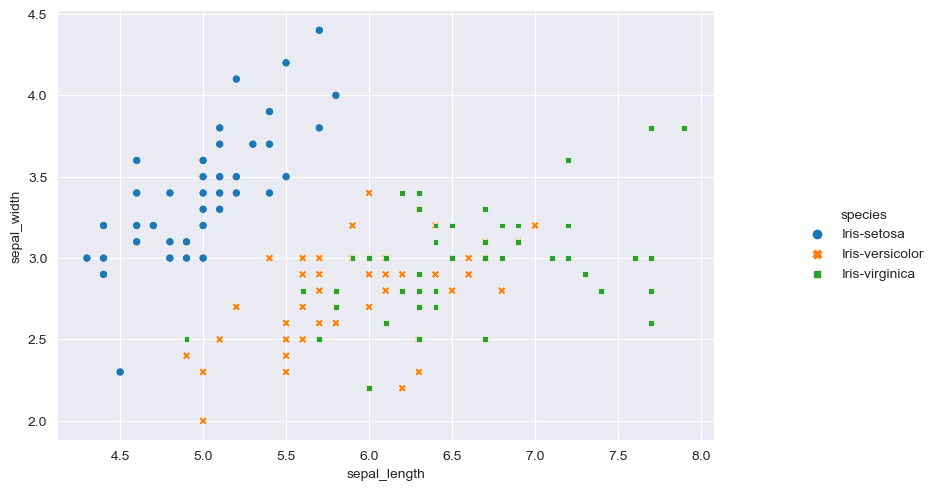

In [76]:
g=sns.relplot(x='sepal_length',y='sepal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

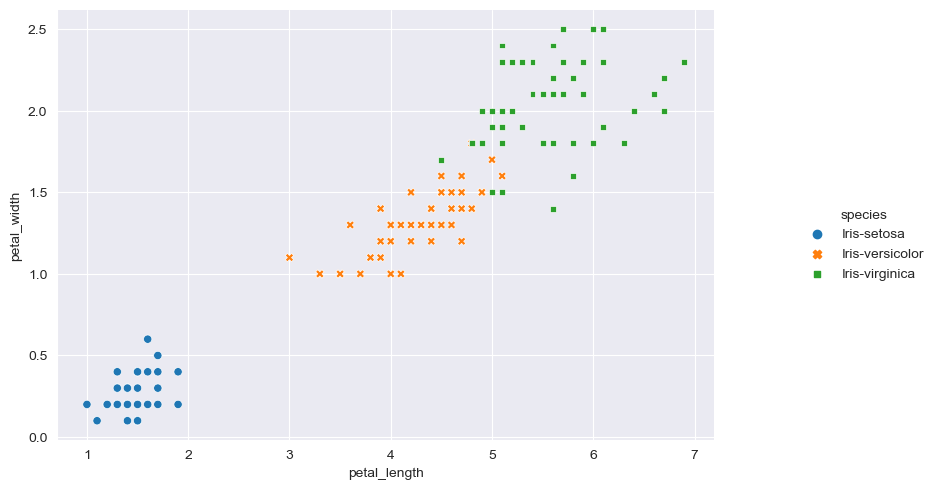

In [77]:
g=sns.relplot(x='petal_length',y='petal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

The Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better differentiating the 3 species.

## 2.2 Pairplot
Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of it.

D:\Anaconda\envs\AIF\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\envs\AIF\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\envs\AIF\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\envs\AIF\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

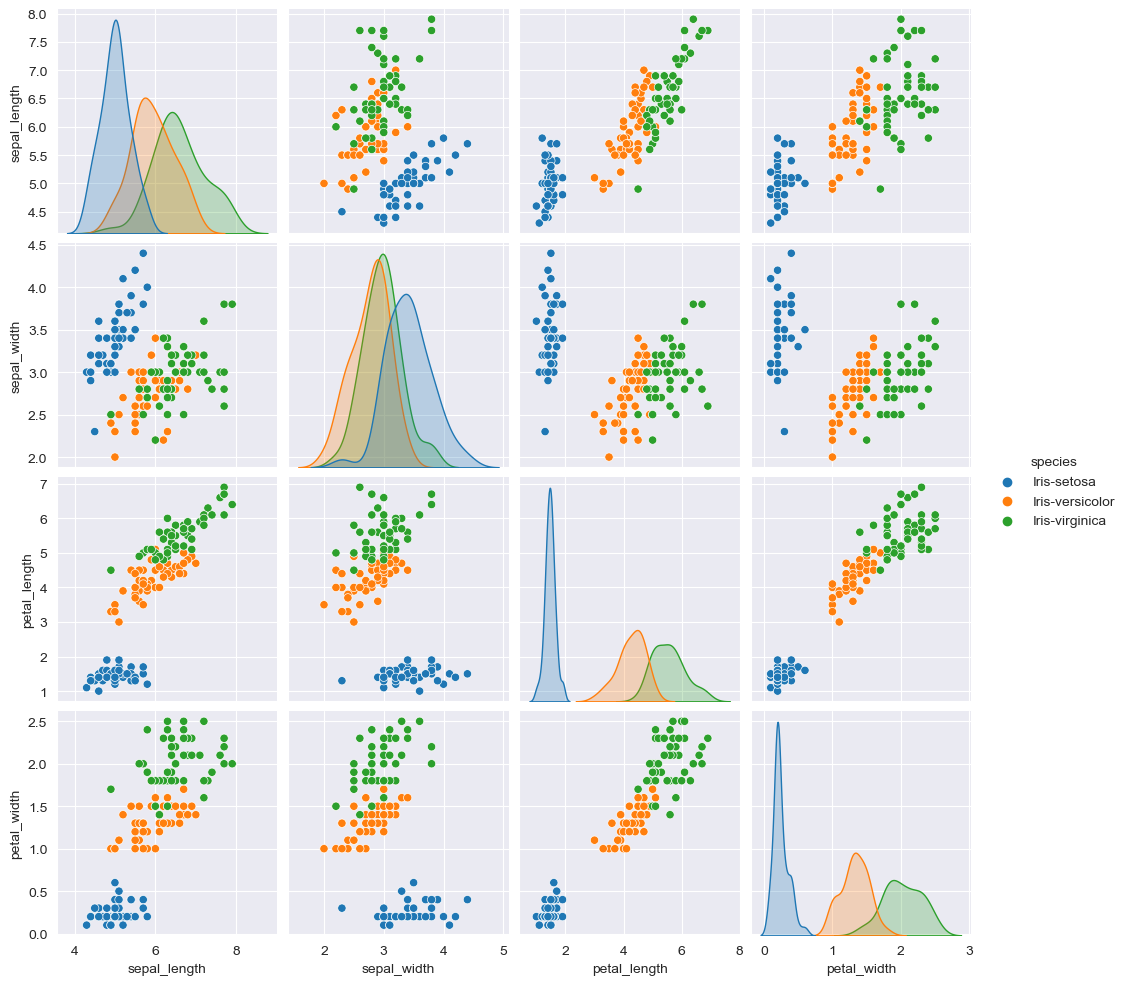

In [78]:
sns.pairplot(iris,hue="species")
plt.show()

## 2.3 Correlation
![](https://www.mathsisfun.com/data/images/correlation-examples.svg)


The number of features and their correlation plays an important role when training a model. If we have many features, out of which some are strongly correlated and relevant, whereas some are for the most part useless - then training an algorithm with all the available features may reduce the accuracy.

The current dataset has very few features, all of which are quite relevant. This will likely not hold true for bigger datasets.

In [79]:
iris.corr(numeric_only=True)

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

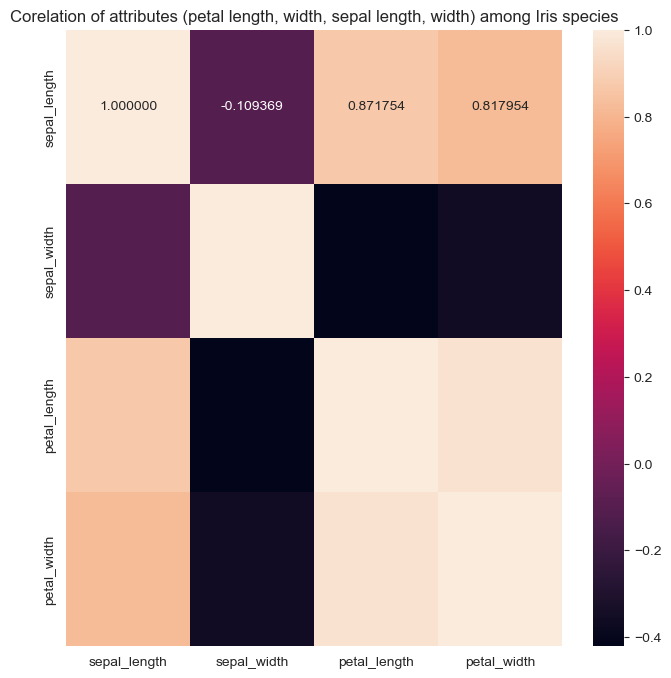

In [80]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(numeric_only=True),annot=True,fmt="f").set_title("Corelation of attributes (petal length, width, sepal length, width) among Iris species")
plt.show()

## Dividing data into features and labels
![](https://miro.medium.com/max/1002/1*68H8EsCwfqJNxzYdPYtEDw.png)
The dataset contains five columns: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [81]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
print(X.shape,y.shape)

(150, 4) (150,)


## Label encoding
![](https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png)

Labels are categorical. Classifiers generally do not accept string labels. We need to use a label encoder to transform them into numbers. Iris-setosa will correspond to 0, Iris-versicolor will correspond to 1 and Iris-virginica to 2.

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Building Machine Learning Models

In [83]:
#Metrics Import
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Import
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Splitting The Data into Training And Testing Dataset
![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/08/1-16.png)

In [84]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.

### 3.1 K Nearest Neighbor
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning.

K-NN algorithm assumes the similarity between the new data and previous known data and classifies the new entry into the category that most of its neighbors belong to.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well fitting category by using K- NN algorithm.
![](https://www.kdnuggets.com/wp-content/uploads/rapidminer-knn-image1.jpg)

In [85]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


##### Let's check the accuracy for various values of n for K-Nearest nerighbours

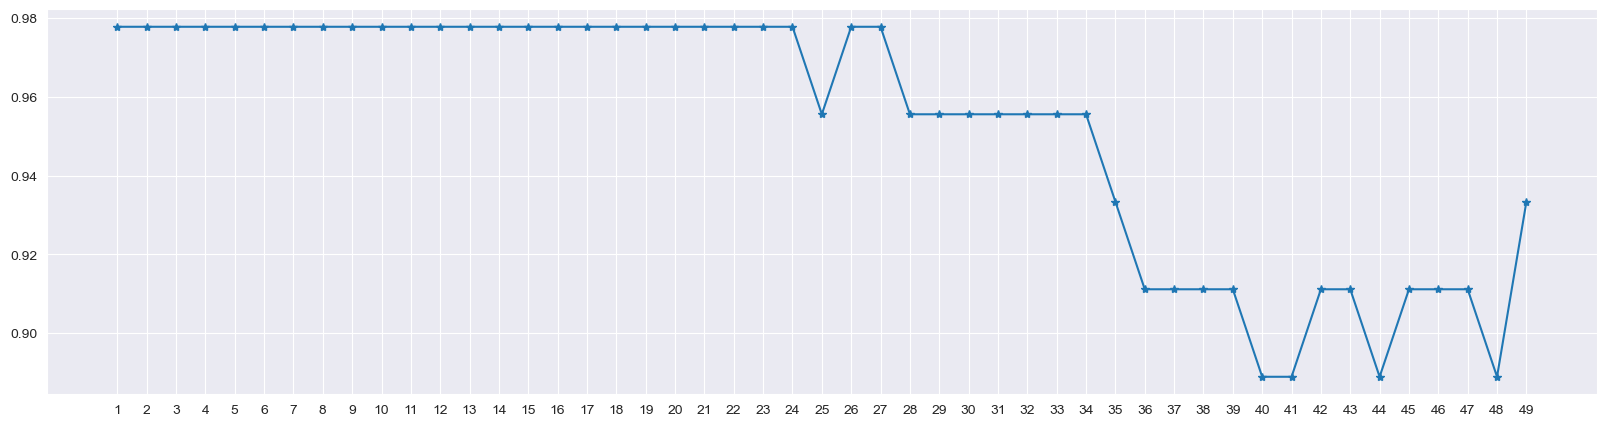

In [86]:
plt.subplots(figsize=(20, 5))

a_index = list(range(1, 50))
a = []

for i in list(range(1, 50)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a.append(accuracy_score(y_test, prediction))

a_series = pd.Series(a)

plt.plot(a_index, a_series, marker="*")
plt.xticks(range(1, 50))
plt.show()

Above is the graph showing the accuracy for the KNN models using different values of n.

### 3.2 Decision Tree:
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails), each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.
![](https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg)

In [87]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='micro')
recall = recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test,Y_pred, average='micro')
print('Confusion matrix for DecisionTree\n', cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


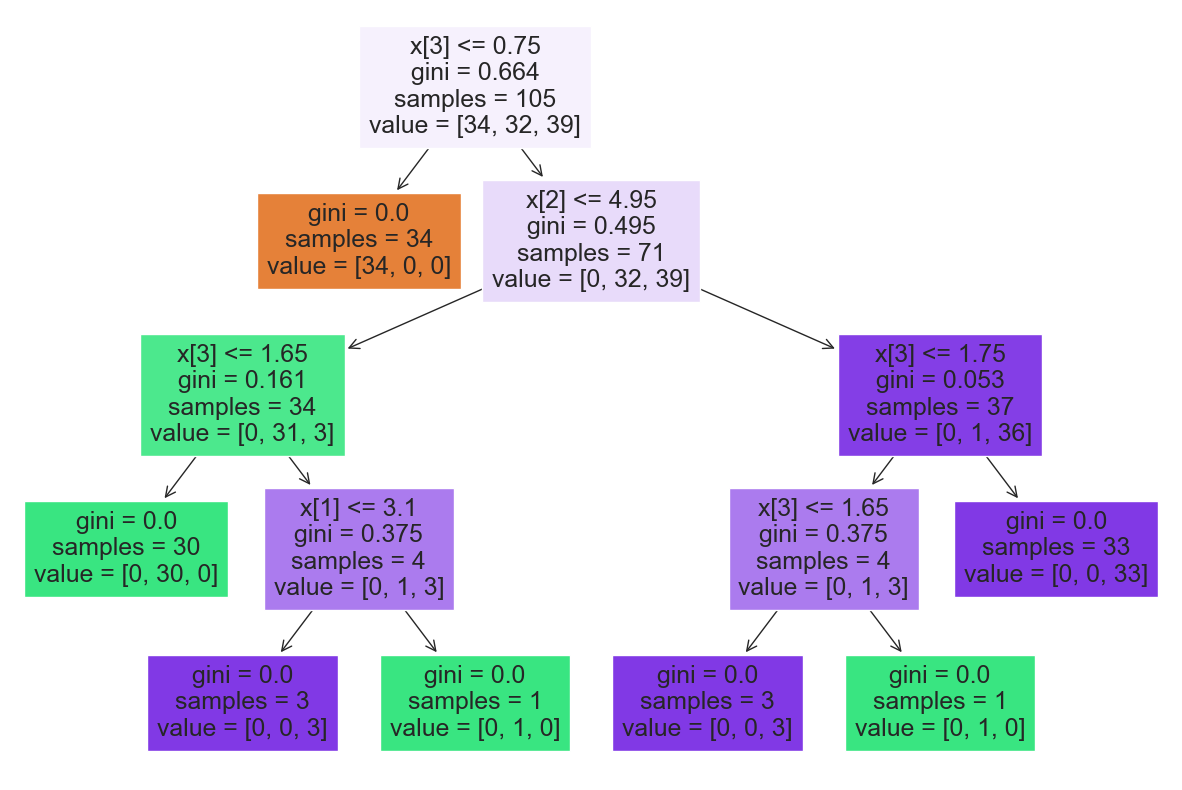

In [88]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

### 3.3 Gaussian Naive Bayes:
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.
![](https://miro.medium.com/max/1200/0*qFuHAV7Vd09064q-.jpeg)

In [89]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


### 3.4 Random Forest:
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
![](https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png)

In [90]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


Confusion matrix for Random Forest
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_random_Forest : 0.978
precision_random_Forest : 0.978
recall_random_Forest : 0.978
f1-score_random_Forest : 0.978


### 3.5 Logistic Regression:
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.
![](https://miro.medium.com/max/570/1*50TdLe6f_AW8wnBBkyLYgw.png)

In [91]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Logistic Regression\n', cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_Logistic Regression : 0.978
precision_Logistic Regression : 0.978
recall_Logistic Regression: 0.978
f1-score_Logistic Regression : 0.978


### 3.6 Linear Support Vector Machine:
Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.
![](https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/Margin.png)

In [92]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


D:\Anaconda\envs\AIF\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Which is the best Model ?

In [93]:
results = pd.DataFrame({
    'Model': [ 'KNN',
              'Logistic Regression',
              'Random Forest',
              'Naive Bayes',
              ' Support Vector Machine',
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_log,
              acc_random_forest,
              acc_gaussian,
              acc_linear_svc,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

Model   Score  Accuracy_score
0              Naive Bayes   94.29          100.00
1                      KNN   96.19           97.78
2      Logistic Regression   98.10           97.78
3            Random Forest  100.00           97.78
4            Decision Tree  100.00           97.78
5   Support Vector Machine   98.10           93.33

Best model for this data appears to have been Naive Bayes (100% Accuracy).

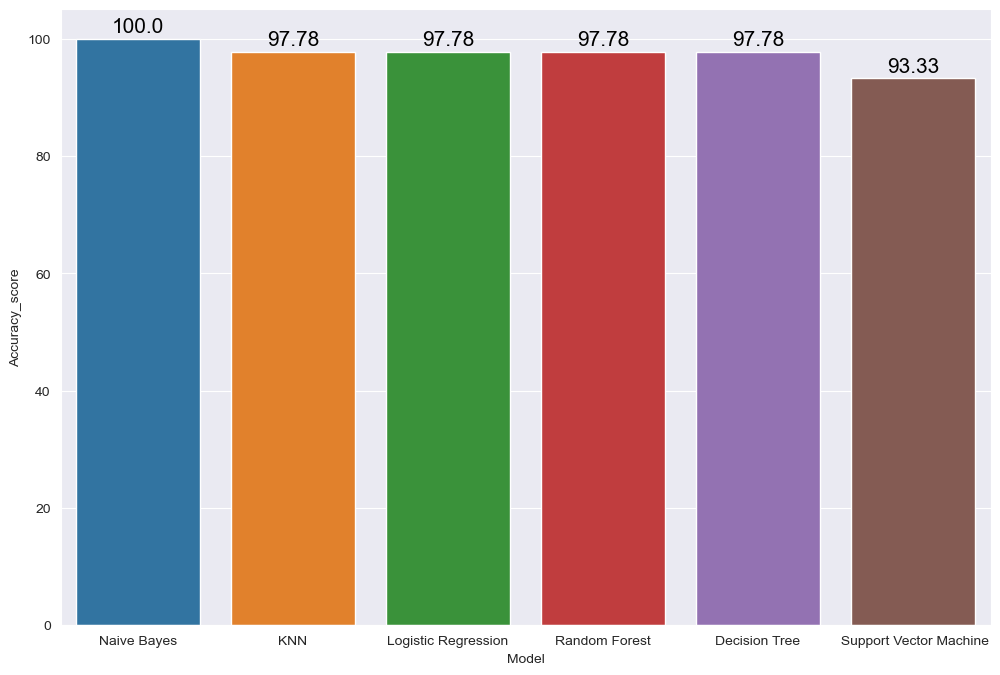

In [94]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model', y="Accuracy_score", data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

# Assignment - Classify your own data
Use 3 different ML algorithms (out of the ones presented above) to obtain >65% accuracy on one of the following datasets:


*   Water potability - Predict if water is safe for human consumption
*   Will it rain tomorrow? - Predict whether there'll be rain in Africa tomorrow
*   Credit score - Predict the credit score of people
*   Wine quality - Predict the quality of wine
*   Fetal health - Predict whether a fetus is healthy or not

You can choose any of the 5 datasets do perform your analysis.
You may need to clean your data (e.g. remove or fill rows with NaN values, convert, encode, ignore columns with unsupported formats, etc.).

[Here](https://elitedatascience.com/python-cheat-sheet) is a cheatsheet with useful pandas methods.


In [95]:
# Write your code below
data = pd.read_csv('weatherAUS.csv', on_bad_lines='skip')
data.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [96]:
data.describe(include='all')

Date  Location        MinTemp        MaxTemp       Rainfall  \
count       145460    145460  143975.000000  144199.000000  142199.000000   
unique        3436        49            NaN            NaN            NaN   
top     2013-11-12  Canberra            NaN            NaN            NaN   
freq            49      3436            NaN            NaN            NaN   
mean           NaN       NaN      12.194034      23.221348       2.360918   
std            NaN       NaN       6.398495       7.119049       8.478060   
min            NaN       NaN      -8.500000      -4.800000       0.000000   
25%            NaN       NaN       7.600000      17.900000       0.000000   
50%            NaN       NaN      12.000000      22.600000       0.000000   
75%            NaN       NaN      16.900000      28.200000       0.800000   
max            NaN       NaN      33.900000      48.100000     371.000000   

         Evaporation      Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   82670.000000  75625.000000      135134  135197.000000     134894  ...   
unique           NaN           NaN          16            NaN         16  ...   
top              NaN           NaN           W            NaN          N  ...   
freq             NaN           NaN        9915            NaN      11758  ...   
mean        5.468232      7.611178         NaN      40.035230        NaN  ...   
std         4.193704      3.785483         NaN      13.607062        NaN  ...   
min         0.000000      0.000000         NaN       6.000000        NaN  ...   
25%         2.600000      4.800000         NaN      31.000000        NaN  ...   
50%         4.800000      8.400000         NaN      39.000000        NaN  ...   
75%         7.400000     10.600000         NaN      48.000000        NaN  ...   
max       145.000000     14.500000         NaN     135.000000        NaN  ...   

          Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count   142806.000000  140953.000000  130395.00000  130432.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean        68.880831      51.539116    1017.64994    1015.255889   
std         19.029164      20.795902       7.10653       7.037414   
min          0.000000       0.000000     980.50000     977.100000   
25%         57.000000      37.000000    1012.90000    1010.400000   
50%         70.000000      52.000000    1017.60000    1015.200000   
75%         83.000000      66.000000    1022.40000    1020.000000   
max        100.000000     100.000000    1041.00000    1039.600000   

            Cloud9am      Cloud3pm        Temp9am       Temp3pm  RainToday  \
count   89572.000000  86102.000000  143693.000000  141851.00000     142199   
unique           NaN           NaN            NaN           NaN          2   
top              NaN           NaN            NaN           NaN         No   
freq             NaN           NaN            NaN           NaN     110319   
mean        4.447461      4.509930      16.990631      21.68339        NaN   
std         2.887159      2.720357       6.488753       6.93665        NaN   
min         0.000000      0.000000      -7.200000      -5.40000        NaN   
25%         1.000000      2.000000      12.300000      16.60000        NaN   
50%         5.000000      5.000000      16.700000      21.10000        NaN   
75%         7.000000      7.000000      21.600000      26.40000        NaN   
max         9.000000      9.000000      40.200000      46.70000        NaN   

        RainTomorrow  
count         142193  
unique             2  
top               No  
freq          110316  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN  

[11 rows x 23 columns]

In [97]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [98]:
data=data.dropna()

In [99]:
data.sum()

Date             2009-01-012009-01-022009-01-042009-01-052009-0...
Location         CobarCobarCobarCobarCobarCobarCobarCobarCobarC...
MinTemp                                                   759682.3
MaxTemp                                                  1366447.6
Rainfall                                                  120197.0
Evaporation                                               310486.9
Sunshine                                                  436444.0
WindGustDir      SSWSNNEWNWWNWNSSWSEENENEEENESSWSWSWSSENNEWNWNW...
WindGustSpeed                                            2306301.0
WindDir9am       ENESSENNEWNWNWNSSEENENNESENENWSSNEENENNWNNNESS...
WindDir3pm       SWSSENNWWSWWNWWNWSSESWSWWSWENENNNWSWSSWSENNENW...
WindSpeed9am                                              883945.0
WindSpeed3pm                                             1116370.0
Humidity9am                                              3716618.0
Humidity3pm                                              27985

In [100]:
data.fillna(data.mean(), inplace=True)

TypeError: Could not convert ['2009-01-012009-01-022009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-152009-07-172009-07-182009-07-192009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-052009-09-062009-09-072009-09-082009-09-092009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-082010-02-092010-02-112010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-072010-05-082010-05-092010-05-102010-05-112010-05-132010-05-142010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-132009-02-142009-02-152009-02-192009-02-202009-02-212009-02-222009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-052009-06-062009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-212009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-062009-10-072009-10-082009-10-092009-10-102009-10-132009-10-142009-10-152009-10-192009-10-202009-10-232009-10-242009-10-252009-10-262009-10-302009-10-312009-11-012009-11-022009-11-032009-11-052009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-042010-02-052010-02-062010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-152010-08-162010-08-172010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-022010-10-042010-10-052010-10-062010-10-072010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-302010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-072011-01-082011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-162011-03-182011-03-192011-03-202011-03-212011-03-232011-03-262011-03-272011-03-282011-03-302011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-112011-06-122011-06-152011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-282011-06-292011-06-302011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-122011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-112011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-272012-01-282012-01-292012-01-302012-01-312012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-142012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-222012-04-232012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-172012-06-182012-06-192012-06-202012-06-252012-06-262012-07-022012-07-032012-07-042012-07-082012-07-092012-07-102012-07-112012-07-162012-07-182012-07-202012-07-222012-07-232012-07-242012-07-252012-07-302012-07-312012-08-012012-08-052012-08-062012-08-072012-08-082012-08-132012-08-142012-08-152012-08-192012-08-272012-08-282012-08-292012-09-022012-09-032012-09-042012-09-052012-09-102012-09-112012-09-122012-09-162012-09-172012-09-182012-09-192012-09-252012-09-262012-09-302012-10-012012-10-022012-10-032012-10-082012-10-092012-10-102012-10-142012-10-152012-10-162012-10-172012-10-222012-10-242012-10-282012-10-292012-10-302012-10-312012-11-052012-11-062012-11-072012-11-082012-11-112012-11-122012-11-132012-11-142012-11-192012-11-202012-11-252012-11-262012-11-272012-11-282013-01-062013-01-072013-01-082013-01-092013-01-142013-01-152013-01-162013-01-202013-01-212013-01-222013-01-232013-01-302013-03-012013-03-032013-03-042013-03-052013-03-062013-03-112013-03-122013-03-132013-03-172013-03-182013-03-192013-03-202013-03-262013-03-272013-03-312013-04-012013-04-022013-04-032013-04-082013-04-092013-04-102013-04-142013-04-172013-04-222013-04-232013-04-242013-04-282013-04-292013-04-302013-05-012013-05-062013-05-072013-05-082013-05-122013-05-132013-05-142013-05-152013-05-202013-05-212013-05-222013-05-262013-05-272013-05-282013-05-292013-06-032013-06-042013-06-052013-06-102013-06-172013-06-182013-06-192013-06-232013-06-242013-06-252013-06-262013-07-012013-07-022013-07-032013-07-072013-07-082013-07-092013-07-102013-07-152013-07-162013-07-172013-07-212013-07-222013-07-232013-07-242013-07-292013-08-042013-08-052013-08-062013-08-072013-08-122013-08-132013-08-142013-08-182013-08-192013-08-202013-08-212013-08-262013-08-272013-08-282013-09-022013-09-032013-09-042013-09-092013-09-102013-09-112013-09-152013-09-162013-09-172013-09-182013-09-232013-09-242013-09-302013-10-012013-10-022013-10-072013-10-082013-10-092013-10-132013-10-142013-10-152013-10-162013-10-222013-10-232013-10-282013-10-292013-10-302013-11-052013-11-062013-11-112013-11-132013-11-192013-11-202013-11-252013-11-262013-11-272013-12-092013-12-102013-12-112013-12-172013-12-182013-12-232013-12-242013-12-252013-12-312014-01-012014-01-062014-01-072014-01-082014-01-142014-01-152014-01-212014-02-032014-02-042014-02-052014-02-112014-02-122014-02-172014-02-182014-02-192014-02-242014-02-252014-02-262014-03-032014-03-042014-03-112014-03-122014-03-162014-03-172014-03-182014-03-252014-03-262014-03-302014-03-312014-04-012014-04-022014-04-082014-04-092014-04-132014-04-142014-04-152014-04-162014-04-212014-04-222014-04-232014-04-272014-04-292014-04-302009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-132009-05-142009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-272009-06-282009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-042010-01-052010-01-062010-01-072010-01-092010-01-102010-01-112010-01-122010-01-132010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-312010-02-012010-02-022010-02-032010-02-042010-02-072010-02-082010-02-092010-02-102010-02-122010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-152010-06-162010-06-172010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-022010-08-032010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-132011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-072011-03-082011-03-092011-03-102011-03-132011-03-142011-03-152011-03-162011-03-172011-03-212011-03-222011-03-232011-03-272011-03-282011-03-292011-03-302011-05-022011-05-032011-05-042011-05-052011-05-082011-05-092011-05-102011-05-112011-05-122011-05-162011-05-182011-05-192011-05-222011-05-232011-05-242011-05-252011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-222011-06-232011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-052011-09-062011-09-072011-09-102011-09-112011-09-122011-09-132011-09-142011-09-182011-09-192011-09-202011-09-212011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-102011-10-112011-10-122011-10-132011-10-142011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-032012-02-062012-02-072012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-152012-04-162012-04-182012-04-192012-04-202012-04-212012-04-232012-04-242012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-052012-05-062012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-192012-05-202012-05-212012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-252012-06-262012-06-272012-06-282012-06-302012-07-012012-07-022012-07-032012-07-042012-07-092012-07-102012-07-112012-07-132012-07-142012-07-152012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-242012-08-252012-08-262012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-082012-09-092012-09-102012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-262012-11-272012-11-282013-01-012013-01-022013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-242013-04-282013-04-292013-04-302013-05-012013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-182013-06-192013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-072013-07-082013-07-092013-07-102013-07-112013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-022013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-162013-08-192013-08-202013-08-212013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-162013-09-172013-09-182013-09-192013-09-202013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-092013-12-102013-12-112013-12-132013-12-142013-12-152013-12-162013-12-172013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-182014-02-192014-02-242014-02-252014-02-262014-03-032014-03-042014-03-052014-03-092014-03-102014-03-112014-03-122014-03-172014-03-182014-03-192014-03-232014-03-242014-03-252014-03-262014-03-312014-04-012014-04-022014-04-062014-04-072014-04-082014-04-092014-04-142014-04-152014-04-162014-04-202014-04-212014-04-222014-04-232014-04-282014-04-292014-04-302014-05-042014-05-052014-05-072014-05-122014-05-132014-05-142014-05-182014-05-192014-05-202014-05-212014-05-262014-05-272014-05-282014-06-012014-06-042014-06-092014-06-102014-06-112014-06-152014-06-162014-06-172014-06-182014-06-232014-06-242014-06-252014-06-292014-06-302014-07-012014-07-072014-07-082014-07-092014-07-132014-07-142014-07-152014-07-162014-07-232014-07-282014-07-292014-07-302014-08-042014-08-052014-08-062014-08-102014-08-112014-08-122014-08-132014-08-182014-08-192014-08-202014-09-012014-09-022014-09-032014-09-072014-09-082014-09-092014-09-102014-09-152014-09-162014-09-172014-09-222014-09-232014-09-302014-10-012014-10-062014-10-072014-10-082014-10-142014-10-152014-10-192014-10-202014-10-212014-10-222014-10-292014-11-022014-11-032014-11-042014-11-052014-11-102014-11-112014-11-122014-11-162014-11-172014-11-182014-11-192014-11-242014-11-252014-11-262014-11-302014-12-012014-12-022014-12-032014-12-082014-12-092014-12-102014-12-142014-12-152014-12-162014-12-172014-12-222014-12-232014-12-242014-12-282014-12-292014-12-302014-12-312015-01-052015-01-062015-01-072015-01-112015-01-122015-01-132015-01-142015-01-192015-01-202015-01-212015-01-252015-01-262015-01-272015-02-022015-02-032015-02-042015-02-102015-02-112015-02-162015-02-172015-02-182015-02-222015-02-232015-02-242015-02-252015-03-022015-03-032015-03-042015-03-082015-03-092015-03-102015-03-112015-03-162015-03-172015-03-182015-03-222015-03-232015-04-062015-04-072015-04-082015-04-122015-04-132015-04-142015-04-152015-04-202015-04-212015-04-222015-04-262015-04-272015-04-292015-05-042015-05-052015-05-062015-05-112015-05-252015-05-272015-05-312015-06-012015-06-022015-06-032015-06-072015-06-082015-06-092015-06-102015-06-152015-06-162015-06-172015-06-212015-06-222015-06-232015-06-242015-06-292015-06-302015-07-012015-07-052015-07-082015-07-132015-07-142015-07-152015-07-192015-07-202015-07-212015-07-222015-07-272015-07-282015-07-292015-08-022015-08-032015-08-042015-08-052015-08-102015-08-112015-08-172015-08-182015-08-192015-08-242015-08-252015-08-302015-08-312015-09-012015-09-022015-09-082015-09-092015-09-132015-09-142015-09-152015-09-162015-09-222015-09-232015-09-282015-09-292015-09-302015-10-112015-10-122015-10-132015-10-142015-10-252015-10-262015-10-272015-10-282015-11-032015-11-042015-11-082015-11-092015-11-102015-11-112015-11-172015-11-182015-11-222015-11-232015-11-242015-11-252015-11-302015-12-012015-12-022015-12-062015-12-072015-12-082015-12-092015-12-142015-12-152015-12-162015-12-202015-12-212015-12-222015-12-232015-12-282015-12-292015-12-302016-01-032016-01-042016-01-052016-01-062016-01-112016-01-122016-01-132016-01-172016-01-182016-01-192016-01-202016-01-252016-01-312016-02-012016-02-022016-02-032016-02-082016-02-092016-02-102016-02-142016-02-152016-02-162016-02-172016-02-222016-02-232016-02-242016-02-282016-02-292016-03-012016-03-022016-03-072016-03-082016-03-092016-03-132016-03-142016-03-232016-03-292016-03-302016-04-042016-04-102016-04-112016-04-122016-04-132016-04-182016-04-192016-04-202016-04-242016-04-252016-04-262009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-222009-02-232009-02-242009-02-252009-02-262009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-052009-06-062009-06-072009-06-082009-06-102009-06-112009-06-122009-06-132009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-082012-02-092012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-272012-06-282012-06-292012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-122012-11-132012-11-152012-11-162012-11-182012-11-192012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-08-022014-08-032014-08-042014-08-052014-08-062014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-132014-11-142014-11-152014-11-162014-11-172014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-172014-12-182014-12-192014-12-202014-12-212014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-022015-01-032015-01-042015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-162015-06-172015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-032015-10-042015-10-052015-10-062015-10-082015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-262015-12-272015-12-282015-12-292015-12-302016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262010-10-202010-10-212010-10-222010-10-262010-10-272010-10-292010-11-012010-11-032010-11-042010-11-052010-11-082010-11-092010-11-102010-11-112010-11-162010-11-172010-11-182010-11-192010-11-222010-11-242010-11-252010-11-262010-11-302010-12-012010-12-022010-12-032010-12-062010-12-072010-12-082010-12-092010-12-102010-12-132010-12-152010-12-162010-12-172010-12-202010-12-212010-12-222010-12-232012-07-012012-07-022012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-232012-08-242012-08-252012-08-262012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-262013-05-272013-05-282013-05-292013-05-302013-06-012013-06-022013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-272013-09-282013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-132014-12-142014-12-152014-12-162014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-092015-01-112015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-172015-06-182015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-102015-09-112015-09-122015-09-132015-09-142015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-182015-12-192015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302016-01-012016-01-032016-01-042016-01-052016-01-062016-01-092016-01-102016-01-112016-01-122016-01-132016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-242016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-062016-04-072016-04-082016-04-092016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-032016-05-042016-05-052016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-032016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-152016-06-162016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-242016-11-252016-11-262016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-122017-03-132017-03-142017-03-162017-03-172017-03-182017-03-202017-03-212017-03-222017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252009-01-012009-01-022009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-132009-02-142009-02-152009-02-162009-02-172009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-202009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-132009-04-162009-04-172009-04-182009-04-202009-04-212009-04-222009-04-232009-04-242009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-202009-05-212009-05-222009-05-232009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-202010-05-212010-05-222010-05-232010-05-242010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-192010-06-202010-06-212010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-08-012010-08-022010-08-032010-08-042010-08-052010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-082011-01-092011-01-102011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-212011-03-222011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-212011-07-232011-07-242011-07-252011-07-262011-07-292011-07-302011-07-312011-08-012011-08-032011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-262011-10-272011-10-282011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-272012-02-282012-02-292012-03-012012-03-032012-03-042012-03-052012-03-062012-03-072012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-172012-04-182012-04-202012-04-212012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-092012-05-102012-05-112012-05-122012-05-132012-05-152012-05-162012-05-172012-05-182012-05-192012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-192012-07-202012-07-212012-07-222012-07-242012-07-252012-07-262012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-182013-09-192013-09-202013-09-212013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-132013-11-142013-11-152013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-132015-06-142015-06-152015-06-172015-06-182015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-182015-12-192015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-092016-01-102016-01-112016-01-122016-01-132016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-052016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-172016-05-182016-05-192016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-152016-06-162016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-072017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-122017-03-132017-03-162017-03-172017-03-202017-03-212017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-05-012009-05-032009-05-042009-05-062009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-252009-07-262009-07-282009-07-292009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-092009-08-102009-08-112009-08-122009-08-132009-08-152009-08-162009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-272009-12-282009-12-292009-12-302009-12-312010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-292010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-212010-05-222010-05-232010-05-242010-05-252010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-082010-06-092010-06-102010-06-112010-06-122010-06-142010-06-152010-06-162010-06-172010-06-192010-06-202010-06-232010-06-242010-06-252010-06-262010-06-272010-06-292010-06-302010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-302010-08-312010-09-012010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-162011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-312011-09-012011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-182012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-182012-04-192012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-262012-06-272012-06-282012-06-292012-07-012012-07-022012-07-032012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-172012-07-192012-07-202012-07-212012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-102012-08-112012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-172013-03-182013-03-192013-03-202013-03-212013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-312013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-172013-06-182013-06-192013-06-202013-06-222013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-042013-07-052013-07-062013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-032014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-232014-06-242014-06-252014-06-262014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-272015-01-282015-01-292015-01-302015-01-312015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-05-012015-05-022015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-272015-05-282015-05-292015-06-012015-06-032015-06-052015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-162015-06-172015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-292015-06-302015-07-012015-07-022015-07-032015-07-052015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-202015-07-212015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-082016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-202016-02-212016-02-222016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-302016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-072009-03-082009-03-092009-03-102009-03-122009-03-132009-03-142009-03-152009-03-172009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-302009-04-012009-04-032009-04-042009-04-052009-04-062009-04-072009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-152009-05-172009-05-182009-05-222009-05-242009-05-252009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-042009-06-052009-06-072009-06-082009-06-122009-06-142009-06-172009-06-192009-06-262009-06-272009-06-282009-07-022009-07-032009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-222009-07-232009-07-242009-07-252009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-192009-08-202009-08-212009-08-222009-08-232009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-072009-09-082009-09-092009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-232009-10-242009-10-262009-10-272009-10-282009-10-292009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-232009-12-242009-12-252009-12-262009-12-272009-12-292009-12-302009-12-312010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-042010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-262010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-062010-07-072010-07-122010-07-142010-07-202010-07-212010-07-222010-07-272010-07-292010-08-032010-08-042010-08-052010-08-092010-08-102010-08-112010-08-182010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-252010-09-272010-09-282010-09-302010-10-012010-10-022010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-192010-11-202010-11-212010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-272010-12-282011-01-032011-01-042011-01-052011-01-062011-01-092011-01-102011-01-112011-01-142011-01-152011-01-162011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-132011-02-142011-02-152011-02-162011-02-192011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-132011-03-142011-03-152011-03-182011-03-192011-03-202011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-022011-05-032011-05-042011-05-112011-05-162011-05-172011-05-182011-05-302011-06-012011-06-072011-06-082011-06-132011-06-142011-06-152011-06-212011-06-222011-06-272011-06-282011-06-292011-07-062011-07-122011-07-252011-07-262011-07-272011-08-022011-08-232011-09-062011-09-072011-09-132011-09-142011-09-192011-09-202011-09-212011-09-282011-10-022011-10-032011-10-042011-10-052011-10-112011-10-122011-10-172011-10-182011-10-192011-10-252011-10-262011-10-312011-11-012011-11-022011-11-082011-11-092011-11-142011-11-152011-11-162011-11-222011-11-232011-11-282011-11-292011-11-302011-12-072011-12-122011-12-132011-12-142011-12-202011-12-212011-12-262011-12-272011-12-282012-01-032012-01-042012-01-092012-01-102012-01-112012-01-172012-01-182012-01-232012-01-242012-01-252012-01-312012-02-012012-02-062012-02-072012-02-082012-02-142012-02-152012-02-222012-02-292012-03-052012-03-192012-03-202012-03-212012-03-272012-03-282012-04-022012-04-032012-04-042012-04-102012-04-112012-04-172012-04-182012-04-252012-05-092012-05-142012-05-152012-05-162012-05-222012-05-232012-06-052012-06-062012-06-112012-06-122012-06-132012-06-182012-06-192012-06-202012-06-252012-06-262012-06-272012-07-032012-07-042012-07-092012-07-102012-07-112012-07-172012-07-182012-07-232012-07-242012-07-252012-07-312012-08-012012-08-062012-08-072012-08-082012-08-142012-08-152012-08-202012-08-212012-08-222012-09-032012-09-042012-09-052012-09-112012-09-122012-09-172012-09-182012-09-192012-09-252012-09-262012-10-012012-10-022012-10-032012-10-092012-10-102012-10-152012-10-232012-10-292012-10-302012-10-312012-11-072013-01-012013-01-022013-01-072013-01-082013-01-092013-01-152013-01-162013-01-232013-01-282013-01-302013-03-042013-03-052013-03-062013-03-182013-03-192013-03-262013-03-272013-04-012013-04-022013-04-032013-04-102013-04-172013-04-232013-04-242013-04-292013-04-302013-05-072013-05-082013-05-132013-05-142013-05-152013-05-212013-05-222013-05-272013-05-282013-06-052013-06-102013-06-112013-06-182013-06-192013-06-242013-06-252013-06-262013-07-022013-07-032013-07-082013-07-092013-07-102013-07-162013-07-172013-07-222013-07-232013-07-242013-07-302013-07-312013-08-052013-08-062013-08-072013-08-132013-08-142013-08-272013-09-032013-09-242013-10-012013-10-022013-10-082013-10-092013-10-142013-10-152013-10-282013-10-292013-10-302013-11-052013-11-062013-11-192013-11-202013-11-252013-11-262013-12-032013-12-042013-12-092013-12-102013-12-112013-12-172013-12-182013-12-232013-12-242013-12-252013-12-312014-01-012014-01-062014-01-072014-01-212014-01-222014-01-232014-03-042014-03-112014-03-122014-03-252014-03-312014-04-012014-04-022014-04-082014-04-142014-04-152014-04-162014-04-282014-04-292014-04-302014-05-062014-05-072014-05-122014-05-132014-05-142014-05-202014-05-212014-06-032014-06-042014-06-092014-06-102014-06-112014-06-232014-06-242014-06-252014-07-012014-07-072014-07-082014-07-212014-07-222014-07-232014-07-292014-07-302014-08-042014-08-052014-08-062014-08-182014-08-192014-08-202014-08-262014-08-272014-09-012014-09-022014-09-032014-09-092014-09-102014-09-152014-09-162014-09-172014-09-292014-09-302014-10-012014-10-072014-10-082014-10-132014-10-222014-10-282014-10-292014-11-042014-11-052014-11-102014-11-112014-11-122014-11-182014-11-192014-11-242014-11-262014-12-022014-12-032014-12-092014-12-102014-12-162014-12-172014-12-222014-12-232014-12-242014-12-312015-01-052015-01-062015-01-072015-01-132015-01-142015-01-272015-01-282015-02-022015-02-032015-02-042015-02-092015-02-102015-02-112015-02-152015-02-162015-02-172015-02-182015-02-232015-02-242015-02-252015-03-012015-03-022015-03-032015-03-042015-03-092015-03-102015-03-112015-03-152015-03-162015-03-172015-03-182015-03-242015-03-252015-03-302015-03-312015-04-012015-04-062015-04-072015-04-082015-04-122015-04-132015-04-142015-04-152015-04-202015-04-262015-04-272015-04-282015-04-292015-05-052015-05-062015-05-102015-05-112015-05-122015-05-132015-05-242015-05-252015-05-262015-05-272015-06-012015-06-022015-06-032015-06-072015-06-082015-06-092015-06-102015-06-152015-06-162015-06-212015-06-222015-06-232015-06-242015-06-302015-07-012015-07-072015-07-082015-07-142015-07-152015-07-202015-07-212015-07-282015-07-292015-08-032015-08-042015-08-052015-08-092015-08-102015-08-112015-08-122015-08-162015-08-172015-08-182015-08-192015-08-242015-08-252015-08-262015-08-302015-08-312015-09-012015-09-022015-09-072015-09-082015-09-092015-09-132015-09-142015-09-152015-09-162015-09-212015-09-222015-09-232015-09-272015-09-282015-09-292015-09-302015-10-052015-10-062015-10-072015-10-112015-10-122015-10-132015-10-192015-10-202015-10-212015-10-262015-10-272015-10-282015-11-022015-11-032015-11-042015-11-082015-11-092015-11-102015-11-112015-11-162015-11-172015-11-182015-11-222015-11-232015-11-242015-11-252015-11-302015-12-012015-12-022015-12-062015-12-072015-12-082015-12-092015-12-142015-12-152015-12-162015-12-212015-12-232015-12-282015-12-292015-12-302016-01-032016-01-042016-01-052016-01-112016-01-122016-01-132016-01-172016-01-182016-01-192016-01-202016-01-252016-01-262016-01-272016-01-312016-02-012016-02-022016-02-032016-02-082016-02-092016-02-102016-02-142016-02-152016-02-162016-02-172016-02-222016-02-232016-02-242016-02-282016-02-292016-03-012016-03-022016-03-072016-03-082016-03-092016-03-132016-03-142016-03-152016-03-162016-03-212016-03-222016-03-232016-03-272016-03-282016-03-292016-03-302016-04-042016-04-052016-04-062016-04-112016-04-122016-04-172016-04-192016-04-202016-04-242016-04-252016-04-262007-11-012007-11-022007-11-032007-11-042007-11-052007-11-062007-11-072007-11-082007-11-092007-11-102007-11-112007-11-122007-11-132007-11-142007-11-152007-11-162007-11-172007-11-182007-11-192007-11-202007-11-212007-11-222007-11-232007-11-242007-11-252007-11-262007-11-272007-11-282007-11-292007-11-302007-12-012007-12-022007-12-032007-12-042007-12-052007-12-062007-12-072007-12-082007-12-092007-12-102007-12-112007-12-122007-12-132007-12-142007-12-152007-12-162007-12-172007-12-182007-12-192007-12-202007-12-212007-12-222007-12-232007-12-242007-12-252007-12-262007-12-272007-12-282007-12-292007-12-302007-12-312008-01-012008-01-022008-01-032008-01-042008-01-052008-01-062008-01-072008-01-082008-01-092008-01-102008-01-112008-01-122008-01-132008-01-142008-01-152008-01-162008-01-172008-01-182008-01-192008-01-202008-01-212008-01-222008-01-232008-01-242008-01-252008-01-262008-01-272008-01-282008-01-292008-01-302008-01-312008-02-012008-02-022008-02-032008-02-042008-02-052008-02-062008-02-072008-02-082008-02-092008-02-102008-02-112008-02-122008-02-132008-02-142008-02-152008-02-162008-02-172008-02-182008-02-192008-02-202008-02-212008-02-232008-02-242008-02-252008-02-262008-02-282008-02-292008-03-012008-03-022008-03-032008-03-042008-03-052008-03-062008-03-082008-03-092008-03-102008-03-112008-03-122008-03-132008-03-142008-03-152008-03-162008-03-172008-03-192008-03-212008-03-222008-03-232008-03-242008-03-252008-03-262008-03-272008-03-282008-03-292008-03-302008-03-312008-04-012008-04-022008-04-032008-04-042008-04-052008-04-062008-04-072008-04-082008-04-092008-04-102008-04-112008-04-122008-04-132008-04-142008-04-152008-04-162008-04-172008-04-182008-04-192008-04-202008-04-212008-04-222008-04-242008-04-262008-04-272008-04-282008-04-302008-05-012008-05-022008-05-032008-05-042008-05-052008-05-062008-05-072008-05-092008-05-102008-05-112008-05-132008-05-152008-05-162008-05-172008-05-182008-05-202008-05-212008-05-222008-05-232008-05-242008-05-252008-05-262008-05-292008-06-022008-06-032008-06-042008-06-052008-06-062008-06-072008-06-082008-06-112008-06-122008-06-132008-06-142008-06-152008-06-162008-06-172008-06-182008-06-192008-06-202008-06-212008-06-222008-06-232008-06-242008-06-262008-06-272008-06-282008-06-292008-06-302008-07-012008-07-022008-07-032008-07-042008-07-062008-07-092008-07-102008-07-112008-07-122008-07-142008-07-162008-07-182008-07-192008-07-212008-07-222008-07-232008-07-242008-07-252008-07-262008-07-272008-07-282008-08-012008-08-022008-08-032008-08-042008-08-062008-08-072008-08-082008-08-092008-08-102008-08-112008-08-122008-08-132008-08-142008-08-152008-08-162008-08-172008-08-182008-08-192008-08-202008-08-212008-08-222008-08-232008-08-242008-08-252008-08-282008-08-302008-08-312008-09-012008-09-022008-09-032008-09-042008-09-052008-09-062008-09-072008-09-092008-09-102008-09-112008-09-122008-09-132008-09-142008-09-152008-09-162008-09-172008-09-182008-09-192008-09-202008-09-212008-09-222008-09-232008-09-242008-09-252008-09-262008-09-272008-09-282008-09-292008-09-302008-10-012008-10-022008-10-032008-10-042008-10-052008-10-062008-10-072008-10-082008-10-092008-10-102008-10-112008-10-122008-10-132008-10-152008-10-162008-10-182008-10-192008-10-202008-10-212008-10-222008-10-232008-10-242008-10-252008-10-272008-10-282008-10-292008-10-302008-10-312008-11-012008-11-022008-11-032008-11-042008-11-052008-11-062008-11-072008-11-082008-11-092008-11-102008-11-112008-11-122008-11-132008-11-142008-11-152008-11-162008-11-172008-11-182008-11-192008-11-202008-11-212008-11-222008-11-232008-11-242008-11-252008-11-262008-11-272008-11-282008-11-292008-11-302008-12-012008-12-022008-12-032008-12-042008-12-052008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-242008-12-252008-12-262008-12-282008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-232009-02-242009-02-252009-02-262009-02-272009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-182009-03-202009-03-212009-03-222009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-252009-04-262009-04-272009-04-282009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-082009-05-092009-05-102009-05-112009-05-122009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-262009-05-282009-05-292009-05-302009-05-312009-06-022009-06-032009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-122009-06-132009-06-142009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-192009-07-202009-07-222009-07-232009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-202010-03-212010-03-242010-03-252010-03-262010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-242010-04-252010-04-262010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-112010-05-122010-05-132010-05-152010-05-162010-05-172010-05-182010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-062010-06-072010-06-092010-06-102010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-262010-06-272010-06-302010-07-012010-07-022010-07-032010-07-102010-07-112010-07-122010-07-142010-07-152010-07-162010-07-192010-07-202010-07-252010-07-262010-07-272010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-232010-09-242010-09-252010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-092010-10-102010-10-112010-10-122010-10-142010-10-152010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-112010-11-122010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-172010-12-182010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-282010-12-292011-01-022011-01-032011-01-042011-01-052011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-242011-01-252011-01-272011-01-292011-01-312011-02-012011-02-022011-02-042011-02-052011-02-062011-02-082011-02-092011-02-102011-02-122011-02-132011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-222011-02-252011-02-272011-02-282011-03-012011-03-052011-03-092011-03-102011-03-122011-03-132011-03-142011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-05-012011-05-052011-05-082011-05-112011-05-132011-05-172011-05-182011-05-232011-05-252011-05-292011-05-312011-06-062011-06-072011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-282011-06-302011-07-042011-07-052011-07-062011-07-072011-07-082011-07-122011-07-172011-07-202011-07-212011-07-222011-07-232011-07-302011-08-062011-08-102011-08-152011-08-182011-08-202011-08-212011-08-242011-08-292011-09-042011-09-102011-09-112011-09-142011-09-192011-09-202011-09-252011-09-262011-09-282011-09-292011-10-022011-10-042011-10-052011-10-082011-10-102011-10-142011-10-202011-10-232011-10-252011-10-272011-10-282011-11-042011-11-062011-11-092011-11-122011-11-132011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-12-032011-12-042011-12-082011-12-092011-12-112011-12-122011-12-192012-01-112012-02-122012-02-142012-02-152012-02-162012-02-172012-02-202012-02-212012-02-222012-02-262012-02-272012-02-282012-02-292012-03-032012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-04-022012-04-032012-04-042012-04-082012-04-102012-04-112012-04-172012-04-182012-04-192012-04-202012-04-212012-04-232012-04-242012-04-252012-04-292012-04-302012-05-022012-05-052012-05-132012-05-142012-05-212012-05-252012-05-282012-05-312012-06-022012-06-052012-06-062012-06-112012-06-122012-06-132012-06-142012-06-162012-06-172012-06-222012-06-272012-06-302012-07-012012-07-022012-07-032012-07-122012-07-162012-07-262012-07-272012-07-292012-07-312012-08-032012-08-042012-08-052012-08-092012-08-152012-08-162012-08-172012-08-232012-08-242012-08-292012-08-302012-08-312012-09-062012-09-132012-09-172012-09-222012-09-282012-10-062012-10-082012-10-092012-10-102012-10-162012-10-222012-10-302012-11-012012-11-032012-11-072012-11-102012-11-162012-11-182012-11-192012-11-262012-11-272012-11-282009-01-012009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-102009-01-112009-01-122009-01-132009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-042009-04-052009-04-062009-04-072009-04-082009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-152009-06-162009-06-182009-06-192009-06-222009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-132009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-022009-09-032009-09-042009-09-052009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-042009-11-052009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-212010-04-222010-04-232010-04-242010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-112010-05-122010-05-132010-05-142010-05-152010-05-172010-05-182010-05-192010-05-202010-05-212010-05-232010-05-242010-05-252010-05-262010-05-272010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-162010-08-172010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-312010-11-012010-11-022010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-112010-11-122010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-142011-03-152011-03-162011-03-172011-03-182011-03-202011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-112011-05-122011-05-142011-05-152011-05-162011-05-172011-05-182011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-012011-06-022011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-192011-07-202011-07-212011-07-222011-07-232011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-222011-09-232011-09-242011-09-252011-09-262011-09-282011-09-302011-10-012011-10-022011-10-032011-10-042011-10-062011-10-072011-10-092011-10-102011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-152011-11-162011-11-172011-11-182011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-142012-02-152012-02-182012-02-192012-02-202012-02-212012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-062012-06-072012-06-082012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-232012-07-252012-07-282012-07-292012-07-312012-08-012012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-172013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-062013-03-092013-03-102013-03-122013-03-132013-03-142013-03-152013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-252013-03-262013-03-272013-03-282013-03-292013-04-012013-04-022013-04-032013-04-042013-04-072013-04-092013-04-102013-04-112013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-222013-04-232013-04-242013-04-252013-04-272013-04-282013-04-292013-04-302013-05-012013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-142013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-132013-07-142013-07-152013-07-162013-07-172013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-022013-09-032013-09-042013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-112014-02-122014-02-132014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-072014-03-082014-03-092014-03-102014-03-122014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-282014-04-292014-04-302009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-022009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-272010-05-282010-05-302010-05-312010-06-012010-06-022010-06-032010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-062010-07-072010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-232011-09-242011-09-252011-09-262011-09-272011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-022014-06-032014-06-042014-06-052014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-242015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-162015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-132015-08-142015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-082016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-082016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-152016-06-162016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-172016-07-182016-07-192016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-222016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-072017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-122017-03-132017-03-142017-03-152017-03-162017-03-172017-03-182017-03-192017-03-202017-03-212017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-03-312017-04-012017-04-022017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-122017-06-142017-06-152017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252008-07-012008-07-022008-07-032008-07-042008-07-052008-07-062008-07-072008-07-082008-07-092008-07-102008-07-112008-07-122008-07-132008-07-142008-07-152008-07-162008-07-172008-07-182008-07-192008-07-202008-07-212008-07-222008-07-242008-07-252008-07-262008-07-272008-07-282008-07-292008-07-302008-07-312008-08-012008-08-022008-08-032008-08-042008-08-052008-08-062008-08-072008-08-082008-08-092008-08-102008-08-112008-08-122008-08-132008-08-142008-08-152008-08-162008-08-172008-08-182008-08-192008-08-202008-08-212008-08-222008-08-232008-08-242008-08-252008-08-262008-08-272008-08-282008-08-292008-08-302008-08-312008-09-012008-09-022008-09-032008-09-042008-09-052008-09-062008-09-072008-09-082008-09-092008-09-102008-09-112008-09-122008-09-132008-09-142008-09-152008-09-162008-09-172008-09-182008-09-192008-09-202008-09-212008-09-222008-09-232008-09-242008-09-252008-09-262008-09-272008-09-282008-09-292008-09-302008-10-012008-10-022008-10-032008-10-042008-10-052008-10-062008-10-072008-10-082008-10-092008-10-102008-10-112008-10-122008-10-132008-10-142008-10-152008-10-162008-10-172008-10-182008-10-192008-10-202008-10-212008-10-222008-10-232008-10-242008-10-252008-10-262008-10-272008-10-282008-10-292008-10-302008-10-312008-11-012008-11-022008-11-032008-11-042008-11-052008-11-062008-11-072008-11-082008-11-092008-11-102008-11-112008-11-122008-11-132008-11-142008-11-152008-11-162008-11-172008-11-182008-11-192008-11-202008-11-212008-11-222008-11-232008-11-242008-11-252008-11-262008-11-272008-11-282008-11-292008-11-302008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-182008-12-192008-12-202008-12-212008-12-222008-12-232008-12-242008-12-252008-12-262008-12-272008-12-282008-12-292008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-022009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-112009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-132009-11-142009-11-152009-11-162009-11-172009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-272010-05-282010-05-302010-05-312010-06-012010-06-022010-06-032010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-062010-07-072010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-222010-08-232010-08-252010-08-262010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-132010-09-142010-09-152010-09-162010-09-172010-09-202010-09-212010-09-222010-09-232010-09-242010-09-272010-09-282010-09-292010-09-302010-10-012010-10-042010-10-062010-10-072010-10-082010-10-112010-10-122010-10-132010-10-142010-10-152010-10-182010-10-192010-10-202010-10-212010-10-222010-10-252010-10-262010-10-272010-10-282010-10-292010-11-032010-11-042010-11-052010-11-082010-11-092010-11-102010-11-112010-11-122010-11-152010-11-162010-11-172010-11-182010-11-192010-11-222010-11-232010-11-242010-11-252010-11-262010-11-292010-11-302010-12-012010-12-022010-12-032010-12-062010-12-072010-12-082010-12-092010-12-102010-12-132010-12-142010-12-152010-12-162010-12-172010-12-202010-12-212010-12-222010-12-232010-12-242010-12-302010-12-312011-01-042011-01-122011-01-142011-01-192011-01-202011-01-212011-01-242011-01-252011-01-272011-01-312011-02-012011-02-022011-02-032011-02-072011-02-082011-02-092011-02-102011-02-142011-02-152011-02-162011-02-212011-02-222011-02-282011-03-012011-03-022011-03-032011-03-042011-03-072011-03-082011-03-092011-03-102011-03-112011-03-152011-03-162011-03-172011-03-182011-03-212011-03-222011-03-232011-03-242011-03-252011-03-282011-03-292011-03-302011-03-312011-05-022011-05-032011-05-042011-05-052011-05-062011-05-092011-05-102011-05-112011-05-122011-05-162011-05-172011-05-182011-05-202011-05-232011-05-242011-05-252011-05-262011-05-272011-05-302011-05-312011-06-012011-06-062011-06-072011-06-142011-06-152011-06-162011-06-202011-06-212011-06-222011-06-232011-06-242011-06-272011-06-282011-06-292011-06-302011-07-012011-07-042011-07-052011-07-062011-07-072011-07-182011-07-202011-07-212011-07-252011-07-282011-07-292011-08-022011-08-032011-08-042011-08-082011-08-092011-08-102011-08-112011-08-162011-08-172011-08-182011-08-192011-08-222011-08-232011-08-242011-08-252011-08-292011-08-302011-08-312011-09-022011-09-052011-09-062011-09-072011-09-212011-09-232011-09-262011-09-272011-09-292011-10-102011-10-112011-10-122011-10-132011-10-172011-10-182011-10-192011-10-202011-10-242011-10-252011-10-262011-10-272011-11-022011-11-032011-11-072011-11-082011-11-092011-11-102011-11-142011-11-152011-11-162011-11-172011-11-212011-11-242011-11-282011-11-292011-11-302011-12-012011-12-022011-12-052011-12-062011-12-072011-12-082011-12-122011-12-132011-12-142011-12-152011-12-192011-12-202011-12-212012-01-032012-01-042012-01-052012-01-062012-01-092012-01-102012-01-112012-01-122012-01-162012-01-172012-01-192012-01-202012-01-232012-01-242012-01-252012-01-302012-01-312012-02-012012-02-022012-02-062012-02-072012-02-082012-02-092012-02-132012-02-142012-02-152012-02-162012-02-202012-02-212012-02-222012-02-232012-02-272012-02-282012-02-292012-03-012012-03-052012-03-062012-03-072012-03-082012-03-132012-03-142012-03-152012-03-192012-03-202012-03-212012-03-222012-03-262012-03-282012-03-302012-04-032012-04-042012-04-052012-04-102012-04-112012-04-162012-04-172012-04-182012-04-192012-04-232012-04-262012-04-302012-05-012012-05-022012-05-032012-05-072012-05-082012-05-092012-05-102012-05-142012-05-152012-05-162012-05-172012-05-212012-05-232012-05-242012-05-282012-05-292012-05-302012-05-312012-06-042012-06-052012-06-062012-06-072012-06-132012-06-142012-06-182012-06-192012-06-202012-06-212012-06-252012-06-262012-06-272012-06-282012-06-292012-07-022012-07-032012-07-042012-07-162012-07-172012-07-182012-07-192012-07-202012-07-232012-07-242012-07-252012-07-262012-07-302012-07-312012-08-022012-08-062012-08-072012-08-082012-08-092012-08-132012-08-142012-08-152012-08-162012-08-202012-08-212012-08-222012-08-232012-08-272012-08-282012-08-292012-08-302012-08-312012-09-032012-09-052012-09-102012-09-112012-09-122012-09-132012-09-172012-09-182012-09-192012-09-202012-09-242012-09-252012-09-262012-09-272012-09-282012-10-042012-10-082012-10-092012-10-102012-10-112012-10-152012-10-162012-10-172012-10-182012-10-222012-10-232012-10-242012-10-252012-10-292012-10-302012-10-312012-11-012012-11-022012-11-072012-11-082012-11-092012-11-122012-11-132012-11-142012-11-152012-11-162012-11-192012-11-202012-11-212012-11-222012-11-232012-11-262012-11-272012-11-282012-11-292012-11-302013-01-172013-01-182013-01-212013-01-222013-01-232013-01-242013-01-292013-01-302013-01-312013-03-042013-03-052013-03-062013-03-082013-03-122013-03-132013-03-142013-03-192013-03-202013-03-212013-03-222013-03-252013-03-262013-03-272013-04-022013-04-032013-04-042013-04-082013-04-092013-04-102013-04-112013-04-152013-04-162013-04-172013-04-182013-04-222013-04-232013-04-262013-04-292013-04-302013-05-012013-05-022013-05-062013-05-072013-05-082013-05-092013-05-132013-05-142013-05-152013-05-162013-05-202013-05-212013-05-222013-05-232013-05-282013-05-292013-05-302013-06-032013-06-052013-06-062013-06-112013-06-122013-06-132013-06-172013-06-182013-06-202013-06-252013-07-012013-07-022013-07-032013-07-042013-07-082013-07-092013-07-102013-07-112013-07-152013-07-162013-07-172013-07-182013-07-222013-07-232013-07-242013-07-252013-07-292013-07-302013-08-012013-08-052013-08-062013-08-072013-08-082013-08-122013-08-132013-08-142013-08-152013-08-192013-08-202013-08-212013-08-222013-08-292013-08-302013-09-022013-09-032013-09-042013-09-052013-09-092013-09-102013-09-112013-09-122013-09-162013-09-172013-09-182013-09-192013-09-232013-09-262013-09-302013-10-012013-10-022013-10-032013-10-072013-10-082013-10-092013-10-102013-10-142013-10-152013-10-162013-10-172013-10-182013-10-212013-10-222013-10-232013-10-242013-10-282013-10-292013-10-302013-10-312013-11-042013-11-062013-11-072013-11-112013-11-122013-11-132013-11-142013-11-182013-11-212013-11-252013-11-272013-11-282013-11-292013-12-022013-12-032013-12-042013-12-132013-12-162013-12-172013-12-182013-12-192013-12-202013-12-232013-12-242014-01-212014-01-222014-01-232014-01-292014-01-302014-01-312014-02-032014-02-042014-02-052014-02-062014-02-072014-02-102014-02-112014-02-122014-02-132014-02-172014-02-182014-02-192014-02-202014-02-242014-02-252014-02-262014-02-272014-02-282014-03-032014-03-042014-03-052014-03-062014-03-072014-03-112014-03-122014-03-132014-03-172014-03-182014-03-192014-03-202014-03-242014-03-252014-03-262014-03-272014-03-312014-04-012014-04-022014-04-032014-04-042014-04-092014-04-102014-04-142014-04-152014-04-162014-04-222014-04-232014-04-242014-04-282014-05-052014-05-062014-05-072014-05-082014-05-132014-05-142014-05-152014-05-162014-05-192014-05-202014-05-222014-05-262014-05-272014-05-282014-05-292014-05-302014-06-022014-06-032014-06-042014-06-052014-06-102014-06-112014-06-122014-06-162014-06-172014-06-192014-06-202014-06-232014-06-242014-06-252014-06-262014-07-022014-07-032014-07-072014-07-082014-07-092014-07-102014-07-142014-07-152014-07-162014-07-172014-07-212014-07-222014-07-232014-07-282014-07-292014-07-312014-08-052014-08-062014-08-072014-08-112014-08-122014-08-132014-08-142014-08-182014-08-192014-08-212014-08-252014-08-262014-08-272014-08-282014-08-292014-09-012014-09-022014-09-032014-09-042014-09-052014-09-082014-09-092014-09-102014-09-152014-09-162014-09-172014-09-182014-09-192014-10-132014-10-142014-10-152014-10-162014-10-172014-10-202014-10-212014-10-222014-10-232014-10-242014-10-272014-10-282014-10-292014-10-302014-11-192014-11-202014-11-262014-11-272014-12-012014-12-032014-12-082014-12-092014-12-102014-12-112014-12-232015-01-052016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-312016-06-012016-06-022016-06-032016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-152016-06-162016-06-172016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-082016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-192016-08-202016-08-212016-08-222016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-072017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-032017-03-042017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-132017-03-142017-03-152017-03-162017-03-172017-03-182017-03-192017-03-202017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-03-312017-04-012017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252009-01-012009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-252009-03-262009-03-272009-03-282009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-042009-06-062009-06-072009-06-082009-06-092009-06-102009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-072010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-092010-05-102010-05-112010-05-122010-05-132010-05-152010-05-162010-05-172010-05-182010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-282010-05-292010-05-302010-05-312010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-162010-06-172010-06-182010-06-192010-06-202010-06-222010-06-232010-06-242010-06-252010-06-262010-06-282010-06-292010-06-302010-07-022010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-102010-08-112010-08-122010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-302010-08-312010-09-022010-09-032010-09-042010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-272011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-302011-03-312011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-242011-08-252011-08-262011-08-272011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-292012-06-302012-07-012012-07-022012-07-032012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-202012-07-212012-07-222012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-022012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-132012-08-142012-08-152012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-152012-10-162012-10-172012-10-182012-10-202012-10-232012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-112013-03-122013-03-132013-03-142013-03-152013-03-172013-03-182013-03-192013-03-202013-03-212013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-142013-04-152013-04-162013-04-172013-04-182013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-052013-06-062013-06-072013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-132013-10-142013-10-152013-10-162013-10-172013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-12-012013-12-022013-12-032013-12-042013-12-052013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-062014-04-072014-04-082014-04-092014-04-102014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-102014-05-122014-05-132014-05-142014-05-152014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-042014-08-062014-08-082014-08-092014-08-102014-08-112014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-262015-03-272015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-242015-04-252015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-132015-06-142015-06-172015-06-182015-06-192015-06-202015-06-222015-06-232015-06-242015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-122015-07-132015-07-172015-07-182015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-162015-08-172015-08-182015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-192015-11-202015-11-212015-11-222015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-162015-12-172015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-062016-02-072016-02-102016-02-112016-02-122016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-222016-02-232016-02-252016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-262016-03-282016-03-292016-03-302016-04-012016-04-022016-04-032016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-152016-04-162016-04-172016-04-182016-04-212016-04-232016-04-252016-04-262016-04-272016-04-282016-04-292016-05-012016-05-022016-05-032016-05-042016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-132016-05-142016-05-152016-05-162016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-022016-06-062016-06-092016-06-102016-06-132016-06-152016-06-162016-06-172016-06-182016-06-192016-06-212016-06-222016-06-232016-06-242016-06-292016-06-302016-07-022016-07-052016-07-062016-07-072016-07-112016-07-122016-07-132016-07-142016-07-152016-07-182016-07-202016-07-222016-07-232016-07-242016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-072016-08-092016-08-112016-08-122016-08-132016-08-142016-08-162016-08-182016-08-192016-08-202016-08-212016-08-222016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-022016-10-032016-10-042016-10-052016-10-072016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-052016-11-132016-11-142016-11-152016-11-162016-11-172016-11-202016-11-212016-11-222016-11-242016-11-302016-12-032016-12-042016-12-052016-12-122016-12-132016-12-142016-12-202016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-062017-01-072017-01-082017-01-092017-01-182017-01-192017-01-202017-01-212017-01-272017-01-292017-01-302017-01-312017-02-012017-02-032017-02-042017-02-062017-02-072017-02-092017-02-102017-02-112017-02-122017-02-192017-02-202017-02-212017-02-242017-02-252017-02-262017-02-272017-03-042017-03-052017-03-062017-03-072017-03-082017-03-102017-03-122017-03-132017-03-142017-03-162017-03-172017-03-232017-04-042017-04-062017-04-132017-04-192017-04-202017-04-212017-04-222017-04-262017-04-282017-05-032017-05-162017-05-172017-05-182017-05-192017-05-212017-05-222017-05-232017-05-242017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-092017-06-102017-06-152017-06-162017-06-172017-06-182017-06-202017-06-222017-06-232009-01-022009-01-032009-01-042009-01-052009-01-072009-01-082009-01-092009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-252009-01-262009-01-272009-01-282009-01-292009-02-012009-02-022009-02-032009-02-042009-02-062009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-152009-02-162009-02-172009-02-182009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-222009-03-242009-03-252009-03-262009-03-272009-03-282009-03-302009-04-052009-04-062009-04-072009-04-082009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-072009-05-082009-05-102009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-202009-05-212009-05-232009-05-242009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-142009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-272009-06-282009-06-302009-07-012009-07-022009-07-032009-07-042009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-232009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-072009-09-082009-09-092009-09-102009-09-112009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-082009-10-092009-10-112009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-132009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-062010-01-072010-01-082010-01-122010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-052010-02-062010-02-082010-02-092010-02-102010-02-122010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-03-012010-03-022010-03-032010-03-052010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-152010-03-172010-03-182010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-04-022010-04-032010-04-072010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-192010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-05-032010-05-042010-05-052010-05-062010-05-082010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-172010-05-192010-05-202010-05-212010-05-232010-05-242010-05-252010-05-262010-05-282010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-232010-06-242010-06-252010-06-262010-06-282010-06-292010-06-302010-07-012010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-222010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-232010-08-242010-08-252010-08-272010-08-282010-08-292010-08-302010-08-312010-09-022010-09-032010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-202010-10-212010-10-222010-10-232010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-212010-11-222010-11-232010-11-242010-11-262010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-062010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-262010-12-272010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-052011-01-062011-01-072011-01-092011-01-102011-01-112011-01-122011-01-132011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-072011-02-102011-02-122011-02-132011-02-142011-02-152011-02-162011-02-182011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-202011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-032011-05-042011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-142011-06-152011-06-212011-06-222011-06-242011-06-262011-06-272011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-192011-07-202011-07-212011-07-222011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-092011-08-102011-08-112011-08-122011-08-152011-08-172011-08-182011-08-192011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-042011-09-062011-09-082011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-242011-10-252011-10-262011-10-272011-10-282011-10-302011-10-312011-11-012011-11-022011-11-032011-11-062011-11-072011-11-082011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-272011-11-282011-11-292011-11-302011-12-012011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-112011-12-122011-12-162011-12-182011-12-192011-12-212011-12-222011-12-232011-12-282011-12-292011-12-302012-01-032012-01-042012-01-052012-01-062012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-292012-01-312012-02-012012-02-022012-02-032012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-112012-03-132012-03-142012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-282012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-162012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-312012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-132012-06-142012-06-152012-06-162012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-092012-07-102012-07-112012-07-122012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-202012-09-212012-09-232012-09-242012-09-282012-09-292012-09-302012-10-012012-10-062012-10-092012-10-102012-10-112012-10-122012-10-132012-10-162012-10-172012-10-202012-10-212012-10-222012-10-242012-10-252012-10-262012-10-272012-10-282012-11-012012-11-022012-11-052012-11-082012-11-092012-11-122012-11-152012-11-162012-11-172012-11-182012-11-212012-11-222012-11-242012-11-272012-11-302013-01-012013-01-082013-01-092013-01-122013-01-132013-01-182013-01-202013-01-212013-01-232013-01-252013-01-282013-01-292013-01-302013-01-312013-03-102013-03-132013-03-142013-03-162013-03-172013-03-182013-03-212013-03-222013-03-232013-03-242013-03-252013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-072013-04-082013-04-112013-04-122013-04-132013-04-142013-04-162013-04-182013-04-222013-04-232013-04-242013-04-262013-04-282013-05-012013-05-032013-05-042013-05-052013-05-082013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-202013-05-222013-05-242013-05-252013-05-262013-05-282013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-272013-06-282013-06-302013-07-012013-07-022013-07-042013-07-052013-07-062013-07-082013-07-132013-07-142013-07-152013-07-162013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-272013-07-292013-07-312013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-092013-08-102013-08-112013-08-122013-08-142013-08-152013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-292013-08-302013-09-052013-09-072013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-242013-09-252013-09-262013-09-302013-10-012013-10-022013-10-032013-10-062013-10-072013-10-102013-10-112013-10-132013-10-142013-10-152013-10-172013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-282013-10-292013-10-302013-10-312013-11-032013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-202013-11-212013-11-222013-11-232013-11-242013-11-282013-11-292013-12-042013-12-052013-12-062013-12-092013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-202013-12-212013-12-222013-12-232013-12-262014-01-012014-01-042014-01-052014-01-062014-01-072014-01-112014-01-182014-01-192014-01-202014-01-212014-01-242014-02-032014-02-042014-02-092014-02-142014-02-162014-02-192014-02-202014-02-212014-02-222014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-052014-03-062014-03-072014-03-122014-03-132014-03-152014-03-162014-03-172014-03-192014-03-212014-03-222014-03-232014-03-242014-03-252014-03-272014-03-282014-03-292014-04-032014-04-042014-04-052014-04-082014-04-092014-04-102014-04-112014-04-122014-04-142014-04-152014-04-242014-04-262014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-092014-05-102014-05-112014-05-122014-05-162014-05-182014-05-202014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-202014-06-212014-06-232014-06-242014-06-252014-06-262014-06-282014-06-292014-06-302014-07-012014-07-022014-07-042014-07-052014-07-062014-07-092014-07-102014-07-112014-07-122014-07-152014-07-162014-07-172014-07-182014-07-202014-07-242014-07-252014-07-262014-07-292014-07-302014-07-312014-08-012014-08-042014-08-052014-08-082014-08-102014-08-112014-08-122014-08-142014-08-172014-08-182014-08-192014-08-212014-08-222014-08-232014-08-242014-08-252014-08-312014-09-012014-09-022014-09-052014-09-112014-09-122014-09-132014-09-172014-09-182014-09-192014-09-202014-10-192014-10-232014-10-242014-10-252014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-042014-11-052014-11-062014-11-082014-11-102014-11-132014-11-142014-11-152014-11-162014-11-182014-11-202014-11-222014-11-242014-11-262014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-142014-12-162014-12-182014-12-192014-12-202014-12-222014-12-232014-12-252014-12-262014-12-272014-12-292014-12-302015-01-062015-01-082015-01-092015-01-102015-01-112015-01-132015-01-142015-01-152015-01-162015-01-182015-01-202015-01-212015-01-222015-01-232015-01-252015-01-262015-01-272015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-072015-02-082015-02-092015-02-112015-02-162015-02-172015-02-182015-02-222015-02-232015-02-242015-02-252015-02-262015-02-282015-03-012015-03-022015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-122015-03-152015-03-162015-03-172015-03-192015-03-202015-03-212015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-122015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-062015-06-082015-06-092015-06-102015-06-132015-06-162015-06-172015-06-182015-06-192015-06-222015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-212015-07-222015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-132015-09-152015-09-162015-09-182015-09-192015-09-212015-09-222015-09-232015-09-242015-09-282015-09-292015-09-302015-10-052015-10-072015-10-102015-10-112015-10-122015-10-132015-10-162015-10-212015-10-222015-10-232015-10-252015-10-262015-10-282015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-192015-11-202015-11-212015-11-222015-11-232015-11-252015-11-262015-11-272015-11-282015-12-012015-12-022015-12-032015-12-052015-12-062015-12-072015-12-112015-12-122015-12-182015-12-202015-12-212015-12-252015-12-262015-12-272016-01-012016-01-022016-01-052016-01-062016-01-072016-01-102016-01-112016-01-142016-01-152016-01-182016-01-232016-01-242016-01-252016-01-262016-01-292016-01-312016-02-022016-02-032016-02-042016-02-072016-02-082016-02-112016-02-132016-02-142016-02-162016-02-172016-02-182016-02-192016-02-202016-02-242016-02-252016-02-262016-02-272016-02-282016-03-052016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-172016-03-182016-03-192016-03-202016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-312016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-172016-04-182016-04-202016-04-212016-04-222016-04-232016-04-272009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-072009-03-082009-03-092009-03-102009-03-122009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-192009-04-202009-04-212009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-312009-06-022009-06-032009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-152009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-062010-03-072010-03-082010-03-092010-03-102010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-212010-03-222010-03-232010-03-242010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-272010-05-302010-05-312010-06-012010-06-032010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-062010-07-092010-07-102010-07-112010-07-132010-07-142010-07-172010-07-182010-07-202010-07-212010-07-222010-07-242010-07-252010-07-262010-07-272010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-042010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-232011-03-242011-03-252011-03-262011-03-272011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-272011-05-282011-05-302011-05-312011-06-012011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-142011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-242011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-152012-03-162012-03-172012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-302012-05-312012-06-012012-06-022012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-232012-07-242012-07-252012-07-262012-07-282012-07-292012-07-302012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-292013-03-312013-04-012013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-102013-04-112013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-022013-05-032013-05-042013-05-052013-05-062013-05-082013-05-092013-05-102013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-252013-05-262013-05-282013-05-292013-05-302013-05-312013-06-022013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-232013-06-272013-06-282013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-152013-09-162013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-262014-03-282014-03-312014-04-012014-04-022014-04-042014-04-052014-04-072014-04-082014-04-112014-04-122014-04-142014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-232014-04-242014-04-252014-04-262014-04-282014-04-292014-04-302014-05-012014-05-022014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-222014-05-232014-05-242014-05-252014-05-272014-05-282014-05-292014-05-302014-05-312014-06-042014-06-072014-06-082014-06-092014-06-102014-06-112014-06-142014-06-152014-06-162014-06-172014-06-182014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-132014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-042014-10-052014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-312015-04-022015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-192015-04-202015-04-212015-04-222015-04-242015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-122015-06-132015-06-142015-06-152015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-292015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-102015-09-112015-09-122015-09-132015-09-142015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-032015-11-042015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-072015-12-082015-12-092015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-052016-01-062016-01-072016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-252016-01-262016-01-272016-01-282016-01-302016-01-312016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-102016-03-132016-03-142016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-032016-06-042016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-142016-06-152016-06-162016-06-172016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-062016-07-072016-07-082016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-172016-07-182016-07-192016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-062016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-162016-08-172016-08-182016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-102016-09-112016-09-122016-09-132016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-032016-10-042016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-272016-11-292016-11-302016-12-022016-12-032016-12-042016-12-082016-12-092016-12-102016-12-112016-12-132016-12-142016-12-152016-12-162016-12-172016-12-202016-12-212016-12-222016-12-232016-12-242016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-02-022017-02-042017-02-052017-02-062017-02-072017-02-092017-02-112017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-202017-02-222017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-032017-03-042017-03-052017-03-062017-03-082017-03-092017-03-122017-03-132017-03-152017-03-162017-03-172017-03-182017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-132017-04-142017-04-152017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-082017-05-102017-05-112017-05-122017-05-142017-05-162017-05-172017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-022017-06-032017-06-042017-06-052017-06-062017-06-082017-06-092017-06-102017-06-112017-06-122017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-222017-06-232017-06-242017-06-252008-07-012008-07-022008-07-032008-07-042008-07-052008-07-062008-07-072008-07-082008-07-102008-07-112008-07-122008-07-132008-07-142008-07-152008-07-162008-07-172008-07-182008-07-192008-07-202008-07-212008-07-222008-07-232008-07-252008-07-262008-07-272008-07-282008-07-292008-07-302008-07-312008-08-012008-08-022008-08-032008-08-042008-08-052008-08-062008-08-072008-08-082008-08-092008-08-102008-08-112008-08-122008-08-132008-08-142008-08-152008-08-162008-08-172008-08-182008-08-192008-08-202008-08-212008-08-222008-08-232008-08-242008-08-252008-08-262008-08-272008-08-282008-08-292008-08-302008-08-312008-09-012008-09-022008-09-032008-09-042008-09-052008-09-062008-09-072008-09-082008-09-092008-09-102008-09-112008-09-122008-09-132008-09-142008-09-152008-09-162008-09-192008-09-202008-09-212008-09-222008-09-232008-09-242008-09-252008-09-262008-09-272008-09-282008-09-292008-09-302008-10-012008-10-022008-10-032008-10-042008-10-052008-10-062008-10-072008-10-082008-10-092008-10-102008-10-112008-10-122008-10-132008-10-142008-10-152008-10-162008-10-172008-10-182008-10-192008-10-202008-10-212008-10-222008-10-232008-10-242008-10-252008-10-262008-10-272008-10-282008-10-292008-11-012008-11-022008-11-032008-11-042008-11-052008-11-062008-11-072008-11-082008-11-092008-11-102008-11-112008-11-122008-11-132008-11-142008-11-152008-11-162008-11-172008-11-182008-11-192008-11-202008-11-212008-11-222008-11-232008-11-242008-11-252008-11-262008-11-272008-11-282008-11-292008-11-302008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-222008-12-232008-12-242008-12-262008-12-272008-12-282008-12-292008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-222009-08-232009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-142009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-192010-03-202010-03-212010-03-222010-03-232010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-242010-06-252010-06-262010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-182010-07-212010-07-222010-07-232010-07-242010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-262010-09-272010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-192010-12-202010-12-222010-12-232010-12-242010-12-252010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-082011-01-112011-01-132011-01-142011-01-152011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-072011-02-092011-02-132011-02-142011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-242011-02-252011-02-262011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-102011-03-112011-03-122011-03-162011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-312011-05-012011-05-022011-05-042011-05-052011-05-062011-05-072011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-022011-06-032011-06-042011-06-052011-06-062011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-162011-06-172011-06-182011-06-192011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-262011-11-272011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-272012-01-292012-01-302012-02-022012-02-042012-02-052012-02-062012-02-072012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-122012-03-132012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-172012-06-182012-06-192012-06-202012-06-212012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-072013-06-082013-06-092013-06-102013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-312013-08-012013-08-022013-08-032013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-032014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-242014-05-252014-05-262014-05-272014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-08-022014-08-032014-08-042014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-272014-10-282014-10-292014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-072014-12-082014-12-092014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-022015-04-032015-04-042015-04-052015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-262015-04-302015-05-012015-05-022015-05-032015-05-042015-05-092015-05-102015-05-112015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-212015-05-222015-05-232015-05-242015-05-252015-05-292015-05-302015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-072016-01-092016-01-102016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-272016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-042016-06-052016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-152016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-082016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-192016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-312016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-192016-09-202016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-092016-10-102016-10-112016-10-122016-10-152016-10-162016-10-172016-10-182016-10-192016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-142016-11-152016-11-162016-11-172016-11-182016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-02-012017-02-022017-02-032017-02-042017-02-052017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-102017-03-112017-03-122017-03-132017-03-142017-03-152017-03-162017-03-172017-03-182017-03-192017-03-202017-03-212017-03-222017-03-252017-03-282017-04-012017-04-022017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-222008-12-242008-12-252008-12-262008-12-272008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-042009-02-052009-02-062009-02-092009-02-102009-02-112009-02-122009-02-142009-02-152009-02-162009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-052009-06-062009-06-072009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-282010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-252010-05-262010-05-272010-05-282010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-232011-02-252011-02-262011-02-272011-02-282011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-172012-01-182012-01-192012-01-212012-01-222012-01-232012-01-262012-01-272012-01-282012-01-292012-01-302012-02-012012-02-032012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-042012-03-062012-03-082012-03-092012-03-102012-03-112012-03-122012-03-142012-03-192012-03-212012-03-222012-03-232012-03-242012-03-252012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-262012-06-272012-06-282012-06-292012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-092013-08-102013-08-112013-08-122013-08-132013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-292014-11-302014-12-012014-12-022014-12-052014-12-062014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-102015-02-112015-02-122015-02-132015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-162015-06-172015-06-182015-06-192015-06-212015-06-222015-06-232015-06-242015-06-262015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-092015-08-102015-08-112015-08-122015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-062015-09-072015-09-082015-09-092015-10-052015-10-062015-10-072015-10-102015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-272016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-052016-03-062016-03-072016-03-192016-03-202016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-142016-04-152016-04-162016-04-172016-04-182016-04-202016-04-252016-04-262016-04-272016-04-282008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-222008-12-232008-12-242008-12-252008-12-262008-12-272008-12-282008-12-292008-12-302008-12-312009-01-012009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-052009-02-062009-02-082009-02-102009-02-112009-02-122009-02-142009-02-152009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-242009-02-252009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-202009-04-212009-04-222009-04-232009-04-242009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-252009-05-262009-05-272009-05-282009-05-292009-05-312009-06-012009-06-022009-06-032009-06-042009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-222009-06-232009-06-242009-06-252009-06-272009-06-282009-06-292009-06-302009-07-012009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-272009-12-292009-12-302010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-262010-01-272010-01-292010-01-302010-02-012010-02-022010-02-042010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-162010-02-172010-02-182010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-102010-08-122010-08-132010-08-142010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-092011-03-102011-03-132011-03-142011-03-172011-03-182011-03-202011-03-212011-03-222011-03-242011-03-262011-03-272011-03-282011-03-292011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-312011-06-012011-06-022011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-122011-10-132011-10-142011-10-152011-10-162011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-142011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-262012-01-272012-01-282012-01-292012-01-312012-02-012012-02-022012-02-032012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-182012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-102012-06-112012-06-122012-06-132012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-08-022012-08-092012-08-102012-08-112012-08-122012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-142013-06-152013-06-162013-06-182013-06-202013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-062013-08-072013-08-092013-08-102013-08-112013-08-122013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-032013-11-042013-11-052013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-142014-04-152014-04-162014-04-182014-04-192014-04-202014-04-212014-04-222014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-292014-06-302014-07-022014-07-032014-07-042014-07-052014-07-072014-07-082014-07-102014-07-112014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-182014-10-192014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-222014-11-232014-11-242014-11-252014-11-262014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-202015-01-212015-01-222015-01-232015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-162015-06-172015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-062016-02-072016-02-082016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-022016-03-032016-03-072016-03-082016-03-092016-03-112016-03-122016-03-132016-03-142016-03-152016-03-172016-03-182016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-092016-04-102016-04-112016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-142008-12-152008-12-162008-12-172008-12-192008-12-202008-12-212008-12-222008-12-232008-12-242008-12-252008-12-262008-12-272008-12-282008-12-292008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-142009-03-152009-03-162009-03-172009-03-182009-03-212009-03-222009-03-242009-03-252009-03-262009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-072009-05-082009-05-102009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-022009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-04-012010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-142010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-232010-05-242010-05-252010-05-272010-05-282010-05-302010-05-312010-06-022010-06-032010-06-042010-06-052010-06-062010-06-082010-06-092010-06-102010-06-112010-06-122010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-272011-03-282011-03-292011-03-302011-03-312011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-082011-08-092011-08-102011-08-112011-08-122011-08-142011-08-152011-08-172011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-032011-12-042011-12-052011-12-062011-12-072011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-282012-02-292012-03-012012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-162013-06-172013-06-202013-06-212013-06-222013-06-232013-06-242013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-022013-11-032013-11-042013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-252014-04-262014-04-272014-04-282014-04-292014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-062014-06-072014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-112014-11-122014-11-132014-11-142014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-04-012015-04-022015-04-032015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-042015-06-062015-06-072015-06-082015-06-092015-06-112015-06-122015-06-132015-06-142015-06-152015-06-162015-06-172015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-282015-09-292015-09-302015-10-012015-10-032015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-082016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272009-01-022009-01-032009-01-042009-01-052009-01-062009-01-082009-01-092009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-142009-02-152009-02-162009-02-192009-02-202009-02-212009-02-222009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-082009-03-092009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-222009-03-232009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-142009-05-152009-05-162009-05-182009-05-202009-05-212009-05-222009-05-252009-05-262009-05-282009-05-292009-05-312009-06-012009-06-032009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-08-032009-08-042009-08-052009-08-062009-08-102009-08-112009-08-122009-08-172009-08-182009-08-192009-08-262009-08-272009-08-312009-09-012009-09-022009-09-032009-09-072009-09-082009-09-092009-09-102009-09-142009-09-152009-09-162009-09-172009-09-212009-09-222009-09-232009-09-242009-09-282009-09-292009-09-302009-10-012009-10-062009-10-072009-10-082009-10-122009-10-132009-10-142009-10-152009-10-192009-10-202009-10-212009-10-222009-10-262009-10-272009-10-282009-10-292009-11-022009-11-032009-11-042009-11-052009-11-092009-11-102009-11-112009-11-122009-11-172009-11-182009-11-192009-11-232009-11-242009-11-252009-11-262009-11-302009-12-012009-12-022009-12-032009-12-072009-12-082009-12-092009-12-102009-12-142009-12-152009-12-162009-12-212009-12-222009-12-232009-12-292009-12-302010-01-042010-01-052010-01-062010-01-072010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-252010-02-282010-03-012010-03-032010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-272010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-282010-04-292010-04-302010-05-012010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-052010-06-062010-06-082010-06-092010-06-112010-06-122010-06-142010-06-152010-06-182010-06-192010-06-202010-06-222010-06-232010-06-242010-06-262010-06-282010-06-292010-06-302010-07-012010-07-022010-07-042010-07-052010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-272010-08-292010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-222010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-242010-12-252010-12-262010-12-272010-12-282010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-112011-05-122011-05-132011-05-142011-05-152011-05-172011-05-192011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-302011-05-312011-06-022011-06-042011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-092011-07-102011-07-112011-07-122011-07-142011-07-152011-07-162011-07-182011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-232011-08-242011-08-252011-08-262011-08-292011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-102011-09-142011-09-152011-09-162011-09-172011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-10-012011-10-022011-10-032011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-212012-06-222012-06-232012-06-242012-06-252012-06-272012-06-282012-06-292012-06-302012-07-012012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-192012-08-202012-08-212012-08-222012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-062012-09-072012-09-082012-09-092012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-222012-11-232012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-202013-04-212013-04-222013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-022013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-202013-05-212013-05-222013-05-232013-05-242013-05-272013-05-282013-05-292013-05-302013-06-012013-06-022013-06-032013-06-052013-06-062013-06-082013-06-112013-06-122013-06-132013-06-142013-06-182013-06-192013-06-202013-06-212013-06-232013-06-242013-06-252013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-132013-07-142013-07-152013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-242013-07-262013-07-272013-07-282013-07-312013-08-012013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-262013-08-272013-08-292013-08-302013-08-312013-09-012013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-202013-09-212013-09-222013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-172013-10-182013-10-192013-10-202013-10-222013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-042013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-042014-03-052014-03-072014-03-082014-03-092014-03-102014-03-112014-03-152014-03-162014-03-172014-03-192014-03-202014-03-222014-03-232014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-05-012014-05-022014-05-032014-05-052014-05-062014-05-072014-05-082014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-182014-05-192014-05-202014-05-222014-05-232014-05-242014-05-252014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-182014-06-202014-06-212014-06-222014-06-232014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-142014-07-152014-07-162014-07-172014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-262014-08-272014-08-282014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-142014-09-152014-09-162014-09-172014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-152014-11-162014-11-172014-11-182014-11-192014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-062014-12-072014-12-082014-12-092014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-192015-01-202015-01-212015-01-222015-01-232015-01-272015-01-282015-01-292015-01-302015-02-022015-02-042015-02-052015-02-062015-02-092015-02-102015-02-132015-02-162015-02-172015-02-182015-02-192015-02-232015-02-242015-02-252015-02-262015-02-272015-03-022015-03-032015-03-042015-03-052015-03-102015-03-112015-03-122015-03-132015-03-162015-03-182015-03-192015-03-232015-03-242015-03-252015-03-272015-03-302015-03-312015-04-072015-04-082015-04-092015-04-102015-04-132015-04-162015-04-172015-04-212015-04-222015-04-242015-04-272015-04-282015-04-292015-05-042015-05-052015-05-072015-05-082015-05-122015-05-132015-05-142015-05-182015-05-192015-05-202015-05-212015-05-252015-05-262015-05-272015-05-282015-06-012015-06-042015-06-232015-06-242015-06-252015-07-012015-07-022015-07-062015-07-072015-07-082015-07-092015-07-132015-07-142015-07-152015-07-162015-07-202015-07-212015-07-272015-07-282015-07-292015-07-302015-08-032015-08-042015-08-052015-08-102015-08-112015-08-132015-08-192015-08-242015-08-252015-08-262015-08-282015-08-312015-09-012015-09-022015-09-032015-09-072015-09-082015-09-092015-09-292015-09-302015-10-012015-10-122015-10-142015-10-152015-10-192015-10-202015-10-272015-10-292015-11-022015-11-032015-11-042015-11-052015-11-092015-11-102015-11-112015-11-122015-11-162015-11-172015-11-182015-11-192015-11-202015-11-232015-11-242015-11-252015-11-262015-11-302015-12-012015-12-022015-12-032015-12-072015-12-082015-12-092015-12-102015-12-142015-12-152015-12-162015-12-172015-12-182015-12-212015-12-222015-12-232015-12-242015-12-292016-01-042016-01-052016-01-062016-01-072016-01-112016-01-132016-01-142016-01-192016-01-202016-01-212016-01-252016-01-272016-01-282016-02-012016-02-022016-02-032016-02-042016-02-082016-02-102016-02-112016-02-122016-02-152016-02-172016-02-222016-02-232016-02-242016-02-262016-02-292016-03-012016-03-022016-03-072016-03-082016-03-092016-03-102016-03-152016-03-182016-03-212016-03-222016-03-292016-03-302016-03-312016-04-052016-04-062016-04-112016-04-122016-04-132016-04-142016-04-182016-04-192016-04-202016-04-212016-04-262016-04-272016-04-292016-05-022016-05-032016-05-052016-05-302009-01-042009-01-062009-01-072009-01-082009-01-092009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-312009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-302009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-072009-09-082009-09-092009-09-102009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-092010-01-142010-01-152010-01-162010-01-172010-01-232010-01-272010-01-312010-02-012010-02-022010-02-032010-02-082010-02-092010-02-102010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-222010-07-232010-07-242010-07-252010-07-262010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-152010-12-162010-12-172010-12-182010-12-202010-12-222010-12-282010-12-292011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-312011-02-012011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-082011-05-092011-05-102011-05-112011-05-122011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-132011-06-142011-06-192011-06-202011-06-212011-06-222011-06-232011-06-272011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-122011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-292011-07-312011-08-022011-08-032011-08-042011-08-082011-08-092011-08-102011-08-112011-08-152011-08-162011-08-172011-08-182011-08-232011-08-242011-08-282011-09-012011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-172011-09-192011-09-202011-09-212011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-172011-10-182011-10-192011-10-202011-10-242011-10-252011-10-262011-10-272011-10-282011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-272011-11-282011-11-292011-12-042011-12-052011-12-062011-12-072011-12-122011-12-132011-12-142011-12-152011-12-192011-12-202011-12-212011-12-262012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-092012-01-102012-01-112012-01-152012-01-162012-01-172012-01-182012-01-192012-01-242012-01-252012-01-262012-01-302012-01-312012-02-012012-02-022012-02-062012-02-072012-02-082012-02-092012-02-132012-02-142012-02-212012-02-222012-02-272012-02-282012-02-292012-03-062012-03-072012-03-082012-03-112012-03-122012-03-132012-03-142012-03-212012-03-222012-03-282012-04-032012-04-042012-04-082012-04-092012-04-102012-04-172012-04-182012-04-192012-04-232012-04-242012-04-252012-05-012012-05-022012-05-062012-05-072012-05-082012-05-092012-05-102012-05-152012-05-162012-05-172012-05-212012-05-222012-05-232012-05-242012-05-292012-05-302012-05-312012-06-012012-06-032012-06-042012-06-052012-06-062012-06-122012-06-132012-06-142012-06-172012-06-182012-06-202012-06-212012-06-222012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-102012-07-112012-07-162012-07-172012-07-182012-07-232012-07-242012-07-252012-07-302012-07-312012-08-012012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-262012-08-302012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-022013-01-082013-01-092013-01-102013-01-122013-01-132013-01-142013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-122013-03-132013-03-142013-03-152013-03-162013-03-182013-03-192013-03-202013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-212013-04-222013-04-232013-04-252013-04-262013-04-282013-04-292013-04-302013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-282013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-112013-06-122013-06-132013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-07-042013-07-052013-07-062013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-122013-08-132013-08-142013-08-152013-08-202013-08-212013-08-222013-08-232013-08-242013-08-272013-08-282013-08-292013-08-302013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-082013-09-092013-09-102013-09-112013-09-122013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-10-012013-10-022013-10-032013-10-062013-10-072013-10-082013-10-092013-10-152013-10-162013-10-172013-10-182013-10-202013-10-212013-10-222013-10-232013-10-242013-10-272013-10-282013-10-292013-10-302013-11-062013-11-112013-11-122013-11-132013-11-192013-11-202013-11-252013-11-262013-11-272013-12-032013-12-042013-12-052013-12-092013-12-102013-12-112013-12-122013-12-162013-12-172013-12-242013-12-252013-12-262013-12-292013-12-302013-12-312014-01-012014-01-022014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-122014-01-132014-01-142014-01-152014-01-162014-01-222014-01-232014-01-242014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-092014-02-102014-02-112014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-182014-03-192014-03-202014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-152014-04-162014-04-192014-04-202014-04-302014-05-012014-05-022014-05-032014-05-052014-05-072014-05-132014-05-142014-05-152014-05-162014-05-182014-05-192014-05-202014-05-212014-05-272014-05-282014-06-022014-06-032014-06-042014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-252014-06-302014-07-012014-07-022014-07-072014-07-082014-07-222014-07-232014-07-292014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-262014-08-272014-09-022014-09-032014-09-042014-09-072014-09-082014-09-092014-09-102014-09-222014-09-232014-09-242014-09-302014-10-012014-10-062014-10-082014-10-142014-10-152014-10-202014-10-212014-10-222014-10-292014-11-032014-11-042014-11-052014-11-122014-11-172014-11-182014-11-192014-11-262014-11-272014-11-302014-12-022014-12-032014-12-042014-12-052014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-222014-12-302014-12-312015-01-062015-01-072015-01-082015-01-092015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-202015-01-212015-01-222015-01-252015-01-262015-01-272015-01-282015-02-032015-02-042015-02-052015-02-062015-02-082015-02-092015-02-102015-02-112015-02-142015-02-152015-02-162015-02-172015-02-242015-02-252015-03-032015-03-042015-03-052015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-152015-03-162015-03-172015-03-182015-03-212015-03-252015-03-262015-03-302015-03-312015-04-072015-04-082015-04-092015-04-102015-04-132015-04-142015-04-152015-04-212015-04-222015-04-272015-04-282015-04-292015-04-302015-05-042015-05-052015-05-062015-05-072015-05-112015-05-122015-05-132015-05-142015-05-152015-05-172015-05-182015-05-192015-05-202015-05-262015-06-012015-06-022015-06-032015-06-062015-06-072015-06-082015-06-152015-06-162015-06-172015-06-222015-06-232015-06-242015-06-302015-07-012015-07-072015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-232015-07-242015-07-262015-07-272015-07-282015-07-292015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-182015-08-192015-08-202015-08-232015-08-242015-08-252015-08-262015-09-012015-09-022015-09-072015-09-082015-09-092015-09-152015-09-212015-09-222015-09-232015-09-292015-09-302015-10-012015-10-042015-10-052015-10-062015-10-072015-10-132015-10-142015-10-152015-10-182015-10-192015-10-202015-10-212015-10-272015-11-022015-11-032015-11-042015-11-102015-11-112015-11-162015-11-182015-11-252015-11-302015-12-012015-12-022015-12-082015-12-212015-12-222015-12-232015-12-272015-12-282015-12-292015-12-302016-01-042016-01-052016-01-062016-01-072016-01-102016-01-112016-01-122016-01-132016-01-142016-01-182016-01-192016-01-202016-01-212016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-312016-02-012016-02-022016-02-032016-02-042016-02-102016-02-112016-02-152016-02-162016-02-172016-02-182016-02-212016-02-222016-02-232016-02-242016-02-252016-02-292016-03-012016-03-022016-03-032016-03-062016-03-072016-03-082016-03-092016-03-142016-03-152016-03-162016-03-172016-03-202016-03-212016-03-222016-03-232016-03-242016-03-282016-03-292016-03-302016-04-032016-04-042016-04-052016-04-062016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-072016-05-082016-05-112016-05-132016-05-142016-05-152016-05-212016-05-222016-05-232016-05-262016-05-272016-05-282016-05-292016-11-132016-11-182016-11-192017-05-282009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-232009-03-242009-03-252009-03-262009-03-282009-03-292009-03-302009-03-312009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-032010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-212010-06-222010-06-232010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-222011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-222011-06-232011-06-242011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-132012-07-142012-07-152012-07-162012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-182013-06-212013-06-222013-06-232013-06-242013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-192013-07-202013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-072014-08-082014-08-092014-08-102014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-162015-06-172015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-272015-06-282015-06-292015-06-302015-07-012015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-212015-07-222015-07-232015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-282015-11-292015-11-302015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-082016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-042016-06-052016-06-062016-06-072016-06-082016-06-092016-06-112016-06-122016-06-132016-06-142016-06-152016-06-162016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-082016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-192016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-072017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-122017-03-132017-03-142017-03-152017-03-162017-03-172017-03-182017-03-192017-03-202017-03-212017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-03-312017-04-012017-04-022017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-05-012017-05-022017-05-032017-05-042017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252008-07-022008-07-042008-07-052008-07-062008-07-072008-07-082008-07-102008-07-112008-07-122008-07-132008-07-142008-07-152008-07-162008-07-172008-07-182008-07-202008-07-212008-07-222008-07-232008-07-242008-07-252008-07-262008-07-272008-07-282008-07-292008-07-302008-07-312008-08-012008-08-022008-08-032008-08-042008-08-052008-08-082008-08-092008-08-102008-08-112008-08-122008-08-132008-08-142008-08-152008-08-162008-08-172008-08-182008-08-192008-08-212008-08-222008-08-232008-08-252008-08-262008-08-272008-08-282008-08-292008-08-302008-08-312008-09-012008-09-022008-09-042008-09-052008-09-062008-09-072008-09-082008-09-092008-09-102008-09-112008-09-122008-09-132008-09-142008-09-152008-09-162008-09-172008-09-182008-09-192008-09-202008-09-212008-09-222008-09-232008-09-242008-09-262008-09-272008-09-282008-09-292008-09-302008-10-012008-10-022008-10-032008-10-042008-10-052008-10-062008-10-072008-10-082008-10-092008-10-102008-10-112008-10-122008-10-132008-10-142008-10-152008-10-162008-10-172008-10-182008-10-192008-10-202008-10-212008-10-222008-10-232008-10-242008-10-252008-10-262008-10-272008-10-282008-10-292008-10-302008-10-312008-11-012008-11-022008-11-032008-11-042008-11-052008-11-062008-11-072008-11-082008-11-092008-11-102008-11-112008-11-122008-11-132008-11-142008-11-152008-11-162008-11-172008-11-182008-11-192008-11-202008-11-212008-11-222008-11-232008-11-242008-11-252008-11-262008-11-272008-11-282008-11-292008-11-302008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-222008-12-232008-12-242008-12-252008-12-262008-12-272008-12-282009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-232009-03-242009-03-252009-03-262009-03-282009-03-292009-03-302009-03-312009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-252009-04-262009-04-272009-04-282009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-262009-05-272009-05-282009-05-292009-05-302009-06-012009-06-022009-06-032009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-202010-04-212010-04-222010-04-242010-04-252010-04-262010-04-272010-05-012010-05-022010-05-032010-05-042010-05-052010-05-072010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-122010-06-132010-06-152010-06-172010-06-182010-06-192010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-182010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-282010-12-292010-12-302010-12-312011-01-012011-01-022011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-192011-03-202011-03-212011-03-222011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-182011-05-192011-05-202011-05-222011-05-242011-05-252011-05-272011-05-282011-05-292011-05-302011-05-312011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-172011-06-182011-06-192011-06-202011-06-222011-06-232011-06-242011-06-262011-06-272011-06-302011-07-012011-07-022011-07-052011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-09-012011-09-022011-09-032011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-172012-04-182012-04-192012-04-202012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-052012-05-062012-05-072012-05-082012-05-092012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-022012-07-042012-07-052012-07-062012-07-082012-07-092012-07-102012-07-112012-07-122012-07-142012-07-152012-07-162012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-102013-04-112013-04-132013-04-142013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-092013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-082013-06-092013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-122013-07-132013-07-142013-07-152013-07-162013-07-172013-07-192013-07-202013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-142014-03-152014-03-162014-03-172014-03-182014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-272014-05-282014-05-302014-05-312014-06-012014-06-022014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-242014-06-252014-06-262014-06-282014-06-292014-06-302014-07-012014-07-022014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-062015-05-072015-05-082015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-292015-05-302015-06-012015-06-022015-06-032015-06-042015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-132015-06-142015-06-152015-06-162015-06-172015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-142016-04-152016-04-162016-04-172016-04-192016-04-202016-04-212016-04-222016-04-232016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-082016-05-102016-05-112016-05-122016-05-132016-05-152016-05-162016-05-172016-05-182016-05-192016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-042016-06-052016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-172016-06-182016-06-192016-06-202016-06-212016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-082016-07-092016-07-102016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-192016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-072017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-122017-03-132017-03-142017-03-152017-03-162017-03-172017-03-182017-03-192017-03-202017-03-212017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-03-312017-04-012017-04-022017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-05-012017-05-022017-05-032017-05-042017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-162017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252008-07-012008-07-022008-07-032008-07-042008-07-052008-07-062008-07-072008-07-082008-07-092008-07-102008-07-112008-07-122008-07-132008-07-142008-07-152008-07-182008-07-192008-07-202008-07-212008-07-222008-07-232008-07-242008-07-252008-07-262008-07-272008-07-282008-07-292008-07-302008-07-312008-08-012008-08-022008-08-032008-08-042008-08-052008-08-062008-08-082008-08-092008-08-102008-08-112008-08-122008-08-132008-08-142008-08-152008-08-162008-08-172008-08-182008-08-192008-08-202008-08-212008-08-222008-08-232008-08-252008-08-262008-08-272008-08-282008-08-292008-08-302008-08-312008-09-012008-09-022008-09-032008-09-042008-09-052008-09-062008-09-072008-09-082008-09-092008-09-102008-09-112008-09-122008-09-152008-09-162008-09-172008-09-192008-09-202008-09-212008-09-222008-09-232008-09-242008-09-262008-09-272008-09-282008-09-292008-09-302008-10-012008-10-022008-10-032008-10-042008-10-052008-10-062008-10-072008-10-092008-10-102008-10-112008-10-122008-10-132008-10-142008-10-162008-10-172008-10-182008-10-192008-10-222008-10-232008-10-242008-10-252008-10-262008-10-272008-10-302008-10-312008-11-012008-11-022008-11-032008-11-042008-11-052008-11-062008-11-072008-11-082008-11-092008-11-102008-11-112008-11-122008-11-132008-11-142008-11-152008-11-162008-11-172008-11-182008-11-192008-11-202008-11-212008-11-222008-11-232008-11-242008-11-252008-11-262008-11-272008-11-282008-11-292008-11-302008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-222008-12-232008-12-242008-12-252008-12-262008-12-272008-12-282008-12-292008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-042009-06-052009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-062009-08-072009-08-082009-08-092009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-12-012009-12-022009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-052010-03-062010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-302010-07-312010-08-012010-08-022010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-032010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-262014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-162015-04-172015-04-182015-04-192015-04-202015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-272015-05-282015-05-292015-05-302015-05-312015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-162015-06-172015-06-182015-06-192015-06-202015-06-212015-06-222015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-072016-01-092016-01-102016-01-112016-01-122016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-042016-06-052016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-152016-06-162016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-082016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-192016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-072017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-132017-03-142017-03-152017-03-162017-03-172017-03-182017-03-192017-03-202017-03-212017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-03-312017-04-012017-04-032017-04-042017-04-052017-04-062017-04-072017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-102017-06-112017-06-122017-06-132017-06-142017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-142008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-222008-12-232008-12-242008-12-252008-12-262008-12-272008-12-292008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-272009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-102009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-04-052009-04-062009-04-072009-04-082009-04-092009-04-112009-04-122009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-052009-06-062009-06-072009-06-082009-06-092009-06-122009-06-142009-06-152009-06-162009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-092009-07-112009-07-122009-07-132009-07-142009-07-152009-07-182009-07-202009-07-222009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-312009-08-022009-08-082009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-182009-10-192009-10-202009-10-212009-10-222009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-202009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-102009-12-112009-12-122009-12-132009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-242009-12-252009-12-262009-12-272009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-042010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-232010-02-242010-02-252010-02-262010-02-272010-02-282010-03-012010-03-022010-03-032010-03-042010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-262010-03-272010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-062010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-182010-04-202010-04-212010-04-232010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-022010-05-062010-05-082010-05-092010-05-102010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-252010-06-262010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-132010-08-142010-08-152010-08-162010-08-172010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-282010-08-292010-08-302010-08-312010-09-022010-09-032010-09-042010-09-052010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-272010-09-282010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-062010-12-072010-12-082010-12-102010-12-112010-12-122010-12-132010-12-162010-12-172010-12-182010-12-192010-12-242011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-302011-01-312011-02-012011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-222011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-212011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-022011-06-032011-06-042011-06-052011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-182011-06-192011-06-202011-06-212011-06-222011-06-252011-06-272011-06-292011-07-012011-07-032011-07-042011-07-062011-07-072011-07-082011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-222011-07-272011-07-282011-07-312011-08-012011-08-022011-08-032011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-182011-08-192011-08-202011-08-212011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-102011-09-112011-09-122011-09-132011-09-152011-09-172011-09-182011-09-252011-09-272011-09-282011-09-292011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-032011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-232011-11-242011-11-252011-11-262011-11-272011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-092011-12-102011-12-112011-12-122011-12-142011-12-152011-12-162011-12-172011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-122012-01-132012-01-172012-01-182012-01-192012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-042012-04-062012-04-072012-04-082012-04-092012-04-102012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-112012-05-132012-05-152012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-182012-07-192012-07-212012-07-222012-07-232012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-052012-08-062012-08-092012-08-102012-08-112012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-122012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-272012-09-282012-09-292012-09-302012-10-012012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-202012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-082013-03-092013-03-102013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-222013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-022013-04-032013-04-042013-04-052013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-05-022013-05-032013-05-042013-05-052013-05-062013-05-082013-05-092013-05-112013-05-122013-05-132013-05-142013-05-162013-05-172013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-302013-05-312013-06-022013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-112013-06-152013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-122013-07-132013-07-142013-07-152013-07-172013-07-182013-07-192013-07-242013-07-252013-07-272013-07-282013-07-292013-07-302013-07-312013-08-032013-08-042013-08-052013-08-072013-08-092013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-262013-08-272013-08-292013-08-312013-09-012013-09-022013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-132013-10-142013-10-152013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-052013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-192013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-292013-11-302013-12-012013-12-022013-12-032013-12-042013-12-052013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-182013-12-192013-12-202013-12-212013-12-222013-12-232013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-212014-03-222014-03-232014-03-242014-03-252014-03-272014-03-282014-03-292014-03-302014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-192014-04-202014-04-222014-04-232014-04-242014-04-252014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-172014-05-182014-05-202014-05-212014-05-222014-05-232014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-162014-06-172014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-282014-06-292014-06-302014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-132014-07-142014-07-162014-07-182014-07-192014-07-202014-07-222014-07-232014-07-242014-07-252014-07-262014-07-282014-07-292014-07-302014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-212014-08-232014-08-242014-08-252014-08-262014-08-282014-08-292014-08-312014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-122014-10-132014-10-142014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-172015-01-182015-01-192015-01-212015-01-222015-01-232015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-112015-02-122015-02-132015-02-142015-02-152015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-142015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-112015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-242015-04-252015-04-262015-04-272015-04-282015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-112015-05-132015-05-142015-05-152015-05-162015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-112015-06-142015-06-152015-06-162015-06-182015-06-192015-06-202015-06-212015-06-222015-06-242015-06-252015-06-262015-06-272015-06-292015-06-302015-07-012015-07-042015-07-052015-07-062015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-182015-07-192015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-152015-08-172015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-052016-01-062016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-182016-01-192016-01-202016-01-232016-01-242016-01-272016-01-282016-01-292016-01-302016-01-312016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-222016-03-232016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-232016-04-242016-04-252016-04-262008-07-012008-07-022008-07-032008-07-042008-07-052008-07-062008-07-072008-07-082008-07-092008-07-102008-07-112008-07-122008-07-132008-07-142008-07-152008-07-162008-07-172008-07-182008-07-192008-07-202008-07-212008-07-222008-07-232008-07-242008-07-252008-07-262008-07-272008-07-282008-07-292008-07-302008-07-312008-08-012008-08-022008-08-032008-08-042008-08-062008-08-072008-08-092008-08-102008-08-112008-08-122008-08-132008-08-142008-08-152008-08-162008-08-172008-08-182008-08-192008-08-202008-08-212008-08-222008-08-232008-08-242008-08-252008-08-262008-08-272008-08-282008-08-292008-08-302008-08-312008-09-012008-09-032008-09-042008-09-052008-09-062008-09-072008-09-082008-09-092008-09-102008-09-112008-09-122008-09-132008-09-142008-09-152008-09-162008-09-182008-09-192008-09-202008-09-212008-09-222008-09-232008-09-242008-09-252008-09-262008-09-272008-09-282008-09-292008-09-302008-10-012008-10-022008-10-032008-10-042008-10-052008-10-062008-10-072008-10-082008-10-092008-10-102008-10-112008-10-122008-10-132008-10-142008-10-152008-10-162008-10-172008-10-182008-10-192008-10-202008-10-212008-10-222008-11-092008-11-102008-11-112008-11-122008-11-132008-11-142008-11-152008-11-162008-11-172008-11-202008-11-222008-11-232008-11-242008-11-252008-11-262008-11-272008-11-282008-11-292008-11-302008-12-012008-12-022008-12-032008-12-042008-12-052008-12-062008-12-072008-12-082008-12-092008-12-102008-12-112008-12-122008-12-132008-12-152008-12-162008-12-172008-12-182008-12-192008-12-202008-12-212008-12-232008-12-242008-12-252008-12-262008-12-272008-12-282008-12-292008-12-302008-12-312009-01-012009-01-022009-01-032009-01-042009-01-052009-01-062009-01-072009-01-082009-01-092009-01-102009-01-112009-01-122009-01-132009-01-142009-01-152009-01-162009-01-172009-01-182009-01-192009-01-202009-01-212009-01-222009-01-232009-01-242009-01-252009-01-262009-01-272009-01-282009-01-292009-01-302009-01-312009-02-012009-02-022009-02-032009-02-042009-02-052009-02-062009-02-072009-02-082009-02-092009-02-112009-02-122009-02-132009-02-142009-02-152009-02-162009-02-172009-02-182009-02-192009-02-202009-02-212009-02-222009-02-232009-02-242009-02-252009-02-262009-02-272009-02-282009-03-012009-03-022009-03-032009-03-042009-03-052009-03-062009-03-072009-03-082009-03-092009-03-102009-03-112009-03-122009-03-132009-03-142009-03-152009-03-162009-03-172009-03-182009-03-192009-03-202009-03-212009-03-222009-03-232009-03-242009-03-252009-03-262009-03-272009-03-282009-03-292009-03-302009-03-312009-04-012009-04-022009-04-032009-04-042009-04-052009-04-062009-04-072009-04-082009-04-092009-04-102009-04-112009-04-122009-04-132009-04-142009-04-152009-04-162009-04-172009-04-182009-04-192009-04-202009-04-212009-04-222009-04-232009-04-242009-04-252009-04-262009-04-272009-04-282009-04-292009-04-302009-05-012009-05-022009-05-032009-05-042009-05-052009-05-062009-05-072009-05-082009-05-092009-05-102009-05-112009-05-122009-05-132009-05-142009-05-152009-05-162009-05-172009-05-182009-05-192009-05-202009-05-212009-05-222009-05-232009-05-242009-05-252009-05-262009-05-272009-05-282009-05-292009-05-302009-05-312009-06-012009-06-022009-06-032009-06-052009-06-062009-06-072009-06-082009-06-092009-06-102009-06-112009-06-122009-06-132009-06-142009-06-152009-06-162009-06-172009-06-182009-06-192009-06-202009-06-212009-06-222009-06-232009-06-242009-06-252009-06-262009-06-272009-06-282009-06-292009-06-302009-07-012009-07-022009-07-032009-07-042009-07-052009-07-062009-07-072009-07-082009-07-092009-07-102009-07-112009-07-122009-07-132009-07-142009-07-152009-07-162009-07-172009-07-182009-07-192009-07-202009-07-212009-07-222009-07-232009-07-242009-07-252009-07-262009-07-272009-07-282009-07-292009-07-302009-07-312009-08-012009-08-022009-08-032009-08-042009-08-052009-08-072009-08-082009-08-092009-08-102009-08-112009-08-122009-08-132009-08-142009-08-152009-08-162009-08-172009-08-182009-08-192009-08-202009-08-212009-08-222009-08-232009-08-242009-08-252009-08-262009-08-272009-08-282009-08-292009-08-302009-08-312009-09-012009-09-022009-09-032009-09-042009-09-052009-09-062009-09-072009-09-082009-09-092009-09-102009-09-112009-09-122009-09-132009-09-142009-09-152009-09-162009-09-172009-09-182009-09-192009-09-202009-09-212009-09-222009-09-232009-09-242009-09-252009-09-262009-09-272009-09-282009-09-292009-09-302009-10-012009-10-022009-10-032009-10-042009-10-052009-10-062009-10-072009-10-082009-10-092009-10-102009-10-112009-10-122009-10-132009-10-142009-10-152009-10-162009-10-172009-10-182009-10-192009-10-202009-10-212009-10-222009-10-232009-10-242009-10-252009-10-262009-10-272009-10-282009-10-292009-10-302009-10-312009-11-012009-11-022009-11-032009-11-042009-11-052009-11-062009-11-072009-11-082009-11-092009-11-102009-11-112009-11-122009-11-132009-11-142009-11-152009-11-162009-11-172009-11-182009-11-192009-11-212009-11-222009-11-232009-11-242009-11-252009-11-262009-11-272009-11-282009-11-292009-11-302009-12-012009-12-022009-12-032009-12-042009-12-052009-12-062009-12-072009-12-082009-12-092009-12-112009-12-142009-12-152009-12-162009-12-172009-12-182009-12-192009-12-202009-12-212009-12-222009-12-232009-12-252009-12-262009-12-282009-12-292009-12-302009-12-312010-01-012010-01-022010-01-032010-01-052010-01-062010-01-072010-01-082010-01-092010-01-102010-01-112010-01-122010-01-132010-01-142010-01-152010-01-162010-01-172010-01-182010-01-192010-01-202010-01-212010-01-222010-01-232010-01-242010-01-252010-01-262010-01-272010-01-282010-01-292010-01-302010-01-312010-02-012010-02-022010-02-032010-02-042010-02-052010-02-062010-02-072010-02-082010-02-092010-02-102010-02-112010-02-122010-02-132010-02-142010-02-152010-02-162010-02-172010-02-182010-02-192010-02-202010-02-212010-02-222010-02-242010-02-252010-02-282010-03-012010-03-022010-03-032010-03-042010-03-062010-03-072010-03-082010-03-092010-03-102010-03-112010-03-122010-03-132010-03-142010-03-152010-03-162010-03-172010-03-182010-03-192010-03-202010-03-212010-03-222010-03-232010-03-242010-03-252010-03-262010-03-272010-03-282010-03-292010-03-302010-03-312010-04-012010-04-022010-04-032010-04-042010-04-052010-04-072010-04-082010-04-092010-04-102010-04-112010-04-122010-04-132010-04-142010-04-152010-04-162010-04-172010-04-182010-04-192010-04-202010-04-212010-04-222010-04-232010-04-242010-04-252010-04-262010-04-272010-04-282010-04-292010-04-302010-05-012010-05-022010-05-032010-05-042010-05-052010-05-062010-05-072010-05-082010-05-092010-05-102010-05-112010-05-122010-05-132010-05-142010-05-152010-05-162010-05-172010-05-182010-05-192010-05-202010-05-212010-05-222010-05-232010-05-242010-05-252010-05-262010-05-272010-05-282010-05-292010-05-302010-05-312010-06-012010-06-022010-06-032010-06-042010-06-052010-06-062010-06-072010-06-082010-06-092010-06-102010-06-112010-06-122010-06-132010-06-142010-06-152010-06-162010-06-172010-06-182010-06-192010-06-202010-06-212010-06-222010-06-232010-06-242010-06-252010-06-262010-06-272010-06-282010-06-292010-06-302010-07-012010-07-022010-07-032010-07-042010-07-052010-07-062010-07-072010-07-082010-07-092010-07-102010-07-112010-07-122010-07-132010-07-142010-07-152010-07-162010-07-172010-07-182010-07-192010-07-202010-07-212010-07-222010-07-232010-07-242010-07-252010-07-262010-07-272010-07-282010-07-292010-07-302010-07-312010-08-012010-08-022010-08-032010-08-042010-08-052010-08-062010-08-072010-08-082010-08-092010-08-102010-08-112010-08-122010-08-132010-08-142010-08-152010-08-162010-08-172010-08-182010-08-192010-08-202010-08-212010-08-222010-08-232010-08-242010-08-252010-08-262010-08-272010-08-282010-08-292010-08-302010-08-312010-09-012010-09-022010-09-032010-09-042010-09-052010-09-062010-09-072010-09-082010-09-092010-09-102010-09-112010-09-122010-09-132010-09-142010-09-152010-09-162010-09-172010-09-182010-09-192010-09-202010-09-212010-09-222010-09-232010-09-242010-09-252010-09-262010-09-272010-09-282010-09-292010-09-302010-10-012010-10-022010-10-032010-10-042010-10-052010-10-062010-10-072010-10-082010-10-092010-10-102010-10-112010-10-122010-10-132010-10-142010-10-152010-10-162010-10-172010-10-182010-10-192010-10-202010-10-212010-10-222010-10-232010-10-242010-10-252010-10-262010-10-272010-10-282010-10-292010-10-302010-10-312010-11-012010-11-022010-11-032010-11-042010-11-052010-11-062010-11-072010-11-082010-11-092010-11-102010-11-112010-11-122010-11-132010-11-142010-11-152010-11-162010-11-172010-11-182010-11-192010-11-202010-11-212010-11-222010-11-232010-11-242010-11-252010-11-262010-11-272010-11-282010-11-292010-11-302010-12-012010-12-022010-12-032010-12-042010-12-052010-12-072010-12-082010-12-092010-12-102010-12-112010-12-122010-12-132010-12-142010-12-152010-12-162010-12-172010-12-182010-12-192010-12-202010-12-212010-12-222010-12-232010-12-242010-12-252010-12-262010-12-272010-12-292010-12-302010-12-312011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-03-212011-03-232011-03-242011-03-252011-03-262011-03-272011-03-282011-03-292011-03-302011-03-312011-05-012011-05-022011-05-032011-05-042011-05-052011-05-062011-05-072011-05-082011-05-092011-05-102011-05-112011-05-122011-05-132011-05-142011-05-152011-05-162011-05-172011-05-182011-05-192011-05-202011-05-212011-05-222011-05-232011-05-242011-05-252011-05-262011-05-272011-05-282011-05-292011-05-302011-05-312011-06-012011-06-022011-06-032011-06-042011-06-052011-06-062011-06-072011-06-082011-06-092011-06-102011-06-112011-06-122011-06-132011-06-142011-06-152011-06-162011-06-172011-06-182011-06-192011-06-202011-06-212011-06-232011-06-242011-06-252011-06-262011-06-272011-06-282011-06-292011-06-302011-07-012011-07-022011-07-032011-07-042011-07-052011-07-062011-07-072011-07-082011-07-092011-07-102011-07-112011-07-122011-07-132011-07-142011-07-152011-07-162011-07-172011-07-182011-07-192011-07-202011-07-212011-07-222011-07-232011-07-242011-07-252011-07-262011-07-272011-07-282011-07-292011-07-302011-07-312011-08-012011-08-022011-08-032011-08-042011-08-052011-08-062011-08-072011-08-082011-08-092011-08-102011-08-112011-08-122011-08-132011-08-142011-08-152011-08-162011-08-172011-08-182011-08-192011-08-202011-08-212011-08-222011-08-232011-08-242011-08-252011-08-262011-08-272011-08-282011-08-292011-08-302011-08-312011-09-012011-09-022011-09-032011-09-042011-09-052011-09-062011-09-072011-09-082011-09-092011-09-102011-09-112011-09-122011-09-132011-09-142011-09-152011-09-162011-09-172011-09-182011-09-192011-09-202011-09-212011-09-222011-09-232011-09-242011-09-252011-09-262011-09-272011-09-282011-09-292011-09-302011-10-012011-10-022011-10-032011-10-042011-10-052011-10-062011-10-072011-10-082011-10-092011-10-102011-10-112011-10-122011-10-132011-10-142011-10-152011-10-162011-10-172011-10-182011-10-192011-10-202011-10-212011-10-222011-10-232011-10-242011-10-252011-10-262011-10-272011-10-282011-10-292011-10-302011-10-312011-11-012011-11-022011-11-042011-11-052011-11-062011-11-072011-11-082011-11-092011-11-102011-11-112011-11-122011-11-132011-11-142011-11-152011-11-162011-11-172011-11-182011-11-192011-11-202011-11-212011-11-222011-11-252011-11-262011-11-272011-11-282011-11-292011-11-302011-12-012011-12-022011-12-032011-12-042011-12-052011-12-062011-12-072011-12-082011-12-092011-12-102011-12-112011-12-122011-12-132011-12-152011-12-162011-12-182011-12-192011-12-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-272012-01-282012-01-292012-01-302012-01-312012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-03-212012-03-222012-03-232012-03-242012-03-252012-03-262012-03-272012-03-282012-03-292012-03-302012-03-312012-04-012012-04-022012-04-032012-04-042012-04-052012-04-062012-04-072012-04-082012-04-092012-04-102012-04-112012-04-122012-04-132012-04-142012-04-152012-04-162012-04-172012-04-182012-04-192012-04-202012-04-212012-04-222012-04-232012-04-242012-04-252012-04-262012-04-272012-04-282012-04-292012-04-302012-05-012012-05-022012-05-032012-05-042012-05-052012-05-062012-05-072012-05-082012-05-092012-05-102012-05-112012-05-122012-05-132012-05-142012-05-152012-05-162012-05-172012-05-182012-05-192012-05-202012-05-212012-05-222012-05-232012-05-242012-05-252012-05-262012-05-272012-05-282012-05-292012-05-302012-05-312012-06-012012-06-022012-06-032012-06-042012-06-052012-06-062012-06-072012-06-082012-06-092012-06-102012-06-112012-06-122012-06-132012-06-142012-06-152012-06-162012-06-172012-06-182012-06-192012-06-202012-06-212012-06-222012-06-232012-06-242012-06-252012-06-262012-06-272012-06-282012-06-292012-06-302012-07-012012-07-022012-07-032012-07-042012-07-052012-07-062012-07-072012-07-082012-07-092012-07-102012-07-112012-07-122012-07-132012-07-142012-07-152012-07-162012-07-172012-07-182012-07-192012-07-202012-07-212012-07-222012-07-232012-07-242012-07-252012-07-262012-07-272012-07-282012-07-292012-07-302012-07-312012-08-012012-08-022012-08-032012-08-042012-08-052012-08-062012-08-072012-08-082012-08-092012-08-102012-08-112012-08-122012-08-132012-08-142012-08-152012-08-162012-08-172012-08-182012-08-192012-08-202012-08-212012-08-222012-08-232012-08-242012-08-252012-08-262012-08-272012-08-282012-08-292012-08-302012-08-312012-09-012012-09-022012-09-032012-09-042012-09-052012-09-062012-09-072012-09-082012-09-092012-09-102012-09-112012-09-122012-09-132012-09-142012-09-152012-09-162012-09-172012-09-182012-09-192012-09-202012-09-212012-09-222012-09-232012-09-242012-09-252012-09-262012-09-272012-09-282012-09-292012-09-302012-10-012012-10-022012-10-032012-10-042012-10-052012-10-062012-10-072012-10-082012-10-092012-10-102012-10-112012-10-122012-10-132012-10-142012-10-152012-10-162012-10-172012-10-182012-10-192012-10-202012-10-212012-10-222012-10-232012-10-242012-10-252012-10-262012-10-272012-10-282012-10-292012-10-302012-10-312012-11-012012-11-022012-11-032012-11-042012-11-052012-11-062012-11-072012-11-082012-11-092012-11-102012-11-112012-11-122012-11-132012-11-142012-11-152012-11-162012-11-172012-11-182012-11-192012-11-202012-11-212012-11-222012-11-232012-11-242012-11-252012-11-262012-11-272012-11-282012-11-292012-11-302013-01-012013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312013-03-012013-03-022013-03-032013-03-042013-03-052013-03-062013-03-072013-03-082013-03-092013-03-112013-03-122013-03-132013-03-142013-03-152013-03-162013-03-172013-03-182013-03-192013-03-202013-03-212013-03-232013-03-242013-03-252013-03-262013-03-272013-03-282013-03-292013-03-302013-03-312013-04-012013-04-032013-04-042013-04-052013-04-062013-04-072013-04-082013-04-092013-04-102013-04-112013-04-122013-04-132013-04-142013-04-152013-04-162013-04-172013-04-182013-04-192013-04-202013-04-212013-04-222013-04-232013-04-242013-04-252013-04-262013-04-272013-04-282013-04-292013-04-302013-05-012013-05-022013-05-032013-05-042013-05-052013-05-062013-05-072013-05-082013-05-102013-05-112013-05-122013-05-132013-05-142013-05-152013-05-162013-05-172013-05-182013-05-192013-05-202013-05-212013-05-222013-05-232013-05-242013-05-252013-05-262013-05-272013-05-282013-05-292013-05-302013-05-312013-06-012013-06-022013-06-032013-06-042013-06-052013-06-062013-06-072013-06-082013-06-092013-06-102013-06-112013-06-122013-06-132013-06-142013-06-152013-06-162013-06-172013-06-182013-06-192013-06-202013-06-212013-06-222013-06-232013-06-242013-06-252013-06-262013-06-272013-06-282013-06-292013-06-302013-07-012013-07-022013-07-032013-07-042013-07-052013-07-062013-07-072013-07-082013-07-092013-07-102013-07-112013-07-132013-07-142013-07-152013-07-162013-07-172013-07-182013-07-192013-07-202013-07-212013-07-222013-07-232013-07-242013-07-252013-07-262013-07-272013-07-282013-07-292013-07-302013-07-312013-08-012013-08-022013-08-032013-08-042013-08-052013-08-062013-08-072013-08-082013-08-092013-08-102013-08-112013-08-122013-08-132013-08-142013-08-152013-08-162013-08-172013-08-182013-08-192013-08-202013-08-212013-08-222013-08-232013-08-242013-08-252013-08-262013-08-272013-08-282013-08-292013-08-302013-08-312013-09-012013-09-022013-09-032013-09-042013-09-052013-09-062013-09-072013-09-082013-09-092013-09-102013-09-112013-09-122013-09-132013-09-142013-09-152013-09-162013-09-172013-09-182013-09-192013-09-202013-09-212013-09-222013-09-232013-09-242013-09-252013-09-262013-09-272013-09-282013-09-292013-09-302013-10-012013-10-022013-10-032013-10-042013-10-052013-10-062013-10-072013-10-082013-10-092013-10-102013-10-112013-10-122013-10-132013-10-142013-10-152013-10-162013-10-172013-10-182013-10-192013-10-202013-10-212013-10-222013-10-232013-10-242013-10-252013-10-262013-10-272013-10-282013-10-292013-10-302013-10-312013-11-012013-11-022013-11-032013-11-042013-11-062013-11-072013-11-082013-11-092013-11-102013-11-112013-11-122013-11-132013-11-142013-11-152013-11-162013-11-172013-11-182013-11-202013-11-212013-11-222013-11-232013-11-242013-11-252013-11-262013-11-272013-11-282013-11-302013-12-012013-12-032013-12-062013-12-072013-12-082013-12-092013-12-102013-12-112013-12-122013-12-132013-12-142013-12-152013-12-162013-12-172013-12-192013-12-202013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-142014-02-152014-02-162014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-042014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-152014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-282014-03-292014-04-022014-04-032014-04-042014-04-062014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-242015-03-252015-03-262015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-092015-05-112015-05-122015-05-132015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-162015-06-172015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-042016-06-052016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-152016-06-162016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-082016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-192016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-242016-11-252016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-062016-12-072016-12-082016-12-092016-12-102016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-222016-12-232016-12-242016-12-252016-12-262016-12-292016-12-302016-12-312017-01-012017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-072017-02-082017-02-112017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-282017-03-012017-03-022017-03-032017-03-042017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-122017-03-132017-03-142017-03-152017-03-172017-03-182017-03-192017-03-202017-03-212017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-03-312017-04-012017-04-022017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-24'
 'CobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCobarCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourCoffsHarbourMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeMoreeNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandNorfolkIslandSydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneySydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportSydneyAirportWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWaggaWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownWilliamtownCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleSaleMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneAirportMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMelbourneMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraMilduraPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandPortlandWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaWatsoniaBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneBrisbaneCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsCairnsTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleTownsvilleMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierMountGambierNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaNuriootpaWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraWoomeraPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthAirportPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthPerthHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartHobartAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsAliceSpringsDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwinDarwin'
 'SSWSNNEWNWWNWNSSWSEENENEEENESSWSWSWSSENNEWNWNWWSWNNWSSWSENEEENEESEENESESWSWENENNWWNWNNENNESWSSWSWSEESESEESEESEESSESWSWNWSEWSWESENEWSWSSWSEWSSWSSWWSWSWEESWESENNENESSSWSSWESESWEENENNWNNNWNNWNNWSEENEWSWSESEESENSSSWSSWSSWENEWNWEENENNEENEWNWNWSSWSESESEESEENEWNWNWWNWWSWWSWSWESESESEESESSWSESSWSSWSWENESWSWWSWWSWSWSNEESEESEESEEENENENESSSWSWESEEENEENESWSWNEWWSWWSSWNENNEWNWSENEEESENENEENENWNNWNNEWNWWSWNWWWSWSWSSWSESENEENEEENENNEWNWSWSWWSWNWNNWNWWSWESENNWNSSWWNWSSWSWSWSESWSWNNWSWESENNENNENWSWSWSSENENWSWESENNWWSWWNWNWNWWNWWSWWNWENEWSWWSWWNWNEESWNEWSWSWSWNNWNNWNWSSESWENWSWWWNNWWNWWNWWNNWWSWSWWSWWNNNWWNWSWSWSWSWSWSSEENWWWSWWSWWSWSWSSESWNWNWNWWSWSSWSESEENENSEENENNWSWSWSSEEENEENEENESSENWWSWSESSWSWSWWNWWSWNSWNWSSEESEESWNNWWNWWSWSEENEWWSWWSWWNWSWSSWWSWSSWSSWWSWSWNWNNWSWSWWSWNWNENNESSWSESSWSEESEENENENESSWSSWENESWSSWSWNENENNENWSSWSWNEESWSSWSSWSWWNNWWSWSWSSSWSSWNEESEEEEEENSSWSSWEENENNENSSWSSWSSEESEENENNSWENEENENNESEESEENENNNENENWSWSEEENEENEESEEENENNEENESSWSSSSSWNWNWSWSNESWSWWENENENENWWSWEWNWWSWWSWESENEENENENNENNENEWNSWSSWSENSWSSESWENNNWSWSWSWSWWNWSWSSWSSWSSESEESWSSENNENNEWSWSWENNENNEWSWNESESSESSWSSWSWNEWWSWSSWSSENENENNEWNWWSWSSWSEEENENNENNWSSWSWNWWNWWSWSSEESENESWSSEEENNEWENNWWSWSWSSEENENSWSWSSWSENESNNESSWSEENENNENNESSWSSWEEENNNESSWSSWNNENNENNENNWNNENNESSSESSSWNEENEENEENESENNEENENENEENEENESENNESENEESWESESSWSWSWNNENESSNNESSSSWNNESWENENNESESEESEEWSWENENNENNENNWSSWNNESSESSSWSENENENESSSWESESEENENSSWSSWSESSEWSWNNENENESWSWSWSSSSWSSWSSSSWNNWNSSWESWSWSWSSESSWSWSWSWESESSWSSWSWNENEWSWESENEEESEESEESWNWSSSWSSWESESWSWSSWWSWNWSSWWNWWSWSSWSSEENENNESSENWWNWSWSSWSWSWNWSWSWSSWSNNWSSESESSWSWNNENNWWNWNWSWSWNWNNNWNSWSSESWNNWNWSWSENNESWNNENWNNESSWENENNESESENNNESSWWSWNWNNESSWSWSWNENWSSENNENWWNWNNESSWNWWSWSSENENNENNESSENNWSSEENESSWNENNENNENNENNENSSWESSWNNWWNWENENNEWNWWSWSSWSWNENNESWSSSWSESSWSSSWWNWNWEENNENNESSWSSWENNESSWENENNENESNESSWNNENENNESSWNNENNENNENNENENNENNNWSSWSSWSSSWNENNESNNEWNWNWNNENENENESSENSSSWWSWNNENENNENNENENNENESSSWSSWNNENNESSWSENESWSNNENESSWNNENESSWSSESNENNWSENNENWNENESSWNENESSWNNENNWSSWENEESESSENNEENEESESWSNENNENNENNEWNWSSSWSSWWSWNNENESSWSWSESESWNNESSESSESSEENENNENNENSSWSSSSEWSWSSSESNENENENESWSWESEENENENENNENESSWSSWSSSNNENSSENESSWSSSWSSESSESWSWSWESENNEENNENNWSSESWNNNWSWSSWNNNESENNESSWSSWSWSWSESENWSSWWSWSSSESSWSSSWNSNNWSSEWSWNNWNNWSWSWWSWWSWSWSWSWSSWSWNNWWSWNWSSSWSWSSWSWNNWSWWSWSSESSSWWSWWSWNNWSWSWSWSSESSWNNWSWWSWSSWNNWSWSSWSWNSSENNNWSWWSWSSWNEWSWSSWSSSSSWSWSWNNENNWNNWNSWSWSSESWSWWSWNENNNWWSWWSWWNWNESNWWSWSNSWWWNWWSSWSWWSWNNENNENWSWNNWSWSWSWNWSWWSWNENSSWSWENESSENNEWSWSSWSWNNENNENNESNESWSSWENESESSSWSSSEEESENNENNENNENWNWSWNNESWSWNENESWSSWNENNESENNENNENNENENESNENNENENNENNNENNENENNESSWSWWSWSSWSWESEEEENENENENENNENENENNENNEESEENENNENSSWNWSWSWNENWWNWNNSWNENEWSWSESWNSSESSESESESENENNESSWNNESSWNEEEENENEENENENESSENNESWSESESSSWNENNENENESSWSSWNENNENNENENENNENESSWSWSWSNESSWSSENENENENNENESSESSWSSWNENNENNENWSSWWSWSWSSWSESESWNENNENNENNENNENNENENESSEWSWSSESWNWSSWSSWENESWSWSESWSSWSWSWNNWSWSWNWSWWSWSWSWSESSWSWSWNENNWSWSWSSWSWSSWENESWSWSSSESWEWSWSSWSWSWSSESSWWSWNWNNWSWENESSWWSWSESSWSSWNENNWWNWWNWNWSNSWSSESWSSWSSEWSWSWSEWSWSWSSWSSWSWWSWNWSSWWSWENENENNWNENENNENNWNNWWNWWNWENESSWSWENNNESWSESESSESSWNEEENESSWSWSSSWSWNENNENENESWNWSWNESNNENNENWNNWSSWNSNENSSWSSWSSEWSWNNWWNWWSWSWSSWSSWNNWSSESSWNNENEESENEWSWENESSSSWSSWWSWENENENENNENESWWSWENENNESSWWSWNNESWSWNNENNENENENNENESSWNNNWNESSSWNNENENESWSWWSWENENNENSWNENNESSWSSWSWNESSWSSWEENEWSWNSSSWSSESNENNESSESSESWSSWESSWSSSSSEWSWENENENNESSWSWNNESSWNESSWSSWENENNEESEENESSWSSESSSSEENEEENEENENNENENEEESESSESSWSSSSWESNNESSWSSWSSSEEEESESSESSWSWSSEESENNENNENNENNESSENSSESSSWNESWSSSSENNENESSWSSSEESEESWNNESSESSEESSESSESWSWSSSESSESSSSENNENNWNNWSSWSSSWWSWESESSWSWWSWENEESSWSWSSWSWNEENESSWSWSSWESENNESSWWSWSSWSWSEENESSWNNWNNNWSWSSWSSWSSWWSWSSWWSWWNWNWWSWSWWSWSWSSWSSESSWNNENNWSWNNENNENNWSSSWSWSWSSNNSSWNWSWSSWSSWSWWSWSSSWNEWSNNESWENENNESSESSEENEWSWENNENENESENNENENNENNENNWSWESSSWSSEENESWSWNESENENESSWSSWSSSSWENENNENNENNENNESSENENESWSSWSNNENNENESSWEESENNENNESSWSWNESWWSWNENESSWNEESEESESEESEESESWSSSWESEENEENENNENNWSSWWSWSSSEENEESESWSWNESENENENENNENNESSSWNNEWSWNNWNWSSENNWWSWSSWENESSWSSWWSWNNWWSWWSWSSWSWSWSWSWSSWSWSSWSSESSESWNENNNENENSWSWWNWNENENEWNWWSWSWNNWNENSSWWSWENEENESSWSSSWSSENNENESSSWNNENENENNWNNENNWSESSENNENNEWSWSNNENENENNENWSSWSSSESWNESSSWSSESSNNENNWNNWSESENNEWSWSWNENENNWSWSWSWENENEENENESNENESWNNENNESWENNEESESSENNENNESSWNESENEESEESEEENESSWSESSWSSSSWENENESSWNNENNWNWNNEENEENESESSENNEENESSWSWENEENENENNEWSWEENENENNESSWNNENENNESWSEENENEENEEENENEENENNENNENNEENENWNWSWNEEESEESEESWWESSWENEENENNESSEEENSSWNWSWSWWSWENEENEENEEENEENNENNNESWSWNNENNESSEESEEENENNENNENNESWNEEESESSWSSEESEESSESSWWSWNESESENENNESWESESWSWWSWWSSWSSSESESEWNWWNWWSWWSWWSWWSWSWNENEEWSWEEWENEESSEESSWWSWSWENEEESEESEESESEEENWSSWESEEENENENNENWEWWNWWNWSWSWSWNNENEWNWSWSEEENEENENNEENEENEENENEWSWWSWNNEWWSWSWWSWSWNESESESEENWSWWNWWSWSWNNWWSWENENNWNNEWSENNESWSSSWWSWNESSWWSWENENNESSWSSWNNENNENNENNEWSWWSWNNEWSWSSENNEENENNWENEWNWNWWSWSSWNNEENEWSWSWNNENEENESWNNWNNEWNWWWNWSENENNENNNENNEWSWWSWWENEEWNWWSWNWWWSWWSWWNNWNNEWNWWWSWSWWWSWSSWENENNEWSWNWWNWWWSWSSENENNENNENNENNESWSWSSWSSWENEENEENENNESSENEENENWWSWSWEEENESENESSWSSWSNNENEWSWWSWSWNENNENNENNESWNNENNENNENWNWNWSSWESESEENENNEWSWWNNEWNWWSWSWWSWSWNEENENNENNESSWNNENNWESENENNENENENSSWENENNENENENENESSESSENESSWNNENNESSWENESWSSWSWSWSWNNENNENNENNNENSNEESEENEENEENENNEENENENENNWWSWNNWSSWSENEENENENENNESWNENNEEESEENNEENENENEWSWWSSWESEESEENEESSWSNEENENNEENESEWNENNENNENNENENNESSWSWSSWENEENENNENNESSWSWWSWWWSWSSWNENNEENEENEEENENENENENNWSWSSENNESWSSWNNEESEWSWSWWSWNEENEEWNWSSWSWSWEENESSSENWSSWSNENNENNEWWSWNENWSWNWWSSSSWSWWSWSWNNWWNWSWSWSWEEENSWWSWESEENEENENNESSWWSWWNWSSWSSWSESEWSWENNEWSWSESENENNNNENNWSSWSWENENWSWWSWWSWSSWEENSSWENENESSWWSWWSWSWWSWSWSWENENENENWSWNNEWNWWSWSNNENNEWSWWSWENNESWWNWWSWWSWNENWNNENNNWWNWNWWSWSWENNEWSWEENWSWSWSSWSEENNENNEEWSWSSWSWSSWNEEENEEESEESESWSWEESEENENENNENNENNEWSWSWSSWWSWNNENESSEESWWESWENENNNENNWSWWSWSSWENEWNWNNENENENENWNENENNEWSWSSWESEESEESEENEENEENENEENEENENENNENNWNNENEENENEENENNEESEENENENNEWNWSSEWWSWWNNENSWSSWNNESWSNEEESSWNEENEENESSENENNESEENEESENENEEESEENENNENNESSWWSWNNENEENESEENNNEWSWNEENNENNENNENNENENNENNENENENENESWSSENENNEENNESWSWESEESESSWNNENNENWNWSSWESWENENENEENENENENNWWSWWNWWNWEESENESSWSSWENESWSWNWWSWSSWWSWSWWSWEENEWWSWWSWSSSESSESESSWWWNWSWWSWSWSWSESESESSWSSWWSWWSWWSWSWWNWSSWSWENEEEEEESEESEENNENNEWSWWSWWSWSWSWSWSSWWSWNESWEEEWSWWSWSSWSWSWSSWSSWSSESWWSWNNEEEEENENEENEENENENNENNEWSWSWWSWSNNENNEESENNENNESWESEENESSESEENESEENENNWENNEESEENENNEWSWWSWWSWSWNWSWWNWNNWNNWSNNENNWWESENENEWSWSSWSEENENENEENNWSWSSWNNENNEEENEENEENEENENENNESWNNWNENENESWSNNESWSWNENENNENNNNENNNENESNNENNENNWNNEENENNENNENNENNENENEENWWSWENNENNESSWSWENNEEEEESENENENWSWSWNENEENENESSWNSSESESSWSWESESSWSENEENENNENNEWSNENWWSWSSWWSWSWNNEESEENESSWSSWSWENEESENNEEESEENENEENENNENWENEWSWWSWENENNEWWSWSWNENESSWNNEENENNWESEESEENENNENNWNNENENESWESWSWSWSNNNEENENNENENNENEESEESEESENESWSSWNNENENESSEESSSESWSSWENNENNENNENNEWSWSSSSWSSWENENEEWSWSWSSESSEEEWSWSWWSWSWSWENENEWNWWSWEENEENESEEESEEEENEWSWWSWWNWSSWSEEESESEWSWSEENEENENNESWSSWSSWENWSWSENEESESEWSWWSWWSWSSWSSWNNENENEENEWNWSWESEESSWSSWSSWESEESEWSWSWSWSSWSSWSWWSWSWWSWSSWSSWESEWNWNNWWNWNWWSWWSWESWWNWSWNNENNENNEWSWSWWSWSSWENESWSWNENNESSWSWNNENNENNESWWNWSWSNEWSWENENNENNENSWWNWNEENNNWNWNNESWWNWWNWWSWWSWSWESENNEWNWSSWESESSENNESWSSWNNEENENENNWSWNNENENNENNEWNNEWSWWSWNEENENEWWNWSNESWSWESEENNEESEESENESSWNENENNEWSWENENNEENESWNENENNENNWSENENESEENEESEESSWSEENENNESEESEEEESEEENEESEENEESSESESWNSSWNEENENENNENNENWENENNENNENNEWNWSSSWWSWESEEENEENESSESSSEENESWESWWNWWWWNWWSWSWENEWSWNWNEENENNEWSWSWNNEEENESEENEENNEWSWWNWWSWWSWSWSSWENENNEWNWSSSWEENENENNENNEWSWSSWSWENENNENNENEENNNWWSWWSWWSWSSWWEENEWSWWNWWSWENEENESSSSWENNEWSWSSWSSWEEEENENENNNENENNENNENNEWSWWNWSSWEWENNNESSWSNWWWSWNNWNNWSWWSWWSWENESWSSWENENNEWNWSWSSWWWSWNEWWSWENENNENNESSENENNENENENENENNENNWWSWSWNEWNWWNWWNWWWWSWNNWNESWNNEWSWWSWNNEWSWNNWSWSSWNEWWSWSWNNENWWSWNNEWSWSSWNNENWSWNENNEWSWSWSWSSWSSWNNENNWSWNNWNENSSSWENENENSWSWWSWSSSWSSWSSWWSWESSENNESWSENENESSENNEWSWWSWNENNESEWSWWSWNNENNEESEENEENENNENNENNENNESSWSSWSSWSSWNNESWSSWSNNENNEWSWWSWWSWENEENEENENEESESSENNENNENENNEENESWNWWENESSWENEENENEESENEEENEENENNENNENENESSENENENWNWENENENNESEENENNEENEESSENESWNNEESEESEESENENNENNESWESEENEEESESWWSWNNNENNENEWNWSWSESSEENNENNEENESWENWSWNNENWSSESEESWSWSESENNWWNWWSWWWSWSSWSWENENNWSSEENNENNEESWWEESSWEWSWSWEEWSWSSENNWWSWSWEENENNENNENWWSWESENENNWWSWNEWNWWSWWSWSWNNEENEENENESSWSNENENNWSWWSWENEWSSWENESWSWNENENENNENWSSWNESSESSWSWWNWNENNEESSEWNWSWSWEENENENNEESENEWSWENENWEWSWESESEESEESENEENENNEENENEEESESSEENEENENNENSWSENEESENNENNEENESSWWSWSWENEWSWSWWSWSWWSWENESSWNNWSSWWSWEESWSWSSWNWENEENNEESENENENWEENENWSWEEWSWENEEWWWESEESEENEENESWSSWENENNESWWSWSWNNWNNWSWWSWEENEWNWSWWSWSWWSWSWENENENNWWSWSSWSSWWSWNENESWESEENEWSWNNENESSWSSWENEESENNENENESWNNEWSWNNEWSWNNENNENENENNNEENESSENENEWSWESESEESWESEEESSWNEENWESEENENNENNEENEWNWWWSWEENEEESSWWSWWSWWSWENEENENNESWENENNENNENENEENESSSENNESSWEWSWEWNWENESENEESESEESENNWNEESEESEEESEESSESESESESSESSESESSENWWSWSSEEEEEEENEESSESSEESESEESESESSEEEESESESENNNWNNWNNSESEENNWNENENNEWNWSSESEESEWNWSEESEWNWSSESSESESESESSESEEEEEESESEENEESESESSEESEEEESEESEEESEEEESEENEENEEENENESEWSWSESEEENEENEENENEENENEWWENNENNEWNWWSWENENESWESWSSSSSWSSWSWSWSSWSWSWSWWWWNENSSESESEEEEESESSWSSWSESEWSWSWSSENEEEENENEWSWNWWNWWWWWNWESESEEEESEESEEENENNENNWWNWWWSWNWNWWWWSWESEESWSWSSWWNWNWNNWNNWWSWSWSSWWNWSSWSSSENEWSNEWSWSEESEESEEESEEENESWSSESSESWWSWSWSSWSSWWSSWSSWSWNWSNNWNNWNWNNEWNWNNWWSESESEESEEESEENEENENENNESWSSWSSWSESESESSESSEWWNWWNWENNWWSWNNWNWNWWSWSWWNNENWSSESEENNEWSWSSWWNWNNWNNNWSWSSWSWSSWSWSSEWNWSWSWSSSESEESESSEWWSWSWSWESESESSSESSWSSWSEWNWWNWNNWSESSENEENEENESESESSEEWNWNWNNNWNWSWSSESWSSENEENENESSESESESEESEEENEWNWWSWENEEESEEEEENEENESESEENENNEWNWESEESEESSEESSESSESSESESSSWSSESSWENENNENWSWSSESSESSSWESESEESESESEEEEENEEENEESEEEENEENEESSSWSEESEEENESESEEEENENNWSESESSESEESSSSSESEESEESEESESESESEEENEENENENESSWSSEEEEEEEENEESWSWSWSSESSEENENEEENESSEESESEEESEEESESESSESEEENNWEENESWSSEESEESEEENENENNEWWSWSWSSWWSWWSWWNWWWSWWSWWNWSWWSWNESWSSWNNWNWSSESENENNWWNWNENENWWSWWSWSSWNWWSWWSWSWSSSEEEENEWSWSEESESSWSSWWWSWSSWNWSWSSWNWNWNNEWSSWSWSWESESESESESESSESENWWSWSWWSWNENWNWSWSSWSWSSWSSESSWEEENENNNWNWSWNNWSWWSWWSWSENEWNWWSWNWWSWSSWNWNNWWSWNWNWWNWWWSWWSWWSWWSWWWENNENNSSESSWNENSWSSWWNWNNWNWWNWSWSSWWSWWSWEEEENEENEENEENESSWSEESESEEEEENENESEESESSSWSWSSWNNSWSWSSSEENEEENENEENEENEENEEEENENENNEESESEESEEESEEEEEEESEESEWSWSSWSESESESEESESEEESEESEESESEESESEESEEENESSEESEESESSEESEEENENNENNENNENNNWNNENNENEEENEENENNENNNNENNEEENEENENENNENEENEEEESEEESEESEESEENEWNWNNWSSEESEESESSSWESEESEESESESEEEEENEENEESESWWNWSESSEESEEESEESEESEESEENEEESESESSESEESESSWENEENEENESNENSSESESEESEESEESEEESEESEENESEENSWESESENNENNNWWWNWSSESSEWNWWWESESWWSWWWSWNNENNENNWWNWWNWWSSWSESESEEEENENNWWNWSEEEENENENWWNWWWNWNENNENSSWESEESEEWNWENEWNWWWNWWSWWNWWNWSWSWSWSSSWSWESEESEESSWSSEWNWWWWWSWWWWSWWWSSSEENENENENNWNWWSWSWWSWSNNENEEESESESSESESSESSSESESENEENEWNWWNWNWWSWSWSWSSWSSEENEENEEENENNESSWESEENENNWSWSWSWWESEENEEESEENENWNWWSWSWSSWWNWWSWWWNWSSENEWSWSSWSWWNWENEENESSSEENNENWNWWWSWWWSWSWNNENNEWSWSSWWNENSSWSWWSWSWSSESSEESEEEENEEEEESESEWWSWNWSSWSSWSSESSEEESEWSWSSSESEESSEWSWWNWSEENENNENENEWSESEENNEEENEENEENENENNWNNWSSWSSEENEEWNNENNENSWWSWSSWSSSESEEEEEENENWNNWSWSSWSSESEEESESSESSWSWSWWNWWNWNWSSWSSEEESEEEENEEEEESEEEEENEEEEEESEESEEEENEENEEENEENEENEEEENEEENENNENNWSESEESESESSWWNWWWNWWNWSEEENEENESSWENNESWSEEEEEESSWSSENNENENNENSSESEESEEESEEESEEESEESESSWSSEEEESSWSSWSSESEEEEEEEEEEENWWSWSEENENNESSESEEEENEENEENESWSWSSWSNNEWNWWWSWSSWSSSESSWSSEEEEENENNEWSESSESSESEENENENEWNWSESSWSSWSEENEENEEESESSWNNWWSWWWSWNENSSESSESSEESEENEWWWNWWNWWSWSSWSSESSEEEENEENNENNESWSEEENENENNNESSWSWWNWWWWSWWWNWWSWWSWWWSWWWNNWWNWWNWWSWWNWWSWWNWWNWNENWSWSWESESEEENENNNESWSWWSWSSENESWWSWSWSENNSWSSWSESEENNENNESWWSWENEENEEENENENNENNESWSSWSSWSSWWNWWNWSSWSSESWWNWWWNWNNWNNWWNWENNEWNWSWSSSESWNWSENENWNWNNESESSENNWWSSWSSESENNEWNWESEEEESEEENESSWWNWNWENSESSSESSESESEEESEWNWESEEENEENESESESSWSENEEEESENNESSSESSESSWSSSWSSEEENEEEEESEEEESEESEENEEESEESESESEESESEESEEEESEEENENEWNWWNWSWSSWEESEENEENEENEEEESEEEEENENNWSESESESESESSESEEEEENEWNWWNWSSWWNWWNWWNWSSWWNWNWESEESEENEESESESEEWWSWWNWSWSWWSWSSSESESEEESEENENWWNWWNWWSWWSWSWWNNENWSSESSSEEESENWSWSWSSWSSESWSSSSSEENENNENNENNWWNWWWSWWWSWWSWSEENEWSSESEEENEENEWSWESEWNWSSSESSEESESSWSWSESEEESEEENEENEENEWSWSWSEEESEESEEENWWWSWSWNENEENENEENESWSWWSWNWWNWNNNWSWWWSWWNWWNWWNWWSWSWESEENESSWSSSESSESSWESESWSSSEWWSWNNENNEWSWSWNNEWSWNENNENNWNWSSESSWWNWWSSWNWSWESENNWNEWNWNNENNNWSENEENEEEESEENENENNEESESESENNWSWSESSENNEWWSWWSWSESESEEEEENENNEENEENEWSEEESEESENWNWSWWWNWNWNNWSSWSWSSEEEEEESESSESESESESESEESEEWSWENEWNWSWSWESENEENENENNEWNWSWSSWSSSESSEESEESESSESEESSEENNNWWSWWNWEESEENESSESESEESESESSEEESSESSESSWSSESSSESSWSSEESEESESESSESWSESSESESEESEESEESEESESESESSSESSEEEESEESEEESEESEESSESWWSWENESEESSEESEEEESESEESEENEENEEENEENENEEEESNNENESSENENNENENENEWNWWWWWSESSESENEENEENESSESSESSESSESENENNENWSSEWNWSWSSWSSWSEENESSESESSESEESEESESESWWSWNWNSSWSEENWSWSSEESESSEENEEENESSWSSEWSWSSWENENNEWSWSWSNWNEENENENNESWWSWNENNENWSWSWSSWWNNEENEWWNWWSWWSWWSWWSWSSWSWWNWWWSWSWSWSSSSEENENNENESSENNESSESSESSSEWSEENENNESSWSSWSSWSSWSSEENENNEWSWSEEEENEENEENENNWWSWNWNWSWNNENWWNWWSWSSEENEENEENEWNWSWSSWWSWENEWSWWSWSWSSSEENENNSSSWSSWSSWWSWWSWWSWSSESENENENNESSWSSESSESEENEENENENENNESESSESWSSSWSSESENWWNWNNWSESEENENNESESESSEEEEESEESEWSWWSWSWNWWNWWNWSSWSSEEENEENESWEENESSESESESSESSESEENEENEENENEEENENWWNWWNWNNWNNEWENENEWSEENEENEENEEEENEENENEWNWSEENEEEESEEEEEENEESEEWNWWNWSWSSEENEEENEENEENEENEENEENENNENENENEENENNESESESESESEESEESEESEESEEESEENEEEEEEEEENEESEEEENEENESWSSESWWNWSSWSSEESESEESEESEESEEESEWSWSSWSSESSEEEESEEESEENENNENWWSWSSESSESEESEEEENENENENNENENNWSSESSESSWSESEESEESEEEENEENEEENENENNNESWSSSWEENENENENENESWWNWWNWSWSWSESESENENENWNWSSWSWSSWWSWESENWWNWWNWWSWWSWWSWWSWESEEESEEEESESSESEESEEENNENSSSESEESEESESSSSEESEENWSWSSWSSWWNWNWSWSSEENNENNENNEWSSENNEWNWSWSESEEENEENENNWSSWSSEENENEENENENNENWSSWWSWWSWSWSSWNWNWWSWSSWSNNWSSESESEESESSEESEWNWSEENENENENWWWSWWWSSWSSENENSSWSSSWSESEENENWSWSSESSWSSWSWWSWWSWWSSEENEENEENEENESSSESWESESSEESESEENEWEENEEESSEEENENNENWSSESEENEWSWSSWSSWSSEESEESSESEWWNWWWNWEENENNENSSESSESEWNWNWWNWENEENENEENEWENEENEENEENEENEENEENEENEWSSEESEENENENNENNEEESESESSESSESSEEENENNEEENEEENEENENESENENWSSESENESSWSESEESESSESESESSSWSSWSSESSEENEEENEENENEWNWSSESEWNWWNNENENWNWWSWWSWWEEEEEENENNENNWSEESEESESEESEEEENENENENSSESEESEEEEEEEEEEEENENEESSWWSWSSWWSWSSWEEENNENNEENEENESESESEESEENEWSWNWSWENESSESSESESESSESEESEENEEEENENNWESESEENEENENNENESSEENESSESEESESESWSSENEESESSENESSENENENENESSWEENEENEESEENENENSSSWNNESSENWWWSESSEWSWWSSWSSWWWENENEWNNWNNWWSWWNWSWSSSWSSWSEWNNNWWWSWSSSWSWSSWWWNWWWSWSSWWWWSWNWWWWWSWWNNENWWWWNWSSWSWWNWWNNWNWWWSNESSWWSWSSENNESSEEWENEWSWESESSWWESEENENNENNWWSSEWNNEWNWWNESSWSSESWSWSSWSEESENNENNESSWENENESSESSSESSENENESSSESSEENENEENEWSSESENENNENENEESESSSEESENESEENESSWSESSSSENNESSWSSEENEENEWSWNEENEESENNENEENNENNWSSEENENESSESSWSNEEENESSSESSEENESSSSWENENEWNEESENESSESSESEESEENEENENEEENEENEENEENESSWSSWESSWSSWESENENNENWESEESENEWSSENESSEWSWSSSWWNEWESEWNWENENEENENEWSSSWSSESSWWWSWWSWWWWENEWNWWNWSSWSSNSSESSESSWESEWNWWWENEENENNWWWWWSWWSWWWWWNWSSESEWSSWENEWENWSWWNNWSSESSEENENNWWWNWWWSWWSSSSSWWSESSEWSSESSEWNWESEESEWWWNWWWSWWWWWWWWNWWNNWNWNENNENNWNNWNWWNWWSWSSWWNWWNWWNNENNWSSWSWWNWWSWWNWNNWWSWSSWWWWSWWWNNWWNEWNWWNWWWSWWWWNWWSWWSSENNENWENENEENENEWWNWSSESSENNWNNWWNWSSSWENEWSWENEWWNWWSWWEENEWSWNNEWWNNENWNNWWSWWSWESSWSESSEENESSSEENEWNWWSWENENWSWENENNENNESWNWWEWSWESEENEENENNEWSSESESEENEENEENEESESSESSEENENENESESSWSSEENNESSWESEENEENENNEWWSWNNENENWENENEENESSEESEENENEENENNEENESSENNESSSEENESWENENNESSEENEESEWSWENESNNEWSSESEEENEENEESEESEENENEENENENESSESESSEENNESESSENENENENENESSENENESSESSEEENENENESSESSEESEENEENENESSESSWENNEWSWESEESESEENENESSESSENNEESEESEENESSSWNNEESEEENENESESNNEWSWWNNENESNESSWNNWWESENENWSWSSESEWNNEESSWSSSWSSWSSEWENEWNWSSWSSESSWSSESWSSEWSWSSEWSWWWWSESSESSSWWNNWWSWWWWWWWSSSWWNWSSESSEWENEWNWWNNEWWNWWWWWWSWWNNENNWSSSWNNEWWWWSSESSSWSSESSESSEWWNWWSWWSWWWWSWWWNWNWWWNWNWNWWSWWWWNWWWWWWWNWWWSWWWWWSWSWSSWWWWNWWWWSWNNWNWNNWWWWESSEWWWNWNESWSSESSSWSSEWNWESESSESWSESSEESEWESEESESSESSESSWSSWWNEWSWSSSWESEESENENNEWSSWSESSEENEWSWESESESEENENNEWSWSSEESENNENNWNWWSWWNWESEENESSWNENWSSWENENENNENNEWNWSENESSEENENNESSEENENNEENNESSESWNWWENEEWESEENENNESSWEENESESEESEENENESSWSEWESSEENEENESSESSESEESWENENNENNESESWWNWENEWNWWSESSWESENNENENEESSWENEENENENESSWWSWSSEENEENENNESSWSSWENESNESSWSENNENESNNEWSWWENEWNWESESEENEEENENNENESSSEESESSWSWESESESSESSESSEESEESEENEESENEENEESEENEENENENENEEENENEENEEENESSESEESENNESSESSEENESSWSSEWSWENESSEENESSWWNWSSENESSESSENSSESSWSSESSEESENNESWSSWWSWWSWWENENWESENNESSESEWNNWWSWSSWSSWSSEENEWSSESSENWSSSEWSSESWSSSESSESSEEESESSWSWWWWWNWNWWNWWWWSSWWNNWNWSSSSWWWWNWWNNWNWWWWSWWSWWWWWNWWNWNNWSSEWWNNWWSWNENWWWWNNWWSSEWWWWWWWSWWWWWSSWSSEWWWNWWNWWSWWSWWNWNWSSWSSWWWNNENWNNWNNWNWWWNWWNWWSWWSWWWSWWNWSSWWNNEWNWWSWWSWWNWWSWSWWNWNENNENNWNNWENWSSWWWSWWSWSSWSSEWWNWSWSESEENEWWSSWNNEENENNENEESESSEENESSWSSWSSSSSWWNWSSEENESSEEWSWSNNESSWENEENEEWSSESSWNENENNESSESSENEWNNESSSWENENEWSWSSSEEENENENEWSWSEENESSSESSWEENESSWSSWSSESSWESENNESSWSSWWSNNESSENEWENEENEENESSSSEESEEENEENESSSWWESENEENEENESSENNENESSEESEESEEENENESSSWSSEESEESEESEESESEENEENEESNESSESENNENNENNESWNESSENENNENWESEWNWSSESESSESSSESSEESEESSENEEENENNESSESWSSESSEEENESEENENNENNENNESESEEESEENENNENENENENEENEENENNESEENENEENESSWSSWESESSWWSSSWENESENEESESSWSSWWNWSSENESSESSEENENESSEENEESEWSWSESEENENESSESSWSSEWEENESSWSSWSSEWWNEENENNNWNWNNWWWWNWNWNWWWWSWWWENEWSWWSWWWNNEWSWWWNWWWWWSEWWSWWWNWWNWNWWWSWSWWWNWNNWNNWSSWNNENNWNWWNNWWWWWWSWWWWWNWWSSWWNWNWWWSWWWWNWWNWSWWNNWWNWWSWWWNWWWSWWSWWWWSESSWSSEWWNNENWWNWWWNEENEENENWSWWWSSESWWWWWNNENENEWNWWSWENEENENENNENNEWWSSWNNWWNNEWSWWWSWNWSWSSWWWSWWSWWSWWNWNNWNEWSWWSWWSWWNWSSENEWSWWSWSSWWNNENNEWWNNENNEWSWSSWESEENEENESESSENENWNNWWWENEWWNESSSWEENWWSWSESENNENNESSEEENESSEESENESENESENEENESSWSNESSWSSSWNNEWEENENNEWSWSSEESESSSENESSWSENEENENNWNENENENNEENNESEESSSEESEENEENENEENEESSEESSWESEESENESSEENESSWSSEENENESSWSSESSESNESNNESSESSWSNNENNENWSESENNESSESSWSSESWENENNENSESWSWNNENENNESSSWSESEESEEESESSESWSSWSSESESSESSESSENNEEEENESSSENNENNEWSWSENEENENNESSWESSWSSESEESEESEENEENEWNWWSSWSSWSSEWWWSWWESESEEENENENNENWSSWWSSENNWSSWSWENNWWSSEWWWNWENEESESSWWWENNENEWWENEWSWWSWWWNNWWWSWSSWWSWSSWSWWWSWSSWSEESESSEWNWSSESSEWNWWWNWSSWSSSWWSSEWWWWSSNENNENESSSWSSEENENESNNENESSSESENENNENESSWNNESSSESNENENENENNEENESENENENNENESSSSSWSESESSESSESEESSWSSWNESSESSSWNESEENENEWSWENESSWSNEENEENEWNWEWSWSSWNEENNENNENENNESSWSESESEESEENESNNESSSSWENNWESWSSWSSSSSEWSWNWNWWNWWSWSSSWNWSSWSSSWSSWNEWSSWSSWWSWSSEWWWNWWNWWSWSSEESEEEENWNWSSWSSWSESEESEEENENWWWNWWNWWNWWWWSWWNWNWSWSSWEEENENNENNENWWSWWNWEWSWWNWNWNWWWWWSWSSWWSWSESNENNWNWSSWSSWSSWNWWNNNNWWSWSSWNWNWWSWWSWSWWWWSWSWNNWENNEWSWSENNENENWWWWNWNSWWSWNEWWNWWSWNNEWNWWNWWNENENWWWSWWENEWSWNWWSWNENNENWWSWWNENENWSENESNNWNENNENEWNWWNEWWWSWNESSSSSESSWSSWSWSSWSSESSWNENNWWNWWNWWWSWSSSWSENNESSSESSESSSEESEENESSWNEENENESWNWSEESEEENEESEENENEESENESNESSSWSNENENNESSWNNWSSSENENENWNEWSSSWSNNESNENESSSESNNESWNESESENENENESSSENENEENESSSSWSSNENNWSSWNENNESSNENESNENESSSSWNESWSWWENEENENESSWSSWEESNEESEESEENESSSEENENENNEWSSWSSWSSSWSSWSSEESENNENENESSSEEENENESSESEENENNENNEENENEWNWSSSSESESSWENEENENENENENESSSEENESENNENNESNEWSSSSESSWSWNNENNWWSWWSWWSWSNNESSWSSESEEEENENNWSSSWNWNWWSSWNNWWNWSSWNEWWWNWWNWENENEWSWSWSSWSWSSWSWNWSSWNWSSSWWNWESESENNNENWSSSSWSESSWSSWSWNWWWSWSSWSWNWNNWNEWSWWWSWSSWESENENSSNNWWNWWNWWNWSSSWSSWSWSSSNNWNWNNEWSWWWNWNWSWSSWNNESSWSSESWSSWSSWEENENWNWNWSWSSWNNWWSENEENENNEWNWWSWSSWNNWWNWWWNNEWNWWSWWNWWNNWWWNWWNWSESEENNENWSSNENWWSSSENNWWNWWSWENEWEWWWNWWNWWSWSSWSENESENNESENEWNWWNWSSEEENEEEENEENEENESSEESEESEENENENENENWWWSNEENENESSWSSSWNESSESENENENNESSWSESESSESEEWSWSSENNEENENENNENESSSSENNESSWENEENEENENENENENENENNESSWSNNENEEEEENENENWSSWNESSSWSNWWNWWSSSSENESSSESSENEENENNENESSSSSWSNENENENENENESSWSSWSSSWENENENEENNESSWSSWSENENNENENESSNNENSSSESNENESSWSSSEENNENNESNESSESSWSSNENESNNESSSEWSSESSEESEENNEWNWSSWSNNENNESSSSESSWSSWEENEENEWNWSSWSSSENNEWSSESSWWNWSSWSSWSSWSSWWNWWSWSSWSSWWWSWWSWSWWSWSWSNNWNENWNWNNENNWSWSSWSSWSSSSSWSESWNWSSWSSWSSEWWWSWSSSSESSESSESEWWWSWNWWWWSWWNWNWNWSSWSESSEESESSWSWNWNWWNWWNWWWNWWWNWWWSWSWWSWSENENNWWSSWSSWSWWWSWSWNWNEWNNENWNSWNWWWNWSSWWNWSSWENNENNESESSESESEWNWENENESSESSSSWSSESNENENNEWNWWSEWSWWSWSSWNNWSSWSNNESSWSNNEWWSWNNESSESESSEENENEWNWSSWSSESSESSWSEENESWSWEWSWSSWENENNENESSENEENENNESSWSNNENSEENENNESSSSSESESENNENESSWNESWENENEENESSWNESSWWNWENENNENWNNESSWSSESEENEWNENENENNESSESSWSESEEEESSSSWSSESENENNESSWNENEENENESSWSSESSESSEENEENENNENNESSWSSNENNESSWNNESWSENESEEENEENEENEENESESSEESENNEEESEENENNWSSESESSWSSWNESSWSSENEWSWESEESEENENEENESSWSWSSWSSWNENENENESSWSESSWNENNESSSSWSWSENEENENENENENNESSWSSWSEENENNESSWWWSNEENENSESWSSEENEENEENENESNNESSWSSWSSWENESWSSWENEENESNWSWWSSNSSSWENEWNWSWSWSSWWSWNWSWNWWSWWSSWNWNWWNNWWNNENNWWNWWNWSSSSSWNNWSSWSWNWSSSWSSWNWSWSESESSWWNWNNWSWWSWSWNNWWNWWWNWSSWNNWWSWWSSWSSSWSSSWNWNENNEWNWNNWNNWWWNWNNWSSWSSSESSWWNWWSWWSWSSWSSWSSWSSWWWNWWSWWSWNWWSSWSSSWSWNWNWWSWWNWWSWNENNENENWNWWWSWNENENWSWWSWSSWEWNWNWNWNWWNWWWNESSENESSWSWSNNESNWSWENEWSWSNNEWEENENENNWWSSSWNENWWNNESSWSSSEWNWWSWSWSSWNENESSWNNENNESSSWSSSWNNENESSWSESSEENEENENEWSWSSSENENENENNENNESSWSSENNESENESSWSSSWSSWSESSSWESENEENESSWNEENEENESSSWENNENEENENNENWSENENNESSSWSENESNNESSSENESSSWSENENENEESNNESESSSESEENENENNEENENENEEENENNESSWSNESSSWSSENENENENEENESSWNNENNEWSWENESSSWWSWSSNENEENENWNEEENENENENWSSSSWSSWWSWNNWWSWWWSWWNWNENWSSWSSSSWNSSSSENWSWENENENWWSWWNWWSWWSWWSWWWWWSESSWSNWSSWNEWNWNENNENNWSSWSWWNNENWSWSSWNEWNWNWNNWWNWWSWSSWSSSSWWSWSSWSSESEWSWSESESESSESESSEWSWSESENWWWNWWSSSENNWWNWSSWNWENENNWNNWNENNENWNWWWNWWSWSSWNWSSWENENNENSSWSWNWWNWWSWWSWWNWWNWWSWSSWWSWWWNWWWSWNWWNNEWNWNNWWWWSWWNWNWWNWSWSWWNWSSENENWSWENEENEENENEWNWSSESSWSSWNWNWWNWSSWSSWSSENEWNWWNWWSWWSWNEWNEWNWWNWWSWNEWNWNWSWSSWNWNESSNESSENESSWENENNENWSWNENNENNESNWSWENESSESEWNWSSSEENENESSSENENENESESSESSWWSSSSENENENNENNESSWSSENESSWSSWSSENENENNEWWENNENNESSEENENENESESEENENEENENENNESNESSNESWENNESENESENEWENESNESWSSENENENESESSWENENNENENENESSESESESSEENESSESENENNENENENESSWNNENNESSESESNENENESSWSEENENENNESESESEWNWSEWSWSSENENNESSSEESESSSWESWSSWEEEENENESSSWNNEWSWWSWNENESSWNNESSWSWENENENNEWNWSSWSSEENENEENESSWSSSSESENEENENWSWSSWSWSSWSSWSSSWWSENEWNWNWNWSSESESWSSWNENWSWWNWWWWWNWSSWSSSWNWSSWNWNENNENNENNENWNWWNWSNWNWSWWNWNNNWSSWSSWNEWNWWSWSSWSSWSSWSSWSSSEWSWNNWSWWSWWSWWSSWNNWWNWWNWWNNWWNWWWNWNNEWNWWWSWWNWNWWNWWWWWWNWWNWSSWSSWNWNWWNWWSWSSWSSWSSWSSWNWNNENNWWNWNWWNWNNWNNWWNWSSWSSWESESWNWWSWWNWSSWSSSESSWSSWESESSESSSWSSWSESEESESSESESSSWWNEWSWSSWSSSWSSWSNENEWSWSWSENESSEENENNEWWSWWNWSWSWNENENESSWSSWSSWNENWNWSWNWSEENESNEWSWSNENNENNENEWNWSNESENENNESSENESENESSWSNWWSWENENENENNWWSWESENENESESENESSSWSEENENESSWSWESENENESSSESNESEENENNENENESSESSWWNWSWWENEWNWSNESSEENENENNESSWENESSWENENENESNESSENENESSWSNESNESSWSESENENNENEWSSWNEWSWSENESSWSESSENEENEENENENESSSWSSSWSSSSESSWSSSSESSWEESNENESESNENNENENEENENENENEENENESSNESSENESSWSENESSWSSEWSWNESSSNNESSWNNESSSENNENSSWSSENNESSSWWSWWWENENNESSWNESSWSESEWWNWNWWSWSSWWSWSSWSESEWSENENNWSSNNWWSWSSWSSSWSSESSWENESSSWWSWWWNWWSWWNWNWWNWWNWSWWSSSWSWWSWNNNWSSWSSWSNWNWNWNWWNNWWNWWSWWSWWNWNWWSWNWNNWWNWNWSWSNNWWNWNEWNWSWSWNWNWNNNWSSSENWWSWNNWWNWWSSWWSWWNWWNWSSSWENWNWNWWWWWNWSWSSWSSWSNNSWNNENWWNWWNNWWWNWNWWSWWWWSWWSWSENEWWNWWWSWSSWNNEWSWEENENENNWSWEWSWSSWWWSWWNWSSWWNWSWSSWSSWWWSWSNNEEENENENNWWSWSSSWESEENESSWSSWSSWSSWSSSWNESENESNEWNENNESENENEENEWNWSSSWENENENESSESSWENENENNESSNENEWSSSWNENNENWSENNESSWSSENESSSESSSNNESSWNESSNNESNENWENENENNESSSSEENENEENENNESESSWWESENNEENEENESNNENESESESEESENENNESSSWSESENENEESEESEESESSSWENENNESNNESSSWSENENESSWSSESSWSWNEENENENNEWNWNSWSSSSSSWSESSWNNEEENENNESSSWSSESSWENNESSWSNENNENENNESESEESNENNENENENENEENENESNNENENESSWSSWSSEENENWSSWSSSWWSWENESESEESWSWSNESSESNNNENESNWSENEWSWSSWSENENESSSSSWENNESSWSSWSEESEENNENENENNWWSWNNWENENWENWNWNWWSWWNWWNWWNWNNWNWWSWWWNWNNEWSWWSWWSWNWWNWSWWSWSSWSSSWESEWWWWNWWWSWNWWNWNWNNSSWNNENWNWWNWNNWWWWWSWWSWWSWWSWNWNWNWWSWSWSNNENWWNWWNWWSWWSSWWNWNWSSESWNWWNWWNWWNWWNWWNWWSWWSWWNWNWNWSSWSSSWSSWWNWWNWNENNWWNWWWSWSSWNENNENWNNESWWSWSSWSWSWSSWWWNWNWNEENENNEWNWWSWNWNEENENENNESEENESSWNNWNWWSWENEWWSWWNWSWSSWWNWSSWWSWWSWNWNWNWNEWNWNWWNWWSWWNWSNEWSWWSWWSWSSWSSWNENEWNWWSWNENWWSWSSWSNNENESSSENNENSWNEWNENWWSWWNESSESSWWWSSSEENENESENENNENESSWSWSWNEENNESSWENENESSENESSSWSNNEWENENENENNEWSESSSNESSENEENENWNENNENENNENENNESENESSWSESEENEENENENNENNEESENESSESENESSSESSWSENENESSSSWSNESNNESSWSSWSNENENESSSWENENNESSSWSSWSWNENNENSSWSSWWENENNESSSWESESWESEESESSSWSSWSSSSESWSWNEENENESNENNWSSENNENENESSWNESSSWESESEEENENEWNWWNWSSESSWSSWWNWSESSESESSWENEENWSWNNENWWSWSWSSNSSNNWENENWSWWNWSSWNESWSSWWENEENENNENNWWSWNNEWNWSSWNENNWWWSSWWSSWSSSWWNWWSWSWSWSSESWSSWSSESSSWSSSWSSSESSWSWNNWSWWSWWNWWSWNENWSWNNWWENEENEENEENEWNWWSWEEWWNWNWNNWWNWEENEENENEWNWSEENEENEEENENWWNWNNWWWSWSWSSWSEEEENENESSWWSWSNEENEWWSWSWENEENEWNWENENWSWSWWSWWSWENEENENEWSWNSWWSWSWWNWEEWSWWNWWWWSWWSWENESWNEENEENENNWWSWWSWSWSNENNWNNENSSENNEEWWSWSWSESESEENNEWNWWNWWNWWNWWSWESWESEWSWWSWEWENEENEWNWWWWNWWSWENEENEESEENEENENWNWENEESESEEENEEENEEENEWNWWWWSWWSWENENNEESEWSWESEESEENEENEWNWEENENWNNWNEEWSWNWNWWNWWSWSWNENEENEENEENENNEWNWENENENESWWNWENEEWSWWWSWWSWWNWSWWSWNNWNWSWESEEENEWNWWENEWSWNNWSWNNNWNWWWNWNWWWWENNEWSWWNNEWSWWSWSWNNENWSWSSWSWENEWWSWWSWWNWENENNENWWSWWSWWNWWSWWSWWNSWSSWENESSWWSSWSEENEENEWNWNWWWNWSWSWNWSSEWWNWWWNWWWNWENEENEESEWSWSSWNWWWNEENENEENESSSESSSWNESWSWWSWENENWWNWSWNWNEENEEWWSWNWWSSESNEWSWWSWWNWWSWWNWWWSWNEENEWNWWWWWWNWWNWSWEENEENENEENENWSWWNWEWWNEENENNWWSWEWNWSWNENEWNWWSWSWSWWSWNWWSWENEWSSWWNWENEENEENENNEENEENENEWSEENEENEENESWWNWSNEESESSENEENENSWNWWSWENEENEENENNWWNWENNEENEENENNWSSEWNWSSWEEEENEESESEEEWNWWNWSWSWNESSWESWNESSESSWSSWENEENEENEEENENSSWESEWWSWWNWENEEENEENEENENESWWNWNWWSWWSWSEESEWWNWESEENEWWSWSWSWSWNWSWSWSWWNWENEENENSWESESSWNNEENENNEENEEENNWWSWSEESNESWWNWNWSWSWSWENEENSWWSEENEENENNEWWNWNNEESEWEESEEENNEWNWENENWWWSWEENEWWSWNEWSWSWWNWSEESEENEENENEWWSWSWSWNWSWWSWNNEWSWEENENWSWWNEWWWNWENEWWWNWESEWNWWNWWSWSSWNWWNWENENNWNWWSWWNENESWWNEEWSWWSWWSWWSWWSWWNWWNWWNWWNWWSWWNWWWSWWSWENEENEENEEWWSWWSWENEENEENEENENNWWWSWWSWWWSWWSWEENEENEWSWNNEENEWSWSWENEENENNENNWWSSWWENEEENENENWNNWWNWNNENNENWSWWSWSWENEENEESEEWNWWNWNWWSWNNNEEEENEENENESWENEENEENENWWSWWNWWWEWWSWWWWSWSWEWESWWSWSSWEENEWWNWSWWSWENEEENEENEENENEENEENEEENEENEESEWSWWENEENNWWSWNWWNWWNWSWSWSSWENEWNWWSWNNWNNWSSEWNWWSWWSSSEENENESSEWNWEENEENEWENESWSWSESSWWNWSWWWSWSWEENEENENNEENENNEENEESSWWENEENEEWWSWWNWWSWWSWEEESWENESWSWWSSWENEESSEWWWNWWWSWWSWENEEEENWWSWWSWSSWSEENEEEWWNWWSWSWWWSSESSESWSSSEENEWWWNNWNWWSWWSWENENNWEENEENEENEENNNWWSWWWNWWNWSWWSWWNWWSWWWSSWSSESSESWENEWNWWESEENEEEESEENENENNNWNWWNWWNWSSWNNWESEEENEENENEWSWSSEEEEEWSWWNWSWWSWWSWENENNNEWSWSSSWWSWWSWWSWSWWNWWWSWENEWNNWWNWWSWNNESWWNEENENNNEWNWWNWSSEEEEENEENENSWWSWWSWEEWSWWSWEEWNWNNWSWNWNNWWNWEENEENEWWSWWSWWSWSWWSNNNENNWWSWWWSWSENWWSSENNENWSSWNENEENEEWNWWSWNNWNWSWENEESENEEEENEENEWNWNWSWEENEESEENEENEWNNWENESEENEESESSWWNWENEENEENEENESESENWSWWNWENEENENWWSWWSWSSWWENEEEENESENENNWENEEEEENEENENEENENWSSWENEEESESWSWWSWWSWSEESWWEENEENEWWSWENESSESSWNWNNWENEENENNNENWEEEENEWSWSESSESSWWNWWSWWNWNNWNNEWSWEEWSWWNWWWSWSSWWSWENENESWSENNWNWEENEENEWSWWSWWSWSSWSSWSSEWSWESEEEEESEENEWNWWWSWWESWENEENENSWWNWESENEEWSWWSWSSESSWSSEEEWNWWWNWENWNNENWWNWSWESEENEEENENEWWNWWESEESESSEENEENNENEWSWWSWWNNENNEWWSWWENEENEENEWSWWNWWWEESEESENEEENENENENWNWWNWEWSWSSWSWEENNEWWNWWWSSWWWENWWWSWWSWSWSENWNNWWNWWNWWSWNNNENNWWNWWNWWSWSWENNNEWWSWSWSWWSWNNWWNWNNWWNWWSWWSWNNNENWWSWWSWNNWSWNWWSWWENESWWNWWWSWWNNNNWWSWSWNNEWWNWWSWSWNWNSWSWWNNNWWSWENEENESSWWSENENEWNWWWSWNEENNWWNWWSWSWEESNNNWWNWSWSSEENEWNWWNEWSWWSWENEWSWSSEENEWSWWSWENENNWWSWWNWENEENESSWWSWWSWENENSSEENEWSWWNWWSWNENWWSWSENEENENWWWNWENEENWWSWENEEWSWENEWNWSSWWWSWWNWEENENEEENEENEENEENEEWSWSEENWWNNWSSWENEENEENENNEWWSWNWNSWSWWSWWEENESESSWSSWSSEWSWNEWNWWNWWENESWSSSENNWWSWWNWWSWNWNWSWSWWSWSSEENEEENEEENEENEESENNENNNWNWWWWSWENEWSWESEESESWWSWEENENNEENSWEEENEWNWEENWESEENEWWWNWWESEEENESEENEESEESEWWSWWNNWWWNWSWEEEENEEENNWNENNENNENNEWNWNNWWNWWNEEWENENNENENWNWWWNWNWWNWWNWWSWNNWWWNWWWNWWSWWNNWNNNWWWSWWWNWWWNWWNWWNWSEENNNNWENEWSWENNENENSWSSEWSWWNWWSWSWNEEESEENEWSWNWWWSWWSWNNENNWWWWSWNEWSWNWSWSWNNEWSWWSWSWNWSSWWSWESEWSWWSWNNWWNWNENNWNNWNWSWSWSWWSWESSWSWWSWWSWSSWSWSSEENENNEWNWNSSWENEEWWSWWEESESWSWWSWWNWWWSWSESSESSWWNWSSWENEENEEWNWSWWSWSWNWSWWSWWSWWSWWSWWNWWSWENEENEENNENWENENWWSWEESEENENWWWSWSSWWSWWSWSWNWSWENEENEENSWWNWENEESEENEWWENEWSWENEEENESWENEENNEENNEWEWSENEENEEEWSWNWWWSWENEEWNWWENENEWNWWSWWSWENEENEENESWNNEEEEWWWSWENENSEWSWSWENEWNWNWWNWWNWENEEWSWWWSWEESENWNWSSEEEEWSWESENEEESSEESWSSEWSWENEESEWWSWWSWWSWWEENESWENEWENEEWNWWSWWNWNNWWWSWWSWSWESEENEEESWENEEEESEESEEEENEEENWWNWSSWENEWNWWNWWSWEENEEWNWWSWESENEENEEENEWSWSWNWWSWESEENEEWSWWNWNWWWNWNNWWNWWSWWSWNENNWWWNWWNNENNEWSWWWENNENWWNWSWWSWEEEESEWSWENEWWNNWWWSWEENESWWSWWENWSWSSSEEENEEESSESSWNEENEEENESEEESEESEWSWENEESEWNWSSESSWWSEENNENWWSWWENEWSWNEWWSWWSWWSWWNWEENEEESSWSWWSWNNWSWSWWSWNNWWNWWNWWSWSSWENEEWWSWSSWSWESEENEWENEENEEENEWNNEWWWSWWNWWSWWNWNSWWNWESENWWSWSWWSWENEWSWNNWWSWWWNWWSWWNWSWWNWNWWSWWSWWSWSWENEENENNWWNWNNWWNWWNWSSWWNWENNWWWSWSESENEWNWWSWWWSWSSWWSWENNEWSWSWENEENEWNWWWSWNNENNEESEESESEWNWNWSSEEENNEWWWWSWWSWENEENEENEEWNWWWENEESSSWWSWENEWSWENEENEENEWSWNWENEENESSSEENWSNNESEENEENEENEESWENEENEENEWNNWWSWENEEWSWWSWWNWWWSWSWWWENEWSWENEENENNWWNNWWSWENEENENWWSWNWNWSWWNWSSEENEENEWSWENEENEESSEWSWSSENEENWENESSWWNWENEWSWWSWSSESSSEWNWWWSWWSWENEENEWWNWWSWSSWWNWWWWSWSWSWEEEENENNWWSWSNWESEENENWSWWWEWNWSWEEESEESEEEENEWSWSESEESEENEEESEWSWESEWNWEWWSWWSWEWSWSEENEEENEWNWWSWWSWWSWESSWENEESEWNWWNWWWSWWSWENNWNWWNWWSWWSWWSWWNWWSWWSWEENWNNWWNWSWWSWNEWSWWWNWSSENNENNWNESESSWNWWSWWSWENEWSWWNWNWSWWWSWSSENNWWNWENNENWSWSWEENEENEWNWSWSSESSWENESWSWNWWNWSWSWENWNWENENWENEESENNWNNWWNWENEENENWSWENENNWNWWNWWNWENENWENEWNWNEENEEENWWEENEENEWSWESENNEENEEWNWNNWENEENESSEWSWWWSWSWWNWSWWSWNNWWSWNNWWWNWNWWEEENEWEENENWWWSWSWWNWWSWSWSSWENENWWNWWWSWEENEENEENEWSSWENEWSWNNEESSESSWSSEENEENESESSSWWENEWSWWSWWSWENEENENNENWWWSWWSWENEENEENNEWWSWEWNNESSESEESSSWENEWSWNEEWNWSWWWSWSWWSWWSWENEENENWWSWENEWNWEWWNWESEENEEENEENEENEWNWENESSWSWSSWEEENEWSWESEESEWSWNEWWNWWNWNWWSWNWWWNWENWSWWSWSWWSWWSWWSWNEENEEWNWWNWEENEENEESWSWNEENEENENENWSNEEENEENENESSWSESESEENEENESSWSESSEEENENENNWNESSWSSESEENENEENEENEENEEENEENEENEENESSWSSWSSWSSESSESESSESWSEESEESEESENEWNWESESSESWNWSSWSEESWSEESEESEESEENWSWNESSEENEESESESEENENEENESESSESESSEEENESSWESSEESEWNWSEWSWENENWWNWNWSSWSSSESSESSESSESSENWWNWWNWWNWNWSSSEWNWSSSWNWSWNWWNWSWWNWSSESSEWNWWNWWNWWNWESEESEESEEWNWSSWSENWNWWNWWNWWNWWNWNNWSEENEWWNWWNWWNWWNWWNWNWWNWESEEESENWNWWNWWNWWNWWNWSWNWWNWWNWWNWSSWWNWWNWWNWWNWWNWWNWWNWWNWWNWWNWWNWESEWNWNEWWNWWNWWNWWNESEWNWWWNWENEWNWWNWWNWWNWNWWSWWNWWNWESENWNWNWNWNWWNWSSWSESSWWNWSSESWNWWNWWNWWNWWNWWNWWNWWNWWSSWSSWESESWSSEWSSWSSSESEWNWWNWWNWWNWWSESESEEENESSEESENSESEESNWSSWESEESEENEENESSEESSESESSESSWSSWSEESEWNNWSSSWNEEWNWNEWSSSENESSEEWSWSSWSSWNNWWNWENESEESEEENENESSEESENWEENESSWSSSESSWSEENESSESSWSEWNWSSWENESSWSSWSESESWSWWNWWNENWSEEWSWSNESSESENEESESEEENENESSEESEESESENNWWNWSSEWSSSSSESEENNWNWSSEESESEESENESSSWSESEENENNEENEWWNWSESESESEESESEESESWSSWESESEESENWSENEWSWSWSSSESSESSESSESENNEWNWSSEWNWWWNWSSEWNWSSESSESSESSEENESESEWNWNWSWSWNWWNWWNWSSWNNEWNWWNWWNWSEESEWNWWWNWSWSWNWSWSSWSWNWSSESWSSWNEESEWNWWNWSSWSESEESESSWWSWSSWWNWWWWWSSWSWNWNWWNWWNWWNWWNWSWSEESENNWWNWWNWWNWWNWWNWSSWNWWNWSSSWSSWNEWSWWNWSENEWNWNEWWWNWWNWWNWWNWWNWWNWSEWNWNWSSWSNNWWNWWNWSSESSEWNWWSWWNWSEWNWESEWNWWNWWNWNWNSSESSEWWNWSEENEENEESESESEEEENENWWNWWNWWSSEESENNEENEWSWSSWSSESESEESENENESSEWNWSESNNESESSWSENEWNWENEWESSWSSESSEESEENEENENNESSENENENEENEENEENEENEWNWWNWSWNWSSWSSENEWNWNWWWNWNWNESSENESSSSSWESEESEEESEENESSESSWEEESESEENENWSENESSWSEESEEENEWNWENEWNWENEWNWWSWSSESSESSESENESESSESSESESEWNWEWSEWNWENESSSESESEESESEWNWWNWSSWSSWSSESEESSSEWNWSSSWWNWWNWSSESESEWNWWNWSESESEWSWWNWWSWSSWESEWNWSWWNWWNWWNWNWSENWSWNWWNWNENWWNNESSESSWSWSEWNWSSESSESESSESSSSSSESWNNWSSWSSWSSSEENEWNWSSWSSESSSSWSSENWSSWSSWNESSWSSWSENWNESSEEESEENESSESSWSSWSESSEESSWSSSESEESENEEESEESEESESSSWSENNENWNWWSWWNWWNWWNWWNWSSSSESESSEWNWWNWNWWNWSSESEWNWSSWENENNENWWNWWNWSSEWNWWNWSWWSWWNWWNWWNWWNWNWSENWNEWNWWNWNNWSNNENWWNWWNWSEENESESSEWNWSWESEENESSEESEENESENWNWSSENWSEENESSWENESESEESEESSESEENEESESESESESSEWWNWSSWWSEWNWWWNWWNWSSENWNNENWWNWNWSSWSSWWNWWNWSEWNWNWSWWNWNNWNWWNWWNWSSWWNWSWNWNWWWNWNWNWSENWWNWWSSENWWNWWNWWNWSWSSWSSWESESSESSWSSEENEENENNWSEENESESSWSSWNEEESESESESEESESESESSEWNWSWSEESESESSSWSESEWNWWNWWNWSSWSSEENWWNWWNWNWSSESNWWNWNWWNWWNWWNWSSWNWNWWNWSSEWWNWWSWSWSSESEWNWWNWSSWENEWNWSEWNWWNWNWNNWSSWSSESWSEWNWENEENEWSWSEESESESSENNWENESSEESENESSWENENESSESSEESEESESWWNWSESESSESSSEEEESEEENEENESESSESSESSSEENESSESESSESSESSNNENNWSSWSSWEESENEWSWWNWNWSSSESWSSENWWNWSSWNWWNWWNWWNWWNWWSNWNWNWWWSWWNWNNWWNWWNWSENEWNWWNWNWNWWNWWNWWNWSWNWNWSEENEWNWWNWWNWWNWWNWSEWWNWNENWSSESSESNWNWSEWSWWNWNNEWNWWNWNSEENENWSENWSSSWSWNWWNWSSENWSESWSWSESEENEENNWSWSSENWSEESSESSEESESESEWNWESSEESEENEENENNESSESEENESESSESEWNWSESSSSEESEESESSWSSWSSWSSEENEWNWESESEENEWNWWNWSSESSESSESSEESESSWESSESSWSEEESESESEEEESEENEESESSESSESSWSSWSWESEESSWNWEENEESSSESEWSSESSESSEESENWENENWNWSSESESEESENEWNWNWNWEESESENEWNWEESENNEENEEENESSENNWSSENNENWNWENEENESWNENWNNWENEENESEEESESEENENENNWNNNWENENWENNWNNWNNWNNWENENNEESEESEESENEENEENEEENESSESWWNWEWNEESENENWEENEENEENNEWSWNNWENENWESESSENNEEENEESEWSSWENESSEENENEWENEEENEENEENEENEESESNWNWENENWSSESSEEESEEWSWNNWEWNWSSWWNWENEWSENENENESEEENENWNNWWNWNWWNWWNWNNWNNWWNWNEEENEESESWEESEWNWWSSSESWNWESESEESEESENENWNWWNWNWWNWNNWNWNWWNWNNWNWENNWNWNWNWNWWNWEESESESEWESENWNNEESESSESSNEENWNWWNWSSSSWNNENNNWWWNWNWNWWNWWNWNNWNWNNWWNWWNWNESENWWNWNWNWNNNWNNWNWWNWSESEESESWNWSSESWWNWWNWWSNNWNNWNWNWNWWNWNWWNWNNWNSSENWWNWNWSSNNWWNWENENNWNWNWWNWESEENESESNWSSENNWNWNWNNWNWWNWENENNWNWWNWNNWNWNWENNNWNNWWNWNWNNNWNNWNNWNNWWNWNNNWNNWNWSSWENENWNWNWNWENESSSENNWNNNWNESENWNWENENNEWENENNWNWNWWNWNENENENENNWNNWNWENEENEESEEWNWWWNWSSWSSENWNWWNWWNWWNWWNWNNWWENENWWNWNWNNWESEENEENENNWWNWSSWWNWWNWSENNEENEENEWSWWNWWSWWNWWENEWWWNWNWEENEENNWENENWNWNNWWNWENEENNWNNENNWNWWNWEENENWENEESEENEEESSEEEESEWNWNWENEENEESESESESEESEENESNWSSWENWWNWENEENENNWENEENWNWWNWNENEENESENNWWSWNWWNEENEWNNWNWWNWENENNWEESEESEESEEWNWENNWESENENNWNWNNWENWNWESSSEESESESEWSWNNWWWNWWNWSWNNWENENSENNWNWSENWEWSWNWWNWWNWWNWNNEENEEEESEEENSSESSWESEESEEENESSWNNWWNWNNWSWWNWNNWNWSNESEENENENWNNWSENNWWENEWNWNWNNWWNWWNWWSWNNWWNWNNWESEENEENENNNWNWNNWSESSSENNWNNWWNWNWNNWNNWWNWWNWNNWWEENEENENENNWENENWNWSEEESEENEENEESENWENWWNWENWNWWNWWSWSSWENESSSENENENNWWENENWWNWSENEEENEWWWNNWWNWNWSSWNNWNWWNWENENWNWENEWNWWNWWNWNWNNNWNWNNWSSEESESESESESEEENEENEENESESEENEWNWSSESENNWEESEESESSENNWWNWWNWNNWNNENNWEENNNWSSENWWNWNWSENNNWENNWWWSESEESEESEENNWNNWWNWNNWSSSWNNWWNWNNENNWNWSNNWNWNWNWNWWNWWNWNWNWWNWNWNNWWNWNNWNWNNWNWESEENNWNNWWNWSWNWWNWNWNWWNWENEWNWWNWNNWNNWNNWNENNNWWNWSNNWNNWNEENENEESENNNWEEENENWNNWNWWNWENENNNWWNWENENWWNWENENWESESENNENWNNNWWNWNNWNWNWNWEEENENENWNNWNNWNWNWNSSESEESEENENENENENNNWWNWNNWWNWENNNWWWWNWWNWNNEENEENWNWNNENNWWEENEENEENEENEEEENENEENENENWENEEENEESEESENWWNWWNWNNEWWNWNNWNWNNWEENNWEENEENENNWNENNWNWSSEENESWNWNWEWNWNNWWNWENEENENEESEEESENNNWNWNWSEENWSWSSWWNWWNWWNWSNWNWSEESEWNWWNWSWSSSESSEESESSEENENNENWWNWWNWNWNNWNWESSESSESSESSWNWNNEWNWWWNWSEENENNWWNWNNWWSWWNWWNWNWNESEENENNWNWSENENWWSWWNWNENWNNWEENENWENENNWNNWESEWNWWNWENEEESENWNWNNWSNNEEENEENWNWEESENNEWNWEESESSSENNWNWNNWEESSESSWNWENENENENEWNWWNWEEESESSEWNWNWENWENNNWNNWENNWSSSESESEESENNWESENWWNWWNWEENENNWWNWWNWSNNWNNWSNESESSSESESSEEENENWNWNWEWNWNNWWNWSWNNWNNWNNWNNWESESSWWNWWNWWWWNWNWNNWNWNWNNWWNWSSWNWNNWENWNNWSEESENWNWNWSNNWWNWENENWENEENEWSSESESSWEWSWESEESEENESEWSSWSSEESEESEWWSWSEESEESEWNWESENNWEWNWESEESEENEEESESESESEESEESEWNWSSSESEEEESEEEEESESWESEESEWSWWNWEENEWSWENEWNWWSWWNWWSWEESEEEWSWSEWSWWNWWESSESEESSWWESESSWWSWESEESSEEEEEWWWWNWESEWSWESESWWNWWSWWSWEEEENNEWWNWWNWWEESEWSWWESEESEESEEEEESENNWWWWSSEENEEEEEWNWWNWWNWWWWNWWNNWESESEEWNWNNWESWWNNWNNWWNWNWNNWWWWWWESEEENWWSWWNWWSSWNWNNWWNWNWNWWNWWSNWNWWWNWWNWWWNWWNWWNWWNWWSWNWWNWWNWNWNWWNWEWWWNWNWWSWWWNWNWWNWWWWESWNWNWWSWWSWWNWWNWNWNNWWNWSWEWWWSWWSWEWNWWWNWWWWNWWNWWNWWSESEEWSWSSSEESEENWNNWWNWWWWWSENWESEEWNWENESEESEENWWSEEWSWSEEEEESESSEEWESESWESEESEWSWSSWSSWNWWSEESESWNWWNWSSSESEEWWWSWWSESSWEWNWWWWEESEENESSEWSWENEESESEENSESESESSEESEEWWSWNNEWNWESSESSEESEENWEEWSSWESEESEWSWSWWWEWSWWSSEESSEESESESEEWSWWSWEEESWESEESEEESEWSWESEEESEEESEEESEWNWWNWWWSSWEESEWSWWSWSEWSWEESEWNWSENNWWSWWNWSEEESSEENNWEWSWESEWSWWWESESSSENWSWESEEEESEEEEEWSWWEWSWWWNWWWSWWNWEEEEESEWSWNWWSWWNWWNWWWNWWSWENWWWSWNWWSWWNWWWSWWNWEWNWWSSEESEEEEEESEEESEESSEWNWENEWWWWWNWWWWSWWWNWSNNEWNWWWWNWEEWWWNWNWNNWWWWWWNWWWESEENWESEWSWWNWWWWSWNWWSWWWWSWSWWWNWEWSWNWWWNWSSWWNWWWESENEESESSWSWWWWWWNWWNWNWNEWNWWWWSWWWNWWWSWWENNWWWESEWWWNWWESEWWNWWNWWWWSWWWNWWSWWSWWESEWWSWWSWSWESESEEEEWWWSSEEEWNWSEWWWWESEESEENEWSWESEESESSESEEEWSWWSWWEESEEWNWWEENWWNWSEWSWESESEESEEENWSESWWEEESWSEEEEWEWSWNWWSWSWESSEWWSWWSWWSWEWEENEWSWESEESENNWWSWSSESEESSEEESSWSEESEEENEESEWSWWSEWSWESEEWESEENEWSWESEESEWSWESEESENWSENWENNWWWSWWNWSEEESWSSWWNWEEEWSWEWSWWSWWEWSSESESEWSWWWWEEESEWNWSSESESEESSWSWWSWNWEESEWSWWWWSEESEEWSWSWNWSSWWSWWWWNWWSWWSWWWNWWNWWNWESENWWNWWWSWWNWWNWSWESEENEEEENEWNWWWWNWSWSWNWSSESESEEWNWWWNWNWWWNWWWNNENWWNNWNWEEWSWNWWNWWNWWSWWNWWNWWWWWSWWNWWNWENESSWSSEESEESEEWNWWWSWWNWEWNWWNWWNNWNNENNWNNEWWWSSESEESEEWNWESEENEWSWEEESEEEWWNWWSWWNWWWWWSWNWEENEWWWSWWSWSWWNWWSWWWSWESNNWWNWWSEEESENWSESSEEEENESEWWWNWESEEWWWNWEENWSEESESEEENWSWSWWWSWWNWWNWWESEWSWEWWSWWESESWNEESESSWWSWSSWEEENEWENNWWSWEWSSEEEESEEENWWWNWWSWEEESEEEWESEESEEENENNEWWSEESEESESSEESSESWSSEEENEWSWWWSWWSWWNWWWNWEEENENNWESSWSEEEESSESSEESEESEESEWNWWESEEEENWWSEESSWESEEEENESEESEWSWEENENWWSWSEESEESEENEWSWWSSEESEWNWWSSEWSWEEEWWNWWWWSWESESEESSSEESWEWWWWSWWNWWNWWWNWWNWSEEEWNWENNWWSWWSWWWWWWSWENEENEWWNWWWWNWWNWWNWWSWWWNWSWWWWSWNWWSWWNNWNWNNWWNWWWWWWNWENWWWNWSSWWWNWEEENEWNWWWWWNWNWWWWWWNWESENWNNWWNWNWNWWNWWSWWWWESEEWWSWWNWWWWWWNWNWWSWSSWWWNWEWWNWNWWNWWWWENEWSWWNWWNWWNNEEWWNWSWWNWWESENWNNWWSWWNWWWSWWEWSWWSWWESEWSWEENEESEEWSWWWENWWNWWNWWWWWSWSWSSWWSSEWWESEWSWNWWSWWNWENEEWWSSESENWWWSWWSEEWSWWWNWWEENWWESESWWEEWSWSEEWSWWSWSSEEWSWWSWSEWSWSSEEEEESEWSWEENEESEEESEWSWWSWESESWSWWESEESESEESEESEESEENESSWESSWSSWESESWESEEEESEESESESWENWESEESESSWESEEESENWESEENWWSWSWWSWWSESESEEESESWSWWSWSSWWNWSSESWSENWWWNWWSWNWNWWENEWWEEENWESEESENWWNWWWWWSWWWESEESEWSWWWSWEENESESSWSWWWNWWNWWNWNWNWNWESSSSSWSWNWENEENEEENEENEEENWWNWWNWWWNWNWNNWWWNWWNWWSWWWNWWNWENEWSWENEENEWNWWSWNWWNWSWWSWNNWWENENEWSWENWNWWNWWNNWWWWSWNWWWNWWWNWWSWNNNWWNWWWNWWWSWWWSWENWWNWWSEESEENEWWSWWSWNWWSWWSWESSEEEENWWNWWWSSWESEWSWWWWSWWNWWNWWNWWSENWSWWSWNWNNWWWWWWNWNWWNWENENWSESEWWWNWSESSESWWSWEEWWSWSSWESEEWWEEESEWWWEESEESESESEESSESEEEWSWWEEENEWWSWWWSWSEWNWSSWWWWSWWSWESESSEESENNWSSEENWWSWEEESEWWNWESEWWNWWWWNWWNWWESEEESEEWWSWESEENEENEWESEWSWESEEWESEEWSWSSWEESEWNWESEEEWSWEEESEENEWSWWESEESESEWESEESEWSWWWWESEESENNWWSWSSEESESSEESEESEEWESEESEESWSWENWWWNWWSSEESESWSWSSEEEESEWSWSEEEESSESEEESEENESENEESESESESEENEESEEEWWWNWNESWWSWWENEWSWESEWWSWSSESSESSESESSESSESSSSSENNSWWSWSSSENSWSWWNWWSWSSSENNNNSSWSSWSSSWSSSESSWSSSESSESSESSESSSESSSWNSSESSESSSESSESWSSESSSENSSESSENWSWSWSWSSESSWESENNWSWWWSWSWNNWSNNSSESSESSESSSWNSSNNSSWSWSWSSWNWSSESSSESSEWNWWSWNNWNNWSSWSSNNNWNNNWWNWSWSNNSSESSESSWSSESWSSWSSWSSWSSESSSEWWNWWNWWSWESENNESSESNNNESWSSWSSSESENWNNNWNNNWWWSWWNNNSSSWNNNENNENNNNWNNNNWNWWWSWSWSWWSWNNNENNNENWWNNSNNNNNNNWSNNNWNNWWWWWNNWWNNNSWNNNNSSEWSWNNNNWNNNWNNNWWNWWNWNNWWNWWNWNNWSWWNWNNNESSWSWNNWSWSWNWNSSWWSWNWSWNNENSWNNSWWSWWSWNNNSSESSSESSWSSWSSESSESESSESNWNWWSWSWSWSWSWENSSESSESSSESSESSESSESSWSSWNNSSWNWSWSWSSESNNNNSSESNSSSWSNNSWNSWSSWSSSENWNNENSWSSENSWSSSWSSESSWNWWWSWWSSESSSENWSWWSSWSSESNWNSSESSESSSESSENNEWSWNNESSSESSESSWSSESSENSNWSWSSSESSWWSWSWWSWSSESNNWSWSSSSSESSWSSENNENSNNNSSSESSSESSENNNWSWSSWSSESNNSSSESSESSENNNEWSWWSWNWSWSSSENNWNNNNNNWNSSWSWSSWSENNSWNWSSWSSSSWNNNNSWNNWWSWWSWSWSWNNENNNNNNNWNNWNNWSWNNNWWWSWNNWNNNWSWNNNNWSWSWSWSSWSSENNNNNSSENNENESENNNESSESENSSSWSWSWNSWWSWWSWSSSENNNENWNWSWWNNNNNENSWWNNNNNWNWSWNNNNWNNNESWWNNNWNSSESWSSWSSSENNNNNWSWSWNWSWWNNNNNSWNWSWSWNNWSWNWWNNNNWNWSWSSWSENNNSNNEWNWWSSWWSWNNSWWNWNNSWSWWSWSWWSWSWSSSESWNSWNSWWSWSSWWSWSNENNNEWSWWSWSWSNNNSSWNSSWWWSWSSSWNWNWWNWSNNSNNNWSWSWWSWSSSNNENSSWNNNNENSSWSSSWSSWSSSWSSSWNNNWNNWNSSWSESSWNENNENNWNSNNENNENSWWNWSSWNNENSWSWWNWSWSWSWSSESSENNWSESSWSSSSENNWSSSSNNENNSSWSSESENNENNENSSSESWSWSNNWNSSESSESSSSWSSWSNSNSSSENWSWWSWSSNNWNNSSESSNNNESSSWWWSWSWSSSESSSESESSSWSWWSWWSWWSWSSENNNNSWSNNEWSSSESSSESNSSWSWNWSWWSWSSSESSENWSWSNSSWSWSWSSEENWSSSEWNWWSWWSWSWSWSWWNNNNNENNWSWSSSWWSWSNNNNWNNWWWSWSSSESSESSSESSENNNESWWSWNNNWWNNWNNNNWSSENNENNNNNWNWWNNWSWWWWNWWWWSWSNNNWSWSSESEWNWNNSWWSWNNWNNNNNNNNNNEWNSNSSSENNNNENNNNSSENNNNNNSWNWNWSWSSWSWSSENNNNWSSSESSWSWSNWNNWNWNNSNWSWNNWWSWSSESSENNNEWWNWSSESSENNENSENWSSWWNWSWSNNWSWWSWSNNNSSESWNNWSSWSSESNNWSWSSWSWSWSWSWSWNNSSEWNSWNWSNWWNNWSSENNESWSWWSWSSSNNEWWSWWSWNSWSWSSWSSSESESSENNNWNNENSSESSWSSESSESNNENNESWSSSESSENSSSWSSSESSESSESSENNWSWSSESSWNNWNWSWWSWSSESSSENNNSSSESSENNSSSSESSENSWSSESSEWSWSSENNSWSSSSESSSSESSWSSENNSSSENSSSSESSENNNWNSSESSESESEENWSWSSESSEWNWSSESSSENNNNSSESSENNENNWSWWSWWSSESESWNNENNNESSENNSNNWSWWNWSWSSESENNNNSSESSESSENSSEENWWSWWSWWSWSSWWSENNSWSWWWSWWSWNNNNSWWSSWSSSENNNENNNWNNNNNWSWSSSWWSWWSENNSSESWSSESSESSSWSWSWSSENNNNNNWSWWWSWNNSWNWWNWWSWSENNNNWSWSWSWSNNNNNWNNWWSWNWNNSWNNWNNWSWSENNNENNSWWSWSWSSSENNNWWSWNNSSWSSWSSESNNNNWNNENSWNNNNNENWNWWNWWSWNNNWWNNWNNNNWNWWWSWSWSSENNNWSSWWSSENSENSSENNESWNNSWSENNNWWSWSWSWSSENWNWSWSSWSSWWSWSSESSWWSWNNSWWSWSSENSWSWSSENNWSWSWSWSSENNSWSWSSWNNENNNSSESSEWSSENNSSWSSWSSWSSSESSESSWNNSSESNSSESWSENSESSWSEESENNESSSSESWSSWSSENSSESSNNESSESSESSESSWSSESESSWNNENSSESSSESSSEWSWSESESSENNNNSSENNNNENNSSESSWSSSENNENWWNWWNWSNNWNWSWSSWNNWSSENWWSWSSESSSENNSSSWSSNNSSESSSESSSWSSESSENNWSWWNWWNWNNSSENSWENENWSWSSENENNNNNNENWNNWNWWSWSWSSWNNWNWNESESWSWWNNENNNSSSSWNNNNNNNSSESSESSSESSESSSSENNENNNNESENNNNWNWWNWNNWNWNNSWNNNENNNNENNNNENNWNNNWNNNWSSNNNNNWNNNNWNSWNNENNNNWSWNWSWNNNNNWWWSWNNWWWSWNNNWNNWNNNNENNWNNNNNNNSWNNWSWWSSENNNNENNESSEWWWSWNNNNNWSWWSWNNWNWNSSWNNSWSSWWSWNNWNWNSSWWSWNNWNNWWSWNNNSSWENESWSWWWSWSSESSWSSWSSSEWSWSSENNENNWSWSSWSSESEWWSWSSSWSSESENWNWSWWSWSSSENNNWNSSWSSENNSSWSSWSWSWNSWWNWSWSEWSWSSESSESSSNSSSENNWWSWSSENNWNSNNWSSESESENSESWWSWSWSWSSESSENNWNSSSSEWNWWNWNNSSSSSESSENSSESSESSENNSSWSSWSESWSESENNSEWNWSSESSESSSSSWSSNNWWWSSESSESSWNWSSESSESSESSWSSENNSESSESNNNWSWSSESENWNWNWNWSSENSSWSSWSSESSENSSEWSWSSENNNSSSESSNNNESSSSSSSSENSWSWNNNNSWNNESWESENNSSWSWWSWSSENNENNNNNWNNNNNNWSWNNNWNNNNSWNNWNNESSENWSWNSSESWSSESNNENNNSSWSWWWNNNNNENWSWWNWWNNWWWWNNWWNNNWNSWSWNNNWSWSWNNNENNNWNNNNWNWWWSWNNNNWSWWNWNSSWSSSSSSESSSESSNNNNWNSWSSSENNNSSWSSESSSNNNWNWWSWWNWNSSEESESSWSWSSESSESSESSENNENNSSWSNNNWSWSWSSWSWNSNWWWNNWNNNSSWSSESWSWSSENNSSENNENSWNSSWNWSWWSSSESWWSWSWNNENSSESNNSSSESSESSENNSWSWWSWSSENNWNSWNSNWSWSSSSWSSENNWSWSSESSESESSSESSESSSWNNSSEWSWSSWSWSSSSWSSESSESSSEWNWWSWWSWSSESSENNNENSSESNNSSSSSENSWWWWSSESENNSSESSWSSESSESSSESSESSSSESSESSNESSSWNNENSSENSSENWSWSSSESSSNNSSSESSESSEWSWSSESSSWWSWWSWWSSSWSSESSESSESSESSENNWSWNSSWSSENNSSWSNWWSWSSESSESSSENSWSESSWSSSWSSSSSSSENNWSWNNEWSWSSESSESSESWWSWSWSSSESSENNENSNWNNWWSWWNNWWSWWSWWSWSSWSWSSWSNNENNNSSWSSESSWNNNNNWNNWWSWSNNNNENNWSWSSWESENNNENNSESSWSNNNENNSWWNWNNENNNNWWSWWSWNNNNNNNNSSWWSWNSSESSESSNNNNNNNWWSWWSWNNENNNWNWWNSWSWWSWNNNENNWSWWNNWSWWNNNNSSSESSEWNWSSSWSSWSSENNSSSWSNWSWSSWSSENNNNWSWSSWSWSENNENNSSWSSESSSESNWSSESSWNNNNWSSESSENNNSSNNENSWSSSESSENNESSSSESNSSWSSENSSESSENNSSWSSENNENWWSWSWSSENSSESSSSSESENWNNSWNSSESSESSEWNWSWWNWSSESNWSWSSESSEESESSWSSWENENSESESWSWSSSESSESNNNWNWSWSSSESSENNSSESSESSSENNWSSSESESENESSSESSEESESSSWSWSWSSSSENNNESSESSSESWSSESSSESSENNENSSNNESNSSESSNNSSSESSESSSEWNWWSWSWSSSWSSSESNNSWWSWSSWSSESSESENNWSSSENSSNNWSSWSSSESSSSENNWSWSSWSSSWNWSSWSSESSSESSSESSESNSWSSENWSWWSWWSWSSWSNWNWSSWSSENNNNSSSNNNENNNNNWNNNNNNNNWWWNNWSWNWNWNNWNNWSWNNENWSWWSWNNWSSWSWNNNNSNNEWSWNNNNWSWNNNNNNSSESSSENNWWNWNWSWWNNWNNSWWNWNNNESSSNNNENNWWWWNNNSNNWNWNWNWSWWNWNWNNNSSWSSESSENNNNNNWNNNNWNNNNNNEWNNWNSSESWSWSWNNNNNSSWSSWWNNNNENNSWNSESNWSWNNNWSWNNESWNSWNWWNNNENNEWNNWWNNWNNSNWWSWWSWSNNNWNNWSWWNNSSWSSENNNSSSENNEWWWNWWSWWSWWNWWSWSWNSWSSSEWNWSSWSSWSSWSWNNWSSWSSENWNWSWSWSWSSWSWSSESSESSESSSESSESSENNSNWNSWSSNWNSSESNSWSSENSWSSWSNNNENNNNWNNENWWNWSSESWSSSENNESSESENNSESSSWSSENWWSWSSESWNWSSSESWSSESENSWSSESWSWSSSWNNWSSSSWNNSSESSESWSWSNSSESSWWWWSWSENNEWSWSSESSESNNSSESSESSSSSESENNSSSWNNESSSENNSSSESSSWNSESENENSNNSWSSWSWSWSSESSSENNNENNWSWSSWSSSNNWSSESSSENNNNSNNEWSSWSWWWSWNNENSWSSESNNESWSWSSSENNNSSESSESENNNENENNNNWSWNNNWNNSSWSSWSNNWSWSSSWSWSSENNWNNNSNNNNNSWNNWWWWENNNNENNWNWWSWNNNNNENNSWNNNESWSSWNNENNENSSSENNNWSWWSWNNNESSENWWNNWNNWSWWSWWWSWWSWWSWSSWSWSWNNWNNWSSWSWSWWNWSSWSSENNWNWNWNSESSENNESSESSWSSESNNNNWNWWNWWSWNNSWWNNWWSWNNSWWSSWSSENNWNWSNNWSWWWSWSSESSENNNSSWSSSNNNWSSSSESSENNNWSWSSSENWSWSNNSWSWWSWNWSWWSWSSENNNEWSWSWSSESESSESSEWSWSWSSSWSWSNNSSESSENNWWSWWNWSSWNNWNWSWSSSSNSWSSWSSSESWSSESSENNSSWSESESSSSESWWSWWSWSWSSESSESSESESSESSESSSSSENNSWWSWSSSENSWSWWNWWSWSSSENNNNSSWSSWSSSWSSSESSWSSSESSESSESSESSSESSSWNSSESSESSSESSESWSSESSSENSSESSENWSWSWSWSSESSWESENNWSWWWSWSWNNWSNNSSESSESSESSSWNSSNNSSWSWSWSSWNWSSESSSESSEWNWWSWNNWNNWSSWSSNNNWNNNWWNWSWSNNSSESSESSWSSESWSSWSSWSSWSSESSSEWWNWWNWWSWESENNESSESNNNESWSSWSSSESENWNNNWNNNWWWSWWNNNSSSWNNNENNENNNNWNNNNWNWWWSWSWSWWSWNNNENNNENWWNNSNNNNNNNWSNNNWNNWWWWWNNWWNNNSWNNNNSSEWSWNNNNWNNNWNNNWWNWWNWNNWWNWWNWNNWSWWNWNNNESSWSWNWSWSWNWNSSWWSWNWSWNNENSWNNSWWSWWSWNNNSSESSSESSWSSWSSESSESESSESNWNWWSWSWSWSWSWESSESSESSSESSESSESSESSWSSWNNSSWNWSWSWSSESNNNNSSESNSSSWSNSWNSWSSWSSSENWNNENSWSSENSWSSSWSSESSWNWWWSWWSSESSSENWSWWSSWSSESNWNSSESSESSSESSENNEWSWNNESSSESSESSWSSESSENSNWSWSSSESSWWSWSWWSWSSESNNWSWSSSSSESSWSSENNENSNNNSSSESSENWNWSWSSSWSSESESSSESSENNNWSWSSWSSESNNSSSESSESSENNNEWSWWSWNWSWSSSENNWNNNNNNWNSSWSWSSWSENNNWSSWSSSSWNNNNSWNNWWSWWSWSWSWNNENNNNNNNWNNWNNWSWNNNWWWSWNNWNNNWSWNNNNWSWSWSWSSWSSENNNNNSSENNENESENNNESSESENSSSWSWSWNSWWSWWSWSSSENNNENWNWSWWNNNNNESWWNNNNNWNWSWNNNNWNNNESWWNNNWNSSESWSSWSSSENNNNNWSWSWNWSWWNNNNNSWNWSWSWNNWSWNNNWNWSENNNSNNEWNWWSSWWSWNNSWNSWSWWSWSWSSSESWNSWWSWSSWWSWSNNEWSWWSWSWNNSSWNSWSWSSSWNWNWNNSNNSSSSSWNNNNENSSSWSSWSSSWNNNWNNWSESSWNENNENNWNNENNENSWWSSWNNENSWSWSWSWSSESSESSENNWSNNENSNNWNSSSWSNSSSESSNNWNSNNNESWSSSWSWWSWWSWWSWNNNSWSSSESSSESSWSWNWSWWSWSSENWSWSSSWSWSWSSEESSEWNWWSWWSWWNNNNEWSWSSSWWSWSNNWWSSENNNENNWWNNWNNWSSENNENNNWWNNWSWWSWSSESESWNNNNNSNSSSENNNSSENNNNWSWSSWSWNNWSNNWWSWNNNEWWNWSWSNSNNNSSWSSESNSWSWSSEWNSWWNNWSSENNESWSWSWNSWSWSSWSESSENNNWSSWSSESSESSWSSSEWSWSSESSWWNWSWWSWSSENNSSSENNSSWSSESSEWSWSWSSSSESSWSSENNSSSSESSENSSESSESESWSSESSENNNNNENNWSWSESWNNSNSSESESSESSESSENWWSWNNSWSWNNNNSSSENNNENNNWSWWSENSSESSESSSWNNWWSWNNWSWSENNNSWSWSNNSWNNWNNWNNNENNSSSENWSWNNSSWNNNNWNNENNNNENNNNWWNNSSENNNWSSWSENSSENNESWSENNNWWNWSSWWSWSSENSWWSWSSESSENNWSWNNSWSWSSWSSESSEWNSSWSSWSSWSSSWNNSSESSWSENSEWSSESSESESSWNNESSSEWSWNNNSSENNSSESENNENWSNNWNWSWSSESSSSWSSSSSESSSWNWSWWNWSSENSWENENENNNWNNWNWWSWNWNWNESENNENNSSWNNNSSESSESSNNEESEWNWNNSWNNNENNNNENNWNNWSSNNWNNSWNNENWSWNWSWNWWSWNNWWNNENNWNNNNNWSWWSSENNESSEWWNWNWNWNSSWSSWWSWNNWSWNNWNNWWSWNSSWENESWSWSSWSSWSSSENNSESEWWSWSENWSSENNWNSSWNSSWWSWSSSNSWSWSSESSESSENSSWSSSWSESENNSSESSESSSNNWWWSWNWSSESSESSENNSESSENWSWSSENWNWSSENSSENNNNSSSENESSSSSENNSWNWSWSSENNENNWNNNNWSWNNNSWNNWNNENWSWNSSENNENNWWNNNWSWWNWWWNNNNWNNNWNNNENNNNWNNWSWSSSSSSESNWNSWSSSENSSWSSESSNNWNWESESSWSWSSESSESSWSSESWSWSSESSENNENSWNWSWWSSSENNWNSSNWSWSSSESSESSSWSSENWNNWNNNWNNWNNNNNWWNWNWNNWNSSWNWNWNNWNWWNNNWWSWNNNWSSWWNNESSWSSWNWSWNNNNWSSWWNNWNNNNSSENNWNWWNNNWNWNNWSWNWNNSSESSENNWNNNWNWNNWNWSSWNNSSWNNWSWNNNWNNWNNWNNWNNNWNSSSESSWNESWNNNNWNWNNWNNNWNNNNNNNWNNWSSWSSSWSWNNWNNENNNSSWSSESSWNWNSNNWNNNESSWNSSESSENWSWNWNNSNNWSSWSSNSSWNNWWSWNNENNNWNWNNENNWWSWNNNNWSNWNWWNWSSNNNNNWSSWNNWNNSSSWSSWNNSSWSWNNWNWNNWWNWSSWWSWWSWWSWNSSWSSWSWSNNWSSWSWSNSWSSWNNWSWSSWSSESSWSSWSWSSSWSSWSSWSENSWSSWNNNWSWSSNNNWSSSWNWNWSWNNWSWSWSSWSSWNNENWNESENNSSWSSWSSWSSWSSWNESENNSSWSSSWSSWWSSWSSWNNWSSWSSSSSWNSSSSWSSWSSSWSSSWSSSSWNNSSWSENNSSWSSWSSNSSWSSSWNWSSWESENSWSSSWSSENNENNWSSWSSWSSWSESSENENSSWSSWSSWSENNWNSSWESENNESSWSSESESENSSWNNWNNWSSWSSWSSWSSESSWNNWNNNWSWSSSWSWSSWSSESSESSSSWNNWNNWNNWNSSWNNWSSWSSEWSNNWNSWSSWSSWNNWNSSWSSSWNNENNESWSESENNWNSENENNNNNWWSWNNWNNWNSSSWSSWSSWSSWNENWSSWSESSWSSSWSSWSSWWSWNNNNENESSWNNENNNWNNNWSWNWSSWESENNWWSWWWSWSSESESWWSWSSENWSSSWSSESEWNWNWWNWWWNWSWESESESENNWNNENNNESSESSESSWNNWSSNNWSSWSSESSESSSEESEENESESEESEESESWSWSSSEWSSSEENWSSSWNWNWSWSWSSSESESENEEESEWSWSWSWSNWNNWNWNWSWSSEWSSESNEENEENESSWSSWSWSSWSSESESSESWSSWESESEWNWWSWWSWSSESESEENENNEWNWWWSWNWSSESNNEWSSEESESESSESSESSESSWSSESESSWWSWWNWWWNWWSESEENENENNENNENNESSSWSSESEESEENEEESEWSWNEWNWWWSNNNENESESSESSEENENENNNNENNWWENESWNNWNWWWWSWSWSSESSENENNENNENWWWNWWNWSNWNNNWNNNWWSNWNNWWWWWNWWWNWWNWWSWNNWNWWSWNNENENEWWNNNENNWWNNENNWWNNNWWWNWWNNWNWWNWWNWNWNWWNNWNWSWSWWSWNWNNWNNWWESENWNNEWSWNWNWWSWNEWWWNWWSWWSWSWWSWNNNESSSESSWWSWSSSSEESENNENWWNWWSWWSWSWSSWNWNWSSSSWSSSEENENENNENSEWNWSWWSWSSWSSENEENENNEESENNESSSEWSWSSWNNENWWWNWWSSESEWNWNWWNWWWSSWESENNENWSSWSSWWNWWSWSWNWWSWSSWSSWSSWSENWSSWSSWSSWSSWSSWNNENSSSSWSESSEENENNEWSSWENEWSWSSEWSWNWNWNSWSSWSSESSWSWSWSWSSWWSWNNWWSWSWSSESSSEWSWSSENEESENESSSESSEENEENEENENSWSSWSEWSSWSESSSENNENNNWWSESEESENEWNWSSESSESSEENEESEWSWNWSSEESEENENWNENNNEWSSSWSSWSESENWNNWSWNNESSESSSESNNNNEWNEWSWSSESWSWSSEENENNNENNNWNNWWSSWNNWWSWWSWWSWSSWNSSWSWWSWWWNWNNSWSEESENNSESSESSWENNENNESSWNNESWSSWSSESSWSWSSWSSSWNWSWWSWWSWSESESNWSWWWSWWSWSENNENNNESSWNNWNWNNWSSESWSSWSENENNNWNNEWSWWNWWSWSSENNWSSWWSSSESSESSWSEESEEESENWSWWNWSWWSSSEWSWNNWSWSWNWWSWNEWWWWNWNNWWWNWNWWSWWSNNNESNENWWSWESENNEWWWNWWNWSWWSWSSWSSSWSSESSESSESSSWWNWWWNWWNWSWSSWNWNNEESENENNESSWNSSSSEENENESSWSSWSWWSWWWSWSSEESEENESWSSWSWWSSENNEWSSWWSWSSEWSWSSWSSSENNENWNNENWNWNSSWSESESSWSSWSENNEWNENNENWNWNSSSWSESEENWNNWSSESSEESWWWSWWNWSSWNWNNWSSWNWWSWWSWSWSWESESEWSSESEWNWWNWNNWWNWSSSESWWSWENNESSWSSEESESSWNNEWSSWSSWSSSEENENSSESWWSWSSESWSEESENNNNWNNWSWSSWSSESSENWWNWSSESSESESESESESSEWWSWSSESESENNEESESSESSSESENENNENNNESSWSNNWNWSSWSSWSSSESEWNWENESWWNWWSWSSWSSESEESESSSESSWSSWSWSESSWSSESWSWWSWSWWSWSSSESENNENNNENNNWWNWSSWSSWSSWSWSESSESWSENWNWWSWNSSWSSWSSSESESSESESSWNWENEWSWWNNWNWWWNWSWNWNNWNSSESEENENENNENNENWWWNWSSWWWWSWWSWWNWSEENENENNEWSWSSSESSWWSWSNNNNNENNWNNNWNNEWNWWNWWWNWWSSESSESWWNNWNNEWWSWWSWNWENWNWWNWWSWSWSNENNEWSWESEWSWSSWSWWSSWWNNWWSWNWWNNWWSWNWSWWNNWSESSWSSENNENNENWSWWSWSSWSEWNWSWSWSWSWWWSWENENNEWSSWENENNENSSWSENSWSSENESWWSWSSWSSWSWSSWSENNEWSWWNWNWNNWWNWNWNNESWSWSSESNWNSSESWSSWSSWSSESENWSWNNWNNWWSSSESSESSESEENESENNNESSWSSWSWSESENNNEWSWSESSWSWWSWNWSWSSSESSSESENNENNWNNWSSWSSWSSEWSWWWSWSSWSSWSSESSSENNENWSSWESESEENENNESESESENNENEENESWSSESSEESENNENWNWWSWSSWSWSSWSSESWSSSENWSESEESEESESSWSWNNNNWSSESSESSESSEENEWSWSSESSESSSESWENNENNSSWSSESENENNESSWSWSWWSNNNENWNWSNNESWSWENEWSWSEWSWSWSESNNENNWWNWWNWSSWESESSSEWNWWWNWSWSSWSSESESSWSSENEWSWSSESSWSSWSSWNNNWSSWWSWWSWSSWSSESSENNWSSWSWWNWWNWNNWNWWSWSSESSWSSEESEESEESESSESWSSESSESSESESSENNENNNNNWSWWSWWSENNWNSWWWWSESEWSWWNWSSWSSWWSWNEENEWNWNWWNWWWNWNWWSWSWSSEESENNENNWWNWSWWSWSWSSNWWSWNSSWSSSWNWNWWNWWSWNNWNWWSWWWSSWNNWSWWSWWSWNNNWNWNWSWSWSNWNNEWSWWSWSSENNEWNWSWNWSWSNNENWSWSWSSEESEWNWWNWSSSWSENWSSWSWNNWWSENNEWNEWSWSWSSESNNENNWSSWSSENNWNNNWWESENEWSWNWSSESSESENNESSENENWWSWESESWSWSWSWSSENSSWSSEWSWSSWSSWEWNWSSWSSESESENWSESSSWSWESENNENWSSWSSWSSWSWSWSEENEEENNEENEENENNNSSWSSWSSWSESSESENWNNWSWSWWNWNNENSWWSWSWSSESSENNNENWSWSWSSENWNWSSWWSWSESENNWWSWWSWWNWWNWWSWSEEENENSSESEEENENENENNEWSWWNWWSWSWSSWWNNWWNWNESESSESSSWSSWENNENWSWWNNESSWENENNWSWNNENENEWSWSSWSSESSEWSWSSWSENWNNEEESWNSESSWWSWWSWWNWWSWWWNWWNWWNNENNESENNENSSWENENWNWWNNWWSSWSNNNWNWWSWSENNEWNWNWWNWNNWWSWWNNWNWSWNWWNWNNWWNWWSWWWNWWNWWSWWNWNWWNWNWNWNNENSSWNNENSSESSESENNENNWWWSWESESWNWNEWWSWWSWWSWWNWNWNNWWNWSWNNWNWWSWSSWNNNWWWSWSNSWWSWWWNWNWSWNNSEWSWSWWSSWSSESWSWWSWSSWSSEENENNESSWSWSESESWWSWSSESWSSWSSENNESSSESSESWSWSEESENENNESSWSSESWNSSWWSWWSWNNWSWWWSWWWSSWSSESWSSEENEWNWNNESEWSSWSNWSSESWSSSWESENSWSWSWWSWSSESENENESWSNSSWNNENNESSESSESSSEESESESSENWNSSSWSSENSSNEWNWWNWNWSENEESEWSWSSWSSEWSWSSWSSSESESWSSWSSESSENNENNWSSESESENNNWSWSSWSEWNWWSWWWNWWSENSWSSSWSSEENESSESSENNWNSWENENESESSWSSSESSESSWWSWSNNEWNWSSESWNNESSSENNSSWWSWWSWSSWWNWSESENNEWSWNENNNENNNWNWWNWNNENNWNWWNENNEESEWSWNWNWWSSESSESSESSEESENNENNENNENSSWSWWNWSENWWNWNWNWWNWWWNWNWNWWWSWSWENENWWSWWNNWNWNWWSWNWSSWSENENNWWSSWSSENEESEESENNENWNWSWNWWNWWNWWNWWNWSWSSSWNWNNENWSSESESEESESSSWSSESEESENENNEWSWSSWESESSESSWWNWNNWNSNWSESEESENENNEWWNWWSWESEWWNWWSWSWWSWSSSESESEENENNWSWSSWNNSSWWNWSSWSENWNNWWSWSSWNENSSSWSSSSWSSWENNENWSEENNESWWNWSWNNEWSWWWNWSWNWSWSSEENESWSNWNSWSSSSEWNSSEWWWSWSSENWWNWWSWSENNWWNWSWSSWSEESEWWSWWNWSNSWSSWSWSSEWSWWNWSSSESENENWNWWSWWNWWSWSSWSSWNWNWWSSWSWSSWSENNWWSWSWNWWSWNNEWSWSSESEESENNESWSSWSESENEWWSWWSWWSWSSWSSENNESSWNWSWSSWSWSSESWSSSSESSSENNESSWSSESSESSSESSENSSWSSWSSENNEEESESESSSESWSSSWSSWSSWSESSESWSSWSSWSSWWSWSSWSWSSSSWSSSENWWSWSSESNNWWSWSSWENESSWSSSWSSWWSSWSSWSSWSESSENENWSWSSEESESSWSSESSEWSWSWSSWSSEESENNEWNWSSWNWNWWNWWSWWWNWWNWWSWWSWSSSWSSEENWWSWSSWSESSESENENWNWSWWNWWSWSSESSESSWWNWNWSSWSESEENEESESWSSWSSESENNENWSWSESESSEWWSWNWNNWWNWWSWSWSSNNEWNWNWNWNWWSWWSWWSWWSSWWWSWWSWWSWNNWNWSWWWNWWWSWWNNWSESSESSWWNWSSWSSESESSWNWNNENESWSSWESEWSWSWWSWSSWESENNNWNNSSWSSSEWNWNWWSWSSWSSESSESENESSWWSWSSWSWNWNNWWNWNWNNWSESENNWWWNWSSWSSENNENSSESSWSEWNWSWSSWSSENWWSWSSESSESENNNENESESESESWSSWSSENNESESSEWNWSWSSESENNEWSSESWSSEWSSWNNWSWSSEWSWWSWNNWSSWESENNENNENNWWNWWSWWSWSWSSWNSSWSESSWENENWNWSESESSENNENWWNWSSWNNESESESWSSESEWNWSSWSESENENNWNWSWSSSWSESESSWSSWWNWSEWSWSSWWSWSEESEWSWSENNESSWWSWSSESSEWSSWSNWNNWWSSESSENESSENWENEENWNSSWSNSSESSEENWWSWSSSESENESNWSSWSSSWSSWNWSESESWSSWSESESSWSSWWSWSESSSENNWWSENENNENNNNENWNNWWNWNNENENWNWWSWWNWNNNWSWNNENWNSSWWWESENNENESEWWNWWNNENNENNWSSESNNWNWWNWSSWNWNWWNWSSWSSSWNNWWSWWSWSWNESEWNWWNWNNWNWSWWNWWNWNNWNSSWSSSEESENENNENWNWWNWNNWNWWNWNNWNSWSSWNNENNNNEWSEWSWNNEENNNEWWNWNWSWWNWNWWNWWNSSWNNWNESWNWNNENWNNWWNWNENWNWWWNWNWSWWSWSSENNENNEWWWNWENNENNESSWSSSWSSWSNEWNWWSWNWWSWSSWSWSWSSWSNNNWSSWSWWNWSSWSSWNNENWSSWSWNNWSSWWSWSSWSSESEESENNEWSWSSWSENNSESEWNWWSWSESSSWWSWSSESENNWSSWWSNSSSESSENESESSSEESENEWNSEENESSSWSEESEESESSWNNENNSSESWSSESENNENEESENNENNNEWWSWNWWNWNWSSWSESESSESEESEENEWNWSSWNNNEWNWSSWSSWWSWSSESNWWWSWWSWSSWEWSWWWWNWWNWWSEENWESESEEESWSWSSWSSESEEESESEESEWESEWSSEENEWSWWSWSEEWNWWSWWSSWESESEESEESEWWWSWWSWSSWWWSSWEWWSWWNWWSWESEWSWSSWSWWNEESEWNWNWNWWWSWSEEWNWNNENNENWWSSESWESEWNWNWWWNWSSSSSWWWWWWSWNNENENNENNEWSWSSWSSEEEENEEEEWNWNNEENESWWSWSWSSWNNESWWNNWNNNNNNNWNNWWSWNNWWNWWSWWSWSWENENNENNENNNNWWNWNSSWNNWNNWNNNWWWSWNNWWWWNWWSWWNWWWNWWSWWSWNWNWNWWNWNWNEEESEWWNWWNWNNWNWWNWNNWNWWSWWWNWWNWWSWWWNWWSWNWNWWSSWSSWSSWNWNWNWWNNWWSSWNNEWWEWWWNWWWNNNWWSWSSESSEWSWSESSEESENWNWWSWWSWSSWWWNWNWSESESSEWSESEEENNWSSWEWNWWNWWSWSEENENNSSWSWENEEWSEEENWWWSWWWSWENNWWNWNNWSSSENWWWSWWSSEWSWWSWWNWWNWWSENNWWWSWWSSSEWNWWSWSWSSSWESEENEWSWWSWSWSSWSENWWNWSSEWSWWSWSSWWSWWNWSSWSWWSWSESESSEESESSWSEESWEENEESSESESSEESESSEESEESEESESEESEWNWWNWSSESEESENSEESEENEEESEWWSWSSEENEESENESEEWWSWWWSWWNWESEWNWWNWSWESESEWNWNWWSWSWWSWWEENEWNWWNWWWSWNNWWNWWNWNWWSWWWNWNNWWSWSSWWNNNENNEWSEENENNEESEENENNESESENWWNWNWSSSWWSWNNWWSWWSWWSWSWWWSWNNWNNWWWSWWSWWSWWNNENEWSWNNWNWSSWSSWSWWNWWNWWNWNNNENNWNNWWWSWWSWNNNWNNWSWSWSWWWESENENNWNWSWWSWWNWWSWWNNNWEESESSWSSWNNEWSWWNNEWWNNWWWSWWNNWNNWSESWSWNNENWNWWWNNWNWWWWSWWWSWWSWSWSWSSWWSWNWWNWWWNWWSWNWSENNEWNWWNWWNWWWWSWENENSWWSWSSWWSWWSNWWNWWSWWSWWNWSSWNNEWSSWNWWSWSWSEENENEWWNWWWNWESEWSWWSWWSWWWNWEESEENNWNWESESSEESEEENNWEWNWWWNWNWWWNNENWWWNWWSWWSWSSWSWSSWESSWSSWWSWSENWWSSESSESEENENNWSEESEENNWEWWWWSWSSWESESEESESSWWWSWSEWSWNWESEESESSWWENESSESWEENEWSWWSWSSWEEESSESESEWSWNNENNNWSSEEWSSWSESSESSESENEWNWNWSWSSWSSEESEWWSWWSWSWNNEWSWSSESWSWWSWSWSSWWWNNNNNNSSWSSSWNNENNNWWWSWWSWSSSESSESSESEENEWSWWSWNWNNWWNWNNENNNNWSWWWSSWWWWSWWWSWSSWESSWEESEENWSWSWNNWNNWNNWNWNNWWNWNWNNENWSWSESEESEENENWNWWSWNWNNNWNNWWWWNWWSWWWSWSSWNNWWWSWSWSSWWNWNWNWNNWNWESENNWWNWWNWWNWWSWESEESENNNEWNWSWSWSEESEENNENWSWWSWWWSWWEWWSWENENNNWWSWSSWESESESEENNWSWSWWWWWWNWWNWWWWNWNNWWNWWSNNEWNWSWWNWWNWWNWSESEESEWSWENENWWSWWSWSSWSEESEENESEWSESWWSEWNWWNWSEENESESESEEWWSWSWSEWNWWWNWWSWWSSSEESENNWNNWSESSESSESEENSSESEESESESESESESEWNWWNWSWSSESSESSESESEWWESESESSWNNNWSWSESESEESEEWNWSWSSEESNWWNWESENWWSWWSWWSWWSWWSWSEWWNWWNWNSSENWSWWNWWSWSEWNWNWENNWSSEWWNWSSWSSWSWSWWNWWNWNNENSSSESWSSWNWNWNWNWNWWSWSSWSSENWNWNWSSWNWNNWWNWNNWSESWSSWNNWSSWESESESESESSWSSWESENENNENNENNWWWSWNNENNNWSSEWWWSWEENENNNWWSSWSWSWSENNENNEENEWNNWSWWNWNWNNWWNWNWWNWWNNWNNWSWSWSWSWSSWSEWSWNNWNNWWWSWNNWWWSSWSENNWNNWWNWNNWSSWSSWWNNSSEWNWWWWSWNNWNNWWWSWNWNWWNWWSWSWWNWWSWWNWWSWSESWWNWWNWWSWWNWWSWWSWSSEWWSWSWWNWWWNWWSWSSWNSWWSSWWSWSWNWWSWWWSWSWSSWWNWWSWWSWWNWSEWNWWSWWWSWWSWWSWWSSSWSEWSWSSEWSWWSWENEWNWWSWSSWSSSENWWNNWWNWWWWWWNWWESEESESSESSESEWWNWSWWSEWWSWWWNWNWSWNSWENNWWNWWWWSWSSWWSWWENEWWWSWNNWNSSESSWWSWNWNNWNNWSWNNWNNWNWSEESESSESENSSWWWNWWNWWWSWNWNNWNNWNNWNNWNNWWSWNNWSSSWNNEWNWNWWWWSWNNWWSWWWNWNNWWSWWWWWSWNWWWWWNWWWNWNWNWWSWWSWNEENENWWSWWNWWSWNWSSENNWWNWWSWNWSWWWSWSWWWWWWWNWWSSESSEWSWWSWWSWSWSWSSWSWSSESWSSESESESWSSWSESSESSESSESSSWSSESSEWNWSWSWWSWWWSWWNWWNWWSWWSSSEESEWNWWSWSWWWWSWSESWSESESSWSWSSEWESESSSWWSWSEWSWSSWSEESESESWSESEWSWWSWWNWNWWSWSSWSSEWSESEENWWSESSNNEESESSSESESENWWNWNWNWNNWSSWSSWSWNWSENNWNWWNWNNENWNWNWWNWWNWNWNNWWSWSEWWWSWWWSSWESESWSSWWWSWNNNWNWWSWWSWWWWSWSWWSWWNWWNWWWWSWNSWWSSWNNENNWWSWSWNWEWWSWWNWNWWSSWNWNWNWWSWSSESSESSESSEESEENWNWWSWNWNWSSEWWSWNWWSWWSWWSSESSEWSWWWWWWSWWSSWWSWWWSWNSEWWNWNWWWWWNWWNWWENESSWSESEESEESESESESESWSWWWSWWESWSWSWWSWWSWWNWSEWSESESEWNWSSWWSWWNWWSWNSWWSWWNWWSWSSWSESESSESSESSESSESSESEWSSESEWSWWSESEWWSWESESEWWSWSWWWSWWSWWWWNWSWESEENEWWWESWSWWSWNNWNWSSWSESSEWSWSSESSESSSEESESENWWSWNNWSSWSSEESEWNWSSESWWSWSESSEWNWWNWNWNWWWSWWWNWWWSWWSWWSWSNWSSESEENNWNWWSWWWNWWSSWSWNNWWNWWSWSNNWNWSESESSWNNNWWSWNWNNWWNWWNWSWNNWNNWNNWNNWNNNNNWSSWSWWSWSSESSSENNNWNNWWNWNWWSWWSWWNNWWNNWWNWWWSWWWWSWNWNWNWNNWSWWSWWNWWNWWWSWNNWNWSESESEESESSESESSESWNENSSEWSWNWWWSWWNSWNNWSSWNNEWSSWSSESEWWESENWSEWWSWSSESEWSSESSSEWNWSWSEENENEWNWSEESEEWWSWSESESSSWSESEWNWWSWWSWWWWSWWWSWWWSESEEEWSWWSWSEWNWSWNSWSESSESEESESESSEENEWSSWSSESWSWSSSESEESESSWSSSESSESSEWWSSWSSWSWSWSWWNWWWSWWSWSESEWWESESWSSEESESENNWWSWSSESSEWSWSSESSEWWNWWWWWNWWWSSEWSEWNNWSWSNSSWSWSSWSSWSWSSWSSWSSWSWSWSNNWNSWSSWSWSWNWSWNWWSWSSWNNSSWNSSWSSWSSSESSWSSWNNWSSSSWSSWSSNESSESWSESESSWSSWSSSWSSWSWSSWSSWSSSWNNEWWSWSSWSSSWSSWNWSWWWWSWNNENWSWNWSWWSWSWSSWSWSSWESESSWNSWSSWSSWSSWSWWNWSWNESENWWNNWWNWSWSSWSENENNWNSWSNNSSWSSSWSWSSWSSWSSWSSWSSWWWWSWSWWSEENESESENNENNNEWSWSSWSSWSSEENEENENNENWWWWSWWNNENNESWWSWNNENENENNENENNSSWNNENNNNWNWSSWWSWSSWWSWNENNNNENNWNNNWSWSWNNNNWNNENWWNWNNNNWWNWWNWNWNNWNWSWNNNWNNNESSWNNWNNWNNWSWNNNNWWNWNNWNNNWWWSWNNWNENNWWSWNNWNESWSWSWNENWWNWWNWNSWNWENESSWWNNWNWSWWSWWSWNNWNNNWSSESSSWSWSSEESESWSWNNNWWSWSWSWSSWSSWSSWNNWSSWWSWSSWSSWSSSSWSWWWSWNSWNWSWWSSNNSSESWSSWWSWSWSWSSWWSWENSWSWSSWSWSNNENNWNNWSSWESESESSWSWSSWSSWSSWSSWNWWSWSSSWSSWNSSWSWSWSSWNNWNSSWSWWSWSWSNESWENESSWSSWSWSSWSSWSWNNWSWNNESSWSSWSSWSWSWSSWSWSSSWSWWSWSSWSSWSWSSWWSWSESENESSESEWSWNNWWNWWSSWSSWSESESSSWNNNSWSSWSWWSWNSWSSWSESWSNWNNWNNWWSSWSSWNNNNWNNNSWWSWSSWSSESWNESSWNWNWSSWSSWSWSSWNNENENWSWWNWSWWSWSSWSWNENNENENWNNWNWSWWSWNNNNWWSWNNENNNWNNNWSSWNENEWSSWSSWSSWNNEWSWSSWWSWSSWWSWSENENNEENENNWSESNENESSWSNNWNWNWWSWWSWSENENNWNNWNNNWENEENENNENSWSWNNNNWNWSSWNENNNWSWNNNEWSWSSESWSWSWSSWSSWNNWSWWSWWSSWNNWSWSSWNNNEENENNWSSWWNNEWSWSWNNWNWSWNNWSSWNNNWNNNWWSSWSWENENNENWSENENWNWSWNWNENWSWNNNWSSWWSWWSWWNWSSWSSWSSWSSWSWSWNWSWNSSWWSSWSSWSENNENWWWSWSSWSNENNSWNNWSSWWSWWWSWSSWSWNWNWNWSWNSSWSSWNENEWNWSSSWSSWSSNENNESSWNNWNNWNNNESSSWSWSSWNWSSSWSSWWNNWNNNWSWNNWWSSWSESSESSWENNEWSWSWNWSWSENNWSSWSWNWWSWNWSWSSWSSSWSWSSWSSWSWWSWWSWNSWSSWSSWSSWSSWNNENNESWSSWESENNENNENESSWSWWSWSWSSWNSSWSWSWWSWNNESSSWSSWSSWNNNWNNWWSWSWSSWSSSWWWSWSSSWSSWWSEESESEENEWWSSSSWSSWWSSWSSSWSWWSWSSSWENENNNENNWWSWSSWNSWSSWSSSWSSSWWSWENESWNWSSWSESWNSSSWSSWSSSWNNWSWNENSNWWSWNWSSWSWWSWWSWNNNENNWSWSSSWWNWSENEENENWSWNNWWNWWSWSSWSSWSNSWSWNNWNNEWSWNNWWNNNNENNEENENNWNWNWNWWWWWSWSWNENWSSWSESENNWNNENNNNENNENNNNNENNNENSSWWSSSEENEENENNNENNEENENNWWSWWNWENENNNWSWWNNWNSSWSSWSSWNNENNWNNWSSWWSWSSWWNSSWNNNWSWWWSWWSWNWSWSSNNNENWSWNWSSSESSWNNENNNWSSWSWWWSSWSSWNWSSWSWNNNSSEWNNWSSWSESNNSWSSWSSWWSWWSWSSWSWNNWSWNWNNSWNWSWSSWWSWENESWWSWSWSSWSSWSSWSSWNWNWWWNWSWSSWWSSWSWESESENNENENNWSSWSSWSSESWWSWSEENESWSSWSSWSWNSSWSSWSWSSWSSWNNWNWENESSWWSWSESENSWWNWSWSSWSSWWSWNNNNWSSWSSWSSEESEESESSWSWSSWSESSWNNWWSWESESSWSSWNNWNWSSWSSSWSWSESWSSENNWSWSSWSSWSWSSWSSWNNNWNNSESESEESEENENWWSWSSWSESSSWSSWSSWWSWNNWWSENNWSWWSSWSSWNNEWNNNSWNEWNWSSWSSWWSWWSWWSWSSWSSWNNWNNNSSENESENENWSWWNWWWSWWSWSENNENNWSSWWWSWWNNNWNNWNWSWWWSWSSWSSWENENNNNWENENNNNWSWWSSWSSWSSWNSWSSWSSSSSWSSWSSWEENENENNNENWWNSWNNSWNNWWWSWSEENENNWNNNNEWSWSSWSSWSSWNNNNNNNNNWNNWSWNNWWNWSSWNNWNNNSWSWSNNNWWNNWSWSWSWSWNNNWNNENSWNNNNNWWNWNWNNNWWSWNNNWNNNENWWWNWWSWSSWENENNWSWWSWSSWWENESSENEWSWWSSWNNENNWSWWWSWSSWNNSSSSESSWWNSESWSSWNWNNWWSWWSWSSWNSWNENNWSWWSSWSSWNNWNNEWWSSWNNWWSSWENESSWWSWWNENSESWSSSESSWSENNESSWSSWSSWNSWSWWSWWWSWSSWSSENNWSSWSSWWSWSSWSSSWNNWSSWSSWSWNNWWSWNNWSSSWSSWSWSSSWNSSWSSWSWSWSSWSSWWSWSESSESSWSSWNENWNWNNWNWNNESSWSSWSWSSSWSSWNNNWNNNWSSWNENWSWWSSWWSWNENENNEWSWNNESENSSWSSWSSWSSWSSWSSESENNWNNWWNWNWWNNSSWSENENSWSEENENNNNWNWNNNWWSWWSWWSWWNNWNESEWNWWSWNNNNNESSWNNWNNNNNWNNSWSSEESESESESENWENESSWNNWWSWNNWNNNWNNWNEENENENNENNNWNNENNWNNWNWNNWNNWWSWSSWNNNENENSSSWNWNNNWWNNWSWSWNNNWNWSWNNNNNWWSWWSWNNENWWNNWNWNNENNWNNWNNNENENSSWWNWWSSWNNWENEWWSWNWNNENNWSWWWNNWNNNNWSNNNESWWNWNNWNNWSSWSWNNWNNNWNSWENEWWWNWWNWSSSSWSWSSSWSSWSNWNNWNWSSWSSEESEWSWWSSWSWSNSSWNNWWSWSWWSWSSWNWNNSSENNWWSSWSSWENENSSWWWSWSSWSSWSSWSSWSWSSWSWNSSWSWNNWSSWSNNESWSSWSSWSSWSSNWWSWWSWWSWWSWSSESENNWSSWSSENNWWNNWWSWSSWSSWSSWSSSWWSSWSWSWNWSWSWSWSWSSWSSWSSWESESENNNWNNWNWSSWSWSWSSWSSWSNWSWWSSWSWSWSWNNESSSWSWSSWSWSWWSSSWESESWNSSWWSWSWNNWNWNWNNWWSWNNWWSWSSWSSESSWNNNSWESENNWNSESESENNWNNWWSWSWNNNWSSWNNNWNNSSWNNSSSWSSWSEENENEENEENENNNNNNNSSWNWWSWNNWSWNNEESESNSSSWSSWNNSSSWNNWWWNNNNWNWWWNNWWWNNWNWWNNWNNENNEWNNWSSWSENNWSSWSSWENEENEENENSWNNNWNNNWNWSENNNWNWNNWNNWNNWNSSWSSSWSSESESSWNNEENENENWNWSWSSWSSNNWNNWNNESSWSSWSSWSWNNNENWWSWSNSEENENWWSWSSWSSWWSWNWNNSSWSSWNNNENWSWSSWWSWNWWWNNWSWNSSWSSSWSSWNNSEENENNWSWNWSSWNESWWSSWWSWSWSSWESWSSWSSWNSSWSSWSSWSSWSSWNSSWENESSWWSWSSWNWNSWNSSWWSWWSSWSSWSNNWNNEWSWSSWSEESESSWSSWSSWSSWENNWSWSSWSWSSWSWSWSSWSSWSSWSSWSNWSWWSWSESSWNNSWWSWSWNWSWSSSESSWNWSWWWWSSENNESWSSWSSWWSSWSSESSSSWSWSSWSSSWWSWNNWSSWSSSWSWWSWSSWSEWSWSSWSSWSWSSWNNWNSWSSWSSWSSWWSWSSWSSWSSWWWSWWWSSWSSSWSSWSSWNSWNNNENSSWSSENSWSSWNWWSWWSSWSSWSSWSWSSWSWSSWSSWSESWSSWSSWWSWNNNWSSWNWSSESSEWNWSWSWSSWSSWSNNENNNWNNWWWNWNWWWWNWWSWSWSENENNNWNENSWSSWSWNNWNENENNWNWNNWSSWSWWNNNNNNNWENENEENESESSWSNWNENNEWSWWSWNWNNWSWWNNNNESNNWNNENWSWSWSWNSWSSSSWNNWNNNNWNWNNNWWSWWNNNNWNWWSWWSWENNNNENWWNNWSWWNENNENNSWESESESWSSWSWSSWSSWSWNNESSWSSWSWWNWWWSWSSWNNNWNSWSWWSWNNNWNSSWSWSSESSEWSWSSWWNWWSWSSWSSWNNWNENNWNNWNWSWWSWNNWNNWWNWSSWSNSSWSWSSWSESWSSWSSWNNESSWSENNESSSEENENEWSWSSEWSWWSWNNESWSSWSWSWSWSSWNNWNSWSWWWSWSWSWSWNWWSWSSWSSWSWNWSWWSWSWSWSWESSWSWWWSWNNWSWSWSWNNENNWNNWSWSSWSWWNWNSWWSWSSWSENNEWSWSEEENESSWSWSSWWSWWSWSSWSWWSWNNENNESSSWWSWSENEWSWENNEWSWSWSNESSWSWWSWWSWWSWSWSSWSWWSWWSSWSWSWSSWSWNSSWSSWSWWWSWWSWNNWSWWSWNNWSSWWSWWSWSWSWSENWWSWSSSWSNSWSWSSWSSWSSWSSWNNESWSWSNNESWWSWSSWWSWWWWSWSENNWWSSWSSWNNENNENESWSSWENNENNENNENNENNENNNNENNWNNNENNNWNWWNWWNWNWSWNNNWNWNNNENNEWWNNWSWWSWESEENENNWWNWNWNNENWNWWSWWNESENNENNESSWNNEWNWSWWNNNNENNWSWWNWNWNESWSSENENENNENWWNNWWNENNENNWNENEWNNNNEWNNNNENNNESWSWSEESENNENNWNWNNNNWNNENNWENENWNWNNWWSWSSWSWWNNENNENENENWSWSWWNNENENENNEWSWNNWESENWNWSWWSWNNWSWSWSWNSWWSWWENESENNWWNENSWNEWWSSWSWNNWNNNENNWWSWWNNEENEWSWSSNSSWSSWWSWNWNWWNWWWNNWWSWWSWWNNESWSWSSWWWNWWSWWSWSWSSWNNWWSWWSWNEWWSSWSSWSSWWSWSSWSSWWSWWSWSSENWWSWSWSSWNNWSWSWWNWWSSWWSWNWNEESENNEWNWSSWWNWWSWWSWSSWSENNENNEWSWSWSWWSWNNENWSWWSWWSWSSWSWWSWWSWSWSWWSWWWSWNNENSSWENESWWSWWNNESWSWWWSWNSWSWSSENNESWWSWSWSWSSWNNENENNESWNNENESSESSWSSESESENNEWSWNNEWNWWSWSSWSSWSWNNWNNENNENNEWWSWSSWSSWSWWSWENEENENNENSSWNNEWNWSSWSWWNNWNWSWSWSWENEWSWSWSWSSWENEEENEENNNNENNWWNNNNEWNNSSWWSWSSWENENNWSSWSWSSWENENWSWNNEESEENESSWESENNENNWNNWSSWNNWWNWWESWSENENEWSWWWENEENENWSWWSWWNWWNNEWWSSESWWSWSSWWSWWSWWNWWSWWWWSWNEEWWWSWWWSWWNWWWNWWNWWSWWNWSWENWSWENEENESSWWNWEENENNENNEESEESESESSEWNWWWNENENNENNENNENENENESENEENENNENNENWSSEESEEENENNESEESEENNENNEENENWEWESEENEENENESEESEEENENENNWENEENESESEENENEESEENEESESSENWEWNWENENSESSESEEENEENESESSEENEWWWWNWESEENENEENEWSWESESNEWNWESENNWNWSEESENEENESSESSEWNWWWNENNSSESSEEEENNWESENEENESSWNENEWESESSEESESSEENESSESEESEESEENENNENEESEESEENEENENENENNENNEENENEEESEESEESENEENEEEENEENEWSWENESSSESSESSSWESENEEWWWENEENENESEESENNEEEENEENEWSWENENEESSESEESEENEENEENENESSWESEESESESESSESESSESEEEESESSESESSEWSWEESEESSEEESEESESSESEESEENEEEEESESWESESSESSWSSWSSEWSWNNENNWWNWWSWESEESEENEENEESESESSESSEWSWESSWNNWWWNWWNWESESEENEESESESEESENESWSSESESEEEEWSWSSWWWSWWWWWSWNWNNWWSWWSSWESEENEESESSWWSWSEWWNWWSWNWWWWWWENESSWESESSSESSENWWNWWWWNNWWNWNNEWNNWWSWSSESNNEWWSWWNEWWSSWWNWNEENEESEENEENEENENEENEWNNENNEWESEEEENEWWENNWNNEWSWWENEENENNEESEENEWWWSWNWENWENEENEENEEENENNEEENENEWWNNEWSWWWNWENEENENENWENESENNEWSWESEESEWNWNWSWWWWNEENEESEENEENENENENNESWWEESEEENEESSEENENNEENESWENEESEEEESENENEENENENNWESEENENNENENEENEEENENNENNEENENENNENNENNENEENENENEEEENNENEWWESSEENEENEENENEENENEENEENEEENENEESSEESEENENEENEENEEENEESENNEEENENEENEENNEENENEEEENENESEENESSSWENEENEEENEEESSEESESEENENENNENNEWNWESEESEEENESEENESSESEESEEENESSEESEESEEEESEENEESESSWESESESSESSEESEESEESENENNEESENNENEEENENNEESEEESEESEWSWENENNENEWSEESEESESEESEESESEESEEESENNWWSWSSEENEENEWESEEESEESESESSESSEWSWWWNWWSWWSWSWSSWWWSWESESWWSWSENENNWWSSWEWNWWWWWSWWWWSWWSWSSEWWWSWWESEESESSESWSSWSWWSWESEESENNEWSWSWWSWWSWSSEWWSSESSEEEESENWNNESSSESESEESENENENEWNWWWWWSWEWEENEENEEWWWNEWEEWSSWWEWNWWWNWWENEESEEENENENNEENENESSWESENNEWNWWENENEWWNWWNWWSSESSEWEENEENEENSESESESESESSEENENESESSESEEENEENNENNEWWEESESEEEENENNEENEENESEEENENNENNWWSWESEEESEEEENNENEENEENENEENEENESSESSEESEEESEEEEEEENEENEEENENEENEENEEESEEENENEWWENEESENEWSWWSEESESSESSEWSESEEESEESEEEESEWWSWSEEENEEEENESWSEESESSEESENENNEENEESEEESEENEENESESEEESEEEENEENEWNWSESSEEENENNESSESSESSESESEESEESENEENEEENEENEESEENEWNWWWWSESESEEWSWWEWSWSSESWWSSWWSWWNWWWWSWWESESESSEESEEEWWWSWSWSEESEWSWESESWWSWWNWWSWWWWWSWSWWSWWWSWWWWSWWSWWSWSWENEWSWEESESSESESEWSWWWWSWWWNWWWSWWNNEWSSESSESWWSWWWSSWSSWWSWWSWWWSWSSEEENEESEEEEEENENEWWWNWENEWESEWSWNEEENEWWSSESEESESSESSEENEWENEEEESESESEEENEENEENEWNWWWSWENEEWNWNEWNNENEENENNEEESEENENNESEENENNWWNWWWSSESSEEWWSWWWNEENEEESENESSESEEEEENEEENNEESSESEENESESESENESEEENENENNENENNEEENEENEENENNEENENEENENNEENENESWNNEENESESSEEEESESSESESEENEWSWWENEESESEENEEENENNEENEESESESEENESESSEESESEEENNEENENEEENEENEEWSEEENEENESESEEESESEESEENESSEENEESEENEEESEEEWSWSEENESWSEESESEESEEENENEESEESESESSEEEENENENEENEEEESESEESWEESENESESSEESESEESEENEWNWESESEEESESSEESESSESESEENEEEWNWENEESEESESEESEESESSEEEESEEESEENEWNWENEWWWSSESESEEENESEWWSWSWEENENENNWWWWSWSWWSWEEESEESESSEENEENEWSWSSESESESEESEENEWWNWWSESSESSESSESWSWSWSWWWSWWNENWWSWSEWSWWSWSSESSESSEWWWWNWSWSWSEESEEEESWWNWWESEESEENESSEWSWSSWSWSSESNEWWNWWWSWSWWSWWNWWENEWWSWNNWWSWWSESEWWNNWWNWWEENEENENNENNWWSWWNWESEENENNEWWSNNENNENENWEWSWESESEENENNEWSWNEEEENEENENNWENENNWEENEENENEWEESEENENNWNENESEEWNWNNEWWNNESENENENENENEEESESESEENENEEESEESEENEESENNEEENEENEENEENEENENEWNWSSEENENENENEWSWWNWENESEENEENENEENEENNENENNENEENESEESEENEENEEESENNENEENENENESESSEEENENEENEENESEENEENENEEEEEESEEESEESEESESESESSEEENESESEENEEEENENEEEEESSESEWEENEESEESESSESEESEESSEEESEESSEWSWNEWNWENEWWWEENEENEEWESEENESWNEENEESESESEWEEESESSESEESESESEWSWWSWWNWWWNWSWNEWWSWSWWSWSEEEENEENEESEWWSWWSWWSWSSSEESEWNNEWSWWWWWWSWSWWSWWWSWWWWWSWESEWSWWSWSWSSEEENEENEEWSSESWESESSEEWSWEEEEENEWWSWWSEESEEESEEESWSSENNWWNWWNWWWNWWSWWSWENEENEWENEENEEWWWSWWWNWWSWENNENEWNWENNENEESEEESEESENEENENNEENENENNEENEENEENEWNWWENEWENEENENENWENNEESEENEENNENEWWESSENESEENEENENEESENENNEWENENNENEEEEENENEENEWESENEESENENEEEENENEENEEESENEENENENESNENEENESSENEENEENESWWSWEEENEWSNEESEENENENESESEEENNEWNWWSWEEENENENEWNWENEENEEEEEEENEENENEENEENENEESEENEWSWESEEENENENNEEENEWESEEEENEEESEEEEENEENENENNEESESESEESEEEENEEEEENESSESSEENEEEEENENENENEEENENENNESSESESESSEEENENEEENEEEESEENENENNEEEESESEEEEENENEENEEENENEEENENNESSWENEENSSEEEENEENENENESESESSEESENNENWSESESSEWENEWWENENEENNENEEENESESSESSESENEWNWSESSEESWSESESEEEENEEENEWESEENEWSWSWNEENEEEEENEENEWNWWSWSESESSWSWSESSESESEESEWWWSESEWSWWSSWWNWENEWWSWWENEWWWSSWWSWESWWWNNEWNWWSWWESEESESEWWSWWESESEEENEWWSWWWWNWWSWSESSEWSWSSWENNEESEESEEESESENEWNWWEESESSESSESESESEWSSWENEENEWNWWWNWENESEESEESENENENENENEENENNENENWWSWENEEEESEEENEWSNEENENESESEENENEENENEESEENEEENEENEWWNWEEESEENEESEENENEENENEEENNEEEEENENEENEENENENENEESEENNENEWEENESWNENENENENENNEENESWESEENENENNEENEENENEENENNENEENEWNWSESSESENENENEWEEENEENEENENENESWWSWSSEEEENEEENEESEESSEEENEENEESEENEENEENEEENEESEEENEESEWESEESSEENESSEENESSESSESSEEENESEESEEEESESSEEESESEESESESESSESSESESSEEENEENENNESEENEENESSEENEEENEEEESEESEEEENESWENENNEEENENEEEENEENEENEEENEEENEWNWWSWENEESSEWSESSEEESEEENENNEWWWWSWWNWWSSESSSWWWWWNWWNWWWWSESSESESSWSWWESESSESSENENNEWNWWSWSSWSSWWWSWSSEENESWSESESEESEESEESEWNWWSWESESSEWSSEWSSESENESSESSWWNWWWSSWWWNWWSSESENENNWWWNWWSWSWWWWSWESEEENEESEEWWWWESEWSWSWWENENWSWWWNWWSWSWENEENEENENEWWSWENESENEESSEESEENEWWSWWENEWWWNWWENNENEWWNWESEESEENENEWSWSSESSESSEEWNWENEESESEENEWNWNEENEENEENEENEENENESEESEEENENEEEENEENEEENEENEENEWESEESEENENEESESEEEENENEENENENNENENNWSSESEESEENEENEENENSEESEENENENEESESENEENENEEEWNWNENEWNWSESSEESEEENEENENESENNEEENEEEENEENENENENEESSESENSESSESSESSEEESEENESEENENEENEENEENEENEENESEESEESEEENENENENEWSWEENEESEENENEENENNENNEEWSESSEESESSEEESESEEENENEENENEESEEEENEEESSESEEENEESEEEEEENESEEESESESEENESESEESEEENEENEENENENEWNWEENEENEESEEENENEENEEENEWESSEESEESEESEENEEEESEENEESESSESSEESEESEENEEENEEENWESEENENEESEENENWWSWWNWSSWENEENENENEENESSWWEENENENENEWWENEESESSEESEENENEWWWWNWNEWSWSSEEESENEWNEWWWNWWWWSWWSWWWNWWWSWWNWWSWNENEWSWWWWSSWESEENEWWNWWSWSESEENEENENNENWNNEWWWWWNWWSWNWENENEENENNWWSWSSWEEENNWENEWSWSEWNWEEEESEENEENEENENENEWNWWWWENENENENNEWWEEEEENENEENEENEENENNEWSWWENEWNEWNWENEWNWWWNWENENNWWWENEWNWWNWWWENEESEENEESEEENENEWWSWNENEENEWNESENEENENEEENEESENENEENEENENENEESENNESSEWSWENEENEEENEEENEENEESEEENENENESSENNENEWSWNENEENESENEWESEESEEENENEENESESSENNEWSWESEEEENEENEENEENEENENENENESESEESSEENEESEENENNENNENEENENEENEENENNEESENNESESEENEENENNENEENENENENEENEENEENESESSEENNENNEESESEESEENEENENEWESEESEEENEESESEEENENEEENENEENEEENEENENEENEESEESEESNESENEENEENESEENEWSWSSESSESSESSEESESSEESENNEWEESEEENEEENEEEEESEEEENEWWSWSSWENENEESESESESSEEESESEWSESEENESSWWWNWEEWSWWNWSWEWSWWENENENNEWWSWWSWSSEWSWWSWSSSWWSWWWSESSWSWSSESSESEESEWSWWSWSWSSWWSWSEWSENENENESSESESENENNENNENNEENEENEENENNENSSSEENESSENNNEEEENESSESNNNNENNENEENESESESNESSSSENNEWSWENENNEESESESESENNENNENNWSEESEESESSESSESSEWNWWNWNWSESSENWNWNSSEWNNNENEESESNNENNEENESSESEESESESESESESSESSENNENEESEESESESESESESESESEESESEESESESESEESESESESESSENENNESEESESEESESESESESESEESEESESESSESEESEESESEEENESEESESESESESESSESESESESSSSSSESSSSESESESEESESENNENENENNESEESESSESESESESESSESESESESEENENENNESSEESEESESEESEESESSSESESSESESESESEENEESESSENNENSSENNEENESENESEENEENESSESESSESESENENNEENEESEESEESESESESESEESESSESESSESEESESESESSESESSESESSEESESESSEESESEESEESEENENNESEESESESESEENENEESENENENNEESESEENENENEENEENESSENENENNENEENEESESEESEESESEESSEESEENENENENENEENESEENENEEENNENENNEENESSENENEEESEENENNENNNNENNEENEESEESSESESESEESEENNEENESSESESESESEESESEENEENEESEESESEESESSSWSSESSESESESNENNENEENENENEESEENEESESENNENNENNENNENNEESESESESEESEESESESSEENENEESEENEESESESEENENNENENNENNNEENENNESSEENEENENENENESNENENENENEESESSESESESESESESEESENNESSESSESSESENNWNSNNWWNWWNWWSWNWNENNESENEENEENEESESESENNENWNNEWSESESSSSEESENNEENNWWNNEENENNESSESSESESSESESESSESSESEESESSESENNEESESSESESESEESESEESEESSSSSSEENESSESESESEENESSENNESSEESEESESESSSSESSESSESSESESESSESESEESESEESESEESESESESESESSESSESSESESESESESESSEESESESENENNENSESSESESNNESESESSESSEESESESESSSESSESSESSESSESSEESESSESSESSESESESESSESESESESESESESSSSESESEEESESESESESEESESESESSESESEESESESSESSESESSESSESESEESESESESEESESSEESESESESEESESEENESSESSESSESEESESESSEEENEESESESSESSESSESSESSESSSESESEESESESSEESSESSESEESEENEEEEEEENEESEESSESESSESSESEESESESEESENESESESESSEESESSESESESEESESSESESESSESSWNNESSESESSESESESSESESESEESESEESEESESEESESENEESESESSESESESESESESNEENEENEESESSEENESSESSSESESESEESESSEESNENNEENEEENEENESSENNENNEENESSWNENNEWSNENNEENENENNEWNWNSESSNNNNENNEENESESNNENNEENESSESWNWNNESEENESEWESESNNWWSWNSSSSEEENESESSESESESEENESEENNESEESESESESSESESSEESEENEESESEENESESSNNENEESEENESWSESSESSSEENEENESSESESENNENNNENNENENNESSESSESENESESESEESEESEESESESESENESSEESESSEESSESSESSESESSESESESESESSSESSESESESESENEEESSEEESSSSESSESSESSESSSESSESSESSESEESESSESSESESSESSESESSESSSESSESSESSESESESESSESESSESSESESSESSESSESESSESESESEEENEESESSESSSESESESESESSESEESESESESESESSESNENENESEESEESESESEEESSEESESESESSESESESSENEEESESESESSESESSSSESEENENSSESESESESESESESEESEESEENESESSEESEESESEENEENESENNENSESEENEESENESNENNNENNENNNENNESNSESSESSESESESEEEENEESEEESEESESESESEEESESSESESEESESESESESESESEESEEESESESENNEENENNEEEESSESESSESSESSESSESSSENENNEENNENNENNNNENESESSESSESSESESEENENENNENSSESSSESESESSESESESENENNEENENENNNENNENNENNENNESSEENESSEENESSENNENNWNWENESENNWNENNENNEENESSENENEENEENEESEESESEEESESSEENEENESNSSESSWSSENESESSESESSESSESSSSENNWNWENESSESESSSESESESEENENNEESSESESESEESEESESESESSESSESESSESESSESESEESESSWSSSESESESESESESESESESESESESSESSESESESESSESSESESSESSSSESSSESSSESSESSSENEENEENESSEESESSESSESSEENEEESEESESESESESSESEESESESSESSSESSESSESSSESSSESSESSSSESSSSESESSESSESSESSSESESSESESSEESESSESSENESESESESESSESEESESEESESSESESESESSEEESESEESEENEENESESESESSESSESSEESESSEESEENEESESEESESESSESSWESESESSESESEENESESSENNNEENESENNENENENEENEENEENEESENNEENESESESSESESESEENENENNENNEENESESSESESESESEESESESEESESESSESESEENENNEEEESEENENNENNEESESEESEENEENEESESESESSESESEENENNESENEENENEENENEENEEENEESEESEENESESESESESEESEESESESENENNENEENESENNENESENEENESSESSWSSENENWNWWNWSSSEWENENNEENWSWWSWNSESESESSESESSESESSESSESESENNENESSEESEESEESEESESESESESESESESENEENEENESSESSESSSESESSSESSESSESSESSESESSESENEENENNNENEENENESESESSESESESESESSESSESESSESSSESSESESESESENENESSESSSESESSESSSSSESESSESESESESSESESSSESESESESESSESESESSSESSESESESSEENEESEESESSESSESSEESESSEESEENEENESESESSEESESESSESESESESSESSESESESSESESESESSESESSESSESESESSESSESESSESESESESSESESSEESESESEESEENEESEENEENESSESEEENEENENENESSESEESESESESSESEESESESSEESESESESESEESESSEESEENEENENNENNEENEENENENNENNENNENNENNENENENENENNENEENEEENEENEEEENNENEESEESEEESSENEENEENEESEESESESEESSWENESESESESSENENENENESSESEESESSESEESEESEEENEEESESEENENNENENNENNENEENENENNENSNNNESSESSEENENNESESESEENNENNESESESEENESESESESSESSESESESSEESESESNESENENNENENNENNENNENENNNENNENESEESESESSESSESSSESESESENNENEENESESSSWENESSESESESSESWNWNNESSSESEESESSSESEENEESESSSENENENNNWEWNWNSENESSESSESSESESSWSSESESESSESESESESESSESSESESESESEEENEENESESSESESSEESSESSESESEENESESESESESESESESSESESEESESEWSWSSESESESEESESESSSESESSESESSESESESEENENNNWSESSESESESESESESESESSESESSESESSESESESSESESESSSESESSESSESESEESESESSESESESSESESESSWSESSESSESSSESSESSESSESSSESSEESESESSEENEESESESNNEESESSESSESSESSESSESEEESEENESSESESSEESESSESESESEESSEESENESESEESESESESESNESESESESESESESESSESESESESESSNNENESEENEEESESEESESESESESEESESESSESEESENESENENEENEENNEENENENNEESEESESESEESENNESEEEESEENNENEENEENEESESEESESESEESESESESENEEESEENEENENENNEESESESEESESSESESESEESEESEESENENNENNENEENENENEENEENESEEESEESESEEENEESEENENNENNENNEENEENEENEENEESEESEESESEEENESSENNENENNENENNWWNWNNEENENENNENNENNEENESSESSEESESEENEENEENEENENENNENEENESESESESESEESEESESEENENWSWWNWNSSEWSWSSENWSSSENNWNWWNENNEENESNNSSESSEESESEESEESESESSESESESESENNENNWNNESEWENESSESENNNENENESEESEENNENESESESESESSESESSESESSESESSESSEESESEENEENENEESEESESESSEESEESESENNENENENENESESESESESSEESESESESSESSESSESSESSENNEENEESESESEESENENNNENEESESESESESEEESSESSESESESESEESESSESSESESESESSESSESESSESESESESESSESESESESESESESESESEESESSESSEESSESESSESSESESSEESESESSESEESESSESSESESSESESESEESEENESESESENESSESESESSESSESSESESESESSESEESESESESSENESESSESESENNENNESESEENENESESESESESSSEEESEESEENENENNNENNEESEENESEENEEESEESESEESESEESEESESESESSEESEESESEENENNEENEEEENEEENEEESENENENENNENENNENNNEWENEESENNENENNENESESESESESEENEENESENENENENEENEESSESESESEESESEESEEENENENNEESEENESESESESSESEENESNENNENESSESSESEENNWNNNEESEESESSEEESENEENEEENESEESEESEENNNENNENNNENNENNNNNWNNNENNESESSESEESESENENNENWNWWNWNNNENNENESESSEEENEWENENSESESESSEENEENENEENENNESESESESENEENESESEESEESESESESEESESESEESESESSESESESESSESESESESESEENEENEENENEENEENENNEESEENENEENENWSWENEENEENENNEENEESEENENEEENENENEENENEWNNENNWESEEENENENEEESEESEESEESEENENEESEENEENENNWWNWWSSEEESESESESEEESEESENNNWNNNEENEENENNENNESEEESENEEENEENEEENEENEESSESWNEENEESEENEENENENENEESEEEENEENEENEENEESEENEENEENEENENENENNENNENENENENEESEESEEESEENEENEENEESEENEENENNENEENEEENENESSWENEENEENEENEENEEESEESEESESESEESEESENESNEENEENEENEENENENSSWWSWSSEENEENENEENEESEEESEENEENENENNESWSSWENEENESEENENEENESSWENEESEENENEENEENEENEWSWSSWNEENENESSWSSWNEENEENEENEENESSEEENEENENNWSWSSWSENEESEENEENEENEESEENEEENEENEENEEENEESEENEENEENENENENNENENEENEESEENEENEENENENWENENEENENNEENEENENENEENEENEENEENEEENENNENNWNESSWENEENEENEENENEENEEENENEENENENNENENSNEENESSWNENNENENEENEENESENEENENNEENEENENEENNENNENWNENEENEEEENENEENEENENEENEENEEENEESEEESEENEENEENEENENEENEEEENEEENEENENENENENNENNNEENEENEENENEENEENENENNNENENENEEENEEENENEENEENEENENENENEESEENEENENENENNEENEENEENEENEENENNEENEENEENENEENENEENEENESEESEESEENESEENENEENENEENENNNWENEENEESEESENNEEESENNENNWNNWNESWESEENEENEENESEESEEENENNNENWENEESEENEENENEESEENENNNWNEWNWWSWSNNEESEESESSESSESESSESESSEESESEESESSWWSWESEESEESESEEESEENEESEESESEESEEEESEESENEENENENEENENNWSENEENEEEESESEESEESEESEEENEESEESEENEEESEENESEEENEESESEESEENEENEENEENENENEESSWENEENEESENEENEESEENENNESSWSSWENSSWSSWENEWNWNESWSWNENEENEENEESESWENEENEENEESEENESSWESESEESEENEEENENEENEENEENEESSEESESEENEESSWESENEENEESEESENEENENEENEESENENEESEENEESEESEEEEENEENEENESSWESENESSWENESSSWSSWENEENEENEENENENEENENENNEENESWSSWEESEEEENEENEENEENEENESWEENEENENNEENEENEENENENEEESEENEENEENEENEESEENEENEENENNWNEESEEENEEENEENEENENEENEESEENEENEESEENSSWSSWENEENEEESEEENENENENEENEENEENEENENENESSSWNENEENEEEESESEESEESEESEENEENEENESSWNNEEENEEEESEESEENEESEENENEENEENEWSWESENENENENEENENENWNENEENEENENENNENNWSEENEESENENENEESEENENNENWNNEENESWNENESSWENEENEESEEENEENENENWNEESESEENEENENEENENEENESSENEENENNWENEEEENEENEESEENEESEENEESENEENEESENEENESEEESEEENEENEEENENEENEESEENEESEESEENEESEENESWNWNNSESESEENENENEENEENEENEEENESSESWSSWSSWSNEENEENESEEESEEESEEESENNESSWSSSWSENENESSESSENNEENENEENEENEENEWSWSWSWSWSSWSSWSSWSSWNEENEESEESEESEESEESEEEENENEENENENEENEEEENEENEEESENESSSEENENENEENEENEENEEENEESEESEEEEEENENESSSWNEENEESEENEENEENESWSENEENEENEESESSWNEENENEENEENEESEENEEEENEENENEENESSWSENENEEENEENEEENEEENEENENEENEENEENENENNWENEENENNSSWSSWNENEENENNENNNWNNNENENNENNSWESEESEEEENEENEESEENEENENENEENEENENEEENEENEENEENEEENEENEENEENEENENEENEENEEENEENEENEENEENEENENEENEENENEEENEESEENEENEENENEEESEEENENENEENENNNENEENEESEENEENENEENEENEENENNWENENNSSSWENEENEENEENEENEENENENNEENENENNENNENNENENNEENESEENEEWNWENEENENEENNWNNSESESEEENESSWNEENEENENENENNEENEENESESEENEENENNEESENESESEESEEEENEENENEENENENEESENEESEESEESEENEEENENENWSSWESEEESEESENEENEENEENEENEENEENEENEENEEESESEESEESEEESENEENENENENENENENEENESWSSWSSWEEEENESSEEENENEENEEESEESENENESSWEESEESEESEESEESEEWNWSWSSWSESEESEESEESESSWSWSSWSSWSSWSSSWSESSWSSWENESNEENEESESWSSSWSSWENENEENEENESSSWSESSWESESEESEESENEENEENESSWSSWSENESSSSWEENEENESEENESSWSSWEENEENENESSWSSWENENENEESEESEESEENENEENEENENEEENEENENEENENEENEENEENENEENEENEEENENEENEENEENEESEENENNENEENENNEENENENEENEEENEENENEENEESEENEEENENENNNNESSWSSWNEENEEEENENEENEESEENENEESEENEENEENEESEESENENEENENNENNEENEENEENEENEENEESEENEEENENENNNENENENEENEENEENEENEENENEENENEENEENEENEENEENEENEENEEENEENNEENEENENENENENEENESENEENEEESEESEWSWNWNWENEENEENEENEENESEESESEENEESEESEEESENENEENEENENEENESWSWENEESEEENEENEENEENEEENEENENENENEEEENEESESESEESESSEESESSENEENEENENNEENENEENENNWENENEESESEEEESEEESENESSEESEEEEENENEENESEEENEENNESWSSWSSESEESEEESEESEENEESESEESESSEESEESEESEEENESWSSWNESWSENEENENEENEENEENEENESSWSSWSSWESEESEEESEESEESEESEESEEEESEEEESEENENESSWSESEEEESEENEENEENEENENENNENNEENENEENEENENNENENENENENESENEENENENEENEENEENEENEENEENENEEEEEESEESEEENENNEENENNEENEENENENNNWNNENENENNENNENNWNENENEENEENENNEENENEENENEENEENEENEENENENEEENEENEEEEENEENENEENENEENENENENENENENENEENEENEENEENENEENEENEENENENNENNENNEENENNENEESENNNEEEENENENEENEENENENENEENEEENENENENENEEENEEENEEEENEENEENENEENEENEENENNNENENNNNENNENNENEENEENENEENEENEEENEEEEENENENNNENEENEENENEENEESEESEESESWSWENEESEEEEEESEESENNEENEESEENEENEENENSWNNENEEENEESEESENENEEENENENEESESEESEESESESSSESSEENEENENENENENEESEEESEESEEENEESENNENNEENEENEENEENEENEENEEENEENEENEENEESEEESEESWNEENENENENEESEESEENEESEENENEENEENENNENNWSWSSWENENEENEENEESEESEESEESEESEESEEESESEEENEEENEEENEENEEESENEENEEENEEESSWSWSSSESSEESESESSWSSWSSWESEENEENEENEENENENESWNESSWSSWEESEENESWENESWNEENEESEEENEENESSWENENENEENEENEESEESEESEENEENEENENEESEESEESEESEESEESEEESESEENEENEEEESESSSWSSWSSWNENEENEENEENEENEENESSWENEENEENENEENENESWENEENEENEENENEENEENEENEENEENEENEENENENEEENEESEENENENENEENEENEENENENEENEENENEENENEENEENEENENNENNENENEENEEENEENEENENNNENNEENEENEENEENEENEESENENEENENENENEENEENEENEENNEENNEENEENENEENEENEENEENENENENEENEENENNENNENENENNENNNNESSWENEENENNENNWNNENWENEEENEEENEENEENEENEENEENENNWNENEENESENEESEENEEEENENEENEENENENENEWSWNSSWWSWNNWSWWWSWNNEENESSENENWNWESSESSEESESSEESEESEESEENEESEEESEENESEEESSWNNWNWWNEESEEWNWENEENENEEENEENENENEENEENEEEESEENEEEEENEENEENENEENEENENENEENEENEENEEESEENEESENENEESENNWNNEENESWENEENEENEEENEENEENEESEEEENESWSSWSWENENENESSWNEENEENENENEENENENNENEENENESNENEENENESSWSESEEENENENEENESSWSESEEEENEESEEENEENEENEENENEESEESEEESEESEESESEENEESEESEENESSWESENEESEESENEENEESSEESESEEENEENEEENEENEEESEESEENESSWSWSSESSSWENENEEEESEENEENEENENEENEENEEEESEESENENEENENESENEENENENNSSWENEENEENEENENENEENESEENEENENENENENEENENNENNENNENENENENEENENEENEEENEEENEEENENEENENENENENEENEENENEENEENENEENEENEENEEENEEEENEEEENEENEENENEENEENEEENEENEENEENENENNNENEENEENENEENEEENENEENENEENENNEENENNENEENEENEENENENNENEENEENEENEENEEENENEENENENENEENENNENENENESSEENENENEENEENEENEENENNEENEEENEENEENENNENEENEENEENEENEENEENENEENEESEESEESENENEENENNSSWNENEENESSEENEENEENENENEENEESEENENENENENNEENENNENENENNNENENNNENNNNWENEENESENEEENENNENNNWNNWNNEENEENEENEENEENEEENEENENENNENEENEEEESEENEESENESEENEESEENENEEEENEENEENEENEENENEENEENENEENEESEENEENEEESEESENEESEESESEEENEENESEENEENEENEENEEESEESEENEESEWNWWWSWNNEWNWWSWSSWSSESSEESESSESSWWSWSWSSESSWSNNENSWSWSSWSSWWWNWWWWSWSSWSSWSSWWSWWSWSWSSSSSWSNNWWSWSSWSSWSSWWWSWWSWNWNWWSSNNNWSSSESSWSSEESESSWSWWSWWSWSSSWSSSESSSEESESSWWSWSWSSWSSSWSWSSESWSSWSSEENENWSWWSWSSSESEEWSWWNWWSWSWSWNWSWNWSWNSSWSSSWNNENWSWWSSWSWSSSWSWSWWNWWNWWSWWWSWWSWESEESENNENNNENNWWSWWNWSSWNNNWWSWSSSSWSSESWWWNWWNWWSSWENENNEESENENNENNEWSWSSWSSEEENEESENNWNENEWNWWSWSWSWNNNENNENNNWNNNENNNENNENNNENNNWNNWWNWWSWSSWSSNENNENNWWNWNNNENNNWNWSWNNNWWWWWNWWSWWWSWNNWNNWSWNNNEESSENNWNNWNWWNWNNENNNWWSWNNWNNWWSWWNWNWNWSWWWNWNNWWWNNESSWSSWSSWNNENNWWNWWNNWWNWSWNWNWWNWESEWWSWWNWWNWSWSSWWSWNNSWSSWSWSSESSWESEENNWNWWWSWWSWSSWSWWSWNNWNSSWSSWSSWSWSSSEESEESENNNWSWSWWNWWWSENWNNNWSSWSSWNSSWWSWWSSWSSSENNWWSWWWSWSSENNWNWSSESSWENENNWWSWWSWWSWWSSESWNWWSWWNWWSWSSWNWNWSWWNWWSWSSSSWNWWNWSSWSWSSWSSWSSENNENNWSSWSWNWSSWSSWSNWSSESNNWWSSWSSSWWSWSWSSWWWWSWSWWSWSSWSSWSSESSSEWSSWSESSENNENSSEESESSWSSSWSWESESSWSSSEESSSEWNWWSWWNWSSWSESESWSSESSSESSESWSWSSSEWSWSWSSSESNNESSWNSSWSWWSWWSWWSSWWSWNNWSENWSWSSSSESSWSSEENENWWNEWNWWSWSSWSSWESENEWNWNNEWNWENENNWNWWNWSWNNWSWNWWNNENNWSWNNWWSWWNWWNWNNWNNWWSWSWNNWNENNWNNSENENNENESSENNNESSSENNENNENWSSSWNSWWSWSSWNNWWNNWWNWNNWNWESEENENWSWNNWNNSSWNWWNWNNWNWSWNNWNENNENNWNNNWWSWWNNNNWSSWSWSEWNWWSWNNWENNNWNWSWSWWNWSSWSWSWNNNEENESSSWSWNNENWSWSWNNNENWWWNWNNWWWSWWSWNNWNNWNNNWSESWWSWSWNNWNWNWWNWNNWSSEWNWWWSWWSWSWSWSSWSSESWSWNWWNWNWWWSWSSWWSENENNENNWSWSWWWSWWNNENNESSWSSWNNWSWSWWWSWNNNENWSSWWSWNWNWSSENNENSSSWWWSWSSWSSEESENNEWNWWNWNNWSSWENEWNWSESWSSWWSWSSSSWNNENNSWSSWSSWSSESSEESEENWESESENNNNEWNWWNWWWNWWSWNNWWSWWWNWWNWWSWWSWSSWSENNESSWSNNWSWSSWNNWSWSSWSSWSSNNSSWESEESESSENWSSWWWSWWSWWSWSNNWSSESESWSSWSSWWNWSSWSWSWSSSWSSESWSWSSWSSEESSSESESENNENESSEENNWWSWSSSEESESSSWSSWSSESESWSENENNSSEESEWNWSSWSSSSSEESENNENWNNWSWSSWSSEESENNWSSWSWSWSEENEWSWSSESSESWWWSWSWSWWWSWNNNNENNENNENSWSSSWWSSENNNWNWWSWWWNWSWSSWSSSESSESEESENNWNWSWWNNWNWWWWNNWNNNNWENENENNENNENNENNWWWWNWSSWWNWWNWWSWSWWNWSSWSNENNESSWSSESESEENENNNESSWSWNNNNENNNWNWNNNNENENNESSWSSWSSESSEESENNENNEWNWSWSENNWNNNWNNWNNWNNWSWWSWWSENNENWSWWNWSSWSWSSWSWSWNWNWWNNWWNNENNWWSWWNWWNWWSWSESENNENENSWSSWSENNEENEWSWWWSWWSWSSENNEWNWWNWWSWNNWNNSWSSWSENWSSESSEESENNWSSWSSWSWSWSWNENWNWNNWWWNWSSWNNWWNWWSSWNNWSWWNWSWSSESSWNWSENNWWSWSSSEESESSWSWSESSWSWWSWSSWSESSNNWWSSWSSWSESWSSSESSWSSWSSWSSWWNWWSWWSSWSSWNEWNWWWSSWSSESSESENNSSWSSESSESNNESSWSSSSENNEWSSSESWNWWNWWSWSWSSESESSESSSSNSSSESSSSESSSWSSWNNWNWNNWSSESSESSEENEWWSWSSEESSWWSSSNNWWNWNNWSWWWWSSESESEWNWSNWWSSWWWNWSSWSSNNWNNWNWWSWSSESNNNESNNWNNWWSWSSWSSWWSWWWSENNNESSSWWSWSNNNWNWNNWWSWSSWSNNWSNNWNNWNWNNWSESWSSWSWENNSSWSSSSESESSWSSWSSESENNENNENNWNWWSWNNSSWWNWWSSWNNENNNWSWSWWSWSSSSWNNENNNENNEWNWNNENNWSWNWNNWNWNWNWSWWSWWSWNNENNNESWSSWSWSWSENNNWWNWWWSWNWSWSWSSENWNWSWSSWWNNNENNWWWWNWNNWSWWSWNNWNNWNNNWWNWWWSWWNWSSWNNEWSWSWWNNWSWSESSWNNENNEWNNEWNWWSWNNWNWNWWSWWSWNNWNWWNWSEWSWSWWSWSWSSWWWSWNWNWWNWSWNNESWWSWWNENNENSWWSWSNWWWNWSSWSWENENWNNEWNWWSWWSWSWNSWSSSWWSWSWWSWNNWWSWSSWSWWSSWSESSESWWSSWSNWNNWSSSESSWSSWSWSSWSSWSWSSSWSNNWSSWSSWSSWSWSNWSSWSSWSSWSWWNWSSWSENNENNESWSWNESESENWNNEWSWSWSSWSSESSNNWNNWNWWNWNWNNWNNWWSWNWWSWWNWSSWSSNWSSWSSSWWSWSNWNNESWSSWSSWSWSESEENWWSWSSWWNWWNWNNWWSWNSWNENSSWENNNNNENWNWWSWWSWWWSWSWESENNESWESENEEWWSWSWENENNNNNESSSWWSWNNNWSWNNNNWSSESSESSESSNNENEEEESENNSWWWNWWWNWNNWNWWWNWNNWSSWNNNNENENNNNNENNWNWNSSWSSNNNWNNENNEWWNNWSWNWWNWWWWSWNNNWNNWWNWNWWNWNNNNWWNWWSWNWWWWNWNWNNWNENNEWNNNWNENNWSWNNENNWWNWWENNENENENEWWNWWSWNSEWNWNNWWNWWNWNWWWNWSSWNWNWWNWWNWNWSWNWNWSWWNWNWWSWNNWNNSESSWWNWSWWSWWSWESSSWWSWSSWWSWSWSENSSESWSWSSESSESWSSWSSESSNNWSSESSWSSWSSENEWSWNNESWSSEESENSSSWWSWSWSWNNWNWNWWWNWWWSWSSWSSESEWSWSSEESEWSWNWWNWSSWSESWSWSWNNENNWWSWNWWSWSSESSESNSSWSWSWSSWNWSSWSSSESSSSESWSSWSSWSSWNNWWSSESSWSSWSSWWSWSSESESSWWSSWWSSESSWSWNESSWSSWSSWSWSSWSSSESSEWSWSSWSSESSSESSESWSSESSSESENNWSSWWSWSWSWNWNWWWWSWSSWSWSWSSWSSESSESWSSWSWENNNWWSSESSSWSSENNENNENNESSSESSSSESEWNWWWSWNWNNWNNWNWESENNWNNWSWSSWSSWSWSSENNENNWWNNNWNNWNNNNWWNWSWWNNWNNNNWWSWNNESSWSSENNWWNNWWSWNENNNNENNESWSWWNWENENNWNWWSWNWWNWSWSWNNWNNWNWNWWSWNNNENWSWNWSSWWSWNNENNWWSSWNNENNEEWWSWNNWWNWNWWNWWWNWNWNNWNNWSWSSWSSSSEESSWSSESSESSNENNEWNWWSSWENWNSWNNESEESENNWNNENNENWNWWSWNWESWSWSWSWSWSENENNENNWWSWWWNNWNNWWNWWNWWSWWNEWWWSSWSSEWSWSSWENNWSSEENNESSEWSWWSWWWWNWSWNSWSWNWNSESSWSWSSEWSSWNWNNWWNWWNWWSSESEWNWWWSSWESSSSESSESSSSSWSSWSSWWSWWNWWSWSSESWWSWSSWSSWSNWWSWWWNWSSENWSWSSSESSENNEWSSSNEWSWSSWWNWWSWSSEENESWSWWWWSSWSSESSESSSSSSSWSSEESENWSSESSWSWSWNWSSEWSWSSSSWSWNWWSWSSESWSWNWSSSWWSWWNWSWSWWWWSWWSSWSWSENNWWWSSWSSWNNWSSWSSWNNWWSSWNWSWWSWWSSESWWSWSSSSESESSESEESENNEWSENWSSSWSSESSENWSSESWSSWSSEESESSWNNEWNWWNWWWSWWNWWNWWSWWWSSWSWSSWESENNWNNENSSWSSWSSENNNNNWNWWWWSSWSSWNNNNWWSWESENENNENNEEESESSESSSEWSWNNENNENNESWWSWNNWNSWNNNWSWNNNWNNNWNENNNNNWSWSWWSWSESSSWESENNWNNNWNNENNWNWWNWSWNWSWWNWSWWSWSWWSWNNENWNWNSSWWWSWWWNWWSWWSWNENNNWSSSESESESSSESESEESENENNESSWNEWNWWSWWSWSSWNWNNNWNNNWSWSWNNSWSSESSESWWSWSSWSSWWNNWNWWSESESSENWSSWSSWSSENNWNNWNWWSNNWWSSESSENENWSEESENNWSESEWNWWNWSESENEWSWWSWNNWWSSEESESSSWSSSENWWNWWNWWSWWSSWWWWNWNWWSWWWSSWWWSWWSWSSSWSSESENEWNWWWSWSWSSESSWSSSWSSEWWSSESSSENNSSWSSWSSWSWWWSSESSEESESSSSSSESNWWSWSNWSWSSWSNNESSWNNWSESSSWSWSSWSSSESSWWSWSSESSESSWSSWSSSESSESSWSSWSSESSWSSWSSWWWNWSSWSSWSWSSSWWSWWWSWWSWESEWSWSSWSSWSSESSESSESWSESESSWSSSSEESENWNNWSWSSSEESESSWSSSEWWSSWSSSEWSWWNWNNWSWSWWWNWWSWSSSEWSSENNWNWNSSWSSENNWNNWSESEWSWWSWSESESESENNWWNWSSWSSEESESEWSWWSWWSWWSWWSESENENNWNNWSEESESSEWSWWWNENWSSESSESSESSEESESESEWSWSESESEESENNEWSSWEENEWSWWSWSWSWSESEWSWSWSWESENWNWNWWSWSESSESENESEESESENEWWSWWSWSSWESESESEESEWSWNENWWWSWWNWWSWSESESENENENNEWWNWWNWENEWNWWSSEESEESEWSWSSESSESSEESESSWSWWWWNWESEESEENEWSWSSESSEESESSEENENENWWWSWNWESENWNENNWNNWSSEWENEENENNWNENNWNWWENENEWWNWWNWWSWESEESENNENENENNENEWNWWSWNWWSWWSWNNENNWNNWNNWNWNNWWSWWNWWWNWWWSWNWNNWNNWWNWWNWWWNWNNNEWNWWNWWNWWNWNWNWWSSEWSWNNWNNWWNWWWNWWNWWSWNWWNNENNESSESESESSEWNWWWWNWWNWSEWSWSESESEENEWNWWSWWNWSENSESESSESEWSWWNWSESSEEWNWSSESSWNNEWSWSEWSWWNWWSEWNWNWWSWNNENNWSENNESEWSWSESENSWSSESEWSWWSWSWSWWSWWSWNWNWESEWSWWSESESWSSENNEWSEESENNEWSSESESESESESWSWSESSESSESNNESESEWNNWWSWSWSESESESESEWWNWSSEWWSWSSESSESEENENEWSWNWNWWNWSWSSESESENNWSEWNWESEWSWSSESESESESEENWSWWNWNEWNWWSSESESEESENENNWNEWNWNNEWNWWWSWWNWWNWWNEWNWNNWWWSWWNWNWWNNWNWSWSENENNWNNEWNWWSWWSENEENENENESWSWNWSWSSWSEESESSESSEWNWWWESEENNWWNWWNWWNWNEENENNWWNNWWWNWWNWWNEWSWENEENENNEWNWNNEWNWNWNNWNWNWWWWSWSSEESENEEENEENWWNWWWSWWSWNNWNNWSWSWSWNENWWNWWNWNENWWNWWNWWNWNWNWWWNWNWNSESEEWSWWNWNEWNWWNWWNWWNWESESEWWSWSWWNWSSSSESEWSWWNWWNWWNWWSWNWNEENENEWSWSEWSWWSWSSESENNENNNEWSWWWSWWSWSWSESEENENWSSESEWSWNNEWSSEWSWWSWWSWWSWSNNEWWSSWWNWWSWWNWNWSESESSESSEWSWSSESENNEWSWWESESSWSSWSSSESSENNWNNWNEENEWNWENEWWSWWNWWSWSENWWWSWWSWWWSWWSESESESSWSSSESEWNNWWSWSSESESESEWNWWSWSSESEESESEWNWSWNWNEWWSWSEESENESESEWESESEWSWSESENESWNWWNWSENEWWSWSESSESENEWSSESSESEESWWNWWNWSWSESEESENWSEWNWSSESESESESEENENNWWSWSSESSESSENNWWESESSESESEENENESWWSWWSSEESESENNESSESESSESSEWEESEWSSESEWSWWWSWSSWESENENNWNNWWSWSSWSWESEWNWNNEWNWWSWWSWSSSESSESESSESSEWNWWNWWNWWWSWWWNWNNWNWWNWESEENENENNENNENNWWNWNWWWNWSWWWSWSWSWEENENWENEESEEWNWWSWNNNENNENNWWNWNWWNWNWWSWWSWWWSEWSWNNENNENNWNNWWNWWWSWNNWNWWNWWNWWSWENEENENESWWNWWSWSEESEWSWSWNEWNNWWWNNWSESSSENENNWSSWESESENEWWWNWWSWWSWSESEWNWWNWSSWENENENWEWNWNWSESESSEWWSWWSWSESSESEWSESEWSWWWNWWNWNWSWWNWNEWNWWNWSEESENWWNWSESWSWWSWSSESEWSWWWNWNNWWWSESESESEESESENWNNWNWWWSWWSWSESESSESENEWSWWNWESESESWWWWWSSESSESESEENESENWSWSSESESENWWSWWSWWWSWSESESESENNENSESESESEEESSESESESEENEWSWSSESESWSWWNWWWSWWSWSSESSESEWSWWSWSSESSESESENNENEWNWSESSESEESESEWWSWSSESSEEESWSESEWWNWNNEWNWSSWSEENENENWWSWWWSWWNWSEWSWSEWSWWNWWNENNWWWSWNWSWWSWSWSWESEENNENWNWWNWSESENWSWWWNWWNWWSWWSWSSWWSWESEWSWSSENNWSEWSWWSWNWNWNNWWWWSWSWSSEENENWEEWWNNWWSWWWNWSSSEESEENNESESSESESSESSEESEEESEENENENNENNEWNWWNWWSWWNWWSWWWNWWNENWWWSWWSWSEENENENNNENEWNEWNWWWSWWWNWNWSWWWNWSWENNENNWWNWWNWWSWWSWSEESESEWNWWNWWNWWWSWNNWWNWSSESSESSENNWWNWWWSWWNWNWWWNWWSWWSWWNWWWSWNEWNWWNWWSWSWSSENNWWSWWSWSWSWSSWESEENEWWSWSWWSWENENWWWWSWWSWNESEWNWWNWESESWSESESESWSSWSWESENWWSWESEESESWWSWSENENNEWWSWWSWESESEWWNWWSWSEENNENWSWWSWSSWWSWENENNEWESESESEESEESESEESEESENEESEESESESEWSWWNWSSWENNENWSSESESWSWSEWSWWSWESESEENNESEWSWESESEWSWSEENESWSWSWSWSWSSWWSWSEENENENENNENNENNENNWSWWNWNNWSWSSWSWSESENENWWWSWWNWWNWSSWSSWWSWSWSWESEENEENESESESESESEENWSWESEESESEENENWWWWWNWWNWNENENESENENEWNWNNENNWWSWWWSWSWSWSWNWNEEESESWNENNENNWNSSESSWSWNWWNWNNWENESSESSWSSEENENNNWNEENENESWSWWWWWNWWWNWWWSWNNENNENEWNWWSWNNENWWWWNWSWEWNWNNNNEWNWWWNWWSWNWNWWWNWWWSWNWSWWWSSWSSWWNWWWSWWNNWWWNNWNENWSWNEESENNENWSWWSWENEWSWWNNEWSWWWNWNWNWWSWWSWNWWWNWNWWSWWNWWNWWSWSWNNSWWWSWSSWWSWWNNWWNWWNWSWWSWESEESESWSSWSEWSWSWENSWSWSSESESESSWWSWSEESEESESEWSESESESSWSSESSENEWWSWSESENENWWNWSWSWWSWNWNWSWWSWWSWWSWSWWSWSESESEESEWNWSEESESWWSWNESWSEESEWNWESESEESEWNWEWSWSWWSWSSESESESWSEESENENSENSEESESESESESEWSWSEESESWWNWSEWESEENENWSEESEESEWWNSESENEENEWSWWSWWSWWWSWWSWSSESESEWSWSESESESEESEWSWSESESEWNWNEWSWWSWWSWWENENNWSESESEESEWENEWSWWSWWSWSESSESESEENESSESESESESESWSWEWSWNWSSWSWSENSEENENEWSWWNWWSWWNWENENENNEWSWWSWNENNEWNWWWSWWWNWWNWWWNWWNENNEWWSWSWWSWSESENENENWWNWESESSWWNNEWWNWWNNWWSWSWWWSWNNENWWSWWNWNWWSWWENEWNWWWNWESEENEENENNEENEWNWWNWWNWWWNWWNWSSWSWNNESWSWWSWENEWNWSSESEESEESESSESSWSSESSESENENEWNWWSWENEENENENNWNWSWSSWNEESENENNENWWSWSWSEWNWSWWSSENENNENENNESWESENWSWSSWNNEENEWSWSWSSWSSESSWSENEWNWSEESESSWWSWWSWNENNEWSWWWSWWSWSWSESEWSWNWNWSWSESEWSWWNWWWSWWSWWNWWWSWWSWSWSWSESESEWSWSWENEWSWWSSESEWWESESEWSWWSEWWSWSSESESWENEWSWWSWSENWWWWSWSSWESENNWNWSSESESENWSSEESESEESEWSWWWWSWSEWSWSWWSWSESEESESESSESESENNESESSEESESESEESEWSWSSESESEWSWSSESESEWSWSWWSWWSWSESENEWWNWWSWWSWSWNNESSWSSESESENNEEEESESEWNWSWSSESEWNWWSWWWSWSSWSWNNEWWSSWNENEWNWWNWENEWSWNWSWWSWWSWWWNNWNNEWWSSWSNWNWWSWWSWNNWWWSWWSWWWNWWNWNESESSEWSWSSEWSWNNENWSSWWSWSWSESSEWSSWNWNWSWWNWSENESSWENEENEWSWSESESEWSWWWNWSEWSWWSWSWNWWSWNWWWENEWWSWWSWWSWWSWSESEWSWWNWSSESEESENESEESEWSWWSEWSWSWSWNWSWNNESEWWSWEWSWSSSEESESESEWWSWSEWWNWWSWSWSWWNWWSWSEESENWENESEWSWSENESEWSWWWSWWSWESESENWNWWWNWWSWNNENNWNWWWSWWNWNEESSESSSESSESSESSENSSESSESSESSESEWSWNWSSEWSWWSSWSEENENNENNENNENENEENESESESSESSWNENNWSSWSSESSESSESESESESSESESESWSSWSSESESESEESENNESSESESEENESWSSSSWSEWSWSEEWSWWWSSWSSWSSENNWNWSSWSSSESESSSESSESESENESSWSSSESSESESESWSESNEWSWSSSSEENEESENENNENNWWSWWSWWSSWSNWWSWSSWSESSESSEESESSESESSWSWSWSSWESENNENNWSSWENENNENWSWWSSWSSEESESEEENESSWSWNWWWSWSWWSWSWNNNEWNWWNWSSWSWSENENNENWNWNWWNWWNWWWNWNNWWSWWSWWSWSSWSSWSEENEENENNNENWWNWWSWWSWSWSSWNWNNWNNWWSWNNWSWSWSWSNWNWESEWSWNWNNWSSWNNENWWSWSWSWNNENWSWSWNNENWNNWSWWSWWNWWSWSWWNEWSWSWNNNESSWWSWNSWSNNNSWESENNWNNWSWNSSSEWSWWWNWWSWSWSWNWNWNWSSWSSWSSSWSSESSESESEESENWSWWSWWSWSSWSSEENENNWSESESSSESSSESSEESENWNNWNSSWSSESSENNENNENENNEESEENENNWSSESSWESESWSSENNENWWWWSWSEESENENWWSWSWSWSSWNESESSWSSWSSWWSSWWSWWSWSSSESENNENNWSESSESENSWSENSSWSSSESSESEESWSWSSWSSENSSEWSWSSWSSSSESEENESESESEENESWSESESSSENNWNNWSESESEENENESSSESESSWSWWSWWSWSWSSESESEENENNWNNENNENWNWNSSSESESENNNENWSSWSSWSSEESENNENENEENEWNWSSWEENESWSSSENNWESENENNWNNWNNWNENNENNWSSWSSWNSSWSENENSWNSWSWSSESENEENESWSSWENENENNEESESWESENSENENEWNWWSSWNNWWSWSSWSSWSWSSWSESESWESENESSWSSWSSESSESESEENENNENNWSWWSWSWSSWNEENENNENSSWSWNWNWWSWWSSWWNWNENNEWSWESENENNENWNNEWSWWSWSWNENNWSWSEESEESEENENWWSWWSWSSWWSWSSNNNWNNWWSWSSWSSWSNWSWSWSSWNNEWSWWWSSWNESWWWSWWSWSWESENWNNSSWSNNEWWSWSNSWWSWWNWNNWWSWSWSWSESESSESSESSESSEWSWSSESSWSSWSENNENENNENESSWSSESSESSESSESENENNESWSWSWSWSSWSSSWESENENNWSSWSSWSENSSENNWNWWSWSSWSSWSSWSESENEWNWSWSENNWNWWSWSSWWSWWSSESESEEEENENEWSWSSWSSSWSSESSSESWWSWNNENEWWSWSSWWSWWSWSWWSWSWSSWNNESSEENESESSESNNSESSESSSEWSWSESESSESEWNNWSESWSWSSENSSEESEEESENSSESSWSSEESEWSWSWSSEWSWSWSSSEESEENENNENNWWSWSSESSESESSENENNENNESSWSSESSENESESSESESEEEEWSWSWSSWWSWSWSWSSSESWSWSSSWSSWSWENNNENNENNNWNNWSESEESEESSENNWNNWSSESSWSESSESSEWWNWWSWWSWNNEESENNENWNWWWSWWSSWSWESEEENNENWSESESESSWNNSWNNNENNWNNWSWSWSWWSWSNWSWSWNENWSWNNESSWNWSSWSWSSWNNNWWNWNNWNNWWSSWNSENNEWNWWSWWSWWSWSSWESENENWSSWSWSSWSESWENENESSWSWSSSEWSSWWSWWSWSSWSENENWSWWSWNNNWNSWSSWSESSWSSENNWNWNNWNSSESSESNESSWSESEESESEESSWNNESSWSSWSSENNWWNWSSWSWSSWSSENNSSESESSSSESSWSSESSSESSWSSWSWSSSWNESWSSESESSESSESSESEENEESEENENSSWSENNWSWESESSSESENNNWSSWSSSSSENNNNWSSESESENNWSWWWNWSWSEESEESEESESSESWSSESNNWWSWSNNWWSWWSWSSESENENWSWSWSSWSSWSSWSSWSWNNWNNWSWNNENWSENNSSWSSWSSEESEENEWSSWSNNENNNEWNWWSWWSWSSWNNNWNNNSWSWSWSEWSWNNNESWSSSENESSESSENNESWNNENNNWNWWSWSESENNSSESSSENSSWSWSSWSSENNNSSESSENNWWSWSESNEWSWSSWSSWSESSENNNWSSESSENEWWSSSWSWSSESENSSESSESSESSESWSSENNENSSSEWNWWSWSEENESSWWSWWWNWWSWSSWSSESESSESSSEENSWSSESSESSESSESSESSWSSWSSSWSSSWSSSWSEENEEEESENENEWSWNSSWSSWSSWSESSESSEESESENNWSSENWSSESSESWSWSWSSWSSESEEENEENESESSEWSWENEESENWSSWSSWSSESENNEWSWSSWSSWNENNWSSESWNNNENNENNENNENNENNENSWSWWSWWSSWSWNNWNNENNNWNSSWSSESSESEWNWSSWSSWSESSNENWWWNWWWSWNNNEWWSWWSWNWSENENENENNWWSSWNNWNNENWWSWSWWSWSWSSENNNENWNWSSWSWESSWNNWWSWNSSWWSWSWSWSNNNWNWNNWNNENENSSESNWSWNNWNEWSWSWWSSWNNWNWWNWSWSWSWSSWSSSESSWSENNWSWSWNENNWWWSWSSNSSSSENSWSESWSSWSSWSWNENNENWSWSWSWSSWSWSWSSWSESSENNWSWSSESWNNNWWSSWSSESSESSESESWSSEENESSENENNESSESESSENNSESESESEENENNESSESSESESSSESSENESWSSWSSWSESSESSESEWSWSSESSESSESENNWNNWNSSWSSESSESSENWSSESSWSSESSEENESSWSSWSSESSESSEENENNENNESSESSWNWNWSSWWSSWSWSSWNNENENNENNNENNWWNWWSWNWSWSWSSNNENNEWWSWSSWSSWWSWENNEWSSWNNENNENNWNWNNENWSSESSESSWSSWSSWSESSWSESNSSWNENNEWSWSSWNENSWSWSESWSESSESWNNENNWSWSSWNNESSNSWSENSESEWSWSWSWSWSSESWSESWSSESSENNWWSENNWSSSESSENNESSEESSEESESWSWSSEWSWWSWSSWSSESSWSESSESSESSESESSEENESESESESSENSSSSESSSESSESSSWSSESSSESESSESSESSENWSWSSWSESSWSSSWENESESESSWNENNNWSSEESESSESESSESENWSWWSWSSWSWSSWSSESEENENWNWSWNNWESENNENNENNENWWNWWSWSWNSSWSSWSWWSWSSWWSWWSWSWSSWSSESEESENNWWSWSENENNESSWSSWSWSSEESENNWNWWSWSWSENNSSWSSWSEWSWNNEWSSWSEWSWSSWSSSESWSEESENNNWNESEESENNENSSEWNWSWSSWSSEENEWSWWNWSSESENNWNNWNWNSSWSSEWSWSSESSWSSESSESSESENESSESSWSSESSENNWNNWSWSSWSNEWSWSWNWSESSESESWSWSWWSWNNWWSSWSSESSESSESSESSESSESSWENENNWSSESSESSWSESSWESESSENWNWNNSSSEWWNWESENENSESESSESSESESESSSWSSESWSSWSSWSSWSNNEESESENNENENNNWNNENWWSWWSWNNEWSWNNNWNNNWNSWSWWSWWSWNWSWSESSEWSWEESSWSEEWSWEESESWSWSWSWSWWENEWSSEESWSSWWSWSWSWWSWWSSWWSWSSWWSWSSWWSWSWSWESESWWSWEEENEWSWSEESSWSEEEEEWSWESWWSWSSWENENESWESEESENEEEENEWSWWSWSSSWSEEEWNWWSWWSWWSWWSWWWESWESESWSWEEEEENEENENNEESWENEESEEEEENEWSSWSSWSSWSWWEENEESEEENEEENEENENEENEENEENEENEESEEEEWSWNEENENWWSWNNWNWWSSWWSWENEENEENEENEENENENEEENESWSWSSWSSWSSWNNENNEWNWWSWSWSSWWNENNWNWWWENENENNEWNNWNWNWWNWWSSWENEENEENENENNEWNWNNENEWSWWSWSSNENNWWWNNWWNWWSWWSWNNWSSSWWENESWESEEENEEWSWESEENENNWWSWWSWWSWEWNWWNNWNWWSWWWNWWNWWSWWSWWSWWSWWSWESSWSSWSSWSSWWSWWNWWSWWSWWSWWSWWNWNWNWNWWSWNWSWWSWNWWSWWNWWSWWSWWSWSWESEENNESSWWSWWSWWWNWSWEESESSEWSWWSWWSWSWWSWSSEEEENWSWSWESEEEENENEWNWWNWSWSSWWSWESEEEESSWNWWSWEENENEWNWWSWWSWWNWNWSSWSSWSWSSWSSWNSWSWWSWEWWSWEEEEESEESSESEEEENEWSWESEEEESEEENESSWESEENEWSWSWENWWSWESEWSWEESEESEEWSWSSWSWSSWSSEWSWWSWEEWSWESSESWEEESESEESEEEESSEESESEENEWNWWSWSWENEWNWWSWEESWEESEWSSWSWSEESEEEEEEENEWNWWSWSWSSEESEEEEEENENNEWSWWSWSWWSWESSWWESENNWSWSEESWSSWEENESESESWSWSWWSWSWWSWSSWWSWSENEWSWNNNWWSSWEESSWWSWSSSWSWENEENESWENEENEWSWWSWSSWENESSWENEENESSWEENEWSSWSENENEENEWSWENENENWSSWSSWNNENWSWWSWNNESSWSESEEENEENEENEEENEENENNEWSWSSNWNNWENEENENWSSWNNNWNESSEENENNESESSSEENENENWNWWNWWNWWWNNENSSWSWSWSSEENEENEENEENENNNWWNWWNWWSWSWSSEENENEENESWWSWSSENENNENNSSWWSWESEENESWSWSWNWSWSSWWSWESEEENEENEENEWWSWESEESEESESSWSWSWWNWWNWSWWSWWSSEEEEEENENEENEENWWSWSWEEEESWWSWSSEEENEWSWWSWSSWSWSSWESEEEENEENENNWSSWESWSWSWSWSWSSWEENEENENNENWWSWSWWSWENESWSSSESEEESEEESESSWEESSEESEWSSWENEESEESEEEEWSWSSWSWSSWWSWSWSWWSWSESEESEEENEWSWSSWEESEEEEEEEEWEEEESEENESSWESEESEEWSWSSWNWSWSWEEEEESSWSSWEENESWSSENEWSSWSSWWSWEWNWNNWNNWSSEEEEESEESEEENEEWSWESEEEEEWSWEEENEEEEENEEENEENESWEEEEENEWSWSSWSWSWSWSSSWEEEEEWSWSWEENNEWEENEESWESEEEESWENEENEENESSWENEENEEENENESWENENSWSSWEEEENEENENNWNNENSSWESEEEESEEENEENENNENENENNENNEWSWWWNWWSWSWSSWSENENWNNWNENNWNWWSWNWSWSSESEESESEEENEENEENENSWWEENENWWNNWNENNENNWSSWNWWNWWSWNWWNWWNWWSWWSWSEENNENWSWSSWEENEENENNWNWWNWSWNWNNNENWWNWNWNWSWWSWWSWENEENEWWNWSWWNWWSWSWSWESEEEENNENWWNNEWSWNWWNWSWWSWNWWSWWSWWSWWSWSWESEENEESWSWSWWSWWWWSWEEWSWSSWWNWWSWENEENESWSSWSWEENEEEEWWSWEEEESEENNNWWSWNWWNWNWSWWSWWSWWSWSWSWWWSWWSWNWSWSWSEENENWSWSSWEEEEENNEESESWEESESSEESESEENEENESWSWSWSSWSWSSWEESEEEENEENEWSWWSWSESSWEEWNWWSWSWSWEEEEENEWSWSWEESWSEWWSWEESEENENNWNEEESEEENEESEESEEEEEENEWWSWWWSWSWWSWEEESSWWSWSWSWSWSWESEEEEEENNNESSWESEENENNWEWEENEESEENENNEESESWSSEEEENENESSWSWSWESEENESWSSWWNWNWWNWWNWSWEENEEWNNENNESSWSWWSWWSWENESSSWESEEENEENWWSWSSWEENENENNWSWNWWSWNNESSWEENESWWSWSSENEENEENESSSSWEENEENENENEENENNNENWSEENENENENENENSSWNENNEWNWWSWWSWWSNEWNWSWSSWSEENEENENNENNENWSWSWENENNNEENENENNWWSENENESSESSWWSWWNWSSWWSWENEENEENENESSSESENENENNENSWWSWWNWWNWNWNNWNNWSWENEENEENEENESWWSWWSWSWENEENEWSWWSWWSWWENEEWSWSWWSWWSWNNWSWWNWNWWSWSWSENENNENWNWWSSWESSWEEWWNWWNWWSWNEWNWWNWWSWSWSWENENNENWWSEESWSESEESENEWNWNWWSWWSWWWSWWSWENEENEWSWSWEEEENEWNWWSWSSWEENWNWWWSWWSWWEWSSWSWSWSSWENESWSWSWESESWWSWSWSEWNNWNWWNWWSWNWSWWSWWSWENNENESWSSWEENEESSWENENNWSSWEESEWSWEESWSWEENEESEESEESESEEWWSWWSWWSWSEESEEEENESSWSEEEEEWSSWSSWSSWSWSWSWSWSSWWSWEENEWSWENEENEEENEENEWSWSESEENESWWSWSSEESENNEWSWWWNWNEENESSWSWWWSWWENEENEWSWSWWNWNWSEESSWNNWWSWWNWWSWSENEENEENENSWENENENENNEENENENNWWNWSSWSEEENEWSWSWSWNNESWNWSENEENEENENEENEWNWNENNNWENEWWSWNNNWSSWSSWNEEESEENEWENEWSWNWNNWSWSSWENEENENNENWNNWWNWWWSWSWNWSWWNWSWENENWWNWNNWNNWSWNWWWSWWNWWWNWSWWSWSWENEENEWENEWNSWNEWSWNWNWWNWNWWNWSWSSWEESSWNWNNWWSWWSWNSWSSWNNWWSWWNWNWWNWNWNWWWWSWSWNWWNWSWNESWWNWNWNWNWWSWSSWWSWSESSWWWSWWWNWSSWSESEENEEENEWSSWESEEEWSWEEWNWWSWSSWEEEESWSWSSWESEEESWSEESEESEEENEWSWWSWWSWSWENENEWNWWSWWSWSWSSWESEENEWSSWWSWEEEEENESSWEWSWESESEEESWSWSWWSWWSWESWWSSWSWSWWSWWSWENEEWSWWSWSSWSWEESWWWSWSWSEENESWESEENESEESEEENEWSWSWEESESWSWSWESEEENESWWSWSWEESWEESSEEWSWEEEEENESWSSWEESEEENENEWSWSSWSEEEENESWSWSESEEWSWSWWSWWSWSSWSWESEEEEWSWSSWSSESENNWSSWSWWSWEEENESWSWSWENNEEENENENESWSWSSWEWSWSWSSWWSWESEEWSWENEWNWSWSWSSESENENEENEENWWSWWNNEWNWSWNWWWSWSWWNWNWNNWNWWNWWSWSWWNWSSEENENNENNEWSWSSEEENEENENNENNENNWSSWSENENNENENSWSSWWNWNSENEENEWSNNENNENEWSWENWNNEWWNWWSWENENEENENNESWWSWSSENENEWNWNENNWWWSWNWWSWWSWWNWWNWWSWSENESWENEENENENSSWEEENENNEENENNWWNWWSWNNWNWWSWNWWNWNNWSSWWNWNWSSWSSWENEENEEENENNWWNWWSWWNWWSWSWWSWSWWESSWWSWWNNWNNWSSWSWWNWWNWNWWEEWNWWSSEWWSWWSWWSWWSWEEENEESENWSWEESWENEEWSWWWSWSENESWWSWSSWEWSSWSWSWWSWSWSENENWWSSWSEEENEWWWSWWNWSWWSWWSWEEEEWSWWENESWESWSWENEWSWWSWSWSWEESWWSWSSWSSWSWSWESEEWSWWSWEESEESEEESEESWSSWENEWSWWSWWSWSWSEWSWESEESEEEESWWSWWSWSWEWSWSSWSWWWSWWEEEESSEESEESEEENEENESWSWESEEWSWWESEEWSWENEENEESWSSWSSWSWSEEEWSWWSWEEESEESEESEENEEWNWEESWEEENEWSWWNWSWWSWESWESEESEEEESSWWSWENEWSWWNNEEENESEEENENENENNWWSWSWWSWSEESEEWSWEENEENEENEWSWESEEEENENENENESWSESWSWWSWSWSSWSWENEEEENNENNENENWSWESEEENEENEWSWSEWSWSEEENENNEWNWWNWNNWENESWWSWENEENEENENESSESEEENEENEENENNENWSWSNENENEEENEENENNEENEWSWWNWWSWNWSSWSSWENEENENEENENENNENNENNESNWSSENEENENNENNNEESESEENEENEENEENENEWSWWSWWSWSSEWNWEENEENENWWNWWWSWSEESENEEENEENENWNWWWSWSENEENWSSWSSWNENNENWNNWNWWSSWWSWSSEESSWSESEENEENEENENNEWESEEENEWSWWSWNNNWWNWNNWSWNEENESWENEWEENESWWSWSWENEWNWWNWSENEWSWSWSEESEEEEWNWWWWWWWWSWSSWSSWEENEWSWWEEWSWENEWWSWWSWEEENNWWSWSEEWSWSSEESESWWSWWSWSWWSWWSWEWSWWSWWSWSSWSWWSWENEESWSWSWESEEEENEWEESEEEEWNWWSWEESEWNWSWWSWSWEESEENNEWWNWNNEWSWSSWENEEEEESEEEEESSWSWEEWSWWSWENENNEWSWWSWSWSWSSWESEESWESEEEWNWSWSWSWEEWNWWSWSWESWSSWEEEEENESWWSWEEENNESWSEENEENESESEEEESEESESWSWSWENENESWSESSEEENEESEEENEWNWWSWSSWNEENWSWESWENEENENEWNWSWWWSWSSESSEWNWSWSWSSWWSSWSSSENENENNENWSWWNNENWSWNWWSWWNWNNENWWSWNNESWEENENEENNESSWENEWSWSSWSNNNENSSWSSEWSWESEENNENNWSSWSSWSNESSWNNNWSWENEESEENEENEENENWSWWNWSWSENNENNENNWWNWSSWNENWSWSWWSWSSESENENNENNWWSWSWNENNENNEEENNWSWWNWNWSWWNWWWNWNNWWSWSSWNNWSSWWSSWSEEENENWSWSSWSSWNWSWWSWWSWWNWNWWSWWSWWSWWSWSEESEEENEWSSWNEWNWSWWSWNNWSWWSWWSWWWSWSESWWSWSWWNWNWWNWNWNWSWSWSWEENEWWSWSWSWESSWSSWEEWSWWSWSWWSWSWWWSWSWWNWEESWSENESWWSWSWWNWWSWSWEENEWNWNWWNWSWSWSWSEEEEENESWWWSWSWEWSWWSWWSWESEEESWSSWWESWESEEWSWSWEESWSWSWEENESWSSWWSWSWEEEENESWSWWSWSWESWSWSWSWESWSWEEWSWWSWSWSWSSWEENEEESEESEEEENEESSWWSWESEESWSSEESEESEEEEWESEESEEEESWWSWSWSWEESWWENNENNWSWSEEWSWSWESESESEENEEWNWNWSWEWSSWEEENESWWSWEWSWSSWSWESEEESEEENEESEEENESWSSESWENEESEEWSWEESEESESWSWWSWENEESEESEESSSWSSWSEENEENEENNENWENENEWSSWESSEENENENWWNWWENENNESWNNEWSWWNWNEWNWWNWSSWESEENEEENENESWWSSWENEENENSEENENENNEENENNENEESSWSENEWSWENENWNESEESEENEWWSWNNENNNWNNWSWSSWNNENNESWWSWNWNENNENENWNESENNEWSWWNWWSWSWNSWSNENEENEESENNEESENNENENNWNNENNNWSEESENENESSWENNESSWSSWSWWSWSSESWSSWSWSSESSWSWSWNWWSWWNWSWWSWNWSWSSWWNWWSWNWSWENEWNWSSWWSWSWWSWWSWWNWSWWSWSWSSWSESSWWSWSWEWSWSSWNNENESWSWSWENENWSWSWNEWNWWSWSWWSWSWSSWSWSESWSWWNWWNWSSWSWSWSWNNESWSWSSESESESESWSWWSWNWWSWNSWSSWSWWSWWSWSWSWSSWSSWWSWNWSSWSWSWSWSSWSWSSWSSWNSWSSWSWSSWSSWWSWSSWSSWSWSSWSWSSWSWSWSWWSWSWSWSWSSWSWSWSWSWSSWSWSENNESSESSESWSWSWSWSWSSWSWSWSSWSSWSWSSWSWSSWSWSWSSWSWSEENENENESWSEESEWSWSWSESESSWESEWSWESEWSWWSWSWNNENESWSSEENENESWESWSWWSWSSWSSWSEENEWSSWSSWSSWWNWSWSWWNWSSWESWESESWSWSWEEESENENENEEWSWNENEESESWENESSWENESWSSWSSWSWSWSWSSWESESSWESENENENEENENENNEENENNESWENEENESWSWSSWWNWWSWNWNNWWSWSWWSWNENENENENENWWSWSSWSSWSWSSENNENEWNWSSWSWWSWNNNENWNWSWWWSWSEWNWWSWNNEWNWNWNWWSWWSWNENNENENEWNWNEWSWWSWWSWSSESSENNEWNWWSWSWNWNNWWSWWNNWSSWWSWSWSSSSESWSESESWWSWWNWNWNWSSWENEWSWNNEWSWNWNNWWWSWWNWNWWWWSWSWSSWWSWSWSWSSWSWWSWWSWWSWSWSWSWSWWSWNWWNWNWNWWWSWWNWWWSWWNWWSWWNWWSWWWSWSWSENENWSWSWSWSSWWSWSSWSWSWSSESWSSWSWSSWSWSSWSSWENEENENWSWSWSSWSWSEEENENNENWWNWSWSSWSWSEENEENEENESSWWNWWNWSSWSSEWWSWNEWNWNWSWWSWWSWNWSWSSWSSWWSWSWNNESSWSWSWESSWWSWSSWSWSWWSWSWSESWSWWSWSSWNNENESWSWESEENESWSWSSWSSWSSWSSESSWSSWWSWSWWSWSSWSSWESSSEEESESSWSWSSWSWSSWSSWSSWWSWESENESWWNWSSWSSWSWSWSWSSESESWESEWSWSSWSESWSSWSSWSSWSWWNWWSWSWWNWWSWSWSWSWSSWEWSWWSWSWSSWSWSWESESSWESEENEENESSSWSWSESESWESEENENENENNESWSSWSWSSSWSWSWNENNEWSWSSEESSWSWESENNESESESSWSWSWWSWWSWSSWSSWSWENESSWNNENWNWSWSSENESSWSWSSWENESWSWSWSWWSWWSWSSESSWSSWSWESENEWSWSWSSNEENENWSWENENESSWSSWNENNWWNWWSWNEWSWSWSEWSWSSWNNEENENESSWEENENNESSWNWSSWNEENWSSWSENENNEWNWNESENESSESEESENNENNWSWWNWSSWSWNENWSWNNENENENNENENNWNWWSWNWWSWWSWNNENENESSWNWSSWNENNENNWNNESSWSSWESEENESWSWWSWWWNWSSWSWSSESESSWNEWNWNWWSWESESESSESWWSWSWSWNWWNWSWSWWNWWSWSSWSWSSWEENEEEENENNESNNESWSSWSWEENESSESESWSWSSWSWSWENENENEWSWSWSSWSWSSESESWSWNNENWWSWSWSWSSWSWSWSWSSSWNENNENNENENESSWWSWSWSSWWSWSWSSESSWSWSSWESESEENESWESENEWSESSWSSWSSWSWSEESEENESWWSWSSWSSESWSWWSWSWSSWSSWSWSWNESWSWSSWESEESESSEENEWESESWSWSEENEENESWSWSWSWSENNWWSWSSWSSWSESEENESWSSWSSWSWENESWSSWSSWSSWENESSWSSWSSWSSWSSWSWNWNWNWSSESWSWSESEESEESEENESWSWEENEESEESWSSESESSWEENEENENENESSWWSWNENEENEENEWSWSWSWSSWSWSSWSSWSWSSWESEENEESESWSSWSWSENEENESWENESWSSWSEESSWWSWSWSSWNESSWSSWENENESWESEENENENENENEENENENEWSWSSWEENENENENWSWNWSWSENESSESSEEENENENNENENNENENNEWNWNWSSWSWSWENEWNWWNWENENNWWSWSWSWSSWSEEEESENENENNEWNWNEENNWWNWNWNNWWNWNNENWNWWNWSWNWWWNWWSWWNNENENWNWSSWENENENNWNWNNWWSWNENENENNWWNWWNWWNWSWSWWSWSSWSSWENESWNWWNWSWSWSSEESENENENWSSWSSWWWNNWSWSWNWWSWSSSWSSWWWSWWNWWSWSWNEESWSSWSWSWSSESWESESEESWSWWSWENENWSWSSWSWESWWNWESENNEENEWNWESEESESSEEENENEWSSWNWNWWWWSSWSSWWSSWSWSWNWSSWSWSSWSWENENENESSWSSWSWEESEENENEESESSWSSWSSWESESSESSESESSWSWSWSWSSWWSWSWSSWSWSWESSESENWWNWWSWSWSWENEENENNWSSWSSWSSWENESENNEENENEESESSWSWSENWSWSSEWNWSSWESESEENENNENEESEEESENEESEESWSEESEESEEENENWWSWSWSSWSSWSWSWSWENESSWWSWSSSWWSWSWSEESEEENEENENWSWENESSWESENESWENEWSWSSWSESEENESWSSWSEESSESENESSSWSSWENESWSWSWWNWWNWNWWNWENEESEESESWNENNESWSSWWNWWNWSSESSWSWSSENENENEENWWSWSSWNEENENNENNESSWNWWNEESENEWSWSWSSESSWNNENESSWSESEENEENEENEESEENENNENNNWNENEENENENENENNENENWWSWWNWWNNENNWSWWSWSSESSENENENWSWSSWSENENENNENWNWSSENENESSESSWWSWNWSWSSENENNENENESSESESENESWENNENEWSWWSWWNWNWNWSWSWNNENWWSWSWWNWSSWNEESSWWSSWWNNESWWSWWNNEWNWWWNWNWWSWSWSSENENWNWSWSSWSWEWSWSSEWNWWSWWSWNWNWWSWNEWNWWNWWWSWSSSWNENENWSSWSSWSNESSWESEENENENWWWSSWSWSSWWNWWSWSWWNWWSWSSWSSWENEENNENWWSSWESEESEWNWNWWSWSSWWSWWSWNESSWSSWSSSWSWSSWSSWSSWSSWSWSWEWSWWSWSWSSEWSWWNWWNWSWWSWWNWSWWSSWSWNNENWSSWSWSSWSENEESSWNWNWSWSESWWSWSSESSWSWSSWSWENESSWSSWENEWSWNWWSWWSWSWESESSWENWSWSENEESEEWSWSWSWSSWWSWSSWSSWSSWSSWSWWSWSWSSWSSWNESSENENENESSESENNWWWSSESWNWWWNWSWSSWWSWSWSWSSWNWWSWWSWSWSEWSWNWWNWSEESEENESSWNWWNWSWSSWSSENENNEENWSWSNNWSSESSENNENENENEWWSWSSWSSWSESEESENWSWSSWSSWWSWWNWENEENENENENNEWSWNNESNENENNENNWWSWSWSNNWSSENNESEESEENEWNWWNWSSENNNWWNWSWSWENENENNWNNWWSWWSWWNWWSWSWSSWEWNWWNWNWNWSSWWSWNWSWWWSWNNWWSWSSWWSWSSWSSWWSWWSWNWENEWSWNNEWSWNWNWWWNWWNWNNWWNWNNWWNWSWSSESWSWWSWNWNWSWNNESWSSWNWWWNWNNWWSWNWNWNWWNWWNWWNWWNWWNWSSWSSWSWNESWWNWWNWNNWWNWNWSWSWSSWSSWESWWSWSSWWNWWSWSSWSSWESEENESWSWSWESSWWNWWSWSWEEWNWSSWSWSSESWSSWNESWSWSSWESESEWNWSWESSEENEENEENENWSSWSWSSWSWWNWWNWNWWSSWSEENENESWSWSWENEESSWSWSWSSWENESSWSSWSSWSESSWSSWSSWSWSSWSSSWSWSWSSWSWSWSWSWSWSSESWSWSWSWSWNENWSWSSWWSWSWSSSWSWNEESESEESESWSSWSSWSSESSESWSSWSSWSEESEESWSSWSSWSESSWSSEESEEWSWENESEENEESSWSWSWSEESSWNENNEWSSWSENNESEENESSWSSWSSWSENESSWSSSWSSWSSWESESEENEENESWSSWSSESSWWSWSWWSWSWSWSWESESWSWSWSSWNENENENEWSWSSWSWSWWSWSWSWSSWSWSWSSWSSENEWSWENEWSWSSWSSWSSESWSWNNENENENNENNWWWNWWNWWSWWWSSWWWNWNNWNWNEWNWNWWSWWSWWSWSWNENEWSWSWENENEENENNENNWSSSEENEENENENNWNNEWSWNNWNNWSWSWNENESSWESEENENNENNESWNNWNWNWNWWSWENESSEENENNEWSWSWSNENEWNWWNWNWSNWWSWWNWWWSENESWNENENNENNENSSWESEEEENENENNEENENWWNWNNWWSWSWWNWNNWSSWWSWNNWNWSNEWEESENENWWSWWSWSWSWSWSSESWSSWESWSSWSSWNNNWSSWSSEWSWNNWSWWNWSWSWENESWSWSSWWSWSSWSWSSWSWSWESESWSSWSEWSSWESESSEWSWWSWWNWSWSSWWSWWSWSSWENESSWSSWENEWSWSWSWSWWSWWSSWENWSSWSWSWESWSWWSWSWSWWSSWSWSSWSWESENENESWSSWSWSSWWSWSWSWESESWSWSWSWSSEENESSWSWSSWSSWWSWSWSWSSWSSWSSWSWESEESEESESSWSWSSWNESSWSSWSSWSWSWNESWESESEESESWSWSWSSWSWEWSWWSWSWSSWSWSWSWESEESENESWESEESEENWESEENESWSSWESEESEWSWSWEENESWSWSSEEESSWSSWSWSWSWESENWWWNWSSWSSWESESESSWENESSWSSWSSWSSWSWEENENENEWNWWSWNWSWSSWSSWSWESESESWESEESESSWSWSSWSWSWNEESSWSWESEENENENENWWSWWSWWSWSESESESSWESENENESWWSWSEEENEENENENNENWSSWSSWWSWSWSWSSWSSWESEEENENNENNENWSWSEENEENENESWSSESWSSWSSEESENNENNEWNWWNWNWSWWSWSSEENEENENESSSEENEENENENNWWNWWSWSWNENNNEEENENENENENWSWWSWWNWSSENESEENEENENENENENNEENENNWWSWWNWSSWSSWNENNENNENNNESSESENENENENENENNEWSWWSWSSWSSESWSSWNNEWNWWWSWSWWSWSSEENENENEENENENWNSSWSWSNEENENWSSWSSWENENNWNNWNWWSWWSWSEESWSESESSEENENENNESSWSSWEEWSSWNNENNWNWWSWSEENESSWWSWSWNESWWSWWSWSWSWWSWSWSWSWSWSWSSWESWENEWSWWNWSWWWSWSWSWWSWSWSWSWSSWENESSWSWENESWWSWWNWWSWWSWSWENEWSSWSWSWSSWSSWSWESESWSSWSSWWSWWSWSWWSWSSWSWSSWSWSWSWSSWSWSWSSWSESWSSWSSWSWSWESSWSSWSWSSWESEESESSWSWWSWWWNEWNWSSWWSWESEESEENENNESSWWNESSWSWSWSWSSWSWEEENESSSWSWSSWSESSWSWSSWENENEWSWSWSWSWSEESEENEWSWSESEESEWNWSWWSWSWSWNENWSSWWSWSSWSSWSSWSWSWESENESWSWSWSWSSWENEWSWSWSEESEENESWSWSESESEESEESSEESESWSWSWSSWSSWSWSWSSEESEEESESEESENENNWSSWSENNEWNWSWSSWEENENEWSWSSWSWWSWSSESWSWSSEWSWSSWWNWSWSSESWNNENNEWNWWSWSWWSWWSWSNNWWSWWNWNNENWWNWNNESSWESENESSWESENEWNWSWENEWSWSSWSNNNENNENSSWSEENENENNWSSWSSENNESSWNNENNENNWSWSSENESSWSESEENEENEWSWSSWSSWESENENNNWNWWSSWENENWSWSSWSSESWWSWNNWWNWSWNENNENNEESEESEWNWNWWSWSWWWSSWSWSWWNWNWWSWWSWSWWSSWSSENEENENWWNWSWSWNWSSWWSWWSWNSWSWNNWWSWWSWSWSESEESWWSWSSEENESWSSWNWWSWSWWSWNWSWWSWSSENENNWWSWSWWWWNWNWWNWWSWSSWNENESWWWSWSWSWSSWSWSWSWENEWSWSWWSWSWSSWSSWSWSSWSWSWSSWSSWSWSWSWSWSWWSWWNWSWSSWSWNNENWWNWSWSWSWSSWSSWSSWSSWSWENENESSWSWSSWSSWSSWEWSWWSWSWSWESESWWNWSSWSSESSEENESESESWSWSWENSWSWSWSWWSWWSWSWSWSSWSWSESSWSWENESWSSWSSWSSWSSWSWSWSWSSWSWSWSWSSWSWSWSWSSWSWSWSSWNESWEESEESSEESEESSWSSWESESESWSSESESEESEEENESWENEENEENENEWSWWSWSSWSSWNENESWSWSWNENNWSSWSSESSWSWSWWSWSESSEENENWNWSWSSWSWSSSEENSWSSWESWSSWSWSEESSENENESSWESSWSSESWESESSWSWSWSSWSWSSESSESSWSSWWSWSWSSWSESSWSWSSWSWSWSWEENWNENNENSSESSESWENEWNWWNWSWNNENSWNEWSWWNWNWNNESSESEENEENENNEWSWNWSWSSENNENNEESENNENNEENENENSSESNNESWNWNWSSWSESEEWSWWSWNNWNNWNNWNNWNNWNWNNWSWNWNNNWSSENNWWNWNNWSWWSWWSWNWNNWNWSSNNWNWWSWWSWNNWNNWNNWNNWNNWNNWNNWNNWWSWWSWSWSWWSWNNNWNNWSNNWWSWWNWSSWNNWESENNWNNWWNWNWNNWNNWNNWNWNWNWSSWSSWSSWNNWNWNNWSWNWNWWNWNWNWWNWWNWNNWWNNNWNWNWWNWNWNWSSWWNWNNWNNWNNWNNWNWNSSNNWSSWSSWSENWNNWNESENNWSSESSWSSSWSWSSWNWSWNWWSNWNNWWNWNWSWNNWESEESESWSWSSESSWSSESENSSESNWNWNWSWNNWNWNWNNWNWSSWSWSESESSESSESENWSSSWSWNNWSSWNNWNWNNWSSESSENWNWNWNNWWSWWSWNNWSSEWNWWNWNNWSWWSWSNWSENWESEWNWSWWSWNNWNWESENWNWWSWNWSESSWESENNWSESESENSSEWNWSENNWNWSWSSWSSESESESSESEESEESEESESSSWSWWNWNWSESESEESEENENNWNWSSWSWWNWWSWSESENNWNNWSEWNWSSWSSWNWNWSENNWSSNWSEWSWNWNWNNWSENNENNWESENWWNWSWWESENNWNNWNWNNWSWNWNNWNNWNNWSENWNNWNSSWSWSWSWNWNNWWNWNWNWSWNNNWSWNESENWNNWNWNNWNNWWNWWWNWNNWNWNWNNWNNNENNWNNWSWSSWSSESSWNNWNWNWWSWSSEESEWSWSSSWSSWNNWWNWSENNWNNWNWNNWNNWNWNNWNNWNNWNNWSSSESSENNWNNWNSWSWWSWSSWSWNWNNWNWNNNNWWNWSSENNWNNWWNWNWWNWSSWSNNWNNNWNWNWWWNWWWSWNWWSWNWNWNNWNWNNWNNWSESESSENWNNWNWNWNNWNNWNWWNWNWNNWNWWNWWNWNWNNWWWWSWNWNWNWNNWNWSSSWSWNNWNNWNWWNWNWNNWNNWNNWNNWWENEESENWSWSSSWESEWNWNWWSSWNNWWSSWSESSESSWESENNWSESESESENWNWNNWSWSNNWNWSNSESNNWESEESENWNWWNWSENNWNWNWSESESENNWNNWSSWSSWSSWSEWNWNWSSWNWWNWNWNNWNNWSSSSEESEESENWWNWNWNNNWWNWNWNWWNWWSWSESENWSEWWSESENNWESENWWNWSNNWNWNNWNNNWNWSSWNWNWWNWWNWNWNNWSESENNWNWSESENNESESWWSWSWNENNWSSESSEWNWSSESWSNNWSSWSEENENNESSWSWESESEESESESESSESEESEESEESESSWSESENNWNWNNWSSWNNWESESESSSWNWNNESESEENESSENWWSWSWSESENNNWSENNWNNWNWWNWSWNWWNWNNWNWNWESENNEWSWNNWSSSWSWNSENNENNWSWWNNWNNWSWWNWNWSWNWNWNWESENNNWNNWWNWSWNWWWNWWNWNNWWNWNNWNNWNNWNWWNWNWNNWWSWSWSSESSWNNWNWNNWNWNSSWNNWNWNNWNNNWNNWNWNWNNWNWNWNNWSSWSSWSWNNWSWWSWWSWWSWNWNWNNWNWNWWSWNWNNWNNWNNSWNNWNNWNNWNWNNWNWNWNWNNWNNWNWNWNNWNWNWNNWNSWNWNNNWNWNWNNWSEWSWNWNNWWNWNWNWNWNWNNWSSWSWSWNNWNNWNWNWSSSWNWNNWNWWWSWNNWNWWWNWNWNWWNWNWNWSWSWNWNNWWNWSSWNNWSWSNWNNNWWNWNWNWWSWNNWWNWWSWWWSWWNWNNWWSWSWNWWWSWNNWNWWNWWSWNWNWESENNNWNWNNWNWWSWNNWNSNSWWSWNWSSWNNWNWESENWNWNWNNWNWSENNENNENNNWNNWSSWSSWSSEESENNWNNWNNNWSNWSSWSSESSESNWNWNWESESSWSENNWNSEESESSWSWSWSENNWSSSWSSWSSWWSWSNNWNNWNWNNWNNWNNWNNWNNWNWNNWNNWWNWNNWNNWNWNNWSSWNWNNWNWNWNNWNNWNNWNWNWSSWNWNWNNWNWNWSSWNNWNWNWNNWNNWNNWNNWNNENNWWNNWNNWSSWNSWSWNWNNWSSESSENNWNNWNNWNNWNWNWNNWNSSWSSWNWNNWNWNNWNNWNNWNNWNNWNNWNWNWNWNWNWSWNWNNWNNWWWNWNNWWSWNWNENNWNNWSSENNWNNWNNWNWNNWNNNWNWNNWNWNNWNNWNWNNWNNWSSWSSWSWNWNNNWNWNNWNNWNWWNNWNWSWNNWSWWSWSWSWNNWNNNWSWNNWNWNWNWNWNWNWSWSSWWNWWNSWNWNNWNWNWNWNNWSSWSENNWWESENNWNSNWSENEWNWNWNWWNWWSWESENSSWNWNNWSSWNNWSWSWSENWWNWNWWWNNWNSSWNNWNWNWWWNWSWESESEENESEWSSEESESSEESEESESSESESESENWNNWSWNWNWNNWWESESESWNSSESWWNWSSWNNWWSWNNWWNWNWNWNWSENNWSESESEESESWSWNWWWSWWSWNNWNNWNWWSESWWSWSSWSSESSESSSWSSSWNNWSSESEESENNWSSWSSWSESWSSWENENNENNSWSWNESESSENWNWSSWENESSWSNNWSWNWNWNNWSWWSWNWNWNNWNWNWWSWNNWNNWSSWSENENWNNWWNWSENSNWNWNNWSNNWNNWWNWNWNWSWNNWESESSWSSWSSWSSWSSWSSWSSWSSWNNWNWNNWNNWSWNNWSSEWSSSWWSWWNWSSWSEWNWNWNWNWNWWSWSWWNWWWNWWSWNWWSWWSWSWSWNWNNWNSSWSWNESWNNWNNWNNWNNWWNWWNWWNNWNWNNWNNWNNWWNWSWNWNNWNWSSWSSENNWNNWNNWNNWNNWWNWNWNWNNWNWNNWWWNWNNWSSWNNWNWNNWNNWSSWSWSWSNNWSSSWNNWNWNNWNNNWWNWSWNNWNNWNNWNNWNWWSWWNWSWNWNWNNWNNWNWNWSSWNNWNWWNWWNNNWNNWSNNWNWWSSWSSSSWSSENNWSSWNWWSWNNESSWWNWNWWNWNNWNNNWSSWNNWSSWSSWSWSSWSSSENESENWSWWSWNNWWNWWNWNWNWSESESESESSWSENNWNNWNWSSWSESESSWESESSESSWSESESESENESESESENENNWSWSNNWNNWWSWESESWNNWSSESESSENWWSWNWNWNWNNWNWWSWNWNWSSENNWESEWSWNWSESSESSESENWWNWNWSSWWSWNNWSSESSSWSESENWNWSWSESNNWNWSSWSSESESESSWSSESSEESEESESESSEESESSESESSWSWSSWESESSWSWSESESESESENNWSEESENEENESEEEESESSWSWSESESSESSWNWSSESENNWNNWWNWNWWSWSWESEWNNWSENWNWWNWNWNWNWNENWNWSESESESESENNNWSENNWSSESSWESENENSSWSWSWESENWSENNWSWWNWNWSENNWNNWNWWNWNNWNWSSWNWNWNWNWSWSWESENNWNNWSSWESENNWNNWNNWSSWNNWWSWNNWNWNWNNWSNNWNWSWNNWNNWNWNNWNWNNWSSWNNWWNWWNWWNWWNWWNWWNWNNWNNWNWWNWNWWSWSSWNNWSSWSWNSWWSWNWNWNNWNNWNWNEENESENWNNWNNWWNWNNWNWNWNNWNNWNNWNWSSWSWWNSWNNWWNWNWNNWNNWNWNWNNWSSWSSESSWSWNNWNWNNWWNWWWNWNWWNWNWNWWNWNNWNNWNWWSWNNWNWNWNWSWNWNWWSWNNWSNNWNNWNNWNWWNWNNWSWNWWNWNNNWSNNNWNWNWSWSWSNNWNNWSWNWNWNNWNNWESENNNWNWNNWNNENWNSSWSESEESSWNNWNNWNNWESENNWSESSENEWSWSEESENEENEENNWNWNWWWNWWNNWWNWNWSSSWNNWNWNNWNWNWNNWNNWSSWSSWSWNWNWSSWNWNWNWWNWWNWNWNWWNWWSWNNWWSESESEESESSSWWSWSWNWWNWNNWSENNWNNWSSESEWSWWNWSESESESWENENWSENNWNNWNNWNNWWNNWSESSWNWWSWNWSWWWSWNNWNWWSWNNWESESEESESWNENNESESESWSSESSSEESESENWNNWWNWNWNNWNWNWNWNNWNWSWWSWSSWNWNWSEWNWNWNNWNWNNENWWSWNNWNWWNWNNWNWSSWSSENNWSWSEWNWWWSWNWWNWWNWNWNWSSWESENNWNNWSWWSWSENNWNNWSESESSWSESESENWSENWSESSWESENNWNWWSWNNNWSSESSESSENWNNWESENNWNWNNWSSWNNWWNWNWNWNWNNWSSWSSSENESSWSWNNWNWNNWNNWNNWNNWNWSNNWNWSNWNWSWNNWSWNWNNWNNWNWSWSWWSWNNWSSWSSWNNWWSWWNWNWNNWENENWNNWNNNWNWNWNNWSSWNWSWSWNNWESENNWNNWSSWNWNNWNNWNNWNWNWNWNNWNNNWWNWWNWNWNWWNWNNWNNWWNWSSWSSENESWNWNWSSSEESEENEWSESEESEEENESEESENSWSEESEESESEESESESEESESSESSESSESSESSESEEESEESEESEENEENEESEWNWSSENSESEEENEESEENEESEESEEESEEENESESSESSEEESESSESESSESESEESEEESEESEENEENENENENNWNSSSESESESESSWSEEEEWSWSEESESESSESSEESEEESENNESSSEESEESEESESSEESEESEESEEESEESEEESEEEENENEWSSWSESEESEESEESESSEESEESEESESSEESESSEEESESESESEESEEESESSSEENENNWNNWSEESEEESEEENEESESEESENWSWSSWSWENWSWSSESENWSSWSSENNWNNWSWWSWNWSESSWESEEEEESENNWNNWSSSWSSWWSWNNWSSWENNWSSWESEESEESEESEENEENNWNNWNWNWNNWNNNWESEENENNWSWNWNWNWSESEENNWNWNWESEESEENNWWSWENWNWSESESSWNNNWWNWSSWESEEWSWNNWNWNNWWWSWSSEENENWSEENNNWNWSSEESESEEEESEENNWWNWNNWSWESEEESEESEENNEESESSESESSESSEESENESWWSWSEESEEENESEEEEEESESSWNWWSWNWNNWNWSSSWSWNNWSESESNESEESEESEESESENEWSWENNEENEESEEESEESENENNWSEESEESEENENNWNNWSEESESSESSESESSWSSESSESESSEESESESEENEENEENNESSESEESESSESESEESEENEWNWESEENEEESESESSESSESSSWESEENEWSSEESESSEEWNWWSSSESESSSEESEESEESESSESSESEESESSESESESSESSESESEESESEESEESEEESEENEENEESEEESEESESSESEENEESESSEEESESEEESEWSWWSWNNWWSWSEEEEESEESEESSESSEESEESEESEESEESEEESEEEWNWNNWNWSEESEENNEESENNNWWNWWSWESENNWSSESEESEENESESSESESEEESEESEENESSWSSEESEENEESEESSEESEENEESWEEEEEESEESENNNWESENWESEENEENESSWSEESESSEESESEESEESEEENENNWSSWESESEESEESESEESEENSWSWSSWSNNWWSWSENSEENNWESESSEESEENENWNWNNWWSWSENNENWWESEENEWSWSEESEEESEESEESEESEESEESEESSEESESESENNSSEESESESSEESEESESEESEEESEESEESWESESEENESSWSSSESSEEESSESESSENWSEESENENNEWSWSSWWNWWEESEEESENWSSEESESESSSSSESESNNNWNNWWSWNNWNNWNESEESEENESWSSWSEENEESEWESEWSENEESSESESESSEESESSEEESEENENEESESEENENENESEENEEENENESSESENNNNEEENNENEESESSEESESNWSESSESEESEEENEENEESESSESESESSWESESSEESESESENENENWWSESESEESESSESEESEESEENEESEESEESESSSSESSESSEESESESSSEESEEEESEESENNESSSEESEESEESEESESSEESEESENNESSWESENEESESESESSEESEESESEESESEESSSWSENEEESENNWSWSESSWSSEEENEESEESEWSWSWSEEESEENNNWNNWNNWNSWENEENEWSWWNWWSWSEENESSESSSENNWESESEESEENEESEEESESSEESWSENESEEESENSSWENESSWESESSEESEEESENWNWESENWWNWEESEENENSWSSWESESENENNWSEESESEESEENEENESWSWSWNNWSSWEESSESESESESSEENEWSWWSWWNWWSWESEENEESNSEESESSEENENWESESSSEESESESSWSESENNWESEESEESEESEESEENESSEWNWWNWSESSESNWSWNWESESEENEESENNEESSESSEESEESEESENNENENNESESSENNNWNSSWESESEESENESSEESESESESEESESWWSSSESEESESESWSSWSESSEESESSWSEESEESEESEESESENESEWNWSESWESEENENNWNWENESWSSESSESESSESEEESEESESSEESEENENESESEESEESESSESSESSESEESEEEEEWSWESENNSSESEESEENEESEESENEEEENEEESEENNWESWESESSEESEESEESESESESESESSEESENNWEEESEESESEESSSWSSEESESSEEESEESESSESSSSESSESSESEEENEENEWNWNNWSWSENNWNWSSEESEEESEESEESSSESSEESEESEESEESEEENESSWWSWENENNWSESEESEESEENEESEESEESEESEESSWSSESSWESEESEEESEENENSESEEESENNWNWSWSESEEENWWNWWNWSSEEEEEWNWWNWESEESEEESENSWSSEESSWESEESEESEWNWNNWWNWNWESENSEEEWNWSESEESEESEENNNESEWWSSEESEESEESENEEWNWENENNNEEENENSSESEESEEESENWSSWESEWNSWSWNWSEEESEEESEENESSWNSSWSENWESEENENSWENNEWSWENEEEEENENENEESEESEESESENEENENNENESESSEESENESEESEESEESESSESEEESESESESSESSWESESSEESESSESSEESEENEESESEESESSESSEESEESEESESEESEESESWESEENNESSWSEESESSEESESEESEESESESEESEEESEESEESEESESSESESESSEWNWSEESESEEENENENNESSEENNESSWSSESSEESESEENENNWSWSEESEESEESEENNENSSEEESESENEENEESSWESENEEESESSESSEEESEENEENEENEESEESEESEESEWSSEEESEESEESEENNWSEESENWNWSEESEENENSSWEESEESESEESENEESEWSWNWSSENNWSSWEWNWESEESEESEESESEESENNWNNWSWSNENENNEENEENENNWWNWSENEWSWESENWWNWSWSSSENNEWNWNNWNWWWESESSEENENNENNWEESENNESSESESESSWESENSSWSSWESEESEESEESESESESEESEEEEEESSESESEESEEESEEESESSWSSWSSEENWSESWWNWENNENWSSEENESWESEEWSWEWNWSESEENEWSWSWESESEESESSEEENEEENESNNWWSEENEESESENEENENENSWSSWESESESEESESEESESSWSEEENEENENNEENENENNEESEENENNSESESEESEWNWESSEESEESESWSSEEENEESEENEEEENNENNWWSWSSESSESSESESSEESESESSSWEESEESEESESEEESEEENENSEEEESEESEEWEEESEESENSSEESESESESWSSWNENNWWSWSSESSEESENESSWWSSESESSEESEESEEEESEESEENENENSSWSSEESESSSEEESEENENSSEESEWSWENEEENEENESWSWWSWESEWNWSSESSESSEESEESEESEESEESEEENESSWSESEENNWSEWNWSSWSENEESSWSSESESWSESEENWNWSSWESEESEEENEESEENNENNENWEEEWSENESEENESESSESSEESEEENEEESEESESSEESESEESESEESESEEESSEENEWSWSEENEWNNWWSWESEESEEENESSEESEESESESEENNWSEESEENNWSWESEEEESENNESWESEENESSEWSWSSWSSESENEENNEESENNENNNWENSEENEENESWSWSWESESESWSEENSSEESEESEEENENSSWSSWENESWSENNESSWSWWSWWSWSSESESEESENNNWNNENNWNNWSSWSWNNWNWSSESSENNENSNNWNEEEENENNWSESEEESESESSSEEENENNNWNNWNNWENEESENNSSESSWSESEENEENWSSSEESESESSEESESSESESESSWSESESSEESEESEESENNEEESESEENEEEEEESESEESEENNWESSEESSEWSWNNWSEENEESESSEESESSESESSESSESSESWSWSWNWSEESESSESSESSESEESEESEEESEEESEESEEESESESSESSEESEESEESENNWNNWWSSWSESEESEESESSESSESESESENSSWESESEESEESESEESEESEEENNWSSEESESSEEEENEESEESSESSEESEESWSEESEEESEWNWWNWSESSEEENENSSEEESEESESEESESESEEENENNWSSWSSEESESESSESEESEENSNSSWESSEESEESENNWSEESESEESEESEENNSSWWSSWESEESESSENWWNWNNWWSWSSEESEEEESENNWSWESEESEESESSWESEEEEESENNESESESEESESSWSSEESEESEESEESEESEEENEESESSEESEENEESEENENNWSEESEESESESSEESEESEEESEEENENNESSEEESENESSSEESENNEENNWNNWESENWSWSSWEEEENEESESEESESESESSESESEENENNWSESEENWSEESEENNWSSEENENWSWWSWESEESSEESSWSSWNEESENNENWSSWESESEESEESSESESESESSWSSESSWEENENNWSWNWNNWSESEESESEWNSSSEWNWSESESENSESESSESEESESSESESESEESSWSSWESEESESENWNNWSEENESENWNNEESEESEESEENEENEEESEWNWESSWSESSEESESESESEWSWSEEESSESSESSESNNWSESEESESSWSSEESEESSESSEESESESSEESEESEEESEESESEWSWNWNEEESENNWEENEEEESEEEESEESEESEENEWNWENEESEESEENWNWNWSEESESESEESEENNWNENWESSEEESEESEEESEEEESEESEENNENESEESEEENEEEESEESEENENNENNWNNEENEENEEEENWNWWNWEENWWNWNNWNNWNWWNWWNWNNENNESEENEENNWNNNNWNNWNNWNENNWNNWNWNSWNWNNENENWWNWNENNWSEEESENNEESENNNWWWNWNNWNWWSWNWWNWWNWWNWWNWNWWNWNWWSWENNWNNENNESEEESENWSESSWNWSWWWSWEESWNNNNWWNWWNWNWNEWSWSWNWWSWWNWWNWWNWSWNWWNWWNWWNWSSWWWNWWNWSWWSWWSWNNNENNNWWNWWSSWWWSWSWSWWNWWWWSWWNWWWSWSWWSWSWNWNNNWNNWNNWWNWWWNWNWWNWSSEWSENWNNNENEWSWSNESEWNWSSEWWNWNWWNWSESWEESENENNWESSWWNWNWWENESEEEENEEENENNNWNWSSEENEEESEENEEEEESESSSWNNWEENENWEENWNWNNWENESESEESEESEEEEEEESEEEEESEESESEEESEENENENENESWWNWNNWENNWEEENNWENEESEENENNWNNNEEESEESEESENWNWSEESESESESSWSSENNEESENNENWWNWWNWNNNWWNWNNWEESEESEWNWSESEESEENENENNWESEESEESEESEESEEENENNWEEESEENNWESESEESEEESEESEEESESEESEENENWNNWWNWNWNNENNEENENENNEESEENEENENNENNNWNWNWNWNENNWWNWNNWWNWNNENNNNWNNWWNWNWENEWNWNNENNNNNNNNENNNWNWWNWWNWNNENNWWNWESEWNWWNWNNNWNNENWNNNNWSEWNWENNNWNWWNWNNWEESEWNWNNEENENNWNWNWNWWNWENENNWNNWNNNENNWWNWNNWNNWWNWNENENNESSEENENNNWWNWENESWWNWWNWNWNWWNWSENWNSWSEENEWNWNNWSSEWNWNWWNWNNESWNWNNWWNWENNWNNWNNENEWNWWSWSWWNWWNWSWENEWSWWNWSWWSWWNWNNWWNWNNWNNWWSWNEWNWNWWWWSWENENWSEEESENWWNWWNWWSWWWWSWWNWSSEWNWSWSWWWNWWNWWSWESSEWNWNWWNWWNWNWNWWNWWSWWNWWNWWNWWNWWNWWNWWNWSWWWNWWNWWNWWWNWNWSEEESEENEWNESSWNEENEESENNNEESEENEENEESEESEEESESEESESSSWESSSENWSWWNWSSWENENNNWESEENESEENEEEEENNNWNWWSWESENNEEEEESEENEEEESEEESEEEEEESEEENENNEEENENEENENNNENNENNWNENEESEEEESEESEESEESEEESEESEEESEESEESEESEESEEENEESEENESEEEESEEEEESEESEEEESEEEENESESEEEENEEENNWEESEEEEEESEESESEEEEEEENEESENNWEEESEESESEESEESEESEENESEEESENNNWNNWESENNENWNNNEEENEWNWWNWNWENESEEEENEENENSSWENENEEESENENENENNWNNENNENENNNWESEESEESEESEESESENNWNNWNWEEENNENNENESWEENEENEENEESEESENENNWWNWWNWEEESEESEENENWNWNNNWSSWNNWNWENESENEESEESENNWWWNWNNENWWWNWWNWNWNEWNWESESSSEESEENENNSSWNWESENWWNWNSWESENEENENWSSEWNNWEENESSWSSWWWNENNWNSWNWWSWNNENNEEENENWWNWWSWSSWNNWNNWESENNWNWNWNWWNWWWWWNWWWNWWSWSWSWWNWWNWNWWWWNWNWSWSENNENNWWNWNEWNWWNWWNWWWNWNNWNNWNENEENENNWWNWNWNWNNWNNWNSWWNWNWNWNWNNWWNWWNWNWSWWNWNWWNNWWNWWNWWNWNWNWWSWNWWNWNNWNNWWNWESEENEESEEESESESESNNEENEESEENNWWSWNEESEESEESEESEEEENEEEEESESEESESEESEESEEESEESEEEESEEEENENWNNWNSSESESESEESEESEESEESEEENEEESEEEEEEEESEESEENENNEENEESEEESEESEESEESEESEENENWENEESEESEEEESEEESEEEEEEEEESEESEEEEENENENNNWNWNWNNEENEESEENNWNNWESEESEESEEEEEESEESEENEESEWNWEESEENNWNWNNENNNNWNWESESEESESEESENNWWNWNNWNNWNNWNNWNWNWNWNNWNWWNWWNWNWWNWWNWNNWNWWNWNWWNWWNWWNWNWNNWNWWNWEESENENNENNENEESESESSENWWNWENNENWNWNNNNEWNWWNWESESNSWNNWENSSESNWESEWNWNNWNNWNNWNWEEENENEENWNEESEWNWNNWWNWSSWNWNNWNNWNNENNWNWSSENSEWNWENEENESSESESSSWSSWWSWWNWWNWNWESENNENENNWNNEENENWESEESEENENWESENWSENSSEESENWSSWWNWWSWWSWWSWSSWSWSSEWWWNWWSWSSEENESEWNWWNWNWSENWSEWNWNWENENENNNWSSENNNWNSSWNWNWWSWNWNNWESENSEENEESEESESSENENNWWNWWSWWWNWWNWWNWWNWNWWNWESENWWSWNWNENNEWNWNESSWNWNWNNWNNWNWNEESEESEEESEESEENEESEESEESESSEENNEENENESESESESESESENNWESEEESEEEESEESEENEEENEESEEESEEESESEEESEESEENEESEESESEESEESESESEESEENEENNEENESEESEESEEEEEESESEWNWNWNWNEEESEEESENESEESESESESESESESEESEESESESESEESEESEEENENNWNNWNNNWNWNWEESEESESEESEESESESEESENNWNNWNSEESESEESEEESEENENWENENEEEEEESEESEESEEEENNWESEENEEEWNWNNNNWNESSENWNNWNNWESEENWNNNNWNWESEESEEWNWWNWNNNWWNWENENNENNENNWNNNNENNENNNWSSEWESENWNNWNWNENNWNNNWWNWENNENNWNWNNWSWNNWNNWNWNWNNENNEESENNWNWNENENNWNNENNSESNNNENWNWSSENNNNENNEWNWNNWSWESSEWNWWNWWNWWNWNWSENNNWNWENNESENSSENNENENEWNWWNWWNWENNENWNWWSWSWNWSWWWWWSWWWNWWNWSEWNWSESEEWWSWWSWWSWNWWNWWNWWNWWNWSSWSSEESESEESENENESWWNWWNWNNEENESSWNESENWNWNWWNNEENEEEEENEEESSESEESESSWWNWNNWWNWNNWEENEWNWWNWWNWNWENEEEEESESESEENEENEESEENEEEEEENEEENEENEENNEENEEENEENEENNESSEESEESEESEESEEEEESEENEESEESEEEEESEESEENEENENNWESEESEESEEEENEEESEESEEEENNNWNNWENEESEESEESEESEENEEESEESEEEESEEESEESEEEENNNNWEEESEESEESENWNNWESEENESSEESEESEESEESEEEESENNNNNNWWNWWWNWNWNNWENEENNWNNENWEEENENESWNNNWENEEESEENEENEENENENENENNNWNWNWNWWNWWNWWNWWNWWNWNWNWNWWNWNNEWNWNWNNWNNWNESEWNWSSENWWNWWNWWNWWNWWNWNNNWNNESSWESSENWSSESSENWNWNWNWNWSENENNWNNENNWNNWSWNWNNNWNWNWNNWNWSENENENENEEENESSSWWNWSSWSSEWSWWWWNWWNWWNWNENNWEENEWNWNNNWNWSESESEENENNEENENWNENSEENENNNWNSEESEWNWWNWNWWENEENEWNWWNWWNWSESESESEWNWNWNNWWNWWWWWNWSWWNWWNWWWWNWNWWNNWWWSWWNWWWNWNNWNNWNNWWSWNWWNWWNWWNWWNWSSEWNWWNWSNWWNWNWWNWWNWNWNNWNNWNWWNWWNWSSWSENNWWWNWEENNWWNWWWNWNENEENENNENNWWNWNNENENNWESENNWNWSWWNWESEENEESEESEESEESEESEEESESSESEWNWSESEENEENNWNNWNNWEEEEEENEENNEESEESEENEEEENEEESEENEEEESEENEENEENEENEESEEEEEESEESEESEESEESESEESEEESENESEESESEEESEENEEEESEEESEESEENENWESEESEESEESENEESEEENNWESENNEEENENEENEENEESEESEESEESEEENEESEEESEEENENESEESEESEESEESEEESEESEENEEESEESESESESEESEESEENEEEENWESEEEESEENESENNENWNWNNNENNNNENNWENNNWNEWNWNNWNNWNNWNNWWNWNNWENEWNWWNWNNNWNNNWNNNNWNNWNNWNNWNWESEENNWWNWNWNENWSWNNNNENWNNWNNNNWNNWNNWNWSEENENNWNNWNNWNWWNWNWNSSWSENNENWNNNENENNWSNENNWSSWNEWNWNNWNWNNNWENWNWNNWNNWNWWNWWNWWNWWNWWNWNWNWWNWSSWWNWNNWNNWEWWNWNNWNWWNNNNWWNWWNWNNWNWWNWNWWNWWNWWNWWWSSWWSSWNNWNWNWWNWWWNWWNWNWWNWSSENESEWNWWNWEWNWNEWNWWNWSSWSESSENNWESEENEEWNWWNWWNWWNWSSEWNWNNWNSSWNWWNWNWSWWSWNNESENWNWWNWWNWWWNWWSWEWWNWWSNWWNWNNWNWSSESSESNNEWNWSEENEESESSEESEWNWWNWEENEESENWWNWNENENNEWSWEESEESEESENENWWESEESEEEESEEENENWWNWNNWNSNNENNEEESEESEENNEENENWNNWESEESEEEEEEEEEESEESEENEESEEEEESEEENEEEENEENNEENEEESESEESEENNWEESESEEEEESEESEEEENENWEEENEEEEEESEESEESEEESEESEESEEENENNWNNWNNWNWNNWESEESEESEESEEENEENEESEESENEEESEEENENEENENNWEESEESEESESSWENENNNNNWNENNENENWNNWNWWNWNWNWNWNNNNESEESEENEENENNNWNNENNWNNWNNWESEESENNWNENWNWNWNNNEESENENSNNNENNEENENNNWNNWNNENENNNNWWNWNNWNWNNNNWNWWNWNNNWNNNNWNNWWNWNWWNWWEENWEEEWNWNWNENENWNWNWNWESEWNWSWNWNNWNNEESESSWSSENNNENNESSEENWNWSEWNWWNWSWNWNWWNWWSWWNWWSWSWSSEWWNWWNWWNWNWWNWWNWWNWWNWSSWNEWNWNWSENENNENNWWNWNNWESEWNWNWNNWSEWWNWWWNWWSWWSSWWWNWWNWWSWWNWWSWSESSEWNWSSENWESEESEENESSEWNWWNWESEWNWNNWNNWSESSWESEENENNWNNNWNWNNWNEWNWSSEWSWNWNNWNWNWWSWNNNWWSWWNWWNWWSWSWSESENNNENENNEWNWSSWNESEENEEEENENWNEESEENEEEEENEESESENWSSEENESEEEESSEESEENNWENENNEENEESEEENEENENENENESSEESESESEEESEEESEENEESEEENENNWSNNWWNWWWNWNEENEEENENNWWWNWWNWWNWNEEESESSEESENNEENENENESEESEESESEEEEEESEESEENEESEESEESEEESEESEENEEENNENWNSEESESESESESEESENNEENNWWWNEEESESEEENENWNSEESEENWNNWEENEESEENEESEESEWNWNWESENNENNENNWNNWWNWWNWNNEENNNENNNWNWNWENENENWWNWNNNWNNEWNWNNWNWNNENESWNNWENENNENENWNWNWNWNSSWENWWNWNEEESEEEENENWSSWSENWNNWNNWNWNNENNESSESEEENESEESENWESEESENWNWNNNWSSWSSWNWNNWESESSEWNWWNWWNWNNWWNWWNWENEENENWNEEWNWSSEESENNWNWNWNNESSEWNWNNESENNWWNWSNNWENEESESSWWNWWNWNNENNENWSSWNNWNNWNNWWWSSWWSSWNWNWWWNWWWSWNWWNWWNWWNWNWNWWNWNWNWNWWSWSWWSWWWNSSWESENWNWNNWNNENENEWNWNWWNWSWWNWWNWWWWSWWWNWSEWNWWNWWWNWEESEENEEESESSEENNNWSSEESENNWWNWNWNNWSSENWSENNEWNWSENWNSENNEENWWNWWNWSSESENEEESEEENEEEENEESEESESSENNENENNWNEENENNEENEENEEESEWNWESEEESEESEESEESEENNENWENEEESEESEEEESEEEENEEEEENEWNWSEEENEEEESEENEESEEEESEESEESEESEESEEEEESEEEESEEESEESEEEESEEEEENEEEESEENE'
 'ENESSENNEWNWNWNSSEENENNESENENWSSNEENENNWNNNESSWSEENEENENNENNENNENNEWNNEENENNNWNNENSSWSSSWSEESESESEESEEEWSWSENNENNESSWESEENENSWENESSWSSWSSWESESEENEENEENEENEENESSESWSSWESEEESEENENENNNNENNESSEENEENEESEEENESSSESSESENEENENENNWENEESENWENESSESSSEEEESEENENWWSWWSWWSWSWSSEESESESESEESENESSSSEENENEESWWWSWSENEEESESEEENENENNESSWSSSWESEEENEENESSESSWNNEWNWWSWWSWENNENNENSSEEESEESEENENEENENENWNNENENNWWNWNNEWNWWNWWSWSWSSWSSEEENENNWNNWNNWWSWNNENNNWSWENENNEWSWWNWWSWWSENNWNNENNWSSENEEWNNWENEENENNNESSWENEENEENENNNENENNESWSSENNENNENSWWSWSSEENESSWNEWSWWSWSWNNENNSSESSEENNESENNNENENNEWSNWSWSWSSENNENNENNWSWSSSWSSSWSEENENENNEWNWWSWSSWSSSEESENNENESSEESESEENEENENENNENNENWNWSSEEEENENENNWSWSSENENNWNESSENENNWNSSEWNWSESENESSWNWSSWWSWSSWESEENENESESESSEESENEESENNESSESSEESEEENENWSWSSEEENENENNNEESESEESEEENENNEWNWSSEENENNESSWSNENNEWNWWNNWSSENENSSWSSWSSNNENNWWNWSESSEESENNEESESEEENEEESEENEENESSWENENENWNWNNWSWSSEEEENENENNWWSEENENEENESSEESEESEENENENNENENWSWSSEEENEENEENEEENEENWNNWSESSEENNENWENESENEWNWENEENEENENENSSWENENWSWSSWSEENEENENENEENENENENNENNWSWESEENESESEEENEENENSSWSSSENEWSWSSSESESEESESSEENENENWSWSNENWSESESESSSSSWSSSENWSWSSWSENENENWWSWSWSESEENENENNESSWSWNENNWNNWNWSSEESEENESWSESEESENNEWSWESENNEWSWSSEESENNENSWSSESEESENSSWSESSENWNWNNWNWSSWSWSWESSWNNWNNWSSESSWSWNNWNNWNNWNNWNNWNSSSWSWSSWESEWSWNNWNNESWNWNSENNWNNWWSWSWNSWWSWNNWSWSSWSESSWNWNNWSWSWNWSSWWNNWSWSSWSSESWSWSWSWWSWSWNNWNNWWSWWSWSWWNWSWSWSWWSWWWNWWNWSWSWSWSWESWNWSWSWSWSWSWNNEWNWSSWWSWSSWSSWSSWSWSWSWNWNWNSWNNWSSWSSWSWNWWSWSWWSWSWWSWSWWSWSWSWWNWWNWWSWSWSWEESEESEESESWSSWSSWSWSWWSWSWSWSWSWSWWNWNWSSWWSWSWSWSWWNWWSWWNWSSENWWSWWNNENNEWNWWNWNWWSWSWSWSWSWNWNESSWNWSWSWWNWNNWWNWNWWSWSWWNSSWNWNWSWSWSWNWSSWSWNWSWWNWNNNWWSWNNWNNENWSWSWNNWNNEWNNWNWNWNWWSWNNEWWSWWSWSENNWNSSENSWSSEESWNNENNWNWNNENNNESSWNWENESENNWSSWWSWSWNWESENNWSEWSWSWNWSWSWSSWNNNWSWSWNNESSSEENESSNNESSWNNWNWSSWSSESSSENNENNENNEENESENNNEESENESSWSSWSWSWNNWNESWNSSESSWNNWWNWSESESSWNNWSSWSSWSSWNESENENNENNENSWSWWSWNNWNNWSSWSSENNWSWSWNNWNNESSWENENSSESESWSWSSWWSWNNESSENESESESSWNSWSSSWESESWSSESWNNWSSESWWSWSWNNWNESENNESSSWSWSWNWNNNWSSESSWWSWSWSWNNWWSWSWWSWSWNWNNWNNWSWSWSWWSWSWSWSWWNWWSWWNNWNNWSWWSWWSWNWNWNWNWNNENWSWSWWSWSWSWNWNNWNWSSWNNWSSWSWSWSWSWSWWSWWSWNNWWWNWNWNNWNNWSWNWNWWSWSWWSWNWWNWWSSWWSWSWSWSWNWSSWWSWWSWWSWWSWWSWWSWSWWSWWSWSWWNWNNENWSSWWSWNNWNWNWSWWSWWSWWSWWSWWSWSWSSWWSWNWNWWSWSWSWSWSWNWWWWSWSWSWSWNWNWWSWWSWWWSWWSWWNWWSWSWSWNSWSWSWWSWNNWNNNENNWSWSWNWWNWSWSWSWSWWSWWSWSWSWNESWNWNSWWSWWNWSWSWWSWSWNNWNWNNWSWWSWWSWSWNSWNWNNWNWSSWSWSWSENNWNNWSWNNNWWSWSWSWNNWNWWNWWNWWNWSWNWSNWSWWSWSWNNWESENNESSWNESSESSWSWESESSWNWSWSWENENNWNNENWNWWSWNWSWSSWNNSWSWSWSSESSWSWNNNSSWSWWSWSWSWNNENWNWSSENNENNESWSWSSWSWEESSENNENWNENSENENWESSNNENNWSSWSESSWSSWWNWSSWWNNWWSWWSWEWSWSSESWNWSWSWWSWNWSSENNWNNWSSWSSWESESWSWESEENENENENENSWNWSNESWSSWWSWNNNNENSWSSWSWNNWNNWNNESENNWNSWWSWSWNESEWSWSWSSWWNWNNESEWSWSWSWWSWESEWSWNNWNNWSWWNWWSWSESWWSWSWNWNNNENWSWNNNWWNWWSWSWSWNNWSWSWWSWWSWSWNWWSWSWSWWSWNNWWSWSWWNWNNWNWWSWSWWNWSWSWSWSSWWNSNWWSWSWWSWWSWWSWWNWESESWWWSWSWSWWNWSWSWWSWWSWSWNWWSWNWWSWWSWWSWSWWSWSWNNWWNWNNWNWSWWSWNNWNWWWSWSWSWSWWNWWSWSWSWSWSWWNWNWWSWSWWSWNWNNWNNNWNWNWNWNNWNWNWNSWWSWWSWSWNENWNSWSWSSWSWSWWSWNNENESWSENWSSWWSWWSWNWNNWNWSWNNWSSWWSWSWNNWSSENWSWNSNNWNNWSWWSWSSESWNNSENNESWSWSWSWSWSWNESSWWSWWSWSSWWSWSWSEESESWSWWSWSWNNWNNWNNNNWSWWSWWSWNNESSWWSWWSSEWSWENNWNNWNENENNWSWSWWSWNNESSENNWSSWNNNSSWSSWSWENNENWSNNENSSWSWSWSSESWSWWSWESEWSWSSESSESSWSWSSWSSWSSWNNNESWSWNWWSWSWSESWSSWSSWSWWSWSWNNNNWSNSWNSSWESEWNWSSWWSWNNWSSWESESESSWSWSWSWSWSSESENEEESEWNNENWSWSSESSWSWSESWSWSWSWNWSWSWSWSWWSWWWNWSWSWNWSWWSWWSWSWNWNNENNWSSESSWSWNNNWSWSWNSWSWWSWSWWNWNNWSWSWSEWNWNWNNWSWSWWWSWSSWWSWWSWSWSWWSWSWSWSWSWSSWWSWNNWSSWSWSWSWWSWWSWSWWSWSWSWNWNWNNWWSWWSWWNWNNWWSWSWWWSWSWNWSWWSWSWWSWSWWSWWSWSWSWNWNNWNNWSWSWSWWSWSWNWWNWWNWNWSWSWSWSWSWWSWSWSWSWNWNWNNWWSWSSWWSWNWWSWWSWWSWNWNWSWNWSWSSWWSWSWWSWSSWSWWSWNWNNWSSWNNWSWNNWNWNSWNNWNNWSWSWNNENNNESESSENNWNESESSWWSWSSSSWESESWWSWNWSWWSWWNWNWSSWSWSSWWSWEENNWNNNWSWWSWNNESSSWSWNNNSEWSWSNNNWSWWSWNNWSWWSWWNWNSWNESEESEESEWSWWSWWSWSSWNWWSWWNWNWNNWWSWSWSWSWSWWSWWSWSWNNWSSWNNWNWSENWSWSWSWWSWWNWNWWSWWNWNWSWWSWWSWWNWSWSWWNWNWWNWWSWWSWWSWSWSWWSWSWSWSWSWWSWSWNNWNNWNNENWNNWSWSWWNWNWWNWWNWNSWNWWNWWSWWSWSSWWSWWSWSWSSWNNWNNWSSWSNNENNWSWNNWNWNNWNNWSSSWWSWNNEWSWSSWNNWNWNNENNWNSSWSWSWNWNSWSSSESSWSWNNENSSSSENSSWESEESESWWSWWSWSSWSWNESWNWSWWSWWNWSWSSWNWSWWNWNNWESESWSWNWNNWSWNWWSWSWWSWWSWNWSWSSWSWSWSWSWWSWNNNWSWNNWNNNEENENEENENNENNENNEENNENNEENENENNENSSENENENNENENENNENNNENEEENEEENEENENEENNENENNENNENENENNEWSWEESEEEESENENENNEENEENNENEENENEENNESSWSENENEESESEESEENEENENNNESWSWENEENEENEEEENENENNNENEESEESESESENEESEENEENEENEEENEENEEENESWENENEESSESSSWESEENNEWWSSWNNESWENEENEEEEEENEESEENEESEEENENESEEESESESEEEENEENESWEEENEENEENENEENEWNWWNWWNWSWSSWENNENENNESESEESEEESEENEENENENWSWNENWSWWSWSWSENEESESSENNEWNWNNEWSWWENEENEENNNESWSENNESWSSSWENEENEENEESEENENNESWNNENNNENNEENEENENENSEENENNENNEWENENNWWSWSSWEENENNESWSNNENENENWNENNEWWNNWENENENNENNENNENNENNENNWNEENENEWNWSSWNNEWSWSWSWSNENNENNESWNNWESSWSSWESEENNENNEWSWWWSWWSWSNENNENNENNNNENESENEENENNENNENENNENNNWSEENEENEENEEENNNENNENENNENNEWNWNNENNENNENNENNENNENNENNWNWSWSWEEENENNENNENSWSWEENENNNENNENWNNENNEESENENENNENENNENEESEENEENENEENENNEENNNENNNENENNENSSSWNNENNENNENNENNENNENNENNEEESEEEENEEEENNENNNSEENEENEENNENNENEEESESESEEWNEENENNESSESEESESEESEESEEENEENENNENEENENNENNENNENENENNEWSWSEEENENENNENNENSENNNESSNNENNEEESEEEESEEENENNENNNWSSENEESENENEENEENENNWSSWNEENEENENENSSWSSWENEEWSWESENEENESEENENWSENENNWNWNWNEENESWSWSSWWSWSENENSWSWSWEEENNESWNEEEENENWSWNEESEESEESESWEENENNWWSWSESEENENNNENWWSWSSWENENNESWWSWSSEENEEENEENENENENWSWSWNSWSNENNENEWNWSWNNEWNWSWENNEENESWSSWENNESWWNWWNWSWENENNENNENNENENNESWSEENNEWNEENESWSWSENENEENENENENNENENNNESSWSENEEENEESEESEENNWSSWEESEESEENNENNENNEWSWSSWENENENENNENNESSWESENENEENENNENNENNESWSSWSENEEENENENEENENNENENNENNENSSWNWNESWEEEEENENEENENNENNENNENEENENENEENENEENENENENNENSWNEENEENENNEENSSWNSWSSEENEEESESWEENNNNENNENNWENSSWEEEESEEENENENNESNNENEENNENNENNNENNEEEENNENENNENNENNNENEENEEENNENNEESEENEENENNENNENNESSWESEESEESENNENNENNENNNEENENNEEENENNEEENENNENNENNENEWSWEEESEEEENESESWNENSWSWWSWESEEEENENWSWSWWSWENESSEENENESEWNWWSWSSSESSSWSWENESWWSWSWSWNEWWENEEEEESESSESEENENEWWNWWSWSSWSSWSSESSWENENESSWESEESEEESEWSWSWSWSSWSSWENENESSEEENEEENENEENENNEENENENNENWSWWNSESEENENEENENNEWESESESSSEENEEWSWNNENENENEENEEENENENSWSSWSSWNENENNWNNENENNNESSWESENENEWESWSEENEENEENENESSSWENEENEESEEENENENENNENNENNENNENEENENENNWSSWNWSWSSWENENENNENNENNSESENNENNENNNENNENNENENNENNENNNENNEEENEWNWNNWENNENNESSWSENENNEENEENESSEENENNENSSWENENENEENENENNENNEEENNESWESEEEENENNENNENNENNEEENENENNESWWSWSSNENEENESEENEENEENEESEESESEEEENENNENNENNESWENENNENENENEENEENENENENEEEEEENENENNNENENENESESEESENNWSENEENEEEENESEESESESEESWSSWENNEEENEEENEENENENENNENNENNENNENNEWSWSSEENENNEEENNENESENNWSSEEENENWSWSEEENEENESSWSSWENEEENESSEESEESESEESEESSWWNWSWSSEEEESESSSWSSEENENENNESWSWSWENENSSWEESESSESSWENEWNWSWSSWSSWEENENNENENWSSWESEESSWSSSWSSWSSESWWSWSWSSWSSWNEWNWNENESWSSWSSWENNENENNENWNWWENESSWNNEWNENNENSSWSSWENENNESWSSWNENNSSWESENNENNNENNEESESSWNNESWESENENNESEENENNENNSWENEENENNWWNWSSWENNENNSSWESEENNENSENEENNENNENNENENNENNNENNENNESSESESENENNNENNNWENEENESSWESENENNENNNNNENNEENNENNENNENNESENENENNENNESEENNENNENEENEESEEESESWENENEESESSESESEESEEEEESEEESEENNENENNESSWEEEENENNENNEEENNENENNESSWNSNESSEEEEESEENEEESEEEESEENEENENENNENSWWENNEENENNENEENENENNEENEENEEEEEEENENNESSWNENSWNNEWSWNWNENNESWSSWSSWENEENEEEENEWSWENEENENESEENENEENENNWWNWWSWWSWWSENEEENENWNEENEESSSWSSWENENESEEENEEEENENENENENNENNENWENENESWESEEEEEEESENNENNEENENENNESWSENEENENSENEENENSSWSSWWNWSSWNENENEENENENESENNEEEENNENNENNENNENSSWNEENENNEWNWNSWWNWENNENENENSENNEESENNENNESWSENENENESWNENNEESENENSWESENNENNNENNENSSWSSSEENNENESEENENNENNENSENENNENNNESENNEENEESEENWENNENNEWESENENNENNENNEWSWSSWNENNENNESSENENNENNENEENENENNENNENNENNNENNENENNENNENENENNSWENESSWENENEENENENNENENNENENENENENNENNENNENNESEENESEEENEEEENENEESEENENENENENNENNENNENNENENNENNEENEENNEEEENEESENENENESESEESENENENNESSEEENENNEESEEEENESENNNEESENEENEWSSWEENEENEENEENEENEENENNNNESSESEESEWSWSSWSEENEWSWWSWWNWWSWWSWSSWNENNESSWESEENENENEENEENEEEENENWNEWSWSSENESESWEENNENWNNSEENENNESSWNENNESWSWWSWNNENNEENESSWSSWENENENNENNENNENESWSSWNEENENNESNENNENNENNENNENNNENNEENNENNENNENNEENESEWNWESENNEEENENNEENENNENENENNENEENEENESSEEENEENNEENEEESEENENEENNENNNENENENEENNENNEEENENNEWSWNEENENENNESWWSSWWSWSEENNESSWSSWEESSESSWSSWENEEENENNEEENENEEENENNEESEWSWEESEWWNNEESEESEENEESSWSENNESWSSWSWENENEWNWENEENNEWSSWWSWSSEENESSWSSWNNENNENNEWSWSSWNENNENENNENNENNEENNENENEENNEESEENNENNEENENNENNENENENNEENENNENENNENNENENNENNENNENNENNENNENNENNEESEEENEESESWNNENNENEESENENNENNEWNWWNWENENEEESEENNNENNESWEENENENEEEENEENEENEENEENEENNENENENSSEESSENENESESEESENNWNNEENEESEESEESEESEESESSESESESESSSESSESEWNWSSESEESEESEEESEENEESESESEESESESEESESEESEESESEESENNENNNWNENSSESEESENNENEENENNENNWSESEESEESEESESSWWNWSSEESEESEWNWNWSSSESESESESEESEESEESEEEEESEEESEESESEESEESEESEEESEEEEESEEEEENEENESSESSESESEESEEENEENENENNEENESSWWNWENNENWNWWNWNENESSWSEENESSSESSWSWSWSWSSWWWSWWSWSSWWWENESSESSSESEEEESEESESSSWSESEWNWSWSSEEEEESEENENEWSWNWNWWWSWWNWWNWSSESEESEEESEEEENENENNENNENNWWSWWNNWNWWNWWSWESEESENESSWSSWNWNWESEWNWSWSWSWSSWNNWNWSESEESENNWSEENESESESSESEESEESEENSSSESWWSWWSWSWNWSWSSESSWNWSNNWNWNNENNWNNWSSENESESESEESEENEENEENENENNENESWSSESESESSESEWNWNWWNWSENNWWSWWSWNNWSWNWWSWSWWSWNWNNWSEESEENNEWNWSWSEWNWNNNNWNWWSWSSWSWSEWSWESEWNWSWSSESSESESESEWWNWSSWSEESESESSESSESSWWSWSSWENNEWNWNNWNWSEESEEESESSESEENNWNWNNENNWNNWSSWSSESNNESESEENENENESEWSWSEESEENENNENWWENEEEENEEESEEEESESEENENNESESEESEESESEWSSESESSSSESSENNENENWWSWSSWSSWESEENEENESESESESESESEEEEEEEESESEENEENEENESESSWSSEESEENEENESESEESEENENSSESSESESSESESSESSESSESESEESESSESSEEEEENENEESSESESESEEEEEEESEWSWSWSWSSENENEEENNESSEESESEESEESEESEESEESEESESEEENESWENENWSSESEEESEENEENENEWNWWSWSWSSWWNWWNWWWSWWSWWNWNEWWSWNNESWSWNWNNWSSESENENNWWNWNWENNEWNWWNWSWSNNWSWNWSWSSWSESEEESENEESESSSWWSWWSWWSWNNWSSWSSWNNEWNWSEWNWSWSSWSSWENESESESESESSESNNWWWSWSSWNENNWNNWWSWSSWSSWSSSESSEESEENENNNNWSSWNENWWSWWSWSENNEWNWWNWNWSWSSWNWNWSWSNEWNWNWWWSWSWSSWWWNWSENNENNENSSESWENENSWSSENWNEWNWWNWWSWWNWNWWSWWSWEEESEENEENEENENNESEESEESEEEEENESEESESESSESSSWSNESWSSWSWSSSEEENEENEEENEENEENENEENEEENESWSSESEEESESEEESEEESEESEESEESEWSWWSESEESESESESEESEEEESEESESEESEEESEESEENEESENNWENENNENNENNENNENWNNENNEENEEENEENEENENNENNNNEESEEENENENNENEENEESEEESEESEEESEESEENENNEWNWSSESESESSWSEESESESESSEEEEEEENEEESESWNWNWESEESEESEESEESEESEESEEESEESSESESSWSSWENEEENEESENENWNSSESESESEESEESEEESEESEESEENWSWESEESEWWSWWNWNNWSSWSSEEWNWWENENNESWWSWENENNENWWSWWNWWNNWSSSWENEESESEEEENEWNWWNWSESEEENENNENWNWSSENWWSWENENNENWWSWESEEENEWNWENENWWNWWNWWSWNNESWWSSWSSWSWSWSWESEESESESESSEWSWWSWNWSWWSWWWNWSSWWNWSSSEEENEWNWNNWWWSWWSWESENNENEESESEESESSESSESSESENENEENEWNWNNWNNEWSWSSWSSWSWWSWSENENEENEEENENNESSWESEESENWWSWSSWSWSWSESEEEESEENNEWWSWSSWWSWWWSWWSWWNWENENNWWSWSSWSSWENENENESSENWNNNEWNWWSWWSWWSWWSWWSWNNENNEWSWSSWWSWNENNEWNWSSWWSWSSWSSEESESEESEEEEENEEESEWSWSWWNWSWSSWSSESESSEESEWSSSESESSEWNWWNWSEENENNEENENENNWWSWSEENEENEEENEENENENNWSSWSSESEENEWSWENNENWSWWSWSWSSWSSEEEEEENNNWWSWSSWSEESESEESSESSWSSSWNWNNWNWSWEESEESEEEEEENESESEESEEEENEESEESEEEESEESEESEENEENENEEEEENEENEEESEENEENEENENNENNENNWSESESESESENEWNWNWWSSEESEESEESSWENNWSSWSSEESEEEEESESSESESESENNWNENSESEESEESEESEEEEESENSSESSSESEESEENESSWSSWSSESEESEESEESEESEEEEEEEENENWSSENENNESEEEEENEENENNESWWSWSSWSSWNENWSWWSWSNESSWSSESWSSEESEEESENENNNWSESSESSESEESEENENWWNWSSSESSEESEEEENESESSWNENWWSWWNWWSWSNNEWNWSESEESEEWWWNWWSWSESEESEEESEEENENNENNESSWSEENEENENNWWSSEWSWSSWNNEWWSWNNWWNWSWSWWWWSWWSWNWNWNWWWSWWSWWNWNWNNENNEWSWWSWSESSEEENENNENNWSSESWWSWSNENWSWSSWSSENNNWSWSWSSEESEESENESSWWSWEEESEEENNESWWSWSSWSSWSSSWWNWWNWSSESSSWWWNWNNWNWNNWESENNEWSSWESESSWNWSNNENNNSSESSENNWSSWSSESESENNESWSEESESESEESEESSESWWNWWSWNWNNEESESESSSESEESEENEWSSWEENEENESESESSSWESENNEENEEESEWSSWSSESSESSWSSWSEESEESENEENEEEEESEESEEESEEESESESESESEESESSEESESEESESEEENENNENWWNWWNWSWESEESEEENEENEEESEEESEEENEENENNESSESEESESESESEEEEENEWNWWSWWSWNWNWNNWWSWESEWNWNWSSESEESEESEESESEESENNWWSWSWWSWSWSSWSWSSWSSEESEESEENENNENNWWNWNWWSWWNWNENWNWSSSESEESEESENWWSWSESESSSSSESSEENNENNEWNWWWWWSWSWSSWSEESEENEWNWSEESEEENEENESSEESEWNNESSWSEESESESESSWSSWSSWESEENEEENEEENEENENENSESEESESEESEEESENWSWWSWSWNNWENEENENESSWWSWWSWNWSWNNEWSWWSWWSSWNNEWNWWSWWNWNWWSWSSWESENESWSSSESSEWSWESESESSWSSEWNWWNNENNEWNWSSWNNEWNWSSWENENNENNENEWSWESESWNWWNWWNWSWSENNENNWSNNENSWSEENEENEEEESEEENENNENNEESESESEENNENWSSWSEENENNWWSWWSWWSESSESEEEEENEENENENEEWSSEESEESEESENSWWWWSWNWNNWSSSWSSEEESEESEESESESESESSESSESSEESEESEWNWSEENENWWSWSWNENEENENNENWWNWWNWSSSEEESEESESEESESEEEWNWWWNWSEESEEENESESEESEESESSEEESESSSEESESSESSESSESWSSEEEESESESSESSESESSESESESEESESESESESESSESSENEENEESEESEESEESEEESEESESESWSWEESEESESEEESEESEESEESESSESEEENEENEENEEEENEESEESEESENNENESENNENNENNENENNEWNWWNWWSWWSSESESEEENEESENESSWSESEESEENNENNEWSWSSEWWNWSWSSESESEENESSESESEESEESEESESESWWNNWSSEEWNWSSEESEESEESEENEEENESWSEWNWESEENNENNESWSSNNEENEWNWWSWSWSNNENWWWSWSWSSWWNWNNENEWNWWWSWNSWWNWSSWSNENNWWSSWSSSSWSSWSSSEENENEESESSENNESSESSSWSEENENEWNWSSWSSWSSEENEWNWWNWSWESEEEEENEENNNWWNNWWNWWSWNNWWNWWSWSSESEEENENENWSWSSWNENEWSWWSWSWSSENENNENWSWSSSWSWWNWWSWSSWESENEENENNESSWSSESSEESEENENENNEWNWSSESSSWSSWSSESEENNWWNWNWESESEENNENWSSESEESEEEESEESESSESSWSSENWWNWNWSSESEENENENENENENENNENWSEESESSEESEEENENEENEENEENENNWWNWNWNNWWSWWNNWNENWSENEENEEENEENEENEENENNENNWSEEEESEEESEEEEEESESSEWNWSWSSEESEEENEENEENEENEENEENENENNENENENEENNEESESSESEESEESEEESEESEESEESEESEEEEEESEEENEEENEESEENENNESSSWSWNWSSWESEEESEESEESEESEESESWSWSSWSSWSEEESEEESENENEWNWWNWSSESESEESEEENENEENENENNENENNEWNWSNNESSWSSESEEESESSWESEEENEENEENENENWSWSSEEENENENENENNEWNWWWNNENWSWSSWSESSEESEENEENENWNWSSWSWSWNWSESENESSWNWWWWSWSWEESEESEEESESESEESEEESEENENNWSSWSSESSESESSSSSESEESENENNWSWSWNWNWSWSESEENENENWNWNWSSWSSESEEESEENENWWNWSESEESEEESENENNWSSWWSWSSWSWSENSWSWSWSNEWSWSSESEESEENNWWENEENEENENWWSWNNWSSWSSWSSEENNESWSSESEEENENWENESSSSWWWSWSSESENENEENEENESSSEWSWESSESSEESESSENEWESEEESESEESSENNENWSSESENENNEWSWSSWSSEEESESENENWNNWNWESENENNENSESSESESSENWNWNNWENENNENENNEWNNENEENEEENEENEENEESEWNWSSESEENENNENEEESEESESESSESEESEEEENENEEEENENEESENWNWWSWSEESENESSSEESESESSEESESSESSWSWSEEEENENENNEENWENESENWWNWNNENNWNWWNWSWWSWWSWESEEEEEENENENNESEESEESESEESEESEESENENENENNEWESEESEESEEESEEEEEEEENEEEEENESWWSWSSWSESEEENNENNESSEENEESEESEESEEENNNWWSWNENNESSESESSESESEEESEEEESENNWESEESEWWWWSSEWNWSWSSEESSEWNWESESSNSWNWNNEEESENEENENNEESEENENEWSWSSWEENESSWWWNWSEWWWWSWWWWNWWWNWWNWWWNWWWNWWWWSSWWWWNWWWNWWWWWWWWNWWWNWWWNWWNNWWWWNWWNWWNWWNWWWWWWWWNNWWNWWNWWWNWWNWWNSWWNWWNNEWNWSSWWSWWSNNEENEWSWWNWSWWWESESWNNWSSESEWWWNWWESESEENEWNWWNWWSSESEWWESESSWESEWNWWSWWNWWNWSWSWWNWESEENEENEWSSEESEWSENESSWESEWWSSEWSSEEESEWSESESEESEESESEESENENEENESSSESENENEWESESNWWNWNWESSEESENNESSWSSWNENEENESENSESESEEENNWWNWWWWWWWSSESSWNSSWWWWNWNNENNWESEWNWWNWWNWESWWWSWWSWWSSEWNWWWWWNWWNWWNWWNWWWWWWNWWNWWSWWWNWWWWWWWWNWSSWWNWWWNWWWWWWWWWWWWWNNWWSWWWWWWNWWSWWWWWNWWWNWNWWWNWWNNWWWWWWNWWNWNNWWSWWWWWWWWWNWWWSEWWSSEWWWWNWNNWNWWNWWWWWWWWWNWWWWNENNWWNWWWSWWWNWWWNWNWSSWWNWWWNWWNWNWWWWWWNWNNNWNNWWSWWNWNNENWNWSWWNNWWSWWNWWNWWWNWNWNWWNWWWNWWWSSWWSSENNWWWSWWSSNWWNNWWWNWWEWWWWNNWNNWWSWWNWWWNWSSWWNWWNWSSEWNWWNWSSWWNWNNENWWNWWWSSWNNWWSWWSWWSWNWENEWWWWNWSSWSSENWWNWNNWSSWSSSWWNNENEWNWSSESWWSWWNWNNESSESWNWENENESSWWWEESEWNWWSWEESESNENENNEENENEESSWNEESESSEWSSWWENESSEEWESEENESSWNNEWSWSSESEENEESEWENESWWESEENENNEENESESSEESEENNESSSWWNNENNEENESSWNENNEESESSEWSWWSEENESSWSESENENNEESSSWNWNSWWSESSEWNWNNWESESSSEWNWSSWWNWWNWWNWSSWWNWNNEWNNEWWNWSWNNWNNWWNWWWSSWNNEESESESSWWWNWNNEWNWWWNWWNWWNWWNWWNWSSWWNWSWWSWWNWWNWWNWSWSWWWWWWNWSSWWWWNWWWNWSNSSEWNNWWSWWWNWWWWWWWNWWWWWWNWWWWNWWWWWNWWWWWWNWNNENWWWWNWNWWWSWWWSSWWWWWWNWWWWNWNWWWWWNWNWNWWNWNNWNWWWNWNWNNWWWWWWWWWWNNWWNWWNWWNWWWWENENWWWWWWWNWWNWNWWNWWWWNWWNWNNWWNWWWWNWWWWWWWWWWWWWSWWNWWNWWNWWSSWSSSEWSWWWNWWSWSSWWNWWWNWNNWWWNWSSWWNWWNWWNWWSWWWNWWNWWNWWWNWWSSWSSWNNWNSEWWWNEWWNWWSWSSEWNWNNWWNWWESEWWSSEWWSESENNWWNNWWNWWNNEWSSWWWWNWNNEESESSWEESSESEWNWENESSWSNWWWENENESSESEESSWSSWENEENEEWNWEENENNEENEESEESEEWSEWNWENENNEWNWSSEESEWENENWSNWSWESESNNWSENESEESSWSSEEEESEWSWWNWWSWWSWWSSWSSEENESSEESENEEWSSEESESSESSWWSWWNWSSWSSWSWWESEWWNWWSWNWENESEWNWWNNENNENEENEWSSEESENNENNWWSWWNWSENEESSWWNWSSWWNWEWNWWNWSSWWNWSSEWNWSSWWNWWNWNNEWWSEENSWWWWWWNWWWWNSSEESEWWNWWNWWSWWSWSSWWWNWSWWNWWWNWENWSWSWNWWWWWNWWNWSSESSWESESSWWNNWWWWWNWNWNWWWWSWWWNNENWWSWWWNWWWWNWWWNWWNWWSWWSWWWNWWSWWWWNWWNWWWWWWWNWNWWWNWWWWWNWWNWWWWWWWWNWWWNWWWWNWWWWNWWWWSSWWWNWWWWNWSEWWNNWNWNWWNWWNWWWNWWNWWWNWWWWWWSWWWNWWWWSWWWNWWNWNNSWNWSSEWWWWNWWSWWWWNWSSWWNWNNEWWSWWNWWNWWWNWNNEWWNWSWWWSWSSWSSWSWSWWNSSEWNNWWWWNWWNWSSEESENSEWNWWSWSWNNEESESSESENSEWNWSSSWWNWEESESWWNWWNEENWSSEESENEWESESSWWSSWSSSESSEWWWSWSEEWNWENENNWSEENENNEWSWESESESEWNWSEESENENNESWENEWNWENENEEESEENESSWSEESEENENSSESWSENWSSWSSEESESESENWESEWNNEWSSESSEWNWNESESWSSWSSWNENNNEWWNNWWNWWSSWSSEWNWWNWSSEWWSWWNNEWSSWSSWSSWNWSSWSWNNNENESSWESEWWENNENNENNNENENENSSEENEWNWNEWNWSWSNNEWSWSSWWSWWWWWNWWNWSSSSWWWWWSSWSEESESSEWWNWWNWSEWNWSWWSSWWWWWWNWSSWESEWNWWNWWNWWWNENWWWNWWWNNENWWSWNNWWNWWNWWWWNWWWNWWWNWWWNNWWNNWWWWWWNWWNNWWNWNNWWNWWWWWNWWNNWEWNNWNWNWNNWWNWWWWWWWWWNWWWNWSWNWWNWNWNWWNWWWWWWSWNNWWNWWNNWNNWWWWWWNWWSEWWWWNWWNNWWWNWWWWNWWWWWWWNWWNWSSESWWWWWWWSSEWNWWNWWWNWWNWNENENNWWSWWSSWNNWWWWWWNWWWWSWWNWWWSWNWNWNNENNWNWNNENWWWWSWWSWWSSWWNWWNNNWWSWENENNWSEWWWWSSEWWNESSWWWSWWNWWSWWSWWSESWSSWNNWNNWWSWNWESEWSSEEEEWSWWENESENESESEWWNWSSEENEWSENNEWSSENENEESENWSESSENWSEENEESENEWNWESEESEWWSSEESSWSESENNEESESNESEWWSSENNNWENNEWNWESENNESSENENNWNWSSSWSSWNESSWEESESSWSNNEESEESESENNWNWWSSSWWSWWNESWWWNWNNENSESSSESEESESEWNWSSEWWSWSWESESEWWNWNNENNEESEENESSWSENENNESEWWNWWNWWSSWENNEWWNWWWWNWWNWNWWNWWWWWNWWWWNWWWWNWWNWNNEWNWWEWWWWNWWWSWNWWNWWWWWWWWNWSWWWWWNWNENWWWWNWNNWWWWWSWWSSWWWWWWWSSWWWSEWWNWWWNWWWWNWSWWWWWWNWWWNWSSENNEWNWSSSESSSEENNESSSENENESSSEWSWNNNWNNWSSWNWSSSNNNNENNESSENENNESSENSENNENNESSWSSWSSWSEESESSEESEWNWSSWSENNWSWSSWNNWENNENNENNWSSWSSWSSWNEESEWNWNWNWWWWNWSSWNWNNENNENENSSENWSSESEESEENSNWSSSSWWSWNWNNWSEWNWWSWSSWSSEESENWNWNWWNWNNWWNWSSWWNWNWNNWSWNWNWSSWWNWSSENWNWWNWNNWNWWWSWNWSSWESEESEESENWWNWWNWSWWSSWENNWNWSSEWNWWNWNNWNNWWWWWNWNWNWNWSSWNWWSWNENNWNWWNWNWNWNWSNWWNWNNWNNWWNNWWWSWWWNWSNWSEWNWNWNWNNWWSWNWNWNWNWNNWWSWWNWNWNWWSWNNWWWNWNWNWNWNWNWNWNNWWSWNWNWNWNWNNWWSWNNWNNWWSWWNWNNWNNWSSWNWWNWWSWNWWNWNWWNWWNWWNWNWNWSWNWNWNWWNWWWNWWNWNNWSWSNWSWWNWWSNNWNWWSWNNWNWWNWWSWNWSSWSSWSSWNNWWNWWWSWSWSSWSSWNWNWSWNWWNWWSWWSWSWWNWNWNWSSWNSSEEESENWSWENENNESNNWSESEEESENNNWSNNWSNWSNNWSWNWNNEWSWNESSESNWNENWWNWNNWSSSWSSWNESSEENSSWSNNWWSWNWSSSENNENNENENENWSENNENWSSESSWSSWSESSWNNWENNESSENWSSEESENNESSSWSSWNNESWWSWSSWWWNWSSWESENNESSWENEENESEEENNESSWSNESWNNENNENWSWSWNWWSWSWSEESENWNWNWSSEEENENSSWSESSENNENNWNENNENWSSWSSWSSESEESESWNNWNWNNWNWNWNWSEWNWWSWNNWNWSSWWNWNWSWSSWWSWSWSSENWWNWNNWWWSWNWWNWWNWSWSWSWWNNWNWNWNNWWNWWNWNWWNWNWNWWNNENWWWNWNWNWNWNWWSWWWWNWWNWWNWWSWNNWWNWWNNNWWSWESENWNNWSSWNNWSSWSSESWWWNWWNWWSWWNWNNWNWNWNNWWSWSENWWNWNNWWNWWNWNWNNWNWNWWSWNWNWNWSSWSNWNNWNNWNWWWWNWNWWNWSWNWWNWWNWWSWWNWNWWNWNWSWNWNWWNWNWNENNWWWSWNNWWNWWNWNWNWWNWWNNWWSWNWWNWWSWWNWSWNWNSSNNENWWWSWWWNWNWWSWWNWWESESWWNWWWNWWSNWNWSENNWNWSSENNWWNWSWWNWNENEENESESWNWSSWESENENNWNNWNNEWNWWWSWNWWNWNNENWSSSWNWSSEWSWNNNESWWNWSSWSSESSENWNNESENWSWNWNNNESSSWSNSSNNESENNENNENENENWNNESSWSENENENNESSWESEENENENNEWSWWSWNSSWSSNNWNWWNWSENWSENWNWSSWSENSSEWNSSSWSSWSSNENEENENNENENWSNSSSWENNENENNSSWWNWNENWNWNWSSSENNWWSWSWSWNNESSSWSESWWNNWSNSSWSESSWWNWNWWNWNNENNWESEWNWNWSSESEENWNWWNWSSWNWWNWNWSWNNWSSSWESEENWNNWWSSWSWNWNNWSWSWNWWWSWSSWWWNWNWSSWSWNWWWNWWWNWNWNWNWNNWNWNWNNWNWSWWSWWNWNWWNWSSESWNWNWWWNWNWNWWNWWSSWSSESSESESSEWNWWNWNWNNWWNWNWNNWNWWNWWSWNWSWWNWNWNNWWNWNWWNWNWWNWWNWWWNWWSWWSWWNWWSWWNWWNWWNWSWSWWNWNNWNWNWNWNWWNWNWNWWNWNNWWNWWWNWSSWWNWSSWNNWNNWWNWNNWWSESESSWNWNWSSEWNWWNWSWSSWSSWNWNWNWNWESEWSWWWSSWWNWWNWSNWSWSWNNWWNWEESESENWNWWWSSWSWNWWWNWWSWNWNWWWSWSSWNENESSWSSWNWNWNWSWSNWSEESENSSSWSSWWSWEWNNWNWSSENWNWWENENNESSENNESSESSWSWNNENWESEENENWSSESEENWNWNNNNEWSWSSSWSWSWSWSSNWSSWSSEESEWNWNNWSWSSWWSWSWNENNESSSWSSWSEESENNWNENNENNESSSWWWNWSWNWWNWWSWWNWSEWNWENEWNWSESEESEESESEENNENNESWSSESEWNWWSWWNWSSSWSEENNWSWNWSENENNWNESWSWSSWWSWNWWSWNNENNWNSSWNNWENWSWSSSWWNWNWWSSWWNWNNWNENNESSWSSWSESNWSSWWNWWWNWEWNWNEWNWNWNWSWWNWNENNNWNWNNEWSWSSWSSWSSWWNWNWWSWWNWSSWNWWNWWNWWNWNNWSNWNWNWSWWWNWWWNWNWNWNWWSWWWWNWNWNNWNWNWNNWNWNNWNWNWWSWWSWNWWNWSSWWSWNWWNWWNWWNWNWWNWSESWNWNWNNWWNWWNWNENWNWNWSNNWNWNWNWWSWWWSWSWSWWNWNNWNNWNWNNWWWNNWWNWWNWWSWNWSSWSWWWNWNWSWSWWSWWSWWWWNWNWWNWWSWWNWNNWWWSSWSSWWSWWNWNWWNNWWSWWNWWNWNWNWWNWWNWWNWNWNNWNNWWWWNWNWNWNWNWNWWWSWNWSSWNWNNWSWWNWNWSSWWSWNWNWNWNWSWNWNNNNEWWSWNWNWWNWENEWSWSSWSENWEWWSWWSWNWNWSEENENWNWNWSSESENWNWESESSENWNWNWNNWSSSWSENWNNESSWNWSSESENWSWSWNNESSWSENNEWSNWSSENEWSWSSSESNWSSESESNNENESNWSNENNWSESSWSSEWSSENSSESWNSSWSNNENENNESNSESSESEEENNWNNWNNWNNWSSWSWNNWWSSWNSSWSSWNWNWNNSSEWNWNWNWNSWNWWNWSSWWNWSNENWNNWNWNWSSWWNWWNWWWNWWNWWNWSWWSWNWSWWSWNNWWWWWNWNWWNWWSWSSWNWSSWNWWNWWSWSSWSNWNWNWNWNNWNWWSWWNWNNWWWSWWNWWWNWNWSESSWNWNWNWNNWNWNWNWNWNWWWNWNNWNWNSSWNWNWNWNNWNWNNWWSWWWNWWSSWWNNWNNWSSWSENNWSEENWESWNNWWNWNWWSWNWNWNWWNWSWWNWNWNWNNWNWWNWNWNWNNENNWSSWWNWSSWNWNWNWNNWNWWNWSSWNWWNWWSWNWNWNNWWSWWWWWNWNNWSWNWNNENWNWSWWNNWWSWNWWSWWNWWWNWNWNWNWNWNWNNWSNNWSNNWNNWWWSSWWNWSSWENENWWSWNNWWSWNWNNENWNWNWSWNWNNNWWSWSSWNWWNWSWSWNWNWSWNWNWSSWWNWNWNSWWNWNNWSWNNWWWWSWNNWEWNWSSWWESENWWNWSSWSSWWNWNWNNWSSESSEWNWWSWSSWSSWSSWSSWWNWNENEWSSESSWSWNWNSSSSENENNNESWWSWWNWNEWNWNWWSWENEWSNNENNWNNENNENNENSSWNNESSESSENWSSWSWNNESEWNWNNEWSWNESSWNNEWSWSSSWNESSWWNWSSSWNNNNNEWNWSSESSEENSSSEWNWNNENNWNENNESNNENNEESESEWSWWNWNNNESSSWESENNENNESESSWNNWSWWSWSSWSSEWSWNENSSESWSSWSWNNWSSWNWSSWNNWNNENWWNWSSWNNWNWWNWNWSSWNNSSSWNWSNNEWNWSWSSWNWNWNWNWSWWSWSSWSENWWWWNWSSWSSWSSWWSWSSWWSWWNWSSWNWNWNWNWNWENWSSWWNWNNWWSWWSWNWNWWWWSSWSSWNWNWWNWSWWNWNWNWNWNWNWNWNWSWNWWNWWNWNWNNWNWWSSWNWNWNWNNWWWSSWWNWSSWNWENNWNNWNNWNWNWWNWWNWWNWWNWNWNWNNWNNWNWWNWNWNNWWWWSWNWNWNWWNWWNWNNWWNWWNNWNWWNNWWSWWSWSSWNWNWNWNNWNWWWSWWNWNWWNNWWWNWNWWNWNWWNNWNWNWSWSWSSWNWNWWNWSWSWNWNNESWNWNWENESSESSEWSWSWWNWWSSWSSWSSWSSWNNWNWNNWNWSSENENWWNWNEWWNWSSWSSWSSENWNWSSWSNNNNWWSWNWSNNENWWNWWSEWSWNNWNWNWSWNWSWNNWSESENWNWNNWWNWNWNWNWSSWWNWWNNWWSWWNWNESESSWSSENSSESSWSSWNENNWSSENSWSWESENSSESSEWNWSSWSWNNESSENNNENNWNWESENNWENENNWWSWSENEWNWSEWNWNNENNESWSWSSSENNNENNWSNNEWSWESEWNWNSENESSWEWNWSSWSNNNEESSWSESSWNWSWWSWNWSSSENESNNENNWNNENWSSWESSESSWWSWSSSWSSWWSWSESWWNWSWSWNENESWWNWNNENNENNEENEWSWSENESSWWSWWNWSSENNENSSWNWSSWWSWNWSSESSWWNWSSWWSNWSSWSEWNWNNEWNWNWSSEENNWSSEWNWWNWWNWWNWWSSENWNNWSESESWWNWWNWWSWSSWWNWWSWSSWWNWNNWENENWSWSNWNWWWSWNWNNWSSESESESSWSWNNWWNWWNWWSWWNWNNWNWWWNWWSWSSWNWNNWNWNWWSWSWNWNNWNWNWNWWNWNWNNWWSWWWNWNWWNWNWNWWSWSWSWNWNWNWNNWWWNWNWNWNWWSWWNWNWNWNWNWWSWWNWWNWNWNWNWSWNWNWNNWWNWNNWWNWWNWSWSSWWSWNNWNWWNWWWNWNNWNWWNWWNWSWNNWWNNWWSWWNNWNWNNWNWNWWSWWNWNWNWWNWWSWWNWNWNWNNSSWNWSWWNWWSWNWWSSWWSWNWWSSWWNWSNWWWSSWNWNWNNWNNWSSWSWSNWSWSSWSSWSSSESSWWNWNNWSNNWWSWNWNNWNNWNWSSEENNWWSWNWNWSSWWNNENWSSENNNWNWSSWSSWWNWNNENSWSWWNENNENNWSESEENENWSSSWSWNNWNWSSSNWNWWNWNNWSEWSWENNWSEENENESNNWSSSEWSWSSSENNENSSEWNWSSENNEENNENENNWSESSWSSEESENNENSSSWSSSEWNWWSSSEEESESSESSWWNWNNWNNWNNWESEWSWSSESSNWWNWNNWSSWSSWSNWNNENNNESSWNWSSWWWNWSSWSSSSESWSWNWSWWNWNNSSWSWSSWSWNNWSSWSNWNWNNSSWESEWSWSSSWNNNENNWNNENNENNENSNENWNNEWNWSWSENNENWSSWWSWSSWWNWNWNWWNWSSSSWWWNWWNWSSWENNSSEWNWWWSWSESSENWNWNNWSSWSSWWNWNWWSWSSWSENWNWNWWNWNWNNWNWWNWNWNWNWNWNNENWNWNNWNWNWWSWNNWNWWNNWNWWNWNWWNWWNWWNWNWNNWWSWNWSSEWNWNWNSSWNWNWNWNWNWWNWNWNESSWNNWNWNNWNNWNWWNWWNWWSWNWWNWNWNWNWSWSWNWNNWNWWNWWNWNWNWNWWNWSWSWNWWNWNWNNWWSWWNWWNWWNWNWSWSWNWNWWNWWNWNNWWNWWNWWSWWNWNWNWNNWWNWNWWNWSSWWSWWSWWWNWWNWNWWNWSWNWSWNWNWWNWNNESSWNNWWWSSWNNWNWWNWWWWNWWSWSWSWNWWSWNWNWNNNWWNWNWNENWWNWWNWSWNWNWWSSWWSWNWNWSWNNWWNENSSWSWNWNWSSEWNWNNESWSWWWSWWNWWSWWSWNWSSSWWSWSNSSWWSWSSWSWSSWNWSESENNNEWWNESENSSSWWNWWNWSNENNESSWSENNEWESENNENNENWNNWSSESSENWSSEENENSENENENESENSNEWNWWSWSESESSWSSWESSESSNSSENWNWSNSSESENWNWENNESSNNWNWSSSWSNSNNEWNWSWSSWNNESSWWNWSSENNWNWNNWSSWSWWNWNESSWWNWWNWNNNESSSWSSESEEEWSWSSEWSSWSSWESESEWSWSWNNWNENESSWNNENNESSEWNWWNWNNWSSWNWNNWSSSESSENWWNWWNWNWWSWSSWWSWNWNWNWNWNWSSENWNWNENWNWNNWWWSWWNWWNWNWWSWSSWWSWNNWNWWNWWNWNWNNWNWSSEWSWWNWNWNEWNWWNWNWNWNWWWNWNNWWNWSSWWWNWWNWNWNNWNWSSWSSWSSWSENWWNWNWWNWNWWNWSSWSSWSSWWNWNNWNNWNWWNWNWNWSWENENENNENEESEWSWEENEENEENEENENWWSWESEENEENENNNENNWNWSWENEENENENNENEENEENENEENEENEENENESEENENWWSSEENEEESESEESEESEESEWNWESEWNWENENWNWNNWEENEENEWNWENENEWSWSWEESEEEENEENEENEENEENEWSWWNWWEESEENEENEENEESENEESEWSWEESEESEESEESEENEWSWNWESEENEENEENEEESEESEENENNWENEENEEEESESEENEEWNWWNWWNWWSEEESENEEESEENEESEEENWWWWWEESESSEENENNENEWNWEEENENNEEEENESEESENWNWNWSWWENEEESEEEEESEENEEEEENWEENEWNNENWNWWWSWNNWEENEESEESEESEENENENEEENEEENNEWSWEEWWWNNWNNEWEESEENENWENEEENENNWEEEEENNEENEENENNWWNWENEENENEWSWWNWWEEWNWNNWENEWNWWNNWEENENSEEEESEWSWENENENENWWNWWNWWWNWNWEEENEEENWWSSEESEENENNEWWNWWSWWNWNEEEEENENNEENENESEENWENEENENNENNEEWWNENEENENEENENEEENEENEENENEENEESEEENEESSESSWSWENEENENWNWSSESEENENEWNWNNNEENENSWNWNNEENEENENNWWWENENEENENNSSWENEEEENENESSEWNWENENNNENEENENNWNENENWWSWEENENNEWSWSWNWNNEENEWNWENEENEENEENENNEEENEENEEEENEENEWNWSESEEENENEEWNESSEESEEENEENEENENNEESEWSWENEENEENEEEESEEESEEENENNWSSEWWSWESESEEEENEEEENEEENEWSWWEEESEENENNESEESEEEEENEENEENNEWSWESENWSWENEENEEEEENEENEENEEENENEWSWEESENEEESEENNEWWNWENEESEENEWNWWNNWESEEENEEESEEESEEEENESEENENEWNWSSEESEENEEENENSSEENSWWNWWESEENEENNWWNWWNWEEENEWWSWNNEENEENEWSWEEWESEEENENNWESEEWNWWSWEEESEENEESENENEENEENEENEEEENENEWNNWWSWNENNWWSWWENEESEESEENENWWSWNENWNWNNENNWWWNWEESENWNWNWWNENEENENNEENWNWNWSEENEENWNENEEWSWWSWWSWWSWNWENWENWNWNENENEWSWSWEEENEEENEENEENEWSWWSWENEEENEENEENEWNWNWSWWNENEEESEENWNEENEENESWENEENENENNWWSWWNWWNEEEENENENNEENENENNENWNWSENEENNEEENEENEENEENEWSWENENWESEESEENEENEENEENEEENEENENNEWWSWWWSWENENEWNWENEWSWNNEWSWSWENEEENENENEWSWEENEEENENESWESEENEEENEENENEENEENEENENENENEENEWENEENEENEENEEENENNENEENWENEENEENENEWENEESEWSWESEEEENENNWWEEENNEENWSWSEESEEEENEWSWESEWWEENEENEESENEENEEESSEEEENEEEEWNWWNWWSWEESEEEENWEESEEENEENEENEESEESENEWWSWWNWWSWNEEEEESEENNWWSWSSENEWSWENENNEENEENEEWEWSWENEWWNWSWENEENEEENEWNWWNWWNWEWWWSWENEESEEESEEESEESEEENWNWWWNWWESEWNWWNWWSWWNWWWSWSSESSEENEENSWENEEESEESWEESEENNEENWNWSWESESEEEENEENEWNWSWNENEEEEEEENEEENEEESEENEENNENEESEWSWWSWWSWEENEENENNWEENWEWNEWSWSSWESEEENEENEWNWWESSENEEENEESEWNWWNWWENEEENEENESWENEENEEEEESEENENWNWEEENEWNWWSWESEEWSWWSWEENWNWNNENWSWESEENEENENWNESEENEENENNESEENEWEENESWEENEWSWESEENEENEENENEENEENWESEENEENEENEENEENENENNWENEENEENEENEENENNENWNEEENEENEEEENEWSWNEENEENEESEWSWWSWWSSEESEEENEENEEENEENEENEENEEEEEEEEENENWWSWSEESESSEEEWWSWNEESEEEEENEENEEEEESEEEEEENNENNWESENEESEEWNWESESSESSWNWENESEESEEEENEENEEEENWNWWNWEEESEENEENEENEEEEENEEENEWSWEWNWENWENEEESEESEESEENEENENWNEWNWWNWENEENEENEEEESEENENEEEEEWNWWEESEEEESEEENEEEESENWNNWNWSENEENEESEEEENESENWSSEESEENEEEENEENEENENWESENWWNWWSWENWNWNWNNWEEENENWWNWEEENEEEENNWENNNWWEENEENEEEEEWSWNNWWWNWENEEEEEENEWSWWSWNNWESEEWNWENENWWSWEEESENNNWNNWWNWEENEWNWNNWENEEEENNNWWNWWSWEEENEWWNWEEENEENEWEEWSWESEEENWWENEEEENENESEENENEWNWNNWSSWWNWEENWSWENEESEWNWNNWSENEENNWWNWSWENEENEENEENWSENEENEENENENENWWSWNNEENENWNWENEEWSWENEWNWSSEENEENEENEENEENEESEEEENEENENNENWNWEENENEENEENENWSWENEENENNESWSSEEENEENENNENNWENEENENNEENEENEENEENEWENESEESSESESEEENEENEEEEESENEENEENEWESSWESEEENENNEEENEEENENSWWNWNNWENEEEEEEENEENEESEENEEENENNWENENNWSSSEENWNENENNEEENEEEWNWEESEESEESEEEESEEEENNENNWNWWNNWNWENWESEEENEEEENENENSWWSWEENEESEWNWESEEENNWENWWSWNWWNWEESESENEEEENESSEEESEWWNWSWENEEESEESEEENENNEENENEENENNWNNWNNWNWENEEEENEEENEENEEENEWWNWNWNSWEENEENWSEWNWEWNEWWSWWNWNWWNWWSWWSWNSEEESEWESEEEEEESEEWSWESEEWNWWWNWENEESEEENEWNWWNWWWNSEENEWNNEWEWSWNNWEWNNESWEENEENWNENENESWEESWEWENEEENENEWNWSWNWNNNWENNEENENWEEWSWSSENEEENWSWENESESSWWWNNWESEESEEENEENNWWNWNWSSEENENENEWSWENENEENENNEEWWSWNNWEENEWSWWSWNENNENNWENEENENEENENENNNENEWESEEESEENESNENWENENNWESWNNESWSSEENEENEENENNEEENEENEEEENENNEENENEEENENESWEENEENEENEENENNENEENEENEEENEENEEENEENNEENEEENEENEEWSWEENENEWSWNNWESENEEENEESENEENEENEESEENENEESEENEENEENESEENEENEEWSWEEENENENNWENESSEESEENEENENESEESEENEEEENESESEEENEENEENENWSSEESEESEESEENEEENENNWEEENENEESENENEEEWEENEWWWSWSSWENEESEEENEWEEEEESEEEEEEEENEEENNNWEESEESEENWENENNEEESEEEENENNWWSWWWSWSEESEEENNWWWNWNWNWWSWWNWSSEEWNWWNWENNWWWNWWNWEEWNWNWWSWNNWEEEESEESWEESEWNWNWNWWSWEEENEESEWNWEEENENEENEENEEESESESSWEEESEEENENNWENEEEEEEWSWWSWENEEEEENENNEWWNWNEENEEWNWWSWNENEEEEENWNNWESEENNWNESWWEENEEENEWSWEESEEENEWSWSWENEENEENEEENEENEEENEENNWEWSWNENEEWSWEENENWENEEENEENENENEEENEWNWWWNWNENEENEWENEESSWSWEENEENEENENNENENWEENEENENNENENWNENESEESEENEENEENEENESWNEWENEENENENENEESWENEENENWNNEEENENNEENENEEENEESSEESEEENEWNWSWNWWNNWEENEEENEENENNESWENEESESESSSEENEENENWEEENEEENEENEENESSEENENEEEENESSEENEEEENEENEESENEENEENEWSWEEENESWWNNEENEENEEESEENESEENEENEENEWNWENESWSEEENEWESENWWEENEEEWNWENEENEWWWSWESEENEEEENEEENEWNWESENNEWSWSSESNNEENNWEWSWESEESEENNWWWNWWNWNWWNWSWSWEESEEEENNENESSEESEEEEENEWSWEEEENNWENEEEESEESEEENESENESEESEESEESEEESEWSWESESENNEWNWNNWENEESEEENEENNENNENWWSWWNESENEEENEENEWNWNWWNWNWEENWEENEWNWNWNWNWNWEEENENNWNWNWWSWNENNWNWWNWEEENENNWNWSESNNWSWWEWEEENEWSWWNWNEEEEEWNNWWNWESEENEENEESWSSESEESEENEENENNEENNEEEENEENWEEEENEEWSWEENEENEENEEENEEWNWNWNENEENEENEEENEEENENEESENWEENEENENNWWSWEENENEEWNWEENEENENENWWSWNEWENEEWSWSSWNEWNWNENNWWSWENEENEEEENEWNWEWSWENEESEENEENENNENNENNWENEEENEENENNWSNEENEEENEENESEENEEESWSEEENEENEESSEENENNWSSEEENEEENENNWNENENWENEENEESEENNWESENNNWENEESEENEEENENEEENEENEESEESEWSWSSENNWNNWENEENENENWENEENEENEENEENEEEENEEENEEENEEENEEEEEEENENSWESEESEEEWSWNNWENENWWEENEEENEENNWENEESENNWWENEENEENEEEEENEENEEESESEESEEEWNWSESENENNWSSESSSWSENEENENENNSSSEWNENNWNWNWNNWSWENENNENNENNENNENNESENNENENNESSSWSWESESESEESEESEWNWNWSWENEESENWNNWSSSEWSWNWSSENENENWNWWNWWNWEENEENENNNWWNWENEEWSWNNWNNENNNESENWSSEEENESWEWSWSSWWNWNNWWWNWWNWWWSWSWSSESESSENWNWWNWNWWNWNWWSWWSWWNWWNWWNWNWWNWWNWWNWWNWWNWSWWNWWNWWNWWNWWNWNWEENENWWNWWNWSWWSWWNWNWNWNWNWNWWNWEWSWENEWNWNWWNWNWWNWWNWNWWNWNWWNWWNWWNWNWNWWNWWNWWNWWSWNWWNNEWNWWWNWWNWWNWWNWWNWWNWWNWWNWWNWWNWWNWNWNWNWNWNWWNWWNWWNWWNWWNWNWNNWSWNWWWNWWNWWNWNEWWNWWNWNWNNNWNNWWNWWNWNNWWNESSWNWWSWNWWNWWNWNWWNWWNWWNWNWNWSSWSWESEESEWNWWSWSWWSENNWWNWWNWWNWWWSSWWNWNWSESEESENNEEENNEWSWNNWSEESEESEEENENWNWWNWSWWWSWSSEENNWNNWSWNNWSSESSEENENWWNWNNWWNWSSWSSWSWSSWNWSESEWNWSSWSNNWWSWENESWESENENNENNESWESENNESNNESWWSSWSSWSENEWSSESENWNWSENNWSSSWSESENNWWWSWWNWWNWNNESSESSWNSENNENWSENEEEEENNWSSWENENEENNENNNWSENNWNSWSSWSSENENNENWNWWNWESEESEWNWNNEWNWSSESEENENNENENNWWSWWSWWNWNWWNWWWNWNWNWSEENEWNWESENNWSWNNWNWSSWWWNWWNWSWWENEWNWWWNWNWWWNWWNWWNWSWWNWWNWSSEWNWNWWNWWNWNWWSWWNWWNWWNWWNWNWNWWNWWNWNWNWNWWWNWWNWWNWWNWWWWWNWWNWSWWNWNNWWNWNWNWWNWSWWNWSWSESWWNWWNWWNWNWWWNWWNWWNWWNWWNWNWWSWWNWWNWWNWWNWSWNWNWNWNWWNWWNWWNNWWSWWNWWNWWNWWSWWNWWNWNSSEWNWWNWWNWNEWNWWNWWNWWNWNEWNWWNWWNWWNWWNWWNWWNWNNWNSENNEWNWWNWWNWWSWNNWWNWWNWWWNWWWWNWWNWWNWWNWSWWNWNWNWWWNEENEENWSENEESENENNEWNWWNWWNWWSWNNWNNNWNNWSSWWSWNNWNWSEENENWNNESSWWNWWNWSWNWENENNENNNWNWNNWNNNEWSSWSESSESNENNWNNENNESSWSSWENENENENNENEENENNENWSSEWSSSWSEWWWNWWNWWNWWSWNNWSENESSSSSWSWSNEEENENNENWENESENEEENEENENNNWWSSWSSEENNWNNNWSNNWSSEWNWWWWSWSEEWSWNWSSEWNWWNWWSWNNWSSENWSEWNWNNWWSSWWNWNNWNWWWNWSWWNWWSWNNWNNWSSEWNWWNWWSWWNWWNWNWWNWNWSENWWNWSEESEESENNEWNWWNWEWNWSWNWWNWWNWWNWNWNNWSNWWNWNENNEWNWNSWSWWNWWNNWSWNWWNSSESSWSSWNWWNWNNWNNWSNWNNWSSEENENSSSWSWSSSWSNNESSWSSWNENWSWNNWWNWENESWESEEENEWNWSEWSSENWWSWSWSWSSEESEENENENENENWNESWWSWSWSSWWNWNWWWNWWNWWNWNWWNWSWNWSEWSWWNWWNWNWWNWWNWNWWNWWNWNWNENNWNWNSEWNWNWWSWWNWWNWWNWWNWWNWNWWNWWNWNWWNWNWNNWSNWWNWNWWNWSWENESESSWNWWWNWNWSSESENWNWSEWNWSESENNWSNWWNWSSWENESESEENEWWNWNNWNNEWWNWWNWWNWWWNWNWNWWNWNWNWNWWSWWNWWNWWNWNNWNWNWNNWWNWWNWWSWWNWWNWSWNWNWSWWNWNWNWNWWNWWSWNWSWNWNWWSWNWWNWWNWWNWNNWWNENWWNWWNWNNENNWSWSWSWSWWSSEWSWNNENNWNNWNNWESENENENWSSEENEWNWNEWSWSEESESSESENENENNWWSWWNWNWWNWWSWWWSWWNNWWNWWNWWNWWNWWNWWNWWNWWNWWNWWNWNNWWNWWNWWNWWNWWNWWNWWNWWNWNWWNWWNWNWWNWSSWNWESENWNWSWNNWNNESNNEWNWNNWNWSSWNWSNNENNENSENENNWSWESESEWNWSESSEENNWNSSENSNNENSSESESENWNNWENEWSWSENWSENENENENENENESEENESSWNWSNWNWSSEWWNWSNENWNNWWWSWEENENNWWNWWNWWNWSWWNWNWWWNWWNWWSWWNNWWNWWNWWNWWNWWWNWNWWNWNWWNWWNWWNWNWNNWNWNWNWNNENWNWNWNNWNWWWWWNWNWWNWNWWNWNWWNWWWNWWNWNNWNNWNNWWNWWNWWNWNWNNEWNWNWWNWWSWWNWNWNWWWNWNWNNWSNNWWNWSWWSWWNWNWSNWNWSSWNWNNWSSENNENNWNWSESENNWSSSWSSWSSWNWENESWNNWNNWENEWNWESENNWSWNNWSNWSENNNEWNWENWNWSSWSSESSEWSWSSWSESENNWNWSWWSWWSWNWNESEENENWNNWWNWWSWSSEWNWNWWNWWSWSSENENENNESSWNNENNENWNENNENENWSSWSEWSWWWNWWNWNNENWNWNNENNENNWWNWSSEWNWWNWNWSSEWNWSWENWNWSSESESESEESSEESWNWSSEWSWSWNNENNWNENESWSWSSEEESSESSWEEWNWNWESEESENWENNNEESEESEESENNWSESSESSESENENNWNNNNWSEWNNNWNWSSWSSEESEESEESEESESSEWEEEWNWNNWENNWEENESEESESSENWSSESESESEENWNNNESNNSESSESESSESNWNESESSSESENNWSSESSESEESESESESSENNWWNWNWENEWSWSSSSEESEESESSESSENNWSSESEENESEESESESESEENEESESEESESENNWSSENNNWSESENWSWNWESESSWNWNWSESSWESESSESNNWSESSWSSESSESSESSSWSSESESSESESSEESEESENNWWNWEWSSWESESWNEWNWWNWNWWSWSENNEWNNWNNWSESESSESESESENNWSSESSESSESSESENSSENNWNWNWSSSWSSWNSEWNWENNWWSNNWNNSNWNWNNWESESSWWNWNWNWNWESWSENNWNNWWNWENSESESESSESSWNWNNWENEESESSEWNWNNWNNWNWWNWNNWWNWWNWESENNWNNNWNNWSSSWNSSWSESSWNWNWESESESESSESWNWSESWNENNENNNWWNWSSWNNWNNNNESSENWSSEENWNNWNWSNNWSWNNWNWNNWENENNNWNNESNNWSSWENENESSESWNWSESSSSESSENSSENNWENESSWNWESEESEWNWSSENNENESWNWNSENEEWNNNWNENNENWENNWWNWWNWSWSSWESEEWSWSENWWNWWNWNWNWNENEWNENNWEENENENWWNWSSESWNWWNWSNENESSNNWNNWWNWNWNNWNNENWNWWSENESSEENEWSWSSESSENNWNWNSSEWNWSSWNWNNWNWNWENESSWSSWSSESENESEENESEESENNWSENEESESSESESESSESSESSESSESNSESSENNNWESESSEENENNEESWNWWNWSEEESEENESENNWNNNWNNESESSESSESSWSSWSSWNNWSEENEESESSESSESSESSENNEENNWSSESESSESSEESENNWEWSWNWSSSWSSESESSEENNWWNWNNWSNSEESENSSESSESSSESESWWNWWNWNWSEESEESESSESESSESESWSSESSEESESEEWNWNWNNWNWWNWWNWENSWSESESENESSESWESEESESESENNWNNWNNNWNWWNWWNWWNNESSESSEESEENNWNNWNWESESSWSSENNWNWNNWNNWSSSESENWNNWSSWNWSSEESESESSENESENNWNWSSESSESESSESESESESSESSWSESESSESENENESESEEESEESENWESENWWNWSSWSSWNNESESENWSWESENNWWNWSENNWWNWSESSESSESSWSSWNWNWWNWSSESENNWNSWNWWNWSESEESSESSSENNESSESSESENENNWSSESESESESENNNWNNWNWNESESSWESESESNNWNNNWSSENNNEWNNWNWNWSWSESENSESNNWNNWNNWNWSNNWWNWSSWESENNWNWNWNNWNNWNWNWNNNWNWNSSSWNNWWNWWNWNNWNSSEESESENNWENESENWNWNNWSSENNNWWNWWWNWSSENWWNWNNWNWSSWSSWSNNENNWNNWNWNWSWNWWSWEENEESESSNESEESSESENWNWNWWNWSWNNWNWNNWESSEENENESEWSWSWNSESESESSEWNWSWSSWNWNWNENWESSESWNENNENWNWESENWNNWSSESSEESENESSESSENEENEWSWNNWNNWWNWWNWNWENENNWNNWNNWWNWWNWSWNNEENWNNEENENWWENEESESSESEESESSWESEENNWENNNWSSENNWSWENEENEENNWNNENWSEESENNWNNWSSENNWNNWESESSEENEENEESESSENESENNWSSENNSSEWNWESENNESSWSESESENEESESSESSESENNNWNNWNWSSEESEWSESSWNNWNWSWNNWNNWSESESNWNNWNNESESSESSSEESESWNNWNWNWWNWNNSSWSSSESESENNNWNNWSWNWSSESSESWNWWSWNWWNWNNWSENWSEENESENWSSESESSSEWNWENWWSNEWSWSSENNWSWESESSENNWNNWNNWSSEESESSENNWNNWESENNESWNNENWSSEESESENWSSESEWSWNNWNNWSSEESESSSNWSEESEESEESESEESESESSESSESWNWNWWNWSSSSESWSSEWSSSESSESSEENESWSEESENNWSSENWNNWNNWSSWNNWNWEESESWNNESSSESSSENESSWNNWNNWSSENNWNWNNESENNSNNWSNNWNNWNNWWNWEENENNWNWNWENEWNNNWNSESWESSESSSESSESNWENENNWSNNENNWSSWNSSEENEWWNWSSWWNWWSSWWNWSWNWENEWSWWWNWNNENNENNENSWWSWNNWNNWENSSWWNWSESEWSWESEESEWSSSWWWWSWEENEEENEEEENWNWENEWNWWSWWNWEENEWENWNWWWNWNWWSWWNWNEWNWNWNEWNWWNNWWNWWNWWNWESEWSESSWWNWNWWNWNWWNEWWWNWWNWWNWWWSWNNWNENWNWNNWWSWNWNWNWNWENENWNWNEWNWWWNWWNWWNWNWWNWWNWNNWWWENENWNNEEWWNWWNNEESENENWSENEWNWWNWWNWNNWWWNWWNWWNWWNWNWNWEWNWNWWNWWNWENENNENWWWNWWWWNWSNWESENWNWWNWWWNWNWWNWSSWWNWNNWWNWNWNWWNWWNWWNWWWWNWNWNSWNNEWNWNWWNWWWSENNEWNWWNWNWNENNENNNWNNWNWSWEWNWNENWNWWWWNENESEWWNWNSWNEWNWNWNWWNNWNNWWWWWNWESESSWNNNEENEWSWWSSWSEESENNWENENWWWWWNWWNWNNESWESESWWNWSSWENEWEENEENESSWNWSWNNENWSWSESEENWSSEWSWNWWNWNNENWSESSWWNWWSWWNWNWWSWNWSSESENEEWSWWNWWNWWNWWNWSWWWWSWWESENWENEWSWESEENESENSSWSENNWWSWEWWSWWSWWEWWNWSNEWNWENNNWNNWWSWEWNWWWWSSSWWSWSWWNWWNWSENESWEWNWSWENEEENEWSWWNWEESENNWNNEWNWSSWENEENESEENNEWNWWSWNNENWSSEWWNWNWNWWWNWSWWNWNWWSWSENEWWWNWNNWSWWNWWNWNNWSSESWNWWWSWWWNWWNWSNENWSWSSWNWWNNEENENENENEWWSWWWSWWWNWWNWENENWWNWWNWWWNWSSWNWNNWWNWWWNWWNWNWENEENEWWSSWSWNWWSWWWWNWNWWNWWNWWNWNWWNWNWSSWSSEEENEEESESENNWNWWNWWWWWNWNWNWWNWWNWWNWWNWWNWWNWWWSWNWWNWWNWNWWWWNWNENWNWWNWWNWNWWNWNWWNWNWWNWNENNENNWWNWWNWWNWNWWNWNWNNWWNWWNWWNWNWNWWNWWNWWNWNWWNWNWWNWWNWWNWWNWNWNNWNWSWWWNWWNWNWWNWNWNWWNWNWWWSWWNWWNWNWNWWENENNEWWNNEWSWWNWWNNWWNWWWWWWWWWWNWSWNWWWWWNNWENESSSWNEWNWWWNWENENNNEWSWNNWEWWWNWWNWNWNWNWENWWEEWWWNWNNENEENEESEWENEENWWNWWSWSWNNWENENNWNNEENENNEWEENEWSWNNWESEEENENEESEWSWNNWWWNWESESWNNWNWNNWWSWWNWWWSWNSWWWNWNWEEWSWSWENEWENNWNNESSWEEENESENEWESEWWNWWSWNEWNWNESWSWSESWSWWNWNWSEWNWENWSSWWNWSWENENNWNESSWWNWENEENEWSWESEENEWSWWWNWWWNWSSWNWSSESSEWNWWNWWNWNWNNEWNEWNWSWENWNWNWWWNWWNWENEEWNNWWWNWWNWWSWWNWWSWWNWNWWWNWWWNWNNWWNWWNWNWNNEWNWWWNWWNNWWNWWNWNWSSEWNWWNWWNWWNWNWWNWWNWWNWNWENENNWWNWNWWSWWWNWWNWSWWNWENWWWNNENNWNWWWNNEWNWNNWWWNWNNWWNWNWNNWWNWNWWWNWWNWWNWWWWWNWNWNWSSESNEWNWWWNWNWNWNNWSENESENENWSWWWNWWSSENNEWNWNNEENEENEWSWWWWNWWNWWNWWNWNNEWSWNNWWNWWWNWWNWNWENENNWNNWSWWNWWWWNWWNWNWWNWWNWWSWNNEWESEWSWNNEWWNWNEWNWNEWSSESSEWNWSEWSWWNWWNWWSEWSWWNWWNWWNWWNWWNWNNWWNWSSWENSENEEESSWWWNWNWWWWNWNNWNESSWSWEWWWNWSWNESWENEENEWNWWEENEENEWSNWWWNWWSWSWNWNESWENEENEEWWNWSWWNWEEEEWESEESENNESSEEWWWWENEENEESEWNWWSWWSWNNENENEWWSWWWNWWWNEENENENESWSWSSWEENEWNWNEWESSWNWNNEWENWSWESEENEWWNWWSWESWNEENEESENWSWEWNWNNWNWNNWWSWSEESEESEENEWSWWWNWSESSEWSWWSWSSWWNWWNWNWENNEWNWWWNWWNWWNWNWWNWNNENWNNWSSENNESNNWWNWWWWNWWNWWWNWSWNWEENWNWWNWNEWNWWWWNWWNNWNEWNNWWNWWNWNWWNWNNEWSWSWWWSWWWNWNWNWNWWNWNWNWSNENNWWNWWNWWNWWNWNWWNWWNWSSWWNWNWNWNWNWNNWNNWNWWNWNWNWWNWWWNWEWWNWWWNWWNWNNWSSWWWSWWNNWWNWNNWNWWNWWNWNNWNWNWWWNWWNWNNEWNNWNWWNWWWNWWSWENWNWWWWNNENEWNWNWWNWWNWNNWWNWWNWWNWWNWWNWWNWSSENNWWNWWWWNWSSENNWWWNWNWWNWSSWNNEWNWNESSEWWNWNNEWNWWNWWWWNWWSWEWWWNWWENEWWWSWWNWWNWNWWSWWWEWNWNEWWWNWESENNWWWSWWENNENENWNENNEWSWWNWENENNESSWWNWWWSWWWENNEWSWWNWSSWENESESSWESEENESENNEWSWSWNNEWNWWSSEESEWWSWWENEWSWWWEWNWENEWNWWSWSSWENENSSSWESESWNNWWNWSENENENWWNWWNWNWNWWWNWWNWWWNWNWNWNSWSWSSWWSWWNWWNWWWWNWWNWNNWNWWNWNNESWNWWNWWSSEESENWWNWNNWWSWWNWWNWNWWWNWWNWWNWNWWNWWNWSNWWWWWNWWNWWNWNWENWWNWWNNWWNWNNWWNWNWWSWNWNWNNWNWWNWNNWNWWSWSWWWWNWWWNWWNWWNWWNWENENWWNWNWWNWWNWSNNWNWWNWNNWNWWWNWWNWWNWWNWNNESWWNWNNENNWSWWWWNWWNWWNWWSSEWWNWWNWSWWNWWNWNWWNEWNNENNWWNWWNWENENWNWWNWWWWNWWNWWNNWNWNNWNWNNWNNWNENWWSWWWNWEWWWENWWENEEWWWWNWSSWEWWNWWNWNWNNWNNWWNWWNWNWSWWNWWNWSWWNNWSWWWNWNWNNWWSEESESEWWWWESWWNWWNNEWSWWWWNWWNWEWWEESENWWWESEENNWSSENWWSEENESSSWWNWENEWSSENNEWWWNWNESWWNWWSWWSWSSEENENNNWESEWSWNEWNWNWWNWNWWSWSWWNEWWENESWSWWEWNNWNNENWWSESWSSWNWWSWNWNWNSSWNESSWWNWENEESENNWENNWNNWNENNWSSEWSWWNWNNWWNWWNWWWNNWWNWWNWSWWNNEWSSWWNWNWWEENEWNWWSWWNWEWNWWWNWWNWWNWWWWSWENEENENNNWSSWNNWSWNWSWWNWSENNWENEWNWENENNESWSEESEWNWWNWWNWWNWNWWNWNWWWNNWWNWWNWNNWSENEWWSWENESWNNESSWSSWSSEWSWSWSSWNNSWSWSSESENNNENNWNWSWNNESSENNENNNSWSSWWSWSNNEWSWSSENSWSSESSWSSWWSWSWNNEWWSWSSSENSWSSWWSWNSWSSWSENNWSWWSWWSEWSWSWNNNWNNWNNNWNWWSWNNENNNENNWSSWWNWNWNWSWNNSSWNENWSWNWSWSWSWENESWSNSENWNNWSSWSSEWNWNNNNNNNWNNWSWNNNNWNWWNNESWWSWSWSWWSWNWNWNWWNNWWSWWNNNEWWSWNNNNWWNWWSWWSWSENNNWSWNNNNNNWNWSWWNNNESESWWSWWNWNNNNNENNNNNNNENNWNNWWSWWSWSWWNNWNNNENNNWNNNWSWNNNNNNWWSWNNWNNNNNNNWNNNWWNNNWSWNNNWNWNNNNWNWNNWNNNENNNWNWNWNNNWNNWWNWNNWNNNNWNNNENSWWSWNNWSWWSWNNNSSWNWNNWNNWWSWNNWNNEWWSWSWNNWNSSSESSSWWWSWSWSSWWSWNNNWNSWSWSWENENSSSESNESSESSEWSWENNSSWSSWSWWSWSWSWNNNNSSWSSWNSSWSWSSENNENWNSSESWNEENNNNWSWSEESENNENWSWWSWWSWNNESWNNWNWWWSWSSWSSESSWNWSWWSWSWSSENNESSWENESSWSSEWSWSSWSENENSSESWSSWSEENESSWSENNESNWSWSSSESSENNEWSWWSWNWSSENSSWESESSWSSEWSWNSSEEENENSSWSSSESWSSENNSSWWSWWSWSSWNSSSWSESSENNENNSWSENWSWSEWNWNNNNNWSSWWWSWWSWWNNSSENNNWSWSWWSSEWWNNNWSWNNWWSWSWSWSSWNNENNNNSWNNNWWNNNWNWSWNNNNWNWNNNWWWSWSWNNWNWNWNNNWWNWNNNEENENNSSSENNNWNWSWWNNNWWWNWWSWSWNNNNNWNWWNNNNENNWWNNNNNWNWNWWNNNNNNNWWWNWNNWNWNNWNWWSWSWNWNNNNNWNWNWWSWWSWNNWWSWNNNNESWNNWSWNNWNNWNNNWNNWNNWNNNNWNNNWWSWWSWNWNNNSEWNWNWWNWWSWNNWNWNNNWENEWWWSWWSWSWSWSSWSSWWNNWNNNWWSWWNNESWNENNWSWSWWWNWNNENSNSSWWSWWWNWWENNSWSSENNSSWSSWNNWNWWSWWSWSSWSSWSWNNENWENENNENSWNWSWWSWNWNWSEWSNNENNNNNNESSSEWSWWNNNSSWENENNSSWWSWNNWWNWWSWWSWNSWNWNSWWNNESWSEESWSWSENSENSSSSSWWNWNNSWSWENENNENWSWSWSWSWSSWWNWSWNNESESSEWSWSSWWSWNSSWNWNWSSWNSWWSWWSWSWNWNNNWSSENNESSENNWNWWNNWWNWWSWSESENSENSESEWSWSWWWSWSSENNNSSWSNNNENSENNWSSSESESSWNNWNNWWSWSSWWSWNNENWSWSWWSSEWWSSWENENSWSWWNWWNWNWWSWWSWNWWNWNNNNNNSWWSWWSWWWNWNNWNNWNWNWNWNWSWSWSSWWSWSWSWSWWNWSWWNNWWNWWNNNNNNNNNNNNWWNWNWNNWNWNWWNWWNWWSWNNNWNWSESWNNNWNNNNNNNNNNEWNWNNWNWNWNSSENNWNNNNNNENSSEWNNNNNNWNNWWWSWSWNENNNNWWSWWSWSWSWWSWNNWWNWWNWNNSSWNWNNWSWSESENNWNWWSWSSWNNSWNNENNWWWWSWWNSWWWSWNNNWSWESENESWSESSENNSSWWSWSSWSWWSWSWSSWNNNENENWSWNNESSENWSWNNESNNENNEWSWWSWWSSWEWSWSWNNENWSWSSESWSSSWENNNNSWSSWSSWSESSWNENNEWSWSWSWWNWNEENESSSSWSSWSNNENESWSSWSENNNWWWWSWSWSWSSWSSENNWNWSESSSEENENNSSWSWSWNENSWSEWSWWSWNNENWSWWSWSWSWSWSSSESSEWSWNNSSWSSWSSESWWSWWSWNENNNSSSESSESESENNWWSWSWSESEWSWNWSENNNWSWWSNNENSWWSWWWNWNNWNNNENWSWNNNWNNWSWNNWWSWSSWSENNNNESEWNWWNWWWNNENNNNWWSWWSWWNNWWSWNNWSWWWWWSWNNNNNWWNWWSWSSEWSWWNNNWNWNNNWSWNWWNWWSWSWNNWWSWNNNWNWSSSESWSWSWWSWSWNNNNNNWNWNNWWSWNNWSWNNNWNNWSEWNWNNNNWSWWSWSWNNNENNENNNWNNNNNNNWNWSWNNNNWSWNWWSWWSWSSWNNWNWNWNNWSWSWSSWSSWNWNNNWNNSWWSWNNNNNNWNNWWNNNWSSWSWNNNNNENNWWWWSWNNNWSWWWSWNSSWNNESSWNNEWSWSWWSWNWNNNWWSWSWWSWNNSSWSEWSWWWSWWSSWSWWSWNNNWNNENWSWSSWNNWNWSWSWSNENNWSESENNSWWSSEWSNNSESSWSSWSSWWSENSWSSWSSENSSWSWSWSSWNSWSSWSSENENSSSWWSWSSWSSWSSWNSWSSWSENSSWSSWSSWSEWSWSENNESWSSESSESWSWSWNNWSESEWNWNNNNWNWNNNNENNSWWWSSSENNNNNWNNWNNNWNNWWNWNNWWWSWWNNNSNENNWWNNSSWSWSSWSSESENNWSWNWNNWNWNNWWNWNNWNNWNSWSWNWNNNNNNNNNWWWWNWNNWNSSWSWNNWWNWNNWNNNNSWSWNNENWNNNNWSSESWSWSWWSWWWNWNNNNWNWSSENNNWNNNWNNWNNWNWNNNNNNNNNENNNWNNNNNNENNSWSSWNNNNENNWNNNNWNWNWNWNWSWNNNWNWNWNNWNWNNNNWWNWNWWWNNWNNENENNNWNNWNNNNWNWWSWNWSWWSSWNEWNNESWNWWSWNNNNNWWNWNWNNWSWNNWSWNNSSWWSWWNSWWNWWSWNNWNWNNNSSWWWSWWSWWNWWSWSWSSSWSSWNNESWSWSSWENNNNWSWSSWSESEWSWSSWSSESSWNNSSEWNWWSWWSWWSWSNNWSSNNWSWNWSWWSWNNESEWWNWWWSWSSWSWSESESSWNSWSNESWSENENSWNSSWSSWNSWNNEWNNWSWSWSWWNSSNNNNNSSESSSESSWSSEWSWWSSWESENNSSEWNWSSWNNENNWSSEESENNSSWNSSESSWWWSWSWNSSWNNEWNWNWWWSWSWSEENSWSSWSSSWSSENNWSWSESWSWNNWSWWSWWNNNWNNNWWNWNNSWSSWSSWSSWWNWNNESWSWWSWNNNSWSSEWSWSSWNNENEENESSSESSSESNNNWNNWWSWNNWNNWWNNWSSENNWSWSWNNWSWSNNNNNNNNNNNNNNWNNNWNNNNNNNNWWSWNSWWSWSWNNNNWWSWNWSWNNNNNNNWWWNNWWNWWWNWNNNNWWNNNWNWNWSWWNWNNNNNWSWSWNNNNENNWNWNNWNNNNNWWNNNNNWNNNWNWSWWSWSWSWSWSSSSESWNWNNNWSWWSWNNWNNENNNENNWSWSWWSWSSWNNNNWWSWNNENNNEWSWWSWSWSSWSSENNNENSSWSWNNWNWNWSWWSWSSWNSWNWWNWNNWSWWWSWSSESWWESENNSEENENSNNESSSWWSWNWWNWWSWNWSWWSWSENSSWSSWNNSSESWSESWESESSESWWSWSWNNENSWNSWSWWSWWSWSSEESENNEENENNWNWSESSWSSSESSESNSSENNSSWSSWNWSWSSWNENNWSSENEWSWSSWNNENWSSSWNENSSSEENENWNWSWSEWNNEWSWWSWNWWSWSWSENNNESNSWSWSSESSESESSESWWSWSSWSSWSSEWNSSWSSEWSWNSENNEWNESWSSESWNWSWENENNSSESWWWSWNSWNSWWSWWNWSWNWSWNWWSWSENSSENNNWNWSENNSWWNWSWWSWNWNWNNWSWNWNWSSWSWSSWSWNSSEWNNENEWSWWNWSWWSWSSWSSWSSWNSWWSWWSWNNWNNNENNNNWNNNWWNWNWNNNEWSWNWWWSWSWENENNENNNSSWSWSSWWNWNNNNNNNWNNWWSWWNNNNNNEWWSWNNENNESSESWNNNNENNWWWNWNWNWNWWNNNNNENNNNNNEWWSWWNWNSSESWSWNNNNENNNENWNWWWNNNENNWWSWNWWNWWWSWWSWNNWNNNWNWNWSWWNNNNNSSWSSEWNWWSWSWWSWSWWSWNNNESSWSSWNWNWSWSWSSWNNNNNEWSWWSWWSWSSWNNENNSSWSSSESSENNESSENWSSWNNWNNNNSSEWNNSSSWSNNNSWSSENNWSWSWSSESSWNSSWSSENWNWENESWNSWSESENNESWSWENENSSNSSWSSWSSEWNWNSSWNNESSWSWSWSWWNWNWSWWSWWSWSSWNWSWSENESSWSNENWSWSWSWSWNESSESSWSNNNNSSWSSSWNNENSSWSSSEENSSWSWSSEWWSSSSWSSWNNENSNESSWSSESSENNSNNEWSWSSWSSWSSWSSENNENSSWWSWNNEWSWNSWSWSWNNSSWSSESSWSEENWSWWSWSWWSWSWWSWSSWSSWNNSWSSWSSWSWSSENNEWSESSWSWNENESWSWSWSSESSEWSWNNNNWWSWSEWNNWNSWSWWSSWSSSESWNNENWSSWSSENNESWWSWNNWSWSSWSSENNWSWSSENNENNNSWSWNNNNNNWNWNNNNWNNNENENNEWWNWWNWNNNENNWNNWNNNWNWNNNEWWNNWWWNNNNWSWNNNNNWSWNNWNNENNNNENSWNNWSNNWWNWNWNWWNWNNNNNWSWNNWNNNESWSSNNNNNWWNNNWNNNNWNNWNNWWNNNWNWSWNNNNNSSWSSWSWNNWNNNNNNNWNNNNNSWNNNWNNWSWWSWWSWWNNWNNNNENWWNWSWSWWNNNNENNSWNNNENWWNSWWSWNNESWNWSWNWWNNWNWNNNWNNNNWNSSWNNWWNWSWNNNWWWNNWSWSSWSSWNWSWSSWWSWNNWNWWNWWSWWSWNNEWSWWSWNSWSSWSSWSNNNWSWSWSWNSSSENNSSWSSWSWSWSWSSWSESESSSSWSESSESWSSWENSSWSSWSSWNNENSWSSENWSWSSWNSWWSWSSENNWSSWNNNENNENWSWSWENESWSNWNNNNSNWSWSSWNNEWSWENENNWSSWSENWSWSSENSWSSWSWSSENSWESEWSWWSWNENSSSENENSWSWWSWSWSWNSWNWWSWWWSWNNWNSWSSWSEWNNNNSSWWNWSSSEWNNENWNNNWWNENNSENNNWSSESSENNWNSSENNNWNWWWSWSWNNNNNWSWSWSWWNWSWWSWNWSWWSWNENNNENNNNEWSWWSWSWNNWWNNWNWWSWNNNNWWSWWSWNNNWWSWWSWNNNENNNENNNNNNNWWNNNWNWWSWWSWWNNNWSWWSWNSWNNWNSWNNNNNWNNNWWNWWWNNWNNNNNNWNNSSWNNNWNWNNNESSWWSWNNENNWSWWSWNNNNWWNNWSWNSSWNNWNWWNNWWWSWWSWSWSWWNNWSWWSWWSWNNWSWWNNNENNWNNWNSENNNEWSWWSSWSWNNNNWNWNWNNNNNWNNWNWSWWSWNNSESWSWWSWNWSWNSSWNWSWWWSWWNWNNNSWSSWSWSSWNNSSSWSSEWNWNNNNWSSWSSENNWSNSWSSENNEWNWWSSWNNNSSWSWSSWSSESWSWWSWWSWSSWSWWENSSSWWNWWSWWNWWSWENWSWSWSWSWSSESSENNWSSWWSWNWWSSWSENNSSWSESSWNNNWNNESWWWWSWENESWNNESSWSSWSSEWSWSWSSWNNSWSWSSESENNNENNWNWSWNNESSENNENNNSWSSWWSWSNNEWSWSSENSWSSESSWSSWWSWSWNNEWWSWSSSENSWSSWWSWNSWSSWSENNWSWWSWWSEWSWSWNNNWNNWNNNWNWWSWNNENNNENNWSSWWNWNWNWSWNNSSWNENWSWNWSWSWSWENESWSNSENWNNWSSWSSEWNWNNNNNNNWNNWSWNNNNWNWWNNESWWSWSWSWWSWNWNWNWWNNWWSWWNNNEWWSWNNNNWWNWWSWWSWSENNNWSWNNNNNNWNWSWWNNNESESWWSWWNWNNNNNENNNNNNNENNWNNWWSWWSWSWWNNWNNNENNNWNNNWSWNNNNNNWWSWNNWNNNNNNNWNNNWWNNNWSWNNNWNWNNNNWNWNNWNNNENNNWNWNWNNNWNNWWNWNNWNNNNWNNNENSWWSWNWSWWSWNNNSSWNWNNWNNWWSWNNWNNEWWSWSWNNWNSSSESSSWWWSWSWSSWWSWNNNWNSWSWSWENESSSESNESSESSEWSWENNSSWSSWSWWSWSWSWNNNNSSWSSWNSSWSWSSENWNSSESWNEENNNNWSWSEESENNENWSWWSWWSWNNESWNNWNWWWSWSSWSSESSWNWSWWSWSWSSENNESSWENESSWSSEWSWSSWSENENSSESWSSWSEENESSWSENNESNWSWSSSESSENNEWSWWSWNWSSENSSWESESSWSSEWSWNSSEEENENSSWSENEWNWSWSSWSWSESSESWSSENNSSWWSWWSWSSWNSSSWSESSENNENNSWSENWSWSEWNWNNNNNWSSWWWSWWSWWNNNNNWSWSWWSSEWWNNNWSWNNWWSWSWSWSSWNNENNNNSWNNNWWNNNWNWSWNNNNWNWNNNWWWSWSWNNWNWNWNNNWWNWNNNEENENNSSSENNNWNWSWWNNNWWWNWWSWSWNNNNNWNWWNNNNENWWNNNNNWNWNWWNNNNNNNWWWNWNNWNWNNWNWWSWSWNWNNNNNWNWNWWSWWSWNNWWSWNNNNESWNNWSWNNWNNWNNNWNNNNNWNWNNNSEWNWNWWNWWSWNNWNWNWENEWWWSWSWSSWSSWWNNWWSWWNNENNWSWSWNNENSNSSWWNWWENNNNSSWSSWNSSWSSWSWWENENNENSWWSWNWNWSENNENNNNSSEWSWWNNENENNSSWWSWWSWWSWNSWNSWWNNESWSESENSNNEWSWSSWWNNNESEWSWSSWNWNWSSWWSWSWNWNSSENNWSWSEESEWSWSWWWSWNNSSWSNNNWSSSESENWNNWWSWNNENWSWSWSSEWWSSWENESWWNWWNNWWNWNNNSWWSWWSWWWNWNNWWNWNWSWWNNWWNWWNNNNNNNNWWNWNWWNWSESNNNNNNNEWNWNWNSSENNNENSSENNNNWWWSWNENNWWNNWSWNNWNWWWSWWWSWNNNSWSESSENWSWSWNENENWSWWSWNNESNNEWSWSWNNENWSWSSESSWENNSSWSSWSESSWWSWSWSWENESWSSWSEWWWSWSWNNSESNNSNSWSEWSWWSWWSWSWSWSSEWSWNNSSESWWSWWSWNSSSESSEWSWSWSESENNNNNENSWWSWNNWNNENNWNSSWSEESEWNWWNWWNWSWNNWSWWNNNNNWSSEWSWWNNNWSWSWNNWWSWNSSSESWSWNNNNWWSWNNNNWSEWNWNNWSWWSWSWNNNNNNNNNWSWSSWNWNWNNWSWNWNNNWNNNNNNNNWSSWNNNENNNWSWSSWNNESSWNNEWSWNWNNNNWWSWWSSWNNWNNESSWNNWNWNENNWSWSSEWNSESSWSSWSENSWSSWSSESWSWSSWNSWSESSWWSWSENNESWSWNNWNNNWNWNNSWNNNNNWNNWNNWWSWWSNENNWSSWSWSSWNWSWNWWNWNNWNNWNWNNNNNNWNNWNSSWNNWNNSWNNENNWSSEWSWWNSSENNWNNWNNNNNNNNWNNNNSWSSWNNWNNWNWNWSWWNWNNWNWNWWNWNWNNNWWNNNNWSWWSSWNESWNWNWNWSWNNWSWWSWWNSWWSWNNWNWNSSWWWSWWSWSSSWSSWSSWNNSESEWSWNWNWSNWSNWSWNWSWSESESSWNSWSWSSSWSSEWSWSSEWNWSNNWSSEESENNSSESSWWWSWNNEWNWNWWENSWSSWSNNWSWSESWWSWWSWNNNWWNWNSSWSSWWNWNNENNNSWSSEENEENESSESNNWWNNNWSWSNNNNNNNNNNNNNWWSWNSWNNNNWSWNNNNNWWWWNWNNNNWNWNNNNNWNNNNENNNNNNWNWSWSWSWSSSSEWNWWSWWSWNNWNNENNWSWSWWSWSSWNNWNNEWSWWSWSWWSWSSESWWESESEENENSNNEWSWNWWNWWSWNNENWSWSSENNWNWSSESNSNNWSSENWNNNNWNNNNWNWNWWNWNENNNWNNENWNNWNNWNNENNEWWNWNNWNWNEWNWNNENNENNENNNWNNNNWNENNWNNNENNSNNNWNWNWNNENNNNSWNNWNNSSWSSNNEENNNWWNWNNWNENNNNWNNENWNWNNENNSWNNNNNSSWNNENENENENNNNWNNNNWNNENNWSWNNNNWNNNNEWNWNNNNENNENNWWESEWNWNWNNENNENNWSWNWNNNENENWWSWNWSWWNWSWWESENWNWWNWNNNWNNWNWNNENNWNNNNSWNNENNWWNWSENNENNWNWNWWNWWNWNNWWSWSSWNWSSESWNWNWNWNWWSWWSWNWSWSWNSWSSSESSENNENSSWSSWSNNESSESENSWSWWSWSSWSSESSESNNWWSWSSENEWSNENSWWSWSENNENWSWSENWWSWNESSWWSWSSEWNWNNWNNEWNWNNENNSSWSENEWSENWNNWNENNSNSWSSWWSSWNSSSWSENWWSWSSENNEWSWSSESSWSENSSENWSWSEWNWNENNESSESSENENSSWSWWWSSENNESWWNWNNWWNENNEWSWSSENNENNENNENNESNSSEENENNENNEWSWNNENENNENNSENNENENNESSENENSENNENENSWWSWWNNENNENNENNENENWSSWSSESENWSWNNENENENNENNNENNNENNEWNWSNNWWNWWNWNNWNWNNENNENENWWSWSWNNESWENENNENNNNWNWNNNENNENNNWNSWNNWNWWWSWSWNNENNESSESSENESNNENENWSSENNENNENNENENNENNEWNNENWNWNSWEESSESSESSWSSESESSESWSSENENSSSESENNENNESSENWSSSWSESEENNNNESESSSESSSWENENNESSSESSESSSEENESWSENEENNWSWSSENSEESEENNESSSEENNEWNWSSWSSWSSESEESESESSENENNWWSWWSWSESENSNNESWSSENWSSSESESSEEEESWSSWSSWSSSESSESSESWSESEENENNWWSWSSWSSWSSSEENENENNENNWNWWNWNNWSSENNSSSSSSWSSESSSSESSESWNWWNWWNWWESEENEEEENENENENSSSWSSSWSSEEEENNENENWNWWNWSWNNENNENNESESSWSSEENEENENNENENENNWNNWNNWNESSWNNNNWWNWWSSWSSSESENNENNENNWWNWNWSWSSWNENNENNWNNENWSWNNENNENNENWWWNWNWWNWWNWWNWNWSWNNENNEWNWWENENNEWWNNENNENNWWNWNNENNEWNWNWWNWNWNNEWNWWWNWNNENNEWNWWNWWNNEWSWSSWNNWNNSSWSENNENNENWENENSWENENNWSWNWNNWWSWSWNNENWSESSWSSWSSWSSSESEENEWWNWWWWSWSSSEENSSESSWENESSSEENENNNNENNENNEWSWSSWSSESENNENNENNENNESESEESSESSWENESESSENNESWSSESSESENENWNWSWSSWSEENSESSSESESSESSSWSWSSWSSEENENNENWSSESWESENESSWNNENWSSSESSESSEESEENENWNWSSWEWESEESEENENNWNNENWWNWSSWESEESESSSWSSWSSENNEENSSWESEESESSESEESESSEESENNEEENESESSENEENENNENNESSESSSWSESESENNENNENNWWNWSESESENENSSESSESEESEENESENNESSSEEEENENENNNENNENNWSSESSWSSSNNESSENNNWSSSESSSESSESENENEWSWESWWSWSWSESSESEENENENNENNENENENNWWNNEWWNWWESENNWENNWWWNWNNNEWSWSSSEESENESSESWSESENENENNESSWNNEWSWSSWSSWSSSWSSWWSSWSNNEWWSWWSWSSSESENNENWNWWWSWENEESENNENSSWNNNWSWSWWNWSENNNENENWWESENNNESSEWNWSSSSESSSSEEENNENNEWNWWSWSSWNNWSSWSWNNENESSEWSWSWNNEWWENENEWNWWNWWNWNNNWNWWNWWSWSSWNNNESSEESENSWENENENNWWWNNESSESWSSWSSWSWSSSSSESSSWWNWSEWWSNENEENENNESSENNESSSEENENNESSWWSWWSWSSWESEENEENENNESSWSSEESENWSSEENENNEWSWSWSSWWSWSESSESSENENESEENNNSSWWSWSESESSESSWSESEENENNENNWNWSWNENESSSESENENNENENEENENNESSSWNWWSWSESWNWWSWWNWSSWSWESSEESENNESSENNESENSSWSSESSESESSEENNENNESSEEWNWENESSWENNESSWSESEENENESSSESSESESEENNENNSSESNNESSSESSEESENNENNWSSSESSEENEEESEENEWWSSSESENEESESSWSESSSESEENENNENNEESSWSENNEESSEESESSESSESSESEEENESWNWWSWSWSSWSSESSESSWSSWSSWSSESSSESENSSSWWWSWSSNENNENNENNENNEWSSWSSWSWSWNNESSWSESSENENNWWNWNWSSWWNWSWSSWSSWSSSSSWSNNEWWNWNNWNWNWWNWNNENENSSSEENENNENNENNNWWNWNWSWWNWWNWWSWNWNSESEENENWSSSWSSWSSWNNWWSNENNENNENNENNENNNNESSENWNWWSEWNWSSESSEESENNENEWNWWNWSSWSSWENENNNWSSESSWSWSSEEESEENENNESWESESWENESSWSWWSWSSWNWNNEWNSSWNWSWWNWNSESESSENENNEENEWWNWSWSESENNESSWSWNWSWSWESEENESWSWEENENNSSESENENWSSSENENNESSWSSSESSESSWSSWENESSWNEENENWSWSEENENNESWENESSWNNNWWSWSSESSSESENNEWSSWNNENSSWSESESESEESENEENENNEWSSWSSESESENNENEWSWSESESESWNNENSWSSSSESENNENNNWSSEESENNEWWSWSWSWSSESESESSENNENNSESSESEENEENESSESESSEESEENEENWSSSESENNESNNESWSSESESSWSSESESEENNEWSWSSESSESESESSENNENNENNSSESWSSEESEWSSSSESSESEENENENNEWSWSSESSEENENNESSWSWWSSWSSEENENNENSSENESWSEENENSSSSWSSSEENENENENSESEENESEESENNENENWWSWSWSSWSSSSEENENSSWWSWSSWNNENNNWSEWSWWSSWSSENNNESSWSNNNWNWWSWWNWSSSEESEEESESSSWNNESSWSSSWSSSWSSNENNENNENWWWSWNNWWNWNWWNWSESSENNWNWWWSWWNWNESSENNWNNNWNNWNWNWNWWNWSSSENENNENNWWSWWSSWSSNWNWWNNENWSWSSWNNENNEWSSWNENNENNENNWNWWSSWNENWSWWSWWSWSNNNNWNWWSWSENNEENENWNWSEWSWENENNESWENEWSWSSWNENNENSWSSEESENNENNWSSSSENESESSWNNNESENESNNEWSWSSWSESEESENNSWSENNENESSESENENWSEESESSESSESESENNESWSEENSSWSWESESENNWSESEESENNESSSESESWSENSSWSSEENEESENNESSESESESSEESSWSSESSSSSESSEEENEENENNENNEENENNENNENNESWSSESSSESEENENNWWSSENNENNEWWSWSSWWSSESEENENENESESSWSENNWSSESESESSENNEWNWSWWNWNWWNWNNENWSESEESENNESSESEESENENENNENWWNWNWWSWWSWNNENWNEESSESSWSSWWNWSSENNENEENENNENNWSSWSSWNENWSWNENNENENNWSWSWSWSSWSSWSSEENNENEEESSESESSEWSWWNWNWNENNWNWNWSENEESENENWNWNENNWWNWNWNNWWSWSSWNNNENNEWNWSSWESENENNWNWWNNWWNNWSWNWNEWNWNNWNNWNNWWWNWWNWWWSWESENNESWNENWNENSNNENSSSEESEENENSWWESENENNENENSWWWWSWWNNWNWWSWNNEWNNENNWWSWNNWSSWNENNWSSWSSESNNWSWSWSWENNWWNNENNEENESSESWSSWNNESSSESEENSSWSSEENNENWSSESSESSSSESSESSENENNESSESSWSSWSWSSEENENNESSWSSENENESWSWWSWNENNESWWWSWSWSSWSSESSESSESEENNENESEWSWWSESSENWSSENNESEESEENSSESWWNNWSSESENEENENSSEENNENNNENNESESSSSESESSEENNENSSWESESSEEENENNWSSESENWWSWNNENSSEENEESSSWESESWWSWSSSESSWWSWSSWSESESENENNWSSESESEENENNENNESSEESEWWNWNWNNESSEENENNWSSSESSSESSSWSSWNNENNENNEENESNENNEESENSSSESSESSEENENWSWSENNENNWSSEWSWENNEESENENNWSWNWWSWSWNWSESSEESEWNWENEEENENNNENNENNNWNNENNNWNWNEEESSWNNEWNNWSSSWSSWSSSENENNENNENSSWSWWNWSSWSNNENNNWNNEWNWNWNWNWNNWWNWWNWWSWNNENNENNWWWNWNNNENNWWNNWSSWSSEENENWNWNWSWSSWSEENEENEENNENWWNNNWNNWNWNNWWNWSSWSNNNENSWSSSESEESESSSWSSWSEESEENENNESWSWSSEENEESEENENWSWSSWSENNWESEENEENENNENWWESENNENWNNWSWWSWSSWEEESEENENNEENESSWSNNWNSSSEENENSNSWSNENNESSSWSSWSSWSSSWENNENSEEESWWSEESEWSWWSEESENEWSWSENENSENNENSSSSENENNESSESWWSWSENENSSWNNESNSSWSESEEESENNEWSWESWSWSSWSSSESSEENESWSSEENENESSENWSSESSWSSEENENESSSESSWSESENEWNWWSWSSENNENENSSEENENSSWSSESEEWSWSWSSWWSWSSWSESENESSWSESSWSSWSSWSSSSESSSSESSESSENEENEWSWSSESSESSENNENNENNESSWSSESSEENENNEWSSESSSWSSENNESSWESESSSWSSWSSSSESSWSSSESSENNEWNWNNESSWSSSEWWSWSNNESSSSESEWSWSSWSSESENENWSSESESWSSWSNWSESSESSESEENENWSSWNNEWNWNWWNWNWNWWWSWSWSSSENESWWSSSSEESEENNENNENWNWNWSSWSWSWWNWNNNWSSWSSSENEENESWSWSSWSNNENNEWSWNNESSEWNWWSWWNWSSENNENNEWSWWSWSSWNNENWSENWNNWWWWNWWSWWWWWWSWSNWNWNWNWWNWWNWSSWWSWSSSESWSSESEESENENESWSSEESENWSWWSSWSENNENNENENSWNESSEESEENEWSWSSSESSEESEENENNWNNESESENNWENENNWNENNWSSEESEENNENWSSWSESSENNESSSWESENWSWSSEENNESSWSSEENEEENESESSSWESESWSENNESSESSESSSSSEENENENESSWSSSESENSWSEESESSWNNEWSWSEENNENNESSESESSSEWSWENNESSESENNENNESSWSSESSEESENNNENNWSENESESEENEENENNESENNWSSWSSESENENNENSWSSWSSESSESSESSWSWWSWSEWSSENESWENESSESESESSSSWSSSSESSEENENSWSSESEENEWSWSWNWSSEENEWNWNESSSSESSESEESENEWSWSSWSSESSESENSSSSESSESSWNSSWSENSSWSESESESSWSESSSEESESNENNENNENNESEWNNNWNNWNNENNENNWWWNWWNWNNWNNENNWNWWSWNWSSWSEENENESEWNWNNWNWEENENENSSESSENNWWNWNNWWNNENNWWNWSWSWSSWNNWNWNWNWWSWNNESEWNWWNNWWNNNWNNENNENNWSSWSSWSSEEENENNEWNWWNWNNENWNWWNWNWNNESSSWNNENNENENNEWSSEWWSWNNENNENENNEWSWWSWNNENESNWWSWWNWNNESSWENNESWNNENSWNNWWNENNWWNNENWNWNWNWSWWSWSENENNENWSWWNWSSWNNESWSSWSWNWSSESSEENEWSWWWSWSSWSESWWSWSSENNEENENNESSWSWSENNESSWNENNWSSWENNNWSWSSSWSSESEENESSWSSWSESEWSWSESESSENNESSWSESSENESSSENSESSWSSWWSWSSWENESSSESEENEESWSESENEWWSSWESESSWSSSEENENNESENENENNWSESWSWSENENEESENNNENEENEWNNEWWNWWSWSSWSSESSWSNENNEWSWSSWNNESENSWNEEWSWSSWSEWNWNSSWWSWSEENEEWSWNWNWNNSEENENNESESESEEENEWSWSSSWSSEEESEESEENEENEESENSESEENENSSSWENENWSSWSWSSWSEESESEENWWSWWSWSSWNNENWSNNNWWWSWNNWESEWSSWSSWSNNWNNENWNNEWNWWSWNNWNWWSWSEENENNNENNNWWNNWSNNNENNWNNWNSWNSWSSESNWWSWWWWSWSWESENEENNENNNWWSWSSESEEENEEENNENNNNENSWSWSSWNNNENWNNWNNNNENNNENNENNNWNNNWWSWSWWSWNNNWNNNNNWNNWNSSENNNNWNNWNWSWNNNWWNWWSWNWWSWWNWNNWSWWSWNNSWNNWNNEESEWNWNNWWNNNWNNNWNNWNWWNWNNWWSWWSWWNWNNWNNWSSWSSSWNNWNNWNNWNNSSWNNWNWNNWWSWWNWNWSSWNNNWWSWSSESSEWNWSWSSSEENENNENWWSWWSWSSWSSWNWNNENWSSWESESSESSSESEENEEENENEEWNWWSEEENENNNEENEESWEENESSWWNSWWSWWNWENEWNWNNWSSWSSEENEWWWWWSWSWNNWWSWWWSWESENENNEWSWESESSESSWEWSESSESSEENENSSEWSWSSSESSWENENNWSENESWWSWSSWWSWNNWNNEENESSWEENESSWESEESESEWESEENENNESESEENEESEENESSESSESSEESESEEWNWNNWSESEENENESESEEENEENENNWWSWSSESEENENNENWEWNWWNWWSWWSSWNNWESENSWSSWSSESENNWNWWSWSWSWWSSWNEENENNWNWWNWSWNSSWNWNNWWSWWSWNWNWSWNNWNNNWNNWNNENEEENNESSESENWNNWNNSSSWNWNWSWWSWWSWSSWSENNWNNWNNWWWSWNNNENENSWNNWNNWWSWSSENNNNWNNNNENWNNWNNWSWNWNNNWWNWSWSNNWNNWNNENENNENWNWWSWSWWSWNNNENESESSWSSWNNEWSWWSWNNWNNEWNWWNNNWNNWSWWSWNNNNWSSEEWSWSWWSWNNENSWWNWNNWSSWSEWWSWSWSWSWSWSSSWWSWNWNWNWWSWWSSWNWNWNNENNWSSENSWWSWWNWENENSENWSSWWSWWSWWNWNNSWNNEWNWSSWNENSSESSWWSWSSEENENWNWNWNWNSSESSWSWWSWWNWWSWSEEENENNENESSEESEESEENNWNENWNWWWNWSWNWNEWSWWSWNNWWSWSWSSWNNESESSWNEENEWSWSSESENENESEESEEESEWNWSWWSWSNESSESESSWESENWSENNENNWESWESEESWNSSESWESEENENNEESWWSWSEESEESENESSESESSWENENNNWSSESEESENSSWSEENESSEESENNEWNSWSSWSESENENSWSWSWSWNNWSWESENNWWSWWSWWSWSSWWSWWNNNNNENNNESWSSSWNENNENWWNNWWWSWSSSSESESENEWSWWNWNNWNNWNNNNENNNNNWWNNWSSWWWWSWWWSWSWNESESEESEENSSWSSWNNNWNNNWWNWNNNNWNNWNNNWSWSEESENNENNENWSSENNNNNWWNWNNWNNWNNWSWNNWNWNNWNEWWSWWSWSWNNWWNNWWSWESENWSWWNWNSSWSEENNNEWSWNSESEENEENENSWSWNNWSWSSWSEWNWWSWNENENNWSEESESSEENNENSSWWSWSWSWWNWNENNWWNNWSNNWWNWNNWSNENNWSSWWNWNWWSWSSEEESESWWNWWSWSWSSWSWSSEEENEEENESSWSSWWNWESENNEWNWSEENEESESSESEENENNESSWSSENWWWSWSSWSSWSSSEESENNENSSESESEENNENNWSESEESENNWSSEESEEWWSSWSSEESESSESEENENWSEESESESSEESESSWNNENNWSSESESEESEENENWSWSSWENESENNESENNENWWWSWSWWNWENENNEWNNNEWNWNNWNNWSWNWSWSSSESENSENSSENENNWNWSWSSWSWWSWWNWNNSSSWSWSSWNNWNNENNNWNNWWSWSWSSWSEWSWNNNNWWNNWNNNWNNWSSESWSWSWNNWSSESSESSEESESSSWWSWSNNNNNWNNWNNWSSENENESWNWWWSWNNWNNNNWNSWSWSSWWSWENENNEWNNNNWNNWNNWNWNNWSWNNWWNNNNEWSWSWSWSSWSSESENNNNNWNWWSWNNWWNWWSWWSWSENWNWNWNSSWSNWNNNNNWWNWSWNNWNNWWSWSSWNNWNWWNWWWSWWSWWNWWSWWNNWWNWNNESENEWSWWNWWSWWSWSWWSWNENNWNNWSSWWSWNWWSWWWSWSENSWWSWWSWSWSSWNNWWNWWSWWSWSWSSSWSWWSWWNNWESENWWSWWSWSSWWSWSSESESESWNSNNWNNWESEWWSWSWSSNWWNWNWNNWNNWNWSWNNWSWSSEENESSWSSESENNNWWSWWSWSSEWWSWWNWWWSWNSSWESENNWNWWWSWSSWSENWENENWWSWNNNNWSSWSWNNWNNNWSWNNWNNNWSSWSESESSSNNNNWNWNWNWWNWENENNNWNNNWNWNNWNNWNNWSNNNNWWNNWWSWNNWWWNNWWNNWWWNWNWNWSSWWSWNNWWWSWWWNWNNEWNWWNWWNNWWWSEENENSWNWSWWSWNSSENWNWWSWNNEWSWNWSWWSWNNESWWNWWWSWNNWWSWSEESWSWWWESSWSWSSWSSESSSWSSEESESWSWSESSESSESESSWSSSEWSWSSEWSWSWSSWWSWWSWWWNWSWWSWSESEESENNWSWSSWNWSWNNWSWSSWSSSESESSESWSWSSWSEWSWESSWSSWSWSSWSWSWWNWSESESESESSSESWSWNNNENNWNWNSSSESWSSEENWNSWSESSWNNESESSESSESSEESESWSWNNWSWNNNWSSWSWSSESENNNWWNWNNNENSWWNWWNNWNNWNNWWSWSEESEWWNNWWSWESEENESSWWSWWSWNNWNNNWNNWSWWSWWNNWSWWSWWNNWNNWWSWWSWNWWSWNNWSSWNNSWSSWNWENENNWWSWNWNWNNWSWNNWNNWNSWSESSWESESESSESENNNNEWSSENSWSENEWSWNNWNWSWSSWSWSSWENESENSEWWWNWWNWSWSWWSWSNWWSWWSWNESSEWSWWSWNENSWWNEWNWWENEESESSEESESSEESESSEWNWNWWSWWESWNNWSWWNWWNWWSWESENNWSESESEENESWSWNWSWNWSWNNEWSWWSWSSWSSESSESSESSESSESSESSEESENSESEWWSESEWSWSSESEWSWNSNEWSSWWSWWNWNWWNWSSWSEENENNWWSWSEWNWSSENWSWWNWNSSESESEWSWNNWSSSESEESEESENNENWSSWNNWSSSESSEESEWNWSSWSWSSWSSEENNWNNWNNNWWWWNWNWWSWWSWWSWSSWSSENSSSWSSEESENNNWNNWWNWWSSWWNNWNWSWSNNSSESSESENWSWWNNWNNWNNWNNWNWNNWSSWNNWNNWNNWNNWNNENNNNWSSWWSWNNWSESESSWSSENNENNNWNNWNNWWSWWSWNNNNWNNWSWNWSWNNWSSWWSWSWNWNNNWNSSWSWNNWNNNWSWNNENNWSSESEENEWSWSSSESSEENENNENESWNNWNNESWSWNSWWNWSSWNNESWSSESSEWNWWSWENSNSWSSWESEWSWSSSESENSEESENNEWNWSSEESEEENEWSWSESESESSESSWSEWSWWSSWWWNWSWWSWWSWNWSWWENEEEWSWWSWSEWNWSSWNSWSWSESEESESESEWNWSSWSSEWSWSWSWSESENWSNSSSESSESWNWNWSSWWSWSSNNWWSWWSWWSWSWSESEESSWESEENESSEESSENSWSSSESSEWWSSESNNWNNWSWNWNWNWWNWSWSSWEENEESENNENWSWSSNWSWSENNEENEESSESWSSENWEENENWSWWSWSESENENEENWWSWNESNEENENENEENEEWSSENENESENEWSWSSESSESSSENWENEEENEENENNWWSWSSENEWSWWSWNENESWSSEENNENWSWWNWSEENENNENNNENNWNWWSWENEENEENENNENNWSNNENNEWSWWNENEENENNENENNEWSWNWNEWSWSSWNNEWSENEENEWNNWWNWSSENNEENEENENNNNEEENENENEENENEENENNEWSWSSWSSWNNENENWNNWNWSWNENEENENENNEENENENENNEWNEENEENENNENEENENENNWNWNWNNNEWSWWNWENEENENENENNEENENNENENENNENNNENNWSWWSWWSWNNENENNENENENNENNNENEEENENNENNNENNWWSWENENNENNENNNNWNNWNNWNNWNWNNNEWSWNEENNENNENNENNEWNWNNWNNENNNWSWNNWNNNNWNWNNWNWNENNENNWNNWNNENESWWSWWNNEENENNEENEENENNWNWENWSWNNWWSWSWNNNESSWSSESWWSWSSESSEWNWENEENENENWNSWSSWSSWNENSSSSEESSESSENWNENNENWSWSSWWSWSWSSENNEENEENEENESSWNESWENESSWSWSENEWNWNNESESSWNENENWNNNWSWESESENWSWWSWSSWENENWNWNNWWSWWWSWESESEWSWWSWSENESSESSESSEESWSWNNENSSWSWSWENENNESSESENEENESEWSWSSESEENENEWSWWSWWNWNENESSWSSESSSEESESNENNESENENNESSWSSEENEENENEENEESESWSSWWSWSESSESWSENENESWWSWNNENENEWSSWSSESSEENENESWESENWNWSWENEENEENENEENEENEENENWWWWWNNWSSENENNEWNEWSWSSWNEENENESWWENENWNWWSWSWWSWEENEENEENENNEWSWENENNSWNENNWNNWWSWENEENENNENENWNNWNNNENEWSWWSWENENENENENEENENEENENEENEENENNESSNEENESSWSWNNNWWNWWNEENENNWNNWNNWNENENENNEWSWNNENENNNENENENNENNENNENNENENENNENEENENEENENENNWNEWNWWSWSWNWSWNENEENESENNESWWSWNNENWNNENNENNWNNNWNNENNWNNNWWSWWSWENENNSEENENEWWNWNNEENENNESWNNWNNNWENEWNWWWSWWSWWSWSSWSSWSSWWNWNNENWNWSWWNWNEENEENEWSWWSWNENENNENSWNSSWWSWWNWNWSSWNEENENNESSWSSENNENSENENENWWSWWSWSWSSEESEESENNEWNWENENNWNENESSWWWSWWSWNEWSSEWSWSWENENNENEENESSWSENEWSSWENENNENNESSWWSWNNWWNWNWSWNNESSENWWSWNWSWWSWENESWSSESSWWSWENENNWSSEESSWSSSENNWSWNENNSWENENNENENENWWSWSWSSENENNESSWSWNNEENESNSSEENENESSWNNNESSWNESWSWENESEENSWNWSSEEENEENENWWSWSESNESSEENESSWESEWSWWSWWWSWSSENENNENNENESWENENSSEESSESSSEENEENENNENWWSESNEWSWSENESENENNESENENEWENEWSWNNEWNWWWNWNWENENENENNENNESSWSSEWSWNNWNENNENNEWNWNNNENWSSWSWNENEWWNNWWNWWNNWNNWNNEENEENENENENNWNWNNWWNNWNWNNWWWNWNWWSWENENENNWSWSSSWNEWSWENNNENNENENENNENNNNEENWNESENENEENENENNENNENENEENENNWNENNEENENEWSWNEWSWSWNENENENENWNWWWSWSWWNNWNWENEENEESWNNEWNNWNWSWESEENNNNENWWSSENENEENEENEWSWWNWWSENEENEWNWWENEENEENESSWENENESWSEENNENNESWWSSEWWSWSWSSWENENENEENENNEESSWENEWSWENESENENNEWSWSWWSWSWESWWSWENEWNWSWSSEENESSESSEENEENENNNENESWSWSSEENENEENENEWSWSSWNEESENNENESWSSESSESNENNENEESWSSWSSESSEENENWWWSWWNWSWSSEESENNENNEWSWSSSWSEENENSSSESEENENENSSSEESSEENENNEWWSEENESSSESSEENEENESWSSEENESESESSWENENNENWSSSSEESESSWNWSWSWSESSWSENESENESWWSWNENEWSWWWWWNWNENWENENENESSENENWENEENEENEWSWNEWEESEENEENENENENEENESWNNEENENEENWWSWWSWNSEENENESSWWNWWSWWSWNNENENENENWWWSWSWWSWEENENENNWNNENNNESWNNWWNWWSWSWENEENENNENEENESESENWSWWNENENEENENENNWNWNNWWNENSWNNNWNNWSEENNNNWNWSWWSWWNEENEENENEENENESENNNNNNENENEENEENENNENNENWSWENENWNNWWNWNNNEWSSWSSWENENNWNNNWNSWWSWNNENNNNWWNNNENWNWSWNENENNNWWWENEENEWSWNNWWNESENEWSWENEWNENNWWSWENENWNWWWSWSWENNSWESEWSWWSWENWWSWSWWSWNNWNENEWSWENEWSWWSWSSENENNENWWSWWSWENNENNENNNWSWSEENSWENESWWWNWNENNESESSEENESNWWSENSSWESEENEWSWSEWSWNEENESSWWSNNENSSWSNWSWSWSSWNNEWSWWSWSNESENESWSSESNSSENNEWSWSSESSESSESNNEESESSENNEENENEENEENENEENEENENESEENNWSNNENENNENNWNNWNNEENENNENEWNESENENENEENESNEENENNESWSSWSSWNNWNESSESEENENEWSWNNENNWNNWENENENENEWSWSSENEENEENEENENNNWNNWNWWSWWWNENNENNENNENNEWNWNENNNNEWSWNNWNWNWENEENENNSSSWSWWSWWSWNENENENNEENENENNNWNNNNWNNENENNEENENEENEENENNWNNNENNENNNENNWSWSENENNENNENNENWENENNNNWNNWWNWNEWSWNENNWNNNWNNWNNWNNENNNNWWNNWWNWWWNNWNENEENENNENNENNESWENENEWENENWWNWSWNENENENNWWWENESSENENENNWWNWNWNNWNWNENESSWWWSWNSSWNWNNWWWNWNWNNNSSWEWWWNWWSESESWSWSENESWSNENENNWSWSEESEWNWSWSWSSEWNNENSNWWSWWWSWEEENENWSSSENENSSENWSWNNWNSSWWNWWWWSSSWSSSEEESWSSWNNEWSWEENESNESESWENESWENEWNWSWSSEENSSWSNEENESSWENENNEENESSESSSNNEWSWSSWENENNENSSENESWNENESWSENEENENNESWNSSESEWSSWENENEWNWWNWWSWSSSEENENEWSWNESSESWSSENNEENENNWSSEWNWNNWNENESWSSWNWNENNENNWNENEENENESWWSSWNEESWENEENENSWSWENENNESSSSENNEENESWSSWNNWNNEWWENENNWNNWNNWSSWNENNESSWNSWSSWNEWNENENNENNNNNNENENNNEENENNNNEENEENEENEWSWSNEENEENESWWNSWENENNENENENNENNWWNWNWNNWNWWNENNNWWENENNENENNWNWNNESWNNNNWWSWWSWENEENEENNNWNENNNNWNNNWENEENEENENENNWNWNENNEWWWNWENEESSESSSESENEENEENEWWENEENEENEENENEENENNWWSWWNENNENNENWNWWNENEENEENEWWSWSWSEENENNESSWSWENENNEWNWNSWWNWNWWNWENEENEWSWNEWSWSEWENENENNESSEENEENESSWNESSSWWNWWSWENEWSWESENESWWSWENENESSWWSWSWSWESSWSSESSWWSWSWENENNEWSWEWSWSWWWSEESEEENENNWWSWSSWSSSESSSENESSWSENNENSSEWSWSSWSWSSWNEENENWSNWSWENEENENWSWENNNESSWSNNEENEWSSWWSSENNENEWSWWSWNWWSWWSWSSENNENENNESWNNWWSWSWSSESSESESSEWSWWSWSSESSENENESSWSSESSWENESSEEENEWSWSSEESENENENENNEENESSENEWNEENESWENESSESWWSWWNWENESENEWSWSSENESENENNENWNEWSWSSWENENSSWENENWESEENEENEWENEWNWNWSWSSENESENEENEENESWESEESSSWSNWSWWWENEEENENEENENNNWNNNWSWNWWWSWSSWENENEENENNENWSWSSENEEENENENNWNNWNNWWSWWNNENNENNNENNWWNEENENENNESWSWNNNENNENNENWSWNENNWNNENNNENNENENENEENENENNENWSWNWNESSWSSEENENENENENENNNWWWSWNENNENEWWNEWWWSWNNNENENEWSWWENEWWNENENENNWNESSESENNWWSSWWSWWSWSWENESWSSWENENWSSWWSWNNENEENEENEEWNWSSWNNEENENNWWSWSSESSEWNEENESWWSEENNEESESENSSEESEEESENNWWSWWSWEENESWSSEEENEWSWSSNWESWSENWESESSENNESESEWWSEESESSWSSWNNWWSWWSWSSWNNWNSEESWWSWSSEWNWNNEWWNWSWSWEWWSWNWESESSWENEWNWWNWSWENEWSWWSWENENENNNSWSSWNWENEWNWSSWSSENEESEWSWSWESESWSSSENNEESEESESSWSSWSSEESEESWESSWSSWSSEENEEENEEENENNESWSESEESEESWSESSWSEESENNEWSWWNWSWWESSENNEENNESWSSWWSSESWSNNEESSWESESWESSWSSWSNNENENWWESEEEESSSSWSSWEEWSSWSNEWSWEENEEWNWWWSWSESEEWNWSENEENEENNESWSSEEESEEENENNENNENENWNNNNENNENNEENEWNWNWWNWNNENNENNWENENWNNNEEEWNWWEENEWENEWNEENNWNEENENNNNENNNWENENEENENSSWNNWNNWNNEWNWNNWEENENNENNNEWNNWNNESSWSSWENENNEENNENWNWNNNWENNENNEENNWWNNNWNWSWNNNNNWNESSWWSWNNESWENENENNNWNNENNWNEENEWNENNNWNNESSEWSWNNWNNEESEENWWWNWNNWEESENEWSWNNWNNWSSWWNNEWWENEESEWSSWNNEWENEWENENNWNWNNWNNENNWNWSWENENNWWWNWSNEENENWNWWNWWNWNENWSWWSSWNENWSSWWNENENWNWSWWNNEWSWWNEWSWSSSESENSWWSWWSWESESSWSWSSENESWSWSSWWSWWSWSSWNWWWSESENNEWSWWSWSSWNWSSEENEWSWWSNNWESWNENESWWSSEWENESENEENENSNWWWSWNENNWWSWSSWNWWSWESESSEWSSESSEESEEWSWNWSWESSESSWSSWESWWSSWESWSSEWNWWESSWSENEESESSESSESWESWSWESEEEEENESESWSSESSWSSEENESSESSWNEENENNEWEESEEEENEENEWSWSWENEWWSWENENEENENENNEWNWWWSWWWNWNNWNWNWESEESEENNEWWSEEEENEENEESEEENEENNNNWWNNENWNEWNWWNWSENEENEESEWSWENESSWEEEEEENESSEESEENENENEWNWNSSWWSWSWSSSWSWSWWSWWSWSWSSWSSWSSWWSWSWSWSWSWNSWSWWSWSWSWWSWWSWWSWSSESWWSSWSWWSWSWSWWSWSWSWWSWSWSWWWSWSWSWSWSSWNNEWSWSSWSESESSWSSWWNSWSESESENNEWSWSWSWWSWNNENNSNNNENNENNNSSESSNESSWESEENENNNWNNWNNNWESEWESESSESSWSWNSSWSEESEESENNWNNNESSSWSSWNEENEENENNEENESSWSSEWWSWESWSWNNESSESSESSSESSESWESESESWSWWSWWNWWSWWESESSENNNWSWWNWSEENEEWNWWNWNWESEENNWNESENNWWWWNNWNNNESESESENWNNEENENNESWWNWNNWSWSESSWSESESEESEESSESEEESEEWWNWESEESESEENENNENNWNSWENENNEESEESEENESSWSESSEESESESEESWENESSESSESEWSWSSSSESESWSWESEWWSSESSWSSWENEWSWSSEWESESESSEESEESESSWSSEWWSESESSESSSWSSESSESSWSSWSSEWSWWSSESSEESEENESSWSSWSSESSESSWSWSESWSWSSWSSWWSWSWSWSSWSWSWNEWSWWSWWSWSSWSWSWSWSWSSWSSWSSWSWSWSWSSWSWSWSWSWSWSWSWESESWWSWSSWSWSWWSWSWSWSWSWWSWSSWSWWWSWSWNNWNWWWWSWSWSWSWSSWSWWSWSSWSSWWSWSSWWSWSWSWSSWSWWSWSWEWWSWSWSSWSSWSWSSWSWSWSWSWWSWWWSWSWSSWSSWWNSWSWWSWNWSWSWSWSWSWSWSSWSWSWSWSWSWSWSSWSWSSWESESWSSWSSWSSWSWSWNWSSWWNWWWSWWSWNNWWSWWSWSSWSSWWSWWNWSSWNWWSSWWSWSSWSSWSWWSWSNWSSEWSWWNWNEWWSWSWNNWWSWWWSWWSWNWEWNWSESSESENNWSWSSWSSEESENENNWWNWSSWWSWSESESSEENEWNWNNWSENENEENEENEESEWSWSSENWWNWESEESEENEESEESEENNWENEENENNESENNWNNWNNEENEENEENENWNWSESSENNENENWNNENENENNESSEENENWNENNEWSWSESSESWNENEENENENNESSWENEENENENWNWSESSEEESEESEESSESENEENESSEEENENWSWSWSSWWSWENENWENENWSWWEWSSEENEEESEEESENENNWSSESSESESEESWWSWNWNNWNSSWSSSESEWSWSSWWSWSSESEWSWSSESEEENEESEEEEWSWSWSWSSESESSESSESSEESEEWSWSWSSWSWSWSSWSSESWSWSSESSESSWSSWSWWSWWNWSSEWSWWSWSSWSSWNESSSESSESSESSWSSWSSWNESSWSSWSWSWWSWSSWSSWSWWSWSWSSWSWSWSWSSWWSWSWSSWSWSWSWSSWSWSWSWSWWWSWNWWNWWSWSWSWWSWSSESWSSWWSWWSWSWSWSWSSWSWSWWSWSWWSWSWSWSWSSWSWSWSSWSWWSWSWSSWSSWWSWSWWSWSWSWSWNSWSWSWSWSWSSWSSWSWWSWNNESWWWWSWSWWSWWSWSWWSWNNENWWWSWSSEWSWSWSWSSWWNWSWSWWWWWSWSWWSWSWSWWSWNESSWNSWWSWSWWSWNSWSSWSSWWWSWWSWSWSWSWSSWSEWENENEWSWSWSSESSESWSWSWWSWNWSSWSSESESEESEENENNWNWSWWNWSSWSSEESSENENNEEWSWSESEENESEEWSSEWNWESESSEENEENEENENENNEENENNENNWSSWWSWSESSSEESEESEEENEENEENENEENENNESEENESESESSEENEENENNWNNWSSWSSESWSWWSESWSESNSESESSEESESSENESWSEESESSEEESEESESWSWESSESSSENNENESESESSESEESEENEENESWSEWSWSESSSESEEWSWWNWSSESSWSWNWSWWSWSSESWSESENEEENEENESWSWSESWSWWWSWWSWSSWSSSSWSWWSWSSWSWWSWSWSWSWWSWWWSWSWSWSWSWSWSWSSWSSWWSWSWWWWSWSWSWSSWSWSWSWWSWWSWSWWWSWWSWSWWSWWWWSWWSWWSWWSWSWSSWWSWWSWSSWSSESWSWWSWSWSWWWSWWSWSWWSWWSWSWSSWSWSWWWWSWWSWWSWSWSWSWSWSSWSWSWSWSSWSWSWSWWSWWSWSWWWNWNNEWSWSWWSWSWSWSWSWNEWSWSWSSWSWSWSSWSWSWEWSWSWWSWSSWSSWSSWSSWSSWWSWSWWNWWSSWSSSWSWSWSWWSWSSWENESEESEWWNWNWSSWSWSWNWSWWSWWSWSWSWSSESWWSWSSWNSEESSSWWSWSEESESSEEESEESEEWSWESSESESENNWNWSESSENNESESEESENENNENWNNWNENENENNNENNNWENENNEENENENWNENSSWNSSWENEWSWSSWSEENESSESSESSSWSSESSWSESSWNNWSSEEESESESENNENWWESESESESEWSWWSWSSWSSWSSSESSESSEESEENESWESENNWNWSWSWSEEENEESEESEEWSWSESSESSEESEESEESESEESEENEENESSESWWNWSESSWSSWSWNESESESSESSWSSWNSSESWSEEESEESWSWSEESEESSESSSWSWWSWSESESSESSESSWSSWSSWESEESEESESWSWSESSESSESSWSWSSWWSWSWSSWWSWSWSSSWSSWSSWSWSSWSWSWSWSSWSSWSESSESWSWWSWWSWWSWWSSWSWSSWSSSWSWWSWSWSWSWSWSWSWSWSWWSWSWSWSWSWSSWSSWSWWSWWSWWSWSWSSWSSWSSSESWWWWSWSWSSWWSWSWSSWSWSSWSWSWWWSWWSWSWSWSWWSWSWSWSWSWSWSWSSWWSWSWSSWWSWSSWSWSWSWSSENEWSWWSWSWSSWSWSWSWSWSWSSWWSWSWWSWSWSSWSWSWSWSWWSWSSWSWSSWSWWSWSWSWWSWSSWENEWSWWSWSSEWSWENENWWSWSWSESSWSWNNEWSSWSWWSWWSWSWNWNNWWSWWSWESEWSWNNWNSWSWWSESWSWNWSWSSWWNWESEENENNSWSSWSSSWENEESEWNWENENWSWSWENESENNNWENENESSSEWSWENESSESESSEESESSWNNEESEEENNWENENEENENWNWSSESEWNWNNENWENEWSSEWENEENENNENNENWNEEEENESWSEESEESESSEEWNENENENNWNWSSESEESEENENNWWNNESESESEENEENEEENENSSWSEESEEESESESSESSWSESSESEWSWWSWSWNESEESSWESEWNWWWSWESSESSWSESSWSWSSWSSWSSESSSWSWSSESESSESSSESSWSWWSWWWSWSWSWWSWSWSWWSWSSWWSWSWWSWSWSWWSWSWSWSWSSWSWSWSSWSWSWSWSWWSWWSWWSWWSWSWSWSWWWSWSWSWSWSSEWSWSWSWNNEWSWSWWSWSWSWESESWSWSWWWSWWWSWWSWSWSWWSWSWSWSEWSWWSWWSWSSWSWSWSWSWSSEWSWSWSWSSWSWSWSSWSSWSSWSWSWWSWWSWSWNNWWSWSWSWSWSSESWWSWSSWSSWSSWSWSWSSESWSSWSWSWSWSWWSWSSWWSWSSWSWSSWSWWNWWSWSSWWSWWSWSWSWSWSWSWSWNNESESWSSESSWSSWSWWESEESEWNWSWSWESENESSENWNWNNEWSWSSWSSWENESWESESSWSSWNENNENNESSWSWEEWESEWNENNWWNNNSSESENNENWNWNSENNEESENENSSEESEENESWSEEESEWWNNESENNNEWNWNNWENEEESEWNWWWSSESENNWNNWSSESESNNEWSSWSSESSESWNWSWENENNENENSWESESWEENEESESEESEESENNWNNWNSSWENENWEENENWESEESESENNWNNENSSWNEESESSEESSESSEEEESESESNNESNWWSEESEEESEESEEEESEESSESSESESSEEESESWSSENENNENESENNENNWSWSESESESSESSWWNWESEESEEESESSESSEESEESESEESESSESESSNSSEEEESESSWWSWENESENWSSWSESSEWSWWNWSSSWSSWSWWSWWNWWNWESESSESWWSWWSWWSWWSWSWWSWSWWSWWSWSWSWSWSSWSWSSWWSSWSWWSWWSWSSWSWSSWSWSWWSWSWSWSWSWSWWSWSWSWSWSWSWWSWSWSWWSWSWSWSSWSWSSWSWSWWSWSWSSWSWWSWWSWSWSWSWSWWSWSWSWWNWWSWSWSWWSWWSWSWSWSWWSWWSWWSWWSWWWSWWSWSWSSWWWSWWSWWSWSWSSWWSWSWSWSWWWSWWSWSSWWSWWSWSSWSSWSWSWSSSWSWWSWSEWWWSWSSWSSWSWSSSWSWWSWSSWSWSSWSWWSWNNWWSWSWWSWSESSEWSWWNWWSWSNEWSWWSWNSWWSWSWSSSESESEWNWWNWWSWWSEESENNENWEEWNWENNWNWSENWSENNWWSSWSSSESSESSESSENWNNENNNEESESNNWSESEENENENNWNESEWNWNENEENESENENEENEESESENENENNWNNWNNENNWNWNNNWSEESENWENENENNNWNNWNNWNNEWNWNNWSSESSESSESNNEENENEWNWESENNEESEENNENNENSWSWWNWSSENNENEENEEESEESESESEENEWSWESSWWSWSSWSEENESSEESESEWNWENEESESWSSWNEESWSSESESESSESSESESESESEESESEWSEESEESEESESSESSSESESESEWNNWWSSWSENWEWSSSWEESESSESESWSWSSWWSWSWNNWSWNESSESWNWNSWSSEENESWSWSSWSWNWWSWSSWSSWSWSSWSWSSWSWSWSWWSWSSWWWWSWSWWSWSWSEWNWSSEWSWSWSWWWWSWSWSSWWSSWSNEWSWSSWSWWSWSWWWSWSWSSWWSWSWSSWSWSWSWSSESSWWSWWSSWSWWSWSWSWSWWSWSWSSWSWSWSWSWSWWSWSWWSWWSWWSWSSWSSWWSWSWSSWWSWWWSWSSWWWSWSWWSWWSWSWSSWWSWWSWWNWSWSWSWSSWWSWSSWWSWSWWSWWSWWSWSSWSWWSWSSWESEWSWSWSWSWWSWSWSWSWSSSWNWWSWSSWWSWSWWWSWNWSWSSWWNENNWWSWSWSWSSWWSWSSWWSWNWSSSSWSWNWWSWSSWWSWSSWSSWSNENESWSSEWSWSWWNWNNESESEESENNENNWNEESESEWEEWENENESESENNEWNWNWSSESEESENNENWWNWNEENEWNWNENWESESEESENESSSWSSESENENENEENEEENEENNENNWNNENNENNENNWSSWSSESEESENENWWSWNNESSWNENNEEESEESENWNNENEENEENESSWSWESENNESESSSSESSESESSSWEWNWWNENNENNESSWSSWSESSEWNWNENNENWNSSEESSWSSENNWNNENNENNWNEESESSWSSWSESSESESSESSSWWSWSENNENENWESESESEESEESEWNWSESSWSSESSESSWENEESESEWSSSWESSSEWSWSSESSSEWSWWNWSWSSSSSWWSWSWWSWSSWNSWWWSWWSSESSWSSWSWNNWWNWWNWESESSESSESSWSWWSWSSWSWWSWWSWSSWWSWSSWSSWSSEWSSWWSSEWSWSWWSWWSWSSWSSWSWSWNNEWSWWSWSWSWSSWWSWSSWSWSSWSSWSSSWSSSWWNWWWSWSWSWSWSWEWWWNWWSWSWWSWSWSWSWSWSSEWSWWSWNEWNWWNWEWNWWSWSWSEWSWSWSSWSWSSWWSWWWWSWSWSWSSWSEWSWSSWSSWSWSWSWENEWSWNWWSWWSWWNWWSWSWSWSWWSWSSESWSSWSWSWSSWSSWWSWNNESWWSWSWSWWSWWNWWNEWWSWNNWWSWSWSWSWSWWSWNNEWNWWSWWSWSWSEEENENEWSWSWNENWWSWWWNWSWWSWWSWWWSWWSWSWNWNWWSWWSWNWSWWWSWSSWSESNNWESEESEWNWNNWSSWNNENWSWSNNWNNWSSENENEWNWSSWSSWNWSENENNENNWNWNWNNEWSENESEEENEEESESEWSWNESWWNWNNNNWNWNNENENENNENNWENEWESEEESEENENNWNNENNWSWSENENWSSEEESEEENEENENNEWNNNESSEESESEESEESEESESENNEWWSWENENEEENEESENWWSEENEWSWWNWNWSEENNWNENENNENNWSESSSWSWNNEWSWSEENENENNNWWSWESESESESESSESSESSEWSWSSWSWESESWWSSWWSWENEENEWSWSESWSSWWSWWNWSSEENEESSESSENNEWSWSSWSWSWSWSSWSSSWSWNNWWSWSSWSSWWSWWSWSSWWWSWSSWSSWSWSWSWWNWSWWSWSSWSWSWSWSWSSSWSSWSWSWSSESWSWSWWSWSSWNWSSWSWSEWSWSWSSWSWSWWSWSWSWSWSSWSSESWWSWSWSWWSWSWSWSSWWSWSWSWSSWWSWSWSSWSWSWSWSWSSWSSWSWSWSWSSSWESSSESSESSESENWNWNEESEENESSESEWNWSWSSESSESWNWSSEESESESSESSENWWNWWNWESESESSSEESEWWSSSESNNWSEENEESESESSESENSSENNWWSSESSESSESSESSESENENWSESESSEENENNWNNWSWWESEESESSSWNWSSESSSESSESSESSESSESSESSESEWSWNNESSESSSESSESSESSESSESSESSESSESSESSESSESSESSESSESSESSESSESSENNESEENWSSESSESSESSSSSSESSESSESESSESSESWNWSESSSESSESWSESSESSESSESSESSESSSESSESSESSESSSSSESSSESSESSESSSSESESNWWSWESESEWSSESSESSESSSESSESSESSESSESSWNWWSESSESSESSESSESESSWSSSSSESESESSESESENWWSWSSSESESWWNWESESEESESWSSESSESESSENEWSWSSSSSSESSESSESSSESESESSSESSESSESESSESSESSESSESSESSESSESSSESSESSWSSESSESSESESSESESESSSESESSESSSSESESSESSSESSENNENWSESESSESESEESESSSESESSESSESSSNSSSSESSSESSESSESSESEWNWSSESSESESEEESESSENENNWEEESESEESESSEESESESSEESESSENESSESSESSESESSESSESESSESSESESSESSESESSESESSESSESSESESESENESESSESSEENESSESSESESSEENNWNEESENNWSESESESSESSESSESSSESSESSESSESSESSENEEENENESESSEESEWNSSSESSESSESSESESESSSESSESSSSESSESSESSESSESSESESSEESSSSESSENNWNSSENNNWWNWNWWSWNWNESSSESSESESSESSESSEWSWNSSEWSWSSESSESSSESSESSSEWNWNNWWWSESESESEWNWSSSESESSESSESSESSESSESSESESWSSESSESSESESSESSESSEESEESESSSESSSESSSESSESSESSESESSESSESSESSSESSSESSESSESSESESSESSESSESSESSSESSESSESSESSESSESSESSESESSSESSESSSESSESSSESSSESSESSESESSESSSWESESSSESSESSESSESESSSESSSESSEESESSESSESSESSESSSESSESSESSENWSSESSESSESSESSESSSSSESSESSSESSSESSESSESSESESSESSESSSESSESSESSESSESSESSESSESESESSESSESSESSESSESSSESSESSESSESSESSESSESSESESESESSESSEESESESESSESESSESSEESESSESSESSESSESSSESSESSESSSSSESSSESESSESSESSESSESSESSESSSESSWSSESSESSESSSSSESSSESESSESSESSSESSENESSESSESSESSESSESSESSESSSESSESSESSESSESSESWNWSSESSESSSESESSSSESSESSESSESSESSESSESSESSESSESSESSESSESSESSESSSSESSESSESSESSESSSESSESSSSESSSSESSESSSESSESESSESESSESSESSEENENNESESNEESESENWSEENESSESSESWNWSSESSESSESNWNNWWSSESESSWNWESENENESESSENSENNESSSEWNWEWNWWNNWSESSSESSESESSESSESNNESSSSESSESSESSESSESSSSSSESSESSSEWSWSSESESSESSSSSESSSSSESSESSWSSESSSSESSESSESSESSESSENNWWNWESSESESSESESSESSSESSSSSESSESSESSSSESSEESESSESSESSESESSSESSESSESSESSSSSSSSESSSSSSESSESSENSESESSESSSSESSSSESSSESESENWSESSESSSWSSESSESSSSESSSSESSESESSSSESSESSSESSSSSSSESSESSESSESSSSESSEESESESSESSSSESSSSSESSESSESSESSESSSEWSESSSESSSSSESNSSSESSESSESSSESSSESSSESSSESESSSSESSESSESESSESSSSESESESSESSESSESSSESSESSESSESSESSESESSESEENESESESSESSESNESEWESEESENNENESSESSENESSESSSESSSSSESESSESSSESSESSESESESESSSESSSESSSESSESSESSESESSESESSESSESSESSESEESSESSESSESSSSEESESSESSESSEESESESSEESESWSWWSWWSSSESSSSSSSESSESSESESEWNWSESSESSSESSSSESSESSSESWSSESSENNNWWNWNENNENWSSESSSSESENNWNNENSWENESSESSWESEESESSESSSESSSESSSESSSESSESSESSSESSEWSSESSESSSSSSESSSSSESSSSENWNWWNWWSESSESSESESSESSSESEESSESSSESSESSSESSESSESSESSSESSESSESSESSESSESSESSESSSSESSESSESSESSSESSSESSSSSESSESSSESSESSESSESSSESSESSESESSSSESSESSSESSESSSESSSESSESSESSESENNWESESESNWNWSEESSSSSWSSESSESSSSESSESSSESSESSSESSSESSSESSESSESESSESSESSESSESSSESSESSESSESSESSSENSSESSSSESSESESESSESSSESSEWSSESSESSSESESSSESSSESSESSSESSESSESSSSESSESSESSESSESSESSESSESSESSSSESSSESSESSESSESSSEENESSESSESSESSESSESSSESSESSSESESSESESESSESSESESSESSEESENESSESSESSESSESSESESESESSESESSESSESSSSNEESESESSESSESSESENNESEESESESESSSESSESSESSESSNNEESESSEEESESSENESESSESESSESSESSESSSSESSSSESSSENEESESSWSEESEWNWSESESSSENWSNWNWSSEWSWEWSWSWESSEWSESSEESESESSESSESSESSESSEESESSSEESESSESSEESESSEWNWSSESSESSESSESSESSSSESSSESESSESSSSSSESSESSSSESSSESESSESESSENNWNESESESSSESSESSESSESSESESESSSSSSSSESSSESSSSESSSEESSESSESSESSWSWNWSSSSSESSSESSSESSESWNWSSESESSSESSESSESSSSESNSSESSSESSESESSSSESSSSESESESSESSESWSSESSESSSESSESESSESSESSESSESSSSESSSESSESSSSESSSSESSESSESSESSESSESSESSSESSESSWSSESSEESESSSSESESESSSSESEWNWSESSWSSSESSSSSESSSESSESSESESESESESSWSSSSSESESESESSESSESESWSSESESESESESSESEESEEESESSESSSENNESSESSESSESSEWSWSESEESESSESSENESEESSSSESESSESESEESESSESESSESESENENNESESSESESESSESESESESSESSSESEESESSENNESSENENSESSESESENNENENWENESSSESSENSSESSSESESESSESSESESSESEENESSESSESSESESESSSESSSWSSESSESSEEESESSWNNWNNWNNENNWNNEENESSESSESSESSESSSESSSSSESSESENESESSESESSSESSESSSESSSEWNWWENESSSWSSESSESSSSESSSESSSSENWWNNESSEWWNWSSSSESSESSSESSSSSSESSSESSESSESSSEESSESESSESSWSSSESSESSSSSSESSENWSSEESESSESSESSESSSESSESSESSESSESSESSESSESSSESSSSSSSESSSSESSSESSESSSSESWSSESSESESSESSSSSSESSESSESSSESSESSSSESSESSESSESSSESSSESSESSSESSESSSESSESSESSESEESEESESSESSESSESSEWSSSESSESSSESSESESSSESESSSESESSESSESSESSESSESSESSSEWSSEWSSSSSESSESSESSSESSESSSESESESSSWSSESSESESSESSESSESESESSESSSESSESSESSESSESSSESSSESESSEENESSESSENWNWSSESSSESSESSESESESESSESSESSESSESESSESESSESSEESESSSESESSESSSESSESSESSESESSSESSESSESESSESEESESSEESESSESSSESSESSEESESESSESSSSEESEESENWSSESSSESSESESSESSESESSESEESESSESENNESESEEESSESEESESSESSESSESEESESSESEESESEESENEENENEESESSEESESESSWSSEESEEESENNENNENENENWNWESEWNWNNENNESESESESSESSESSESESESSESEESESENEENESSESSSESSSESSESSESSESESSENWWSWSSWSSENNWNNEWNWWNWNNWWNWWWNWSWSSWSWWSEWNWWSSESSESSESSSESSESSSESSESSESWNWNNEENESENESSESESESEESESESSESSESSWSESSSESSESSESSESSESSEWSWSSSESSESSESSESSESSESENWSSESSSESSESSESESSESSESSSESEESESESSESSESSSSESSESSSESSESSESSESSESSESSESSESSESESESESSSEESEESSSESSESESSESSESESSESESSESSESSESSESSESSESSESSESSESSESSESSESSESSESSSESSESSESSESSESSESSESSESSESSSESSESSESSESSSESSEESESSSSSSSSSESSSESSESSSSSSEWSSESSSSEENESSSEWSWSESSESSESESSSESSSESSESSESSESSESSESSESSESSSEWSESSESEESESWWSSESSESESSESSESSSSSESSESSESSESSESESSESEESEESEWNWSSESESSSESSESEESESESSESSESSESSESSESSESSESSESSSESEEESEESESSESSEESEESESSESSENEENEENENNNWNNENESSESSESENNWNNESESESESSESSSEENESESESESESEESSESSESSESESSESSESESESESSENSSESSESSEESESSESSESSESSSSESSESSESESSEESSSESSENENNENWSSESESESESESSESSSESSESSESSESSESSESSESSENNWWSSESENNWNNWENENNWNWWNWSWSESSESSESSESSESSESSENWWSWSEEWWSWSESESSESSSESSEWSESSESSESESSSESESSESWESESESSSESSSESSESSSESSESSESESSESSESSESSESSSSSSESSESSESSESSESSESSESSESSENEEENEENEESENENEENEENENENNNWSWESEENEENENWNNENWSEEENEESEEWNWNENWNNNWNESESESWSWSSESESESEESEESEESESESESEESEENESESWWNWSSESSEESESESSEESESESESSEESEESENNENWWSWWWNWNNWNESESENWNNWSESEESEEESESEENESESSESWSSEENESESSESSSWSESESESSESSWSSSESSESEESESESSWSSSESNWWNWNWNEESESESESESESSESESSESSWSEWSESESSEWESESSESESEESSEESESESSESESSESSESSESSWSSESSESSESESESSESSWSSESSEENEWSWNSWSWSWSSESESESSWSESESESESSWWSWSSWWWSSESSWSSEWNWSSWSSWSSWSENNWSSWWWSWWNWSWSWSSESSESSWSWWNWWSWSSESESSWSSSEESESWSSWSSWSESSESSSEESESESESESSESSESWSSWSSSWSSESSSSWSSESSESESEESESESEWSWNSSEESESESESEENWNNWENEWNWNEENEESSESESSWSEENEESEESENWNNWNSWSESSEESESSEESESEESESEENENEENWSSEENEENESSWSWESEENEEENESSESSWSSWNENEESEESEENEENENNNNWSESSSWESEESESEESEESEENENEESEEESEESEESEESEEEENEESESESESEESESESEESEENEEENENENWNEEENEENEENESEEENEENENSSWWNENEESEESEEENEENEENENEEENEESEESEESEESEENENENNENNENNWENEENENENNENESENEESEEWSWESESEESEESESEESESESSWWNWNWNEESEESESSESESEESEESENNEENNWNNWENEENESENESEEESEENEESESNESESSWSEESEESEWENEESESESSENNENWSWWSSWSSWSSWSSSWSSESSESSESSSESSESSSESSWSSWNWNESESSEESESESEESEESEESESEESEESESEESESEESESESENNWNWWWSWSESESESSESSESSESSWSSESSESESSESSEESEESEESESSESESESESESNWSESWSSWSESESSWNSESESESWESESESESWSSWSESEENEWNWSSWSESESSWSSWSSESSESWSWWSSSWSSWSSWSSWSESSSWSENESSWSSWSESESEESENENSSESSWSESESSWSSWSSSESESESSESWSSWSEESEWSWSSSESSESSESSEWSWSESWESESESESESEESEESESESSEESESSWSESESSWSENESSWSWSSSWESESEENENESEESENENWNWSSWSSWSSSWSSWESEESESESEENEENESSWSEESEESENSSWESEESEENENNWNEEESEENEESEESEESEESEESEENSSEESEESESSEEESEESEEEESESESSESESSEESENNWSSWSWESEESEESESSESESESESEEEENEENEEENEESEESESESSWSEENESESSESSESESEESESEESEENEESEENEWSWESESESSESEESEESESSEESEESEENEESESESEENEENENNENENEEESEESENWWNWSWENESEENENNWSSWENESSWSEENNEESESSESSWNESSWENEWENENEENEEESESEENWENENNWENEWSWSESSESENNWESSESESESSENNESENNEENESEESEESESESESEESESSSESESSESESENSESSESESEESENESENEENEESEESESEESESESWESEESENWNWNWNWSSESSESSENESESESESSWWSWSSESSWSSEESESSWSSWSSWSSWWNWSSWSSSESSESSESSEESESWSSWSSWSSESESESSWWSWSSWSSSEESESSESEESESSWSWSWSSWSSWSSWSWSSWSSESSSESSESSSEESESSESSESSSWSNWSSESSESSWSWSEESESESSEESESESSWSSWSSWSSESSESSESESESSESSESSESESSESESSSWSWSWSWSSWSESESEESESEWSWSWWSWSSSESSESSWSSESSEENEENEEESEESEESEEESEESEESESESESENWSSSESESEESESSEESESSEESEENESSEESEEESENNENNWEENNWNSSWSSWNEEENNENNWNNWNNEWSWNNENSWESESESEESEESEESEEENENENEENEENENEENEESEEENEENEESEEESSEEENESEENEENEESEENEEENESEENEEENEENEEENEENEENEEEESEESEEESEEESEEWNWSNENNENNESEENEESEESEESESESESSEEEENENNEWWSSESSEESESESSENENEWNWENENNNENNNNSESSWSSSESESEESEESEENWENENENEWSSESSWSENNWNWWSWESEESEENEENEWNWENEESEESESSESESESEENENNESEESESESSESSESEESEESEENEESEENEWESESSEESESSSESWSSEESENENNWWSWSSESSESESSSWSESESSWESESWENESSSESESWESESSESSESSSWSSESENNWSESESSWSWSWSSWSSESWSSWSSWSESESSENESSESESWSESSSESESESSESSESSESESSESSESSESEESESSWSSWSSESWSSEESESSWWSWSWSSWSSWSWSSWWSWSSWSSWSSSSSWSESWSWSSWSSWSWESESSESEWSSWSESSWSSWSSWSESESEESESSWENESWSSWSSWEESESSWSSWSWSESSESEWSWSSWSSESSSESNSSSESWESESESEEENESSESEESEESEENESSWSSESESEESESSESESSEESESSESENWESEEENEENENENNENNENNENENENEENEESEENEENESEESEESESSEESESEENENNNNENWSSWSESSEESEESEESESSEESESEESEENESSEESEESENENNWEEENENEENNWENEENESEESEENENESSEESESEESEENEENENNWNNWNNEENEENENNENNEENEEENEENEESEENEESESEESEESEESEEESEESENENENEENEENENNWNNESEESEENEEESESESEWWWSWESEWSWWENESESSWSSESSWSSEESESSSSSESSESESSEWSWSEWNNWSSWSSWESESESESESESESESEESESEESENESWNWSSESSESSESSESESESSESSESSWSSWSSEWNWNENWNWENEWNWSESESSSSESESESEESESESSESSESSESSESSESSESSESSEESESWSSWSEEESEESENNESSWSSWSSSSWSSESSESSESESSWSSWSSESWSSESSESSESSEESESESSWSSWSWSSWSSESSSEWSESSSWSSWSSWSSSESEESEESESESSESESSESSESESESSESESESESESSWSSSESEESESSWSSWSSENWSSWENSNNWSSESWSSESEWEENEWNWWNWWNNESSESSESWSSESSESESESESESESSEESESESESSEESEESESESEENENENNWNNWNNENNENNWNNWNNWNNWWWNEENENNENNWNWNNNENNEENENEENENWEENEENESEENEENEEENENENENEESEENEEESESEESEENEENEEENEENENENENENEENEESEESEENEEEENEENEENEENENNNWNENENNNWWNWNWNNWNNEENEENEESEENNWEESEESEENWNNEENEESEESEENENNENENEEESEESEESESESEESEESEESEEENEENENENWNWNNENNWNWNNENNENNWNNNENESESESESEESEESEESEESESSESSESENNENNWNEEENEESEENESESSESSESESSWWNEESEESEESEESESESEEESESSESSEESESSENNWNSENWESEESESESESEESESESESEESESESESSESSESSSWSSSESESESENNWENEESSESSESESEESEESESESEENESEESESESESESSEESESESESESESEESESESWENEESEESEESESESESESESSESESESESEWSWENENNWSSWSSWSWSSWSESESSESSESSESESSESSESSWSSESSSWSESESESESWSSESEESESESESESESESSESESSWSSWENESSESEESESSWSSWSWSSESSWSSWSESSSESWSSWSSSWSSWWSWESSSSWSSESWSSWSSWSSEESESSESWSSWSSSEWNWSSESSEESESESSESESSESSESSESSESWESEESESSESESSESSWSSWSESESEESEESESSWSWSSWSWSSWSESESESESSWNNWSSWSSWSSEWSSESENWSSWSSESNEENENESEENEESEESEENWNWENEWENEENESEENENNWEENEESEEENEENEESEEESESEENENNWENEENENNNWSSWSEEESEENENENENNWNEENEENENNEESEEENNENEENEESEESEENEENEENEENNENWNNNENEENEENEENEEESEEENEENEEENENNENENNWENENNNNWWSWSSWNENNENNWNNWNENEESEEESEESEENENEENEENEENENENENEESESEESESEESEESESEESEESEESEENNWNEENEWWSWNWNNWENEWNWWNWWSWNWESEESENWNNWWSWSESESSESSSESESESSSESESSESSESESSESSESSWWSWNWNESEEESENNENWNNENWSESSEESEWNWENEESESESSESESESESESSENEESEESEESENEENESEEESENNWEESEESESEESESEEESESEWNWNWSSWSSESESESESESESESESESESESSESSWSSWSSWSWSSWSSWSSESSEESWWSWESESESSSSESSWSESSSESSSWSSWSSESSESSESSWSESSWSWSESESESESSESESESESSWSSWSESESSSSESSWSSWSSESESSSEESEESESESSWSWSSWSSEESESSWSSWSSESSESSESSEESESSWSSWSSSESESSESESSESSWSSWSSWSSWSSWSSSESSWSESWSEESEESENSSWSESSSESSSESEESENSWSSWWSWSSESSESSESNWSSWSSESSESESSESEESESEESEENEENEENEESESESESESSENWNWSWSEESEESESESSESESSEESEESEEESESSSWSEEESEENENNEESEESEESEENEEEESEESEESESEESEESEESEESESEESEEENEENEEESEESEESEESEESEENENNENNENEENEENENEENEENEENEENEENEENENNENNENNWNNWNEENEENEEENENNNWENESEESEESEESEEENENEENEENENNENENNENNENEENEESEESEESEENESEENENENENNEESEESEESEESEESEEEEENEENEENEENESESEESEESENEENENNWSWSWWESEENENEEESEEENEENEESESEESEESEESEESENNNWNNENENNENNWNNENNWNWNSEESSSESESWSWNNWNNNWNWNNWNNWENEESESSESSESEESESSENWNNWSSESEESESESEESESEESEESEESESSESSWENENWSSESEESESESEESEESESESEESESESSESSESESSEESESSESESSWSSSWSSESEESEESEESESESESEESESESESESSESSEWNWNWWSWENENWNWWSWWNWSSEESENNESWSWNWESESENNEWNWSNEESESSWSWNWWSWWSWWSWSWSESESWNWSSWSWESESESSNWSWSSWESEESENSWNNWNWNWSWNNWSENNENNNWSSSSESSWSEESESSWENEWSWSSSWSSSEEESESEESEENENWWSWSSWESENNWSSEESEENSWSSWENNEWSWWSWSSWSESEESEENNEWWNWSWSWNNENNESENENEWNSWESEENENNEWSWNWWNWWWSWSSWSESENNNNENNWWNNWNWNWESEENNENNENNENWNWNNWWSWNNENNNWNNWNSSWNEWSSWSNWWNWWWNWWSWNWWSWESEENEESENNENNENENNWWNWSESSESENEESENNNENENNWWWSWWNWNNNENNENENENNENNENNENENENNENENNEENENWNNNNNWNWSWSWSWNWNNENNENENNENNNWNENNWNNENNNNNWNNWNNNWNNWNNWNWNNWNNWNNWNWNNSSWNNNEESESWNNNNNWNNWNNNWNNNNWWNWNNWNNWWWWNNNNWNNWNWNNEWSWSSWWSWNNNENNENNWNNNNESSWNWNENEWWWNWNNWSWSWWSWNNSWSSESWNWWSWSSESSESSEESEENENWWNWWSWWSWSSWSSWNNWNNENNWSWEESESSESSESEEESENNENNESEEWWSSWENNENNNENNESSSEESSEENESWENEEWSWSWWNWWNWESENNENNWNNWSWSSEENNEWSWWSWWNWWSWNNWWWSWWSWESENENENWSWESEWSWSSENEWSSSESSEENENSEWSWWENESWSSWENSENNEWSWSWSESESWSWSSWWNWNNWENESESSEESSESESSEEWNWSEENENNENNWSSEEESENSWESSEESESSSEESSESESSENWNWSSEESEESENNESSESSESESEEENENENWNNENSWSWSESENENNENNESSWENEWNWNNWWWSWSWNENEESENNWSWWNWSSWSSEENENENNENSWNENNWWSWSWWWNWSNENNENEEENNWNWSWNSWNNWWSWNNENSWNENWSWWNWWNWNNNWNWWNENENNNENEENENENESENNESSNNNENNESSWNWNWNWSWWNNEWNNWNNWNWNNWENEENENNEWSWNNWNNNWWNNWNNWNNNWNNNENENENNENNWNNNNWWNWNNENNENNWNWSWENENWNNWNNENENNENNWSSWNWSSWWNNENNESESSWSWNNWSWWSWNNNENWWNNWNNNNWNNWWSWNWNNNEWSSENNNEWWSWNNWNNENNWSSWNNWNSSEESEWSWSWSWSWSWSSESWWSWNNWNWNNWWSWWSWNNWNENNENENSEWNWWSWWNENNEWNWSENSSWSWWSWWNENENNENWNENENWWSWNENNESSSWNWWSSEENENNWWNWNNEWENSESSWNWNNWSWESESSEESEENNSSWESESSESSSEESENENNENEENEESENNEWNNWWNWWSWNWNNEWSWWSWNNWWWSWSSWNESESENNWSSWSWENESWESENWSWSSSEESESENENSSEESESSEWSSEWNWSWWSWNSENESSESSESSWESSWWSENNENESSWESEESENNWSWNNWSEESWSSESWESENENNESESEWSWSWSSEESEESEESESSESSWENENNENSSSESENSWSEESESSESESEESENESEWSWNNWSWSSWESEESENSWWWSENNEWSWSNSWWSWWSWSWNWNNWNNENNENNENNENNNEWSWSWSWWNWWNWWNENNENWNWNNWNNWSWSSWSSSSESESENENWWSWNNWNNWWNWNNWNNNWNNWNNENENENENNENNNWWNNWWSWNWWNWWWSWNWSWNWNENNESWSSSESSEESENENEWSWSWNNENNNENNNNNNENNWNNNESSWWNWSSESEESENNENNENSENENNENNENNWNNNWNNWSWNNWNNENNENNWWNWNNWNNWSSWWSWSNNWNNWSWNWSWNNESENNEWNWNSSWSESENNENENNEWSWNNWSSWENENNEENEWSWWSWSWNNWWSWSSWENENEWNWWSWNENNENNESSWSSESEENESSEESENNENNWSWSSWSWSWSWENWNWNNENNWNWNWNNWWNWNNEWNWNNWSSWNNENNESSWWWNWWSWSSESESWWNEWWSWSSWSSSEEEENESSWWNWSWWNWSSWSEESESENNEWNWSSESEESSESSWSSWSSWSSEENENNESWSSWENENWWWSWSSWSSESENNENSSSESESEENENNENSSESENENWSSESESWNWNNWSWENESESSESSSESEENENESWSSEESSESSESESESSWNNENNSSSESSEENWSWWSEENNWSSWWNWESENNENNENNENNEWNWWSWSWSSENNEESENENEWNNWNNEWNWNNWNWSSWSSEENNNNSEENENNESWNENNWWNWSWSSWSWSWNNWNWNENSSWWSWNWNENNENNNWNWSWWSWSSWNNNENSSENNNNWNSSESWWSSWWNWNNENNENNWSSSSESESWSSWWNWSNENNENNNWNNWNNESNNWNNWWNNENENNENNWNNWSWWSWWWSWNNENNENNENNENESNNWNENEWSWNNWNNWNNNWNNWNNWNNWNNWNNNENNEWNWSWWWSWWSWESENNNWNNWNNWWNNWWSWWSWSSESSEWNWWNWNSSWSSWNNWNNNENNENWNNWSWNNNENNWWSWSWNNNNENNNWNNWWWSWWNNNENWSWWNWNNEWSSESESENEWSWNEWNWWSWNNENNENNWWWSWSWWNNENNNWSSEWNNNWNSSWWSWNNEWNWNNWSWNENNWWNWWSWENNENSSWWSWWSNNENNNESSWSSWENENNENWNNWNWWSWENENNESWWSSSWSWENENNESWWENNWSSESEENNNEWSWESENNSSESESEWSWSSWNEWSWWSWSSWESENWSSENWSWSSWSESESWSENNESWSSWWNWSSWNNWNSEENNENENNENSENENNESNNENWNWNWWSSWSSWENENNENWNNWNNWNWNNENNENNWNNWNNWWSWNNWWESEENNESSSESESSWSENNNWNENNWSSESEENNENWWSWNNWNNWNWNWNWNNWNNESSWNNENSENENENNENNENENNNWSWWWWSWWSWSWNNENNWNNENNESSWNNWNNWWSWNNNENNENNENSSESWNWNNENNSSWNNNNNESESENNWNWNENEEESEENENNNNENNWNNWWNWNNWNNNNWNNNNWNNENNENNENENNENNWNNENENNWNENNSSENNNWNNNENNWNNWNWNNWWNNWWNWNNWNNNWNWNWNWNNNENNWNWWWSWNNWWSWWNWNNNENNENENWNNNENENNWNWNNENWWESENNENNENENESWNWNNWSWNSENNENWNWWSWNNNWWSWWNWSWNNNWNNNENNWNSWWNWWNWNWNNNSSESEWSWSWWSWEESESSWWSENWSWSENSSESSEESESEWSWSSSESSESSENESWSSESSWSSWSSENENNSWSSEESENSSWEWSWSWWSWNNENWNWWSWWWNWWNWSWSWSESEENSEESEWNWSSWNNWNSSENSSSEENENNWWNNWSSWSEESEENSSESENNNWNWNWSSESESSESSWSSEESSWSENENNSSEESESENNENESSEENNESSENEWSWSEESNWEWNWSSWNESSESWSWSSWSSWSESEWSWWSSESESSESESENESSSESSENNENNENWWNENENNWNWNWNNWSSSWSSWSEESEENEWNWNEENNENNESWWSSSWESENNENENESSESSESSESESENNNWSWSENNWNNESWNNNESWENENNENWNNSSWWWSWSSENENNENNWNWNNENNNENNNENNNWNWNWWNNEWNWNENNWNNENESSWSSENNNWWNNWWNWNENNENNENENESSWWWNWNWNNNENNWNNENNWWSWWNWNWWSWNWNNWNNWNNNWWSWNWNNENNEWNWSWNNWWSWNNWNNENNENSWSWNNENNENEENENWNWNNNWNWNNWWSWWNWNNNWNNSSWSSWWSSEESENNESSWSESSESSENENENNEWSSWENNNWSSWNNENEENNENNENNENWNWWSWNNWNSESSESWSWWSWSSWENEENNNNESSWNWNNNWNNWSWWNENWSWNNWSWSWSWSSWNENNESEESENNENNWSENNWSEENEWSWWNNWNWNSWNENSSWNNESENENESSEWSWWSWNNNWWNWNNENWSWWSWSEEENNENWSWESESSSEESESEESESSESSEESENSSWSENWWNWNNWWSWWESWSNNWSWNWWWNWWSWWSNSWSSESSESENNENWSSESESEENNWSSWSWNNWWSSWENNESSWNEWSWNNWWWSWSSESESSESSESSSESSESSESEENENSSEESEWSENENENNEWSSEESEESESSENESSESSWSSESSEWSWENENSENESSEWNWSSWWSWWNWNWNWNNWNNWSSWESENNWSEENENNWWNWWNWWSWENEWSWNWNWWSWNNNNSSSENWSSWSSSESSEENEESEENENWSSWENNWSWSSSESSESENWSWWSWSWSWSSENENENNWNNWNNENWWNWWNWWNWNNWWSWWWSWSWSEENNNENSSWWSWSSENNENENENNWNNNWNNWWNWWNWNNWNNNWNNNWWSWESEENENNENNEENSWSSNNENNENNNESWNWNNNNWNNNWSSWNNNWNNNENENENNWSWWNSWSSWNNENNNENNNWNNENNWNNWNNNWNNWWSWNNWSWWSWNNWNWNNNWNWSWWSWNNWNENNWSWWSWNNENNENNENNWSWSSESSEESEWNWSWSEESENNENNESWSWNNWNNEWSWSSWSWNENNNNENWSWNNWNENWSWSSSESEENNEWSSWENENNWNNWNWNWSESSWNNESSWSWESENENWWSWENENESSWSSESSEENSENNEESESWNWNWSESEENEESESWNENSESESSWSSWSSWSENENNWEWSWWSWSSWWWWNWNSWNNWWNWSWNNEWNWSWSWNNEEESEENEWNWWNNWWSWWSWSESEESESSSENWSWSSESESENNENSWSSWESEENENNENSSESSEESEESEESESSESSESSESEENEWNWENENSSWSSEESENNESWNESESSWNSSWSSWSESEENWNWSSESSWENENNESSSEESENESSWSSESESESSESEWNWNWNWSSWSWWSSWENNNEWSWWSWSWSSWSENNEESESEESESESSWSSEESESSEENESSESSESSEENENWSWSSWESEESENEWSWSSEWNWWSWSWWWNWNNWENNWWNNWNNWNNWWSWSSENEESENNNENESWSSENNNENESEENEENEESENESSEESEENNWSSWSSEEENENEENEWNWNNEENEENENNENNWNNEENEESEEWNEENENNWSSESESSESSEEEESEESESWSSEEENEENESESEESEENEWNWWSWSWESEESEWWWSWSSEENENNESSEESESWENEENEESEENENESWSWENESESEENNEENENENNEWSWSWWNWWSWNESEEENENENNENWNWWSWWENEENENENESENNEESESSEESESESESESSENEWNWWNWWSWESEENEESENENWNESEESEESESEESEENENEWNWWWNENENENNENSSWNNENNEENEENENNENENNWNWNEENENNENEWNEESENEENEENENNENNWNWNWWSWSWNENNNNWWNWNNESWNWNWWNWWNWNENWNENNNEWNWWWNWNNEEWNWNWWNWWNWNNEWNWWSSWESENENNNESWWSWENENEWSWWNWWSWNEESSWENEESEESEWWNWWWSWENEESEESSEESEESENNWSWSWESENENEEENEEENEENESESEESENNESESENEWSWESWWWENNENNWENEENENESENENENEEENENWWSEESEENEWSWSWSSENEWENENWSSEESEESSWESEESEENESSENEENESSEESEENEENENENEWNWSEESESSEESSEESEENENWNWSWESEESEESEEWNWNWEWWSWSSWSEESEENENENENEENENEWESEEEESEESENEESEWSEEEESEESEENENNENNWEWNWWNEESEEENEENENNEENENENNENWWWNWNWWSWENENNWNEWWWWNWNNENENNEWSWNNNENENNENNENNNEENNENNEENEENEWSWWSWNNEWWSWNENWWSWNENEWWNWESEENENNENWWNWWNWNENNENENENNWNWWNWNNENENENNWNNENENNWNWNENNWNWENENNWWNWWSWNESEENNENEENENEENENWNWWSSWNWNNWNENWWSWWSWNENWSWNENWNWWNWNWENENWNWWSWNNENENNESEENNWWNWNNENNWWNWWNWNNESSWWWSWSESSWWSSESSEESEWNWSWNWWNWNENENENEWENWSSWSWESENENNEWSWSSENNEWSWWNWSWENENENNESSEESEENENEWNWWSWSWWWSSEENNEWWENENNEWSSWESESSEENESWESENENNESWESSWSSWSSESSESENENENNENNENWNWWSWWNWWENENESWSWWNWWWSWSWSWENEENEESESSESENENENNWNEESEESEENESENENNNESEESESEWSWNENWSWEESENNEWESEEWSWNESESEENENENNWNNWNEESEWNWWSWSSEESEESEENENESWSSEESEEESEENEWSWENEWWSWSESEENENESSEWSSWENNWESEEENENNEENESSENENESEENESEESEESEEENEWSWWWSWWSWSSEESEENESWENNESEWSWENENNEENEESEWSWWSWWWNENENENNNWWSWSWSWSWESENNENNWSWNNEWNESESESESEESENNEWWNWNWNNWWWNWWNWNENNWEENEENENENNENNENWNWWNWWNWENEWNWWSWNEEENENEWSWESESENENEWNWWNENNENEENENENNWNENEWNNWNWWSWWNWWSSENEENENENNWENEWNWWSSWNNENNEWNWNSSWENENEENENNEWSWNWNSEWSWWSWNESSENNWNNWWWNWNSSESSESENEENESSWESEENENEWSWWSWWWWSWWEENEEWNWSWENENENNENWEENENEWSEESENWNWWSWSSEESEWSSENENNEWSWNEWNWNNWWNWNNENENEWNNEESENNWNNWEWNEWSWSEESEWSWWSWENEENENSWSESESSEESEEENEENEENENNEWSWSWSEEEENENWWSWEENEENESWNEWSSWSSESEEENENENWESESEENWNWWSWSWSWSEESEESEENENSSEESEESEESEEENENNEESESEESEENEWSEESEESENNWENEWSWSEESEWSWSSEESEEENESSESESSEESENENENNSESESESSWSENEWENESESEENESWESEEENENEWNWSSWNEENENNESWNNEWSWWENEESENEENEWSWENENWNEENENWSSENSWESEENENNENEESEENENNENEENENNEWNWWSWWWSWWNWESENNENNENENNWSNNENNENNWNNENWNEWSWNNEWSEENENNEESEENENWNWSWWSWSSESSEEENEENEESESWSSEESEESEESEENNENESENNWNWSWWWNWNNWWSWESEWNWWNENEWNWWSWNENEENENENENENEWSWNNEENEWWWNWNWNWWSWNNWWNWNEENENEWNWWWSWWSWSSWEESENNENNWNWWWSWNWNWNNESSENNWNWSWWNWWNWSWNNNENWENEWWSWNNWSWWSWNENWNNENWNWWSWWSWSENENNWSWWSWNESWSENNEENEWNWSWNNEWSWSSWNENENWSWSWESENNENNWWNWESWENENNESEWSWSSESSWENWWESENESWNESEENENNENSWWSWSSEENENNENNWSWSWESENNENNWNWWSWNNESWSWENENSWENENESSEESEESSEENEENEESEENESEENENNEENENENENENNWSEESEENESWSSENEWSSEENEENSWESEEENEESEENESESESEWSWSSWNEWSEENENENENENENENENENNWSWSENEESEEENENEWSWNNWWNWWNNEWNWWSWNNNENWSWWESEENENSEESEESEEENENWENEENEEENEENENWNNWWNWNNWWENENEENENEENENENNNWSWWNWWSWSWWNWNNENWNEENESENEENENENNENWWSWSWNEWNWNENEWSWSWSWSSENNENENENENENENENNEWWNWNEWWNWWNWNNENENENNENWSWNNENWWSWWNWWENENEENENNNENEWNWWNWWSWSWNNENWWSWNNEWWNWWNNENEWNWWSWSSEWNWWSWWSWWNENNENNWWNNENNENNEWNWNEENENNWSWWNWENEWWNWNENNWWWSWNSWWNWWWSWNNWWSWNNNWWSSWNWNWWSWNNENNENENNEWSWNNEWSWSWSWNNNNWWSSWEENENESWSSEENNNEENWSWSSWSESESESESEENEEEENNENSSESSESSWSSWSENENNENWWNWESENENNENESWSWSSWNENEWWSWWSWWSWWSWESEEEENENNNEWSWSSWENENNWNENEWNWESEENENEWNWESWWSWWSESEEEESEESENEENENENNWNWSSEESESEESEENEENEWESENENENSENEENENESEESEENENENENSWENENEENESWSSENWWWSWSSWSSEESENNESSWWEESEENESEEENENEENENNWWWWENEESESEEENENENENNENENESESSEESEESEENEESESSESSESESEENNEWNNENNENNWSWNESSWNNESWENENEWNNESWSWWENEENENEWNWSWNNENNENENNENWNWNNENNWWSWENENWNWWNWNENENNESSWNEWNEENENENEENENSSWSWWNENWWNNEWSWWNWNNWWSWWSWWSWNNNENWSWWNNWWNENNWNWNWEENENENENEWNWWNNENWWNWWNWWNWWSWNENENENENENENEEWNWESESESEESESSSEESESSEESENEENENNEENEENENENNENNEWSWSWNEENEENENENNEWWWSWENENEWNWSWSWNENENENENENWENWSWNNEENENESWWSSWSSWNWNWNENNENEENENEWSWENNWNEWSWWSWNNWSSWSWNEWSENENNESWSESEENENNENEENESWWSWESENNEWESENEWWSWEENENWSWNENEWSWSSESSWSNEESEESENWESEWNNEWSWENENNESWSEWSWSSWESEENEWWSWENEENENNNWSSEESEENSEESEESESEENEWSWSWWSWENENSWENENNWSEESEEESESSESEESENEEENSSWSEEENESSEESEEENENEENESEWSWSSEESWSEENEWSWWNWWSWESENWSWNENESWSWEENENEEEESESENWSSWESESENWNWWWNWWNWSSWNNENENNWWSWSSWNENEWNWENEENEWNWNNWSWSWENESSWWNWWNWNNEWWNWWSWSWNENNENNENNENNWWSWWWSWWNWNWWNWNESESENEESENENNENNWSWWSWWSWWSWESEESEWSWNENENNEWENEENEWENNEWNWNNESEEWNWENENWNWNNEWSWSSWNENNWSWNNEWSSEENEENWSWNEENEENENEESEEESEENEEESENNESESENENESNEWENEESENEWSWNENESSWSSESEESSEEWSWSENENENESWENENENESENENNWNNWESESWENEESENNENEWNWSWWSWSEENENENEENEWSWNNENNWNWWNWNNWENEESESSEESESESENNESSSESSESEENENWNNWSSESNNESSESEESEENNNWNNEEENESESESEEENENWSSESSESSESESESSESESEENNEWSWSSSEESEWSWSEEENENSESSEESEWSSWSSESSESESSESEESESSSSENNESENNESSEWSWSSSESSEESEEEWSSWSSESSESESESEESEESEESEESEESEESSESSESEEESEENENENWSWWWSWWWSWSSWENESSESEESEESESSESSESEESEESEESESESSESSWWSWWSWSESSENSSWEENENNESEWSWSSEESEESEESEENESSESSWWSWNWWNWWWWWNNNENWNWWSWSSWSSWEENENNNEWNWWNNEWNWWNWNNNENWNNWWSSWSSWESEENENNENNENNWNWWSWWNWWSWWSWNNENNNWNWWSENNENNEWWSWWSWNENSEWNWNNSSEENENWSWNWSEWENNEWWSWNENNWSWWNWNWNWWWSWNNWNWSWWENNESSWWSWEWSWSSEENNENNWSSEESENNENNESSWNENWSSENENNWWSWNNWWSWSWSSWESENNNESSWSSWSSENNESSESESEEESEENENEWSWWSWSWSWSSEESENNNESSESSESENNESSESESESENNENNWENNSSESSEEENENENENENNWENESEENEESENNENENEESSWSSESSESENNNWWSWSSENESSSESSEESEENESESWSSESEESENENSSWSESSEENENNWENENNESSSESEESESEESEENSESSENESEESESSWSSSEESESESSENNESEENENNESSEESESSESEENENNENNWSSWSSESEESEESENSSESSESSESESESWWWWSWSSWSESESEENENEENENNENNWESESEESESEESENNNEENNWSSSEESEENEEENEENENNWNESEWSWSWSSWSEEENENENSSWNNWNEENNSSWSNSSWSENSSENESWSSESSEENEENNSESENEENENNEESESSWSWNNEESEENENENWSWSWNNWNWSWSWSWSESESESSSWSSEESENNWSWSSWSSESEEENENWSWWNWWSWSWESEESEENNESWSESENWNWWSSWWENEENESENENENNNWNEWNWWNWWSWNENNENWWSWSESEESESEESEESEWNWWSWWSWSWSSEWSSWENENNENNWSSWWSWSWSSWNNEWWSWWSWNENNWWNWWESENWNWWWWSWSEENENNNSSENEWWSNNESWSWSSENNENSWSSWSSWSESESSESESESEENESWSSESSSESENENNENENEESESSENNWSSESEEENNESWSNESWSWSESEESEENNENNWSESENESWSENNEWNWWSWSSWSSSWSESEENENNESWENNNWSWSSWSSESSWSSSESESENEENENNENSENSSWSSSSSESENNNESSENNESWSSWSSWSWESSWSESWSSWSSWEENNESSSEWNEEESSESESESSESWENESSESSESESENNWSSESSENNESSENNEENEESESEENNENNWSSESEESESEESESSEWNWSSSESEESEESEEESENNEWSWSSESSESESEESENEESSSEESEENESSEESEESEESEENSWSWWSWSSSWSSESSESSEESEESWSESWSWWSWESEENENNENENNENNESESESWESESSESENNENENWSSESESESESSESSENNWNNWSWWSSENENWNWNWWWNWSWSWESEESENNENNWSSWESEENEESENENWNWNNENNEENNEESEWSWNWSWSSWNNNEWWSWNENNENENNESSWNNEENESSWSSWSSWSENWNWNNWNWSWENESSEENNENSSEWSWWNWSESEENENNENNWSWSESESSESEENENSSSEEWSWNESENSSESEENENSENESSENNSSSESSSESSEENENNSEEENSSEESEESEEESEENEESNNSESSESESEWNWSSWSSESEENENNESSESSEENESSESSESWSSESESSESSWSSESSEENESSSESSSESSESEESEESEENENSSENESENESESSESENEESENNEWSWSSNSSENNENNSSENENNEEENENNWWSWSEESESESSESWSWSSWSENNENNEWNWSWSNWNWWSWWSSWESEENWWWSWSWWESEWSWNENNNESWENNEWSEESEENENNSSESSESEWNWWSWSSWSENNENNEWNWWSWSSESNENNNENNWNWWSWSSWESENNWENEESESSEESEENENNWSENESSWNNENNNWWSWSSSEESENENSSESSWSENSSWSSWSSWSENNENSSEESESSSESSENEENESSSEESEENNESSENNNENNWSSESSEENESSESSESSESEENENNESSENEESEESENESESEWNWNESESSESSEESSSEESEESENSSSESSESSESSEESSWSSESSESSWSSESSESSWSEESEESEENEEENENEESEESENNESSSEESESSEESEENESSENEWSWSSSEWSWSSWSESSESEESESESEEESESESEEENSSWSSEESENEWESEEENSSEENESEENNNENENNENENNEWSWSSWWSWWSWSENNENNENNEENEENENENNEWSSESNENSWSSWSSESSSWENNNWNWWNWWNWNENNEWSWNWNNWEESEEENEENEENWWSWESENNENWNWWSWWWSWSWESEWSWNENENNWWSEESSWNWENESSEWNWWWSWSWNENEWNWNENNEENENESESENNEWSSEENESSWESEWSWNSENESENWNESESSWSSWWNWSSESENEENENSSWENENSWSSWSSEENESSWSSESENNESESSEESENSSWENENNENENESSWSSWESSSEESEESESENNEWNWSSEESENENWNWSSWSSWSSESESESSESESEENEENENENNESSEESESEENENNESESESEENESESEESESESSEESSSWSSESESESESESSWSSESSESSEWNNENNESESESSEESESESSSESSESSESSESSESSESEENNENEENESEEEESESSWWWSWWENEENENENENNNENENNESENEWNWWSSWSSEENENENWSSWSWSWSEEWNWWSWSSEENNNENNEWSSESSESSESSWSSWSSEESEENSENESWNENNESWSWENENNEWSWSWSENESSESEENNESSWESENEWNWSSENNEESESENESEESSWENEWSSSESSESEEESSESEENENNESSWWSWSSENENENESSEESESWSSSEENENNWSSWSESSESSESSESESSESEESESSESSESESENENSSSSESSESSESSESSSESSSESESSESESENNESESEESESSWSEESESSWSEESEESEENESSESESESESESSESENWWSWSWSSWSSWSSSSEESENENWSSWNSENENNENENWNWSEWSWNNENNWSWSENNESWSWWWSWSSWSSEESENNENSEWWSSWESENNESWSWWSWSSESENNENWNWNWSWENENNENESSSESSENWNWSSSSESSESSWSSESESEENNNESESENENESENNESWSSWSENNENSSESEENEWNWNNNESSWSSESSWSEESEESEESEESEESEESSESESSENNENESENWSENENNESSWNESSESSEESESWSSWSSWSSEEWSWSSWSSESESSSSESEENNWSSESEEESESSENSSWESENESSESESENESEENENNEESSSWSSESEESENSSWSSESEEESESSESSESEEESENSEEENENENNENNESWENWSWNNNWNWNNENSSWWSWWWNESWSSESSEWSWENESEEESESEESESSEESEENESWNNEESEENENESWSSESSEESSWSSWESENWSESESSEEENESWSSEESESSSEEENEENENENESEESESSWSEESEEENEENESSWENEWSWNNENNEENENNESSWSSEENEENEENEENEENEENEENEWSESENEENENNENNESWSWWNENNENNENEESESEESESSWWSWEENEEENEENEENENNENEENENEEEENEENEENENNEENESSSENENESENEENESENEENEENEENEENEENEENEENEENENNENWEEENENENEENENWNWNNENWNWSWNNEESENEENEENEENEENEEENEENENEWNWSNENENENENWNWNENNENNENNENNNENWNWNWSENEENNEWNEWNWWNWWWSWNEENEENENENNENENEWSWWNNWSNNEENNEWNWSWWNWNNWWSSWNESSSWSSWENENNENNEENENEENENNEENNESNEEENENENEWNNWWNNNENNENNENWNNEWSWSWSSEENWSNENENNENNENWSWENESWNNENNNWNWWESENENENNENWENENNEWNWNWSWWSWSEENENNESNSENENSENEEESESENNEWSWSWWNWSSEESEENENNESSEESEEENENNNWNNWSSWESESEENEENENENNENNWNNWSENNESNWNWWWSWWNWWSWSSEESEESENNENNESWSESEENEESSWWSWEEENESSWESEESESEESEENENENESSEESEENEENENESEESEESSWSEENEENESWESSEENEESEENWSSWSESESSEENEESNENNESSSEEENEEENEEEESEESWESESSEENENEWSWSWESENNEWNWWSWSEENESSEEWSEEEENEEENEEEENENENSSSESEEENEEENEENENENNWSESWSSEENESSENEESEESSWSESSWSEENENESSEESENESSWSWNNEENENSWSSENEWNENNNENEENEESESSESSSENNWENEENESENEENEENENSSENENEENENEENEESENENSSWNNENENEENENNEENENENESSWENENENNENNENNENENENNEESEENEENENEEENEENEENENENNENESENNENENEENENSSWNNENNENNNWSWENESENNWENENENENENNENNENENWSWNENNENNENNENNNNENEENEENENNENENNENNNENNWSSWNNENENNENEENENENEWNNWENENNENNEWWSWENEENENESSENENENSNEESSENNWENEENENNENNEEESEESEENENNNENNENSENENESNNWENEEENEEENEENEENEENENNENESEENEENEENESWSESSESEENENNENWSWSSEENESSWSEEENENNENNENNSSEENEENESEWSWSESWSSWSEENENENENENEWSSWSSWSESWESESSEEEEEENEENENEENEENEWESENEESEEENEENENENNESSWSSWSSWSWWNNESSWSSWEEEENESSWSSWEEEENEEENEENEENEENEWSWEENENESWENESSESSEESEENNNENESSWSENEENEENEENEENENSSWSEENEESWSSEEESESSSSESSWENENENENNESSEESEENEESEESEEEENESSEEEENEENEENEEEEENEENEEENEENEENEENEENNWENEEEEENENNESSWSSESEESSESSEEENENEEENEENESESEENENSSWENEENENEENEENEEEEESEENEENENENEENEENEEENENENNEWSWNEWNWNEEENEENEENEENENNENNNESSENNEENEEESEENEENENENNENNENENNENNNENNENNENWSSWNENENNENNENNENNEENENNWNWNNENNWNWNEEEENEENEENENEENENSSWENEENENNENNENENNENENENENENWNWWNEWNNWWSWNEENENENNNEENENEENENNEWNWSWNNEENENENNNEWSWNNESENEENENENEENNENNNESNNENNNESSESSEEEENENENNENENNNWSWSWNNENNWENENESSWNSWWNNENEENENSSSWNNENNESSWNEEENENESWNNWNENEWSWSWSSEENEESESEENESNEWESEENEEEENENWSWNNWWWNWWNNEWNWESSWWWSWESEWNWSSEESEEEENENNENNEWNWSSSEENEENEENEENEENEESEEEESSEEENESSWSEESSWSSWSSWEEEENENENENSSEEESEENENNWWSWSSEEEENEENEEENENNESESEENENSSENNEWSEENENEENENESEEENENNESSWSSESSEEENEENEENEENEENENNWSSWENESSESSWSSWESEENEEENESSWNWSSESESSEESEEEENEENENENENENNESESEENENNEENENESSEENEESEEEENESSEEENEENEESSWSSWESEENESENENWNWWNWWNWSENEENEENENNENNENNEESESNNENENNNENNWENEENEENEENEENENNESENENNENNNEENEWSWNWSWENEESEENEENENNNWNEENENENENEENENWNEENEENEENEENEENENENNENNESSWENENENENENENNENENNENWNWSNNENNENNWNNNENNNESSENNEENEENEENNNWNNENENNENENENENENENNENESSENENESSENNNNENNENEENEENEENENSNENENEENENNENNENWNNENNENNENENWNWNEENEENENENESENEESEENEENENENENWSSWNENEENENNENWNWNNEENENNENNENNENWSWNNESSEENENENNENSWSSEENEENNEWNWNEWNWNNWSWENENNWWWNWSWENEENENNENWSWNEENENSSEENEENENWNWWSWNESSWSWSWENENESEENEENENENNEWNWSEENEWNWNNWWWSWWSWSWENNESSSWEENENEWSWSSWSEENNWSWESSEENEWNWNWSWSWNWWSWWSWSWENNEESEESSWSSEESEENEENENENNWNNWSSWEENESSEESWSEENEESEEENEENEENEENWNWNWNESEENEEENEENEESESEENEENESSESEENSEESESSSSESEENEENEENEENEENEEENENESESEENESSEESENEESESSWSSENNEEENENENESNNNENEENENENNESENEENENNENSEENENNENNSWENESENNEENEENEENENNENNESNENENNEENEENEENENENNESSWSSWSEENENENNENNENNWNNEENEENEENEENEENENENENENNENNNENNENNENNENNENNENNENNENENEENENEENENNESSWNNENNNSEENNENNEWSWNNENWWSWNNENWNWNNENNNENNENNENNWNNWNENSWNWNNEWNWWSWNNWNENENNEENENEENEWNNENNENNWNWNNNSWNSENWNNENENNEWNWWSWNSWSNSSWNWSWNNWWNWWNWWSWWNWNNENNNESNENNWSWNNWNNENNENNWNNWSEENEWNWSWWSWNNWNWSSEEENEEENNWSEEENENESWSESEEENESWEEEENENEWSWSSSEESEENEENEWNWESEEEENENENNWWSEEENENENNWWSWSSWSSESESEENENNENWEEEEENEEENEWNEWNWSESESEEEENESSWENESWSWESENEWSWSSWESESEEENEWSSSWEENSSENNWSSWEENEEEENEENESEEENESSWSSWESEEESENNWSSWSEEENESSWSSEESESSEESSWSEEESEESESEEENEENEENEENEENESWESEENEENEENENENNESESEEENESSWSSEEEENENSESESWENEESEEEENENEWENESEENEWNWWSWNSEENEENEENEENENNWESEENENNENEENENNESSENNWNENNEENESNNESSEENESSEENENENEWSNNEENESNNEENEENEENWWNWNNNENNNENNNENNENNENNNENNNENNWWNWWNWNNENNEENENENNENENENEENEENENNENNENNESWNEENNNENENNEENENENENNESSEENENENNENENEENENNEWNWESENENNENNEWNWSWENENNEENEENENESWENEENEENEENENEENENNENWENENENNENEWNWNNWWESEENENNEENEENENENENEENEENENENENNEENENENENENENNEWSSENENNNESSWENNENSSWESEENEESEENENWNWWWSWWNENESENEESEESSSNNENSENEENENNENWNWNWNSEENENWWNWSNNESSESEWSWSSWSSSWESEEENEENNWSWESESESSWENEWSEWSWSWEESSWSWSENENSESESWWNWWSWEENWWSSESESENNEWSWNSSWSSWWNWWSWSWSSWESEENESWSSWNESWENENSEESEENESSWSEENESSWSSWSWSWESENEENEWESEESEEESEEENESSWESENESESESEENEENESSWSSEESEESEEENENESWSWESEESEENSSWSSESSWESEEESEEEENEWNWSWEENWENENENESSWSEESSESEENENNWSSWEENEENENSSWSSSSEENEWSWNESWESEESEEEEEEENEENESEENEEWNWNWNNWNNWSSWENENSEESEENEENEENEESENENESSWSEENEENEENEEEENEENEENENWWSWSSWSSENNEESEENEENEEENEENEENENEESEEENEENENENEENENESSEENSEENENESWENEEEENENNENNEENENSSWSSEEENEENENNESSWNNWNENENEENEENENNENNEWNWNNEENENNENNENEENEENENEWSSWSSEENEENENENNENWSNENENEEENEENENENENNENNENNENNENNESENEEEENENENNENNENNENENESSEENEENEENENENENENNESEESEEEEENENENENNENEWWEENENNEENEWNNESNNENNEEENEENENEENENNNESSENSSEEENENNEWSWENEENENNENENNWNEESEENESEENENENENNESSWSEENENNWNNENENNENNENWEENEENEENESSWENEENSWSSENEWSWSSEENEENEWSWWSWSSWSEEESENENWNWNWESSWNESWSWSSSWSSENESSWEENNESNEWNWWSWENENNENWSSWSESSESWSSEENENWSSWSSWWSWSSESSWSEENESSWSNWWNWSSSWWNWSEENEEENESSWESEENENNENNESEEEENEESESNNENNENEENNEWSWNWSWEENENNESWWNWNENNESEENEEENEENEESEEENEENESSWSSESSEEENENNEENEENENENENENSSWSEENENNWSEESEENEWNWSWNEESEEENWSWWSWSSWEWSEENEENENEENESSSEEENENSESEEESEENEENESEESEEENEENESEEENENESNEENESSWSSEENEEENEENEEENENNEWSWNNEENENNEENESSWEENEENENENWNNWNENENNESSEENSSENNENNESWSWSNNENENNENNENNNENNNENENWNNENNEWSWNNEENEENESWENEENENESENENESENEENESSSWNNENNENNENESWNWENEENENENSENENENNENNNNENNNNEENENEESEEENENNESWSENENENENENNENNENWNWSNENNESSSENNESSEENENNEENENENNEWWSNENNEENEENENWWSWWNWNNENNEENEENENNNENNNNENNENNESWNWEENENNENSSWSSENNENSSENEWSWNNEWSWSNNENSSEESEEENENNESENENNESSNNENNESNSSENWNWSNENNEWSWSWWSWNNNENNWNNENNWWSWEENENNWWSWSSESSWENESSWSSEENENSSEWENESSWSWWSSEEESEESSWEESSWSEENESSWNSWSENENNENNWSENESWSENEEENEENENESSWESSWSSEESSWSESESSWSSWESEENENEWSWNWSSEESENEESEESSWESEEENESWENESSWSSEESSWSSWSWSSEENENEENESWSWESESEEENESSWENEENESWSSWEENESSWESSWSSSWENEENENESWEWENEEESEESWSWESEENESSEESESEESEEENESSWENEESEEEENESSWSWSENEENENESSWSEENESSESSWESEENNENWESESESEEENEWNWWNWSSEENESSWSSWSSEENEENWSSWSSWEWSWNNENESEENEENEEENEENEEENNESESWENEENENEENEEESESSWSESSSENNEENNEENEEENESEENENEENEENEENENNENNEEENENNESNWSEEENENNEWSENNENNEENEWSWNENNENNENESESSWENEENENENENNNENSENENENENENEENEENEENENEEENEENEENEENENNEENENNEWNWSEEEESENNEWENENENENESWNNENENSWNENWNENENENWNWEENENNNEWNNENNESWNNEENEENEEEENEEEENENENENENNESSEEENEEEENENNESSESENNNEESSSEENEENNENWWSWWSWWENNEWNWWWWENENENESENNNENWSWWNWSEWSWSSEENEENESESSESSWEENNESWSSWENENSEENENNWSSWENESSWSSWSSESEENENENNEWSWWNWSWSEESSWSWESESEESEEESEEEESENEWNNENNEWSWSSWSWSWSSWSESSESEESSESWWNWSESESSWSSENNWSSESESSEENEWNWESEEESSWWSSEESSEESESSESSSESESEEESEESESSESSEEESESSWESESEENESSSESEESESSESSESSSEWSWSESESSEEENESWSESSEEEENENENESEESEWSSWSEEEENESEWSWNNENNEEENNESSWSEEENEESEEENENEENEWSWENESSEEENEENEWNWSSSEWNENNENESEESEESESSEEEESEESENENEENENEENEEENEEENEESSEENESSWSESSEESEENEENEESESEENEENEEENEENENENESEENEEEENENENENENNNENWSSWNEENEENEENEENENEENENENESNEENENNENENWSWENENENENENNENNWWWNWSSEENENNEWNEWNWWWWESEENEENENENNENEWWNNESSENEESENEWWSWWNWSEWSWNNESSSSEESENENESEENENEENEENNESNEESEENNWNNWWSWNENENNNEWNWNNEWWSWSESESEWENNENENWSWENEENEWSWNNENNEWNWNWWNWWSENSWNNENWNENWNESWWSWSSEENENNESSWNNESNENNESENEESEESESENEWSWSWSSWSSEEESENENWSSEESSEEENENNNWNWSESESEEENENNWNWSSWESEWSWNNESWNWNWWNWWSWWSWNWSSSWSEESENENSWSESEENESESSWSSSEEEESESEESSEEENENENNESSEESEENEENEENESSEESSWEESESSWESEENEENESWESSEENESEENNESSESESESSWSSEENEENESSEENENESSESSESSEEEEENEESESEESSWEESSSEEENEWSWWSSWNEWSSESSEESEENESSESSEEEWNWSSESSEEEESEEEEENENENNWSESSESEEENEEENEENENENEENESWSESSESSESSEESEESENESWSESESSWSEENESESENNESWSWNEEESESWSSESEENEWSWNENNNEESESSEEENESSEENESSEENENNEEEENESSESEENENSSWSWENNEENEENNEENENNESWNENEWSWNNENENENEEENEEEENENEESEENENENENENNENNENEENENNESSEENENNENESSESSEENESESENENENNEWSENWNENENENNENNENEEEENENENNENNNESWSWNENEENNEEENESSESEESENENNENSESEENEENENSSENENNNESSENNEESESESEENENENNENENEESESENENNWNEENENNEWSSEENENESENEEESEEEENEENENEENENNENESSEEENESEESWESSESEENENENNEWSSEESSWSSEEENENENNENWNNWSSEEESEESESSESWSWSEEENENENENEWWSWSSWSSEEESSESSEEEESEENEENENESENNESWESEESSEEENENENESSSSWSWSSWSSWEESEESEENESSWSEESEEEESEEENEENEENEWSWEEENESESSESEESEESENNESWSSWENEENEEENENWSSWSSEEESESSSEESSWSESSESSWESENENENNESSEESESEEESEEEENESESEEEEENEESEEEEENEEEENEENEENEENEEEEENNESSESSEESESEESSESSESENENEEENESSEENNEEENENENEEESEENEENEENEENEEENENESEENESEEENEEENEENEENESENEWENEEEENEENENNENNNESESEESEEEENENENENENENNENENENWSWWSWENENNENNNENENNEWNWWSWSEESEESEEENEENEENEENESEENENNENNENENNENENEENENNEWNWWWNWWNWNWWSWENENENNENEENEENENEWNWSWNNENENNNEWSWNESENEENENEENEENENEWSWNESSESSEESEEENENENNEESENENNEWNWNWWSWWNWENEENEESEWNWSWWNESEENEENENWSSESENESSENEESEENESSEWWSENESWSWSEENESESSEESSENEESEEEESEENENWSWNWWSWNWWSWESWWWSWEWSWNWESESSENEESEENENNESWSSWSSEEENEENEENEENEESEESESSEESEEENEESESESEESEESEESESSEESSESSWSESEESEEEENENNEESESSESEEESEENENNWWSWSWSEESEEENEENEENEENNWSSEESENESENNEWSWSSEEENEENEENESEEENESSESSESSEESEENEEEEENEWNWSSWESESSESWSSESEEENESEWNWSSSESEESEESEESEEENENENENENESSWEESENNEENENESSEESEEESEENESSESSEEEEENEESSESEENESSEENENWNWWNWWNWEEENENNENENEESSESENNEWNWNESSESEENEENEENEENEWNWSSEENEENENNSWNWWSWENEEENEENENNENESSEEEENESESSEEENENENEENEENENENNENENENENENENENNENNENNENENWWNWSSWNENNENWNNESEENEENENENNEWSWNNNEENEENENENESESEENESSESSENENNENNEENEESESWENENSSENENEESEEENENENWNWNEWNWNENWSWNEENEENENSENNESEENEENENNEENEWNWSSWNNEEEWNNEENENNEWSWNNENWSWWSENENNENWSWSSEESEESEENEENNEWNWNWNNWSWESENEWWNWWSWSENEENENWNNEEENENSSEEENENWNWWSWSSWESESSWWWENNEESESESEEENEENENNEWSSWESEEWNWNNWWNWSWSWSEENNESSENESSESSWESESENNESWSSWSSEENWSSWESSEENEWNWNWSWWNWWSWWSSWESENNESEWSWSSWSSESEEEENENNWNWSWESEENESESWSEESEEENEESEEESNNEWNSSEEEENEWSWSSEEESEENEEESEENNESSEENESSESSESSSEESEENEENEEEENENENNESSWESEESENESNESSSESSENENESSENENENEENENNESSWNNESSEESEENENNENNWSEEENNENNENNEWSWWSWESESSEESEENENNEENESENENESNENEEENENNEENESSWSSESSEESEENENEESENNENNENNEEENENEEESENEESENESSWSNENENNENNENENENENENENENNENNEEESENEENENENESNENNNSSSEESENENNEWNNEWWSWNNENNENNENEENENENNENWENNWSWNNWSWWWNEWNWWSWSWNENESWSEEENSWSWNENWNENWNWNNENNWSWNNESEESESENNENNWWNNEWSWSNSWWNWWNWNNWNWWNWWNWWSWWNWNNENNWWNWSNEENWSWWNWNWNNWNNWNNENNENWSENEEWNWSWSWNWWNWSSEENEENEENEEESESSWESEEESEENESSWSESEENNESWSENENEENENESSWSSSESSEEENEWSEESEEENENNENNWWNWSEENEESENENNWWSWSSESEENNEWSWSSEESEESEENEENESSEENWSSEESEEENEESSWENESSWSSWESEWSWSSWSESSEESEENEWSWSSEESENSSENNESSWESEENEEEESEENESSEESENESSWSWSEESENNWSSWSEEENESWSSESSESSEESESSEEEESESEEEENEENEENENESSWESEENEENEENENENNESSESSEESEENESWSSEENEEENESESESSWSSESEEEENEWSWESSEESEWWNNESSEESEENEENEENESEESEENENNENEENENNEESENNENENEESESSWSSESEENESEEWSWESEWSSENEESESSESSEEENEESENNEWWSWNNENNENNENENNENNENNNENNENNWWNWNSSEENENNENENEENEENENNENENNESSWSSSENENENENNESWENENENNENNEEEWSENENWNENNENNENWSWNESSEENENEWSWSSWSSESSEENENEWSWENESENNWWNWWSSEENENEESENENENENNEENEESEESEEENEENENEENEWNNWESEENEWSWNNESSWENENNENNWSEESENENWNWWSWWNENESENEESEEESESSENENSENEEWNNEWNWNWESEENENNWSSWSSENWSSESSEESSWSESSWSEESEENEENNWSSEESESESSWENENNEWSWEWSWSWEESSWSSWSENEWSWSSESESSWWSWESENWWSWSSESENESSENNESSWSSENWWSWSSWSWESEESEESSWSNNESWESENSEESEENESWSSEESENESWSSSWWSWSESSEENEESESWSESEEESEEESENESSEESENESESESSEENESSWSSEESEESEEENEENESSEWSWSEESEENNWSWSSWSSEESSEESEEENEWSSWENEEESEENENESSWSEEESSEENENWSSWESEEENNEESESESSESEENESWNESSWSEESEEESEEEEEESSEESEENENEESEWNWWNWNNWSENNWSSEEEENEESESEENESSENEEENEEEENENEENWWSSWSSWNNEEENEESEEENENEESSEESEEENEENENENENESEESENNESSEEENESEEENENENNENSSWSSEESEENEENEESSESSWWSWSWEEENEWNWWNWNNEWSWNEENEENENESESSEENENENENNENWSENENENNEWNWEENEENEENEENEWNWNNENNENNENNESSSENNEENEENEESEESEENENEENNENWESENNESESSENEENEENENENNENENNESEESEEEEENENNENNENESSESSWENENENNEWWNWSNNESEESENENEENNENNESSENNESSESEENENEWSWSENENEENENWNNWWNNEESEESWSESEENENENENNESSESSEESENENNENNENENESSWNWEENESENESSEEENENEWSWSSESEWSSEENEESWSWSESEESEESEENNENWNWESENESNNWSSWSWSENESESEENESENENWWNWSWEENENENWSSSEESESSESSEENEWNWSSWWWSSWSSSEESEENESSWSSWWSWSSESSWNWSSWEENEESENESSSEENENEWNWSSEEESEEENNEENENNEWNWESEENENENEWSWWSWNESENEEEEESEESEEENEESSSESSEENEENENNENEENENENENENSSEEEENENWSSEESEENWSWNNWSEESEENNEWWSEESWSEEEENENESSSEESEENEWSSEESEESEEENESESEEENEESESESEENENESSEENEEESESSSEESEEESEEENENNENNEESENENNESESEEENENEWNWWNNENWWNWSSENENNENENENESSSSESNENENNENNESWNNENESSNWWSWNNEWSWNNENEWSWENEENEENESENENESENENESSNNENNENEESSEENENNENNWSNENEENENNENNEWSSWSWENESESEEESENNEWSWSSSWSSENENNENNENWNWSNENNESSESSESSEENENENENNEWWSWSENNENEESENEWNWWSWNNENSSESWSWWNWNNENNESSWNNESSESSWEENENNENWSSWSSWNNESSESSESSESSEESESWNEWSWSSWSWNNESEEEEENESSENENNESNENNENNESWNESSENNEWNWSENEWWSWWSWWNNNENWNNNWSWEENEWNWWSWSSSEESSSEEENEWSWSSEESSWWSSESEESEESWENEENESSWSEESSENWWSWSSWENNENEWNWSEESSSWESEEENEEENENNESESSESSESSENEWSWSESSESSWSSWESEENENEWSWWSWSEENENESSEESESSWSEENESWSSESSWSSEENESWSSSENSEESENENENEWSWESESSEEENESWEENESSWSSEENESSWESESSSWSSWEENENESESEWSWENEESEESEESWSSWESEESESSESSESESEESEEENEWSWEEESEENENESSWSWSEEENENESSWSESEESSWSEESEEESEENESESESEESEEWNWWNWSENESSWSSSEEENENWSSWSSEESWNESEENESSEENESSEESENENESSESEENEENEENEESESSESESESSSESSESESEESEENESSEEESENEEENEENEESENENNESESSESSEESWNNEWNWSENENNENNESSWWSWNNNENNEWSSESEEENEWNWSNESSEENENEENENNENEENENESSESEENEENEWNNEWSEESESENNENWWNWNWNNWNNWNNWNNWNNWNWSWNWNWNNWNNENENSSWNNWNWNWNWWNWSNNWNNNWNNWNNENWNNWNNWNNWNNWNNWNNWNNWNNWSWSSESSWNWNNNWNNWNNWNNWNNWNNWNNWNNWNNNWNNWNNWNNWNNNNWNNNWNNESSWSNNWNNNWNNWWNWNNWNNNWNNWWNWNWNWNNWWNWWNNWNWNNWSSENWNNWSSWWNWNWNNWNENEWNWNNWNWSWNNWSWSNNWNWNNWNNWNNWNNWSNNENSSWNNWSENNWNWNNWNNNWSENWNNENWWSWNWSENSNNESSWSSSNNWNSSSENNWNWNWNWNNWNNWNWNNNWNNWNNNWNNWSSESNNWNNWWSWESWNWENENNWSWNNENENNWNWNWNNWNNWNWWSWWSWNNWENENNENWNNWNNWSWNNWNNWESENNWENENWWSWSWNNENNNWNNWNNNWNWNNWENENENNEESSSWSSWNNNWSENNNWNWNNWNNWSSWNNWESEENENNNENEESENENNWNSSESSSWENSSWNNWNWSWSSWNSWNNESENNWNWNNWNNWNNWSSESWNNWNENENNWNWENWNWNWNNWNNWNNWSSENNNWNNWNWNWNNWSNNENNWNNWNWSENNWNNWNNNWNWNNNWNWNWNNWNNWSENWWWNNWNNWNWSSENWSNWNWSWNSENNWNNWENESSSWWNWWSWWSWWSWNNWNNWNNWNNNNWNNNWNNWSSSWSSWNNWNNWNWNNESESSWWNWWNWNNWSENNWNWSSWSSWWSWNNWWNWNNWNWNNNWNNWNNWNNWESESSEWNWNWNNWNNWNWWSWSWNNWNWNNWNNWNNWNNNWNNWSNNWNWWSWNNWNNWNNWNESENNWNNWNWNNWNWNNWNWNWWNWNNWNNWSWNNWNWSSESSNNNWNNWNNNWNNWENNWNNENNWNNWNWNWNWNNNWWNWENNWNENNWNWSSSWWSWNNWNWNWNNWNNWNWNWNNWNNNWSESENNWESSNWNNWNNNWSSWNNWNNWSSSWNNWSSWNNWNNWNENWNESSWNNWNESENNWNNEENESSWNNWWNNWNNWSSENNWNNWNESSENNNWNWNWNNNWNNWNWSENNENENNWENSSEEESENWNNWNNENWNWNNWNNWNSNNWSSEESENNWWNWNNWNNWSSWESENWNWSWWSWSSWNNNWNNWSENNWWSWNNWNNWNSENNWNWENNWNNWNNWNNNWNNESENNWNWNNNWNWESEESENNWNNESENSWSSWSWNWNNWNNWNNENNENNWNNWNNWSWNNWNNWSSWNNWNNWNNESWSNEENENWENENWESESSWNNWESEESENNWNENNWNWNSSWNNNWNWSSENWNWNNWNEWNWNNNWSWNWSWSSWNNWNNENNWNNWSWNNWENENNWNNWNWNNWESEWSWNNENNWSENWNNWSWNWNNWNNNWNNWNNWSSWNNWNWSSWNNWNNWNNWENENNWNNWNWNENNWNNWWNNWWSWENNWNWNNWNNWNWNNWNENNWNNWNWNNWNNWNNWNNWNNWNNWNNWNENNWNWNNWNWNNWNWNNWNNWNNWNNENWNNWNNWSSWNNWNNWWNWNNWSWWSWNNWNWNNWNNNWENEENEWSWNNWNNWNWNWSWNNWNNWNWNNWNWWNWNNWNENWNNWNNWNNNNNWNNWWSWNWNNNWWNWNNWNWNNWNWNWNNENNWNNWNNWNWNSSWNNWESENNNWNNWNNWSSSWNNNWNNWNNWNNWNNWNNWNWNNWNNNWNWNNWNNWSWWSWNNWNWNNWNENNWSSWSSWNNWNNWNNWNNWNNNWWSWNNWNWWWNNNWESSWWSWNNWSSWWNWNWNWNNWSWNNWNNWNNWNNWNNWNWNSWNWNNWNNWSSWSSWSWWSWNNWNWNNENWNNWSWNNWNSSWNNENNWNNWWNNWNNESNNWNNNNWNNWWSWSENESSESSEESENNWNWSSWNNWESESEESENNWESESENNWNESSWSNNNWNNWSSWSNNWSWSSWNNWNNWWWNNWNNWNNWNWNNWNNEWSWSSWNNWNENNNNWWSWNWNNWNNWNWNNWWNNWNNWWSWSSWNNWNWNWNWNNWSWNWNNWWNWNWNNWNNWNNWNNWNNWNWSWSENENENNNWSSENWNNWNSSENNENNWNWNSSESWNWNWNNWNNWNNWNNWWSWNNWNNWNWNWNWNNWNENNWNNWSENNWNNWNNWNWWNWNNENSSENNWNNWWSWNNNWNNWNNWNNWNNWNNWNWNNNWNWNNNWNNWNWNSSWNNWNNWNNNWNNWNWNNNWWNWNNWNWSWNNWNNESWSWENENNWNNWNNWENENNWNNWWNWNWNNWWNWNNENWSWNNWWSWNNWNWNNWNNWNNSNNWNWNWNNWNNWNNWSSENNWNNESNNNWNNWNNWNWSWNNWNNWESENWNNWNNENNWWSWNNNWESENNWENEWNWNNWNNWNNWSNNWNWNWSSESSWNEESNNNWESSEENEESESSWSENNWENESSESSWNNENNESENNWNWNWSWNNWNNWESEENNWSSSWNNWNNWNNWNNNWNWNNWNSSWNNWNNWSWSWENNSWNNWNWSSSWNNWNNENNNNEWSWNNWNSSWSSWSSSWSENENWSWSEENENNENNWNNWNNWSSENNWNWNENENEWNNENNWNNWNNWNNNWNNWSWNNWSWNWSSWNWSWSWNWENNENNWNNWNNWNNNWWSWNNWNNWNNWNNWNNWNNNWNWNNWNNWSNNWNNWENNWNNWSNNNWNSSWSSWSESSWNNWSWNWNNWSSENNWNNWSWNNWNWSWWSSSENWNNWNNWNNWNNWNNWNNWNNWNNWWNWNNWNWNWNWNWNNWSSWNWNNWNNWNNWNWSSENWNEWNWNNWNNWNNWNNNNWNWNWNWNNWNNWNNNWWNWNNWWNWNNWNWSSSWNNWNWNWNNWNWSWNNWNWNNNWNWNNNWWSWWNWSSWNNWNNWWNNWNWNSSWNWSNWSSWNNWNWNNWNENNWNWNNWWSWWNWNWNWNNWWNWNNWWNNENNENNWNWNNWNNWNNWNNWNNWNNWNWNNWNNWNNWNNWNNWSSWNNWNNWNNWNNWSSWSSSSWNNWSSWNNWSNNENNWNENNWNNWNNNWNNWNNWNNENENNWNNENNWSWSWNNNNEWNWSSWNNWNWNWNNNWNWWNNWNNSESSWNNWNNWNNWSSWNWNNWNNWSSWNNNNWSNNSEESENNWNNESSSWNNNWESNWNWSWNNESSNNWENNWSESENSSENWNWNNWNWWNWNNWNWNENNWNNWNNWNESSENNENNWNWNNWNWSWNNWNNNWNESESSENNWSESSWENENENNWNNWSWNNENNWESESESSWSSESENESENWNESESSENWWSWNNENNWNNWESNNENNWSWWSWNNENSSWESEESSWNSWNESENNWSENWNNENENNWNWNNWWSWSSWNNWSWNNWNNNWNWNNWNWNNWNWNNNNWNNWNSENNWSSENNWNNWNNWNESEESESSWSENNNWSSESSWSWNNWNNWNNWNNWNNWNNWNNWSENWNNWNWNNWNNWNNWSWNNNWNWWSWNNNWNNWNNWSWNNNNWNNWWSWNNWNNNWNNWNNWNSENNWNNWNNNNNENNWNNWNNENNWNNWNNWNWNWNNWNWNWNNENNWWNWNNWNNWNWSWNWNSSWNNWSWWSWNWNWNNWNWNWNNEENESNNWSNSWNWNNWNWNNWNNWESEWNWNNWNNWSSWNNWWSWNNWNWNNNENNWNNWNSSWNNWSSWSWNNWNNWNWNNNEWWNWNNWWNNWNWNNNWNWNNWWSWNNNWNWNNWNNNWNNWNNNWSSWNNENNWNNWNWNNWNNNWNNWNNENNNSNNWNNWNNNWNWNNWNNWNSWNNWNNWNNWNNENNWNNWNNNWNNNNWSNNNWNNWSESSWNWNNWWNNWNNWNNEENENNWSWNNWNNWNNWNNEESENNWNNWNNENNNENEWNWSWNNWNWNNWSSWNNWNNWNNWNNWNWNNWNNWSSWSSWNNENNWSWNWNNWNNNWNENWNENENNWNWESENNWNESSESSWNNWSENNWNNWNNENNWNWSESNEWSWNNWNNWENESENWNWNNWNNWNWENWNWSSWNNWENNNWWSWEENNWWNWNNWNWWNNWNENENNWSNNEENESESNENWNNWSENNWNNWNNNWNNWSNNWNWNWNNWNWSWSSSWNWNNNWWNWNNWNNWNNNNWNWNWNNWNNWNNWNNWSWSSENNWSWNNEWNWNNWSWWSWNNWNNWNNNWNNWNNWNNENNWNWENWNNWNNWNNWNESESSENNWSSSWNWNNWNWNNWESENWNNWNNNWNWNNWNNWSWSSWSNNWNNWNWNNWNWNNNWNSWNNWNNWNNWNNWNNNWSSSENNWNWWSWNNWNNNWNWNNWNNWNNWNNWSSWNNWNSSWNNWNWENNWNNWNWWSWNNWNWNWWSWSWNNWNWSSWNNWNNWNNWNNWNNWNWWSWNNWNNNWWNNWWNWNWWSWNNWSWNNEWSWNNWWNWSSWNWNNWNWNNWNWWSWWNWNWWNWNNWNNWSSWNWNNWNNENNWENESSWSSSWSSWENENNNENNWNNWSSEESEENESSWESEESEENENEESEEEESEESEEESESEESESESESSWESESEEESEESENENEEESEESEESEENENWWNWWSWWNWNWENENEESEEEENENENNWWNWNEESESSESSEESEEEESSEENNENEESEEESEEESEENNENNWNWNWNNSESEESEENESSWSSEESEEEENSEESEEEENENEENESESNSSEEESESEESEESSWESEENESSEEESEEENWNENSSSESESEEWNWESEESEESEEESESSWSESEEENWSWSWNSENENEWSWWSWWNWNNWNNWSEESEESEESEEEEESENSWWSWWWNWNSSWSWNWNWSWNWWSWNWWWNWSSSSWSENEWNWNNNWWSSEWSWSSWNNWNNWSWESENSSESEESEESEWNWWNWNNWWNWNNWWENNWNWESEENENNENNWNNNWWNWSSEESEWNWNNWNNWNSEESEENWSWSEENENNWSSEESENNENNNENNWWNWESEENSENEENEWSWNNWWSSEENENWSEESEENNNSSEESEEEEENENNNWWSWSESEESEENEENEEEENNEESESSEESEEESEENEENNENNEESESEEEENEENEENEEENNEEENENWWNWNNWWENESESSESSESSWNNWWNWESESEESEESEENEENEENEEENEENESWESSEENEESEESEENENEWSSEESEENEESENNWWSSESEEESEESEENENESSEESEEESEEEEENENENENNWSSEESEEESESEESEENEENEWESEESEESEESEENENEESESSEESWNNWNENEESEESEESEESENNESSWWNWESENNENNEENESEESENENNESESEEESESESESSSESEWESESSEEEESEESESEESEEEEENEEESEESSEESEEENESEEEEESEENNNWNNWSWNEEENEESEEESESWESEWSWWWWSEENWESSWWNWESEENNEENEESENNEWNWWESEESEEEENENNWNWWWSWENENNWSSWSSEESEESEENEWSWESEEESEEESEESENNNEEENEWWSWSWESEEESSWESEENEEENEEEESENNNWSENSSWSSEWEWSSESSWESEESEESESEEEENENNWNNWSESSEESEESESESEESENWSWSWSSWSNWSSENEENENEENNESWSSEESEEESEENENNWNNWWSWSSENNENNSENESSWSSEESEEEESESEESEESEESESESENNENNENNEENENNNEENEESEWSWSEESEESEESEESEESEEESEEESSEESSEEENENNESSEESEESEEESENENNNEESEENENENEWENNESESEESEESEEEENEEENEENEENESSWSSEESENEENENNENNWNNNWNWNWESESEEEESEESEESEENENEWSWSSWENENSWNNWESEESEESNNWNEESEEENENEESENENNNWNNWSSWNEENNESESWNNNEENNNNEWSWSESEESESEESEESEESEESENSEENNESESESSESSENENSSESSEENNNWNWSSEESESESEESEESEESEEESEESEEENEWSWSESSWSEESESSSESSEESEESESSENEESEEESSWSSWESESSEESEESEWSEWSWWNWWNWWSSEWSWESESEWNWSSSEWNWNWWWNWWSSESWNNEWWNWSSWESESSSWESESESENWWWSWESSENNEENENWSSENNWNSSWSEESEENNESSSWNNENNEESENNWNNWSEENEESEEESEEENEEWEENNENENENEESSWESENNWESESEESEEEENEEENWWNWSEEESEEENENNWESENNEENENSEEWSWESEEEENENESNNNWESEEESSWSEESESSSESEEESWSSEESENNENWESEEESWESEWNWESEENENWSSESSESESEEENENEENNWSESEESEESESESENENWNWSEEENENNWNWNWSEENENNWESEEENNESEESEEENENENNEWSWSESESEENNESESEEENNEENEENEESEESESESEESENNESSWSESESENENNESSWSESEESEESEEENEENENENNWSWNEWSWEEENENENNENNWSSWESENSSESSESESEESEESEESEESEESEESEESEENNSSESSEESEESEEENESSEESEEEEEEENNNENNESESESEESEESEESEEENEESEEESENENENESSSSESEENESENEEWSWWSWSSEEWNNWNNWWEEESEESWSSWSSSEWSWSSEESEESESESWSESWESESSWSSEENENNWNEWSWSWWSWNNNWNSSSEESESESEWSWWSESEESEEESEEWWWNWWNWNNESSESEESEESEWESEENENSSEWSWSSESSESSESESEESEENNWSWWESESEESEESENENNWNWSSEEENNWNNWNWSESEENEEENENSWEESEENEENEENWNWSSEEESENNEEEENENNWWWNWENESEESEENENWSWSSEESEENEENENNESENEENEESESEESEENENENENNNENNENNNWSSWEENENNESEESEEEENEESEENNNNENNWSSESEESEENEENEESEENENNEENEESENNWESEENENNWNWESEWNNWSSWEESEENENESENNENWSEEENENWWSEEENENSWSSEEESEESEESESSESESSEESEEESEEEESEEESEESENNENEENEENESSEESEEESEEEENENENEESEESEEENSEESEESEESEESEEEESEWNWNNEESEEESEESEENNWNNWEENEESEEENENNWESEEEEESEESEENEEENEWNWNEENENEESESESESWESENNWWSWSSESESSEESENESNESSEESEEWSWEESESWWNWEENEESEEESENWWNWSWENEENEESEEESEESEWSWEESESWEEENNESWSENSWSSWESENNWENENNWESEESEENNEWNWWNWNNSSEEWENNWSEENNEESEENESEENEENENNESWWNWNNENENWENENNENSEESEWSWSEENENWSENESEEENENNNENNWWSWWSWESESEESEENENNENNWNEENENSESESEEENENNWSSESESEESEEEWESEESEEEEESEEESEENENSEESEESEEESEENENSSWSESSEENEESEENENNENNEENENWESEENEENENWNWNWSSEESEENSSWSESEESEEESEEEEESEWNSSWESESEESEESEEENEESEENENENNEWSSESEESEESEEEESEESEESENENEENENEENENENSSEWSWNNWEWSEESEENEENEEESEEENESESESSEEENEENEEENENNENNENNWNWWSWSSESESESESESEESEESESSWSEESESEESEESEEEESESEWSWNEENEENEEESENNNWESEEENEESEESESEESEESENNWESEENEEWNNWSSESEESEESWEWSESSEESESESEESEESEWESEWSWENEESEENEENENNWSEESEWSWSSWNEENEENEESEESENNWSWSESSWESEESEEENEESENWNWSEENENSSWESEESEWNWESEESESEESEESWWSWWNWSSEESWWNSSWSSENWNNWSSWSSEWSWWSSWWNNEWNWWSWWSWEESWSEEESESNSSWSWEWWNWNWSEEESESSESSWSSEESEENEWSWNWSESESESSEENEWSENEESEEWSWNNWSEENENWSENEENENWESEEEEENEEESEENEEESEEESENSEENENNWWSEEENENENESEEENNWESEESESEENENENNENNENENNNNSEEEESEWNWNESEENENEESEENSSWSEESEEENESSESENEEEENEWENENNSEESESEESEENENWSWNNENNWENEENNENWNNEENENNENSWNWNEEENESSWSSESSEENESESESEENESEENENWNNWNNEEEEENENWSESSESSWSSESEENENWSWSESEESENESEESEESEEENEENEESEESESEEESEEENEEENEEENESSEENESESEESEEENSWSESEEEESESEENEESEESEENEESEESEENNSSWNNWESEEESWSEESEESEESEEEESEENEESESEESEESESSEESEESEEEENNWNSSESEESEESEESEESEWNWSSEESEESENSSEESEEESWSEESEESEESEESESWSSEESEEENWSESEESEESEENNEWSWESWNEEWSWNNEEENENWSSESSESESESESWWNWNWWNWEWSWWSWSSSEWNWSSESSESSESENNWSSWNSWESESSESEESENSSWSESESENEEEWSWWNWSESENEWNWNNNWNWSEEEEEENESNNWSSSEESENENNWSEESEESEESEENENNENESEESEESEESEESSESEESEESEESEESEENNENNWNESEESEENEENSSEENEENENEESEEENENSWNNEENENNENNWSEEENENEWSWSEENENEEWNWNWNNENSSWESEENESSEENEENEESEESESSEESEEEENEENENENSEENNESEESEENENNENNESEENENEWWNWNWEWSWNENNESSEENNENNESEESEESEESESWSEESESEESESESEENEENEENENWNNWNSSEESEENWNNWSSESSESWESESEESENNESESESESSEEESESSEESEENESSWNNESEESEESENENENEENEENENWSSESEESEESEENEWNWENEENNNENNWNNENWNSEENESSESSEESENNWSEESEENENNESSWSSEESENESSEESEESENNENNEEENENWSESEEESESESEESESSSEWESENNWNNWNESEESESEEENESEESESEEESESESESESEESEESSEESESESSESEESEESSESESESESEESESESSESENESEEESESSEESEESESESESESESESEESESESESENEESSESESEESSEENENEENEEENEENESEENENSSWWSWSSESSESWWNWNENNENWSWWSWNNENNNWNWESEENEENEENENNENNEWNEESSENNENEEESSENESESSSWSSWNNWSSENESSEEEENEESENENENNWNNWNNNESSENNWWNWWNWWWWSWWNWSWWNWSSSWSSSEENEESENWNNWESENWWSWSWNWESEEENEWNWNEWNWWWNNESSESSWWSWWSWWNWWSWWWNWWSWWNWWNWWNWWWNWWNWWWWNWWNWSWSNNNNENENNEESNNESEWWWNWWWNWWSWSWNNWWWWWWWNNENENEENESSWWSWSSWWSWSWSWWWSWSESENNEENENESSESSSEWSWESSSWSWSWSWSWWSWSEEESESEESSWSSSWSSWSWWSSWENEESEESEENEEEEESEENEENESEWSWNEENENEENEENEEEENENWSWEEESEEENEESEEENEENEENEESEESESESESESESEESESSESESESESSESESESESESESESESESEENEESESSEEESEENEEEEENEEENEESEEEESESEESEESESESESSSESWESESESESSESSSEEENEESSESSWSNNEENEESENESESEESESEESESESEESEESEESEESESESEEEENEEENEEEESNEESESESESESESESEEENESEEESEENESSEEESESEENENEENESEENEEENEESENNEENENESEENEENESSWNNEWNWEESEENEENENNWWSWNNENENEENENENENENEENESSEEWWSWWSWEENENENEENNEENENNEESENENEESESENENEESEENENNNENESSESESEENEENEENEENEEESENWNWWSWNNEENEENESENNEENNNNEENEESESSEESESESSESWWNWNWNNWNNWNWNWNSSEEENEENEWWNWESEESESWNWESENWSWWSWWNWNENENENNENENESEESESWWWSWSESWWNWSEWNWWNWSSENNENWNNWWWWSSESSWSWWNWSSWSWSSWESENNNNWWWNWWSWWWSWSSWWESEWSWNWWWWWSWWSWSSWWWWNWWNWWNWWWWSEWSWWNWSSWWWNNWWNWNWWNWWSSWNWSWWWNWSESESSWESEESEESEENEESESWENESSWNWSWESESSSESSSWSSSESSWWWSWSWENEENEEEEESEESEESEEENEESEESESSESENESSSEEESEEESEESEESEESEESEESESEESESEESEESESEESEEESEESEEENEESSEEESEENEESEESSESENEEESEESEEESEESESESEESEEESEEESESESESESEEEEESESESEESESEESESESEESEEESESESESSEESEEESEESEEESEESEEESEEEESWESESESSESEEESEESEESEESEESSESEESESESESESESESESESESESEESESESSSWNESESESESWNNEENEEESSSWNEEESESEEEENEEEESEEESEENEENNESNESSSENEENEENENESEESESSESSESEEESESSESESSEEEEEENESESESSESSESEEENEESESNNWESEESEEENEEEEENESENENENNEENNWSSEESEESESSESEESESESENNENWNWENESSENNWWSSWSSEENESSESENESWENSSENNWESENNWEESEEENEENENWSSWWSWESEENSENSWSSEEENENWNNWNEWSWSESEESEWNWSENWSWWNSSEESNWNWNNWWSWWNWWNWWENENWWWNWWSWNWWNWNWNNWWWNWNWESWNSWNWESEEWNWSWWWNWNNWENEENEESEESESSESSESWNWWWNWNNWNWSWWNWNNNWNNWNNWNNWWNWWNNWSWWNWWWSWWNWWNWNWNWNNNSESEESENENNNWSESESSESESSESSESESEESESEESEEESEENEESESESESEESEEESEEEEEEEESESESESEESEESEEEESESEEEEEESESSSESSESESESESEESESESEEESEESESESESEESEESEENEESESSEEENEESSEESEESEEESESESSEESEENESESESEESESSESEESESESESEESEEEESESSESSESSENEEEEEENEEENENEENENNEEENEENENENNESWNESESESESEEEENEENENESSWSSSEENESSEENESNENEENESSWSESESESEESESESSESESSESWWNEWNWNNNEWNWSSWSSWNENNEWWWSWSEWSWSWNNWWSWWNWSWWNWWSWWNWSENWSWSSEESESSEEESEEESESENEENENESWWSWNNEESESSWENEWNWENEWWNWENESENESESSWSSEENNEESEWNWENENWNENNESEEESEENENWSWWSWSSENESESSWWSSWSWWNWWNWWNWNWNNWESESSWSEENESSSEESSESSSESSWSSWSWSWWWWWNWEENNENNENEENENESEWSWSSENNWNWNNWNESENWESESEWNNWWWWNWWNWWWNWWNWWWNWSESWSWENEESENWNEEESESSEENNEWESEEESEESESESWSNNWNNWENESESSESEENESESEENEWNWWNWWNWWWWWWSWSSWSESSESSWSWESSWNNEENESSEESEENENNEENNWEEESEESESEESEESEESESESESEESEENENNEESESESESESESESEESESESESESEESEESEEEEEEESESESESESEESEESESESESESESESESESESSESEEESEESEESESEEESESESESEESSEENESSEESESEESEESESSESESESESESESESSESSESESESESESEESEESEEENESSWNESSSSWSESESESESESESESESESESSESESSESESSESEEEEEEENEESEEEESESEESEEENEENENNESSESSESSSWESEESSWENESSESSWENENENESWSSWWSWSENEESWSSESSEESEENESSSWEENESWENESESNENNESNNESWNNESNENNENNENEESESEENESSEENENNENNENENNENNWSSWSEESESNESSENENNNENNWENENESNEENEWSWNNENNWNEENNEESESNNENENNEEENESSWEESEENENNENNENWEWNWNWWNWSSENEENNEENEENENESESEEEEEENNEWNWWSWEESENENNEWSWSWSWSWWWWWWWWWSWENSWWNWWWNWWWWWNNWWSWSWSWNNWWSSWWSWWNWNENEWNNWNNEEEESEESEWNWWNWNEESEEESEESEEESESSESESEWNWSSSEWSWSSWEESNSSWNNNEEESEEENEESEESEESEEESEENEENEEENEEEEESEEENESEESEENEENEENEENESEESEESEESEEEEEESEEEESEEEEESEESEESEEENEEESEESEESESESEEESEESESEESEEEESENEEESESESESESEESEEESESEESEEESESEEEESESEENNEESEESEESESESESEESESSENEESEEEESESSESEESEEESENEEEENEENEENNENNENEENESEWSWNENNESSEESESEENEENENEENENEENEESEESEESEESEEEEENESESEWSWNENEWSWNNWNNWNEENEWWSWNWNNENNWNWNNENENEENENWSWSSEWNNNWNWWNWWNNEWSWNWNENESSEWNSENENNENNWWENEENEESENSNESSWNNENNNENENEEENNWNEWSWESSEENESSSWWSWWENESWSWWSWSWNWWWNWWWSENNWENEESWNENNWSSENNWESEENESESEEESESEENENEESEENENNENEWNWWSWSSEWNWNWWNWNESEWWSWWWNWWSWSSESSWNWWNWNNNWWNWWWWSWSSWWNWWNWWWSWSWWNWWNWWNWNNWWNWWNWWWNWWNWNNNNNWSSEWNWWWNWWNWWESWWNWWNWWNWWSWWNWNWNNWESESWESSWSWSWNNWESESNESEENESWWSWSSWNNWENENESSESSENENENEENESEESESSESSEWSWEESESESEEESEESEESEESESSESSSSEEEENEEENENNWEEEESEENEENESSESEESEEESSEEENEEESEENEESEESESEESEENEEESEESEESEEESEESEESESESEESESESEESEESESSESSEESESESESESESSEEEEESEESESEESSESESEESESEENEESESESESSEEEESEENEEEESEESEEEEESEEEENESEESEENEEENEESESESESEESESEESESESSESESESESESEESESEEESEESESSENNESSEESEENEESESSENNEENENNESSENNNEESESSNNESNSSSENNWNSSWNNESSESSWSSWSSWNNWWNESSESSWWNNEENESWSSENENENNWNWNWWSWNNWENNENNESSEENENEENEENEENENENEENEENENENNENNENNNNESENNENENSENNESENENENNNENNNWNNENEWSWNENENWNENENNENWSSEEENEESENNWNNWNNWNNWNNNNWWNWNNWWNWNNENNENWWNWWNWWWNWNWWNWWSSESENWNESSESSEWNWSESEEEESENNENNENSSWNNWNWNWNNWNWWNWWWWWWSWSNNNNWWWWWWWNWWNWSWSSWNNWNWNNWWSWWNWWSWSWWENEWSWSEESESSENWWWSWNNWNWNNWSSWSEWSWWSWWSWENNEWSWWNNWWNWWSWWSWWSWSWWSWWSWWSWWSSWSWWSSESWNEENEEEESEWNWWNWSSWNWWSWESESEESESEEENENEEEESEESESESEESSEESESEESESESESEESSSENESWWSWSEEENESESESEESEEEENEESESEENEEEEESESEESEESESEESESEEESEEEESESESESEEENESESESESESESESSEESESESEESSEESEESEESEESSEEENEENEENEEEESESESEESESESEESEESEEENEESENNEESEESSSESEESEENEEENEENESSESESEESEEENEENESSEENENEESEESSENEEESEESEENESSESESEESWNENNWWSWNNENESNNENNEESESESSEENEESNNENESESNNWNENESNSENENENENENNESESEENENENEEEEESENNENNENWEENEENENNENNEWNWWNWNNENEENNEWSNNENENNENNWNNSSESWWWNNNWNNWENESSSWSENEESEENEWNNEWNNWSSEWENNWSSWESWNNWEESSSWENENNEWNWSEWSWNNWNNWNNWWWSWWWWSWWSWWWWWNWWNWWWNWWNWWNWWNWNESESWWSEEENNENNWNNEENESESSESEWWSWWSNWWNWSWWSWNWWWNWWSSWSSWWNWWNWWSWESENWWWSWWNWWNNWWSEENEENENNWWSWWSWSEENEENEESENWSWNWNEWNWSSWWNWSESWSSWNNEWNWSWWSWWSWWWSWWSWSSWWSWENEESEESESSEENNESEENESEENESWNNESEESEESESESEENEENENNENNNENENNENNEEESSESEEENENENESESSEESEEEEENENNEENESESESESEEESEEESESSEESEENEENEESSWNEESSSWWNEESEEESEESSEENESSESEESEEENEEESESEESEEEENESSESESEESESSESSESSESSEENEEESEEESEEESEESEESESEEENEEEESESSESESESESEESESSEESEEEEWSSEESSESESSESEESSWESEESESESEEEESEENEENEENEENEEESESSENNENNENEENENWNWNNWSEENENENEENEENEWWNWENEESENNEENESWNSSWNNNENNWNNEEESENNEWENEENEESSWNNENNWNNESWWNNWWSESEESEESEENEENEEENENSSESENENEESENNENEENEESEESEESEENEENEESENEWNWWSWWNWNWNWSNENEENENNWWWNNWWNWWSWNNESSESWENSESEENEESENNEENEWWNWWEENESESNNWSSESENENENNWSSEENSSEENNENENESWWSWWWNWNWNNWWWWSWWNWWSWWNWNWWNWWNWSWWNNWNWWNWNNWSEWSWSNWNNEESEESEESEESEENENEESNNWNNWSWWWNWWWSWWWWNWWNWWSWWSWWSWNNWNSWSWESESSWWSSENENENEENESSEWSWSWSESWSEESENSSENWSSEENESSEESENESSWWWSWWNEESESESEENESSSSSESSESESNENESENEENEEEESEEEENESSWENEESESEESEESEEEENEESESESESEESESEESEEESSEEESESESSESSSESESESSEESEEESEESEEESEEESESESESESEESEESESEESESESEESEESEESEESEESESESSESESESEESEENE'
 'SWSSENNWWSWWNWWNWSSESWSWWSWENENNNWSWSSWSENNENWNNNWSWENEEESEENENNEESENESSENNESSWWSWNNNWENENNESSWSSWSSEEESEESESEESEESESSSESSWNNWNNWNWSWWSWNWNWSNWNNESWSSWWSWNEESEENEEENENNESWSWSESSWWSWSEWNWWNWNWNNWSSSEESESSESEESEWNWSSWSSSEENEENENNEEENEEWSWWNWSSWSSSESESESEENNWWNWWWNWSWSWSSESSEESESSWSSESSESSWSESEENESWWSWWSWWWSWSEESEESEESEENEENENNENSSSWWSWESEENEENEENEWNWSWWSWWNWWSWWSWNNWNNWWNWSSEESESSEESENNENEWNWNWNNESSWWSWNWWSWWSWSSWSSENEEENENWNWWSWSWNWNWNNWSWENENNESSWWSWSWSWSSWWSWWSWNESWESENNENNWWNWWSWWNNENNWSWESENNWNWWNWNNWNWNWWNWWNWNWWSWWSWWESESSWNWSWSWWNWNNWNWSWSWNWWWWSWWNWNNENWWSWWSWNNWWWSWWSWSWNNWNWWNWSWSWSWSWSWSSEESENWNNWWSWNWWWSWSWSSWSSWSWNNWSWSSWESEENNENNENNWWSNNWWNWSSWWSWSWENEESESSWWSWSWSSWESSEWNWSWWNWWNNNEWNWSSEENENEWWWNWWWSWSSESEEWSNWNWWSWWSSWSSWSSWWNNWSSWWSWSNNWNWNENSESSESSWSSWSEENENENNESSSWENESWSSESWENENNENNENWSWSWWSWWNWSSWSWSSWWSWNWNWSWSSENWWSWSESENEENEESEENNWENESSWSSWSSWNNENNWSSWSSWSWSSWSEESEENENWNWNWSENEESESSEESEESEEENENENENEWNWSSWSSWEEENENESSEEESENESNNESSESSSWSESWWWNWNSWSEWSWWSWESEESEENENNENWSWNWWNWSWSSESWNNENNENEENENENNWNNWWNWSWSEWNWSSWSSESWWNNNWSSWSSSSENNWSWSSSWNSSESSESWSSWSSEENEESENNESWENEWSSENNESESESSWSSWSSWSSWWWSWSSWSWSEENENNENNEWNWWSWSSEENEENENENWSSWNNEWNWWNWNWSESENESWSSEENWWNWNWSSWSESENWSWSSWSSWSSESESNNESEESENENENNENNESSESEESEEENNENNEESSENENNENNENNWNNENNESSESSEENENEENEEENNEENEENENENEENEESENNESWSWESWENESESESENNENESSESSENNEESESSSENNEESENENNESSEEESESESEENENENNENNWSSNESEESESSEESENENENNESSESSSWSEENESSSWWSWSSEWSWSSESENNENEENEWSWESESESSESSWSSWSSWSSESSWSNSNWEESSSSENNESSSWESSSSSENENNESEWSWEENEEESESEWNWNNESSESSESSESESWSSEENESEESENNEENESESSWSEESENESNEWNWSSNENNEWSWSESSENSWSWSWSSWSNENEENNWSSWEENNENNESESENNWSSESSESENNESSWNEENNESENENNESENNENNEESENENNENNWSSEENNENNESNENEESENNEENESEEENENNENNESSEENEENEENEENESENNENNENNENNENNENNENEESEENENEWNWNENNEWNWWSWSWENENENESSSWSEESESSSSEWNWWNWEENENNESENESENESSWNENENESSWNESSWENENESENENNENNENENNENENNENENENWSSWSSSEENENNESNNENESSESSESSWENEESESSWNNESSEESENENENENNENNENNENNESSESENENNESSWSSWNESESENENESSENENNENESEESENNEESESEENENENENEENNENNESENESESSEENEESESWENENWESEESESENENNENNENENESSESSSSSENENENESSWSSESENESSWSWEENENNENENNENNESESSSWSSESSEESESESWESENENENESESEEENENENENENNENNESSSESSESSESSESNNENNWSENESSESSSESSESSWSSESNSEENENSSWNNENNEEENESSENNEESWESSSSEENNWSSEWSWSSSSENESWSSWSNENNWWSWWSWSENNWWNWNNESSSEWSWSSWSSWSWSSWESENNWSSWNNWSSSWSWWSENSSESSESESSSWSSESNNWSSSESESSWSWSSWSSWSSENNWSWSSEENSNNEESESWSSESENENWSSWSSWSSWSSWSSSESSWNNNNWSSWSWSESESSSENENNENWWSWSSEWNWNEEWENESENNEWNNEESEESSSEESENENESSWSWNNENNWEESENNENNESSENEENEENEWSWENESSEEWSWSEESENNENNENSENEESSEESENESESSWSNESESESENENNENNENESEENENESSENENEESSEENENNESSEENNENNENNEEENEWSWNENNENENNENNENNENNENNENNENSWSSWSSWSSEESEEEENENENNENENNEENENNENEESESEENNENNENESSWENESSENESWSSWNNWNWSWNEENESSSESSENNESSESWSEESEESENENNESSENEESEENENENNEENENESSENEENNESESESESENENENNENESSWSENENENENENENENENESWSWSSWNEESSWSSSENENENNENESSSWSWSENNENENENESWENESSSEESESENENENENNENENNEENESWSWSESSEENESSSWSENESWSSSESSSWSWSSENNWSSWSESWESESSESSWSSESENENNWENESWSSWSSESSSWSSWSSSNEESNSWWSWWSWSEENENWSWNESSEWSWSSWSSWNENWENEWSWSSENENEEWSSWWSWSSESSENNESWSWSSSENNEESESSENENENENENENENNNESEESEESNNESNNENSWNWSSWSSESSWESESEENENESSENNEWSWSSSENENENNENEENENSWENEWSWNEENENEWNWENESENENNEESESSWSSENNENNESSWWSWSSSESENESNENEESENESSWESSSSESEENENENNENNENESWSSWENNENESSESSENEESENENNENENNENENESNNEWNWNNESSWNNEESENENENESSSWSSENNENNENWSENENNESWSENESSWSWSSESSENNESSESSESSESSESSENENNESSESEESEENEESESSEESSSSSESSEESEENENNEENESENESENENESSEENNENNWSEESSSESSESSESSENENEESENENNNENENESEEESEESESSWSSSEENENESESESSESSEESEEEESENESESESESSEENENNENNENESWNENNESSWSNEESSESEWNWEENESSSWSSEENEESENESESESEESESEESESESESSSSESESEENENESESSWSSWSSEWSWEESEWSWSWSWNNENENESWSSWSESENWESSESESENENENESWSSSWSEEENESNESENNNNESSSWSSWSWSSNENNWSWSSWSSSSWSWSWSSNESWSSESSENENSWSWSSESWSSESSENNNESSWSSWSSWSSWSSWESESSSWSSENEESEENESENNEESESEENNESEESENENNEENENENENENENNESESEENEESESESSENEESESNNESSEENENESSESSESENNENNENNENNENNENNESSEENENNEESSESNNENNENNESSEEENENESSWESENESWSSWNEENESNNEESEESESEEESESSESESSESEESEENENNENWSESSESSESSEESEENESEENENNENNENENNESESESENSENESSENNNWSSSWEENESSWSSWEWNWSSWSSWSSWEWSWWSSWSSESSSSWSWNNENNENNENENENESSWENENENENNENNENENNENEENESWSEEENESSSESEESENNENEESSENNNENENENNENENNENESSENENESSEENNENENENENESSESENENESSESEESSENNENNESSEESEESENESSWSEENESSEWSESEENENEESEESWNENESNENNESENNESESSENENESENESENESESEENEENESESESESSESSENENESNEWNWWNWNENEENESNENENESENNENEENENNENWWSWENNNNNENWNWNNEESEEESEENENNEEESENEESEESESSESSEENENEWNNWWSWNEESEWSWESEENWSWNWENEENENNNENWSENWNWWSWNNNWSWWSWNENEESEEEENNWNNENNWSWSWNNEWSWNESESENEWNSSSWESESSESSWSSWSEENEESSESWSSEESEESENNENNESSESESWSWSWSWSWSESSESESENNWWNWWWNWSWWSWNNESWNNWSWSESWNWESWSESESWSWWSWENESSEESEESEESEENEENENWNNWSWSESSENNENWNNWWWSWWWSWSSWNWNNNWWSWENESEESENNENNWSSNWNNEWSWWSWNWWWSWSWSSWNSESESENENSWWNWWSWSSWSWNNWSWNNENNWNWWSWESENNSWSSWSWSWNWWSWWWSWNWWSWNNWNNNWNNEWWNNEWSWWNWNNENNWWSWWNWWSWWNWWSWNNEWNWWNWSWNENNENWSWNNNWWSWWWWNWNENNNNWNNNEWWWNWSSWEWWNWSWWWSWSWNENNENWWSWWSWWSWWSWWSWSSWSSWNENWWWWSWWSWWSWENEEWNSWWSWEENENNNEESESSEWNWWSSWNEEESSSESESSWSWSSESWSWSWSSWENNENNEWNWNENEENENNWWWNWSSWSWSWNNWWNWWNNWNWWSWSWSWWNWSSENNWNNNNWWNEENENEENENNENNENNNNESEENENNENNSSEWNWNNESENWNNEESENNEWNWWSWSWWSWNNENNEENENNNENNEENENEESEEENENNEENENNEENESNWNSSWWSWSSWSSWSENNENNNWWSWENEENEESEESEENEENEENENENNNWSWSEESESEESEESENESEESESSESSWESEWNNENNESSWNENNNWSSWSWSWSWSSENNENESESWWSWWSWSWSWSSWSSESEESEEENESEESEESESWNSWSSWNWSWWSWNENESESSESWSSWWSWNNWSNSWSWSWSSWNNEESESSSWNNWSSWSWENNWNWSWSSWNEWNWNWSWNWSSWSSSWSWWSWSWNNWWSWSWSWSWSESEEWNWWSWWSWSWEENENNENESWSWSSWSSWSENEWSWNNNEWWSWSWSSENNENNNWNNEWSWWSWNNNWESWWSWSESESSWSENNNENNEWSWWSWSSWSWSWSSWNENENNEWNWSWNNEWWSSENNEENEWSWWSWSSENNWSSWWWNWWSWSWNNESNNNWNNWNENWSWWSWSSWSSWNWWNESWNNWSSWSWWSWWSWNNEESWNNENNWWESESWSWSNEESSSWENESWNWESEESEENENEENENNEWSWSWSWSNNWNWWSWEWNWSENWWNNENNWWNWSWSWWSWSEWNENNNENNENNENNENWNWSNNESENENNWEENEENEEESENNENNENNWNENNENENENENEENNENNENSWWSWWNWWSWNNWWSWSSWSSWNNWSWSNEENEESSWESSSWESEESENWESEENESWSEESEENEENEESEENEENEENESSWWWSWNESSWNNENENWSENEENNWNNNENNENENENNWSSESESSWNSENNENENEWSSWESESSSWENNNENWNWNNNWENEENENNEEESEENWWNNEWSWWNWESESENNESSSWNSWSSEWNWSSWSSWWWSWSWESEENNEWWSWSSESSESSSESWWNWWSWWWSWWSWWSWSSSESSWSWEWSWWSWSWSWWSWSWSWNNWNSEENESESSNWNWWSWWNWWSWWSWWSWWSWSWWSWSSWSENENENWWSWSWSSWSWSSWSWSWWSWSWNNEENEEWNWNESSWNNENNWNWWSWWSWWNWSWWSWNNWSWENENENNESWSSESESESSEESEESEWSWNSWSWNWSESSENNNWSWSWSWWSWSWWNWNWSWSSWSSWNSWSEENENEWWSWSSWWSSENENEWSWWNWSSWSWNNNEESEESEESEENEENEENNENNNWNENNEESEWSWSNNEWSWSWNNWNNENNENNNWESENENNNWNNNWNNNNWNNENNWWNWNNENEENENSWWNWNNENNESESWESEWSEESEWNWNWNNWWSWSWNSEESENNWNNESSSWNESSWSSWSWSSWESESSWSSEESENNWWSWWSWSWNNSWWSWSWSSWESEENEESSESSESSWESENEENEEENENENEWNWWSWWSWWNWNNWWNWSSWWNWWSSENNWWSWSWNNEEESEESENNNNWWNWNNENWNWNNESWWSWSSWNNENESEENENNENSESESEEESWSWNWNNWESEWNWSWSSSWSNNENNENWWNWSWSSWSWNNESSWESENNWSWNWNWSSESSWESENENNWSSEWSWSWSSWSWSESSWWNWWSWSSWWNWSSWNNWSSWSWEESSENSSWWSWWNWSSENWWSSESEESEWSWSNNWNWNWSWWSWSSWNWNWNWSWSSWNSESEWNWWSWSWSSWSWENENEEESENWWSWWNWESSWSSWSSSESWSWSWSWSSWSSWWSWWNWSWSWSSWSWWNWWNWNWWSWSWSWWSWWNWSSWNWNWSWSWSSWSWSSWSSWSWSWNNWWNWSWSEWNWWNWNNWWSWNSSESWSWSWESEENENNWSWWSSWNWWNSWWSWWNWSWSWSWSSWENNENNWNESWSESNNWSWSSWNNEENNWWNWNNNENNWNENNNWNNWSWESESSWNNWWNWWNWWNNEWSWSWESSENNNWNWNWEESENSWWNNNWSWNENENNENSWNENNENNENESEENESESESSWWNWNWSSEESEEEESSEESESSEESEENEENESESSWSNNWSSWNEENNNNWWNWSSWNNWNNWSWNWWSWWWSWSENEEEENESWSWSEESESNWNNWWNWWNWWSWWSWSWSEWWSWNWSSWESSEWSWSSWNEENESSEESEEENENSWWWSWSWSWSSWWSWNNEWSWSSWSSWNNWEENENNENWSSWESENNWNWENEENEESSWWNWWSWWSWWSWSSSWSSEEWSWWWSWESEWSSWSSWSWNNSWSSWSSWENEENEEENNNNENENEWNWWWWNWSWSSWWSWNNENENESWSSWWNWSWWSWWNWNNWSWSWSSWNWWNWSSWSSWNEWSWSWWSWSWWWSWSNNENWSSWSWSWSSWWWNNWWWSWNNEWSWNEWWNWWWSWWSWNWWNWSWENESWSWWNWNWNWSWSWSWWWSWSWNNENNWSWNNWSWWNNNWNNENWSWWNWSWSWNWSWNEESENWSWSWNNESWNNENNWWWSWSWWSWSWWSWSWSSWSSENNWNNWSSWSSEWSWSNNEWSWENENEWSWWSWWSSWSWNNWSSEENENWNWNWNWNWNWSSWWWSWWWSWNNWNWSWWSWNNWNENNENNWWNWSENENEEENENWWSWSNWSWNSSWSSSEEENNEESSESWESENEESNENENNWNWSSEENNWNNENESSWSSEENESSESESSWNWSWNSSWESEESENENNWNNWWSWSESSENNESSWSWWNWNNNWNENNWNEWSWSWSSESSWSSESENEEESNNWSWNNWNSSESEESESWSWSWENENWWSWWWSWSWSWNNNWSESENNENWNNESWWSWWSWNESWSWSWSWNNWNEWSWSSWSSWNWSWSWEESENNEWSWSWNWSWNNENENWSWNNENWSSWWSWNNESSENWWNWSWSWNNNWNNWWESEWSWSWWSWNWNNESWNWNWNNNNEWSWNNESESNWNNENWSWESESSESWWSWESENENWENESEENENSENESESWNNWNNESEESEESEENNEESESEESEWSWWSWESEENENNENWSSWSWENENENNENNENENNEWSWSSWESENSSEWNSSWSWSSWESSWWNWSWWSWNESSESWSWSSWWNNSSNENENWSENNWNNNEESESEWSWNESEWSWSWNSSESENNENESSWSWNENSWSWWSWWNWNWWSWSWENENWWSWWSWWSWNNESWSWSSWNNENWSWWSWSSWNWSWESENWNNWWSWNNENNNEWSWNESWSNESSESSWEWNWSWNNWWWNWNNEWSWNNNENENNNENNENNWNNNENESENEEESWNSWNNENENENESWSNNWWWNWWSWESESSENNESSWWSSWWSSESSENWSWWSWSWNWEESENENEWNWSSEWWESSWWSWWNWSSWSNNWSSSEENWNESEESEESEESEESESESSEESESESESESESESSENSSSESEEESEENEEEESSEESESESEESESESEEESEESESEENENNWNWNNENWSSESEENENWSSENENNEWNWSESESEEESEWWNWSESEESEWNWWNWSSESESESESESESEEESEENEESESEEESEESESEESEEESEESEESEESEEESEESEESEEENEESEENESESSESSESEESEEEENENENENEENEWWSWNENNENNWWNWWSWWNNESWESEWSWSSSSSWSSWWSWSWSWWSWWWSWNWNESSSESEEESESSWSSWSSEWSESEESEEEEENNEWSWNWWWNWWWNWSWESESEESEESEESEESEESEENENNENNENNEWNWWSWSWNWWNWWWSWSSWSEESWSSWSSENWNWEWSWWSWSSWSSEWWNWSWSSESENEWSSENEWSWSEESESEESEESEEWWSWSSESSESWWNWSWSWSWNWSSWSSWSWSWSSENNWNWWNWNNEWNNWSEESESEESEESEEENENENENNENESWSSEESESESESSENWNWWNWNNENWWSWSWNWWNWWNWWSWSSWWNNWNWSEESEENENNEWSWSWSSWWNWNNWNNWNNWWNWSWSSESESSWSSWSSEWNWWSSSSESESEESEWSWSWSSSESESESSSSWSWSWNEWNWWNWNNWSEESENNEENEESESSESEEWNWNNENWNWSSSESSESESSEEENEENESESESESESEENENNEWNWSEENEESEENEEENEENEESEESEENENWEEEESEESSESSSESSESSWSSWSENNENESWWSWSSESSSSENSSESESESESESESSEEEEEEEESESEENESESESSEWSWSEESEEESSESESESEENEWNWSESESESEESESSESSESSESESESESESESSESEESEEENENEENESESESEEEESEEEEENEEWSWSSESWSSEENEENEEENENWSESESEEESESESESESESEEENNESSEENENEWSWSEESEESEEENENENNEWNWWSWSWSWWSWWNWWWSWSWWNWENESWWNESWSWNNWNWSENENNWWWENEWNWWNWWSWSENWSWNWSWSSSEESEEESWSSEESESSSWWSWSWWNWNWSWSSWWNWWNNEWSWSSWSWESEESESESESSESSESENNWWSWSSWSSWNEWNWWWSWSWSWSSESSSWESEEENENNNNWSSWNNESSWSWSWSSEENENNEWNWWSWNWWNWSWWSWNWSWWSNWNWWNWNWWSWWSWSSWSWWNWWENENNNWSESSWNENSWSWNWNWWWWSWWNWWSSEEESEEENEEESENNWNNWSEESEESEEEEENENNESEESESSSWSWESENSWSWWSSSEENENEENEENEENENEENENEENEEENENESWESESESEESEESEEEESEESEEESEESSWWSWSWSESEESESESESESEEESEESESESEESEESEENEESESESEESSEEWNWNENNENNENWNNWNNNENEEENEEENENNENNWNNWNNENEESEEENENENNENEEEESEEESEESEESEESEENNENNEWSSESEESESSESSESESESESWSEESESEEEESEESESWWNWSESESEESEESESEESEESEESEENEESESESESSESESESENEEENESSENENNWWSESEESESEESEESEEESEEESEENENNESSWEESEWNWNNWWWNWWSSWSESSEWNWNWSSWSESWSWWNWSWNENENWWWWNWSWSWSWSEESESSEESEESEENEWNWSWSSEESEEENENNWNWWNWWNWSNENNEWNWSWESEESENEWSWENENWWNWWWNNEWSWSWSSWSSWSSWSWSSWSESEESESSWSWNWWWNWSWWWWNWWSWWNWWNWSSEEENENWNWNWWSWWSWENNEENEESESEESESESSSSSESSWNEENENWWNWNNESWSSWSWSWSSEEENEENEEENENSSESEENNWSWSSWSWSEESEENEESESEENENNEWWNWSWWSWWNWWNWWNWWWNWSENNESSWSSSWWNENESESWNNWWNWWSWWSWWNWWSWNNENNWWSWSWWNWNNENNEWSWSWSWSSESSESEEENEEEESEESESESWSWWNWSWSSSESSESESESWSSSEESESESESWNWSEESENNENENEWSESENENSEEENENENEWNWSSWSWSSEEEESENNENNENWSWWSWSSWSSWSESEEEESEEENWNWNWSSWSSESEESEESESSSWSSWSSWWNWNWNWSSWSEESEESEEEENEEEESESEEEEESEEEEESEESEEENEEENEEEEEENEEESEENEENEENENNENNSESEESESSESEWNWWNWNWSSEEESESWNWNNWSWSSEESEEEEESESSSENWNNWNNEWNWSESEESEESEEEEESESWSSSSEESEEENESSWSSWSESEESEEESEEESEEEEEEENENNWWSWSENENESEESEESEEENEENENNWSWWSWSSWSNWNWSWWSWSSESSESSSWSEESEEENENNEWSSESSESSEESEEENENENWWNWSSESSESEEENEESESSSWNNEWSWWNWSWNENNWSSESEEEWNWWNWWNWWSWSWSSESESEEESENENNENSSWSEENENNENNEWSSWWNWNWWSWNWWSWWSWWSWWWSWWSWWNNWNWWNWWSWWSWWSWWNWNWNNEWNWSWSSWSESEEENENWNWSSWWSWSSWSNNEWNWWSWSWSENENWWSWSSSESEESENNESWWSWSESEESEEENEENENESESWSSWSSWSSSWWNWSSSESSWWWWNWNNWNNWWENNEWSSWSESSESWSSWWSWNNWWNWNNESSESESESSWSSWSSESSEENSWSEEESESEESEESESSESSWWNWWNWSENWNESESSESEESESEESENEWSEESEENESSESESESSWENESSWESESSEWSWSSESSESSESWSSEESEEENEEENEEEESEEESEESEESESESESESESESESESESEEENENNNWWSWSESEEEENEEEEEESEEESENNESWSSESESEESESESESEEEENWNWWSWWNWWNWNNWWNWSWWWWSWSSESEESESESESSEWSWWSWWSWSWSSESESWSWSSEESESEEENENWWNWWNWWSWWWNWNNENWSSSSWSEESEESEESENWSWSWSSEESESSESSSNENNENWNWWNWWNWWWSWSWSESEESEENESWESEESEEENENEESESEWWNWSSSESSESSESSWSSWSSESEEESEEEENENWWSWSSEESESEESEEESEWNWWWSWSWWSWENENEESENNWSWSWWSWWNWSSWNWSWWSWWSWNWSWWSWWNWNWSWSSWSWSSSWSSSESSESSEESESSESSWSSESWWSWWNNWNNENWSNNEWSSENENNNNEESESESSWWNWWNWWNWSEWNWSWSSEWNWNESENENSWSEENENEEESEESENENENESESESSEESENNENWSWESESENESWSWSWSSSESSEESEEENENENNENNENNEWSEESEESEESENWNWSWWSWNWNNWNNWSSWSSEESESESEESEESSESESESESESSESEESEENESWSENEWWSWSWNNEESEENNENNWSSWWSWSSSESESESESEESESESESEEENEWWNWWSEENESSESESESESESSESSEESEEESEESESSWSSESSESSESESSEWSWESESEESESESESSESSWSSESESESESEESESEESESEESSESSESEEESEESEESEESEESEESEESESSESWSEESESESEESESEEESESESEESEEEEENEENEESESESESSENENESSENNWNNNENNENENNEWNWWNWWSWWNWSESEESEEEENEENESSESESESENNWNNENSWSEWSWSWSSSEEESESESSEESESESESWSWWSWNWNWSSSEENNESSWSESESESESEEENESWSNWSENENENSSWSWSNNWNEENENEWSWSWSNNENWWWSWWSSWWNWNNEENEWWWWSWWNWSWSWNWNWWNWSSWSSSSWSSSEENENENNESSENNESSESSESESSWSSEENNESWSSESWSSWSESENEWNWWSSEEEENEENENENNEWNWWNNWWWNNWWNWSWSSEESEENENEWSWWSSWSSEWNWNNEWNWWSWWSWSSWSSESESENWNWSSWSSSWWSWWSSWSESSEENENNENNESSSESEESEENENENENEWSWSSESSESWSWSSEESESENWNWNWESESEENENWSSESESEEENEEESESEWSWSSSEWNWWNWNWSSEENEESENESESWESESSESSESESESESEENENEENEENEENENENEWNNWNNNWWSWNEWSWENENEESESEENEEEENEENEEENENNEWNWSEENEEESEESEESEEEEEESESESEWNWWSSWSEEESEENEENENEENENEENENEWNWNENEENEENENNWSESSESEEESEESEESEESEESEESEEEEESEESEEEEEENEEEEENNWSWSSSWWNWSSWESESESEESESESEESSWWSWSSWSSESEESESESEESESENENWNWWSWSSESEESEEENEENEENENENNENENNEWSNESSSEESEESESEENEENEEENEENENENNEWSSWSSSEEENEENENENENENNESSEWNWSWNNENWWSWSSESEESEENENNENWSWWSWSSWSWESESENNESWNWWWWSWSWEESEESEEEESESESSEESESEENENNEWSWSSEESESESSESSESSEESENNEWNWSSWSWNWNWSSWSSEENENEESWSSENNEWSSESSEEENEENENNESSWWNWSEENEESENENNNEWWSSWSSWSWSNNENWSWSSWSWNEWSSWSSESEESESENEWNWSSENENENNENWWWSWWNWSSWSSEENENSWSSSWSESEENENNWSWSESSSWWNWWSSWSSEENENENEEESSSWSSWESSESSESEWSWWESEEEESESEESENENNEWSSESENENSWSSSESEENESSESEWWNWWWNWEENENNENWSESSEESEESEWNWWNWWENEESEENESSWSSWNEENEENEEENEENEENEWSSESENENWNEESEEESEESESSESSESSEEEEENEEEENENNEESENWNWWSESEENESSWSEESESESSESESESSSWSWSSESEEESEEENEENENWSSWSEWNWENENNENNENNEWNWWSWWSWWSWESEEEEENEENENENWSESEESESEESEESEESENENENEWNWSWESEESESEEESEEEEEEENEENEEEEENEWSWWSWSSSWSSWSESEENNENNWESENESEESEESEENEWNWSSWSESWESEESESSEESEESEESEEEENEWNWESEESEEENEENEENESEENESSEESESESSENNEEENEESSEENESSEENENEESSEEENEEESEENENESSEEESEENNWESEWWNWSSEEWWSWSSWSSWENENNENWNNENWNWWSWENENSWSSWSSWSSWSSSWENENEWSSSSWSSWSSENWNWWSWWNWWWSWSSWNEWNWWEEENENWWNWWNWEWNWWSENEEENNWWNWWNWWSWSSENESESESENESSEEESEEENESENNEEESEENENENWESEEEEWNWSSENESSEESEESEESSWSEESENEEESENEESWNWSESENEEESEEEENEESEESSEESEENENENEENEEENESSEESENESSEEENESSEENESSWSENESEESEEEESESEESENEESEEENEENEEENWSSEENEENESSSESSEEEEESSEESENENESESEENENNEENEESENESSESSEESEESEENEENENEEENEENEEENESSWSSWESSWESEESEENENNWEESENEESSEENESEESESSEENESEEESEESEENEENEENENEENEESSSESSESSWESEWESEESEESESWENEWNWESESSESESENESSESSSSEEENESEENEENENNESEWNWWWSWWWWSWSWSSWSESSENESSEEENEENENSWSENENNESSWSEENEWNWWNWWWNWWSWSSWSSWSSSWSSWSSWSSWSSWWNWWSEESEENESSESSWEWNWNNENNWWWNWWSWSSESSWSSEEWNWENENNWNEENENNWWNWWWSWSSWEWNWEENENESESEWWWSWWNWWNWESESSWNWNWEWWNWWNWSENEWNNWWNWWSWWWNWWNWESEEWNWSSENEENESEENEENENEWNWEENEESENEWNWWSWSWENESENEENEWWNWSWESEENEEENENEEWNEWNWENESESEEESSESSENEWNWENEENEWNWESENEENEWNWEEENEESEESEWWSWEESEEEEENENNESESESSEEEESESSESSESSEENENNENESESSSEENESSEEENENEEWESEENENEESEEENEENESSEEENEENEENENEESSEEESESSENEESEENENESSEENEESEWSWENEENESESESEENEENENEESEESEENEENENEENESEESEESSEENESSEEENENENENENEESENENESSSEESEENENENESSEESEEENEENESSEESEEWESESEESESEENEENESSESSEENESSEENESEESEEENEESEENENEWNWENENESSEENEENEENEWESEENWSWSSEESEESEENEEESSSESWSSEEEESWSSWSSSSSSEWNWSSEENEESEWESEWNWENEWNWSNNENESSWESEWWWNWENESSSEENSSWSENEEENEENEWWNWWNWESEWWNWSSWESEENENNEWNWSSENEWWNWWNWSSESSWSSWSSWSSWSESESSENNENWWSWWNWSSWESENEWWNNENWNWWWNWNNENWNWWSWWSSEENEESEWNWWSWWSWENNEWWWSWSSSWEWWNWWSWSSWSSSESEESENNWNWESEWNWNNEWNWNWWSESEESSENESEESENEWNWSSWSSESEESEESESWSSSSEEEESESSWSESSESSWSWESEENESSSWSSWSSESENENEWSWESEEEENESEESSEESEENENESSESESENEWNWNWSENEENEEENEESEESEENEENEENEENEWSWESENESENEEENESSESSEWWEENEESEESEENENESEENESSESESEEENEESESSEWESSEEENEEEEEESEENENENENNEENEENENEEEWSWESEESSWESEENEENENEESEEENENNESNESEESEENEEENEESENENEESEENEENESENEWNWESEEEESESENEEENENEESESSWSWSWESEESESSESSEESEESEENEESEEEESEESENEENENEENEEEEESEEESSSEEESENEESEEESSEWENESSEEEESESENEESEESESSEENESESSEWNWWESEENEENEEENEESSWSEESENWWNWWSWSSESSESSEENEENEENEENSSESSEEENESWSSESSESEESENESSSENNWWSWWSWWNWNWWNWWSWWSWWSSWSESESENEENESSSESENNWSSEWNWENEWNWWNWNWSWSSSWENESSWWNWNWWSWSSWNNNWNNWEWWSSWSSWNNENNEESESSENNEWESEEENENWWSWSSEWNWESEWSSWSSEEWNWNNWWNWWSWWENEWSWSSWSSENENNWESEEWNWWNWWSWNWNWWSWSSEWNWSSSESSEEEWNWWNWSWESSENENWSSEENENENNNWSSEWSNWSWNWSSSEESEENEWSWSSEENEWWSSENEEENEESESESESEENESSSWSSWSSESSESESENEESEEENEEWEENESEENEEENENEESENEENEEESEEENEENEWSSWSSWENENEWSWSSEEENENENEESEENENEESESSEEENEESENEESESESENEWEWNWSEENESENEWESENENEENESESEEENEEENEENEEWNWESENEEENENENENESNEESEESEENESSSEESEEESEESESESSEEENEESSEESSSEESEEENEEENEEESENEENEESEESEWNWSEESEESSSEESEESEESESEENEEENESSEESESEESEESEENESESEENEENEENEESEESEESEENEENENENENENENEENENESSEENEEENESESSSWNNESESSSWSESEEWNWENEEESESSWNWSSEENESWESEESENNESSEESESESSEESENENEENESSESSEESEENESSSWESEESEENEENEWNWNWNWEEENEENNEWNWWSWWNWWNWENENNEWNWNWNWEESSWWSWENWWWWWSWSEENESWSWWNWWNWWNWWNWWSEENNESEESENWWNWWNNWWSWSWSSWNWENESENWWSWWSWSENNWWSWWESSEESEWNWWSWNWNWWNWWNWEWSWWNWWNWESEWNWWSSSESSWSEESEENENNWWSWEWSWSENEENEENEENEWSWWNWWSSWESESSENEESEWENENESSEWNWESEENEENEENENEWESEESNWNEWWNENEWSSWESESEEWSWENNWENEWNWWWSWWSWWSSENESEESENENEWNWNWNENESSSSENEESSEESENEENEEEEENENEWSWESENESSESSEEESEEWSSEESEESEENESEEENEENESEESENEESEESEEENEESEESEEENEENEWSWENEEENENEWSWSSEESEWNWSENEESEESEENENEENENENEESENNEENEENESEESSESSEESEEENEENEEEESEENEESEENESSEENENNWSEENEWSSSEESEENESSENESSESSESENEEENESEENEENEESSEESEEENENEESEESEWNWESENEENEESESSWSSWSEEESEESESSWSSWSSWSESSESESEENEEENENESESENEEESSWNEENESESSWESESSEESEENEENENNEWSSWSSWSSESEESEWSWESEESEENEEENEESEENWSSESESENSSWSSEESEENENESESSESSEESENESESSWSSEEENNEWNWESEEENEWSWESENENWWSWWNWSSWSSWSSWSSSEWSWSSSSSESSEWSSESSEENEENEWSWSSWSSWSSSWSSEESENWWNWSENENEENESSENENESNENENNEESENENENENENESESESESSNENENNENESSENESSEENEENENENESSWSSSWESESSESSESEESSESENESSESESSEENEESEENENEWSWESESESSEEEWNEENWSNEENENENENENENESSEESSESEESEENENESNESSSSEENEESEESSWENESSSSSSESENEWNWWWSWSSWWNWSSSEESNNESSSWSESESSEWWSWWWSESSEESEESEESEENEEWSWSSSWSWEWNWNNEENENNEWNWWWNWWNWNWWWSWWNNWNSWSSWSSESSEESENENNESSWSSENWNWEENENWNWNWNWWWWSWSNWSSWNSESENENWSESSWSSWWWNNWNWNNWWSWSSEESEWWSWWSWSENWWWNWNWWNWESENEWNWSENENNEWNWWENEWNWNNESWSENEENNEENENENNWWNWNWNENENEWNWWSWESEESSWNWSENENNENEWSWEENENEWNWSSENESNNWSNENEESENNWWWNEWNWWESENENWSSESENEESEESESWSSWSSWSNNENEWNWWNWWNWWSSEESENENEENEESEWNWEENESENEENENESENWEEEEENEENEENESNESSENESNENENESENSSESENEENEENEWNWSSWSSNESSEENEENEENEENESENNESENESESENENENESSESSEENEENEENESSWSSSSNNENNWNNENENESSESEENENESNENESSSNESSWEENEENENENWSEESENEENESSEEENENNESSEENEENEENEWSESSWSSWSSESEEENENENNWSEESEESESSWENESESSEESEENENEENENENEWNWSSSESSESEEEENENEESEWNWSEESENEESNEWNWSSWSSSSSWSENENSSESNNWWSWSESSEESSSESESEEEENEENEENENNWSSWNWWSNEWNWSENEWSWSSWNWSSEESENEWNWSSSWSWSSSEESWESESSESSWNNWNNEESESWSSENWSSSWSESESSESSESWSSWWSSWSWSSWSSESENENNWWSESSENENWSWSSWWNWNWNWWNWSSWSWSWSSWSSWSSWSNNNWEWNWWNWSWSESENWSSWSSWSSWSSWSSWSSESESSWENNENNNNWWSSWWNWWNWSEENENNWWNWWSNNWWWNWESENNEWNWWWENEWSWNWNWWSESEENENWSENNEWNWSESSNNWWSWESEENESWESESEWNESEENEESESSEENEEENEESEENESNWSSEENENEEENEEESSEESEESEENENNEEENNEWSWNNWWNWSENENENEESSENESSENENENESSSESSSESSEENESENEENENENENNESSESSSENESESEENEENENENENNEENENENESSWSNEENEESSEESEENENENEENEENENESESWNWNNWNWWSESENNENWSSESENEENENESSSESENEEENENENEWSESSEEEENEENENENNWESSEENENENENEESNENNWSSEESEESEENENESSSEESEEENESNESSESESSENENNENWENEWENESEENESESEENEWNWNESEENEENESSSSSEESEENEEWNWSSESSSENNEESSESWNWSSWSSSWSESENNWSSWSWWNWSWWNWNNWSESENNEENENNENWSSSWSSWSSWSSEESNWSWWNWSWSWWWSWSSWSSESSESESWWWWNWWNWWWSWWSWWNWNEWNWSSESESSESNNENNNWWWNWWSWNWWWNWWNWWSSWSENWNWWSWSSWWSWWWNNENSEENWNNNWNWSWSSEWSSWSESSEENENWSSESESESEESENENEESENNEESWSESESNENENEENESEESWWSWSENEWSWENENEENESSENEWNWENEENEWSESSESENENEWNWSSESSESSENNEESWEESESSEENENEESESESSEENENEEEENNWSEENNENESSESESSESENENESNEENESWENEEENEWNWNESWSENENESSENNESSWSSEESEENEWSWNENENWESSSWSSESEEENNESSESESENENNESEEENENNESSSSEENEENENEENEENESNENEESESEWSWSSEENESSEESEENENEENEESESSEESEENEESEESEENENSEESEESESSWSEENESSWSESSEENEWSWSEESEENEENESSEENESSSSENEENENENEWSWSSWNNENESSESSSWWSWSEENEENEENENENESSWSSSEENESSWWSESENEENENNESEENESEEENEENENESSENNEWNWSSWSSWSENESESNENESNWSWWNWSSNSENENESSESESWWSWWNWSENWSWWSSSENWSENNEWNWNNENWNNWWSSWSSWSSSEWSWSWWSWSSSESEWNWSSSSWESENNENNESWSWNNWNNWWWWSESENESSWWSWSSWSSWSSWSSWSSWSENENNENWNWNWNWWSENNWSSWSSSWSNNWNENSSESSSWSSWSSWSSENWWWSWWNWNWWSSSWSSWSENWNEWNWWESEENENNWNNENWWNWESEESEENENEWSWWSWSSWESESSEESENWNWWNWWSWESENESNESSWESESNESENESEENEENESENESEESENENENNWSEEENEEWSSENNESSESESSESEENESSWSSENESESENEENESESSWSENENEENESSESEENENEENENNWSSEENENENEENESEENESSESENESEENESSESSENESSENESSEEENEESSESSENENEESSEENENEENEENWSSEENEENESSSESENEENEENEWSSEENENESSNENENNWNESENESSSESEESEENENENEENENENEENEENENESSWSENESSWSSEENENNENNWESEENESSENENEWSNESSESSESWNWSENNEESESEENENEENENEENESSESSWSSSSWSENWSESESESNEWNWSESSESSNSSESSESSSEENNESNENEWSWSWNWWWWSWWSWWSWSSESSWSESSESSSESNENNENENNSSWSSNENSSWSSWNEWNWWWNWNWWSWSSWSWSSWSSWSSSWSSWNWSSESSEESEENESSESWSEESENENWWNWWWSSSWSSENWSSEENENNWSESENENNWWNWWSSWSSWNWNWENENNENESESSEWSWWWNWWNWESESSWNNWWSEWNWWNWNWSSENNEWNWNWWWWSWWNWWNWSEEESSESSENEENESEENENNEENENENWSESSSENNEWNWWWENESESENEWNWWNWWESEENENEWNWEWNWENENEWNWNWSSEENESSESSENEWENEENEWNWSENENENWENEENENEWSWWNWSWENESEESEESESSEEENEENEWSWSSSEENENENESSESESSEENEESESESSSESSEENENENNESSESSWSENESSWSEENENENEWSEENENENNEESEENEENEENESSESEENEENEENENENNESNEENESNESEENENESENEENESSWNEESENEESESSSEENEENENESESEENENENENENESSSEESSEENNESENENENENENNENESENENESSWSSENENENESSEENEENENESSESEENENWSESSESSESSEENENEESSESSENESSWNSSENESENEEENEENENEESESSEENENNENWWNESNNENENEWSENENNWWNWSSSEEENEENEENESSSSWSEEENENNEWSWSWSSSWSSWSSWSENESENWSEWNWNNENWSNENEWSWSEWNWWNWWNWSSSWSEENENWSSESENNEENWNWWNWWNWNWSEWNNWWSWSENENWSSWSNEWNWWSWWNWSSSWSSWSSWSSWSWSESSWNNNEWWSWWNWSSWSNEWNWSESSENWNWWWSWNNWNWWSWSSESESENWWNWWSWNNENNEWWWSSWSNWNWWSWSSWSSSEESENNWNWSSENWNWNWNNWWSSEESSENSSESENENWSSSWSSSESESSWSSSESEESESSWSSESSESSWSSWESENNESWSWSSWSSWSSNENEWSWNWSSEESENENNEWSESSESEENENESSESESENENWNNWSENEENEWNWNEESESEENENEENENEENEWENESENESENENESENESSESNWWEWENEWNWSESENENESESEENESSESSEENENENESSEWENESENENESEESENEENESENESEEENENENENENENEENEEENEWSWSEENESSWSEENEENENESSEENESSEEENENENESNESSESEENENEWENESENENESSEENENENEENESSWENEWNWSEENEESESSENNEEENENENEENESSSESSWSSSESESSSSSSEESEENEENESSEEENESESENEESENENEENEEESEEENESSSEENESSENEESENEESESSESWENESEESEENESENESSENESSESSENENEESESWNWWSWSENEESESNENWSSWSSESSEWWNWWSWSESESESEENEWENENSSSENWENESWSSSSESSESEESSNNWWWSWWWNWNWWSWWNWSSWWSWSSWSSESSENNNWSSWSSSWSSENNWSSWWNWWSWNWSWSSWSNNESWWNNWWNWSSSENWSESSWNWSESSWWWNWNNESESSSEESESESENESWSSSENWWSWSSWSEEWSWNWNWWWWNWWNWSSWSSWSSSENNENSENNWWWNWWSWNWWSWNWNNWWSWNWNWSSSESENWWWNWWSWSESSENEWSWSSEENEENENENNWNNWSWWSWSNWSSSWSSSENNEWSWSSSENENNWWSWSSNEEENENENNWSESSESESEENENESSSWSSWSSSESSENESENEENEENEWNWNESSEENNEENNEENEESENENENEESESSEENENESWSSWSSWENENENESENENENEESSEENESESSESENEEESSENEWNWNEWSSENNESNEWENENEENENESSEEENEENEENEESEWESENESENENENENESENEESEESEENENESSSESESEENEENESESSENESESSESSWENENENESENESSESSESEENENENEENEESESSWSSEENEENNEENENESSEWNWSSESEENESSSESESESSENEENENESSSESSESSESENESSENENENENESSEESEESNNENENENENENEENENESNEENEENESSSENENSSSESSSWSEENENWEESSESSWSWSNEWSESENNENESSESSESSENESESSENNENESESSSEENESSSWSESEENENNENNENENNWNENEWNWNEEENENNENNWSWWSSENNENNWWSWWNWWSSEESENEWSWWSWENWWWNWWSESWSSWSWWNWNWWNWWSWSNWNNENNSEWNWWNWWNWWNWSSWNWSWSESEWSWNWNNWNWWSWSNENNWNWWWSESNEWNWSWSWNNWWNWNNWWNWEWNWWNWSSENWWSWSSWSSSWSSESESSENENNWWSWNNWWSSENENEENEWWNWSSWSSESSNESSENWNNEESWESEEENEENENEWNWSEENESNNWWNWWNENNWWSWENENNEWSSWESSWSESWESENNWNNWWNWNENWWNWWWNWSNNESSWSSEESSESENENENWNWSSENENESSSSENEENESSESEENENEESEENEENEENENNWWSWESENESSESSEENEESEEWNWSSESESEENENESEENENENESSESSESENEEENESSEENENEESEENEENNEENESEENEENEENEEWSWSESWWNWSSEENENESEENENENENENEESENEENNWSEESSSEENEENEENENEEENEENEESENESEESENESENENSSEENENEWSWSSESSENESNESSSNNEENESSSWENENENENNESSEENENENESESEWSWESENENESSSWSSESESESESSWSSWSSWSSESESESENEENENESSWNNEENESNNEENENESENESSWSESSEEENENWSSWSSSESSESESSESEESESENEEESSEENENNWWSWSSWSSESSENEWSWSSESEENENNEESESSSSESSENESSESSWSENEENENNESSESENEWSWSESENENNWWSWNWSSWSSWSSWSSWSSEWNWSSWSESSSESSESSESSSEENESSWSSWSSWSSSESSSENWWWSWWSWNNENWSWWWWSWNEENENNWWSWNWWSWSWNENNEWNNENWNNWNNWWSWWSWNNENEWNWNESSWENENWSWENENNWNWWSWWSWSSSEENNENNEENEENWSWSNWNWWSWWNWENNWWSWWNWNNENNEWSWWSWWNWSWENENNEENEENESNWNWWSWWSWWSWNWWNWSENEEWNWWWSWWSWSSWNWWSWNEENENNENNWSWWSWSSWWSWWWSWNNEESEEEWWWSWSWSWSSESEENENENENWWNWNWWSWNEWSWSWSWWNWSEWSWNEWSWWSWWSWWWNWSWSSWENEENEEENENESEWSWSEESEEENEENENEENEWSWESEWNWWWNWSWSWNENNENENWSSENENENENEESEENEWNWENESSEWNWNWWNWWSWWSWSWNENEENEENENENNEWSWWNWNNWNNENEWSWWSWEESEWWSWWWWNWWSWWSWNWNNWSWENEENWWNWWENENNEWSWNNENNNWNNEWNWNWWNWNNENWWSWWNWWSWNENEWSWNEWSWWSWSWSWNNENNWSWSWENEWNWNNWSWWENESSWWSWWNNWWWWSWSSWNWSEESEENESWWSSWSENEENENNWWWNWSWSSWSWNNWWSWWWSWEESEESESSESSWNEWSWWSWWNWESENNESSWSSWSESESWNESWWWSWENNWNNWSWWNWSEEEWWNWNNWWNNEENESWWSWSWWWNWWNWSWWSWWSWWNENWNWWSWSWNWWWNWNNNWNEWSSWSSWNNENWSWWSWNWWWSENNWNWWSWESENWSWSWWNWWNWWSWSWWSWWSWNNWWNWSEWSWWWSWWNWWSWENENWENEENEESEEESENEENENEWNNWNWWNWESESSSWWSWNENENNWNWESEESEENEESSWWESEEEENEENEESEWNWWNWENEENEEESEWSWESEWSWNWSWWNWSWWSWNNWSSWNWNWSSSWWENENEEENENNWWSWEWNWWSWSWWSWNWESENNENNESSWSSWWNWWNWSWWNWNNEWSWNWNNENENWWSWWSWWSWWWNWSWSSWWSWWSWESENNEESEWWSWSSWEENEENEEENENNWNWSSENSSESESSEWSWWSWNNWWNWWSWWSWSSWENEENENEWSWWNNWENENNNWWSWWSWWNWWNWENEWSWWENEWSWSEENENNEWSWENENNENWWSWNNWWSWENEWNWSWSSESSWWNWSSEENEENENNWWSWWNWSWWSWNNENENENNWNWSWWNNENWWENEENEWNWWNWWWNWWSWWNWWNWWWSWWSWSSWNNWWENENNWWNWSWNWENENNEWSWSWNWENEWSWWSWSWWWWSWWWSWWSWWNWWSWWNWWSWSWWSWNNENEENEENEENENWSWWSWWNWENEENEENNNNWWSWWSWWNWWSWWWNWNNNNEWWSWWSWENENNWWSWSWWSSENEENENNEWNNEWNWWNWNENEWSWWSWSSWENEENESSENENNENNENWNWNWNWENEEENENEENESNNEENENENWNWWWNWWNWSENWWSWWNWWSEWSWWSWENESWENENWSWSWENEWSWWSWNWSWWWSWENEWENEENEENEENEENEENNENNWWSWWSWWWSWENEWNWWSWNWWSWNESWWSWWNWWWNWNNEWSWSWSESWSWSENENEWSWENEENEENEWENENWWSWSWSESSWWSWWSWNNESWWWSWWENENENENNWNSENENNESSESENESWNWNEENESESSWWNWWSWWSWENEENENEWSESSENEWWSWWSWWSWWSWWWSWWNWSWSWSEWENEENNEWNWWSWSWWSSWNEENEENEWWNWSWWWSWSWSSESSESSSENEWSWWSWSWNNWWWSWWSWWSWENENWSSEENEENEESENNNWNWWNWSWSWWWNWSWWWNWSWSSWSSWSSWEWSWSESESENENNENNENENNNENWWSWWSWSSWWNWWNWSSEEENEENEWNWSSWSSWSSENEWSWWSWNWSWWSWWSWWWSSWENENENNENWWWSSWWSWWSWWWWWSWWNWENEWSWNWSSWNNWWNNWENENENEESEWWSESSWNWSNNEENESWWWSWWNWNEENEWNWWSWSNWNWENEWSWNWNNWNWWSWNEENNWWWSWSSWWSWSWSWWNWNNWNWWNWWSWNWWSWSSWWWNWESENNWWWWNWNNWWNWNEENWWNWNWNNWSSWWSSWSWWNWNEENEESENEESENWNWSWSSEESENNENNENWNNWENNENNENESSEWNWWSWSWSWESSESSWSSWWSWWNWESENNWWSWWSWSWWNWSENEENENSSESSWWNEENEESSEEEENEENENWWSWENEENEWNWNWSWWENENNENNWWSWSWNENNEWSWSWSSESNNWWNNENENNNENENEWNWENEENEWSWSSESSWWWSWNWNNEENEENENNEWNWNENEWNWWWWSWSWWSWWSWENEESESENENWNWWNWSENWSWWSWWSWSSWSWWSWWNWEEESEENEENEWNWWSWWSWWSESWSSENNENNENNESWSWNNENNWSSWWSWWSWSSWSWSSEWSWSSWWWWENENWENWWWNWWSSWSWESEENENESWWSWWSWSWNNENNENWNWWWSWWSWWSWNENWSWWSWWEENEENNWWSWWWSWWNWENENEENENNWENENWWNWWWSWSWSSWSENENWWWSWWSWSWWWWNWWNNWSWSWSSWWNWNWWSWNWWNWSWNENENENNWNWWWSWSENNENNEWSWWSWWWSWWNNNENNWWWWSWWNWSWNWWSWWSWNNWWSWSWSWSSWENEWSWSSWWSWSWWNWNNNWSWSWWNWNWNWWESWWSWWSWSSWSWWSWWWNWNESSWENENNESWWSWSSENNENNWWSWWSWWSWNENWWNWWSWNNENENENWWWWSWENWWNWWSWWWSWENEWEENEWNNWWSWSSENENNESSWWWSWNENNNWSNNEWNWWSEWSWSSWNNESESWSSWWSWENNWNWWNNENNWENEWNWNWWSWNWENEENEENENESEENESWNNEESENWWSWNNWSNNESWNNENNEWSWNNWWNWNNWWSWSWWWSWSWENEESENSSSESSWNNENWWNWWNWWNWWSWSSSWNNWWNWWSWWSWWNNWSWSSWESENNWSSENEENEWENENNWWWNWWSWWSWSWEWSWNEESEWSWSWENENNESEENWSWNESENNWWSWNEENENWEENEWWSWWSWWNWWNWENESSEWSWESEESENNWWWNWWSWENESEESEEENEENNNENNENNENWWNWWNWNWWSWWSWNWSWENNENESSEWNWNWNWNWWNWWNWSSWNNWWSWESEWNWNNWWNEWNWNWWSWWWWNWWNWWSWWSWWNWENEENWNNWNWSWSNNNEWSWWSWNNEWWSWEWSWENEEWNWNWWSWWSWNNEENEWWWNNEWSWSWNWNWWNWWSWSWSEWWSWSWNWNWWSWNEWSWWSWNWWWSENWSWNEWNWSWWSWWSWNWNESWWSWWNWNWSWSWSNENENWWNWWSWENEESENWWSWWSSESSWSSNWEWNWWSWWSWSWSSWSNWSNNENWNEWNWSWWWSWWNNWNWWWSWWWSSWWNWWNWWSWNNEWNWNWWSWSWWNSWNNEWNWSWWSWSSEWWSWWWNWWSWNENENNWWSSENENNWWESEEWWWWNENENNWSSWNENNENESWNWNNNWNWWSWNEENENENENWNNWNNWWSWNNEEWNWNWSWENENEWNWWSWWSWSENNESSWNENEESEEENENNWWNWWSWNEEWNWESENWNWWNWNWWWSNNWNWWSWEENESENWSWSEWNWEESESEESESESEENEENESENESSSESWESEESEWWNWWSWSWWNWESESESWENEWSWENEENNWSWNWNWWSWWSWWSWNENENENNESWENEEEENESENENEESEWSWNWWWNWEENNEWSENEENEENEWWSWSSESSEEENEENEWNWSWNNWWSWSWEWNNWNWWNWNNWWNWSWWWNWESENNWWNWWSWWNNENWNWWNWWSWENENWWSWSWSSSWENEEWNWWWWNWWNWNWWNWSSWSSWSWSWSWWSWSSWNWWSWSSESESWSSEESEESESSWWSWNNEEENENNWSWEWSWWSSEESENNWSWWSWNWSSWEENNENEWWSNWWSWNENWWSWSWWNWSNWEENESSWSWWSWNNWWSWWNWSWWNEWWNWNNWWSWWEESEENEWSWNSSWWSWENEENNESSWNENENNWWENEWSWWWWNWWNNWWSWSWENEWNWWWSNWWSWWSWSSWNWWNWWWWWSWNWNWWSWWNWWESWSWSNWNEESENNWWEESENNWENNWWWNWWSWSEENESSWSWWWSWWWSWWSWWESENNWSWSWNENNWWSWNWSSWNNENENWENENWSSEEEEWNWWWWWSWNNEENEESESSENNWNNWWESESSWSWWSWSSEWWSWNWESENNWWSWENENNWNEENEWSWSSWWSWNNWENENEEENEENENWENENWNWWNWSWNWNWWSWSWSWWSWWSWWWNWWNWWSWEWSWSENENWNSWNENNWWNNEWSWNWNNENNWWNNEESEENNWWSWSEEWWWNWEEWSWENENSWSSESSWNWWNWSSWWSWWSWNEENEWWSWSWWSWWNWWNWWWSWSSWSSEESESSEENENWSWSWSSEWESWENWSWSWWWSWSNWWESEESENEENENNNEWSWSSWSSWSSEESEEESEWSEWENEWSWWSWWSWSNWWNWENEENNENNESWWSWWNWSWSSWEENEWNWNNWWSWSWWSWNWNWWNWNEWWSWWSWWSWSSWSWWNWWNWNWWNWWWSWWNWWWSWWSWENENENWNNEESESWSWNWWWSWENESWWNWWSWNWWSWSWSNNWNWWSWNWSWWSWSENNENWNWSWSSWSSWESWWSWNNWWWWSWSSENNWSSENNENWWSWENENNESESSWWENENNENNEWNWWENEWNWNWNWNEWNWWWNENNEWESEEEWSSWNENNEWSWSSEWWSWNENSSWNNWSSESEWSWWWSWNWWWNWNWSWSWNNWWNWWSWSSEESESENWENNENWWWSWWNWNWSESWSSEENENNWNWWSWESENEENNEWSSWNSWNNNESWENESEENEESSWNSWWNWNWSSWNNWSWSWESEEWNWSSWWNWWSWWSWENEWNWWENWNNESSESSEENESESSENWNWSSESSEWNWWSWWWWSWWSWWSWNNWWNNWWSWENEWNWNNWNWWSWWSWSWNNEENNWNENEWSWSSSWENENEENEWSSWENESWENENWWWSWNNWSWWWNWWNWNNWNWWSWWSWSWWWSWSWNNWNNEENENWNNENENENEWNWSSWSSWSWESENNWNESEEENEENEENEESEENESSSEESEESEENEENEWNWSESSEESEENENENENNWEWNWSSESESEESEEENEEENEENESEEENEENEESSSSWSEESESESSESESENWESEESEESESSEWNWESESSESSESEESESEESESSESSEESEEEENEESENNSEEESEESEESENENENNESESEESESEESENESESSEENWESESSENNWWNWWNWSSESWSSESSESSESENNNWWNWWWESESSWESESSSEESENNEESESSESWSESESEWWNWWNWESEESEEESESEWSWSWENWWNWWNWWNWWNNESEESEWWSWWNWWNWWSSWNNWESESESEESENWNWWNWNWWSSWNWWNWWSWSSWNWNWWWWNWWNWNWNNWWNWWNWWSWESEESENENEWNWNWSEWSWNESENNENNEESENEWNWWNWNNWWNWWNWWNWESEESENNENWNNWWNWWNWSSEESSEWNWSSEESENWWNWWNWNWWWNWSSENNWNWSESNESESSEWSSWSSEESEESEESEWNWWWNWSESESEESENNWNESESEESESESEESEENESENWESEESENEENEENEEESENNWSSEESESSENSSEESEENEENESENWSSESSWESSEWNWENEWNWSSSESSESEEWNWEESEENESEENESSEESEENEENENWSEEENEEENESESSWSSESSEENESESESEWSENESSSEESESSWWSWESENWSENWSEESENESEESESSESSEENEESSEENESEESEESEESEESEESENWSSEENNWSSSSEEENWWNWSESESEESESESEESEESEENENNEWSWNENWWNWSWSESESEESEESEWESENWSEESESEESENWSENEESESSSWSSESSSESSSEENESSWSSEWSWWNWWNWSEESSSESEESEESEESENWNNWWNWSSEWNWWNWWNWSWNWNWESENESEESEWNWSWSWSWSSWWSWSWSSWSSEWSWSNEWNNWWNWSSWSSSWSESSWWSWSSWEWNWSWWSSSWSSSENNWSWWSSESSWSSEENWWNWSWNWWNWWNWWNWWSWNEWNWSSSWSWNNENNESSWWWNWSENEWNWNEWNWSEWWNWWNWWNWSSESSEESEWNWESEENENEWNWWNWSSSENWNWSEESEWSESSEWNWWNWWNWSESESEWNWWWNWSEENEENEESEEEENENNEWNWWWNWESEENEENNWSSWSSESSESEENENEENESSEWWSEESESENESESENWESWENESSESSESESEEENENENESSEENESENEEENEEENENEWNWNEEWNWSSESSEESEWWNWNNEWWNWESESESSENESSSSSEESEESEEENENESESEESEENEEESEESEENWSEESESSEESEESEESEWNWSEWNWEWNWWSWSSESSEESESENESESSESEEESEWNWESEWSWENESEESSSESSWESEESESEWNWWNWWSSSESSEEESESSEWNWSSWSWNWNNWSSWSEWNWWNWSEESEESENWWNWSSWSEWNWWWNWWNWSSWNWESENWSENWWNWENEWNWSENSSESSSSESESSESSSEESESSESSSESNNNWNWESESSWESESEEENENWSSSSSESSSENWSSWSENEESESESEWNWENESSEESEESENESSESESSWSSESESSESESSSSEENWESEENESEEESSWSWEENENWNWSSSWNWNNEWNWSSSSESSEWWNWWNWSEESWSSWENENEWNWNNWSSENNWNNESWWWSWWNWNNWWNWESEWNWNESEWNWSNESSEESEESEENEESESENNWSSEESENNESEESESESEESESEESEWNWSSEESEESENESESEENESSENENEESESESESESSWWNWSESSSESENNEWSWWNWWWSWNWNEWWNWWSWSSWWNWWSSESSENNEWESEENENNWEWNWWSSWSSWNWNWSENWNWSESEWNWWNWWNWSSENWSSEWNWSESSSESESESSWSESSWSSEESENENENWESEESEESENWSSENEESEEESSESESEESEESESSSWSSEESENNWESESWSWSENNEWNWSWSSWSSSENEWNWSWNWWSSWSSESSWNNWWNWWNWWNWWNWWSSSESEWNWWNWSESSENWWNWSSWSWSSSEWNWWSWSWNEWESEWNWWNWNNWNSSESESEWNWEWNWEENEENESSESESESSEESESEENEEENEESEESENESSEENENESESESESEEESEWESESSESESSWSSEESEESEEEENEENESESSEESEWNWSEESESESSEESESESSENENENESESEESENEENEWNWWNWSSSEESENSSWWSWSSSWSSENWWNWNWWNWWNWWSWSSWNWNWWNWSSWWSWSNNWNWWNWSWENNWWNWNNWNNENWWNWSSSWESEWNWWSWSENESSSEWNWWNWSEWNWWSWWNWESENWSESESSEWNWWNWSSSEWNEWNWWSSEESEENWSEWNWSSSWSSWSSENNWSSENNWSESSEWNWESEEEESESSSENNWSEESEESEESESESSENNENNWESSEESEEESENNWSSEESEENENEENEESESESSSEESEEESENWWNWSESSESENNENWESEESEEWNWWNWSEESESSESSWSENESSESSEESEENEENEESEESEESEEENEESEENEESESESSSSWSESSESEESSWWNWEENEENESSSEWSWSESESSESSENWWNNEWESEEESEEENEESENWNWNWWWWSWWNEWNNWNWESENENEEENNESESSSWNWWNWEESENNWWNWEEENWNWNEESEEENENWNWWNWNWNWNENNWNNWNWNESENEWWSWESEESEENNWNWNENENWNWWNWWENENWNNEESEESENNEWNWESESENENESSWWNWNWWWNNWESENNEESEENESSEWNWNNWESESWNEWNWSSESEEENNENNESEWNWNWNWWNWWSWNWSESSSEWNWWNWWNWWSWNNENNWNNEWENEWSWNNWWESEWNWNNWNNEESEESESWWNWNWNWNWNWWNWWWNWNWWWSWNNWNNWENESEWNWNWSWWNWNWSSESSENWENEESEESESSEENEWNWNWWNWNNNWWNWWNNWWNWNWWNWNNNWNENWNWNWNWWNWWNWWESSWSSWNNWWWNWNNEESESESNNEESEENENWWNWWNWSSSWESENNENNWSSEWNWWNWSENNWWNWNNWNWNNNWWWNWNNWNENNWNWNWWNWNNWNNWNNWWNWNWWNWSSWESEESEWNWWSWSNWWNWWNWWSSENNNWNWNWNWNWWNWNWWSWNNWWNWNNWWNWNWSESENNWNNEWSWWNWWNNESEESEESESNWNWNWNNWNWNWNNWWNWNNWNNWNWNWNNWNWNSWNNWWNWNWNWNWNNWNNWNWNNWNWNNNWNNNWNNWNNWNNWNWNWNWNWSWSSNNNWNWNNWENEWNWWNWNENNWWENNWWNWWSWWNWNNWWNWNWNWNWNWWNWNSSWNNESENNWWNWWNWSNEESENENNWNWWNWNWNWWNWENWWNWNNWWNWSEENEENEWNWWNWNNWWNWSWNWSSESENNWNEWNWWSWWNWWNWWNWWNWNNENWWNWWNWNWNNESENNENNWNEWNWWNWNWWSSENEWNWSSWWNWNNWNNWWNWSSEENENNWWSWNNENNENENNWESENWWNWWNWNWNNEENESSEESEESEEESESEESESENWSWNNWWNWNWENWNNWNESSWWNWNWENENNEENENNWNNWWWNWNWENWNWNWWWNWNWWNWWNWSEESESEENWSSWWNWNWSEWNWNNNENNWENESEWNWWNWWSWEESESEENENWWNWNWWNWWSWNNWWSWNNWWNWNNWNNEWNWENESSWNWWNWWNWWNWWENENEESEESESEENENNWNNWSESEESENEENEWNNWWNWWNWNWWSWWNNWSESESENENESSESSEWSWNWNWNNENWNNWNWWNWWSWNNWNNWNWESEESEENENNWWNWNWSWSSNNWNWNWWNWNWNNWWNWWNWNWWNWWNWESEENEENENENNWENENNWWNWSSEEESENWNWWNWNNWWNWNWWNWSWNNWWNWWNWNWENESSEWNWSWENENNEENENNWWNWNNWWNWNWNWNNWWSWENNEWWSWNWWNWNNWNWNNWNWWNWNNWNNWNNWNNENWWWNWNNWNNWWNWNWNWNNWSWSNSSWNWNNWSSESENNWENENEWNWSSENNWSEESEESESNNWNNWNWNNWNNWESEENNWNNWSSWNWWNWNSSWNNEWNWENENWWNWWNNWNNNWSWSWWNWNNWWNWWNWSSENNWWNWWNWNENENWWSWNNWNWWNWNWNWWNWWNWNNWNWWNWNWNWWNWNWNNWNNNWWNWNNEENENNWWNWWNNWWNWNWNNWWNWENWWNWNNWNNWNNNNNNWNNWWNWNWESENNWNNWENEENENNENNNWNESEENENNNWNWNWWNWNNNNNWWESENWNWWNWNENWSWWNWSEESESENWNNWNWNWWNWNNWWNWNENNNENENWNWNNNWNWNNWSEESEEENENNWENEENENNWWNWWNWNNWWNWNNENNENWWNWNWNWWNWNENNWNENWNNWNEWNWNNWENEEWNWNEWSWSEEENENNNWSWWNWNENENNWNWNWNWNWWNNWWSWNWWNWNNWNWWNWENEENNWENEENESSENWNNWWNWSENNWSWNNWNWESENWNNWWWNWENENENEEENEESENNWWNWSSWESESENNESSWSEWNWWWNWSNWNNWSESEESENWWSWSSSEESESEEENEWNWWNWWNWWNWNNWNWWSWSSESSESESENWNWNWWNWNWSEENNWWNWNWWWNWWNWNWWNWSENEWNWWNWSNWNWWSWWNNENWNWSEEWNNWNWNWNWWNNWSWEEESENWNNWNWSSENNENEWNNENWNWWNWNENWNWSWWSWNNENNWNWNNWSEESESSWSSESSWWNWNWNNWESENNNWNNWNSEENWNWWNWWSWNWSSENWNWNNWNNWSESEESESSEENENWNWWNWSSENNWSWNNWWNWSSENNWNNWSNESSSESESESESEWNNWNWNWNNEWNWWNWWNWWNWWNWNNWNWNWNWSWNWWNWWSWWNWNNWNWNNWWNWNNWWNWWNWSNNEWNWNNWNNENWNNWNWNWSWNWWNWENENNWENNWWSSENNWWSWESEWSWESEESESESESWSSESEESESSEWWSEESEESEWESENWEWSWEESEESEWSWWNWSSESESSEESEESESEENENWWSWSEEEESEEEEEWSEEWWSWWSWEESESWENNEWNWWSWWWSWSEESEEEWESEWSWWNWWNEWNWSEWNNEWNWSEENEWSWNWNSSEEESEEESEWWWWSWSEWSWESEWNWWSWNWWSWWEEEEWNWNWWNWWSWWSWSEEWSWSEESEESEEEEEEWWSWSESEEESEEEWNWWSWWSWWWSWWSSESSEENENESEESWWSWENEENENWNWNWWNWWWWWSWEEENWWNWWWSWSNNWWNWWNWNNWNNWWWWNWWNWWWWWWWNWWNWWNWWNNEWWSWSEWNWWNWWWSWSNEWNWNWNWNWNWNWNNWWWNWWNWENNWWSSWWWNWNWSESEWEEEWSWWSWESEWNWWSWWNWWNWWWSWSEWNWSWSSEEEWSWSSSEEEENNWNWWSWSWWENWSWESEWSESSEESEESSESEENESWWESEEEEEESEENEWSWESEESESWEEWSWWSWSESESWSWWNWWSWSESEENWWSWWSESSESSEWSWNNEWWWESEESENWSSEWSWSEESEESEWSEESESESEESENWSEWSWWESSEESEEENESSEESEESESSENWESEWSWSSWWWEWSWSWSSESESSESEESESSWEENEESEEEESSWESEESESEEESEEESEESEESEESESEEENWSEWSWSSWNNWESWSWESEWWNWESESSENWWWSWSSWEWNWEWEWSWNEWSWWSWWSWWNWESENNEWSWSEEESEEEEEESSWWEWSWWNWWWWSWWEEEESSEWSWNWWSWWSWNWWNWENEWSWENNWWWWNWWWNWWWSWSWNWENEWWSESEEESEEENEEESESEESEEWNWEWWSWESEWWWWWWENEEWNNWWWNWWNWEESESSWWNWNWWNWSWSWWWSWESEWSESEENWESNWWWSWNWNWSWWWSEWWENEESEWNWSSEWSWWSWWWNWWWSWENESEWNWSEWSWSWWWNWWNWWNWNWNWNWWWWWNWNWSWSWEWNWWESEESENEWWSWWNWWESEWSWWWWSWWWSWWWWWWSWEWSWWSWWSWSESEEEEWNWWWSEEEWNWSEENEWSWWWWESEEWSWESEESENWESEEEWSWESEWEEEESEEEWNWWSWWSWSSWSESESEEWWNWWESEEWESEEEESEESEEENNEENEWSWNWWSWWSWSESSWSEWWSWWWESEWSWESESESWSWESEWSWESEESWESEESEESESSEEESESSEESEEEEWESESSEWSWSSWSEWSWESESEWESEWSEWNWENWEESWWWSEEWSWSSWWNWEEESEEWWSWSWNWSEESSWSESWSWWNWWSWEENWESESSESSWEEESEWSWWWSWNWEENESEWSWWSWSWWSWESEEWSWSWWWSWEWWSWSSWNNWWSWSSEWWWSWWWWSWWSWWNWNWNEWSWSSWWSWWWWSWSEEEESESWNWWWWSSWSSENWESESSESEENWWWNWNWWNWWNWWWNWNWWENNWEENESWNWWNWWNWWWWNWWWWNWWWSWESEESEESESSWSSESEESEEWNWWNWENNENWNWNNWEWNWWNWWNWWWSWSSESSEESEEEESEEWSWEENENNEEWSWWNWWSWWEWWWSWWSWEENWEWWSWWSSWWSWWSWNWWSWWSWWSWENESEEWNWSEEWSWWSESEEEESEWSWWWEEWSWWESEENNWWNWSSEESESEEESENWSSESSEWWSWWSWWWSWENENWESENENEWSWEWSWSEWEESENWWSSEEEWWENNWSSWESEWSESEESEEEWNWWSWSSWSSWESEESEEESEEESESEESEEEWSWENESESEESEEENESEWSWESEESEEWSWWWSWSWWWSWEESEWSSESEESEEESEESESSEEESEESENWWSEEESEENNEWSWSSEEESEESEEEESENNWSEEWSWEWENENWSESEEENEWSWWSWSESWWSWSSEEEWSWWNWWWSWWSWWSWESESWEENSESESEEEWSWWSWWSWWWWNWWWSEEESESSWESENWNNWNNWWSWWWSWWSEENEWWWWSWWWNWWNWWNWSSWWWNWSWWSWWSSWNNWWWSWSWNWNNWSSENWWWWSWWSWENEWNWWNWWNWSSEWSWWWWSWEEESENESWNNWWWSWWNESESWWNWWSWSSWENWSSEENEWNWNWNWNWWWWSWWWEWWWSWSSEWSWWNWWNWWSWWSWSSWESSWENNENWNWNWSWWSWSWEENEWNWNWNWWSWENEENWWSWNWWSWESENWNNWNWWNWWWEENENWWWWSWSWESEESEEEWWSSEEWNWWWNWWWESEWWSWSWSWSSESSESSWEWSWWSWNNWSWESSWWSWWSWESESSENWWWSWWSEESESWNWWWEWSWWNWSSESEEWEEWSWSEESEWWSWSEESEEEWSWSWESEWSSEESEEEEEWSWESENNSSEESEEWSWWESEWNWWSWWSWESEENEESEESEESEESEESEESEESSWSWESSEESEEEESENNWSEESWSSWSESWSEENEESENNEWSWESEEWNWWSWWWSWSWSSEESEEESESESNNEESSSESSWSESEWSWWSWWNWWSWNWWWSWEWWESEEEWNWEESENEWNWWWWWWSWWESEESEWNWWWENEEENNWEWNWSWWWNNEWSWSSWNNENNWNEESESSSWSSWSESEEENEEEWNWEENNWEWWWWNWNWWNWWNWWWSWESEESEWNWEESEWSWEENNEEWNWWNWWSWWWNWWSWEENESWESEESEWNWNWWNWNWWSWWNWWNWWNWNWNWWSWNNWNWWWNWWWWSWWWSEENENWWSEESESSEWWSWSWNNWWSWWSEESEEEEWSWWWWESEEWWSWWEWWNWNNWWNWSWWNWNWSSSEWSWWNWWWWWWNWNNWWWNWNENWESEESEWWWNWWSSESWSWSSWESESWSSWESEESEESEWSWEESESWNWWWSWEESEEWSWSEESSWESEEENEWSWSWEEESWSWWWSWSSWNWNEWWSWWSWENESSEENEEWSEWWSWESEEWSSWWESEWNEWSWEWSWEEEWEESEESEESEESSESEEWSWESEEWSWSWENWNWSESEEWSWEEESEEEWESESEWESESESWWWSWWEESEWNWSSESESSESEESEEWSWESEESEESEWSWENWNWWNWWSWWSWNESSESSENWEEEESEWESEEENESSWWNWESEESEENEEENESSESESSEESENEENWSWSWWNWNNESWSWWSWEWSWENWSWSWSSESSSESSESSSESSESSSSESENNWSSESSSSEWNWSSESSENWNWWSWSESSESSENNWNNSESESSSSSESSENWSSESSSSESSESESSSWSSSESSWSSSEWNWSSESSSENNWSSESENWSSSWSSESSWSSWWNWNENEENWWSWSSWNNNWSNSSSSESSWSESSWSSSESENNESSWWSWSSWSSSENWSSSWSSESEWNWSWNWSWSSESSSENENNENNNWNWNNWSSESNNESSESSEWSWSSWSSSSESSSESSSSEWWNWNWWSWSSWSENSESSENNSSWSSWSSESESENESWNNWESENSWNWWSWSSEWSWNNENNNESSSWSSWNNNNNENNENNENNNWNNNNNWNWSSWWSWSSWSSWWSWNNNNENWNNWNSSNENNNNWNWSWNNWNNNWWNNWWNNWWSWWNNWNWNNWNSWNWNENESSWNENNWWNNENNWSWNNNWNNWNNWNNWNNEWWNWWNNNNWNWNWNSSWSSWSWNNNNWSENNNNWESENNWWNNENSWNWNNWWSWSWSWNENSSSESSESWSSWSSSESSEENWNWNWWSWSWSSWSWSNSSSSSESSSSSSWNENWSSEWSWWSWSSSENNNESSWSSESSESSESSESSESSESSENSSEWSWNNWSSWSSSENWNNSSWSSESENNWESESSENWSSSWNNWSWWSWWSSESENENWNWSWSSESSESSENWNESSESSESSESSSENNWNSSSESSESSESSSESNSNNWWNWSSESSSWSWSSWWSWSSESSENSSSSSESSSWSNNSSENENSSESSSSWSSENNSSEWSWSSESSSENSSSSESSENNNESSWSWNWSWSSSSNNEWNWNWNNWWSWSSWSWWSWSENNWSSESNSESWSWSSESSNNNEWNWSWWWSWWSWSSWSSWSSENNENNNNSNWNNWWSWSSWNNWSWNWSWSNNWWNNNWWWSWNWWNWNWSSWSWSSSESESESSESSESSSSENENESSENNNESSNSSSWSWNWNWWSWWSSWSSWSSWNNEWNWNWNWSSEESENNNSSWSSWNNNNWNWNWSWNNESSWSSENNNWNNNENNWSWNNNENSWNNWSSESWSSESESSWSSWSSNNWNWWSWSSWWNWWSWSWNNENNENEENENNWSSWNWWSWNNENNNWWNWWNNNWNNNWWNWSSWSSWNWNNNWSNENWWSWSSENNSWWNSSWSWSWSWWSWSSWSSESSSEWSWEWSWNSWWSWSSESSWSNNNNENSWSSNNNSNNWSSWSWWWSWSENWNNSSESSENSSSENNWWSWSSEWSWSSESSNNSSWNWSWNNSSWSWSSSSWSSSSESSENNNSESWSWSSWSSSSENWNSSNNNEWNWNNEWNWNNWSWESENENWSSENNWWSWWSWSWSNNESSSSSSESSNNWSSESSSSENNSSWWSWESENESESSESSWSSWSNSSWSSSENNWSSWSSENENSSENWSSSENSSWSSSNNSSWSSSSENNENSSEWSWSSSSSSSESSSSSWSWSWSWNENNNSSSENWSSSSESSSESSENNESSWNWSWSSSWNWNWSWSSSESSESWSWSSNWSSWWWSWSWSSWWSWSWNNNNENNSSWSSWSWSWWSWSESENNENWSWNWWSWSWSSWSSSESSSESENSWWSWNNWNWSWNWSWNNWNNSSWENENNENNNNNWWSWNWSWNWWWSWWWSWSSSENNNEWSWSSESEWSWSNWSWSWNNNNNNNNNNEWNWSNNWSWSWSSEWNWENENNNNSSEESEWNWNNENNNWWSWENEWNWNNWSSESWSSWSNNNESSWNWSSWSSESSWSSWNWNWSWWNWSWNSSENNEWWSSESSSENNWWSWSSESENENENSSENNWSSESWWSWSSENNSWWSWSNNNSSWSNNWSSSSENWNWSWSSWSSSWSSWSWSWNNESSSNNWWSWNESENNWWNWSSENNNWSSWWWSSSESNWESWNWSSESSSSWSSEESENENNENNWNSSSSSNNNEWSWSSSSESSNNESSSSSESWNWNSSSESSESSWNNEWWWSSWSSSSESNNSSESSESSWSESEESSESSWSSSESNNENNWSSSEWSSENNWWSWSSWSSESSEWSSSSSNNWSSESSESSSWSSWNWNNNESSSESSWSSESEEWNWSSWSESESSESWSSSESSWNNNWNWSSSENNENSWSSEWSSWSSEWSWWSWNNENNWSNSESSWSENWWNWSSWSSESSWENNNNESESESSENSSEENNWWSWWSWSSWSWSWSWSNNSSWWWSWSSWWSWNNNSSWWSWSSWSSESESENNWNSENWNNWNSSEWSWWSWSSWSSWNNWSSWNNESSESSEWSWSESSESSSWSWSSESSENNNNENWNNWWSWNWSSENNSNNWWSSSEENNNWENESWSSWSNNENNENNNENNENWNWNNWNNWNNWWNWNWSSWSSESSENWNNENNSWSWSSWSSNWNWNWNWSWNNSSWSSSNNNWNNWNSSSWWNNNNWNNWWSWNNNWWSSNWSWNWNWNNWWWSWWSWSNENSSWWNWSWSSEWNENNESWNNEWSWNENNENNWNWWSSWSNNENNWWNWSSESSSSWWSWNWSSESWSWWSWNWNWWSWSNWSWSWSSENNWWSSSENNWNSWSSENNENNNENESSESESWSNNESWSSSWSSSSESNNESSESSESENWSSESSESSSENSESSESENSSSSESWSSESSENNWSSWSSWSSESSSESSESSESSEESESNSSSSSSWSSESESESEEENENESSENNWEENENSSWSESSESWSSSENNNNENWWSWNNWNWWSWNNWSSWNWSSSNENENESSSESESESSENNWSSSSSSSESSENNENWSWWNNWWNWSWSNNWSSWENENSSSENNENNNNENNENNWNNWNSWSSWWWNNWNENESSESSWWSWSWNNNWNNSSWSSWNNENNWWSWNNWNNWNNSSSSSESSSSSENNSSESSESWSENENSSWWNWNWNNWNWNWNSSWENENNENNNNENSWNNNNNWWNWNNWSSNNNWNNENNNWSSESWNNWWNWNWNWNWNSSENWNNWWSWNWWNNNENWNNWWSWWSWNNWNNWWWSWWNWWSWNNNENNNWNNSSNESENNWSSWSWNWWSNNWNNSSWNNWWWSWNNNNWWSWWSWNNWSWNNWSWNNWSNNSWSSWSNSWNNWSWSNNWNNWWNNNENNWSSSWSSWSWWNWWSWSSESESSWSESESSSWSNNSSEENESSESESWSWSSWSSSSEWNWNNWSNWWSWSSSESSWNWSSWSSENNSSWSWSWNSWWWSWWSWSWSSESSSSNWSSWNNWSSSENWSSESNSSESSEESENSESWNWSWSSENNSESSSENWNWSENNWSSSSSESSSSSSENNNWSSSESSSSESSSENNESSENWSSSWSWSSESSESESSSESEWSWWSSSSEWNWSSSSSESSENSSSSESNNESNNESSSSENWNWNWWNWSNNWSSWSSESSSESENSSESSEESENNENNESSESSSWSSNNENNENNEESSWSSSESSNWNESSWSWWSWNNENNWSWSWNSWSENNSWSSWWSWSSNNWNSWWSWNNWNNWNNNNNSSWNWNSSWENNWNNNWWSWNNESSEWSWWSWNSSWSSSENNENNNSSWSWWSSWNNNNNWSWWWNWNNNWWSWWWSWSWNNWWSWNNWWSWNSSWNNNWWNWSSSEENNWNNNENWSWNWNNWNNNWNWWSENNWWSWWWNWNWSWSSESSSWSSSSSSENNNENNEWSWSSESSWSSSNNNEWSSSSSSENNNENWWNWSWSSESSWSWWSWSSWSSESSNNENNSSSENNNNWNWSSWWSWWSWNSENWWSWWSWNNWNNESSEWNWSSSSSESENNSNNENSSENNWSSESWWSWWSWSWSSENWSWSNNENSSEWSWNNSSSESESENESSESESWWSNWWSWSSENSSESWWSSESSSESNSEWNWSSESSSSESSSSSSWENESSESNWESEWSWSEESENESSSSWSSESSENWNWWSWSSENENNSSESSESSEWWSWSSSSESSENNEWSWSWNWWSWSSNNNWSSESSEWSWSSESSSESSSSWSSWSSESSSNSSESSWSSSESNSSEENESSESSSESSESWNWNSSSESSEESENNESSSWNWSWSWWSWWSWSSESSSSESSWWNWSSENNENWNWNSSNNWSSWNNWSWWSSESSENNWSSSSESSSSSSWSSSENNENSSENNWWNWSSESSSWNWSSWSSSSSENNENSNWNWNWWNWNNWWSWWSWWSWSSESENNENNENNWNNWSSWSSSENNENNENNNWNWWSSWSNWNWNNWNNWWSWSSSEESENNEENWSSESSESNNENNNESSWWSWWSWNSWSSWNWSSWWSWNNNSSENNNNENWWSWWSWNWSWSSSWSSENNWNNNWNNNWWSWSWNNNSWWNWSSWWNWSWSWSSWSENNNWNSWWWNWSWESENNNNESWSSSESESSWSSWSSWSNNWNESSSESNNEWSSSWSNNNNWSWSSSESSENNSWSSSSESSESSSSEWSWSWNNWNNWWNWSSSENNNESSESSNNNWSSESSESSENSSWSSESNSSENESESSENSSSESSENWSWSSSENNWSWSWSSESSSSESSENWSESSESWSSEESESSEWSWNNWWSWWSSESSENWSSESSESSESSWNNWSWSWESEWSSESSSWNWWNWNNWWSWSSESSEENENSSSWSSNSSESSSEENEESSSSSESSENWSSENWSSWSSSENENNESSSESSENNESSSENENSSSESNSENSSSSWESSESSESSSSESWWSSSSSSESSESNSSSESWSSESSESNNWSESENSSNSWSSWSSSENNENSWSSWSESSWSWSSESSWSSESSSSNNWSSESSENNWWSWSSWWSWWSWSSESSESSENNWWSSNNENNSSWSSSENNENNNENNENWSWNNWNNWNNWNNNWNNNENNEWSWNWNWNNWNWSWNWSWNNWNNWSSWNNWSSWNWSWSSSWNNENSSESENNEWNWNNWSWWSWNNNEWNNNWSSSWSSWNNWNWSWWSWNNNEWNNSWWNNWNNESSSESNNENNNWWWNWWSWNNENNWSSSWNWWNNNWNSWNWNWNNNSSSESSENENENNENNENWNNWNWWNWNNSSENNENWNWNNWSESSWSSESSWSWNNWNNWNNWSSWWWNWWNNNSENWSESENWSWNWNSSESSWNSNSWNSWNNWNWNNENWWNWNWNSSENSWSSWSSSENNNWNNWWNWWNWSWNSSSSNSSESSSENNENWWWNWWSWNWNNWWSWWSWNWSSESSSNWWNWSWSSENNWSSNNSSSWSSESSESWSSESSSESSSESSNSSESENNWWSSSESSENNWWNWSSESNWWSWSSENNWWSWSSESESNNWNNESNNENNWSSSESSWSSSESNWESENNESSESSSWSENNWWSWSENNWSSESSSWSSWSSEEWNWSSESSESSESSENNWSSEESESSNWNWSSESNNSSESSESWSSNSSEWSWSWSWSWSNSWSSESSEENNESSESSSSESSSESESESESSSESSSSENSWSSSENNESNNESSESESENESSESWSENNWSSSESSWSSESSESSEENENNNWSSSSSWSSESESWSSNNNENNSWNNESWSWSSWWSWWSWNWNNWSSWSSWNWSSWSSSSESSESSWSSWNWNNEENESNNNNNENWSWNWNNENWNWSWSSWSSWSSWSWWSSWSSWSSSWWSWNNWNWSWSSWNSNNWNWWWSWWNNNENNWNNWSWWNWWSWNNNNNNWSWNNSSWSSWNNNENNESSWSESENNENWSWWSWNNNESNNESNWNWWSWWSWWWWSWSSESSWSSWSWNWNSSSESSENWSWSSWSSENNENWNNWSSWSESENNWSSSESSSENNENNNNWNWSNNENNWNWSWWSWSNNWSSEWSWSWNWNNENNWWSESSWSSWSWWSWNWWNWNWNNWSSWSSSSNNWSSESSSSESSWNNNNEWSWSSWSSWNWSWSSENWSSWSNWWNWSWNWSSENNWNWNSSWSESESSWSWSWNWSSWSSEENENNSSESNNWWWSNNENNWWSSSSSENESSWSSWWSSSSESSENNENNWSSSWSSESESSESWWSWWSWSSESSSESSESSSESSESSSSESENNWSSESSSSEWNWSSESSENWNWWSWSESSESSENNWNNSESESSSSSESSENWSSESSSSESSESESSSWSSSESSWSSSEWNWSSESSSENNWSSESENWSSSWSSESSWSSWWNWNENEENWWSWSSWNNNWSNSSSSESSWSESSWSSSESENNESSWWSWSSWSSSENWSSSWSSESEWNWSWNWSWSSESSSENENNENNNWNWNNWSSESNNESSESSEWSWSSWSSSSESSSESSSSEWWNWNWWSWSSWSENSESSENNSSWSSWSSESESENESWNNWESENSWNWWSWSSEWSWNNENNNESSSWSSWNNNNNENNENNENNNWNNNNNWNWSSWWSWSSWSSWWSWNNNNENWNNWNSSNENNNNWNWSWNNWNNNWWNNWWNNWWSWWNNWNWNNWNSWNWNENESSWNENNWWNNENNWSWNNNWNNWNNWNNWNNEWWNWWNNNNWNWNWNSSWSSWSWNNNWSENNNNWESENNWWNNENSWNWNNWWSWSWSWNENSSSESSESWSSWSSSESSEENWNWNWWSWSWSSWSWSSSSSSESSSSSSWNENWSSEWSWWSWSSSENNNESSWSSESSESSESSESSESSESSESSEWSWNNWSSWSSSENWNNSSWSSESENNWESESSENWSSSWNNWSWWSWWSSESENENWNWSWSSESSESSENWNESSESSESSESSSENNWNSSSESSESSESSSESNSNNWWNWSSESSSWSWSSWWSWSSESSENSSSSSESSSWSNNSSENENSSESSSSENNNESSSSSSSWSSENNSSEWSWSSESSSENSSSSESSENNNESSWSWNWSWSSSSNNEWNWNWNNWWSWSSWSWWSWSENNWSSENSESWSWSSESSNNNEWNWSWWWSWWSWSSWSSWSSENNENNNNSNWNNWWSWSSWNNWSWNWSWSNNWWNNNWWWSWNWWNWNWSSWSWSSSESESESSESSESSSSENENESSENNNESSNSSSWSWNWNWWSWWSSWSSWSSWNNEWNWNWNWSSEESENNSSWSSWNNNNWNWNWSWNNESSWSSENNNWNNNENNWSWNNNENSWNNWSSESWSSESESSWSSWSSNNWNWWSWSSWWNWWSWSWNNENNENEENENNWSSWNWWSWNNENNNWNNNWNNWWNWSWNWNNNWSNENWWSWSSENNSWSSWSWSWSWWSWSSESSSEWSWESWWSWSSESSWSNNENSWSNNSNNWSSWWSWSENWNNNSSSENNSSESSSSWNWSWNNSSSSWSSNNNSESSSSSENWNNNNEWNWNNEWNWESENENWSSENNWSWSNNESSSNNWSNSESNSSSENNWSWSSENWSSSESSNNSSENNENSSSSSSWSWSNNNSSSESSSESSSESSWNWSWSNWNWSWSSSESWSWSSSWWWSWWSWSWNNNESSWSSWSWSWWSWSESEWSWSESENNWSWNWSWNNWSSWENENNENNNWWSWNWSWWSWSSESEWSWNNNNNNESWSWSSNNNSSENNENNNWWSWSSESWSSWNNWSSWWSSENNWWSWSSENSNNNSSSSENWSSWSSSNNWWSWWNWSSENWSSWNWSSESSSEESENENNESSSSWSWSSSSSESSESSWWWSSWSNNSSESSWESSESSWNNWSSSEWSSWSSESSEWSSNNWSSESSSWSSSSSESSWSSESSWSESESSENNNNNENSWSSEWSWWSWNSESSWSESSESSWSESESSENWSWSWNNSSWWNNNSSSESESENNWNWNSSESSWNNWSSWNNESESSESSSWNNNENWSSENNSSSEENNSWSSWSNNWNNWWNWNWSSWNWNNENNSSNSWNNSSWNNNWNNWNNNNNNNNWWSWSWWNWSNENSSWSSEWNENNESWNENNENNWNWWNWSSWWSWNWSSENWNWWSWSSSENNWNNWNSWSSESSESESWSWSSSWSSNNESSESSESESSESSSENSENWSSSEESESNSSWSSEEENENSSENSSWSESENNNNESWNNWNSSSSSSESESESSSSNWSWWSNNWSSWENENNENNNNEWNNWNSWNNWNENESSENNNWNSWNNENNWNSSSSNSEWNWNWNNSSWENENNENSWNNNNWSSNNNWSSENNWNWNSSEWSWNWWNWSWWSWNNWNNWNNNWSSNESENWWSNSSWNNWWNWSWNWSWNNWSSSWSNSSNNWNNWWNSSSWSSWSWSESSWSSNSSEESESWSWSSWWNWNWSSENWSSWNSSWSWSSSNWSSSSESSESSSSSESSSSENNESSESSWSWSSESSESEWSWWSEWNWSSSSSENSSSSENNESSNWWNWSNNWSSESENNNENNESSESSSWNNEESSNWNNWSWSWNWSWSSNNWNNWNNWNNNSSWNNNNWWSWNNEWSWWSWNSNNENNWSSWNNNWSWWWNWSWNNNWWSWNNNWWNWENNWNNNWNNWWSWWWSSESSSWSSNSSESSWSSSWSSSSNNENWWNWSSWSWWSWSSWSSESSSSSESESNNENSSENNWWSWWSWSWSSENWWSWSSESSEWNWSSSSSSSEWSWNNWNNWNWNNNNWSWNNWNWNNWSWNWSWNWNNWSSWNNWNWSSWNWSSSWWNNESSWSSWSSWNWNWNNWNNWSSWSSWNNSSENNSSWNNWWNWNWSSWNNNWNNWSWWNNWNSSESESNNNNWWNWNWNWSWNNNWSSWNWNWWNWNNNWNWSWWNWWNWNNWNSSWSSWESESSWSSESNNNNWWNWNNNWWNNSSWNNNWNWNNWNNWSSWSSWWNSSWNNENNEWSSWSSSEWNWSSESSWNNNSSWNNWSSWESENWSWNNWNSSNSSWSSWNSWSSWNNENSSWWSWNNNWWSWNWNNWWSSWNWSWSSSSWNNSWWSWSNSSWSSWSSWSSWNSSSWSSWNNEWNWWWSWNWSSWNNWWSWSWNWSSWSSWSSWSSWWNWNNWSSWWSWSNNWSSWSSWSSWNSSWSSESSESSSSWSSWSSWSSWSSWNSSWSSWSSSSWNWNNWSSSWNNWSWSSWNSSSWSSWSSWNNNWSWNNENNSSWSSWSSWSSSWSSWSWSSWNSSWSSWSWSSSWSWSSSWSSSSWSSWSNSSSWSSSSWSSWNNWSSWSSWSSWSSWNNWNSSESENSWSSWSSSWSSWSNNWSSWSSSEWSSSWNSSSSWSSWNESSWSSWSWSSWSESWENESSSWSWSSWSSWNNESWSSWSSWSSWSSWSSESESSWNSSWWSWSWNNWSSSWSSSWSNNNWNNWNWSSWSSWSSWSSWWSWSSSWSSWNNNENNSSWNNESSWSWWSNNWNNWWSWSSWSSWNWNWSSWSSSSSWSSWSSWSNNENESWNNENNNNSWNNWSSWNWNWWNWSSWSWSSWSSWSSWNEWSSESSEWSWSSWSSWWSWSSWSWNNWNSSSSWWNWNSNNSNNWWSWSWNWWNWWSWSSWESESESWSNWNWSSWSSWSSESENNWWNWWNWWNWSSWSSEESEENNWNSSWNNENNWSSENWSNNWNWSSSSSSEESESESSEESEESESSEWNWSSWSWNWWNWSESNNWWNWSSWWSWNWWWSWSSWSWESESSEEESEENESESSEWSWWSWWSWSWNWNNNWNWWSWWSWNWSSWSSENNWSEESEENSSWSSWSSSNNEWSWWSSWESEWSSWSWSWSSEEENENNEWNWNWWSWWSSWNWWSSESSESSWSSSESSESSSESSESWWWNWWNWSSWSENEESEENENNENNENWSSWSWSSEESEEEESEWSWNNWWNWSWWSWSSWNNENWNSESSSESENENNENNENNENWWNNESWNNWNNWWWNWWNWSWSWSSESSEENENNENNEWNWWNNWWSNNWNNWNNWNNWNNWWSSENWNWNWWSWWNWWNWWSWWSWWNWNSWNNWNNWSSWNNENNWNEWWNNWWNWNNENNWNWWSWNNNWWNWWNWWNWWNWSWWWWNWNNEWWWNWNNWWSWSWWNNWNNWNNWWWNNWNSWNNWWNWWENENWWNWSWWSWWSWNNSWSSSWSWSWSSESENENWWNWWSWWSWSWSSWNWSSWSWWSSEESEENNNNWWNNWWSWSWSSENEWNNESSENWWSWSSSEWSWSSWNWSWWSWNWSWSSESEENENWNNWWSWSESEEWSWESSWSESWSWNNWWNWSSWWSWSSWSSESNWWSWWSWSWSNSSENSSWSSESSSESSWENENNWNWSSWNNENWSSENNEWSWENENWWSWSSSWSWSWWSWSWNWNWSSSEWNWSSWSSSESSSWNEENESESSEESENWEWSWSWESSWSWSSESESESENNWESEWSWSESENWWNWSSESSESEEESESWNSSEESENNENNNWNNEENWSWSSWSSSWNWNSWWSSESSSWSWSNNENNWNEWNWNNESWSWSSWSSSESENNENNWNNENWNWNWNWNWNWSWNWWSWSSWSWNSSWNWWSWWSWWNNWNNWSWSSESENNSESSSWSSENENESSSWNWSWSWSSWSSESWSWSSWSSSWNWWSWWSWSSESESENWWWWSWSENENSSWNWNSWSWSSEWSSWSENENNWNWNNENNWWSSWNNWNNWNNWSWWSSESSSSWSSESEENENNWSSWWSWNNWSSWSWNNWSWSWSWNNWWWSWNENWWNWWNWWNNWWNWWWSWSSWSWNNWNSENENWSWNNWNNEWWSWNWNWSSWWSWSSSSSESSWSSWWNWWWNWWSWWSWSWSSEENENNWSWNWSSSNNENENSWSWSWWSWSWSSENENNENWSSWSSWNWWSSWNENSSWSWWSWSWSWSENENNENNWWNWNWNWWSSEWSWSESEWSSWSNSENNENNENWNWNNESSSWSSESSENNNWNNWENEENENWNNEWNWWSWNWWSWSENWSWWNWWWSWWSWWSSWSSWESSSWSSESSENWWNNWWSSESSSSWNNWNNEWNWSEESESEWSWNEWSWSWWSWSSWSSEENWSWNWWSWSSESSWSEENNWNNWWWNWNWSSESSESSESSEENWSSSSESNESESESESWSSWSSSEESEESSSWSSWSSESENENNESSWESEWSWSWESESWSSSSESEENESSWWSWNWWSWSSWSSWSESSWSSSSSSWSWNWSSWSWWSWWSWWSWSSSNNWNNENENNWNWWSWSSWSSWSSWSENESSESWESENNWWNWSSWWWSWWSSSWSSESSESSSEESENEWNWWWSWNNWNWWWNWWSWNWNWNWSENENNENNENNNWWNWWWNWSSWWWWSSWWNWWNWSEEENWWSWSSSESSWWNWSWSNWNNNNENWNWNWNNWNWWSWWSWWNWSWSWWESENNWNWWSWSNWEWNWWSWWSWSSWSESESNENWNWWSSWSSWWSWSSWWNNWWWWNNWNWNNWWNWNNWSSESSWENENENNESWWNWSSSEWSWNNESWWWNWWWSWSWSNNENNWWSWSSWENNENNSEENENWSEESENWSWSSESSWSSWSENENWSWNNWNNWWSWWENWSWWNWSENNWNSWSSWSSESWSENNSSWWSWNNWWSWSWSSSESSWSSEESEESESEENENWWNWSSSWWSSENNNENNEWSSESSSWWWNWNWSSWSSWSSENWNENNEWSWSSSWESEWNWWSWWSWSSWSESSESESENNENNEWSWSSESSWENEESESEESESSEEENEENEWSWSSSESESSENNWWSSWSWSWSWWNWWSWWSENNWNESSESESWESESSWNENENNWSSESSESSENNESWSSWSSWESESSWSSWSESEENENNNWSSWSSESEENENNESSWSWWWSWNWNNWWSSEWNWSSWWSWENEWNWSSSWSWSSEESESEENNWWSSESSESSSENNEWSWWSSWSWSSWSEWSWSNNENSSWSWSSWNNWNWNWNNWSWSWSSWSSESSWNNWNNWSWWNWNNWNWWSWWSWSSSESEEESESSESWSWSSESSESSSSEENENNNEWNWNWWWSWWSWNNSWWNWSWSSWSSENNEWWWSWSSWSWNEENENWNNWNWWWNWNNWNNWSWWSESENNENNWWNWSSWWSWSSSSWNNWWSWNNWSSWSNWWWNWNNENNWNWWWSSWNNWNWWSWSWSNWNNWNWNWWSWWSWSENWNNEWWSWWSSWNNEWSNSWWSWNENNENWSSSSWNWWSSWSSWSWNWSSWWWNWWSWESEEWNNEWSWSWSSESWSWNNWSWSWNNWWSESENWSWWSWSSESSWESENSWSEWWSWSESWESENWWSWSESENNESSENNWWSWSSSWWSSESSESEENEWNWSSSENWSSWESENESSWSSSWSWSWWNWSEEENEEENENEESENENNWENENNESSWSSWSSWSSESESENWWSWWWWSWNNWNWWSWSWWSWWSWSSESSWNNEWSWWWSWWSWWNNEWSSWWSWWSWSSWENENWNWWSWWSWWSWWNNWWSSEESEENSSESESENNEENENENNEWSWNWWNWSWSWWNWWNESESSSSWSSWSENNNNENNENSSWNNWWNWSSWNNNWNNESWSSWSSWSSWSWSSWSENNWNNEENEESESNNWSSSWWSWSSWWNWNNWNWWNWNWSWENEENENNENNWWSWNNENWNWWNNWWSSWSENNENNENNWWNWSSSENNWWNWWNNWSWWSWNWNWNWNWWNWWNWWWSWNWWNWWSWWSWNNWNWNNWNWNNENENENSSWSSNENWWWENEENWNEWNWWNWWNWWSWWNNWWNWNNWSWNNWSWNNWNNWWSWWNWSNNWNNWWSWWSWSWNNWSWWSWWSWSWWNWNNWSWNNWNNWSSEWNWSWSWSSSWSWNWWSWSENENNENWWSWSSESWWSWSSWSWSSSEWNWWNWWWNWSWSSENWSSWSENNNWNWSWWSWNNNWWSWWSWSWWSWSWSSWSSSESEWSWNNNWWSWWWSWEWNWWSWSWNWSESSWENNWSESWWWSSEENWSWSSENNWNNWNNENESESSESSWSSESSEENESESSENWNWWNNWNENNSWSESENWWNNWSSWSSSWNNWSESSWSSWSWWWSWSSNWWSWWNWSSESESENNWSSWSSWSESENNENWWSWSSWNENNWNNWWWNWSWWNWWSWSWSSWSSESSEESESSNNWWNWWNWNNWSESENEESEENESSWSSSNWWNWSWWSWNWSWSSSENNWSSWSSENNWSNWSWSSWWNWSSEENESWENENNNENNWNNWWNWWWNNNWNWWSWNNENNESESWWWWSSESSSESSESENENNNENNWWSWSSWWSSWENENWNWWNWNWWWWNWNNWWSWWWSWSWNNENNWWNWWSWSWNNWNNWSWNWSSEENNWWNWSSWSSENNEESENNENNWNWWSWNNWWWNWWNWNWSWSESNWNNWWNWSWSESEESEESSESSWSSWSSSSENENNWWSWSSWSSEESESSESWNWNWWSSWWSWSSESENNENENNEWSWWNWWSNWNWWSWSWSSEESESESNENENWSWSWNNWNNWNWNWSSWSSWENNWWSWNWSWSSWNNWNWWWSWSSWSWWNNNENNWSSEEWWNWWWSWNWWSWNWNWNWSWSNNWWSWNWNWSSSESSWNSNWSWWSSEWNWWSWWSWNSWWSWSSWSSWSENENNWWWNWWSWNNWWSWWSWSSSWWSWSSESEESENWNWWNWNNWWSWWSWNWNWNWWSWSWSSEESENNWSWSWNNWWNWNNWNSESENNESNNWESEENEWWSWSSWWNWWSWSENEENESSWWNWSSWSSWSSWSWSSWSSSWSSWNENNWSWSSESSSWSEWSWWWSSWSWSNNWESEENEWSWSWSSSSEWWSESESWSWSSWWSWWSESEWSWSSWSWSENNWWSWNWSSESEESWSSWNENNWSSESSSWWNWWSWSSWSSWSSESSENNWWSSWNEWSSSENWSWSSESENEWSSENWWWSWWWNWWWSWWSWSSSWSNENNWWSWSSWSSSEESENENWWNWWNWWSSSESSWNNWNWNWSSWSEESEESESWSSWSSSENNENNWWSWSSEWNWWSWNWSWWNWNWWNWWSWWSWSSWSWNNESWENEWNWSWSWWNWWSWSSWWSWWSWSWWSWNNWNWNWSWWWSWWWSWWNWNWSSESSNNESSWSSSWSSESWNENESSWWSWNNNWWSWWSWSWESENNNNENWSWSSWNNWNWSWSSSESESEESEWWWNWSSSWNNWNWWNNWNWSESSENNWEWNWSSWSSEENWESESESESSESWSSSSENWSSEENEENENNNESSSWESWSSWSSWNSSNSSWSSSENNWWNWWNWSWSSEWSWWNNWSWESEWSWWNWESESSENWWNWNWWSWWSWSSENNESESESENNESWSSESESENNWNWWSSESSWSWSWNWESEWSSWSSESESNNNWWSWNNWSSWSWSESEWWSWWSWSEWNWNNWNNESSWESESEWNWESENSWWSWSSWNWWSWSNNWNNWWSSWSWWNENNWWNNWWNWNNWWNWSWNSESWENENWSWSSSWSENNENNWWSWSWSWSSWNWSSWSSWNNWSWSSWSWSWSSWNNWSWSWNWSWSNENNENNNWNNESWWNWWNWNWNNNENNENNWSWWNNNWSSWNNNWNSWNNWSSENNENNEENEESEWNWWSWWNWNNENENEWSSNNWWNWSSWNWSWWSSWSSNNWWSWWSWSWNNWENEWNWSWNWNWWSWWNWNNNWSSESEWSWNENWSWNWWSWWNNWNWNWWNWNWNNWSWSWNWNNNENNEWSEWSWESEESENNWWSWWSWWSSEWNWSWNWNSWNNWNNESWNNENWNWWNNENNWWSWNWNWWWNWNWSWSWSENWNWWWNWNSWSWSWSWSSESENWSWWWSWWWSWWSWSSWSENWNNSSWSWNWNNWESESNNWNWSWSWNENNWWSWWWSWSSEESEENNEWSWSSWSSEENESWSESSWWNWSWSSSWENENSSESENWWNWWNWSSWWSSWESESSENENNESESESSWSESEWNWWNWSEESSWSSESSEESENNESSENNENNENESSESWSSNNESENENNENNNWSWNNWWWSSWSSESESSEESESWSWNWNNEWNWSESESWWSESESSEWSWSWSWSEESESSWNNWWWWWESEESESWSESSEESEESSESWSSWSSSEESESESESEWSWSEWSSWSEESWSWSEEWWSWSSWWSSWSEESESESEWWSWWSWSWSWSSEWWSWWWSESWSSWSSWWSWSSWSWWSWWNWWSSWSEESWNNENNESSWWWSWWNWSESENNWWSWWWSSESWSSSSEWNWWNWWWWSWSSWESSEENENNEWSWSSWSSEESEESENEEESWNNWNENENNWWSWSWSNNWNENEWWSWNNNNENNENWENNESSENNWNWWWSWSWSENENNENNENNENNWNWWNWWSNNNNWNWNNWSSWNNWWNWWSWWNWWSWWWWNWNWNWWSWNNWNWWSWNWNNWNNEESEWNWNNWWNNWNNWWNWWSWNNWNNWNWWWNWWNWWSWWWSWWNNNWWSSWSSWSSWNNWNNWWNWWNWNWNSSWNNEWSWWESEWWWNWWNWWSWNNWWNWWSWSSWSSWSSENWNWWSWWSWSWSWWNWWNWSWSWESESWSSESESEENSSWEENEWSWWSWSESSENNEWSWESWEEWSWSEESWSWWWSWWWESENNWEENESESEESENWSWWWSWWSSEWWWWSSWSEWWNWSSWWNWSSEWSWWSWSSSESESESWWSESWWSWSENEWWSWSSWSEWSWSSWWNWSWENESSWSSESESWSESSSESEWSWSEESSSESESEESSESSESEESSESWSWWNWSESEESESSWSEESEENESSEWWSWSSESEESEEWSSEWWSWWNWWSWSSEESENSSWSSWSSESEWNWWNWWSWSSWWSWWSWSSESENEWNWWWSWNNWWSWWNWNWWNWWNWWNWNNWWSWSWSNWNWSWWSESENEESESENNESESEWNWWNWNWSWWNNWSWWSWSSWSSWWWNWNWSWWNWWNWSWSWNENWSWNNWNNESSWSSWWNWWNWWWNWSNENNWWNWNNWNSWWSWNWNNWWNWNWSWSWSWWSWWESEENENNENNWNWSWSWWSWWSWNNWNESESESSWSSWNNEWSWSWNNENWWNWWWSWWSWWWNNWSEEWSWSWNENNEWNWWWNWWNWSSESWWSWWSWWSWWSWSWSWSSESSWWWNWWWNWWWSWWSWWSENWSEWWWSWSSWNENNESWSWSSWWSWWSWWSNNWWNWWSWSWSWSSWNEWSSSWWNWWSWSSWSEESENEWWNWWSWSSWWNWSEWSWWWWSSWSEEEWWNWESESSEESEEENNWENEWWWWNWWSWWNNEWWWWSWSWSSWWSWSESSWSSWWSEWWNWSSESEEWSWSEESEENSEWWNWWSWWSWSESSESSSSWWESEWWENESESEESESSWSWESSSWEESENENEWSWSSWSSESEEESESSESESSWNNENWSSEESEEWSSWSESSSESESENEWNWNNWWSWSSSSEEWSWSWSSSWSSWNWSWSSESENNWSWWSWSWSSWWWNNNNNENNSWSSSWNNNWWWWNWSSWSSSSESSEEWWSWWNNWWSWWNWENENNNNNWNWWSWWSWWWNWSWWSWWSWSSWESSEEESENENSWWNNWNNWNNWNWNNWNNWNNWNNEWSWSSWSESEENENNWNWSSWSSEWNNNWNWWWWNWNWWWWSWSSENWNWWSWSWSWNWWNWWSWWNWWEWNWWNWWNWNNWSSEESENNNENSWSSESSEESEENSWWSWWSSWWNWEWNWWSWNENNENNWWSWEESESSESEESENNWNWSSWSSWWSWWSWWWESWNWWSSWNNWWWNWSNNEWSWWWWSWSSESESEWSNNWWSWSSESSWSEESESESSSWSESSWWSWSEWWSSESSESESESEWSWSSWSEWNWWWSWSWSSSEESENWSWSSSESEESESSSWSEESESESSSESESESEWNWWNWSSSSESESSSESEESENSSWESESSSESSESEWSNNWWSSESESSEESEENEWNWSSWSSEESESWNNWNNEESENNWSWWWSWSSWWEWWSSENNWWWNWSWNWWSWWSWSESEWWESENNWSEWNWWSWSWWSWWNWWNNWSSWSWSNNWNWNWNWNNWWSWWSWSWSWSSWNWNWNWSSWNWNNWWNWNNWSEWSWSSWSWNNWSSESSESESESSWWSWSSWSEENNENNWNNWWNWWNWNNNWNSWWWNWSSEENNENNWWSWSSWWSSWSSWSSWNNENNENNWNNESWWNWNNWNWSWNWWWNWWNNWNNSWSWSSWSSWSSESSESWNNWNWNNWWSWWNNWWNWSWSSWSNNWWSWWNNWSSWSWNNNWNNENWWWNWWNNWNNWWSWSSWNNNWNNWWWSWWWSWWSWWWNWWSWSESWNWSWWSWWWNWWSWWWSWSSWNWSSEWWSWWWWNWWSWENNWSWSSWSWSSESWSEWWSWWSWSSSWWSWSSWWSWWSWWSENWWSWSSWWSSWSWSWSSSWSESSSWSWWNWSWESEWSWWSSWSSNWWNWWWWWNWWWSWWNWSSWSSEESESSSEESESWNWWSSWSSEWNWNWSSWWNWWSSWNWSSEESENNWWWSWSSWSSWSSWWSWEWWWSWNWNSSESWSWNNWNNNWWSWNNWNNWSSESESSESSESEWNWSSWWNWWNWWNWNWWNWWSWENENNENNWNNWNNEWSWNWNWSSWNWNWNNWWWNWNNWWSWWNWWNNWWNWWSWNWWSWNWWWSWWWNWNWWNWSSWWNWWNWWSWENENWWSWWNWWNNWESEWNWWNWWSWNNWWWWSWSWNWWSWWNWSSWWNWWSWESEESEWWSWWWSSESWWSWSSWSSWSESSWSSWSSESESEWSWSWSSWSSESESSWSSSWSWSSWSWWWWNWSWWSWSWESESEESEWNWSSWSSWWNWWWNWSSWSSESSSESESSESSWWSWSSEWESESSESSWWSWSSWSWSSWSESESESSSESSESSEWSWWSWWNWWWSSSSEWSEESENNWSSESEESENNEESESSSESSSESESSSWNWSWNNWSWSWSWSWSESENNEWNWWNNENNWNWSWNWNNWWNNWWSWESEWNWWWSWWSWWSSWEESESWWSWWNNNWWNWWSWWWNWWWSWSWSWNWNWWNWWSWWSWWSWWNWSSWNNNWWSWSWSSEEWWWNWWNWWSWWNWWNWNSSWSSESESSESSESEENENWNWWSENNWSWSSEWSWWSWWWSWSSWSSSWESEWSEWSWWWWNNWWSWWSWSSWSWWSWSSWNSSESEWWSWNNWWWSEWNWSSESSESESESSESESSESESSESWWWSWWSWESESWWSSWWWWSWSEWSWESESESENNWSWWWNWSSWNNESSWWSWWSWWSWSSWSSESESSESSSSSESENNESSWSWSSWSESEESESSESWWSWSWWNWWSWWSWWWNWWSWSSWSEENEWWNWSSWESESSWSSWNNWWSSWWNWNNWSSEESESSESSWSSSSSESENWNWSSWNWWSWSSSESEESENSSESWSSWSESNWWNWNWWWSWWNWWNWWWWSWWSWSSWSNNWSSWSSSEENWNWWWNWWNWSSWSSWSNNWWNWSWSSWNWNWSEESESENWSWWNWNWWNWWNWNWSSWNNWNNWNNWWNWNNWNNENNWNNWSSWSSWWSWSESSWSESENNWNWNWNNWWSWWWNNWNWNNWWWSWWSSWWSWSWNNWNWNSWWNWWWNWWNWSSWNNWNWSSESEESSESSSENESSEWSWNENWWSWNWSWSSWNNWWSSESEWSSWSENNWSSEWSSWSSEESEWSSESSESSEWSSEESESEWSWWSWESEESENEWWSWSEESESSWSSSWSEWSWWWSWWWWWSWWSWWWWSESEEEWSWWSWSEWSSENNWSSWSSWSSESESSESSESSSWSSWSSESSWSSSWSESESESSESSWSSSESSSSEWWSSSWSWSSENEWWWSWSSWSEESEESESSEESSWSESESSENNWSWSSSESWWSSSWWSWWSWWWNWNWWWSSSEWSWSEWNSSWSSNNWSWSWSWSSWSWSSWSWSSWSSESSWSSWSNNWWSWSWSSWSWSWNNWSSWSSWWNWNSSWSSWSWNNWNWNNWSWSSESWSSSSSWNWSSSWSSWSSWSSEWSWSSSEESWSWSSWSSWSWWNWSSWSSWWNWNNWSWSSEWSWNNENWSSWSSWSSSWWSWNEENEWSWSNNSWNSWSWSSSWSSWSWSWSWESNNWSSWSSWSWSSWSSWSSWNSSESSWSEWNWWSWNNWSWSSWNENNNWNSSWSWNSWSSWWSWSSWSWSSESWSWSSESSWSWWWNWWSWSSWSESESENENNNESSWSSWSSESSESSWENENSENNEWWWSSWSNNWNNESSWSWNNWNENNENNENNEENENNEWSWNNNNENNWNNWWSWSWSWSWENNWNNENNNNSSWSWSSENNNNESWSSWNNNWNWNWNWNNWNNNSWNNEWNNENWWNNWNWNNNNWNNWNNWNNWNWWNWWSWNNNNWNWNWNWSWSWSWSSWNNENNWSNNNNNWWNENSWWNWSWSSWNWNSWSSSSWSWSSSESESSEWNWNNWWSWWSWSSWSSWSSSWNSSWWSWSSWSSSESSSESNWNENSSWSSEWSSESENESESSSWSSWSSWSWSWWSWSSWNSSESSWSWSWSSWSSENNENNENNESSWSESSENNWSSWSSWSSESSWSNNNWSSWWSSWSSWSSWNENESSESSWNNWNESSWSWSWSSWSSWNNSSWSSWSSWSSWSWSSWNSWSSWNSWSSWSSWWSWWSWSSWSSWSNNWSSWWSWSWSWSSSWNNENSEESENNWNSSSESWSSWNNWNNNWSSWSWSWSESSWWSWNNSWSSWSWSWSWNNWSSWSSWSSESWSWNNEWSSENWSSWSSENENNENENNWNNSSWWSWSWSSWSWSSWSSWNNWSSWSSWESESNNENENENNWSSWSSENWSWSWWSWNNNNWNENSWNNWWWSWSNNESWNNWWSSWNNWNNSWSSWNNWNNWSWSWSWSWSWSSEENESSWSEESESSWESENEENESWNSESNENESWSSWSSENWSWWSWSWSSWENNWNWNWSENENENNENSWWSWNNNNNNWSSWNENNNENNNNESWSSWSWSSWSSWSSWSWNNWNWWSSWSSWNNWSWSSWNNNENENSWENENNEWNWWNENENNWNNWWNNNNNWNWWSWSSWNNNENWSSWENENWSWSWESENNENNESSWNNNESSWSSWWSWWSWWSWSSWSWSSWSSSWSSWNWNSWWSWSSWSWSSEWNWNENEWSWSWSSWNENNSSWNSSWWSWWWSWWSWSNNWNSSWSSENSWSNNWNEWSWSSWSSWSSWSSSSWNSSWNSSWNNSSWSWSWSWWNWSWSSWWSWNNNNWSSWNNWSSWSSESEESESWNNENEWNWSSEWNWWSWSSENWNNWSSWNNWSWWSWWSWSSWNSSWSWSSSWSWSSWSWNNWSWSSWSSESWSWNNNSSWWSWNNENEENENESWSWSWSSWSSWNSSWSWSWSSWNSSSWSNWNSWNWSSWENENSSWSSWSWSSSENESSWSSSWENNESSENEWSWSSWSSWSWSSESSWSSWSWSWSSWSSWSSWSSWNENNENNNWSSWSWNNWSESWSSSESSSWNEWSWNNEWSSWSSWSNNWSSWSSESWSSWSWSSWSESENNWSSWWNWSSWENEWSWSSWWSWWSWNNENNSSWSSWSSESSWSWSSEEENWSWNNWSWSWSWSSWSWSNWSWSWNNWNWNNWWSWNNNNWENENNENNENNENNENNWWNNWSWNNWWNWWWSWWWSWSSWNENNENESSWSSESENESWNNNNNWNNNNNEENEWNSWSSWSWSEEENENENNENNENSWESENENENNWSWSWSWNSSWSSWSWSSWNENNESSWNWNWSSWSSWSSWSSWWNWNSWSSWSSWNSSENNEWSWWNWNSSWSSSWNNWNENNEWWSWSSESSEENENNENEESESSWSSWWSWSSWENNESSWWSWSSWNNENNSSESSENNWSSWSSEWSWNNENWSWSWSSWSSWSWSWSWNSWNWNNNSSWNNWWSWNNWSSWNNENSWWNWSSESWSWENEWSSWNEWNWWSWSSWSSESSWSESEESENNWNNWNNENSSWSSWSSWSSWWSWSENNWNNEWSSWSSWNWSWNSSWSSWSSWSSWNNWNNWNSWSSSNNWWWWSWSSWSSWSSSNNSSWSSWSWSSEESSESSWSSSSWENENNWSSWSSESWSSWNNWNSWSSWSWSWSWSSWSNNWSWSSWSSEWSWSSWSWSSWNNENNNENSEENESSEESESSESSSWSSWESESSSWSSWSWSSWNNNWSSWNENENESSWWSSWSEWSWNWNNENNNWSSWNSSWESEENSSWWNWSWSSWNENNENNSSSEENESSWNENNWWSWSWWSWSNNSWWWSSWWNENNNWNNWWWSWSSWENENNNESWNWNNNSSEWSWSWSWSWWSWNSESSWSSESSESSWSWSWSWSWEENENENNWNWSWWNWSWNNEENEWSWNNWWSSWSSEENNNNSWSWSSWSSWNNWNENENENENNNNWNNWSSWSWNNNENNWSWSSWSSWNNNNWWNWWNNSWSSWSSNNNWNENESWWNWNNWNNENNWNSWNNNENNWWSWNNENNWNNWWWSWNWSWESENNESSWWWSSSWWNWSENESWEWWSWSSWNNENNNWWNWSSWSSWNNNWSSWSSSWSWSNNWSSESWSWNNWNNESSWESENNWSWSWNENNWNWWSWSSWWSWNWNNESWSSWNENNEENEENESWSSWSWESENNESSWSSESWSWSSWSSESSWSSENNESSWSSWWNWSWSWSWNSSSWSWWNWNSSWSWSWSSWSWNWSSWSSWSSSWSSENWSSSWSWSWSSNNWSWSWSSWSWSSWNWSWSSEESESSEESENWNNESSWNWSNNWSWSWWSWSSWSSSNNNENWNNWWNWNWNNSWSSWNNWSEENENNNWSWSSWSSWNNWSSSESWSWSSESSENNSSWSWNNWWSWNSWSSWESESWNSSWSSEENENENNENNWNNNWNNWSWSWSWSNSENESSEWSWSSWNNNENNESWNNSWNNENNWNNESWSSWSSWSESSSSESSENNEWSWNWSWNWNWNNNWNWNNWSSWENENNWNNENENNENWNNNENNWNNWNWSSWSSWNNNNENNSWNWNNWNNWNWNWNWNSWNWNWSWNNWWNNNENNWNNWWWNNNWWWSWNNWSSWNNENNENNWNNWNSWENSSWWNWWSSENENENENWNWSSWNNNENNENWWNWSWNWSWNNNWWSWNWSSWNNSSWSSWENENSWNWNNWWSWSWNNWNWSWNNNNWSSWSWWSWWWSWWSWSESSWSWSWSSSWSWNNNESWNSSWSESESWSSWSSWSWSSWSSENSSWSSWWSWSSWSESSENNWWSWSSWSNNSSWSWWSWWSWNNESWWWSWWSWESESWSSWSSWSWWSWWNWSWSWNNWSSWSNNESSWSSWNSSSWSNNESSWSWSSWNWSSWSSWSNNNESSWESENWSWSSWNNWSSWSWSSWSSNNWSSWSNENNSSESSWSWSSWSWSSWSESSENSWNSSWSWSWWNWSSWSSWSSWSEWSSWWSWSWENNESSWSWSSWSWSSWNSSWSSWSWSWNNESWNSSWENEESENWNWNWSSENSWSSWSSWSSSEWSWNNSSWSWSSWNNWSSWSSESSENNWSSWSSWNWNWNWSWNNESWNNSSWWNNEWSWSSWSSWESENNENNENWESENNNNNNENNNWSSWNSSWSSWNNWNWNWSEEENNWSSWSWSNNENNESWSSWWSWSSWSSWNENNWNNENNWSWWNWWNNENNWWSWWWNWNNWNWSWNNEWNWWSWNSWSWNNENNWNWSSWSSWNEENENENWSWNNNWNNNWNNWNWSNNNWNWSWNWNWSWSSWWNWSSESSESSSWNENNNESSWSSESSWSWSESENNWNWSSWSWSSENNENNENNWWSWSSWWNWESEENESWWSWSSWSSSSWNNWNNWNNESWWSWNNNENNWSWSWNSSWSNNSSENSSWSSSWSWNNSNNENSSWSWSWESEWSWWWSSWNSWNNESNNNENWSWSSSEWNWESESSESSSWSWSSWNNWSWSWNSSWSWSWSSWSWSWNSSEWSWSSWSSWSSESSSWSWSSWSWSSENWSSWNWSSEWSSESESWSWSESSWSSWSSWNNEWNWSWSSENENNNESSWSWENESSWSSSWSSESSENESWSWWSSWSNNESENWSSSWSSESSESSSWSWSWSSWSWSSWSWNWSSWSWSWSSWSWNNWNSSWSSSSESSWNNWNESSESSESESSWSNNESESESSWWSWSSWSSWWSSWSSWSSWSNNWSSWNNWNNEWNSWSSWNNENNWSSWENWSWENESSWESESSWNSWSSWSSSWSSESSWSSESSWSENNNWSSWNWSSWSSESSNWSSWSSWSSWSNNNWNWNNWWNWWNWNNWWSWWWSWSWSSWNNENNNENNSWSSWSWNNENENNWNWNWWSWSWWNNNENNENNWSSWENENEEENESSESSSWNNNNESSWSWWNSWWSWNENNENNENNWNNNENENEWSWWNSSWSSSWSENNNNEWSWNNNWNWWSWSSWNNNNWSSWSWNWSSWSWSWENNNWSSWWNWNWSWSSWNNNENNESWSWSSESESSWSSWSWSWSWNNESSWSSWSNNEWSWSNNENNENNEWSWWSWSNNENSWSSWSWSWSWSWSWSWSWSSWNNENSSWNNENWSSSNNEWSWSWSWNESSWWSWSWSEENEWSWSSWSWSWNNESSWSWWSWSSWSNEWSWWSWSWENNESNESWSWSSWWSWENWWSWSWSWSWWSWSWNWSWWSWSSWNNEWSWSSWNESSWSNSSWWWSWNNWSWSWSWNNWNNSSWSSWSSWSWNNENSWWSWSWSSEWSWSSESENESWSWSSEWNWSWWNWSWSWWSWNNWNNWSWSSEWSWENESWSNESWSWNNNWSWSWWSWESSWSWWSWSWSSWSWWSWSSWWNWSSWSWSSWSWSESWNSWSSWSWSWSSWWNSSWSWNNWSSWWSSSWWNSWSSWNNESSESESWSSSWSSWSSWSNNESSWSWWSWNNWNNWWSWSWWSWWSWSWSWSSENNWWNWSSWSNNWNNENNESWSWSSWENNNNENNEENNEWNNNNNNNENEWNNWNWNNWNWSWNWNNWNNWNNWENEWSWNEWSWSWWESENNEENNNEWNNENWNNWSWWSWNNEWSWENEWNWSWNNWNWSWSWNNENNNWNNENWWNWNNNESSWSENSNENNNWWNNWWNENNWSSWNWWNWNNNNEWNNNWNNWENENNESSWSWSESENNEENWNWNNNWNNSNNENWWNWNNWSWWSWSSWWSWWSWNNNWENEENEWNWSSWSWWENENNENESNESEESENWNSWNNEENEWSWSWSWNESWNWSWENWNWWNNENNESSENEWSWSWSSWSSENNWENENNWWNWSSWNSWSWSWNWNNESWSSWSWNNWNWSWWWNWNWNNWWWWSWSWSWSWSWNWESWWSSWNSSWWSWNNNESWSWSSWSSWSWSWSWSWWSWWSWNNEWSSWSWWSWNWSWSSWNNWWSWSWSSWSNNENNENSSWWSWWSWWSWNWWSWNNWSWSWSWSSWWSWSSEESESSWWSWWSWSWWWSWSWSWWSWSSWWSWNEWSWNNWNSSEESENSSWSWSSWNNWSWWWSWNNESSWSWEWSWSWWSWSSWSSWSSEESWWSWNWSSSWSSSWSSWENESWWSWWNNWSWWNWSSWNENNWNNENNEWNWSWSWSWSWSSWENEENENENNESSWENESWSWSWSWNNNEWSWSSWSWNEWWSWWSWSWSWENENEEESEENENENNEENWSWNNNWNNEWNWSWSSWWSWSSWSSEWNWSSWESESWSNESSEWSWSWENNENNENSWNWWNWESSESSWENENWWSWWSWEENENENNEWSWNEWNWWNWNNEWESSWWNWWWSWSWWSWWNWNENEENEWWWENEWWSWSSWNNWWNWWWNESSENNENENENWSWNEENNEWNWESEENENENNEWSWENEESESSENNEWSWNNENEENENEENENENENNENNEENENENENNENENESSWSEESEENENEEENNENENNENENENNEENESWESEENEENEENENNEESEESEEENENENEENENEENEENENENENENEESEENNEEENENENENESEESESEESEESENENENESEESEENENEWWNWWWENEENEENENNEWWNENNENNEENEENEWENENENESEENEWSWNNNENENEESEENNENNENNENNEENENNENEENENNEESSESEEENESSEESEEEEESEENENESEESEENEENENNENNENNENENEESESEESEENEESEESEENEEESEEESEENENNENEEESESSWNNEEESEENEEENEENEENESEENENNEENENENEWSWENENEESESESESEESEENENENEENEEESEESESESEESESEESEESEESEESESEWENESSEENENNEESEESESEESEEESESEENEEWSWESESSSWSSWSSWSSWSNENNWWNWWSEENEWESEESEESEESEESESEESEESWSSEESENNWWWNWWWSWESEEESENEESESESEENWSWENESESESENEESWSWSWWWWWSWWNWSSENWNWSWNESSEESEESENNEESSWNWENENWWNWSWWWWSWESESSWSESSESSESNWWNWNWNWWNWSSWENNEENENWWSEESENNEWWWNEWNWENENNEWNWNEENEENENNEENEENENENENNESSWNENNEENEESEENNEENENEWNWWENENNENEWWSWENENEENENEWENENNESWWNEENEENEENENEENEENENNEENEENEENEENEWSWNEWNWWWNNEENENNENEWEEENENENEEEENENNENWWNWSWENEEEENENNENEENENNENNENNEENEESEEENEENEENNENNEENEENEENEESEEENEENEENEENENENENNEENENNENNENNEENEEENENENEENENNENNENNENENNENENNEENEENENENENNENNESSEESEENEEENEENEENEENEENEENEENEENENNENEESEESEESEENEEENEEENEEENENEENEESENENNENEENEENENNENEENEENENNENENNENENESEEESEESEEENENENESEESEESENENENENENNENEESESEESEEENEENEENESESEESESEENESEESEESEESEEEENEENESSWESSWSEESESESSEESEESEESEENEEEENEENEENEENEEESEEESEEENENNENENEWSESEEESEEESEEWNWSWENEEENEENEESEENEENEWESEEENEESEEESENENEWSWWNWSSWSWWSWWESEESESSSSEENWWSWSSEEWWWWSWSWSWWWWSSWESEWNWWSWNWWNWSEESESEENENWWENESEEEENEWNNESWSWWSEEWSWSESEESEENENENEWNNESSESSESESEESEESENNENNENEWNWWWWSENEWSWENENENNEWWWNEWNWESENENENWENEWNWWNWWWENEEENENENENESENNEWWSWESENNENWENEENEENEWSWWNWEWSWSSESSEWESENNENEENENNEEESEESEESEESENNESWENENESESSESESEEENENENNEWNNEENEESEEEENENEENENEESEENEENEENENWSWENESESEENEENEENENENNENEENENENNENESEESESEESEESEEESEEENEENEENENEENEENEENENEENEENEESEEENENENESSWNEEESEENESWSWEESESSESWSESEEESENEESEENESSSEEESEEEEENEESESEESESEENENEENENEESESEENEENESEESEENEESWEENENEENESEESEENEENENNEEENESSESSESEESEENEENEENEENEENESSESEENEWNWWNWWWSESESEEESENESSESWWWWWWNWWSWWSWSNNWESESESEESEENEWWWWSWEEWSWWSWSSWWWNWWWNWWWWSWWSWSSWWNWWSWWWWSWWWNWSSEESEESENESESESSESSESWNEWNWWWWSWWWNWWNWSWWSWSSSEWSWWWWNWSSWSWWNWWSWWNWWSEESEESEEENEENEESEEENENNENEWNWWNWWNEWNWENEENENEENENEWWSWSSESSEESESEESEEENEENENEENEENENEESEESEEEENENESWWWNEENENNEENENENNENEENENEEENENENNENESEESEENENNWWWSWWSWNEENEENWNWWSWNENENEEENEENESEESEEEEEENENENNEESEENENNESEENNEENEENEENENENNENENENEENEENENENENNENENNENEENENNENNENENESNNEENEENESESEENEESESEESEENEWNWWENEEESEESEESEENENENNEENEESEESEESEEESEESEESESSEESEENENEENEENNEENEEWSWEENEENESEESESEENEESESESEESEESEESENEESEENENEENESEENEEENESEEEENEENEESEESEESEESEENEENENNENEESSEESEEESEENENNENENEESEEESESSEESEENESSWENEEESEEEESESSWESEESESEWEESEESEESEESEESEESESSWWSWSESEESEESESEENEEESESEESEESESSEEEESEENESEENENENESWNWWSWWSWSEESEEENEESEWWSWNESNENNENNENWWENESWSNNEESEENEEENNENNEWSSESSESESSEEEWWNWSESEESESESSESWSSWSSSWNWWSWWNNENNWNWSEWSWSSWSSWSSESSWWNWWWWSWSSWSSEESEESEESEENEWWSWEEENESSWSWSSWSSWSSWSENENENNWWSWWWWSWSSWWSWSSWSWWNWWNWWSWSSWSSEWNWWNWNEWNEENEENEENENEENESWSENENENEWWNEENENNENENNEENEWNWENEENEENEENENNEESEENENEENENENENENEENENEESEEENENNENEEESEENENENNENEENEEWNNESWWSWNNEENENENNEENENENENENEESEEENENNEEESEESEENENENEESEEEENEENENENENNESSESEENNENNENENENNEWNWENEENNEENEENENENENNENNENNENNEENEENEEESEENEEESENENNEENENNENNENESEEENEENENNENEESEENEESEEEENENEESESESEESEESEESEESEESESEESESENENNENEEEESEENEENENNEEEENEESEENEEESEESESESEENEEEESESESSWSSENESSWEWWSWWSWNENENEEWEESEESEENEEENESEESEWSWENEESEESEESESSEESEESESEWWWNWWSWWWWNWWSWWSWWWSWSSWSSWSEESEESEEENEWSWSEWNWWNWSSESEWSWNEWSWWWSWWWNWSSWWSWSWSESWSWWWSWSEESESSWWSWSSENEENENNEEWESEESEESESEESESWNENEENEENENEWNWWNWSWWSWESEENEEEWSWSSWSSENNEWWWNWWNWWWNWSWENEEENEWSWENENEWSWWWNWWWENEENENNENNENWENENNENEESEESESEESEESENENNENENENENEENEENENENWWENEWENNENENENENEEWNWENENNENEWENEENENEENENENENEENENENESWENENENNESEEENEENENENNEWENENENEEESEEENENNENEESEEENENENNENEENNENNEENEENENEENEENENNEEEENEENENNENNEEESEENENENNESESEEENENENNEEENENNENNENENESEEENEENEENEEESEESEENENEENENENNENENESEENENNEESEESEENENNENNENEENEENEESEEENEEEEEEEEENENENNEEESESEEEEEESEEEEESEEEENEENEENENEENENENNEEENENNENEESEESEESEEENENEEEEESEESEENEENEENEEEESESEENEEENENEEEEENEENEENENESEENEENENNESWEEENENENENEENESESENENNENWESESESSESWNWWWNWNNNENENENEEWSSESEENENEWSESEENEEESEESEEESESEESEEESEESWWENENEENEEEENENEWENESESSWSESESESEENENNWWSSWSSWSSESSWSWSWNEWWSSWNEWWSWNWENNESWWWSWNEWNWWESESENWWSESEWNWNENENENEWSWWWSSWESESESESEEESENNWEESEESEESEESEENEWWENESESSESSESSESSESSSSSENENNENWWSWNEESEESEEENENENEENENENENEWNWWNWNNEEESEEENENEENEENEENEENENENEENENNENEENENEEENEENEENENNEWWENEENEESEENEENEESEENENENEENEENEENNEESEESEENEENENENNENEENENNEENEEENENENNENEENEENENENENENNENENNEENENEEEENENENENENENENENNENNEWNWNESEESEENENENEWSWENEENNENENENNESWSWNENENENENEENESSWEESEEENEENEEESENENENNEENEENEEESEEENEESEESSEENNENESWESEESEESEEENEEEESEESEEEEESEESEESESWSSESEEEENEENEESEENENNEENENEENEENEEEESEESEESESSWESEENENWENENNENWNENENENEESEEENEENEENESENENEWNWWNESESENEEENEENENEENENSSWWSWWSWSWWSSWSSWWSWWNEWNWWNWWWNWESESEESEESENWWSEESEESESENEWWSWSWWSWWNWSWSSENEWESESESESESSESEWNWWSWSWSEESESESEWSWSESESSENEWWSSWWNWWNWWNWSSEESEENENEWWWSEWNWWNESSEESEEESEENEWWSWWSSSEENEWENENEENESWWSSEENEENENENNENNWWSWSSEENESENENEEEENENNENEENENWSWSEENEWWWNNEESENENENWWEESEESEESENENEENESESSEEWESEENESSSEENENENWNEENEENEENENENEENESEEENENENENEENEENEENEEESEENENENEESEESENENESEESEESEENEENENENENENNEENEENEENENEESEENEEENENENNESEENENNEENENNEENEESENEENENNEENENENENENEWNWSSESSEESEEENENENENNENESEENEENEESEESEENEENEENENNENEENEENESENEENESESEESESEEENEEENEENEENEENEENENEEESESEENENNENENEENEEENEEENENNENENENNEENEWNWSESESEESEESEESESESEEESEENEENENENENEESEESEESEENENEENEESEESEESESSEENEENEESEEEEEENESEEEESESESEENEEESEESEESEENEENEENEENENENENEEENEESEESEESEENEENEENEENENNESSEESEESEWEEEENEESSEENEESESEESEESEEEENEWEWENEEENEEENENEWSEWENENENENENENESSWNESENNENNENNEENEWSWENEESEESEESEESENNEWWWWENEWWSWSESESEESENENENEWNWWNWWNWWWWEWNWWSWNEWNWWSWENENENEWWNWWWSWENEWSWWSSWSESESEENENENNENENEWNWENEWNWWNWWENNEENENENWSSESSEENEENENENWENWENEESEESEENEENENEENENEENESSWWENEWSWENENENEENENNEWENEESEESEESEEENENNEENEENENNENNWWNEWNWNEWWENEWSWNEWSWENENNWWWENENEWWSWENENEESENNEEENEENENENNEENEENENENEWSWNENENENENNEENENENENENNENEENENENNENNEENENEENEWESENESEENEENEENEESENEESEENENENNENENNENENNENENENEENEENENEWNWEEEENENENENNESENENEEEENEENEEENEENENENENENESSEESEEEESEEENENNENENENNENEESEENENENEESENNEESEESEENEENENENEENEENENNENEENEENENEESESEENENENEESESEEENENENEWESEESEESEENEESEESEESEEENEEENENEEENEEENEENEEESEENEEENEENENEENESWEESSSSESEESEESESESEENEWNWWESEEEEENEENEESEESEESEENWNNENSSSSWEENEESESEESEESESESEESESWSSEESESEESEWWNWENEESENENNWESENNWEENENENEWWNWWSWSSSWSSESSWWWWSWSWSEWSWSSWSSSESSESESSWSSSWSSSWESEWWNWNNEENENEEESEESENENENNENNNENESNENNENSENNNENENNENENNEESEESEENENNWNNNENESSSESSWENEESENNENNESSENNEESEESESESENNNEESEESEESENWSWNSSESSENNENNWNNWNNNWNNENNNNEESEENENENNEESESESSEESEESEESESEESESSENNWNENESEESESESEESEESEESEESESSEESEESEESESEESEESEESESESEESEESENNENNENNEEEESESESSEESESESESSESSESSENENEWSWSEENEENEESEESESESEENENNESESEESEESESESSEESESSESESSESESSESSESSESSEWSWSEESESSESESEESENEENENENNENENEESESSESESEESESESSESESEESEENENENESEESESEESEESEEESEESEESESSESESEESESEESEESEESENNENNWNEESENENENEESESEEENENESESESESSENENENEEESEESEESEESEESESEESEESESSEESESSESSESESESESSESSESSEESEESEESESEESEEESEENENENEESESESENENEENNENENEEESENENENEEENEEESENENNENNENNEENEESEESEESEESEESEESEESESEEENENENNENENEENENEENEEENNENWSWEENENEENESEENNENNENNENNENEESESEESEESEESEESEESEENNEENEENESESEESEESEESEESEEESEESEESESESEESESESEESEESEENENENEEENENEEEESEENNNENNENNENESEESEESEESEESEESEENESNENESEESEESESSEESEENENNENENNENNENNEENENNENNEESENENENEEESENEENEENENENENEWNWESESESESEESEESEESESNNESSESESSESESSENSENNNWWNWSSWNNNNEENENEESENEENENEESESSENNNNENENSSEESESSENENEESEENENNWNWNENENENENSSESSESSESESESSEESESESSESSSENSSESESEESESSEESESESEESESSSESSEESSEESESEENENNENNESSESSESSESSESESSESSESEWESESESESSESESSESSESESESEESEESESEESEESESESSESEESEESESSESESSESEEESEENNENENEEESEESENENESESEESESEESEESEESESEESESESEESESSEESEEESESESSESESSESSESESSEESEEESEESESESSESSESSESESESEESESESSESEEESESESESESEESEESESSESSESSESESSSESESESESESEESEESESEESEENEESESEEESEWSEESEENEEESESENEENEESESEESENNENEENESSESSESSESSESEESEENESSESEESENEENEESEESEENEENEENEEESSESESEESESESESEEENENNESESESESEESESESESEEESESESESESEENENSESESSESESSESESESEESESESESESEESEEESSESEESESEESEENEENEEESENESSEENESSESEESESESSESSESESSENNENENNWENEEENEENENENEESEESENENNNWSNNENNENNNNESESEESNNNNEENESESNNNEESNNENEWNNESNNENEWSENNWWSWNNENSSSSEESEENEESESESESESSENESEESSEESESEESESSSEESEENEEESNEESESENESESSSENNNENEESSESESSEENESESSESSESSWENEENESSESEENENNENNNNENENEESENEENENEESESEESESESESESESENENNESEESESEESEESESSESESSESSESESESESENEESESESEESESSESEENEEEENEENEESEEESEESEESESNENEESEENESESEESEENESESESESESSESSESSSESSESSESSESESEESESESESESESESESSESESSEESESESEESEESEESEESEENESESESESESESSESESESSESESESESNNENENNESEESESESESEENEENESEESEESESSESEESESEENEENEENESEENESESESESESSESSESESEENENNESEESESESESESESEESEESEEENEEESESESEESENNEEESENNSEENEEESEESENENNENNNNNNNENNENNNEESESSESESESESESEESEEEEEESEESESEESEEEEEESEESEESEESESEESEESESESEESEESEESEENEENEENEEEEEESESEEENEENENENNEENENNNNEWNWNESSSESEESESSESEESEESEENENENNWNWSSESSESESEESEESESESEENENENNEENENNENNNNENNENNEEESESESSEESENNNNNNNESESWNEENENNENEEENENEENEENEEESESESESESENNENWENEESEESESSSSESEENESESESESESESENNWNWNWENESESESSESESESESEESEENENSESEESEESEESEESESESSESSESSESESESESEESESESEESEEESESESSESESSESSESESEESESESESESESESESESESESESSESSESSESSESSSESESSESESSESSESSSESNEENENEEESEESEENEEENEENEEESESESESESESESENEESESESSESESENEESESESESESSESSESESSSESSESSEENENNEENESSESSESSEESESESSESESESEESEENENESESEESESESESEESEESESESEESENSEEESEESEESESEENENESESESSSEESEEESEESEESEENEEESESESESEESENESESESSESSESENNEESESSENNENNEENEESEENENENNEENEENEEESENNENESESESESESSESEENENNENNEENEEESESESEESEESESESESESESENESEESENNENEESEENEESEEENENNNEESEESEENEENEWNWESESESEESENNENNENNENNNENENNEENENESEESEENEESSESESESESESESESESENNENNENEEENENNENENENENEESENESESEWNWNWNENESWNWNNENNESENNEENESSWSESESESESESSESESESSESSEESENNENENEENESSESSESESESESSESEEENENENESEESESSSESSESSEESESSESSEESESEENNEEEENENNENNENEENEENESESESESESSESESESSESSESSSESESESSSESESEESEENENENESSEENESEEENENSESESSESSESESSESESESSEESESSESESSESESESSESESEESEENEENESESEENEEESEESEESESESSESESEEENEEESESESESESESSESESSESESESSESSESESESESSESESESESENESESESESESSESESESESESESESEENESSEESESEENEENEEENENENEENEENENNENENEESESEESESESESEESEESESESESESESESSESESESEESENNENENNENNEENEENENENNENENNENNENNENENENENNENENENEENEEEENENEEEENENNENNEESEESEENEEENENNEESEENEESENESEESESEENEENENENESESESEENENENNENEESEESESESESEESEESEESEENEEENESEENENNENENNENNENNEENESSENENNNWNNNESSESNENNEESESESEESENNENESESESENENENNENENESESSESESSESESESEEENEENNENENNENNENNENNENNENNNENNENEEENEESEESESSWSSESSSSEESENNNENEESSEESESESESSEWSWNENSSSESESSSESSEENEESESSSENENNNNENNNEESEESESSESSESESESESESSESSESSESESSESSESEESESSESSEEENENESESSESSESEESESSENENEENEENESESESEESESESESESESESESESSENESESSEESEESEESESESSESSESSESESEESESESENENENESESEESEESESESESSESSESSESSESSESSESESESESESESESSEENEESESESSESESESESSESESESESESESESESESESESSESSEESESSESSESSESSESSESEESEESESSEENESESESENNESESESSESSESESESESEEESEENESEESESESESEESEESESEESEESENEESEEESESESESESESEENEENEESESSESSESESESSESESSESESESESEESENENEENEENEENESSEESESEESEESEESEENESEESEESESEESENESEENEENEEENEENENENEESEESEESEESEENENNEEESEENEESEENNENNEENEEESEEESEESEESEEESESESEENEESEESENEENENNENEESEESEESEESESESESEESEESEENNENNENNENENENENEENEESEESEENEEESEEESEENEEEENENENENENNENENEENENEENEESEEESEESEENEENENNNENNENNENNENNWNENENENENENENEENESSEESEEENENEENENENNENNENEENENESWSSSEESESESESNENNENNNENSSENWNNENNNNNNENNNWNNENENENNWNNENNEENEESESSEESESSESSESSESESESSENNNNENENNESSEENENNNENNENESESENNENEESEESEESESESSESSESEESESEESESEENEESEESEENENENEEEESEESESEESEESEESEENENEENENNENEESESESESENWSSSEESESESSEESESSEESENENNENNEESESEESESEENENNEENEENEESESEESESESEESEESEESESSESSESESSEESEESEESESESESSESESEESESEESSEESEESESEESEESESESESESESESSESESESSESESEENESEESESSESESESSESSESSESSESESEESESESSESEESEESESESSESEENEESSEESEENEENESEESESSESSESSESESESESESESSESESESESENENESEESEENENENNENNEESESEESENESEESESEESESEENEESESEESEENENNENNENNENNENNEEEESEESEENESESESEESESSEENEESEESESESSESESESSEENENNENEEENENEENEEESEENENENENNENENNENNENNENESENNENNENNNENESESEESESEENENNEEENENENENENEESEEESEESESEESEESEESEEENEENENEESESSEEEESESSESSESESESSESSENNENNNESSESSEENENNNNNENEESEESEESEENENENEEESEESENEESENENNENNEENNNNNENNNNENNNSESSWSESEESENENNNENNEENENNENEENEESESSEENENNNNENNESSESENENEENENENESESEESENEESEESESEESEESESESESESEESESESESESESESEESESSESSESSSESSESEENEENENNENEENEENENENEENEENEENENNNEENEENEENEENENENEEENEENEENEENEENENNENNNENEESENENENEEENEEENEESEEENEESEEENEENEENENWNENENESESESESESESEEESEESEESENNNENNWNENENEENENENENESSENENNENEEENEENENEENEENEESESNEENEENENEENENEENEENENESESEENENEENENEEENEEENEENEENENNNENNWNEENEEENEESEEESEEENEENEENEEENEENENNENEENENEENESSWENEENENEENEENEENEEESESESEESESEESEEENEENENEENENENENENWWNNESEESEENEENENEESEESEEENENEENEWSESSEENEENENENEENEENESSWNEENEENENEENENEENESENEENEENENESEENEENEENEENEENENEENEENEENENSWSNENEENEEEEENEENEENEENEENEENEENEENEENEENEENESEENEENEENENEENEENENENENNENEENEENENEENEENENENENEENEENENEENEENENENENENENEENENEENENNNENENEENEENEEENEENEENEENEENEENEENENENENENENENEENEENEENEENENEENENENNEENEENENENNEENEENEENENENNNENNENEENEENEEENEENENEENEENEENEENENEENEENEENEENEENEENEENEENEENEENEESEEENEENEEEENEENEENEENENNENNEENEENEENEENENENEENENEENENNENNENENENEENEENEENEENEENEENEENEENENEENEENEENEENEENEENENENNEENEENEENEENENENNEENEENEENENENEENENEENEENESEEEEENEENEENEENEENENNENEENEEENEESENNEWNWSENENNWNNNENENEENEENEEESESENENNENEENEENEENEENENENEESEENNNNSWSNEEEENEESESSESESESSEESESESESSWNESEEEESEESEEENEENEESSEEESEEEENEENEENEENENENNNWENENEENEEEESESSENESSWSESESENEENEENEESEENEEENEEEENEENEENEENEENESEENESEENENENEENESSEENENEENEENEENEENEENENSWENEENENESSWSWNEENENESSWSSEENEENENEENEESSWENENEEEENESSEEEEESEESEEENEENENEENEESESENEENEENENEEENEEENEENEENEENEENEEENENEENENEENEESESEEENEENEENENENENESSEEENESSEENEESSWNEENENENEENENENNEENENENNESSNESEEEENEENEENEENEENENEENEENEENENENENEENENEENEENEENEEENENEENEENEESEENENEENENNWENEENEEENEENEENEENEENEENEENEENEENESEENSNEENEENEEESEEENEENEENENEENEENEENENEENENEENEESEESENEENEENEEENEESEEEENEEENEENEENENENEESEEEEESEEEENEENEENEENENEENEENEENENENEENEENENENNENNWENEENEENEENENNNSEEEESEENENEENEENEENENNNWENENNENEENEENEENEESEENEEENEENENNENNENEENEESEENEENEENENEENENESENEEENEENEENEENEEEESENENENEENENEENEENEEENEENESSEESESEEENENNWENEENEENEENEEESEESEENEESENEENEENENNNWNWNSSEESESSENNENENEENEENESEENEEESESSWSSWNESSWNEENENEESEEESEESEEENEWNWSSWSWSSEENENENESNENENEENEENENENEESESSWSSWSSWSSSWSSENEENEENESSEESEESEESEEEENENEENEENEENENEENEENENEEEESEENENEENESENENENEENEENEENEENEENEENEENEENEEESEENEENENWNEWSWENEENENENEENENESNEENEENEENENEENEENEENENEENENEENEENEEENEEEENEENEENENENSWNENEENEENEENEENEENEENEENEENEENEENEENENENEENEENENNNEENEENEENEENENNNNNNNWNNENNENENEESESEESEEENEENEENEENEENEENEENEENEENEENEENEENEENEENEENEENEENEENEESEENEENEENEENEENEENEENEENEENEENEENENENENEENEENEENENEENEEENENENEENESEEENENENEENENNNENEEEEENEENEENEENEENENENENNNNWNWENEENEENEENEENEENENEENENENENENNNENENNENEESEEENEENENEENEENEENNENNENSWNEENEENESEENENNEENEENENENEENENEENEEENEENEENEENEENENENNEENEENEENEENESWESEENEENENEENEENEENENENEESEENEESESEENEENEESEENENENNWWSWESEESEENESSENESEENENENENEENEENEENEENEENEENEESEESEENEENEENEENEENENENEENEENENEESWWSWESEENEEEENEENEENEENENEENEEESEENENENEESEESEENEESEEEESEENESSSWSSSSEESESSEESENESWSSWSSWNENESSWNNESENENESNEESSSWSWSSWSENEENEENEENEENESSSENESEESEESESESENEENEENESSWENESSEENESSSENENEENEENENEENENSNENEENENNESSNEENENENENEESEENEENEENEENENNEENEENEENEENEENEENEENEENEENEENEENEENEESEENENEENEENEENENEENENENNWNENNWNNENNWNNEENEENEENEENEENEENEENEENEENEENENENNNWNNESSWSSENEENEENEENEENENEENEENEENEENEENEENENENNEENEENEENEENEENENNENEENEENEENEENENENNWNEENEEENENENNNNENEENEENEENEENEENENEENENEENENEENENEENEENEENEENEENEENENEENENEENENENENENEENEENEENEEESEESEWNNNENEENEENEENEENENESESSSEENEESESSEENEEENEENEENEENENENENENESWEESEEENEENEENEENEEENEENENEENENNEEEEESESSESSEESESSESSESSEEENEENENENEENEENENENENNEENEEENEEEENEENEENEENEESEESEESEEESEEENENEENESNEEEENSWSSWENEESEEESEESEESEESEENENEENEEEENEESEESESEENEENESSENEESEENENEENEENEENENENENESSWSSWSSWNEENEEEESEEESEESEEEESEEEENEENENESSWSSWENEEEENENNWNENEENEENENENNEENEENEENEENEENENEENENEENENNENEENEENEENEENEENEENEENEENENEENEENEENEENEEEENEEEENEENENENENENNWENEENENNENNNNENNEENENNNNENNENENEENEENENENENEENEENENEENEENENENEENENENEENEENEENEENEENEENEENEENEENENENEENENENENEENEENENEENEENEENEENEENEENEENENEENENNNENNNNENNEENEESENNEENEENEENEENEENENENEENEENENENENEENEENEENEENENNENNEENEENEENEEENEEEENEENEENEENEENENEENENNENNENENNENNENNEENENNNEENENEENEENEENEEENEEEEENEEENENNNENENEENENEENEEESEESESESWWSWENEEEENEENEESEESEEEENEENEENENEENENEEENEENEENEEESEENEENEENEENEENENEESESEESSESSSWSSENENENENENENNENEENESEESEEENEENEEENENENEENEENEEENENEEEEENEENEENEENESEEENEENEENENENEENEESESESEENEENENENEENENENENWSWSSWNEENEENEENEENESSSEEEEEESENEENENENENEEEENEEENENEENEENENEEESEESSEESESSWSEEEESESSWSSWSSSWESEENENEENENENNENENESSWSSWSSEENEEENESNESENENESEENEENENESNENENNEENEWNWEENEENEENENENENENNENEEEENEENEENEEESEEENEENEESEENENESWSSWENEENEENEENENENEENENENEENEENEENEENENENNESSEENENENEENEENEENENEENEENEENEENENENNEENEENEEENEENENENENENEENEENENENENEENEENEENENEENEENENEENENNENEENEENEEENEENENENENENEENEENEENENEENEENENENEENEENEENENEENEENEENENENNNWNENNENNEENEENEENEENENEENENEENEENENEENENENENNEENENNENNENNENEENENENENNNNEENEENEENEENEENENEENEENEENENENENNENESEENESEESEEEENEENEENEENENENENENNEENENNWSESSENNWNNNEENEENEENEENENENNNEENEENEESEESEESEENEENEENEEEESEEENEENEENENNENNNWENENEENEENENENNEENENNENEENENEENEENEENEENEENEENEESEESEENEENENEENEENEENEENENENENEENEENENEENENEENEENEENEENENEENENENNNENEENEENEENEENEENEEEEENEEENEENESENNENENNSENEENENENENEENENNENENEENEENEENENEENEENEENESESSEEESEEENEENEENESSWENESEEENEENEENEENEENEENENEENEENEENENEEESESSEENEEEESEEEENEENEENEENENEEEENENEENEENESEESEENEENEENEENEENENEENEENEENEENEWSWSNENESSWENENEEENEENEENENEENEENEENEEENEENEENENEENENNEENEENENENENENENENNNEENEENEENEENEENEENEENEENEENEENEENEENENEENEENEENENEENENNNNEENEENENEENEENEENEEENEENEENEENEENENEENEENENEENEENENEENEENEENENEENEENEENEENEEENEENEEENEEEENEENEENENENEENEENEENEENEEENEENENNNEENEENENEENEENEENENEENEENEENEENEENEENENENNENNENNEEENEENEENENNENEENEENEENEENEENEENEENEENEENENEENEENENNENNEENEENEENEENEENEENENEENEENEENEENEENEENEENENENENENEENEENEENEENEENEENEENENEENEENEEENEENENNEENENNSSWNNEENEENEWNWNENEENENEENEENEENEENEENENEENEENENENENNEENEENENNNNENNENNENNNENENEENENEENENENENNWENENNWNENENEENEENEESEEENEENENENNWNNEENEENEEENENNEEEENEENEEESEENENENNEENEEENEENEENENENEENEENEENEENEENEENEENEESESEENENEESESSEESEENEENEENENEENEENEENEEENEENEENEEEEWNWWNWSWNNEWNWWSSWSSWNSSEEESWWSWESESSSENWSWNWSSWSSWWSWWSWWWWNWSWSSWSESWNWWSWSWSSSESSWSWSNWSWSWSSWSSWNNWWWNWNNWWSSWSWSWSSWNNWSSSESSWSESSESSWSSESWSWSSWSSWSSSEESSWSESSESSWWSSWSWSSESWSSESSEESSWSWSSENNWWWSWSWSWSWSSESENEWSWWNWWSWSWSSWNNWWSSENWNWSWNNWSSSENNWNNENNWWWSWSSWSSSWWSWSWNWNWWNWWNWWSSWSSEWNNWNNENNEWSWWWSWSSWSSWENNWSWWSWWSSSSWSSESSEWWNWWNWWNWWSWSSWSEENESENENNENEWNWWSSSEESEEENEESENNENESSWWSWSWNNNENNENWNNNENNENNENNNENNWENEWNWNNWNNNWWWSWSWWSNNENNENNENNENWNWWWSWNNNNWNNWNNWSSWWNWNNWNWWWNWWNWWNWWNWNNWNNWWNNWNNWWNNWNENEESSENWNNNWNWNNENNWNNWWNWNNWNNWNWWNWWNWNNWWWNWWNNWNNWWNWNWNSSSWSSWNNNWNNWWNWWNWNNWNSWNWWEWSWWNWWSWSWWSWNWNWWSWSSWSSWSSSSEENNENWWNWWWSWSSWSSWWSWNSWSSWSSWSSSWSSESSESENNESWSSWESENWSWWSWSWWSWNWNNWSSSWSSWSWWSWWNWSWESENWESEWSWWSWWSWSWSWNNENNESSENENNWSWWWSWWSWSSWNWWWWSSWSSENWNWSWWSWSSESWSSENWSSWSSWSSSSSENNEWSSWSWWSWSWSSWNENSSNWSWSWSESWSWSWSSWWWENEWSWSSWSSESSWSSWSSSESWSWSEESENEWSSSESSWSSSWSWSSSESSSESSESSSSWNNWWNWWSSESENSSESSSESSESSWSSWSSWSSENSWSSSESSEENENNWWSWSSWSESWWWSWSWWSWWNWSENSSWSSSSENNESEENENWSSENENWSWSWSSWSSWSSESENNENNESNWNWSWNNWSWWNWWSWNNWSSWNWWWWWNWNWNNWWSWWSWNNWENENNNNWSSWESENENESNNESSSEWWWSSSWNSWWSWSNWNWWNWNNNWENENWSWNNNWNSSWNWWNWNNWNWENENENNWNWNNWSWWNNNNWNNWSWSENESWSWSSWENENNENNWNWSWSSWWNWSWSWWNWNNENESSESWSWNNNEWWSWNNENWNWWWNWNNWNWWNWWWSWSWNNNWNSSWSSEEWNWWSWSWNNWNNEWWSWNWNNWSSESSWWSWSWSWSWSWSSWSSWSWWNWWWNWWWSWSWWNEENENNEWSWWWWSWSNNENNESSWSSWNNWSSWSWWSWSWWSWNNWSSWSWNWWSWWSWNWNWSSWSWWWSWSSWSSEENENNEWWNNWSSWSWSESWSSWWSWWSSSSNWNNWSWSSWSSWSSSESENEWNWENNEENENWWWWNWNWWWNWSWWWWWSWWSWSSWSSWSSEESSWSNNWSSWSWSWSSSESSNWSWSESESESSENWSWSWWWSWSSWSNNWSSSSWSSSWSWSWSSSWNWNNESSSWSSSWSWSSESSWSSSESENNENSSEEWSWSWSSESSSESSENWSSESSSWENENWSSENNEWNWSSESSSSESENNESSEWNWWSWSSSEESEWSWSWSSWSWNWESESWSSESSENNWSWWSWSWSWWSWWSWNNENNENNENNENNSSWSSESSWSWSWSENNWNNWNNWWWNNWWSWSSSSSESSENNWNWSWWWNWNNWWWWNWNNWNWSWSWENENENNENNENWNWWWNWSWWWSWWWNWSSWSNNENSWSSEESESENNNENNWSWWSWNNNNENNWNNWWNWNNWNNNNNWESESWSESSESENNNWSNWNNWNNNWNNWWWNWWNWNNWSSWWNWWENENNENWNWSSWSSWSWSWNWNWWWWWSWNWNWWWNWNNWSSENNWNENWSWSWSSEESENENEEWWSWSWWSSWSENNWWSWWSWNNNSWSSWSSSWSSESSEESENNWNNWSSWWSWWSWSSWNNENNWWNWNNWSWWNWSNNWWNWWSNWNWSWWWNWSWSSESSESWNSSENWWSWSSESSSEESSWSWSEWSSWSWSSSSESSENNWWSWSSESEWSSWSEWSWSSSWSSSWSSWSNNWWNWSSSWENESEWNWWNWNWSSSESSENWNWSSSESSESEENEENESSWSSESSESNESWSSSESNWWWSWSWSSESSSSSSWNNNWSSSSSSESSSSENNWNNEWSWSSSESSENEWSWSSEESSWWSSWSSWSNNWNNENNENSWWNWWSWSSWSESESEWSWNNWWSWWSWNNWWWNWWWSSSESSWWNNWNNWWSWSEENNENNWSSWNNWWSWSWWSWWSWWSWSNNENNWSSWSSWSSWSNNNWNNEWNWNWSWWSSWSSWNNWNWNWSNNNWNWNNWSSEWSWSSWSENNWSESSESSSESSESSSWSSENNENNENNNWWSWNWNNNESSWWNWWSSENENNWWSWSWWSSWSEWSWNNNNENESWNNNWSWWNWNNWNNWSWNWWSWWSWSWNNNENSWWSWSWSWSSSENNNWNNWWWNWSSWSWSSWSEWSWWNWNWSWSWWNWNNWNNNWWWWNNNEWSWSSWNNWWNWNWNNENNWWNWWWSWWNWSSWNWWWWSWNSWSSWNNNWWNNEWSWNNWSWWNWWSSWWSWNWNNWWSSSWSSWSWSWSWSWSWNWNWWSSWNSWWWSWENENNENESSWSWSWSWNNWWNWNNESSWSNNWNNWNNENWWWSWSWNNSWNWSSWSWSWSNWSWSWNWWNWSSEESSESNNWNSSWSNNWWNWSSSESWSWSWNNWSWSSWSWSSESWSWSSWSSSWSSWSWSSENNWSSWSSWSWSSWNWSSWSSEEENEENEENEWSWSSWNESSENNWNWSWWSWSSSWSSENENNWNWWNWWNNWNWNWWNWWWSWWNWSSSEENNWSSSSESWESENWWSSWSSSWWSWSSESENENWNWWSWSWNWWNWNNWWWSWNSNNENSSENENNENNNNWWWSWWSWSWSWWSWWWSWESEESESEWSWWSWWNWENNENNNSSSWWNNNSWNNNWSSESSSESSESSENNEEEESENNNWWSWWNWWWNWWNWNNWWNWWNWSWNNENNNENENNENNEWSWNNNENWNWNNWNSWSSENNENNNWNNENWNNWNNWWNWNNWWSWNWNWNWNNWNWNNWWSWNNWNNNWWNWWSWWNNWWWSWNWWNNWNSSWNNENNWNWNWESENNENWSSWNENWWNWWENNENNEESEESEWNWWNNWWSWNNENENNNWNWWSWWSWNWWWNNWWSWSWWNWNNWNWWNWNNWSSWWWNWNNWWNNWNWSWSESEWWSWWSWWSWENESSSWSSWSSWWSWSSWSNSSESSWSSWSSESSESWSSSSESSENWSSSESSWSSWSSSEESENWNSWSENENNWSSSWSWSWWSWNSWWNWWNWWWWSWSSWSWSSEWSSEESEWNWSWNWWNWSSSWSSSWNWNWWWNWSSWSSESSESWSSSEWSWSNNWESESSESSESSSWSSESWSSWSNNWNNWWNWSSSSSWNWSSEEWSSWWSSESSSESWNESWSWSSWWSWSWSSSSWSSWWSSWSSESSSESSESNNWSSSESSENNENNWSWSWSWWSWNNWWNWWNWWNWWSSSWSWSSWSSEENESSWWSWWSWWSWNNWNNWSWSSSESWESENNENNESSESSSESSSEWSWWSSWWWNWNNWSWNWNSSWENWNWNNWSWSSWWSWSSENNENNWWNWWSWNNNNNWNNWNNNWSWNNWWNWNNWENENNWWNENESSESENNWWNWSWWSSWNNENNENENEWNWSSWWSWWNNNWWSWNEWWNWNWNWSWSWNNWNNWNWNWWSWNNENNWWSWNNWSWSSENNENNWSWSWNENENENEWWNNWNNWWNWNWWSWNNNWNNWWNNWSSWSSWSSESSESSESSSESENNENENWSWSESEWSWSWSSWNNWSSESENNWNNENNENWNWWSSWNWSSESSEWSWSWSSSWSNENNWNNWWNNWWNNWWSWWSWWNWWSWSWWNWSSWSWSWSSWNNENNWSEENESSWSEWSSENWSWWWNWWNNWSSWNSSWSSWWSWNSSSWNNESSEWSWWSWNNWNNWWWNWWNWWSSESESWWNWSESESSWSSSEESESSSESSESSESWNWSWSWWSWWWSWWSWSWWSWWSWSWSWWSWWSWESENWSWSSSSWWSWWSWSSESSEESEENENWSWSWWNWWSSESENESSWSWWSWWNWWSWSSSSESSESSSSESSSSEENNWWSSSWSSWSWEWSWSNNWSWSSESSSEWNWNWSSWSSESSWWSSWWSWSWSWWNWWSWSWWSWWNWWSSWWSSWSSEWSESENNWWWSWSNSWSWNWWSWNNWWWSWNWSSESESWNSSWSSWSSESESSEESENNEWSNWWSSSESSESSSEWNWSSWWSWSESSESNNWNWWSWNNEWNWWWSWWNWNWWWWSWSWSSWSNWNNWNNSSWSSSENNNNWWWNWWNWWSWSSSWNWNNNWNWSWEENENNEEWNWSSESSSSWNNENNENNWSWWNWNNWNNWSWSWNWSNNNWNNWWNNNWNNENNSWSWWSESSSWWSWNNNWNNEWNWNNWWSWWNNNWNWNWWWSWWNWSSWWSWWSWNENNWNSWWWNNWWNWSSWWNWNNENNENWNWSSSESSESSWSSSESSNEENENESSWSWENENWNWSWSWNNWNNNWNNEWSWSWNWNNNWWSSSESSEENEWSWWSWSSWSWWSWNNWNNWWSWSSEESESEWSWSWSSESNNWWNWSWSWSNNWWNWSSESSSEENENWSSEENESSWSSSENNWWSESENESWSWWNWWSWSSESSESSSWSSSESSWWNEWSWWSSWWWWNWWWSWSWWNWWSWWWSWWSWSSWSSWSESEENEWNWWSWWWSWSWSSWSSSWSWSWNWWSSSSWWNWSWSSSSWWSWSSESSESESSESSSESSSWSESNWSSWSSESWSWSSWNWSSSWSSSWSSESESSWWWSWSSSSSSSESSSWSSWSSESSSWSSWSSWWWWSSWSSWSWSSNWNWWSWWSWSENWSSWSSSWSSSESESSWSSEESESWSSESSESSEESENNWNSWSSWSSEENSSWSWSWSSWSSSEWSWWNWNNWSWSWWWWNWWSSWSSSEWSWSSENNWNWNNESSWSSWSESENNNNWESEESEWNWWWSWSSEENESWNNWWNWSSWSWSSEENEWSWSWSWWWNWWSWESENNWNWNNNESSEWSWSESEWSWWNNEWSWSSSSESSESENSEWWSEWENNEWSSWEEWWSWSWSSWSESEWSWWSWWSWSENWWSWNWSWNESEWEEENENNEWSWWSWSWSSESEWSWSWWNWSWWWWSWWWSWESESENENENENEWSWWSWWWENEWWWSWSEWNWSESSWSSSSESSESSESWNWWNWWSWESEESEENEWWSWSSESEESSENNNWNWWWWSWNNENNWENENWNSSEWENENENENNWNNENNWNNWWNNWENEWNWNWSWESEESENNENENENNENWWNWWSSWWSWSENNENWNNWNNWWNWWSWNWSWWWNWWNWWNWNWNWNNWNNWWWWSWWNNWNWNWWWNWWNWNNEWNWSWWSWNNWNWSWWNNEWSWENWWWNWWNNWNNWSSESSSESEWNWWWWSWNWNNWSEWNWSSESSENNENWSWWSWSEWNWNNESSWSWEENEWNWSSEESEESESWSSWNWESEWWWSWESENWNNWWSWNNENWSENNWWSWWSWNNNNESWSSSESWWSWSWWWWSWWNWWNWWSWWSWESEESESSWSSENNEWESEESENESSESSNESEESENSSWSESSESSSSEEENENWWSWWSWESEESESEESEWNNWEWWSWSSESEEENENWNWSSWNWNNWWSWNWSSWENNWENEWNWSESWSEEENEESEESENWNEWSWWWWNWSWSEWSENNENWNNWWNWWNWWWSWNNWWWSWNWNWNWWWWWSWWNWWNWNWWSWEENENNENENNWNWWSWESEENENEESSWWNNEWSWSWSWSWESESSENWNNWWSWWSWSNENNEWNWWWENEENENWSWNWNWWSWWSWNWSWNNENENNWWNWNNEWNWWNWWNWNWNWWNWWSWSWSESSWENEENEEENWWNWWNWWSWWSWNWNNWNSSWWSWWSWNNWWWSWNENWWNWWNWWNWNNWWWWWNWNNWESESEESEWWNNEWWWNWNWENESWWWSWSSWWSWSWSESWWSWWSWWSWWWSWWNWNNENEWNNEWSWWSWWEENENNEWWNNWSWWSWSWENENENNWWSWSSWSNWNNEESWWWSWWSWSENENWWSWWSWNNWNWWNWWESESWSWWWSWSSESENEWSWWNSWSSWSSESWSENWNWNNESWWWWNWWSWNENWSWWSWWWSWWSWWSWWSWNESSWSSSEENENNWWSWWSWSSESSESSWSSWNWWNWSESESESSEWSWWSEWSWWWSWNNNWSEWNWWWSWWSWENNEWSWWWSWESEWWSWSESESEEWWSWSESESEESESWSWEWSWSWSSESEENEWSWWNWESEWNWSSEWSWEESENNWSWWSWSSENENWESEWSEEESEENEENEWSWWWSWSWSSENEWNWSWESEENESEWSWESESSWWSWESESWWSWWSWSSESSWNNENNWNNWWSWSSESWSWWNWWNWNNWWSWSWSSWSSWSSWSSESESSENWWWNWWNWNWWWNWNNWNNWWESEENENENENNENWNWWSWWNWWNWWSWWWNWWSWWEENNWWESEESENNEWNWWWNNWNWNNWNENNWWWNNWWSWWNWNWWSWWWNWWSWSWNENNNWENEWSWWSWWWWNWWWNWWSWNNEENENENWSWNWWSWNSSEWWSWWNWWSWNWWWSWNWNWSSWENENNENNWSSWESEENENWSWWWWSWWSWSWNNENNESSEWWNENNENWWSWENENNWWNWSESWSSEWWSWSWSSESNWWSWSENNENNWWSWNWNNWWSWWWNWNWNWWSWENEWWNWWSWWSWSWWSSESWWWSWNWNSWSSESESEESEENESWWNEWWSWSWSSEENESSEESEENENWWSWSSWESSWSWSSWWSSWSSEESEESESEWSWWNWNSSSENNWNWWWWSWSSESSSEESEENENWSESEESSENEENEESESSESEESEENEWSWSSESSWEWSWNWSWWSWSSESWWSWSNNWNNWNNEWSWWWNWENEWNNENEWSWSSESESSESEWWSWSSWSSENWSWNSNWWNWNWWSWESEENENSSWWWSWWSWSSENWWSWWNWWNWWNNENWWWNWWSWWSWWSWSWSEESENNNEWNWWSENENEWSWSWWNWWSWWSWWSWWSWESESWNENNWSSEWSWNWNWNNWWWWSWSWSWSSWESEWWNWNNENWWNWWNWWSWWNWWNWSSWWSWSEESEENEESESEWSWWSWSSEESESSESEENNNEENEWNWNWWWSWWNWSWWSWWWSWWSWNNENNWWSWSWSWSWENENNNENNEWNENEWNWSWWNWNWWSWWWSWWSWESENNENNWWNWWSWSWSWESESSEENNWWNWWWWSWWSWNWWSWSESENNWWWWNWSWWNWNNWWSWNNWWSWWWSWWNWNWSWSWWSWNWWNNWWNWWSWWSWNENNWSWSWSWWNWWSWSWNENEWSWSNWSWWNWWNWWNWWSWWSWSWSSESWWNWSWSWSSEEWSWSSWSSWWNWNWWSWESENNESWWSWSEENENNENNWWSWSWSSEWWNWNNENNESSENENEWNSSWSWWSWWNNNEWSWSESWWNWSESWSSWNEESENESEENESEWSWWSWWWSWENNWWSEESESSEWSWWSWNWWSWSESEESEWNWESEWNWSWSESSESSWSWENNESEWSWWSSSWWSWSSWESEESENEENNENENENNESWWNWNEWSWSWWSEENENNENWSWWWWSWNWWSWWNWWSWSWSWSEESENSESENESWESSEWSWSSWEENEESENENWWSWWSWSWNWWSWENENNENEEENENEWNNNENNENWWSWWSWWSWWSWSSWSWWSWNENESSWSWNENNENNWNNESSWSWSWWNWWNWNNSSESSWSESEENENWENEENENNESWSWWSWWSWWSWWNWWWNWSSWSSWNNENNEWSWWNWSWNNENWWWSWWSWWNNNEWSWNWNWWWNWSWSWNNEWNWWSWWNWWWNWSWNNWWNWWSWSWSWWNWWSWWSWNWNNEWNWWNWNWWNWNNENWSWESENNEWSWSWSSWNWSWWNNESWWSWNWNNWWNWWNWWSWSWWNNWNNWWSWSWNWWSWSWWSWNNNWSWSWWNWSWSSWSWWNWNNWNWWNWSWSSWSSWNNESWSSWWSWNWWSWENWESESSWSWSESESSEWSWNENESSEEWNWWSWSESWSWSSESENSSEWSWESENENNWWSWWWSWWSWWSWNNWWSWSWWSWSWSWSWSWNNWNENNEWSWWSWEWSWSSWENEWSWSNNWWSWESESESWESWWSWWSWSSWESSESESWESSENENNENWENEESEESEESENNEWSWENNWWESEWSWNENNEWSSEESENESWSWNWWSWENENENENEWSWSWWSWWSWSWSWSSWSSESWNNWSWSESESEESEEWNWSEESENEWNESWWSWWSWWSWEWNWESSEEEENENNESWWSWWNSSWSESSESESESSESESSEESEWSWWSWENESWNWWSWSWESENNESENENNESWWWSWSSWWNWESEENENNESWSSWNNENNENNWNWWWNWSWNWSWNWNWWWSWNNENWWSWSWWSWESESENENNENWNWESSWWSWWNWWSWNNEWSWWNWNWWSWSWWSWSWNNEWNWWSWWSWNNWNWSWWSWENENNWNWWSWEENEWSWNNENEWWNWNWWNWWNWWNWWSWSWSSENESWWSWWNNEWNWNWSSWESESESEESESSESSWSSWSSSENENEWSWWNWENENENNENNWNWSWSSWNENENNENWNWWSWSWSNSWWSWWSWNENEESENNENEWSWENEWWSWSWNNNWSSWWSWSSWSWSENNWWENENNWWSSWWSWNWSWWSWSWSWSWSSENWSWSWWNSWSSWESENEWSWNWNNWWSWWSWWWNWWSWSSWSWWSWSWSSESSWWSWWSWSEWSWSWSWESEWSSEEWSWWSWSWSWSWWSWWESEWSWWWSWSENWWSWWSWWSWNNWESENWWSWSESEENESSWWNWSESEESEENEWSWSWWNWWSWNNEWNWSSWWSWWSSEESESSWSESSEESENNSESWNWENEESEESSWESENWSWNWSWSWSSWSWSEENNENWWSWSWSEWSSWWNNWSWSWSENNWENEESESSEWSWSSEESENNWWWWSWSSWSSWNENWSWWSWNENWWWESEWWSWWSWSWSWWWNNENNWWWSWSSWSNNWNNWWSSWNNWWWSWWWSWWNWWSWENESSSESWSNNWNNSSWWSWSWWNNWSWWSWNWNWWSWWNENWSWENEWSWSWSWESEEWSWNNWWWNWNNWWSWWSWWNWWSWWSWWSWWSWNWWWSWSWNNWENESNWWSWSEEENESEESESWWSWSWWSWSSENWWSWWSEWSWWSWSSWWSSSESEESEESEWSWWNWWSWWSWSWNNESWWWWNWNNEENEESESWENNWSEWSWWWSWSWWSENESSWWNNEWSWSNNNWWNWWNWWNWNEESESSSSESSWSSWNWWSSEESESWWSWWSWSSWWSWNEENNENNNWNENNEEENESWSWSENNENSSESSESSESSWSSESSESESESESEESESWSSWSSEWSWWSSSEWNWWNWSSEENESWSSWSSSWNESWSSEESEESWESESSWSSWSSWSSWNNWNNWNWSSWSESESWSSESENNWNNWWSWESESSWSSESSWSSESESESSWSENESWWESSWSSWSSWSSESENENENNENWSWWSWWSWSWSSWWSSSEESESSSESESSESSSESSESSWSWWSWSSESWESESSWENENNENNSWSSWSEESEESESSEESSESSWWSWNWWNWWSWWSWWSWSSWNNNEWNWWSSWSSWSENNENWNWNWWNWWNWWSWNNWWSWSWWNWNNWWWSWWSWSSWSSWWSWNENNWNENNWWWWSWSWSSWNNWWNWNWNWWSWSSWNNWNSSWSWWSWSWNWWNWNNWWSWNWNNWSENNWWSWWSWSSWNNENNWWWSWNNNNWWWSWNWWNWSWWNWWNWNEWSWWSWNNENSWWSWNSWWNWNNENWNNWSSWSSWNNNESSWNNWSSWSSEWWWNWWSWSSWSSWNWNNWSSESSWSSWSESESENENNNEWWSWSWSWSSWSENNENWNWNSWNNWWNWSSESSEESESENENENWNNWNWSSSWSSEWNWNEESEENEESEENEWSWSWWSWSSWSWNWESEESSWSSESENENWWSWWSWSWSSWNSWSSWSSNWSSWWNWSWSSSWSWNWNSSSWSWSWWNNWNSSSESSESSSWSENNESWSSSENNESSESWSWSSWSESESWSSWENEESEEESEESSWSSESSWSSEESEWNNENSSSEENESSENNWENESSESEESESSSESWWWSWSWSSWSSEESEENENNENNNENENNNENWNEESESNENWSSWNWWNWSSWSENNWNNEENENENEWSWSENESWSWSSWENEWNWENNENNWNENENNWWNWWSSENWSWSNENNWENNWSWSSWWSWWSWNNWENEWNWSSWSENNNNENESSENSSENENNENNWSWSSWNWSWSSWSSWWSWSNNWSWSSEWSWWSWSSWSSESSWSSESENNWNNWWSWWSWSSWSSWNEENENNNWSSNWWNWWSWSWSSWWENENNESWSEENWNWWNWNWWSWSSWNENNWNNWSSWSSWSSEESESSESEENEWNWWWSSWSWSWSWSNNNWNWSWWSSWSSWNWNWWSWSWNWNWWSWWSWNWNEWWWSWWSWSSWSENNWNNNWWSWSSENWWSWWSWSWNWNWSWWNWSSWSSWSSESSSESSSSENWSWWSSWSSWSENNENENNESWWSSWSSESWENENESSWSSWNSWSWSWSESWENNWWNWSSSENWWSWSWNSWSWSSWSSWSSWSSENENWSWWNWWNNWWNWSWWWSWSSESWSSWSSEENESSENENESSWWNWNNESSWSSESSSWWSWNNENENENWWSWSSWWSWSSWWSWSSWSWWWSSESNESESWWSWSSWNNNWWSSESSSWWSSWSESSWSSENNWWWWSWSSWNWSNNENESEESENNENNWWNWSESEWSWSWWNWSSENNWSSWSSSEESEENENEENNEWSWSSWSSESESEENENNEESSSEENEESESENEESESEENEESEEWSWSWSSWSWSWSWSSSWSNEWSWSWSSWSSWSWSWSENNENNNWNSSESESESSESSWSSWNNNWNWSSESESESSSESSESEWNWWNWSWWSWNWESENWNWWNWWWSWWSSWNNWESENENSSWSSWENEESNWNWWSWNNNWNNWNNWWNWSWNNWSWSSWNWNNWWWSWNENNWWNWNWSWWNWSSSWWSWSSWSNWNWNWNWWWSWNNWSSWESENNEWWSWWSNNNENWWSWSWNWNSSWENNENNSWSSWSSWWNWWNNWENENWSSWWSWNEWSSWNNWESENNSSNSSWSSEWNWNNNWNNWSSWESEWSWSSWSSWSSEEENESSWNNSNNENWSWSSEWSWNNWNNWSSWSSWSESENNWNWESSESESESWSSESSSESSWSSWWSWSSWNWSESENESESSSEESEESESWSSENENSSSWNWSWESSSESWNNENWSWSSWSWSENNNWNSSESSWSNNWNWWWSWSESESEESESSWSWSSSENNWNWSWWSWNNWWSWSWSESENNNWWSSWSSWSWSSWESWNNENNWNWSWNNENNWWSWSSEWNNWNSWSSSESSENNEWSWSNNNWNWWWSSESWNNNNENWNWWNWSWSSWNSWNNWSSWSWENENSSWESENSSWNNWNNWWWSWSWSENNNWSSSWWNSSWSWSSWSSWNNENNSSSENSSWNWSSENEWSWSSWSSWSENENWNSSEESENNENNWSWSWSSWSEENENSEWSWSSESSWWSWNNWSSENNWWWNWWSWSWWNWWSWNNWSWSSWSNNESSSESENSSESWSWSSSENNESSSSWSSWSSWSWSWSEESEENEENEEENENNENNWNSSWSSEWSSWSEENENNWENWSWSSSESSWSSWSSWSESENEWSWSSESESWSSEENENNENWSWSSWSSWWSWWNWWSSWSWENEWNWSESNNNNWNNENNEENENNNWSWSWWSWWSSWSSWWNNWNNENNENNNWNNWWSSSENNWWNWSSWSSWSSESESENNENWWNWWNWWWSWNNENNWSWNWWWNWNNEENENNENNEWSNNENNENWWWSWWSWSSENNENNWNNWNWWSWSSWWSWNNWSSWNSSWWWSWSWWSWNNWESEWNSWENENENSSESSWNWSWNWNENNWSWWSNNWNNWWNWWNWSESWWSWWSWSSSWNNWNNNWSSWNWNSSWWSWSWSSENSWSSESNWSSWSSWNWSSWSENNNWNNWWSWSSWSWSSSSWSEENSWSWSESSWNNWSSWSSWSWSSESSSWNNESESSWNENENENESSEESESSEENEENENWWNWESEESENEESSESENENNESSEEENESSWSWSSWSSESSEENEWSWSSSWSSNNWNNEENEWNWSSWSWSSWNESESSWSSESESSESSWSSESEENNENENENSWSWWNWSWWSWSWWSWWSWNNNENNNNNWNNWENENNWWNWSWSWESENNENNWWNWWSSWSWWSWENNEWSSWENENENNWNENWSSESESESSWSSWSSWSEWSSWNSWNNWWNNENSWWSWSESWSESSWSSWNNENSWENENNESSWSSESEWSWSWNWSSEENESSWSSWSWSSWSSWSWSWNNWSSESEWNWWNWSSWSSWEENENWESSEWSWSWSSWSSWWSWSWSWSSWSWSSSESSWSSWENNEWSWSESWSENWNWSSESSWSSWSSSWSSESWSWSSWSWSSESESWNNWWSWSSWNSWSSWSESSESSWESESWSWNNNWSSESSSESSESSESENNWSWSWSSWSWSSESSESSENNENWSSWNWESENNNNNWWWWWNNWSSWSSWWSWSESWWSSSWSSESSENNNWNNWNNWWSWSNNSSWSSWWSWSSWNNNWWNWSWNNNSSSWSESSWNNEWSWSSWSSESWSSESESWSWSSENNNWSSWSESNNNWSSENWSWSSWSSEWNWNEWSENWNNNWWWSWSSESWEESESESSESSENNESWSSWSSWSWNNWWSWWNWNWSSENNENNWWNSWSESSWWSWSWWSWWSWNSWSSSEWNWSSWSSWSSESSWNNESSENNWSSWWSESWWSWNNWESENNWESESEESESSEWSWNWNENEWNWNNWSSSWSEWNWSSSWSWNNWSSSWSNNENWSSENNEENENNNWNNWNNWSWNNWWSWNNWNNWESENWNWSSESWWSSWNSWSENSWENEWWEWWSSESSEWSWWSWWSWWWSWESEWNWSWSSESSESWSWWSWSWWWWSSWSWSSWSWWSWWSSWWSWSWWSWEEENEENEWSWESESEWSWSSESSESSEENEWWSWNWSWWSSWWSWWSWESEENWESESWWWSWSWSSWENEWWWWWWSWWSWWSWWSSWEWSWWSWSSWENEESEEENEWSWNNEWSWENESEESESSSEWSWNWSWWWSWSWSWSSWWSWWSWESSWWSWESESWENEENESEEENWSWWESEESEWNWENEENEWWWSWNNWWWSSWWSWENENEEENENENESSENNEWNWWSSSWSSSWNNWNNEWNWSSSWSSWWWNWNNENNWNWSWWNWSSWNNENENNEWNWNWNWWSWWSWESEENESENNEWNNWNWWSWWESNENNEWNWWSWWNWNWWNWSWNNWSSWSSWSSSSSENNEWSWWSWNEWNWNWNWNWWENEWSWNWNWNWWNWWSWSWNWWWWWSWWWSWWSWENEWSWSSWSSWWSWWNWSWSSWWNWWSWSWNWWNWWNWWNWWSWWWNWSWWNWWSWWSWNWWSWWWSWSWESEENEWNWSWWSWSWSWWWSWSWWSWWSSEWSWWWSWSWSWWSWWESEENNEWWSWWWESENWESENNEWNWWNWWSWSWSWEEESEESESWWWSWSWWWSWEWNWWWSWWWWSWSWWNWSWSWWSWWWSWWSWSWWSWSWWWSWWSWSSEWSWWSWESEWSWSEWENEWWWSWESESWWSWSWSWSWWSWSWWNWWSWNWSWSSWWESEWSWSESWWNWWSWSWWSWWSWWSWWSWSWWSWSSESWWWSWSSEWSWSWWSWWSWSSWESEESSWSWSSESSESSESWWWSWWSWWNWSWWSWWSWWSWSWSWWWSWSWWSWSSWWESESWESEESEESEENEENEEWWSWSWSSEESEESEEENENNENWSWWSWSWSWNNESWSWWSWESEENEWSWSESESWSENEWSWSSEESEWSWSWSSWWSWWSWSWWSWSSEWNWNNNENWNWWESWWSWSSWSWSWEWSWSSWWSWSWWWSWSSSWNESSWSWSWSSWESENEWSWSSESSNNENEWNWWSWNNEEWSWSSWENNWWSWSWNWSWSWSSWEENENNEWSWESEEENEENENNSSWWNWWNWEWSWNWSWNENWNWESEESENNESESSWSESSENNENNWNSWWWNWWSWWWNWNSWWSWWSSWESENEENEESENNENWWNWWSWWSWSSWSSESNWSWSSWSWWSWSSENENNENNENNESWSSEEESWSSWNNWWWSSWWSESSESNWNWWWSSSEESEWSWWSWWSWNWWNWSWSWWSWNSWWSWEESEEENEENEEENEWSWWSWWSWSWSEESEWSWWSWSWSWSSEENEWSWWWSWSSWWSWSEEEWSWWSWWWSWSSWSSWWSWSWSWSWSWSWWESEENEENEWSWWSWSWWSWWSWWSWSSWSSWWSWSWSSESESSWSWEWWNWSWSWWSWSSWSWESEESEEWWSWWSWSWSWWSWWSWWSWSWWSWWSWWSWSWWSWSWESSEENEEEENEWSWEENEWSWSEWSWWSWWSWSWWSWESENEWSWSWWSWWSWWSWSSWESEEESESWSWSWENESWWSWSWSWSWWSSSWSWWSWWNNWWNWSSEWSWWSWSWSSEEENEWSWWEEEENESWSWESEESEENESSWENENEENEEEWSWWSWSWSSEENEESENNEWSWSWWSWSWWSWSWSSWENEEEWSWWSWWSWEWSWSWWSWWSEWSWSWNNWESEESEWSWESEWWSWENEESEENEENEWSWWSWENSSWSEENEENESSENWWSWWNWSSSESEESEESEEENENENNENENNENWNWWSWNNWWSWWSWSWSNNENWNNWNNNNESSENNWWSWSSWESESWEEESEESEENEENNWSWSENEENNEWNWNNENNWNNENNEWSWNWNWNWWSWWNWWNWSWSNENNEWWSWWENENNENWNWWSWWNNENNENWNNWWSWNWSWNNWSWWSWWENEWSWWSWNWSWNWWSWSWSEESEENNEWWSWWWSWWNWNWWSWWSWWNWWESWSSWWSWSSWNWENWSSWWSWSWWWSWESESSEWWSWSWWSWENEWWSWWSWSSEENNWSWESEENNWNNWWSEESEESEEENEENEWSWWSWNWWNWWSWWWSWSWWSWWSWWSWSWWNWSWSWSWWNENWNWWSWSWSSEESEENEEENESWSWSSSEESSESSESSEESEESESWWSWWSWSWSWSWSSWSWSESSEESEEEWNWWSWWSSESSWESEEWNWWSWWSWSWSWEEEENEENEWSWSWSSEENEWSWESEWSWENEESEEENENNWWSWESEEENEWSWSSESSESWESESSEESEENESENNWWNWWWSWWSWWSWSWWSWSWSSEWWWSWSWSWSSSEEEEESEWSWWSWNNEWSWSENNEWSWSEWSESEEENEENESEWSWSEEESEENNEWSWSWWSWESWSWWWNWNWWNWWNWSSWENESSEWNWWNNEWSWSSWSWWWSWSSWSSWWSWESENENENENWWSWEENEWNWNEWSWSSWNWWSWNNWSSWSENEWSWSWSSESSWWSWESEESSESSWSESENNEENESEENEENENNEWNWNNWSEENEENENENENNENNEWWSWNNWSWNWSWWNWNWNNWSWWSSEEENEENENENWSWSSWSWNNWNNNENENNENNWWNWWSWSSENENSSESSWWWSEENEEENENNEWNWSSNNWENENENSWWSWWNWWSWWWNWNWWSWSWNENEWNWWNWWWSSWENEENESNWWSWSSWWNENNEWSWNNESWWNNENWWSWWNWNNWWSWWSWSSEENNENWWNWWSWSEEWSWENWWWWNWNWSWEWSWWWSWWSWNENNENWWSWSSWENEWSSWSWSEENEENEWNWWSWWSSWWSWSWWEWNWWSWSWSEESEEESEWSWWSWSSWEEWNWNNWWWSWWSWWSWWSWSSWSWSWSWSWSWWSWSWENEWSWSSWWSWWNWNWWSWWNWWSWWSWWSWSWNNEENEWSWSWSWWSWEENENEWWNWSWESEWNWWSWSWSWWSWWSWSWSESESWWSWEEWWWSWSWSWSESSWEWNWSWSEEWSWEWSWWWSWWSWWSWWSWSWSSSWSSWWSWNESSWNENNEWNWWSWSEEWWSWWSSWESESSWSWWWNWWWSSWWSWSESESSEWSWSSWSWWSWNNWWSEENESSEWSWNNWNNWWSESEENENNENWSWWSWWNWSENNEEENENEWNWWNWSSSWSEEEENEWSWSWWSWNEWSWNNWESEENENENEENEENEWNENNENWNWNNWWNWSWNNWNWWSWSSWSWNWSEENENNWNSWNNWNNWWSSWESEENNENNWWNNWWNWSWWWSWWWSWWWSWNWNWWNWNWNNWWSWWWNWWSWWNWSWWSWWWNSSESWNEWNNEWSWWSWWSWNWWNWNWNWWNWWSWSWENEWSWSWNWWNWWSWNESWWSWNNWSSWWNWNWWNWNWNWWNWWSWWSWWSWWSWWNWNWSSWWSWNEWSWWNWWNWWNWWWSWSWWSWSWSSEWSWWSWWWWNWSWSSEWSWSEESEESEWSWWSWSWSWWSWWSSWSWSEEWNWSWSSWSESSESENWSWSWSSEEWNWWSWEEEENEWWNWSWWSWSWWWWWSWWSWSWSWSEENESWWWSWSEEWSWSWWSWWSSWSWWSWSWSWESEENESWSWSWSSWWSWWSWWSWWSWSWSWSWSWSSEWSWWSWSWSWSWESESWSWSWWSWSWWSWWSWSESEESEESESSEENSWSWSEWSWSWWSWSWSEESSESWWSWSWENESWESEESEESEWWSWWESSEESEENENNESWSWSSEESSWEWSWWWSWSSEEEWSWSWSWWSWESESSWWWSWSWSWSWSWSWESEEENEWSWSWWSWSWSWWNWWSWWSWSSSEESENNWWSWWSWSWNNENNENNEENEWSWWSWWSWWSWSSWWSWWSWSWSSWSSWWSSWESEWNWSWSWSSSWSWSWNEENENENWWNNEWWWWWSWNWWNNWWNWNWWNWWWWNWWSWSENEENEWSWWSWNNENNEENENENNENSSWSSENWNNNWNNWWSWWSWNWSWSNEENENNWWSWSSWNENNNEWSWENENWNNENNWWSWSWESENNESSENNWNNEWWSWSENENENNEWSWNSWWSWWNWSWWWNWWNWWENESSWENENNENNSWENEENEENEENEENESWNENWWSWNNWWNWSWWSWWNWNWSWNWNWWNWWSWSSWNEWNWENEESENNENWNWWNWWWWSWWSWSSWSSEWESSWSWWNNESWSWSWNWWSWWNWWSWENEEWNWSWNWWSWWSWWSWSWSSWSSESSESSWSSEWSWESESSEWSSWNWSWWSWWWSWSWSWWWSWSWNNEWSWSWWNWSWSWNNEWSWWSWSSSWSWWSWWWSWWWSWWSWWSWSWSESESSWWSWSWWWSWWSWSWSWSSEWSWWSWSWSWESESSWWSWWSWWSWSWSSWSWSWSWWSWWSWESESEESWWSWSWWSWWSWSWSWWSWWSWWSSWSSESEESEESEWSWSWSWWSWSWWSWNNWWSWWWWSWWSWWSWWSWSEESESSWWSWSSWENEEESSWENEWWSWSWWSWSWWSWWWWWWSWWSSSWWWWSWSWSSWEWNWWSWWNWWSWESWESESWESEESESSESWWSWWWSSEWNWWSWWNWSWSSWEWSWSEESEENESWSWWWSWSSWEESESSWSSWSEENENEWNWNEWSWWSWSWWWSWESESEWESENEEESEWSWSEEEEENENNENNWSSESWWNWSSWSSWSEWSSWSESEEENENNENNNWSWEEENWSWSSWWSWSWSSSENWWSWNNWWNWWNWWSWWSWWSWSEENEENENNESSEENEENEENWNWWSWSSWNNWNWENEENNEWNWNWSWWSWSSWNWSWSEEEEENENENNENNENNESWNWSSENENENENNWNNEWSWESEEENEENEENENWWSWNWWSWSSWNENWNWNWNWNWWSWWSWSSEENEENENNENNENWWNWWSWWSWSEENENNWSWSSENENNNENNWNWWSWSWSSEENESWSSWSEESEENENNEWWSWSWEWSWWSWWSWWNWWWNWWNWSWSEENESWWSWWSWEWSWWWSWSWWSWWNWWSWWWSWWSWSSWSEESWSWSWWNWWWWWSWWWSWSWSWSWSWWSWSWWSWWSWWSWWWNWWSWSWENENWWWSWSWEWSWSWENEWSWSWSSEWSWSWSWWSWWSWSWWSWSWWSWWSSWSWESWSWWSWSWESWSWSWWWESEESSEWSWWSWWWSWEEWNWWSWWSWSWSEENEWSWWWWSWESEWSWSWSSWWSWSWSSSEESEENEESESSWWSWESEESWSWENENNWWWSWWSWSWSSEENNEWSWSSEESEWSWWWSWWSWWSWSSWSWWWWSWSWWSWWSWWSWENEESEWSWWSWSWSWWSWENEWSWSWESEESEESESWSWESEESEENEESEESEWESWSWESEWSWSESEESENNEESEENEWSWSWEWNWNWWWSWSESEENENNEWNWSWWWSSWSSEWSSWWSWSWSSWSWWNWWSWWNWNNWWSWWSWNWWWNWNSWWNWSWNNESWSSWESEENEWNWSNNENNESSWSNNWNNENWSWSSEWSWWENNENNWWSSWSSWNSNWNWSWENESWSSEEENNENNEWSWWWSWSSWENENENNENWNNWNWSSWNENWWSSSWSESESSWNNEWSWNWWNWSWNENENNEEESENNEWNWWSWWSWWNWWNWSSENWWSWWNNWWSSWWNWSWWNWSSWESEENEENENNEWSWSWSWWNWSSWWSWSWWNWWNWSWWSWWSWESEESEENNWWSNWNWSWWWNWSWSWWWSWWWSWSSWNNWWWSWSWWNWWNWWNWWNWWNWWNWSSWWENNEWSWWNWSWSWSWSWWSWSENWSSWWSWWWSWWSWWSWWSWSWWSWWSWSWWSWNSWSWWSWSWWNWWSWSWESENNEWNWSSWSWWSWSWSWSWSWSEWWNWSWWSWWSWSWSWWSWWWSWSWSWSWESESWWNWSWSEWEWSWSSESSWWSWSWESENNESWSWSWESEWSWSSWWSWSWWSWWSWWSWESEEWSWWSWSWWSWSWWSWWWSWWSWSWSWSWSSESWSWWSWSWSWSWWSWNEWSWWSWSWNWSESEENEESSWWSWSSESSESWSSESESSEESEESESEWENEWEEWSWSWSWWSWENEWSWWWWWSWSWSWSESWSWSSWSSESEESEWWNWWNWSWNNEWSSWSSEENWWSWWSWWSWSWSWSWESESSEEESWSWSSWWSWESESSWENENNEWSWWSWSESWESESSESWSWWSWWSWWWSWSEWSWSEWSWWSSWSSWENEWWESWWNWSWSSSEWNWWSWNWWSWSSWENENWWENESWWSWNWSWWSWSEENEEWWSWWNWSSSWNNENSEENNEENENENEWENEESESSWEWSWWSWWNWNWWSWSESEESEENENNWSWNENNENNNESWSSWWNWWSWNNWWSSEENNNWWSWSWNWWWNWWSSWNSSWSNESEENEEENESEESEEENESWNWWSWWNWSSEESEENENESSWESEENEWSWSWSWWSWWSWSWSWSSESWSWWSWWNWWSWNWSWSWNNEWSWWSWWWWNWSSENNENWSWSWWSWWSWWNWSSWWSWSWSSESESSWSWSWSSWWSSWSWENWSSWSSWSWENNEWSWSWENWSWSWSWSWSWSWSENSWWWSWSWSWSSWSSWWSWSSSEESEESEESESWWWWWNWWWSWSWSWSWWSWSWSWSSWSSWWWNWSSWSSWSWSWWSWSSWSWSWWSWSWSSWSSWSWSSWWSWSWSWSWSSWSWSSWSWSWSSWSWSSWSSESWSWSWWSWSWSWSWESEWWSWSWSESSWSSWSWSWWSWWSWSWSSWSSWSSWSSWSWWSWSWSWSWSSWSEEESSESWESSEWSWSSWSSWSESSWSEWNWSSWESEWSWWSWSWESEWSWSEESESWESESEWWSWWSWSWENEEWWWSWSWWWWSWSWSWSSSWESESWSSWSWENEESEEENEENEWSWEWSWENESSESWSSWSSWSWNNESWSWWSSWSWWSWSWESSWSENNESNEEESEESEESWSSWSESWSWWSWESENWWWNWWWSWENEENEEENEENENNEWSWSWSSWSSWNENWSSESWWWNWNNNWNNWWSWWNWSSEENWWNWNWNWWNWWSWSSENESSENEWWNWNWNWSWWSWSESSENENWNWWSWNNWNWNWSWNNWSSWSSWSESSWWSWSWNSWSWNWWSWNNWWNWENEWSWNWWNWWNWWNWWSWWNWWNWWWSWWSWWSWSSWESESWSSSWWWWNWSWWWNWWSWWNWWWNWWNWWNWWSWWWNWSWWSWNWWSWWNWWSWWWSWESEENEWSSWWSWSWWSWWSWSSWSWWSWSSEWSWSWWSWSWSWWSWSSWSSEENNEWSWSWWSWSWSEESESENNEWNWWNWSWSSWSWESEESEENEESESSWWWWSWWSWWSWWSWENEWNWWSWWSWWNWWSWSSWSSWSSWSSWWSWWSWSWSSWESSWSWSWSWSSWSWWSWSSWSESSWSESWSSWNNESWWSWSSWSESWSWSWSWSWSSWWSWSSWWSWWSWWNWSSWSWSWESSWESESSWWNWSWSSWSWSSWSSWSSWSSWWSWSSWENEWSWWSSWSSWSSWSSWWSWWSWSWSESWSWSSESWSSWSWSSWWWSWSWWSWSWSSWSWSWSWWSWSWSWSWSSWSSWSSWSSWSEENEESEEEESEWSWSSWSSESWESESEENENEWSWSWSWSSESWSWSWSEESEWSWSSWSSESESWSWNNEWSWSSESSEWSWSWSWWSWWSWSWSWSSWSWWNWNWNNWNWSSWESESSWSSWSSWSESWSSWSSWSSESWSWSESSWSWSEENEWNWSSWSSNEENEWNWSWNNEESEWNWSWEWNWSWWNWNEWSWSSEWSEENENNEWSEENENNENSWNWWEWSWNWSSNNEWWNWESESEEWSWSESSESSWNWNWSWWNWWNWWSWWSWNWNSWWEENESESSENNWWNWWWWSWWSWSWENEWNWSSWSWWSWWSWNENENNSWSNENNEWSWSWWWSWWSWWSWESSESWNNWWNWWNWSSESSESSWWSSWWNWWNWSWWSWWSWSWNNESSWSSWEESEESEEENESSENNEWSWSWWSWSWSESESSEWSWWSWSWSWSWSEEWWWSWSWSSWSSWSEENESESWSWWWSSWSWSWSSWSWSWWSWSWSWESEEENEESEWSWWSWSWSSWWSWWSWSSWSSWSSWSSWSSWSSESSWSWSSEWSWWNWSESWWSWSSWSSWSEESESSWWSWSWSSWSSWSWSWSWWSWSSWSSWSWSSWSSWSWSSWSSWENEENEESEEENEWENESSESWSSEEWWSWSSWSSWSEESEWSWWSWSWSWSESESESSESWSSWSSWNESSWSWSWSWSSWSWSSSSWSSWSWWNEWNWSSESWSWSSWSWSEESEESSWSWSEEESEENENESWSEEWSSWENENEESENEENEWSWWWSWSSWENEEEWSWSWSWSWSSWWSWSWSSWESENEESESESWSWSSWSWSWSSWSWWSWSWSWSSEWSWSSWNESWWSNEWSWSWEESEENEENEEEWSWESENWSSWSWESEEESESSWNWWNWSSSESESSEESEESENENENNENENNENWNWWNWWWSWWSWNNENWNNWNNWNWWSWSSWEESEESEENEENENNENNEWEENNWWNWNWNNNWNENNWWNWNWWWNWWNWWSWNENEWNWWSSWSWWNWSWNWWSWWNENNWNNWWSWNWSSWSWSWSSWSSWNEWNWSWWNWSWSEESEESEENEWWSWWSWWSWNWNWWSWWSWNWWSWSWSSWWNWSWWSWWSWEENEWSWSWWSWSWWSESSEWSWWSWWSWSSEWWSWSWESESWESEESEWNNWSSENEESEEEENEWWSWNWWNWWSWWSWSSWSWWSWWSWSSWWWNWSSWSSWSSWSWESENNENWWSWSWSWESEEENENSWSSWSSWSSWSSSWSSWSSWSESSESESSWSWSWSSWSWSSWSWSWSWSWSEEESEWWSWWSWSSWSEESEWNWWSWSWSSWSSWESESEESEENEESESWSSWSSWEWSWENEWSSWWSWESEENESENESEESENEWSWSESSESSWESESSESSENEWWWSWSWWSWSWSWSWSWSSESSEWSWWNWWSWSWSSWSWESEESEESESSEWSWWSWWWSWSWSENEWSWWWSWSESSEESEESEENESWSWSSESEESEESENNEWSSWSSWSWSWSWSSWWNWWNWWNWNWENESEWNWWSWWWWSWWSWWWNWWSWSWESEENENNEENENENWWNWSSWEENEWNWWSWSSWNWWSWWNWENENEWSWSSESSWWSWSSEENESSSWSSESEESEENEEEENENNENWNWESENEENEENENENSSWNEWWNNWSSWNWWNSWWNWSESNENENWSWSSWSWNNEENENNENNWNWSEENENSSWNWSSESNWNNEENENWNWSSESSWSESSWENENENWSWWNWWNWSWNWNWWSWNENNEWNWWNWSSWWNWSWNENNESSWWNWWSWSWSSWNEWSWWSWWSWNNEWNWWWNWNNWWWSESENNENWNWSWSWESSESSWENWWSWWNWWNWNWSWEWWWNWWSWSWWSWNENNENWWSWEWSWSWSEENEENENWWWNWSWSSWSWWSWSWWWSWSSWSSESSEESESSESWWSSWEEWNWNNWWWSWWSWSWSWWSWWSWSWSSWSSWSWSWSWWSWSWSWSWESEWSWSSWSSWSWNWWNWWSWNWWSWWSWSWSWNENESWSSWSWSWSSEENESWWNWWSWSSESSWWSWSSWSWSWSWSSWSWSWSSESSWSWESEESWWSWWWSWSSWSWSSWEWNWSWSSEEESESSWESEWSWWSWWSWSWSSWSSWSWSWSWSWSWSSWSWESESENWSWSENEWWSSWSSESSWWNWWSWWSWWSWSWWWSWSSWSWSSEWSWWSWWSWWNNWWSESESSWNNWNNWWSSWSEENENENNWWSWWNWSSESWNEENEENENEWNWWNWSSSSEESEEEWSWSWWSWWNNWENEENEENEENEESSWSWWSWSNNEENENNNWWNWSSWSWSWNNEWNWWNWWSWSSSEESEESENNWNNWNSWNNWNNWWSWSSWEENENNNWWNNWWNWSWSWWNWNWWWSWNEWNWNWNWNNWWSWWWNWSWWNWWSWWNWSWWSWWSWNESWSWSSWNNWNWNNEWSWWNWWSWNWWNWNWNNWWNWNWWSWSSWSEWSWSWWNWWNWWSWNNESWSWNNWWSWWNWNWNWNNWWNWNWWSWWNWSWWSWNWNWSSWWNNEWSWWSWWNWWNWNWWSWWWSWSSWENESWWSWWWSSWSSESSWSSWEESEWSWSWSWSSWSSWWNWSSWSWSEESEWNWSWSWSWSSWSSWWSWSWSSWSSWESEEWWSWSEEEEWWNWSWSWSSWSWWNWWNWWWSWSSWESEENESWSWSSWSWSESWSWSSWSWSSWSWWSWWSWESEESESWSWSWWSWSWSWSSWSWWSWSWSWSWSSWSSWSSWSWWSWSSWSSWSSWSEWSWSWSWWSSWSWSSWSSWESESESESEESWSSWSSWSESWSSWSWSSWSEESESWSWSWSSWSSWENESSWESEESESSWSWSWESESSEEEENESWSSWSSWESESSWNESWWSSWSESSEEWSWSSWSSWESESSWSWSSWSWSSWSESEENEWSWSSWWSSWWSWNWWSWSWSWSSWSWWSWSWNNENENENWWSWWSWSWSWSWSSWSWSWSWSSWSSWWESEWSSWSSSSWSWENEENEENENWWNWNWWWSWWSWWWSWNWWNWNWWNWNNWWNWWWWSWSSWNENEWWSWSSENEENENENNNWSSWSSWNENNENWNWWSWWNWNWWSWSSSWNNWWSWESENENNNEWSWNWNNEWNWWSSWESEENENNEWSWSENENENNESWNWSWWNNWWSWWWNWWSWESENESNEENENNENNNWSSWEEEENENENNWSSWNNWWNWWSWWWNWSWNWWNWSSWNNEWNESEWNWNWWNWWWWWSWWSWSWSWESSWSSWSWWNWNNWSWSWSWWSWWNWWSWWNWWSSWEWSWWSWWWSWWSWWSWSSWSWSESWSSWSSWWNWSSWSESSWSWNWSWWSWWNWSWSWSSWSWWSWSWWSWWSSWSSWSWNWSWSSWEWWSWSSWSSWSWSWSWSWWSWWNWWSWSWSSWSWESESESSESWSSWWSWWSWSSWWSWSSWSSESWWSWSSWSSWSSWSSWSWSSWSWSWWSWSSWSWSSWSWSSWSSWSESESESESWSWSSWWSWSSWSSWSSWSSWSWSWSWSSESEESEESESWSWSWWSWSWSSWWSWWSWWWSWSSWSWSSWSWSEESESSWWSSWEEESESEWWSWSSWSWWSWWSWWSWSSWSWSWSSWWSWSWSSWSWWSWSWSWSSWENWWSWWSSWSESSWSESSWEESSWSWSWWSWSSWSWSSWNWSEWWWNWSWSWNESWSSEESESWSEENESWWSWSWWSWSWENESESWSSWESEENENEWNEWSWWSWSWSWWSWSESESWENENEESSWWSWSEEENEEENENNNWSSWWNWSSWSSESSESWSEENEEENEENENNENWSWEENEENEENESWSSWSWSSESSESSESSENNENWWWWSWSWSEENENNWSSEESEEENEENEENENWNWSWSSENENNENWESEEENENWNWNWWSWWSWNNWWSWSSEWSWSWSEEESEESENENNENNENNENNEWSWNWSSWSSEEENENENWNSWESEESESEEENENENWWWSSWSESWENENEWNWNWNWWSWWSSWSSEEENNENENNWWNWSWWSWSWENNWNNWSWWSWNNENNWNNWNWWSWSWSSSWSSWSSEEENEENEWSWSWENEWSWWSWWNWWNWNWNWWSWEENESWWSWESESWWNWWSSWSWSWNWSWSWSWWSWSWSWSSESWWSWWWNWWSWWSWSWSWSWWSSWSWSSWSWSWSWSWWSWWSSWWWNWWSWSWSWEWNWWSWSSWSSWSWSWSSWSESSWSWSWSWWSWSWSWWSWSSWSSWSWSWSWSWSWSWSWSSWENESWSSWWSWSWSWSWSSWSWWSWSWESEESESSWWSWWWSWWNEWNWWSWWSSWSEENESSWWSWSWWSWSSWSSWSSWSWSSWSSSWSSEESENEENESSWSSWSSWSEENESWWSWSSENEWSWWSWSWSWSSWSEESENEWSWSEESEWSWWNWWSWWSWSSWSSWSWNWSWWSWSSWSWWSWSWSSWESSEWWSWSWSWSWEENEWSSWESEESEESSWSSWSESEENEESESSESESSWSSWSWNNEWSSWSESSESENESSEENEWNWSSWEWNWNWWSWSSWESEENNEWNWWSWWNWWWSSSWWSSEWSWWSWWNWSWSSWSSEWSWWNWNWWWSWWWSWSNWWWNWNSWNEWSWSSESESSWSEENENWSSWENENSSWSSENNWNENNENWSWSSEENENNNWWSWSNNESSWNWNNWWSWSSEENESWSSEESEENENNEWWSWSWENENNENNWNNWWNWSSESNWWSWSSWSSWSSWSSESSWSSENWNWSSWNEENENNEESESSENNEWNWWSWWSWWNWWNWSWSSWWSWWNWWNWSSWNWSSWSEESEENENNEWSWSWSWWSWSWSSWENESWSWWNWWNWSWWSWSESEESESWWSSWNNWWSWWNWNWSWSSWWNWSWWWSWSWSWWWSWSWWWNWWNWNWNWWNWWSWSSWENENNEWWNWSWSWSWSSWSWSWSENEWSWSWWSWWSWSSWSWWSWSWSWSSWSWSWSSWWSWSSWWSWWSWSWNWSWSWSSWNEWNWSSWSWWSWSSWSSWSWSSWSWSWSSSWSWWSWSWSSWSWWSWWSWSSWWSWSWSSWSWWSSWSSESWSSWSWSSSWSWSWSENNESSWSWSWSWWSWSSWSWWSWSWSWSESSWWWSWSSWSWSSWSWWSWWSWSSWSSWSSWSSWSWESESWWSWSSWWSWSWSWSSWSSWWSWSSWSWSSEESEEESESSWSWSEESWSESESEEESSESWSSWSWESEENWWSWSWSSWSSWENESEWSWWSWWSWSWSWSSWSESESWWSWSSWSSESSESEWNWWNWSSWNSWSSESEESENWSWSWWSWSWSWSWESSESEENESESSWSWSWSSWSSESWNEESWSWSWSSWSESWSSWSWSWWSWSSWSESWWSWSWWSWSWWSWSSEENEWNWWEWWNWSWSSWNNWWNNWWSWSENENWWNWNESWSWNWWWNWSSWSSEESSEWSWSWWNWSSWSNENENENNENENENWESWENEWNNWNNWSWESEESESENWSWSWNNWNWNWNNWNNWSWNNNWESSENWNNWNNWSSWSWNWNNWNNWSESSESSWNNWNNWNNWESEWSWESENNWNNWESEENESESEEWWWSWSSSNNWNNWWNWSWSWNNEWSWNWSSEENNWWNWNWSWESENNWNNWWNWSWSSEENNWNNENNWNNWWSWNNWNNNWNWSSEWWNWNWWNWNWNWNWWNWNWNNWNWNWSSWWNNWNWSEESEWNWNWESESENEWSWSESENWSEESEEESSESSESSWSESSWNNEWNWNWSSENNWSENWWSWSESEESESSWSSSESESENNWSSESEWNWNWWNWSENNWNNWWNWNWSESESSSESEESESESESEESESENSENSESEEWNWNWSSWWNWWSWSWNNWSENWNWSESSWESESSESESESEWNWSWESENNNWESEESENWWNWWESESESESEESESEESEESESESENNWSENNWNWESESSSWSSESESSESSEESESEESESESSENSSWSSESESEESEESENNWSSWWNWSEESEESESESESENWNNWESEEESEESESEESESSWESESESEWNWNNWSWESENNENNWESENWWWESEESESESENWNNWNNWSWWNWNENESESESEESENNWNESEESEWSWSSWNNWNNWNNWESEWSWSSWNNWSWNWSESEESENNWWNEWNWSSWSWSSEESEENNENNWNNWNNNWNNWSSSESSWNNWNNWNENESEESENWSWSSWWSWENNESESSENNWNNWNWNNWNNWNWNNWSSWNNWSESEESENNWNWNSSWSWWNWSSWNNWNNWNNWSNNNWNNWSESSWNNWNNWNNWNWNNWSSWSWSENWNWNWNWNWWNWNWWSWNWNWNNENNWNNWSNWSESESSESEESENNWNNWWNWWSWNNNWNWNWNNWNWNWWNWNWNNWNNWWNWWNWNNWNNWNWNNWNWSSSWESENNNWNWNWNNESEESEWNWNWSEESENNWWSWSSSESENWNWWSENNENWSSESESESEENSESESESSEESENNWESEWNWNSEESESWSSWESESEESENNENNWSESESEWSWNWNNWSESESSEESESEESESESEESESESSWSESESEWSSWSWWNWNNWNNWSESSSESSESESENWSWNNWSSWWNWNWNWNWNWESESESEWNWSSENWSSESSENWESEWNWESESESEWNWNEESENNWESEWSWWNWSENNWWNWSSEESESESENENWSESENNESSESWSESEESESESESESSWSEESESSWSENNWSESENENESSWSEESEESESESEESESSEESESEESESESSWESESESEWNWNNESSEESEESESESSWEENESEESESEESESSWNWSWSEESESESENWSEWNWESEWNWNWWNNWSSWENENNWSWENWNNESSWNESSESESSENNENNEWSWSENSSWWSWNWSSWESEESESEESENNWENENNWNWSWNWSWWNWSSWENWWNWNNENNWNWNWWSWNWNWNNWNWNNWSENNWEENNWESWNNWNNWSESESENWSSSENWNNWNNWNNWNNWSSWSNNWNWWSWNWSWSWSWNNNNWNNWWNWSWNWNNNWNNWSSWNNWNNWENENNWNWNWNNWNWNNENNWNNWNWNNWSWNWNNWNWNWSWNNWSEWNWNNWNWWNWESENNENWSESSSWNNWNSESESSSWNNNWNNWWWNWNNWNWWNWNNWWNWNWNWSESENNENNWSWNSSWSEESENNENWSWWNWNWNWNNWSWSWWSWWSWWSWNNWSENNWNWWNWWNWNWWNWSWNNWESESESENSENNWWSSWNNEESENNESSWWSWWSWSWNNWEESENNESWNSEESESENENNWSENNENNWSSWSSESEESENNWNWSESSESESESESESSENWSWNNWESESESENWNESEESESSESESENWSSESSWSSWSWSWSNNNNWNNNWNNWNWNNWWNWNWNWWNWNNNWWSWWNWSWENENNWNNWNNWNWNWWNWWNNWSSWESENNWNNWNWNNWSNNWNNWNNENNWNWNNWNWNNNENENNWWNNNWSWSSWNNWWSSSWNNENNWNEWNWNENNENNWSSSWNWENNWNNWNNWNNWNNEENNWNWWNWNNWSSWWNWNNWEWNWSENNWNNWSSWSWWNWNESEESESEESESENNWSEENNNWSEESENEESESENNENNESSWSESEESESSEESENNENNWNWNENNWNESWSEWSWSWSWSWSESENNWESESEENENNWNNWNWNWNWSWSENWSWNNWNWSSWNWNNWWNWNWESESSESENWNWSEESEESESENNWESESNWNNWESENWNWSWESENWSNWESESENNWWSSWSESEWSWNWSEWNWWNWSWESEWNWSENNWNWSWSSWESESEENESESSESSEESESSESSESESESSESESESENESESSESNNWNNWESESSWNWSESESESESWNWSENNWWSWNWSSWSESENESENSSESESEESENSWWNWWSWESENNWENEESENWSEWSWNNWSESSESSESSSSWNNWSESEESESESESESENNWSEESSENNENWSWESEENESESEESESWSSEESESENSSWESEWNWNWWSSWNWNWWNWSENNWSWNNENWSESENENWNNWWNWSEESEWSNWNNWSSWESEESENWESEESESSESESSWSESSEESESEESESSWSESENNWNWNWSWNNEESESEWNWSSWSWSWSESENNWNENWNNWNWNWNWWNWNWNWSWNWSWSSSWENESWENENWSSWESSWNNNWNNWNNWNNWNWWNWNNWNNWNNWNNWNWNWNNWNWNNSSESSWSWNNWNNWNNWNNWNNWNWNNWNNWNNWNNWSWNWSESSWNENNWNNWNWSWSSWSSWSSWSNWSSWNNWNNEWNWNNWNNWSWENWNNWNNWNWWNWSWNWSWNWNNWNNWNWNNWESESWNWNWWSWNNWNWESENNWNWSNNESESEESESSWSSSSWESEESESSWNNWSSENSSWSWSWNNWNNWSEENSSWESESSWESENNWNNWSWSWSSESESESESEESEWNWNWNWNWWNWNWSSESESESESSWSESENWNWWNWSEESESWESEESESSEESESESESENNESWSSWSEENENESESENWNWSESESSWSSESESEESEEWWSWNWWNWWNWNNWNWWNNWESESENSEWNNWSESSESESENNWNWNNWSSWSWWNWSEESESESESESEESWSEESESENSWESEESESESESEESEESEESEESEESESESESESWSEESEESESESESEESEESEENEWNWSSESEENEENESEESEESESENNESWSESESESEESESESSSENWWNWNWWSWSSWESENWNWSEEESEWNWNNWNWSNENNWSESSESESESESSESENWSEENESESESSWESENENSSWSWESEESEESESESWSWNWSSWNESSEWNWNWWNWNNWSWNWNWNWWNWSWSWSENWNNWWSWESEESENNWSNNWENENNWNWNNWENNWNNWNNWNNWNNWNWNNWWNWNNWSSWNEWNWWNWNNWNWWNWNNWSWNWWNWENNWWWNNWSSSWNNESWNNWNNWNNNWNNWNNENNESSWNNWSSWWNWENENNWNNWSWNWNSNNWNNWNNWWNWWNWWSWNNWNNWNWNNWNWNNWNNNWNNWSSESSESSWESEESEENENNNNWWWNWNWNNWNNWNWNWNNWNWSWNWNNWNWNWWNNWSSWSENENNENNWNNWNNWNNWNNWNNWNWNNWSNNNWNWNNWNESSWSENNWNWNNWSESESEWNWESENENNWNWWNWNNNWNNEESEESWESEESWNWNWSESENEESESENNWSSWEESEESEENENNWNNNWNWWSWWNWNWWSWNNWWNWENESWSWNWNWNWNWNWNNWWNWSSESSWESENNWEESEESENWWNWWNWWNWNWNWWSWNNWWNWESESSESEENESSESESWSENNWNWNWSENSESSEWSWNSEESESESSEESENWSENENWNNWWNWNNWSWNWSENWWNWWESESEWSWNNWNWWSWSEESEESEESESWNESSESESSWESESEESESEESESENNWSEWNWNWNWNWSWNWESESESWSEESEWSWESESEWSWNWNWNNWNWSSEWNWWNWNWNWNNWNNWSSENNESSWESEWNWWWNNWNNWNENWWSESNENENWSESEESEESESESESESESEESESEESESESESSESSWSESENWNWSENENNWSSESSESEESENNESEWNWNWNWSWSESWSESENWNWNSSSWSSWESENNESWNNENWNWENNNWSEESESENNWSSESSWNWNWSSWNNENNWWSWSWNENWNWSWSSWSESESSWSWEENWNWSEESENNWNWWNNWNNWSWSSENWSWWSWENENNWESEWNWSWNNWWNWNNWNNWNWNNWNWNNWNWNWNWNWNWNWNNWNESNWSNNNWNNWWNWWSWWSWWSWSSSESESWWSSWSEESESWENEESESSSWNESEESEESESEESESESESSESESESEESSSEENEESEESEENEESEESEWNWSWWESESSESEENEEESEENEEESEESEESEESEENEESSESEESESSESSESESESESWNNWSSWSESSEESESEESEENEENENNENNSESESESWSESSEESENESSENNWSESESSESESESEENEENENWWNWEESEEWSWSSESESESSESEESEESEENEESEESEESSESWNWWNWSSESSWSSESSESSESESESEESEEESESESESEESESSESSEESEEESSSESSSWNNWWNWSEESESEESEEESESSEESEENWWSSWSSWESENNWSWSSSENWSSESENNWNWWWWNWESSEESSESEEWNWNWSSWWSWSSWSSENSSEENNWSESESESESESESEWWNWNWWNWNNWSENEWNWWWNWNWNNWSEENENENNWNWSEESENNENWSWESENWWNWSSWSSEWSWNWNWNNWSSEENNENNWENENNWNWWNWWSWSEENEWSWSSEESENNWNNWNWSSSESEESEESEESESENNWSSWSSWSSESEENEESSENESSESESESESEENESWSESESSEESESSEENEESEEEESESEEWNWWNWSSWNWNWWNWESESSESEWNWWSSESWSSESESEENESSESSESESEESSWESEESEESESEESEESESSWSSWSESENESSENNWNSSWSSESESSESSESSESESESSEESESESEEEENENENEESEESEESESSSESSESESSEESESWSENESEEEEESEESESESSWWSWESSESSWSSEESSESSEWSWWSWWSSESSEESESESSEWSWESESESWESEESESESSESESSESSESESSWSESSEESSESESSESEESEESESESSEESESESEESEEESESEESEESEESENEESWNNWSSSESESEEESEESEEESEESESESSESSEESESSESSESSEESEEEESENWSESEESEENEENNENWWSWSNNWWSSESSEESEESESSESEESEESEESEESSESSESEESEENEESESEESEESESENEESEESEESESSEESEENSSWENNWWNWESEENESSWSSWSSESEESESESEESESESNNWSSWESESESEESESSSEESEWSWSSSWSWESENWWSWENENESEEENENWESESESSESEESESENNSSWSSWESENWNWSWESEENEESESEESEESESESEESESEESEENESSEEENEESESENNENNWNNEESWESESEEESEESEEESEEWSWSSSEESENEESEENSSESSESEESESESSEWSWSSENNWNNEESSENWSSWESENESESSESSESSEENEESEESEEESSSSSESESSENNWNNNENNWWNWSEESESSWESEESEESEESESSESEENEENEENEWSWENENSESNEESSEESSWENESEESEESSENESSSEESEENENNNESENEENNNESSESSWNNEESESEENEENESESEESEENEESEESEESEESEENEESEESEEEESESSESSEWSWNSSESSSESEENENENNWNWWSWEESESEESESEESEENEESESEWSSWSESESESESSSSESESSEESEESEEESEESENWSSSESEESEEEESESEESEENESESENEESEESESSESSESSEESEENEESESNESSWSSESEESSENWWSSSSEESEESEESEEESSWSEESESSEENENNENNWNENNWNEESSESSWWNWWSWESENNENWSSNWESESESEESEENEESSWESESSSWESEESEEENEWNWSSENNESESSENENESWWNWNEWNWWENESEENNEESEWSWSSEWSWSSEWNWSSEENNWSWESEEENNWEENEESEWWEENEWNNWSESSESSEESESEENENWWSWNWWNWEESENNWNESSEEENESWSESESSESSESESSWSSWSENWSEESEESSESESSESSWWNWSWSWSWNWWNWWNWSWESESSWSEESEESEESEESESSESSESSNESSSSENEWSWWSWSSWESEESEESEENEESESSEESESSESESSESNNESSWSSSESESSWSWSSESESESESWSWSEWSWSSEESEWNNWEENENENEESESSEENNWWNWSENNWSSESSESESESEESESEESESESEENEEESEENESSESSEEESESSESESESESEESEENESSENEWSWSSESSEESSESSESEESESSEESESSWESESESSEENESESEWNWSESSESESSEESEESEESEESWSESSEESEESEESENSESEESESSEESESESSWSESESSESEESEESESESSESSSWSESSESESEESEESENNENWSSWNWSENWNWSSESSESESESEESESSEEESESESEESEESEESEESSWWNWNNNWNEEESEEEESESSESEESEESSWSSWESEESESEESEESENEWSWSWESEESEESEESENENSEWSSEESEESENNWNWNWSSWESEESEESESEENESWESEEEENWSWSSSESEEWNWSESSESSEWNWNWWSWWNWESEWNWESEESEESENWSEESESENEWSWSWESSENWSWSSESESEESENNENENWWNWNNWEESEENEWNWSEESEESESSESSEEESEESENNNENNWNNWWNWSESSESENESEEEWNWSSWSENNWSEWSWWNWNESWNESWNWEESESENEWEEESESSESENESSWWNWSSWESESWSSENNEWSSSESSESEESEENESSESSESESESWSSWSESSEESEESESSESSESSEESENESESSEESESSESSSEESESEESESWNEEESENENNESEESESSEESEESESEESESSESSESESESESEESESSSENNWSESEESESEWSESESEESEENEENEESEESESEENEENENEENESESEESEEWNWSSWSESEESEEENEWNWNSESENNESSEEESESSESWESESSWESEESESSESSWENEESSESSEEESESSESEWSEESEEESESWESEESENNWNWESESENWNESEESENWSSEESEESENESESSENNESSWNNWWNWSENESSWENEWNWSEESESSESEESESSEWNWWNWSWSEENEENEESEENNEWNWSWNWNWWNNWNWSSWNNWSESWSSESSENNWWSWWWNESEESESSEESSEWNNWENNESSWESESSESWSSENNENWSSEESESSEESEENEESEESESESSESSESSESSEESEESESSESWNNESESESSESSENESSEWNWSWSSWNNENWSSSEESNNENNWEENESWSENEESWNWSSESEENESSSWESESEENESSSEESENESEENENWSWSENESENESSEENESSESEESEESENSWSSWESEESESEESESESEESEESEEENEENENEEENESEENENNEENESSESSENNENWESESESSENNESESESEESEESEENEESESEEENENNENWNWSWSSESSESSESSESESSESESSESESESEESEESEESESEENESEESESSEESEESESWNWSEESESESESSEESSESESESSSEENENNWWSWNSESEESESWESENNWSSESSESSEESEESESEESEEESESSEENEESEWSWNENSSESSSWSSWESESEESEESEWESEESEENEEESESENNEWWSWWESEESENWSSESESESESESESEESEESESEESSSEESEENESNWSSESSESEESSWSESESWSSESESSENNWWNWSEESSESSEESEESENENNWEENEENESESEENESEESESSSEESENEEENESEESESESESESSESESEESEESEEESESESESSSEWSSEWNWWSWESESEESESSENEESENWNWESEESENNWSESSESSESSEESSWSESESNEEWESESSESESWWSWSESSEENENENENEENEESEENSSESSWSWSWESESEWSWSEENENENNESESEESESWNEWSWNESSWSESEESENNEENNWNWWSESESESWSWWNWNEESENNNEESEWNWNNWNWWNWSESNWWNWNEEESEESSWNNWESESEENEENEESESESESSEESWENEESESEENESEEENESWSESSWSSWSSESEENWSESESESESESSESSEWSWSSESSESSEESEENSESESESEESEEESESSESSESESENNESESESSWSSESWESEESEESENESEESESSWSESSWSSESSWWSWENEENESESEESEESESEESEESEENEESEESEESESESEENEESESSESESESEEESENNWNNENWSSESESESEESEESESSWSSESESENWSSESESEESESESESESESEENNWNNESSEESEESESESSWSESSESSEESEESENNWSEESEEESENWWNWSEESEESEEENENSEESESSEESESESSESSWNESENNWSSWSSSWSEESESSESEESESENNWSWNWSSWESESSESEENNWSSESEESESESENENNWSWWSWSESEESESSENWNWNNWWSWSEESEESEENENWSWESENNWNNWSSWESESWESSEESEESEESEESSENEWSESSWSEESESESEESEESEESESEENENNEESEESSEENNEEEWNWESEESSEESSESEESEESEENENNWWSEESEESESSENWENNWNNWNENWNNEESENWNSWNWENEWESSESSSEESEESWSESEENSSWSSEESENWESENEESEWSWWESESSESSENNNWWSWNEWESENNWSSNNWSENNENENNESSWESESSWSSENNWSESESESSESESSWSSEESESENNWWNWWSSEESENWNWNNWSSESSWSESESSWWNWSESSESSWSSESEESEESESESSEESESESESEESESNWWNWESEESWSESESSEESESSEESEESEESESWNNESESWSSESESEEESEESEENESEESEEESESESSESSESNWSSEESSEESEESEESESSESSSESESESSESESEESEESEESESSESSESSEWNWSWESESENESWSSEEENEEESEESEESEESEESENEWSWNWNNWNNWESEENENNENWNWNWSSESESSSESENNWNWNNWNWNNWNESEEWNWENEENWEWNWWNWNWNNWNNNWSSESENNNENNWESESSESENNENNNENNWNNENNNWNNNNWNNWWNWNWNNWNNWNWWNWNNWNNWNNWNWWNWNWNNWNNWNNWNNWSWNNWNNWNNWNNWNWNWWNWNNWNNWNNNWNNENNNNWNNNWNWNNWENNWWENENNENNWNNESENNWNWNWWWNWNNENWWNWWNWWWWNWWNWWNWWNWWNWWNWNWNNWWNWWNWENNWNWNWWNWNWWNWSWSSWSWSSWENENESENNNNWWNWWNWNWNWWWSWSWWWNWWNWNNWWWWNWWWSWSWWNWWNWWWSSENWNNNENNWNWNWNWNWNNWWNWWSWWSWWWWSWWNWWNWWNWWNWWWWWWNNENNNWSENEWNWWNWWNWWNWWNWSWWNWWNWNNENNNESWNNEWNEENSSWNWWNWWNWWNWWNWNWENENNENEWSSESSWWSWWNWWNWWNWNWEENEEENEENEENENENNWWNWNWWNNWNWENENEESEWNWNNWNENNWNEENWESENNWWNWNWNENEESESEEEEEENESEESENEENEESESSESSEEESENENENNNSESNNWWNWENWNWNNENNWEENESENNENWNNWNNEESSEESENNEWNWWNWNEESENWSSWNWNWNEENNWWNWWNWNNWNNWNWNNWNNWESEWNWWNWESSESENWNNNWNNWSESSESWSENNENNWNNWNNWNNWENENWNNWESEESSESESEWNWENENNWNNWNNWNNWNNNWNNWNNWNWNNENNWNNWNNWNEENENNENNWNNWNNWNNWNWNWNNENWNNWNNWWNWNNWNNWNNNWNNWWNWWNWNWNWNNNNWNNNWNNNNNWNWNWWNWWNWNNNWWNWNNWNNNWNWNWNWNNWNNWNNNWNNWNNNWNNWNWNWNWNWNNWSSENWNNNENNENNWNNWNNWWNWWNWNWNWNNWNNNENNWNNWNWNNWNWNNWNNNENNNEENEWNWNNWWNWWNWNWWNWNWNWWNWWNWSENNWNNWWNWWSWWNWNWWNWWNWWNWNWNWWNWWNWWNWWNWWNWNENNNWSWWNWWSWWSWSWWNWWNWNWSWWNWNWNWNNEWNWNWWWSWWWNWNWWNWWWWNWWNWWNWWNWWNWWWWWNWWWSWWWWWNWWWWNWWWWNWWNWWNWSWWNWWNWWNWWNWWWWNWWNWWNWWNWWNWWNWWNWNNWWNWWNWWNWWEWNWWNWWNWWNWWNWNWWNWWNWSSENENEENNWSSWNNWWNWNWNWWSWWNWENEESESSEWWWSSSWWWWWSWNNWENENNENENNENNWNNWNENEENENEENEEENNWSSWNNWNNWENENEEEEEEEEEEEENEEENEEENENENENENENENENENNENNWNNENNWNNWNNENNWWNWENEEWSWSESSESEEESESENWENEESEEEENEENEEEEENEESEESEESEESEEESEENEESEESEEEEEENEENENNENENNENNEEEENNWEESEEENEESEENESWNWENEEEESEENENEWNWNNWNWESESEESESSWSNWNNWNNWESESESSENWNNWNNWNNWNNENWNNWNNEENENEWWNWWNWENNWNNWNWNNENNENSNNENENNENENNWNENWNENNWNENNENWNWWNWENENNWNWNNENNWNNWNNWNNWNNWNNWNNENNENNENNENNWSSENESWNNENNNENNENNWWWNWNNWEENENNWNNENNWENENNENNNNWNNWNWSSSEESENNESEESESSENWWSWNWWNWNWNNWWNWWNWNWWNWWNWWNWWSWWNWWNWNWNNNEWNWNNWNWWNWSWNSENEENENNEEWNWWNWWNNWNNWESEWNWWSWSWWSWWNWNNWNSWNNWWSWNNWNENEENEWNWWNWWNWWNWNNNWNWNWENWNWSWNWNWWNWWNWNNWWNWWWWSWWSWWWWWNWNNWNWNWWNWNNWSWWNWNNENNWNWNNWNWWWNWWNWWNWNNWNNENNEENENNWWNWWNWNNWWNWWNNWWNWSSWSSWWNWWNWWNWNWWWNWWNWWSWWWNWWNWWWNWWNWWNWNWNWNWNWWNWWNWNWNNWWNWWNWNNEENEENEESESESESWNWNNWNWESSEESEWSWNWNNESESEEEESEENEEEEENEESEEESEESESESEEENEEEESEESESEEEENEWNNWWNWNWSSWSSESSSEESEENESEEENEEENENEEESEWNNWNNWWNWNWNNWNENNESEENEWSWEEESENNWENEENNENNWENESEESENWNWNWNWWNWSENNENNEESENEESENENWWEESSESSEENENENNWNNWNNWWNWNNWESESENNWNWNWESEESESEENEEEESESSWNWNNWNWNWNNWNWNWNNWNNNNWNNNWNNWNWSSSEENENNENNWNNNWNNWNWNNWNWNNWNWNWNNENNWWWNWWNWNWNWNWNWNWNWWNWNWWNWWNWWNWNNWWNWWNWNNWNWNNWNENNENNENNEENENNWNNWNWNWNNENNWNNWNNNNENWNWNWWNWNNNWNNWNWWNNWWSWSSEWNWNWNNWWNWNWESEENEENNWSSWNWWNWSSWSNWWNWWNWWNNWWNWWNWWNWWNWWNWNWNNWNWWSWNEEESSESSEWSWSSWWSWWNWSSWWNWWNWSNNENNENNENNWNNWENENEWWNWWNWNNWWWNWWNWSWSWESEWNWWNWSWWSWWSWWSWNWWSWWWWNWWWNWWNWNNWNWSSEWNWWNWNWNWNWWNWNWNWNNEWNNWNNWESENNWNNWNWNNWSSWSWNNEWNWNWNENWWNWNNWNWWNWENEENENNEWNWWNWWNWWWWNWWNWWNWWNWNNWESENWNWNWWNWNNWNWNWNNWWNWNNWNNNWEESEEESEEESEENEEESEEESENNWENNNEESEENEESESSESSWENENWENENNESEEEEWNEENENEEENENEEESEESEESESEENEESEEESEESESESESESEESEENENWNENWSEESESSEENENEEESENWNWNWNNNWENEEESEESESSENNWWNWESESESESWSEWNWNWNNWESEESSESSESEENWWSWNWNNNWWNWWNWWNWNENNESSESSESSEWNWNWNNNWNNWNSEWNWESSENENWNWNWNNWNWEENENSESESSESEENENNWNNWNNWNNWNNNWNNWNWNNWNNNWNNWENENWWNWNNWNWNNWNWNNWNNWNNWNNWNWNWSENNNWNNWNWNNNNNNWNNNWNNWNNWNNWNNWNENNWNWNWNWNWNWNNWNNWNNWNNWNNWNWNNNWNWENNENNNNWNWNWNNNWNWNNWNNWNNENNNWNWNNWNNWNNWNNNNWWNWWNWNNWNNEENWWSWNENNWNNNENNWNWNWWNWWNWNWWNWWNWWNWSESSENNNNWNWWNNWNNWENENWENNENENEWNWWNWWNWWNWENENNEWWSWWSWWWNWWSWWWWNWWNWWNWNWNWWNWWNWWWWSWSSWWNWWNWWNWWNWWWNWWNWWWNWWNWWWNWNWNWNWWNWNNWNNWNENNENNNWWNWWWNWNENEEENEEEEESESSESSEWNWNNWWNWNNWENEENWNNWWNWEENEESEENENWWNWEENENEEENEESEENEENENENEENENENENEENEENENEENENENNENNWESEEENEENEESENEEENEEEEENENEENEENEENEENEENEENWSEESESEENNWEENEEEEENEENEENNNWNWENEESEESEENEWNEEEENEEEWEEEESENNNWNEENESESESSEWNWNWNWNNWENEESENNWESEESEESEESEESENNWNNWNWNNWNWNNWNNWNNNWNWNNWNNWNWNNWNNWENEWNWNWNNENNNNNNWNNNENNENEENENENNENNENNNWNNWNNWNNWNWWNWWNWWNWNNWNNWNWWNWNWNNENWWNWNNNNWNNWNWNWWNWNWWNWWNWNWNNENNWNWNNNWNNENWNWNWNWNNWNWNWNNWNWWNWNNNNWNWNNWNNWNNNWNNNWNNWNWWNWWNWWNWWNEWNWWNWSWWSWNWSSWENESWWWNWWWNWWNWNNWENENNWNNWWNWNNWNNEWNWWNWNWWNWWNWESENWNWNNEENESENNENEENWWNWWENEWNWWNWWNWWNWWWNWSSWWNWWNWWNWWWNWNSSWWSWNWNNWNWWWWWSWWSWWNWWWNWWWNWWNWNWNWWNNWWNWWNWWWNWNWNNNWNWNWNNWWNWWNWWWSWWWNWWNWWNWWNWWNWWNWWWNWWNWNENENNWNWNWWNWWNWESEENNWNWENEEWNWNWWNWWNWNNWNNNWNNWNNWNNWNNWNEENESEWNWWNWESENWEESSENEENEEENESESSESNNWWNWNNWENESSWNNWNSWENEEENEEESENEWNWENEEESEENEESEENEENNENEEENEWNWEESENENNESEESEESENESEENEESEENEEENEESEESEEEWNWWNWWNWESESEESEESENNENENEESESESEESEESEWSWNNWENEEEEENEWEENEWNWNNWNNWNNENEENNENNWNWEENEESENWNWESENWNNWNNWSSEENEENEESENWNNNEENEESESENWNENNESEESESEESESEENESENESENNWNNWNSSSEWNWNSSEEENNNWNNWNNNWNNWNWNNWNWNWNNWNNWNNWNNNWNWNNWNNNNNWNNWNNWNNWWNWNWNNWNNWNWNWNNWNNENNNNWNNWNNWNNWNWNNWNNWNNWNNNWNNWNWNNWNNWNNWNNWNNNNWNNNNWNNNNWNWNNWNNNWNWNNWNNWNNWNWNNNWNWNNWNNWNNNWNNWWNWNNWNNWNNWNNWNNNWWNNEWSNWNNWWNWWNWNNWNNWNWWNWNWNNWNNWNWWNWWNWWWNWWNWWNWNWNWNNNNWNNWWWNNWWNWWWNWNNNWNWNWNNWNNWNNWNWWNWNNWWNWWWWWSWWNWWWNWWNWNWNWWWNWWSWSSWWNWWSWWNWNWWWSWWWNWWSWNWWWNWNWNWNWNWNWWNWWNWNWWNWWNWWNWNNENNWNNWNNEWWNWWNWNWSWWNWEWNWNWWNWWNWWWNWWNWWWWNWNWWNWWNWWNWWNWNWWNWESENWNNENNWEENENNEWNWNNWNNWNNWWNWSSEENEESEENNWWNWNNWNNWESEENEWNWENEEEENENNENWNNWESEESEEESEESEEENEWNWWNWNNWNNWEEEEESESSEENENEESENNENNWNNWEESEENEENENEESEENEEEENESEEEEENEENEEEEESENWNNENNWNNWESSNESENWWNWESESEESENWWNWSEEENEESENWNNWENENNNENNENWNWEESEEESESESESESENWSENWNNWNNWNNWNNWNESEENNENENNWNNNWEESEESENNWSENNNWNNNWENEESENNWNWNNWNNWNNNWNNNWNNENNNWNNNNWNWNWNWWNWNNWNNWNNWNNESEESENNENNWNNNNNWNNWNNWNNNWNNWNNWNNNNWNNWWNWNNWNNNWNNNENNNNNENNENNENNWNNWNNWNWNNWNNNWNNWNNWNNNWNNWNWNNNNNWNWNNWNNNWNNNEWSWNWWNWWNWWNWWNWNWNNWWNWNWWNWNWNNWNNNWNWNWNNNWWNWNWNNWWNWSWWNWSSWENEWWNWNWNWNWNWNWNWWNWWNWSWWSSEWNWNNWWNWSWWNWWWWWNWSEWWWWNWWNWWNWWNWWNWWNWNWNNWWNWWNWWNWESENWNWNNWNWESEWSWSSWNWNWWSWWNWWNWWWWWSWWNWWNWWNWWNWSWWSWNWNNEWNWWWNWWNWWNWWNWWNWWSWWNWWNWWNWWNWNWWNWWNWSSWWNWNWWNWNNWNWNWWNWWNWNWNWWNWWWNWNWWNWNWWNWWNWWNWWWNWNNEWNWNNWWNWNNNWNWNWNWNNNWWESEESENWNNWNNWWNWESEENEEENEESEESEENWWNWNWEENENNWESEENESSEESEENENNENNWNWNNENSENNENENNENENNWESEESEENEEENEENEENNWESEENEWNWNNWNNWWNWNWWNWWWNWNNEENESEENNENNWWNWWNWNWWNWNWNSEESEESEEENENENNENNNWNSWSWSEWNWNNNNWNWEESEEESEEENWSNNEESEENNENWNNWNSEESESESSESSWNWNNENNWNNWNWNWNNNWESEESEWNWNNWNWNNWESESEWNWNWNENENWNNWNENENWESESENNWNNWNWENNENWNWWWNWNWNNENWNNNENNENNWNNWWNWNWENENNWNNWWNWNNNNWNNNWNNWNNWNWNNWNESNNNNENNWWNWNNWWNWWNWWNWWNWNNNEENEENENNNNNWWNWNNWNWNNWNNNWNENNEWNWSNESEEWNNWNENNWWNWWNWNNWNWENWNWNNWNNWNNWWNWWNWESEWNWWNWWNWWNWNNWWNWNNWNNENNWENEWNEWNWWNWWNWSWWNWWNWWNWNNWNWWNWNNWWNWNNNWWNWWNWWNWSSWENNENENENENNWNWNWWSWSWWWNWNNWNWWNWWSWWWNWWNWNWWWNWWNWNWWNWWNWNNWWNWWSWWWWNWWNWNNWNNWNNWWNWNWNNWNNNWNWNWNWWSWWWNWWNWWWWWSWWNWWNWWNWWNWWNWNNWNWNWNNWNNWWNWNWSENNENSWNWWNWWNWWNWNWNWNNENWWNNWWNNWSSWNNWWSWWWNWWNWWEENEENENENNWENEEENEESESNNENNENWNENENNEWNWENENWENWENEEENEESEESENESEWNWNSEEENEENESEEESEEENEWESEENEWNWWNWWNWENENNWNNNWESEENEENEEEENENEESESEEESEEEESEENEEESEESEEENWESEESESEENEENENESEWNNWNNW'
 'NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoYesYesYesYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoYesNoNoYesNoYesYesNoYesYesNoYesNoNoYesYesNoYesYesNoYesNoNoYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesYesYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoYesYesNoNoYesYesYesYesNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoYesYesYesYesNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoNoNoYesYesYesNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoYesNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoNoYesYesYesYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesYesYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesYesNoYesYesYesYesNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoNoYesYesNoYesYesNoYesNoYesNoYesNoNoYesYesNoYesYesNoYesNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoYesYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoYesNoYesYesNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesYesNoYesYesNoYesYesYesYesNoYesNoNoYesNoYesYesNoYesNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesYesYesNoYesNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoYesNoYesYesYesYesYesYesNoNoYesYesNoYesNoYesNoYesNoNoYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesYesNoYesYesYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoYesNoNoYesYesNoNoYesYesNoYesYesNoYesYesNoYesYesYesNoYesYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoYesNoYesNoNoNoNoNoYesNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesNoNoNoNoYesYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoYesYesNoYesYesYesNoYesYesYesNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesNoNoNoYesNoYesNoYesNoYesYesNoYesYesYesNoYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesYesYesYesYesNoYesNoNoYesNoYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoYesNoNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoYesYesYesYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoYesNoYesYesNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesYesNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoYesYesYesYesNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoYesNoNoYesYesYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoYesYesNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesNoNoNoNoNoNoYesNoYesYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoYesNoYesNoYesYesYesNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesNoYesYesYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoYesNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoYesYesYesNoYesYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesYesYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoYesYesNoYesNoNoYesYesNoNoYesNoNoNoYesYesYesNoNoYesNoNoYesNoYesYesNoNoNoYesNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesNoYesNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoYesNoYesYesYesNoYesNoNoYesYesYesNoNoNoYesNoNoYesYesNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoYesYesNoNoNoYesYesNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoYesNoYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoYesYesYesYesYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoYesYesNoYesYesYesYesYesNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoYesYesNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoYesYesYesNoNoNoYesYesYesYesNoYesNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesNoYesNoNoNoNoNoYesNoYesYesYesNoYesNoYesNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoYesYesNoYesYesNoYesNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesYesNoYesYesNoNoNoYesYesNoYesNoNoNoYesYesYesYesNoNoYesNoNoYesNoYesYesNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoYesNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoYesNoYesYesYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoYesYesNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoNoYesNoNoYesNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoYesNoYesNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoYesNoNoNoYesYesYesYesYesNoNoYesNoNoYesNoNoYesYesYesNoYesYesYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoYesNoYesNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesYesNoNoNoNoYesNoNoYesNoNoYesYesNoYesNoNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoYesYesNoYesYesYesYesYesNoNoYesNoYesYesNoNoYesYesNoNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoYesNoNoYesYesYesNoYesYesNoYesYesYesYesNoNoNoYesNoYesYesYesNoYesYesNoNoYesNoYesNoNoNoYesYesYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoYesYesYesYesYesNoNoYesNoYesYesYesNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesNoYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoYesNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesNoYesYesYesYesNoNoNoNoYesYesNoNoYesYesYesNoNoYesNoYesYesYesNoNoNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoYesNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoYesYesYesNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoYesYesYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesNoYesYesNoYesNoNoYesNoYesYesYesNoNoNoYesNoYesYesYesNoYesYesYesYesNoYesYesNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoNoYesYesYesNoYesNoYesNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesYesNoYesYesNoYesNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesNoYesYesNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesYesNoNoNoYesYesYesYesNoYesNoNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesYesNoYesYesNoNoYesYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesYesNoNoNoYesNoYesYesNoYesYesYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesNoYesNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoYesNoYesYesNoNoYesNoNoYesNoNoYesNoYesYesNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoYesNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoNoNoNoYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoYesNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoNoNoYesYesYesNoNoYesYesNoNoNoYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoYesYesNoNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesYesNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoYesNoYesYesYesYesNoNoNoNoYesNoYesNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesYesNoNoNoNoNoYesNoYesNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesNoNoNoYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoYesNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesNoYesYesYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoYesYesYesYesYesNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoYesYesYesYesNoYesNoYesYesNoNoNoYesYesNoNoYesYesNoYesNoYesYesYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoYesYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoYesNoYesYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesNoNoYesNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesNoYesYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesNoNoNoYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesNoNoYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoYesNoYesNoNoYesNoYesYesYesYesYesYesNoNoNoYesNoNoNoNoYesYesYesYesYesYesNoNoNoYesYesYesYesNoYesYesYesYesYesYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesYesNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesYesNoNoNoYesYesNoNoYesNoNoYesYesYesYesYesYesYesNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoYesYesYesNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesNoYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesNoYesYesYesNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoYesNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoYesYesNoYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoYesYesYesYesYesYesNoYesYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesNoYesNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesNoYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoYesYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesYesYesNoYesYesYesYesYesNoNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoNoNoYesYesNoYesYesYesYesNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoYesNoYesYesNoYesYesNoYesNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesNoNoYesNoNoYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoYesYesNoYesNoYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoYesNoNoNoYesYesNoNoYesYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesYesNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesYesNoYesYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoYesNoNoYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesNoYesNoYesYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoYesYesYesNoNoYesNoYesYesYesNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesNoNoNoYesNoNoYesYesYesNoNoYesYesNoYesNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoYesNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoYesYesYesNoYesNoYesYesNoYesNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesYesNoYesYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesYesYesNoYesYesYesNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesYesNoYesNoNoYesYesNoNoYesYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoYesYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesYesYesYesYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoYesYesNoNoYesYesNoYesYesNoYesNoYesNoYesYesYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoYesYesNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoYesYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoYesYesNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesNoNoYesYesNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesYesNoNoNoYesYesYesYesYesYesYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesYesYesNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoYesYesNoNoYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoYesYesYesNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoYesNoNoNoNoYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesNoYesNoNoNoYesYesNoYesYesYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesNoYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoYesNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoYesNoYesYesYesNoNoYesNoNoNoNoYesNoYesYesNoYesYesNoYesYesYesNoNoNoYesNoYesYesNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesYesYesYesNoNoNoYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesYesNoNoNoYesNoYesYesNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoNoYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesYesYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesYesYesYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesYesYesYesNoYesNoNoYesYesNoYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoYesNoYesYesYesNoYesNoYesYesNoNoYesYesNoNoYesYesNoYesYesYesNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoNoNoYesNoNoYesNoYesNoYesNoYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesNoYesNoNoNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesNoYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesYesYesYesYesNoNoYesYesYesNoNoNoYesYesNoYesYesNoYesYesNoNoNoYesNoNoYesYesNoYesNoYesYesYesNoYesNoNoYesNoNoNoYesYesNoNoYesYesNoYesYesYesYesYesNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesYesNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesNoNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesNoNoYesNoNoNoYesNoNoYesNoNoYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoNoNoYesYesYesNoYesNoNoYesNoNoYesYesNoNoNoNoYesYesNoYesYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesYesYesNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesYesYesNoYesNoNoYesNoNoYesNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesNoYesNoNoNoNoYesYesNoYesYesYesNoNoNoYesNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoYesYesNoYesYesYesYesNoYesYesNoNoYesYesNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo'
 'NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoYesNoYesYesYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoYesYesYesYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoYesNoNoYesYesNoYesYesNoYesNoNoYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoYesNoNoNoYesYesYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoYesYesNoNoYesYesYesYesNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoNoYesYesYesYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesYesNoYesYesYesYesNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoNoYesYesNoYesYesNoYesNoYesNoYesNoNoYesYesNoYesYesNoYesNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoYesYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoYesNoYesYesNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesYesNoYesYesNoYesYesYesYesNoYesNoNoYesNoYesNoNoYesNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesYesYesNoYesNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoYesNoYesYesYesYesYesYesNoNoYesYesNoYesNoYesYesYesNoNoYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesYesNoYesYesYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoYesNoNoYesYesNoNoYesYesNoYesYesNoYesNoNoYesYesYesNoYesYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesNoYesNoYesNoNoNoNoNoYesNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesNoNoNoYesYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoYesYesNoYesYesYesNoYesYesYesNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesNoNoNoYesNoYesNoYesNoYesYesNoYesYesYesNoYesYesYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesNoYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoYesNoNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoYesNoYesYesYesNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoYesNoYesYesYesYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoYesYesYesYesNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesNoNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoYesNoNoYesYesYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoYesYesNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesNoNoNoNoNoNoYesNoYesYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoYesNoYesYesYesNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesNoYesYesYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesYesNoYesYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoYesYesNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesYesYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoYesYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoYesYesYesNoYesYesYesNoNoNoNoYesNoNoNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesNoYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesYesYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoYesYesYesNoYesNoNoNoYesNoYesNoNoYesNoNoYesYesNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoYesNoYesNoNoYesYesNoNoYesNoNoYesNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesYesNoNoNoYesYesNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesNoYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoYesNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoYesYesYesYesYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoYesYesYesYesYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesNoNoYesNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesYesYesNoYesYesNoYesYesNoYesNoNoNoNoYesYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoYesNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoYesNoYesYesYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoNoYesNoNoYesNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesYesNoYesNoNoNoYesYesYesYesYesNoNoYesNoNoYesNoNoYesYesYesNoYesYesYesYesYesYesNoYesNoNoYesYesYesYesNoNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesYesNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesNoNoYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoYesYesNoYesYesYesYesYesNoNoYesNoNoYesNoNoYesYesNoNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesNoNoNoYesNoYesYesYesNoYesYesNoNoYesNoYesNoNoNoYesYesYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoYesYesYesNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesYesYesNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoNoYesYesNoNoYesYesNoYesYesYesNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesNoYesYesYesYesNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesNoYesNoYesNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoYesNoYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesNoYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesNoNoNoYesYesYesNoYesNoNoYesYesNoYesNoNoYesNoYesYesYesNoNoNoYesNoYesYesNoYesYesYesYesYesNoNoYesNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoYesYesNoYesNoYesNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesYesNoNoNoYesYesNoYesYesYesNoNoYesYesYesNoYesYesNoYesNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoYesNoNoYesNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoNoYesYesNoNoYesNoYesYesYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoNoYesYesYesYesYesNoYesNoNoNoNoYesYesNoNoYesNoYesNoNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoYesNoNoYesNoNoYesNoNoYesNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoYesYesNoNoYesNoNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoNoNoNoYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesNoNoYesNoNoYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoYesNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoNoNoYesYesYesNoNoYesYesNoNoNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoYesYesNoNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesYesNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesNoYesYesYesYesNoNoNoNoYesNoYesNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesYesYesNoNoNoNoYesNoYesNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesNoNoNoYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesYesYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoYesYesYesYesYesNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoYesYesYesYesNoYesNoYesYesNoNoNoYesYesNoNoNoYesNoYesNoYesYesYesNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesNoYesNoYesYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesYesNoYesNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoYesYesYesYesYesNoNoNoYesNoNoNoYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoYesYesYesYesYesYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesNoNoYesNoYesNoYesYesNoYesYesYesYesYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoYesYesYesYesNoYesYesYesYesYesYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesYesNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesYesYesYesNoYesNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesYesNoNoNoYesYesNoNoYesNoNoYesYesYesYesYesYesYesNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoYesYesYesNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesNoYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesNoYesYesYesNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoYesNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoYesYesNoYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoYesYesYesYesYesYesNoYesYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoYesNoNoNoYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesYesYesNoYesYesYesNoYesNoYesYesNoNoNoNoYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesNoYesYesYesYesYesNoNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoYesYesYesYesNoNoYesNoYesYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesNoNoYesNoNoYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesNoYesYesYesYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoYesYesNoYesNoYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoYesNoYesNoNoNoYesYesNoNoYesYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesYesNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoYesYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoNoYesNoNoYesYesYesYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesNoYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesNoYesNoYesYesNoNoYesYesNoNoNoNoYesYesNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoYesYesYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesYesYesNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoYesYesYesYesNoNoNoYesYesYesNoNoNoYesYesYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesNoNoNoYesNoNoYesYesYesNoNoYesYesNoYesNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesYesNoNoYesYesYesNoYesNoYesYesNoYesNoYesYesNoNoNoNoYesYesYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesYesNoYesYesYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesYesYesNoYesYesYesNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesYesNoYesYesNoYesNoNoNoYesNoNoYesYesNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoYesYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoYesNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesYesYesYesYesYesYesNoNoYesNoYesYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoYesYesNoNoYesYesNoYesYesNoYesNoYesNoYesYesYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoYesYesNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoYesYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesNoNoYesYesNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoYesYesYesYesNoNoNoYesYesNoNoYesYesNoNoNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesYesYesYesNoYesNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoYesYesYesYesYesNoNoYesYesNoNoNoYesYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoYesYesNoNoYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesYesYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesNoNoNoYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesNoYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoYesNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesNoYesYesNoYesYesNoYesYesYesNoNoNoYesNoNoYesNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesYesYesYesNoNoNoYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoNoYesYesNoYesYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesYesYesNoYesYesYesNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoNoYesNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoYesNoYesYesYesNoYesNoYesYesNoNoYesYesNoYesYesYesNoYesYesYesNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoNoNoYesNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesNoYesNoNoNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesNoYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesYesYesYesYesNoNoYesYesYesNoNoNoYesYesNoYesYesNoYesYesNoNoNoYesNoNoYesYesYesYesNoYesYesYesNoYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoYesYesYesYesNoYesYesYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesNoNoYesYesYesYesYesYesNoYesNoNoNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesNoNoYesNoNoYesNoNoNoYesNoNoYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesNoYesYesYesNoYesNoNoYesNoNoYesYesNoNoNoNoYesYesNoYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesNoNoYesNoNoYesNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesNoYesNoNoNoNoYesYesNoYesYesYesNoNoNoYesNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoYesNoNoYesNoNoYesYesYesNoNoNoNoYesYesYesYesNoYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo'] to numeric

In [101]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [103]:
data.corr(numeric_only=True)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.749687  0.110800     0.506764  0.076087   
MaxTemp        0.749687  1.000000 -0.069981     0.650964  0.463913   
Rainfall       0.110800 -0.069981  1.000000    -0.077239 -0.246379   
Evaporation    0.506764  0.650964 -0.077239     1.000000  0.369250   
Sunshine       0.076087  0.463913 -0.246379     0.369250  1.000000   
WindGustSpeed  0.118054  0.035531  0.106308     0.209566 -0.052422   
WindSpeed9am   0.108522 -0.008171  0.050584     0.193154 -0.013842   
WindSpeed3pm   0.137273  0.012266  0.044112     0.124345  0.029200   
Humidity9am   -0.174991 -0.495781  0.263625    -0.554232 -0.500343   
Humidity3pm    0.070827 -0.448116  0.277625    -0.422436 -0.629299   
Pressure9am   -0.475661 -0.350980 -0.180606    -0.297319  0.043330   
Pressure3pm   -0.495577 -0.451691 -0.137302    -0.325954 -0.020632   
Cloud9am       0.106177 -0.263634  0.217169    -0.199809 -0.677939   
Cloud3pm       0.042173 -0.257752  0.191433    -0.202366 -0.702022   
Temp9am        0.906295  0.893387  0.013713     0.593122  0.289038   
Temp3pm        0.727222  0.984841 -0.074627     0.630727  0.486129   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.118054      0.108522      0.137273    -0.174991   
MaxTemp             0.035531     -0.008171      0.012266    -0.495781   
Rainfall            0.106308      0.050584      0.044112     0.263625   
Evaporation         0.209566      0.193154      0.124345    -0.554232   
Sunshine           -0.052422     -0.013842      0.029200    -0.500343   
WindGustSpeed       1.000000      0.608852      0.685236    -0.193410   
WindSpeed9am        0.608852      1.000000      0.502226    -0.236795   
WindSpeed3pm        0.685236      0.502226      1.000000    -0.100626   
Humidity9am        -0.193410     -0.236795     -0.100626     1.000000   
Humidity3pm        -0.042653     -0.058449      0.031843     0.685697   
Pressure9am        -0.430363     -0.201518     -0.293155     0.114575   
Pressure3pm        -0.383683     -0.155484     -0.252095     0.172972   
Cloud9am            0.088129      0.034908      0.068224     0.438962   
Cloud3pm            0.131590      0.062507      0.041475     0.348707   
Temp9am             0.085520      0.053749      0.114043    -0.423598   
Temp3pm            -0.000382     -0.018357     -0.009436    -0.487758   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.070827    -0.475661    -0.495577  0.106177  0.042173   
MaxTemp          -0.448116    -0.350980    -0.451691 -0.263634 -0.257752   
Rainfall          0.277625    -0.180606    -0.137302  0.217169  0.191433   
Evaporation      -0.422436    -0.297319    -0.325954 -0.199809 -0.202366   
Sunshine         -0.629299     0.043330    -0.020632 -0.677939 -0.702022   
WindGustSpeed    -0.042653    -0.430363    -0.383683  0.088129  0.131590   
WindSpeed9am     -0.058449    -0.201518    -0.155484  0.034908  0.062507   
WindSpeed3pm      0.031843    -0.293155    -0.252095  0.068224  0.041475   
Humidity9am       0.685697     0.114575     0.172972  0.438962  0.348707   
Humidity3pm       1.000000    -0.063454     0.024109  0.509223  0.510996   
Pressure9am      -0.063454     1.000000     0.961538 -0.150427 -0.166334   
Pressure3pm       0.024109     0.961538     1.000000 -0.081791 -0.103173   
Cloud9am          0.509223    -0.150427    -0.081791  1.000000  0.614380   
Cloud3pm          0.510996    -0.166334    -0.103173  0.614380  1.000000   
Temp9am          -0.151614    -0.443410    -0.500509 -0.109591 -0.107885   
Temp3pm          -0.497245    -0.310774    -0.421318 -0.281213 -0.297230   

                Temp9am   Temp3pm  
MinTemp        0.906295  0.727222  
MaxTemp        0.893387  0.984841  
Rainfall       0.013713 -0.074627  
Evaporation    0.593122  0.630727  
Sunshine       0.289038  0.486129  
WindGustSpeed  0.085520 -0.000382  
WindSpeed9am   0.053749 -0.018357  
Wi

In [104]:
data.shape

(56420, 23)

In [105]:
data.loc[:,'WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)
data.loc[:,'WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)
data.loc[:,'WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)


In [106]:
data.loc[:,'RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})
data.loc[:,'RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [107]:
data = pd.get_dummies(data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [108]:
data=data.dropna()

In [109]:
data.isnull().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 93, dtype: int64

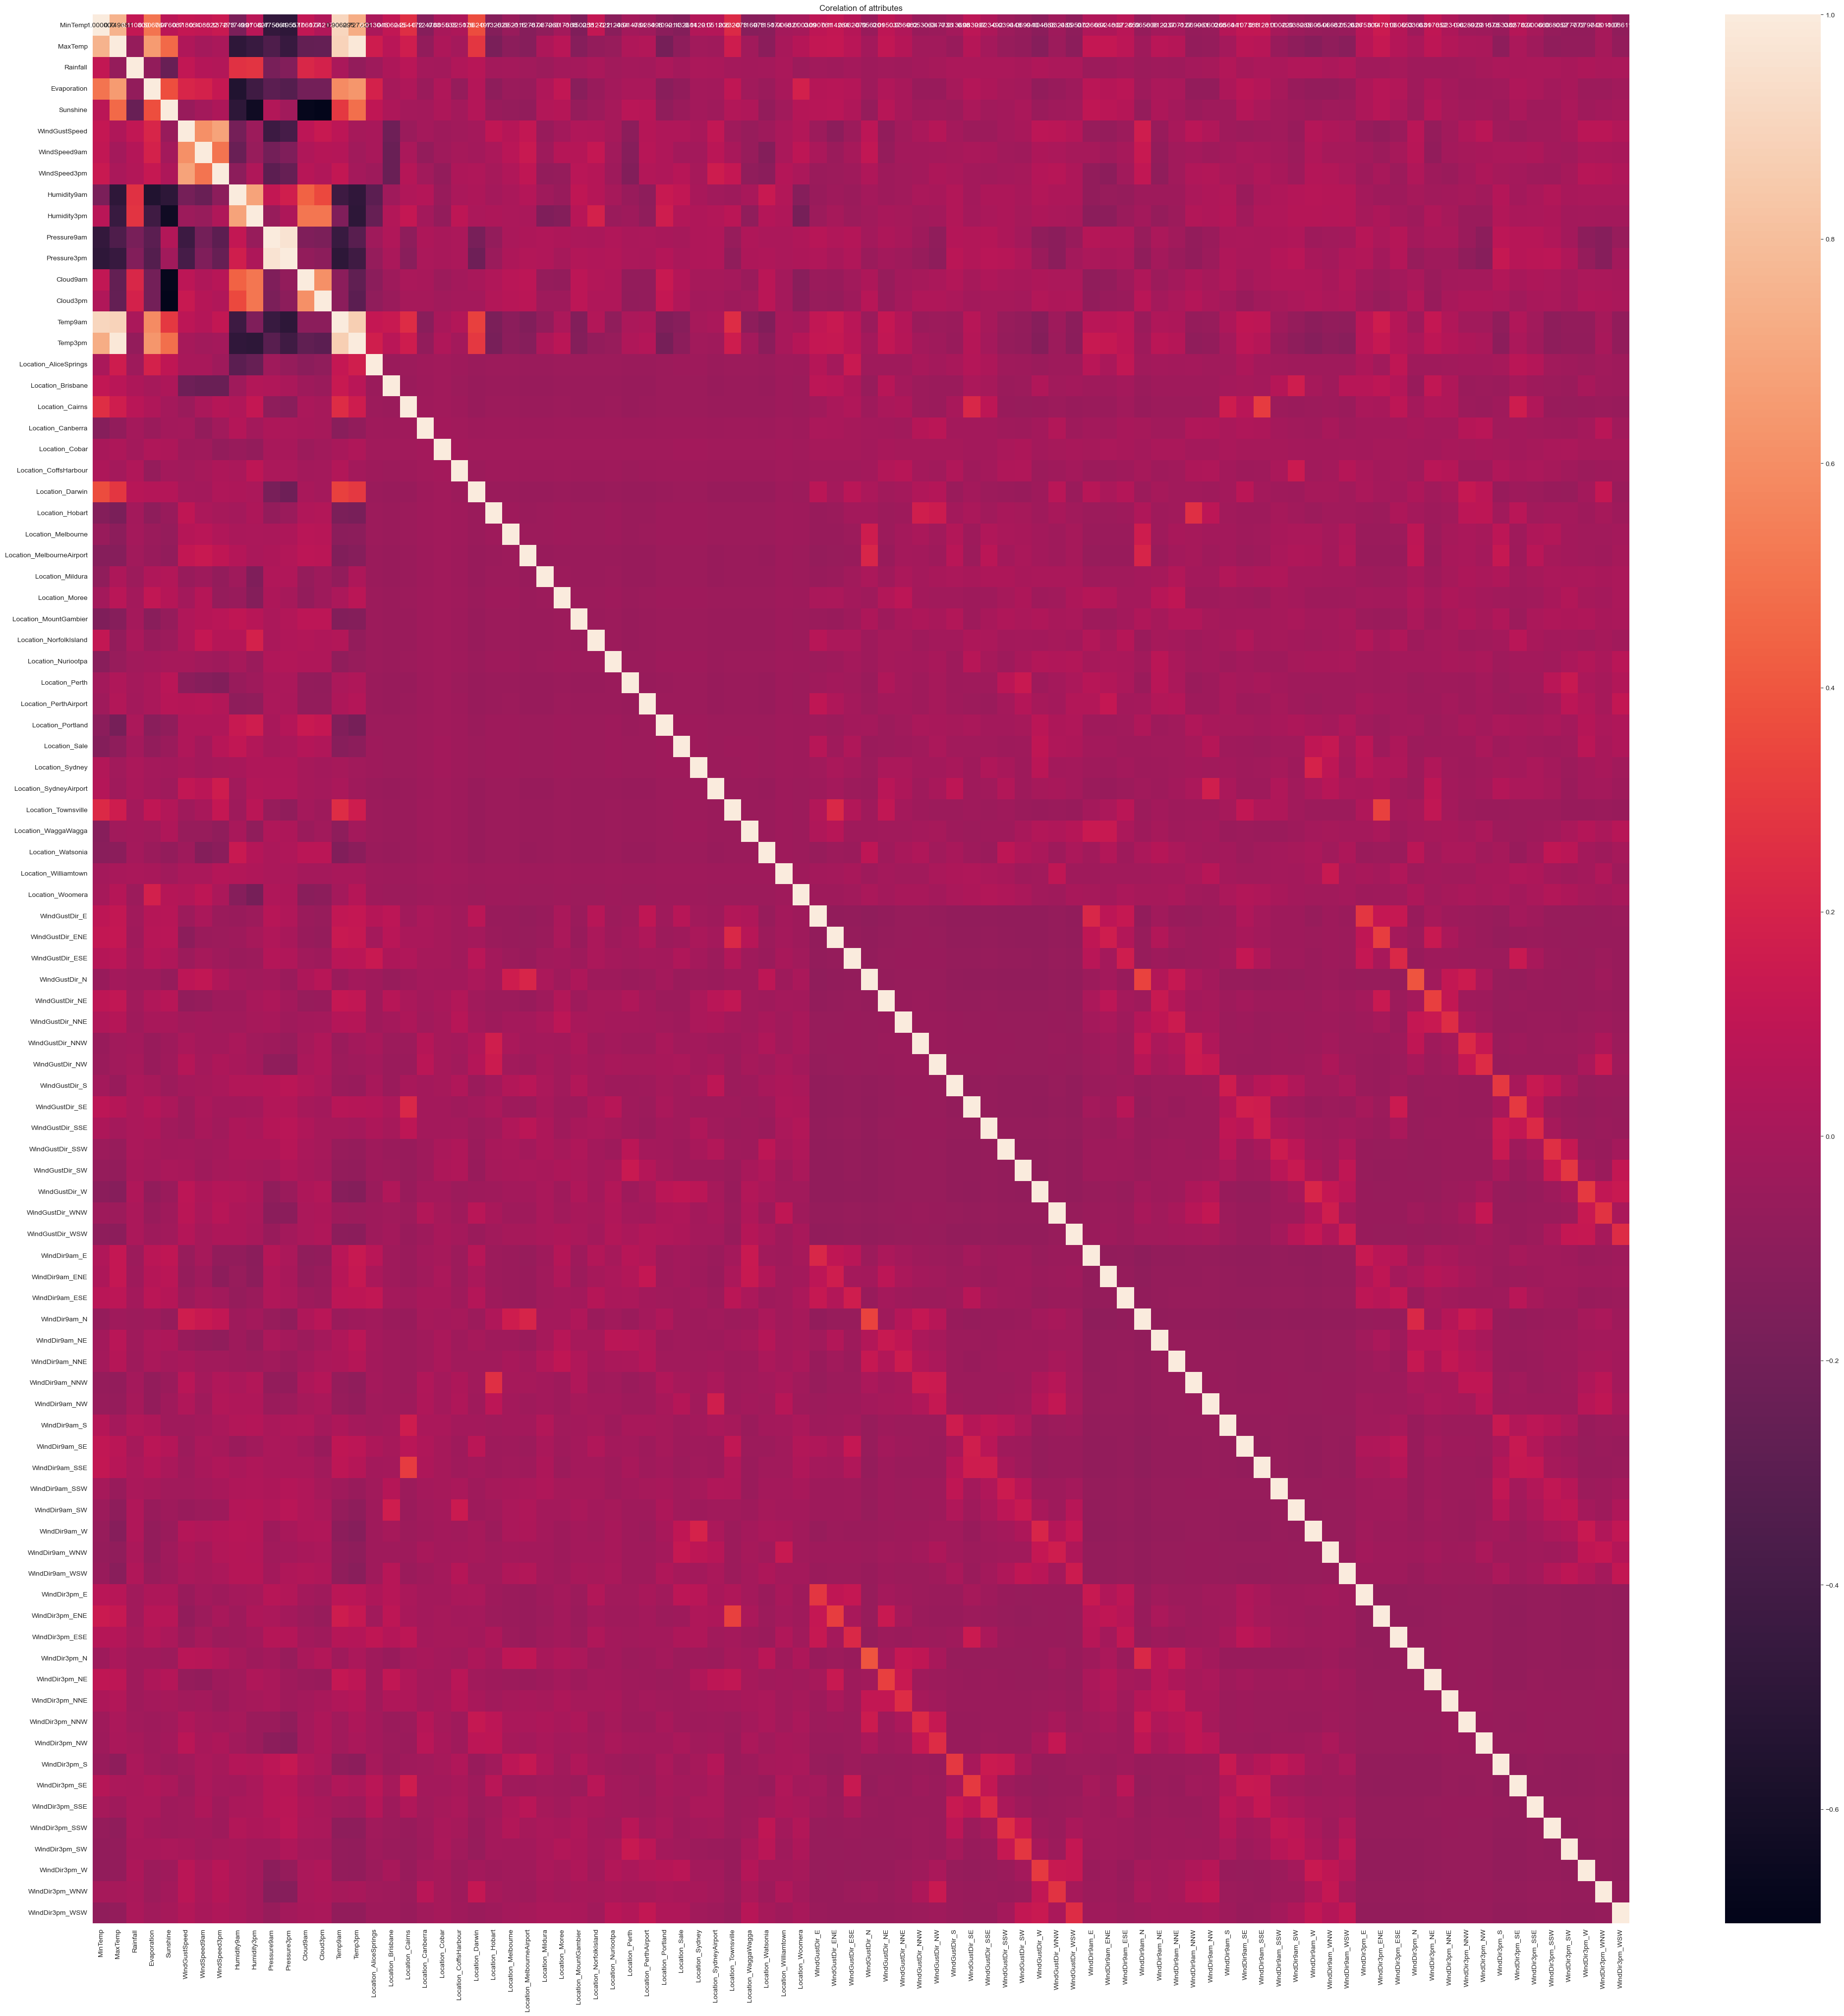

In [110]:
plt.subplots(figsize = (50,50))
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt="f").set_title("Corelation of attributes")
plt.show()

In [111]:
X = data.drop(['Date', 'RainTomorrow'], axis=1)
y = data['RainTomorrow']

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [120]:
knn = KNeighborsClassifier(n_neighbors = 3)
X_test_array = np.ascontiguousarray(X_test)
X_train_array = np.ascontiguousarray(X_train)
knn.fit(X_train_array, y_train)
Y_pred = knn.predict(X_test_array)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train_array, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[12092  1066]
 [ 1742  2026]]
accuracy_KNN : 0.834
precision_KNN : 0.834
recall_KNN: 0.834
f1-score_KNN : 0.834


In [121]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Logistic Regression\n', cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[12437   721]
 [ 1666  2102]]
accuracy_Logistic Regression : 0.859
precision_Logistic Regression : 0.859
recall_Logistic Regression: 0.859
f1-score_Logistic Regression : 0.859


D:\Anaconda\envs\AIF\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='micro')
recall = recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test,Y_pred, average='micro')
print('Confusion matrix for DecisionTree\n', cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[11453  1705]
 [ 1649  2119]]
accuracy_DecisionTree: 0.802
precision_DecisionTree: 0.802
recall_DecisionTree: 0.802
f1-score_DecisionTree : 0.802


In [123]:
results = pd.DataFrame({
    'Model': [ 'KNN',
              'Logistic Regression',
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_log,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_dt,
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

Model   Score  Accuracy_score
0  Logistic Regression   85.51           85.90
1                  KNN   90.20           83.41
2        Decision Tree  100.00           80.18